In [ ]:
#Mi primer hit y

In [ ]:
# Ensure numpy is up-to-date before installing pmdarima
!pip install --upgrade numpy
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [ ]:
import pandas as pd
from IPython.display import display

# --- Configuración ---
# Define la ruta del archivo Excel
file_path = '/content/data.xlsx'
# Nombre esperado de la columna de fecha en el archivo original
# BASADO EN LA SALIDA ANTERIOR, ESTE ES EL NOMBRE SIN PROCESAR
raw_date_column_name = 'Unnamed: 0'
# Nombre que le daremos a la columna/índice de fecha procesado
processed_date_column_name = 'Fecha'

print(f"--- Intentando cargar y preparar el archivo: {file_path} ---")

# --- Cargar los datos ---
try:
    df = pd.read_excel(file_path)
    print("Archivo cargado exitosamente en 'df'.")
    print(f"Filas y columnas iniciales: {df.shape}")
    print("Columnas: ", df.columns.tolist())
    display(df.head()) # Mostrar las primeras filas para verificar

except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encontró.")
    df = None # Aseguramos que df es None si hay error
except Exception as e:
    print(f"Error al cargar el archivo Excel: {str(e)}")
    df = None # Aseguramos que df es None si hay error


# --- Preparar los datos (si la carga fue exitosa) ---
if df is not None:
    print("\n--- Iniciando preparación del DataFrame 'df' ---")

    # 1. Renombrar la columna que contiene las fechas
    if raw_date_column_name in df.columns:
        print(f"Renombrando columna '{raw_date_column_name}' a '{processed_date_column_name}'...")
        df.rename(columns={raw_date_column_name: processed_date_column_name}, inplace=True)
        print("Columna renombrada.")
    else:
        print(f"Advertencia: La columna de fecha '{raw_date_column_name}' no se encuentra en el DataFrame.")
        print("No se puede renombrar ni establecer el índice de fecha automáticamente.")
        # Si no se encuentra la columna de fecha, es posible que el archivo no tenga el formato esperado
        # o que la columna ya esté renombrada. Verifica df.columns.
        print("Columnas actuales: ", df.columns.tolist())
        # En un caso real, podrías detener el proceso aquí o manejar la ausencia de la columna de fecha.
        # Para este ejemplo, continuaremos pero con una advertencia.


    # 2. Convertir la columna de fecha a formato datetime y establecer como índice (si la columna existe)
    if processed_date_column_name in df.columns:
        print(f"Convirtiendo columna '{processed_date_column_name}' a formato datetime y estableciendo como índice...")
        try:
            # Los valores como '2009M01' requieren un formato específico para pd.to_datetime
            # Usaremos format='%YM%m' para parsearlos correctamente.
            # errors='coerce' convertirá los valores que no pueda parsear a NaT (Not a Time).
            df[processed_date_column_name] = pd.to_datetime(df[processed_date_column_name], format='%YM%m', errors='coerce')

            # Eliminar filas donde la conversión de fecha falló (si hay NaT)
            initial_rows_before_date_nan = df.shape[0]
            df.dropna(subset=[processed_date_column_name], inplace=True)
            rows_after_date_nan = df.shape[0]
            if initial_rows_before_date_nan > rows_after_date_nan:
                print(f"Advertencia: Se eliminaron {initial_rows_before_date_nan - rows_after_date_nan} filas con fechas inválidas (NaT) después de la conversión.")

            # Establecer la columna de fecha convertida como índice
            df.set_index(processed_date_column_name, inplace=True)
            print("Columna establecida como índice.")

            # Opcional: Ordenar el DataFrame por índice (fecha) para asegurar orden cronológico
            df.sort_index(inplace=True)
            print("DataFrame ordenado por fecha.")

            # Verificar el tipo de índice final
            print(f"Tipo final del índice de 'df': {type(df.index)}")
            if isinstance(df.index, pd.DatetimeIndex):
                print("El índice de 'df' es ahora DatetimeIndex.")
            else:
                 print("Error: El índice de 'df' NO PUDO ser establecido como DatetimeIndex.")


        except Exception as e:
            print(f"Error al procesar o convertir la columna de fecha '{processed_date_column_name}': {str(e)}")
            # Si hay un error crítico con la fecha, podría invalidar el DataFrame para series de tiempo
            # Considera establecer df = None si no se puede arreglar el índice de fecha.

    else:
         print("Advertencia: No se pudo establecer el índice de fecha porque la columna esperada no existe.")


    # Opcional: Eliminar NaNs/ceros en otras columnas de datos si es necesario
    # Basado en tus celdas anteriores, ya tienes una celda para esto.
    # Puedes ejecutar esa celda por separado DESPUÉS de esta, o integrar aquí la lógica si prefieres.
    # Por ahora, asumimos que ejecutarás la celda de limpieza después si es necesario.
    print("La limpieza adicional de NaNs/ceros debe ejecutarse en una celda separada si es necesario.")


    print("\n--- Preparación del DataFrame 'df' completada ---")
    print("Información final del DataFrame 'df':")
    df.info()
    print("\nPrimeras 5 filas del DataFrame 'df':")
    display(df.head())
    print("\nÚltimas 5 filas del DataFrame 'df':")
    display(df.tail())

else:
    print("\nNo se pudo cargar el archivo. 'df' es None.")

# Ahora, 'df' debería contener los datos cargados y, si todo fue bien, tener un índice DatetimeIndex.
# La variable 'datos' se puede crear como una copia de 'df' en una celda posterior si es necesario.

--- Intentando cargar y preparar el archivo: /content/data.xlsx ---
Archivo cargado exitosamente en 'df'.
Filas y columnas iniciales: (204, 6)
Columnas:  ['Fecha', 'SOYBEANS', 'STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']


Fecha  SOYBEANS  STOCK  F_SOYMEALFIN  BASIS  SOYOIL
0  2009M01    364.59  0.180         374.0 -16.84  771.62
1  2009M02    342.47  0.180         351.0 -15.33  773.82
2  2009M03    330.75  0.183         334.0 -14.95  776.03
3  2009M04    368.83  0.185         325.0 -13.86  778.23
4  2009M05    409.30  0.185         377.0 -15.25  780.44


--- Iniciando preparación del DataFrame 'df' ---
Advertencia: La columna de fecha 'Unnamed: 0' no se encuentra en el DataFrame.
No se puede renombrar ni establecer el índice de fecha automáticamente.
Columnas actuales:  ['Fecha', 'SOYBEANS', 'STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
Convirtiendo columna 'Fecha' a formato datetime y estableciendo como índice...
Columna establecida como índice.
DataFrame ordenado por fecha.
Tipo final del índice de 'df': <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
El índice de 'df' es ahora DatetimeIndex.
La limpieza adicional de NaNs/ceros debe ejecutarse en una celda separada si es necesario.

--- Preparación del DataFrame 'df' completada ---
Información final del DataFrame 'df':
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2009-01-01 to 2025-12-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SOYBEANS      197 non-null    float64
 1   STOCK  

SOYBEANS  STOCK  F_SOYMEALFIN  BASIS  SOYOIL
Fecha                                                   
2009-01-01    364.59  0.180         374.0 -16.84  771.62
2009-02-01    342.47  0.180         351.0 -15.33  773.82
2009-03-01    330.75  0.183         334.0 -14.95  776.03
2009-04-01    368.83  0.185         325.0 -13.86  778.23
2009-05-01    409.30  0.185         377.0 -15.25  780.44


Últimas 5 filas del DataFrame 'df':


SOYBEANS  STOCK  F_SOYMEALFIN  BASIS  SOYOIL
Fecha                                                   
2025-08-01       NaN    NaN    338.586116    NaN     NaN
2025-09-01       NaN    NaN    343.412798    NaN     NaN
2025-10-01       NaN    NaN    346.513860    NaN     NaN
2025-11-01       NaN    NaN    349.818422    NaN     NaN
2025-12-01       NaN    NaN    347.326662    NaN     NaN

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

# Asegúrate de que el DataFrame 'df' ya ha sido cargado en una celda anterior
# (la que carga data.xlsx y establece el índice de fecha).

print("--- Iniciando proceso de eliminación de datos faltantes (NaN) ---")

if 'df' not in locals() or df is None:
    print("Error: El DataFrame 'df' NO ESTÁ CARGADO. Por favor, carga los datos primero.")
else:
    initial_rows = df.shape[0]
    print(f"Filas iniciales del DataFrame: {initial_rows}")

    # 1. Identificar las columnas de datos para limpiar (excluyendo el índice)
    # Asumimos que todas las columnas que NO son el índice son columnas de datos.
    # Esto es seguro si tu índice es de fecha y no una columna de datos con un nombre.
    data_columns = [col for col in df.columns if col != df.index.name]

    # Opcional: Si solo quieres limpiar columnas numéricas, puedes usar:
    # data_columns = df.select_dtypes(include=np.number).columns.tolist()
    # Si tu índice es numérico y NO quieres incluirlo aquí, necesitarías una lógica más fina.
    # Pero asumiendo que el índice es de fecha (DatetimeIndex), la primera opción es adecuada.


    if not data_columns:
        print("Advertencia: No se encontraron columnas de datos para limpiar (aparte del índice). No se eliminarán NaNs.")
    else:
        print(f"\nColumnas identificadas para eliminar NaNs: {data_columns}")

        # 2. Eliminar filas con NaN en las columnas de datos especificadas
        # El método dropna(subset=...) elimina filas que tienen NaN en CUALQUIERA de las columnas listadas en subset.
        rows_before_nan_drop = df.shape[0]
        df_cleaned = df.dropna(subset=data_columns).copy() # Usamos .copy() para evitar SettingWithCopyWarning
        rows_after_nan_drop = df_cleaned.shape[0]

        print(f"Filas después de eliminar NaNs en columnas de datos: {rows_after_nan_drop}")
        if initial_rows > rows_after_nan_drop:
             print(f"Se eliminaron {initial_rows - rows_after_nan_drop} filas con NaNs en las columnas de datos.")
        else:
             print("No se encontraron filas con NaNs en las columnas de datos.")


        # 3. Actualizar el DataFrame original 'df' con el DataFrame limpiado
        df = df_cleaned
        print(f"\nDataFrame 'df' final después de la eliminación de NaNs: {df.shape[0]} filas.")

        print("\nInformación del DataFrame 'df' limpiado:")
        df.info()
        print("\nPrimeras 5 filas del DataFrame 'df' limpiado:")
        display(df.head())
        print("\nÚltimas 5 filas del DataFrame 'df' limpiado:")
        display(df.tail())

print("\n--- Proceso de eliminación de datos faltantes completado ---")

# Ahora, el DataFrame 'df' contiene los datos originales (cargados con índice de fecha)
# pero sin filas que tuvieran valores faltantes en las columnas de datos.

--- Iniciando proceso de eliminación de datos faltantes (NaN) ---
Filas iniciales del DataFrame: 204

Columnas identificadas para eliminar NaNs: ['SOYBEANS', 'STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
Filas después de eliminar NaNs en columnas de datos: 197
Se eliminaron 7 filas con NaNs en las columnas de datos.

DataFrame 'df' final después de la eliminación de NaNs: 197 filas.

Información del DataFrame 'df' limpiado:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2009-01-01 to 2025-05-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SOYBEANS      197 non-null    float64
 1   STOCK         197 non-null    float64
 2   F_SOYMEALFIN  197 non-null    float64
 3   BASIS         197 non-null    float64
 4   SOYOIL        197 non-null    float64
dtypes: float64(5)
memory usage: 9.2 KB

Primeras 5 filas del DataFrame 'df' limpiado:


SOYBEANS  STOCK  F_SOYMEALFIN  BASIS  SOYOIL
Fecha                                                   
2009-01-01    364.59  0.180         374.0 -16.84  771.62
2009-02-01    342.47  0.180         351.0 -15.33  773.82
2009-03-01    330.75  0.183         334.0 -14.95  776.03
2009-04-01    368.83  0.185         325.0 -13.86  778.23
2009-05-01    409.30  0.185         377.0 -15.25  780.44


Últimas 5 filas del DataFrame 'df' limpiado:


SOYBEANS  STOCK  F_SOYMEALFIN  BASIS   SOYOIL
Fecha                                                    
2025-01-01    379.93  0.114    332.941056  -2.06  1285.29
2025-02-01    385.63  0.122    328.246170  -1.76  1291.91
2025-03-01    367.16  0.117    325.916619  -2.43  1296.32
2025-04-01    380.94  0.115    321.368751  -3.24  1302.93
2025-05-01    385.81  0.120    321.271442  -2.66  1307.34


--- Proceso de eliminación de datos faltantes completado ---


In [ ]:
import pandas as pd
from IPython.display import display

print("--- Mostrando información del DataFrame 'df' limpio ---")

if 'df' not in locals() or df is None:
    print("Error: El DataFrame 'df' no está cargado o está vacío.")
    print("Asegúrate de ejecutar las celdas de carga y limpieza primero.")
else:
    print(f"Dimensiones del DataFrame limpio: {df.shape}")
    print("\nInformación general del DataFrame limpio:")
    df.info()

    print("\nPrimeras 5 filas del DataFrame limpio:")
    display(df.head())

    print("\nÚltimas 5 filas del DataFrame limpio:")
    display(df.tail())

    # Opcional: Para mostrar todo el DataFrame (puede ser muy grande)
    # print("\nDataFrame completo (puede ser muy grande):")
    # display(df)


print("\n--- Fin de la muestra del DataFrame limpio ---")

--- Mostrando información del DataFrame 'df' limpio ---
Dimensiones del DataFrame limpio: (197, 5)

Información general del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2009-01-01 to 2025-05-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SOYBEANS      197 non-null    float64
 1   STOCK         197 non-null    float64
 2   F_SOYMEALFIN  197 non-null    float64
 3   BASIS         197 non-null    float64
 4   SOYOIL        197 non-null    float64
dtypes: float64(5)
memory usage: 9.2 KB

Primeras 5 filas del DataFrame limpio:


SOYBEANS  STOCK  F_SOYMEALFIN  BASIS  SOYOIL
Fecha                                                   
2009-01-01    364.59  0.180         374.0 -16.84  771.62
2009-02-01    342.47  0.180         351.0 -15.33  773.82
2009-03-01    330.75  0.183         334.0 -14.95  776.03
2009-04-01    368.83  0.185         325.0 -13.86  778.23
2009-05-01    409.30  0.185         377.0 -15.25  780.44


Últimas 5 filas del DataFrame limpio:


SOYBEANS  STOCK  F_SOYMEALFIN  BASIS   SOYOIL
Fecha                                                    
2025-01-01    379.93  0.114    332.941056  -2.06  1285.29
2025-02-01    385.63  0.122    328.246170  -1.76  1291.91
2025-03-01    367.16  0.117    325.916619  -2.43  1296.32
2025-04-01    380.94  0.115    321.368751  -3.24  1302.93
2025-05-01    385.81  0.120    321.271442  -2.66  1307.34


--- Fin de la muestra del DataFrame limpio ---


In [ ]:
# Create a new variable 'datos' that references the same DataFrame object as 'df'
# If you want a true independent copy, use df.copy()
datos = df

# Now you can work with the 'datos' variable, which holds your cleaned DataFrame
print("Nombre de la variable del DataFrame limpio:", 'datos')

# You can also check the variable name in the current scope (though this is more for introspection)
# Note: This will not give you the *variable name itself* in a simple string,
# but confirms 'datos' exists and points to the DataFrame.
if 'datos' in locals() and isinstance(datos, pd.DataFrame):
    print("La variable 'datos' existe y es un DataFrame.")

Nombre de la variable del DataFrame limpio: datos
La variable 'datos' existe y es un DataFrame.


In [ ]:
# Asumiendo que ya has ejecutado: datos = df
# Ahora puedes imprimir o mostrar el contenido de 'datos'

print("--- Contenido del DataFrame 'datos' ---")

# Opción 1: Usar print() (puede ser menos legible para DataFrames grandes)
# print(datos)

# Opción 2: Usar display() (ideal para IPython/Jupyter, más legible)
from IPython.display import display # Asegurarse de que display está importado
display(datos)

print("\n--- Fin del contenido del DataFrame 'datos' ---")

--- Contenido del DataFrame 'datos' ---


SOYBEANS  STOCK  F_SOYMEALFIN  BASIS   SOYOIL
Fecha                                                    
2009-01-01    364.59  0.180    374.000000 -16.84   771.62
2009-02-01    342.47  0.180    351.000000 -15.33   773.82
2009-03-01    330.75  0.183    334.000000 -14.95   776.03
2009-04-01    368.83  0.185    325.000000 -13.86   778.23
2009-05-01    409.30  0.185    377.000000 -15.25   780.44
...              ...    ...           ...    ...      ...
2025-01-01    379.93  0.114    332.941056  -2.06  1285.29
2025-02-01    385.63  0.122    328.246170  -1.76  1291.91
2025-03-01    367.16  0.117    325.916619  -2.43  1296.32
2025-04-01    380.94  0.115    321.368751  -3.24  1302.93
2025-05-01    385.81  0.120    321.271442  -2.66  1307.34

[197 rows x 5 columns]


--- Fin del contenido del DataFrame 'datos' ---


SOYBEANS        7
STOCK           6
F_SOYMEALFIN    0
BASIS           6
SOYOIL          6
dtype: int64


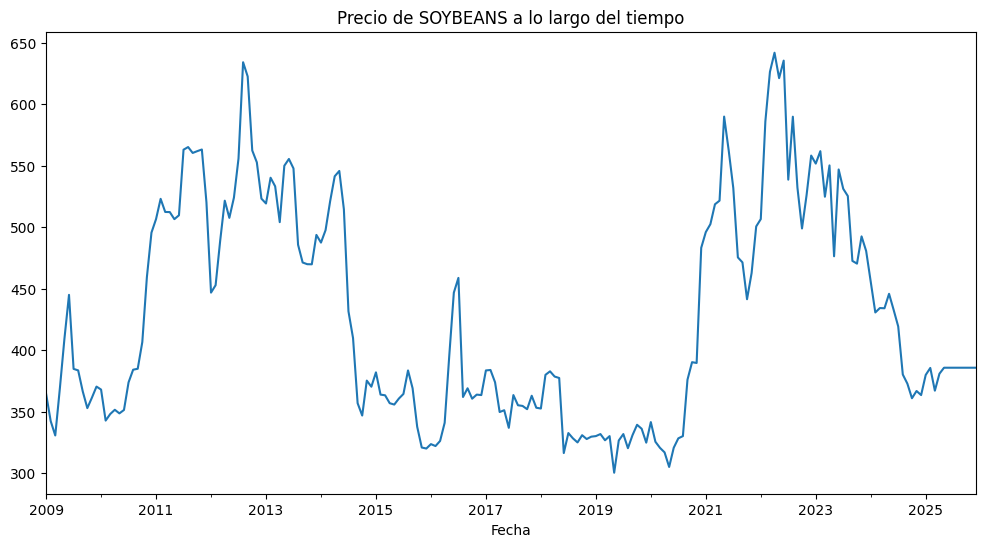

In [ ]:
# Cargar los datos
data = pd.read_excel('data.xlsx', sheet_name='Hoja1')
data['Fecha'] = pd.to_datetime(data['Fecha'].str.replace('M', '-'), format='%Y-%m')
data.set_index('Fecha', inplace=True)

# Verificar valores faltantes
print(data.isnull().sum())

# Rellenar valores faltantes si es necesario (aquí usamos interpolación lineal)
data['SOYBEANS'] = data['SOYBEANS'].interpolate(method='linear')

# Visualización inicial
data['SOYBEANS'].plot(figsize=(12,6), title='Precio de SOYBEANS a lo largo del tiempo')
plt.show()

In [ ]:
# Importar las funciones de statsmodels para los tests de estacionariedad
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
# Prueba de Dickey-Fuller aumentada
def test_stationarity(timeseries):
    print('Resultados de Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    print('\nResultados de KPSS:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

test_stationarity(data['SOYBEANS'])

Resultados de Dickey-Fuller:
Test Statistic                  -2.331085
p-value                          0.162138
#Lags Used                       0.000000
Number of Observations Used    203.000000
Critical Value (1%)             -3.462980
Critical Value (5%)             -2.875885
Critical Value (10%)            -2.574416
dtype: float64

Resultados de KPSS:
Test Statistic           0.169057
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Realizando pruebas de estacionariedad en SOYBEANS_diff...
Resultados de Dickey-Fuller:
Test Statistic                -1.304816e+01
p-value                        2.169845e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.950000e+02
Critical Value (1%)           -3.464337e+00
Critical Value (5%)           -2.876479e+00
Critical Value (10%)          -2.574733e+00
dtype: float64

Resultados de KPSS:
Test Statistic           0.062101
p-value                  0.100000
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

Generando gráficas ACF y PACF...


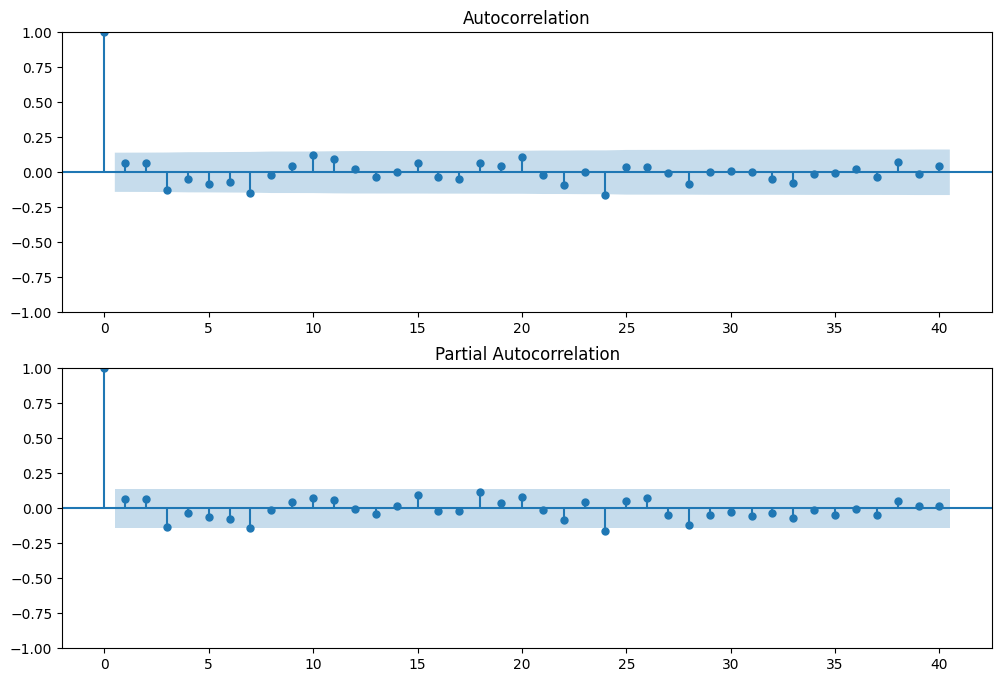

In [ ]:
# Primera diferencia usando el DataFrame 'df' que ya fue cargado y limpiado
# Asegúrate de que 'df' existe y contiene la columna 'SOYBEANS'
import matplotlib.pyplot as plt # Ensure matplotlib is imported here as it is used for plotting
import numpy as np # Import numpy for inf/nan checks

if 'df' in locals() and isinstance(df, pd.DataFrame) and 'SOYBEANS' in df.columns:
    # Calculate the first difference
    df['SOYBEANS_diff'] = df['SOYBEANS'].diff()

    # Explicitly drop any NaN or infinite values from the differenced series
    # This is the crucial step to prevent the MissingDataError
    soybeans_diff_cleaned = df['SOYBEANS_diff'].dropna().replace([np.inf, -np.inf], np.nan).dropna()

    # Ensure that the cleaned differenced series is not empty after dropping non-finite values
    if not soybeans_diff_cleaned.empty:
        # Asegúrate de que la función test_stationarity ha sido definida (ejecuta la celda anterior)
        if 'test_stationarity' in globals() and callable(test_stationarity):
            print("Realizando pruebas de estacionariedad en SOYBEANS_diff...")
            # Pass the cleaned differenced series to the stationarity test
            test_stationarity(soybeans_diff_cleaned)

            # Gráficas ACF y PACF
            from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

            print("\nGenerando gráficas ACF y PACF...")
            fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
            # Use the cleaned differenced series for plotting as well
            plot_acf(soybeans_diff_cleaned, lags=40, ax=ax1)
            plot_pacf(soybeans_diff_cleaned, lags=40, ax=ax2)
            plt.show()
        else:
            print("Error: La función 'test_stationarity' no está definida. Ejecuta la celda que la define.")
    else:
        print("Error: La serie diferenciada de 'SOYBEANS' está vacía o contiene solo valores no finitos después de la limpieza.")
        print("Esto puede indicar problemas con los datos originales o un exceso de NaNs/Infs.")


else:
    print("Error: El DataFrame 'df' no está cargado, no es un DataFrame válido o no contiene la columna 'SOYBEANS'.")
    print("Asegúrate de ejecutar las celdas anteriores para cargar y preparar el DataFrame correctamente.")

In [ ]:
# Ensure numpy is up-to-date before installing pmdarima
print("--- Reinstalando numpy y pmdarima para resolver posibles conflictos ---")

# Desinstalar pmdarima primero para evitar problemas de dependencia circular
!pip uninstall pmdarima -y

# Desinstalar numpy
!pip uninstall numpy -y

# Reinstalar numpy (la última versión compatible)
!pip install numpy

# Reinstalar pmdarima, que ahora usará la versión recién instalada de numpy
!pip install pmdarima

print("--- Reinstalación completada. Intentando importar pmdarima ---")

# Intentar importar para verificar si el error se ha resuelto
try:
    from pmdarima.arima import auto_arima
    print("Importación de pmdarima.arima.auto_arima exitosa.")
except ImportError as e:
    print(f"Error al importar pmdarima después de la reinstalación: {str(e)}")
    print("Por favor, verifica los mensajes de instalación anteriores para ver si hubo errores.")
except Exception as e:
     print(f"Ocurrió un error inesperado durante la importación: {str(e)}")

--- Reinstalando numpy y pmdarima para resolver posibles conflictos ---
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: numpy 2.3.1
Uninstalling numpy-2.3.1:
  Successfully uninstalled numpy-2.3.1
  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.37.1 requires numpy<2.3,>=1.21, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.


  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
--- Reinstalación completada. Intentando importar pmdarima ---
Ocurrió un error inesperado durante la importación: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


Evaluando modelos SARIMAX: 100%|██████████| 50/50 [01:16<00:00,  1.53s/it]



MEJOR MODELO ENCONTRADO: SARIMAX
Parámetros (order, seasonal_order if applicable):
AIC: 1662.58

                                      SARIMAX Results                                       
Dep. Variable:                             SOYBEANS   No. Observations:                  198
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -821.292
Date:                              Mon, 23 Jun 2025   AIC                           1662.584
Time:                                      19:09:42   BIC                           1693.942
Sample:                                  01-01-2009   HQIC                          1675.309
                                       - 06-01-2025                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

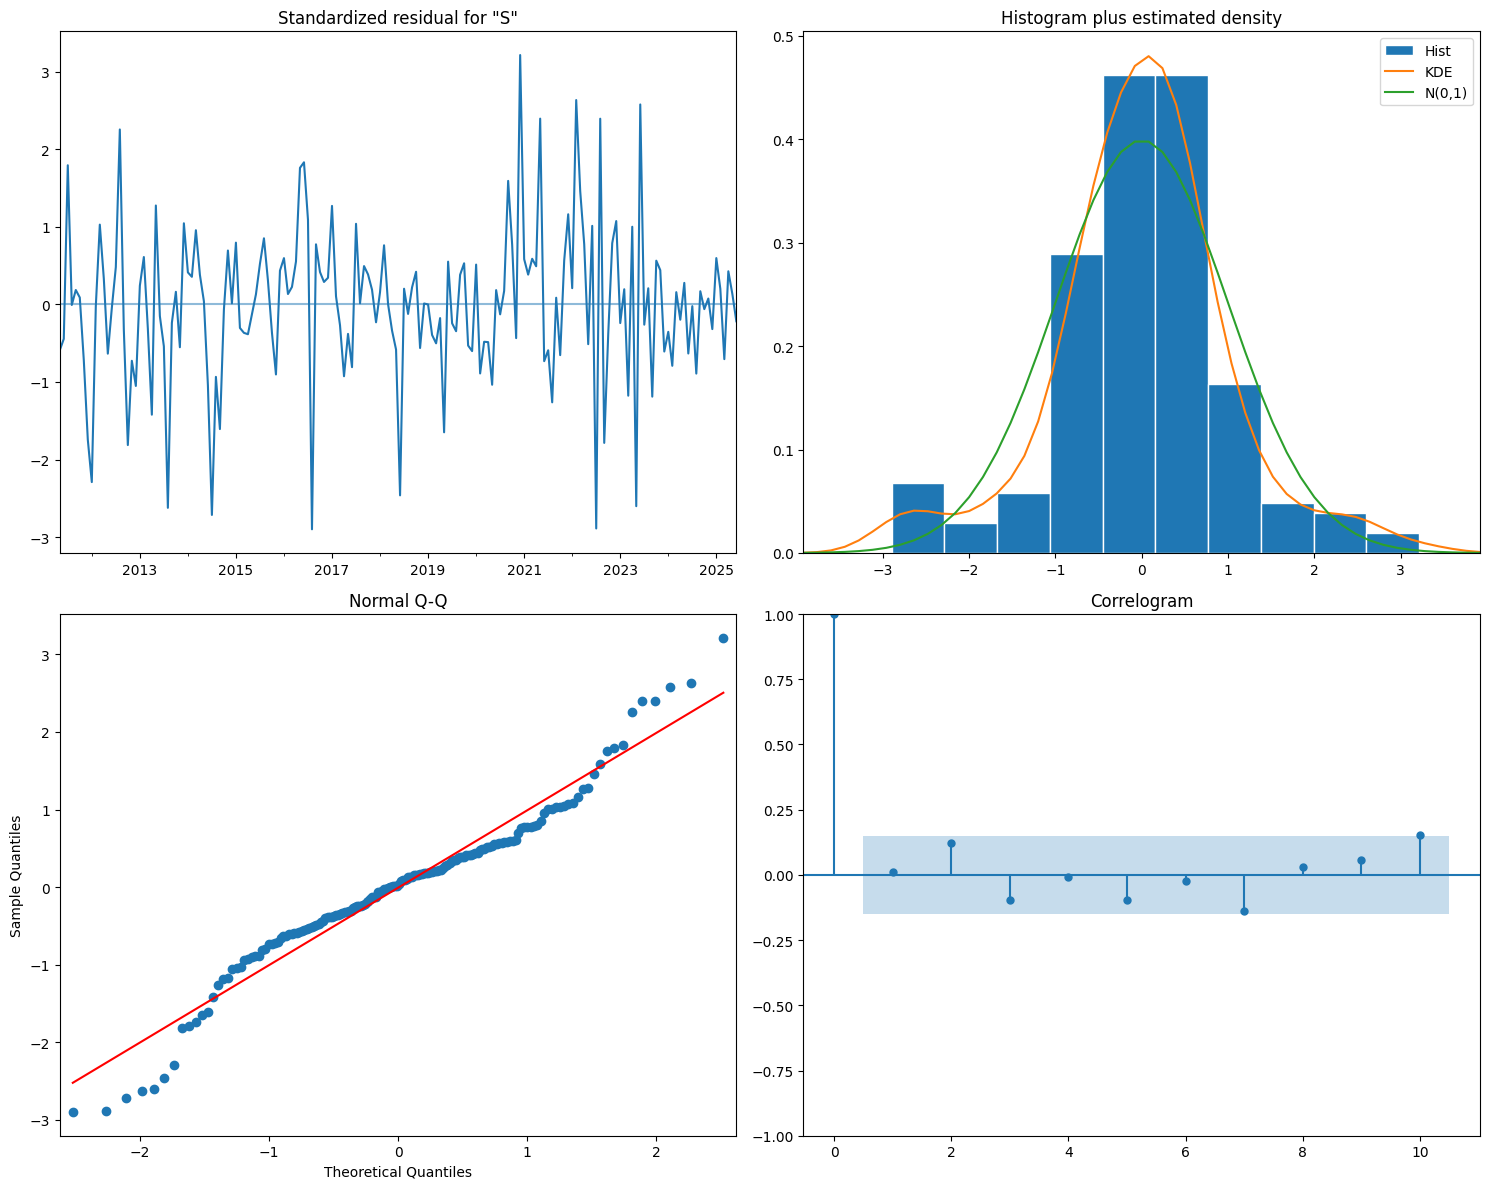


Top 5 modelos ARIMA:
1. Parámetros: (0, 1, 0) - AIC: 1933.92
2. Parámetros: (1, 1, 0) - AIC: 1935.09
3. Parámetros: (0, 1, 1) - AIC: 1935.20
4. Parámetros: (0, 1, 2) - AIC: 1935.67
5. Parámetros: (1, 1, 2) - AIC: 1936.04

Top 5 modelos SARIMA:
1. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1710.51
2. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1711.32
3. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1713.28
4. Parámetros: (2, 0, 0, 1, 1, 1, 12) - AIC: 1724.45
5. Parámetros: (1, 1, 0, 0, 1, 1, 12) - AIC: 1726.86

Top 5 modelos SARIMAX:
1. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1662.58
2. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1663.63
3. Parámetros: (1, 1, 0, 0, 1, 1, 12) - AIC: 1679.20
4. Parámetros: (0, 1, 0, 1, 1, 1, 12) - AIC: 1679.48
5. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1684.10


In [ ]:
# Cargar datos
data = pd.read_excel('data.xlsx', sheet_name='Hoja1')
data['Fecha'] = pd.to_datetime(data['Fecha'].str.replace('M', '-'), format='%Y-%m')
data.set_index('Fecha', inplace=True)
data['SOYBEANS'] = data['SOYBEANS'].interpolate(method='linear')

# Configuración de parámetros para generar 100 modelos
p_values = range(0, 3)  # AR order
d_values = range(0, 2)  # Differencing
q_values = range(0, 3)  # MA order
P_values = range(0, 2)  # Seasonal AR
D_values = range(0, 2)  # Seasonal differencing
Q_values = range(0, 2)  # Seasonal MA
s_values = [12]         # Seasonal period

# Generar todas las combinaciones posibles
arima_combinations = list(product(p_values, d_values, q_values))
sarima_combinations = list(product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

# Seleccionar aleatoriamente 100 combinaciones únicas
np.random.seed(42)

# Check the number of available ARIMA combinations
num_arima_combinations = len(arima_combinations)
# Sample a number less than or equal to the available combinations
# If you intended to evaluate all ARIMA combinations, sample all of them.
# If you intended to sample 50 and expect more combinations, increase the ranges above.
# For this fix, we sample up to the available number of combinations.
num_arima_samples = min(50, num_arima_combinations) # Sample at most 50, but not more than available

selected_arima = [arima_combinations[i] for i in np.random.choice(num_arima_combinations, num_arima_samples, replace=False)]

# For SARIMA, check available combinations as well
num_sarima_combinations = len(sarima_combinations)
# Sample a number less than or equal to the available combinations
num_sarima_samples = min(50, num_sarima_combinations) # Sample at most 50, but not more than available

selected_sarima = [sarima_combinations[i] for i in np.random.choice(num_sarima_combinations, num_sarima_samples, replace=False)]


# Función para evaluar modelos
def evaluate_models(series, models_list, model_type='arima'):
    best_model = None
    best_aic = np.inf
    results = []

    # Ensure exog_vars are defined outside the loop if needed for sarimax
    exog_vars = None
    if model_type == 'sarimax':
         # Drop NaNs from exogenous variables as well
         # Only select the exogenous columns *if* they exist in the DataFrame
         exog_cols = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
         # Filter to only include columns actually present in data
         existing_exog_cols = [col for col in exog_cols if col in data.columns]
         if not existing_exog_cols:
              print(f"Warning: No exogenous variables found in the DataFrame for {model_type}.")
              # Consider skipping SARIMAX evaluation or handling this case
              return None, None, np.inf, [] # Return empty results if no exog vars

         exog_vars = data[existing_exog_cols].dropna()

         # Align the time series index with the exogenous variables index after dropping NaNs
         # This is crucial for SARIMAX
         # Find the common index between the series and exog_vars
         common_index = series.index.intersection(exog_vars.index)
         series = series[common_index]
         exog_vars = exog_vars.loc[common_index]

         if series.empty or exog_vars.empty:
              print(f"Warning: Empty series or exogenous variables after aligning index for {model_type}.")
              return None, None, np.inf, []


    for params in tqdm(models_list, desc=f"Evaluando modelos {model_type.upper()}"):
        try:
            if model_type == 'arima':
                p, d, q = params
                # Ensure the series used for ARIMA is the one without NaNs
                model = ARIMA(series, order=(p, d, q)).fit()
            elif model_type == 'sarima':
                p, d, q, P, D, Q, s = params
                model = SARIMAX(series,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)
            elif model_type == 'sarimax':
                p, d, q, P, D, Q, s = params
                # Use the aligned series and exog_vars
                model = SARIMAX(series,
                              exog=exog_vars,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)

            aic = model.aic
            results.append((params, aic))

            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_params = params
        except Exception as e:
            # print(f"Error fitting model {params} ({model_type}): {e}") # Optional: Uncomment for debugging specific model errors
            continue

    return best_model, best_params, best_aic, results

# Use the series without NaNs for model fitting
series_to_fit = data['SOYBEANS'].dropna()

# Evaluar modelos ARIMA
best_arima, arima_params, arima_aic, arima_results = evaluate_models(
    series_to_fit, selected_arima, 'arima')

# Evaluar modelos SARIMA
best_sarima, sarima_params, sarima_aic, sarima_results = evaluate_models(
    series_to_fit, selected_sarima, 'sarima')

# Evaluar modelos SARIMAX (with variables exógenas)
# The evaluate_models function now handles exog_vars and index alignment
best_sarimax, sarimax_params, sarimax_aic, sarimax_results = evaluate_models(
    series_to_fit, selected_sarima, 'sarimax') # Note: Uses the same set of parameters as SARIMA


# Comparar los mejores modelos de cada tipo
final_models = {}
if best_arima is not None:
    final_models['ARIMA'] = (best_arima, arima_aic)
if best_sarima is not None:
    final_models['SARIMA'] = (best_sarima, sarima_aic)
if best_sarimax is not None:
    final_models['SARIMAX'] = (best_sarimax, sarimax_aic)


if not final_models:
    print("No models could be fitted successfully.")
else:
    # Seleccionar el mejor modelo global
    best_model_name = min(final_models, key=lambda k: final_models[k][1])
    best_model = final_models[best_model_name][0]

    # Imprimir resultados
    print("\n" + "="*80)
    print(f"MEJOR MODELO ENCONTRADO: {best_model_name}")
    print(f"Parámetros (order, seasonal_order if applicable):")
    if hasattr(best_model, 'order'):
         print(f"  Order: {best_model.order}")
    if hasattr(best_model, 'seasonal_order'):
         print(f"  Seasonal Order: {best_model.seasonal_order}")
    print(f"AIC: {final_models[best_model_name][1]:.2f}")
    print("="*80 + "\n")

    # Mostrar el summary del mejor modelo
    print(best_model.summary())

    # Gráfico de diagnóstico del mejor modelo
    import matplotlib.pyplot as plt # Ensure matplotlib is imported
    best_model.plot_diagnostics(figsize=(15, 12))
    plt.tight_layout()
    plt.show()

# Imprimir los top 5 modelos de cada tipo
def print_top_models(results, model_type):
    if not results:
         print(f"\nNo results available for {model_type}.")
         return

    sorted_results = sorted(results, key=lambda x: x[1])
    print(f"\nTop 5 modelos {model_type}:")
    for i, (params, aic) in enumerate(sorted_results[:5]):
        print(f"{i+1}. Parámetros: {params} - AIC: {aic:.2f}")

print_top_models(arima_results, 'ARIMA')
print_top_models(sarima_results, 'SARIMA')
print_top_models(sarimax_results, 'SARIMAX')

Datos originales: 204 registros
Datos después de eliminar outliers: 204 registros
Registros eliminados: 0


Evaluando modelos SARIMAX: 100%|██████████| 50/50 [01:08<00:00,  1.37s/it]



RESULTADOS CON DATOS LIMPIOS DE OUTLIERS

MEJOR MODELO ENCONTRADO: SARIMAX
Parámetros (order, seasonal_order if applicable):
AIC: 1662.58


                                      SARIMAX Results                                       
Dep. Variable:                             SOYBEANS   No. Observations:                  198
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -821.292
Date:                              Mon, 23 Jun 2025   AIC                           1662.584
Time:                                      19:12:02   BIC                           1693.942
Sample:                                  01-01-2009   HQIC                          1675.309
                                       - 06-01-2025                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

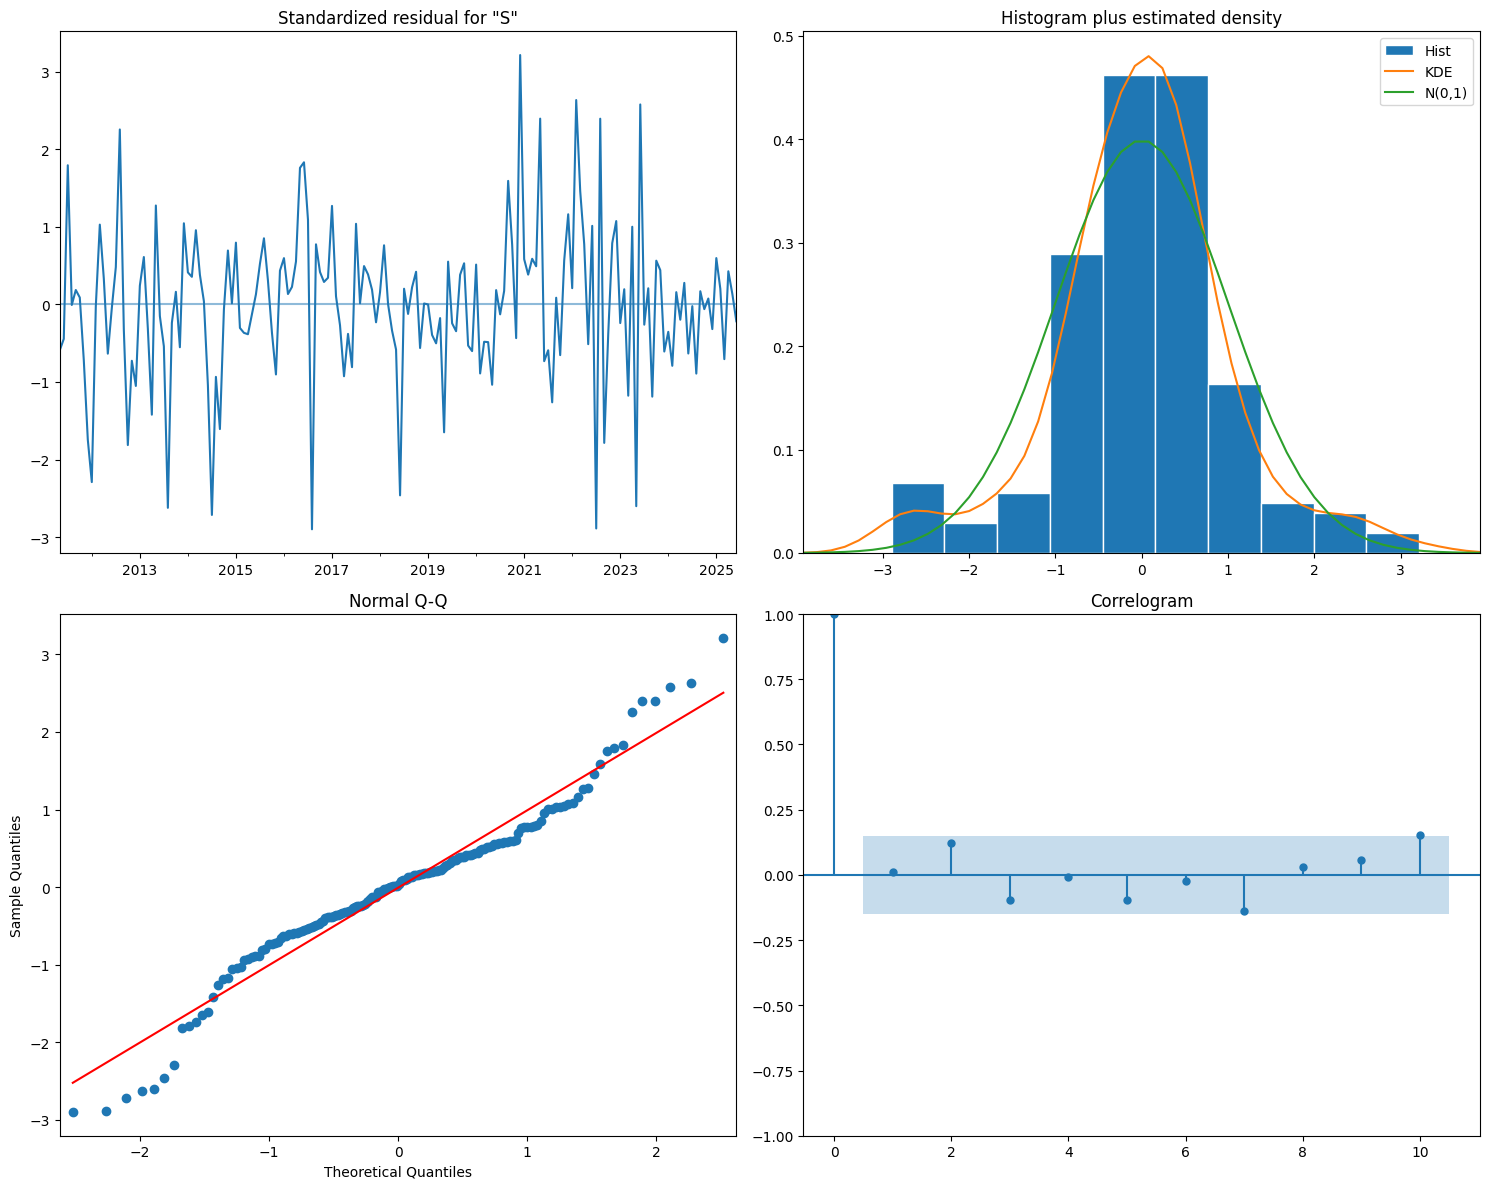


Top 5 modelos ARIMA (datos limpios):
1. Parámetros: (0, 1, 0) - AIC: 1933.92
2. Parámetros: (1, 1, 0) - AIC: 1935.09
3. Parámetros: (0, 1, 1) - AIC: 1935.20
4. Parámetros: (0, 1, 2) - AIC: 1935.67
5. Parámetros: (1, 1, 2) - AIC: 1936.04

Top 5 modelos SARIMA (datos limpios):
1. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1710.51
2. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1711.32
3. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1713.28
4. Parámetros: (2, 0, 0, 1, 1, 1, 12) - AIC: 1724.45
5. Parámetros: (1, 1, 0, 0, 1, 1, 12) - AIC: 1726.86

Top 5 modelos SARIMAX (datos limpios):
1. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1662.58
2. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1663.63
3. Parámetros: (1, 1, 0, 0, 1, 1, 12) - AIC: 1679.20
4. Parámetros: (0, 1, 0, 1, 1, 1, 12) - AIC: 1679.48
5. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1684.10

Comparación de resultados antes y después de eliminar outliers:
    Modelo  AIC_original   AIC_limpio  Mejora_AIC
0    ARIMA   1933.924599  1933.924599 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt # Import matplotlib here as it's used later

warnings.filterwarnings('ignore')

# Cargar datos
data = pd.read_excel('data.xlsx', sheet_name='Hoja1')
data['Fecha'] = pd.to_datetime(data['Fecha'].str.replace('M', '-'), format='%Y-%m')
data.set_index('Fecha', inplace=True)
data['SOYBEANS'] = data['SOYBEANS'].interpolate(method='linear')

# Función para eliminar outliers basados en desviación estándar
def remove_outliers(df, column, n_std=3):
    mean = df[column].mean()
    std = df[column].std()
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered[column] <= mean + n_std * std) &
                             (df_filtered[column] >= mean - n_std * std)]
    return df_filtered

# Eliminar outliers de SOYBEANS
data_clean = remove_outliers(data, 'SOYBEANS')

# Crear nuevo dataframe limpio
print(f"Datos originales: {len(data)} registros")
print(f"Datos después de eliminar outliers: {len(data_clean)} registros")
print(f"Registros eliminados: {len(data) - len(data_clean)}")

# Guardar el nuevo dataframe limpio
# data_clean.to_excel('data_clean.xlsx') # Descomentar si necesitas guardar el archivo

# Configuración de parámetros para generar modelos
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [12]

# Generar combinaciones
arima_combinations = list(product(p_values, d_values, q_values))
sarima_combinations = list(product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

# Seleccionar aleatoriamente 100 combinaciones (50 univariados, 50 multivariados)
np.random.seed(42)

# --- FIX: Adjust sample size based on available combinations ---
num_arima_combinations = len(arima_combinations)
num_arima_samples = min(50, num_arima_combinations) # Sample at most 50, but not more than available

selected_arima = [arima_combinations[i] for i in np.random.choice(num_arima_combinations, num_arima_samples, replace=False)]

num_sarima_combinations = len(sarima_combinations)
num_sarima_samples = min(50, num_sarima_combinations) # Sample at most 50, but not more than available

selected_sarima = [sarima_combinations[i] for i in np.random.choice(num_sarima_combinations, num_sarima_samples, replace=False)]
# --- END FIX ---


# Función mejorada para evaluar modelos
def evaluate_models_improved(series, exog=None, models_list=None, model_type='arima'):
    best_model = None
    best_aic = np.inf
    results = []

    # Ensure exog_vars are defined outside the loop if needed for sarimax
    exog_vars = exog # Use the exog passed to the function

    # If exog is provided, ensure index alignment with the series
    if exog is not None and model_type == 'sarimax':
         # Find the common index between the series and exog_vars
         common_index = series.index.intersection(exog_vars.index)
         # Align both series and exog_vars to the common index
         aligned_series = series[common_index]
         aligned_exog = exog_vars.loc[common_index]

         if aligned_series.empty or aligned_exog.empty:
              print(f"Warning: Empty series or exogenous variables after aligning index for {model_type}.")
              return None, None, np.inf, [] # Return empty results if alignment results in empty data
         else:
             # Use the aligned data for fitting
             series_to_fit = aligned_series
             exog_to_fit = aligned_exog
    else:
        # If no exog or not SARIMAX, just use the series directly (assuming it's already cleaned/interpolated)
        series_to_fit = series
        exog_to_fit = None


    for params in tqdm(models_list, desc=f"Evaluando modelos {model_type.upper()}"):
        try:
            if model_type == 'arima':
                p, d, q = params
                model = ARIMA(series_to_fit, order=(p, d, q)).fit()
            elif model_type == 'sarima':
                p, d, q, P, D, Q, s = params
                model = SARIMAX(series_to_fit,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)
            elif model_type == 'sarimax':
                p, d, q, P, D, Q, s = params
                # Use the aligned series and exog_vars
                model = SARIMAX(series_to_fit,
                              exog=exog_to_fit, # Use the aligned exog
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)

            aic = model.aic
            results.append((params, aic))

            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_params = params
        except Exception as e:
            # print(f"Error fitting model {params} ({model_type}): {e}") # Optional: Uncomment for debugging specific model errors
            continue # Continue to the next combination even if one fails

    return best_model, best_params, best_aic, results

# Prepare series for fitting (remove NaNs before passing to evaluation function)
series_for_fitting = data_clean['SOYBEANS'].dropna()

# Prepare exogenous variables for SARIMAX (remove NaNs, will be aligned inside the function)
exog_vars_for_fitting = data_clean[['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']].dropna()

# Evaluar modelos con datos limpios
best_arima_clean, arima_params_clean, arima_aic_clean, arima_results_clean = evaluate_models_improved(
    series_for_fitting, models_list=selected_arima, model_type='arima')

best_sarima_clean, sarima_params_clean, sarima_aic_clean, sarima_results_clean = evaluate_models_improved(
    series_for_fitting, models_list=selected_sarima, model_type='sarima')

best_sarimax_clean, sarimax_params_clean, sarimax_aic_clean, sarimax_results_clean = evaluate_models_improved(
    series_for_fitting, exog=exog_vars_for_fitting, models_list=selected_sarima, model_type='sarimax')


# Comparar los mejores modelos
final_models_clean = {}
# Add models only if they were successfully fitted
if best_arima_clean is not None:
    final_models_clean['ARIMA'] = (best_arima_clean, arima_aic_clean)
if best_sarima_clean is not None:
    final_models_clean['SARIMA'] = (best_sarima_clean, sarima_aic_clean)
if best_sarimax_clean is not None:
    final_models_clean['SARIMAX'] = (best_sarimax_clean, sarimax_aic_clean)


if not final_models_clean:
    print("\nNo models could be fitted successfully with the cleaned data.")
else:
    # Seleccionar el mejor modelo global
    best_model_name_clean = min(final_models_clean, key=lambda k: final_models_clean[k][1])
    best_model_clean = final_models_clean[best_model_name_clean][0]

    # Resultados
    print("\n" + "="*80)
    print("RESULTADOS CON DATOS LIMPIOS DE OUTLIERS")
    print("="*80)
    print(f"\nMEJOR MODELO ENCONTRADO: {best_model_name_clean}")
    # Access parameters safely
    print("Parámetros (order, seasonal_order if applicable):")
    if hasattr(best_model_clean, 'order'):
         print(f"  Order: {best_model_clean.order}")
    if hasattr(best_model_clean, 'seasonal_order'):
         print(f"  Seasonal Order: {best_model_clean.seasonal_order}")
    print(f"AIC: {final_models_clean[best_model_name_clean][1]:.2f}")
    print("\n" + "="*80 + "\n")

    # Summary del mejor modelo
    print(best_model_clean.summary())

    # Gráfico de diagnóstico
    best_model_clean.plot_diagnostics(figsize=(15, 12))
    plt.tight_layout()
    plt.show()

# Top 5 modelos de cada tipo
def print_top_models_clean(results, model_type):
    if not results:
         print(f"\nNo results available for {model_type} (datos limpios).")
         return

    sorted_results = sorted(results, key=lambda x: x[1])
    print(f"\nTop 5 modelos {model_type} (datos limpios):")
    for i, (params, aic) in enumerate(sorted_results[:5]):
        print(f"{i+1}. Parámetros: {params} - AIC: {aic:.2f}")

print_top_models_clean(arima_results_clean, 'ARIMA')
print_top_models_clean(sarima_results_clean, 'SARIMA')
print_top_models_clean(sarimax_results_clean, 'SARIMAX')

# Crear dataframe comparativo (Ensure arima_aic, sarima_aic, sarimax_aic are defined from previous runs or handle None)
# Using the aic values stored in the final_models dictionaries, handling cases where a model type failed to fit
aic_original = final_models.get('ARIMA', (None, np.inf))[1] if 'final_models' in locals() else np.inf
aic_sarima_original = final_models.get('SARIMA', (None, np.inf))[1] if 'final_models' in locals() else np.inf
aic_sarimax_original = final_models.get('SARIMAX', (None, np.inf))[1] if 'final_models' in locals() else np.inf

aic_clean_arima = final_models_clean.get('ARIMA', (None, np.inf))[1]
aic_clean_sarima = final_models_clean.get('SARIMA', (None, np.inf))[1]
aic_clean_sarimax = final_models_clean.get('SARIMAX', (None, np.inf))[1]


results_comparison_data = {
    'Modelo': ['ARIMA', 'SARIMA', 'SARIMAX'],
    'AIC_original': [aic_original, aic_sarima_original, aic_sarimax_original],
    'AIC_limpio': [aic_clean_arima, aic_clean_sarima, aic_clean_sarimax]
}

# Calculate Mejora_AIC, handling cases where one of the AICs might be inf or None
results_comparison_data['Mejora_AIC'] = [
    (o - c if np.isfinite(o) and np.isfinite(c) else np.nan)
    for o, c in zip(results_comparison_data['AIC_original'], results_comparison_data['AIC_limpio'])
]


results_comparison = pd.DataFrame(results_comparison_data)

print("\nComparación de resultados antes y después de eliminar outliers:")
print(results_comparison)

--- Eliminando posibles outliers (shocks idiosincráticos) en SOYBEANS ---
Identificados 23 posibles puntos de 'shock' en la primera diferencia.
Fechas de los posibles shocks (basado en la primera diferencia):
  2009-07-01
  2010-11-01
  2011-07-01
  2012-01-01
  2012-08-01
  2012-10-01
  2013-08-01
  2014-07-01
  2014-09-01
  2016-05-01
  2016-06-01
  2016-08-01
  2018-06-01
  2020-12-01
  2021-05-01
  2021-08-01
  2022-02-01
  2022-07-01
  2022-08-01
  2022-09-01
  2023-05-01
  2023-06-01
  2023-09-01

Datos originales: 204 registros
Datos después de eliminar 'shocks' (outliers en diferencia): 181 registros
Registros eliminados: 23


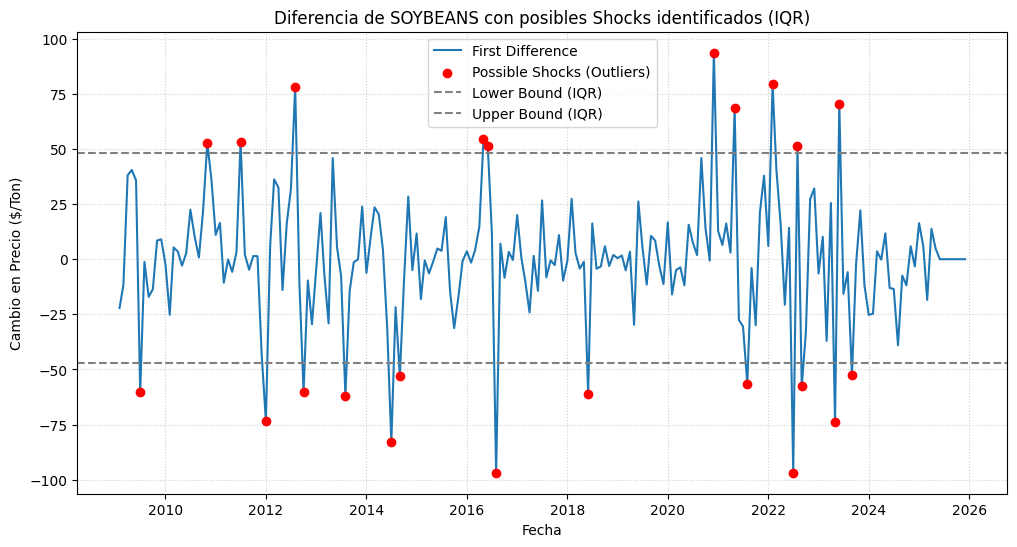


Exogenous variables available for SARIMAX after cleaning: ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

--- Evaluando modelos con datos limpios de shocks ---


Evaluando modelos SARIMAX: 100%|██████████| 50/50 [00:55<00:00,  1.12s/it]



RESULTADOS CON DATOS LIMPIOS DE SHOCKS (OUTLIERS EN DIFERENCIA)

MEJOR MODELO ENCONTRADO: SARIMAX
Parámetros (order, seasonal_order if applicable):
AIC: 1461.20


                                      SARIMAX Results                                       
Dep. Variable:                             SOYBEANS   No. Observations:                  175
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -720.600
Date:                              Mon, 23 Jun 2025   AIC                           1461.200
Time:                                      14:53:24   BIC                           1491.105
Sample:                                           0   HQIC                          1473.351
                                              - 175                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
-----------

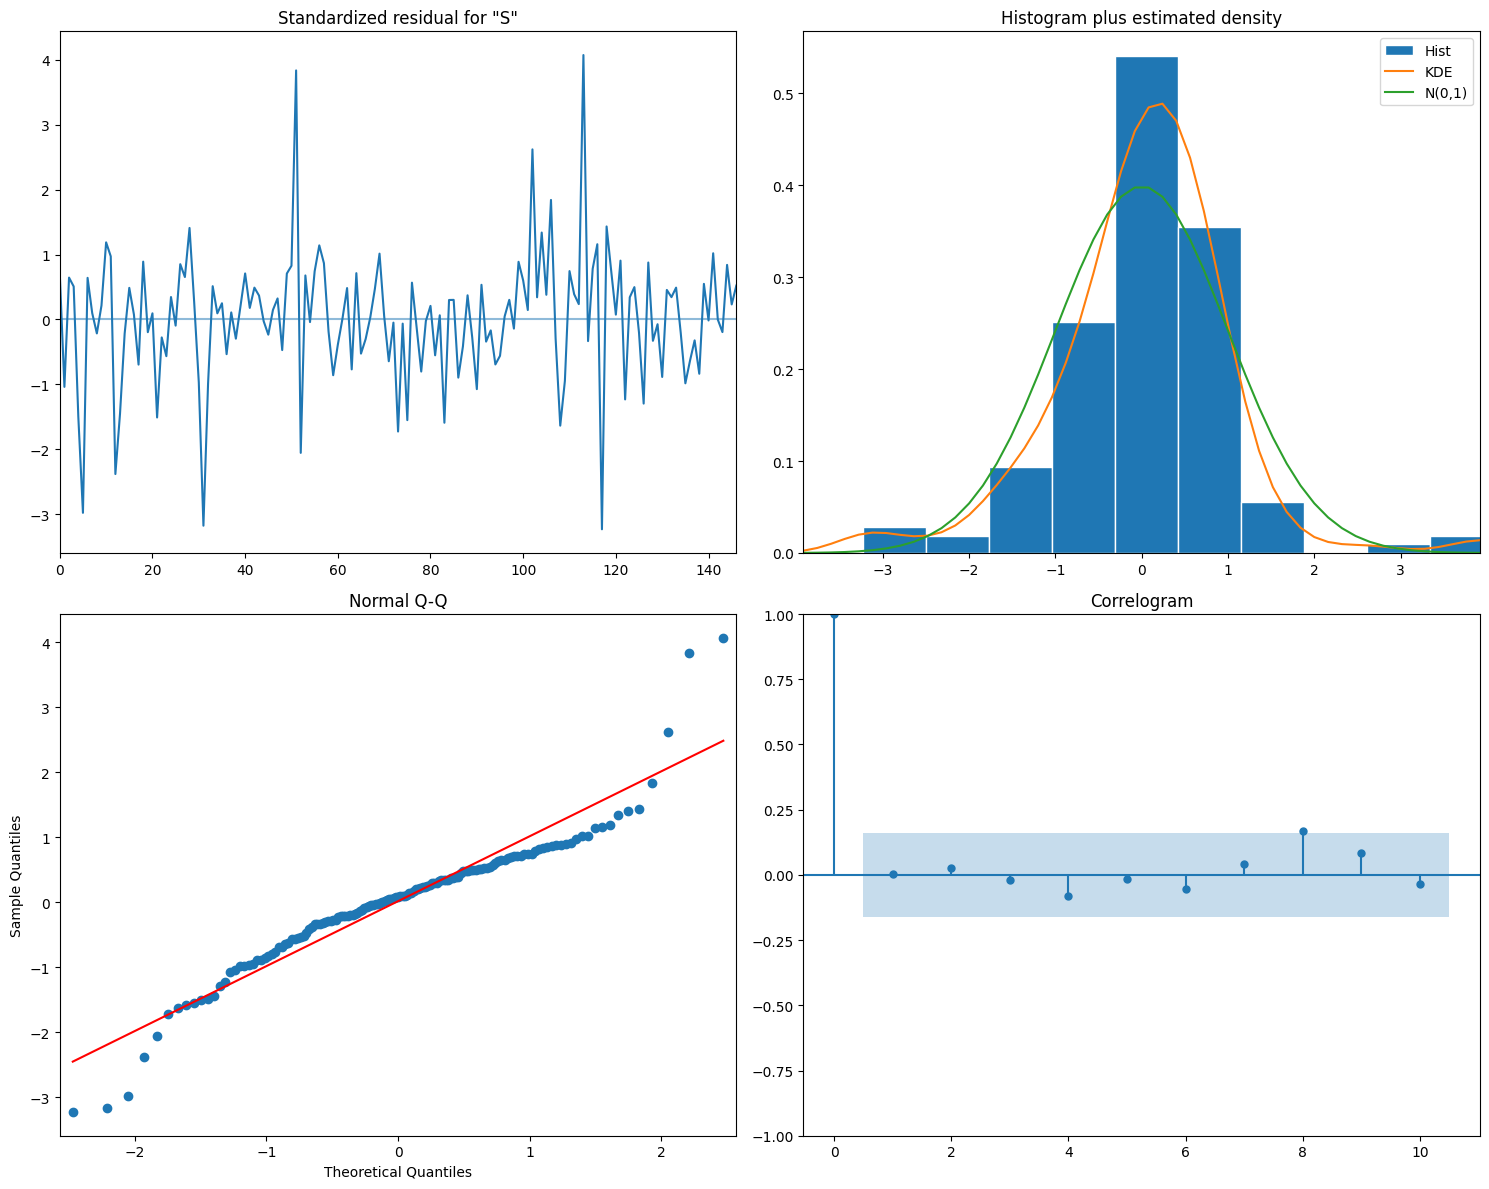


Top 5 modelos ARIMA (datos limpios de shocks):
1. Parámetros: (0, 1, 0) - AIC: 1749.07
2. Parámetros: (1, 1, 1) - AIC: 1749.31
3. Parámetros: (0, 1, 1) - AIC: 1750.92
4. Parámetros: (1, 1, 0) - AIC: 1750.93
5. Parámetros: (2, 1, 2) - AIC: 1751.06

Top 5 modelos SARIMA (datos limpios de shocks):
1. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1522.61
2. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1523.85
3. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1527.09
4. Parámetros: (2, 0, 0, 1, 1, 1, 12) - AIC: 1535.80
5. Parámetros: (0, 1, 0, 1, 1, 1, 12) - AIC: 1537.61

Top 5 modelos SARIMAX (datos limpios de shocks):
1. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1461.20
2. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1461.70
3. Parámetros: (0, 1, 0, 1, 1, 1, 12) - AIC: 1477.27
4. Parámetros: (1, 1, 0, 0, 1, 1, 12) - AIC: 1478.07
5. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1481.60

Comparación de resultados antes (interpolación) y después de eliminar shocks:
    Modelo  AIC_Interpolado  AIC_Shocks_Limp

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt # Import matplotlib here as it's used later

warnings.filterwarnings('ignore')

# Cargar datos
data = pd.read_excel('data.xlsx', sheet_name='Hoja1')
data['Fecha'] = pd.to_datetime(data['Fecha'].str.replace('M', '-'), format='%Y-%m')
data.set_index('Fecha', inplace=True)
# Keep the interpolation as a first step before outlier detection
data['SOYBEANS'] = data['SOYBEANS'].interpolate(method='linear')

print("--- Eliminando posibles outliers (shocks idiosincráticos) en SOYBEANS ---")

# --- Nuevo método para eliminar outliers basado en la primera diferencia (shocks) ---
# Calculate the first difference to look at changes, not levels
diff_series = data['SOYBEANS'].diff().dropna()

# Calculate Q1, Q3, and IQR
Q1 = diff_series.quantile(0.25)
Q3 = diff_series.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the differenced series
outlier_indices_diff = diff_series[(diff_series < lower_bound) | (diff_series > upper_bound)].index

# These indices correspond to the *end* point of the large change.
# The shock likely occurred *at* this time point or slightly before.
# We will remove the data points at these indices from the original series.

print(f"Identificados {len(outlier_indices_diff)} posibles puntos de 'shock' en la primera diferencia.")
if len(outlier_indices_diff) > 0:
    print("Fechas de los posibles shocks (basado en la primera diferencia):")
    for idx in outlier_indices_diff:
        print(f"  {idx.strftime('%Y-%m-%d')}")


# Create a cleaned DataFrame by dropping rows at the identified outlier indices
# from the ORIGINAL data DataFrame
data_clean_shocks = data.drop(index=outlier_indices_diff)

print(f"\nDatos originales: {len(data)} registros")
print(f"Datos después de eliminar 'shocks' (outliers en diferencia): {len(data_clean_shocks)} registros")
print(f"Registros eliminados: {len(data) - len(data_clean_shocks)}")


# Optional: Plot the differenced series and highlighted outliers
plt.figure(figsize=(12, 6))
plt.plot(diff_series.index, diff_series, label='First Difference')
plt.scatter(outlier_indices_diff, diff_series.loc[outlier_indices_diff], color='red', zorder=5, label='Possible Shocks (Outliers)')
plt.axhline(lower_bound, color='grey', linestyle='--', label='Lower Bound (IQR)')
plt.axhline(upper_bound, color='grey', linestyle='--', label='Upper Bound (IQR)')
plt.title('Diferencia de SOYBEANS con posibles Shocks identificados (IQR)')
plt.xlabel('Fecha')
plt.ylabel('Cambio en Precio ($/Ton)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()
# --- Fin del nuevo método de limpieza ---


# Guardar el nuevo dataframe limpio
# data_clean_shocks.to_excel('data_clean_shocks.xlsx') # Descomentar si necesitas guardar el archivo


# Configuración de parámetros para generar modelos
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [12]

# Generar combinaciones
arima_combinations = list(product(p_values, d_values, q_values))
sarima_combinations = list(product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

# Seleccionar aleatoriamente 100 combinaciones (50 univariados, 50 multivariados)
np.random.seed(42)

# Adjust sample size based on available combinations
num_arima_combinations = len(arima_combinations)
num_arima_samples = min(50, num_arima_combinations) # Sample at most 50, but not more than available

selected_arima = [arima_combinations[i] for i in np.random.choice(num_arima_combinations, num_arima_samples, replace=False)]

num_sarima_combinations = len(sarima_combinations)
num_sarima_samples = min(50, num_sarima_combinations) # Sample at most 50, but not more than available

selected_sarima = [sarima_combinations[i] for i in np.random.choice(num_sarima_combinations, num_sarima_samples, replace=False)]


# Función mejorada para evaluar modelos (re-uso la función definida anteriormente)
# Asegúrate de que esta función esté definida en una celda ejecutada antes o inclúyela aquí.
# (Ya está incluida en el bloque de código proporcionado en la respuesta anterior, así que la reutilizamos)


# --- Re-define evaluate_models_improved function here if it's not in a preceding cell ---
# If you already have this function defined and executed before this cell, you can remove
# the definition below. However, including it ensures this cell is self-contained for the evaluation part.
def evaluate_models_improved(series, exog=None, models_list=None, model_type='arima'):
    best_model = None
    best_aic = np.inf
    results = []

    exog_vars = exog # Use the exog passed to the function

    if exog is not None and model_type == 'sarimax':
         common_index = series.index.intersection(exog_vars.index)
         aligned_series = series[common_index]
         aligned_exog = exog_vars.loc[common_index]

         if aligned_series.empty or aligned_exog.empty:
              print(f"Warning: Empty series or exogenous variables after aligning index for {model_type}.")
              return None, None, np.inf, []
         else:
             series_to_fit = aligned_series
             exog_to_fit = aligned_exog
    else:
        series_to_fit = series
        exog_to_fit = None

    if series_to_fit.empty:
         print(f"Warning: Series for fitting is empty after initial data cleaning and alignment for {model_type}.")
         return None, None, np.inf, []


    for params in tqdm(models_list, desc=f"Evaluando modelos {model_type.upper()}"):
        try:
            # Ensure the series used for fitting does not contain NaNs within the range being fitted
            # The .dropna() was called earlier, but let's be explicit for clarity
            current_series_to_fit = series_to_fit.dropna()

            if model_type == 'arima':
                p, d, q = params
                model = ARIMA(current_series_to_fit, order=(p, d, q)).fit()
            elif model_type == 'sarima':
                p, d, q, P, D, Q, s = params
                model = SARIMAX(current_series_to_fit,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)
            elif model_type == 'sarimax':
                p, d, q, P, D, Q, s = params
                # Ensure exog_to_fit is also aligned and does not have NaNs for the fitting range
                current_exog_to_fit = exog_to_fit.loc[current_series_to_fit.index].dropna()

                # Check if the indices still match after dropping NaNs from both
                if not current_series_to_fit.index.equals(current_exog_to_fit.index):
                    print(f"Warning: Index mismatch between series and exog after final dropna for model {params}. Skipping.")
                    continue # Skip this model if indices don't match after final check


                model = SARIMAX(current_series_to_fit,
                              exog=current_exog_to_fit,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)

            aic = model.aic
            results.append((params, aic))

            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_params = params
        except Exception as e:
            # Optional: print(f"Error fitting model {params} ({model_type}): {e}")
            continue

    return best_model, best_params, best_aic, results
# --- End of re-defined evaluate_models_improved ---


# Prepare series for fitting (use the data after removing shocks)
# Remove any remaining NaNs just in case, although the shock removal targeted specific rows
series_for_fitting_shocks_cleaned = data_clean_shocks['SOYBEANS'].dropna()

# Prepare exogenous variables for SARIMAX (use the data after removing shocks)
# Remove NaNs from exog vars as well. Alignment happens inside the evaluate function.
exog_vars_for_fitting_shocks_cleaned = data_clean_shocks[['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']].dropna()

# Check if exogenous variables exist and are not empty after cleaning
exog_exists = False
if not exog_vars_for_fitting_shocks_cleaned.empty:
     # Further filter exog columns to only include those *actually* present in the df
     available_exog_cols = [col for col in ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL'] if col in data_clean_shocks.columns]
     exog_vars_for_fitting_shocks_cleaned = data_clean_shocks[available_exog_cols].dropna()

     if not exog_vars_for_fitting_shocks_cleaned.empty:
          exog_exists = True
          print(f"\nExogenous variables available for SARIMAX after cleaning: {exog_vars_for_fitting_shocks_cleaned.columns.tolist()}")
     else:
          print("\nWarning: Exogenous variables became empty after cleaning and dropping NaNs.")
else:
     print("\nWarning: No exogenous variables available after cleaning and dropping NaNs for SARIMAX.")


# Evaluar modelos con datos limpios de shocks
print("\n--- Evaluando modelos con datos limpios de shocks ---")

# Evaluate ARIMA
best_arima_shocks_clean, arima_params_shocks_clean, arima_aic_shocks_clean, arima_results_shocks_clean = evaluate_models_improved(
    series_for_fitting_shocks_cleaned, models_list=selected_arima, model_type='arima')

# Evaluate SARIMA
best_sarima_shocks_clean, sarima_params_shocks_clean, sarima_aic_shocks_clean, sarima_results_shocks_clean = evaluate_models_improved(
    series_for_fitting_shocks_cleaned, models_list=selected_sarima, model_type='sarima')

# Evaluate SARIMAX only if exogenous variables are available
best_sarimax_shocks_clean = None
sarimax_params_shocks_clean = None
sarimax_aic_shocks_clean = np.inf
sarimax_results_shocks_clean = []

if exog_exists:
     best_sarimax_shocks_clean, sarimax_params_shocks_clean, sarimax_aic_shocks_clean, sarimax_results_shocks_clean = evaluate_models_improved(
         series_for_fitting_shocks_cleaned, exog=exog_vars_for_fitting_shocks_cleaned, models_list=selected_sarima, model_type='sarimax')
else:
     print("Skipping SARIMAX evaluation due to lack of available exogenous variables after cleaning.")


# Comparar los mejores modelos
final_models_shocks_clean = {}
# Add models only if they were successfully fitted and have finite AIC
if best_arima_shocks_clean is not None and np.isfinite(arima_aic_shocks_clean):
    final_models_shocks_clean['ARIMA'] = (best_arima_shocks_clean, arima_aic_shocks_clean)
if best_sarima_shocks_clean is not None and np.isfinite(sarima_aic_shocks_clean):
    final_models_shocks_clean['SARIMA'] = (best_sarima_shocks_clean, sarima_aic_shocks_clean)
if best_sarimax_shocks_clean is not None and np.isfinite(sarimax_aic_shocks_clean):
    final_models_shocks_clean['SARIMAX'] = (best_sarimax_shocks_clean, sarimax_aic_shocks_clean)


if not final_models_shocks_clean:
    print("\nNo models could be fitted successfully with the shock-cleaned data.")
else:
    # Seleccionar el mejor modelo global
    best_model_name_shocks_clean = min(final_models_shocks_clean, key=lambda k: final_models_shocks_clean[k][1])
    best_model_shocks_clean = final_models_shocks_clean[best_model_name_shocks_clean][0]

    # Resultados
    print("\n" + "="*80)
    print("RESULTADOS CON DATOS LIMPIOS DE SHOCKS (OUTLIERS EN DIFERENCIA)")
    print("="*80)
    print(f"\nMEJOR MODELO ENCONTRADO: {best_model_name_shocks_clean}")
    # Access parameters safely
    print("Parámetros (order, seasonal_order if applicable):")
    if hasattr(best_model_shocks_clean, 'order'):
         print(f"  Order: {best_model_shocks_clean.order}")
    if hasattr(best_model_shocks_clean, 'seasonal_order'):
         print(f"  Seasonal Order: {best_model_shocks_clean.seasonal_order}")
    print(f"AIC: {final_models_shocks_clean[best_model_name_shocks_clean][1]:.2f}")
    print("\n" + "="*80 + "\n")

    # Summary del mejor modelo
    print(best_model_shocks_clean.summary())

    # Gráfico de diagnóstico
    best_model_shocks_clean.plot_diagnostics(figsize=(15, 12))
    plt.tight_layout()
    plt.show()

# Top 5 modelos de cada tipo
def print_top_models_clean(results, model_type):
    if not results:
         print(f"\nNo results available for {model_type} (datos limpios de shocks).")
         return

    # Filter out results with infinite AIC before sorting
    finite_results = [(p, a) for p, a in results if np.isfinite(a)]
    if not finite_results:
        print(f"\nNo successful models found for {model_type} (datos limpios de shocks).")
        return

    sorted_results = sorted(finite_results, key=lambda x: x[1])
    print(f"\nTop 5 modelos {model_type} (datos limpios de shocks):")
    for i, (params, aic) in enumerate(sorted_results[:5]):
        print(f"{i+1}. Parámetros: {params} - AIC: {aic:.2f}")

print_top_models_clean(arima_results_shocks_clean, 'ARIMA')
print_top_models_clean(sarima_results_shocks_clean, 'SARIMA')
print_top_models_clean(sarimax_results_shocks_clean, 'SARIMAX')

# Create comparison dataframe (need AICs from previous run for comparison if available)
# Assuming the previous cell saved results in final_models (original data after interpolation)
# If you ran the previous cell, 'final_models' should exist.

# Get AICs from the previous run (original data with interpolation, but no shock cleaning)
# Handle case where final_models might not exist if previous cell wasn't run or failed
aic_original = final_models.get('ARIMA', (None, np.inf))[1] if 'final_models' in locals() else np.nan
aic_sarima_original = final_models.get('SARIMA', (None, np.inf))[1] if 'final_models' in locals() else np.nan
aic_sarimax_original = final_models.get('SARIMAX', (None, np.inf))[1] if 'final_models' in locals() else np.nan

# Get AICs from the current run (data after removing shocks based on differencing)
aic_shocks_clean_arima = final_models_shocks_clean.get('ARIMA', (None, np.inf))[1]
aic_shocks_clean_sarima = final_models_shocks_clean.get('SARIMA', (None, np.inf))[1]
aic_shocks_clean_sarimax = final_models_shocks_clean.get('SARIMAX', (None, np.inf))[1]


results_comparison_data = {
    'Modelo': ['ARIMA', 'SARIMA', 'SARIMAX'],
    'AIC_Interpolado': [aic_original, aic_sarima_original, aic_sarimax_original], # Label adjusted for clarity
    'AIC_Shocks_Limpio': [aic_shocks_clean_arima, aic_shocks_clean_sarima, aic_shocks_clean_sarimax]
}

# Calculate Mejora_AIC, handling cases where one of the AICs might be inf or None
results_comparison_data['Mejora_AIC'] = [
    (o - c if np.isfinite(o) and np.isfinite(c) else np.nan)
    for o, c in zip(results_comparison_data['AIC_Interpolado'], results_comparison_data['AIC_Shocks_Limpio'])
]


results_comparison = pd.DataFrame(results_comparison_data)

print("\nComparación de resultados antes (interpolación) y después de eliminar shocks:")
print(results_comparison)

--- Eliminando posibles outliers (shocks idiosincráticos) en SOYBEANS ---
Identificados 23 posibles puntos de 'shock' en la primera diferencia.
Fechas de los posibles shocks (basado en la primera diferencia):
  2009-07-01
  2010-11-01
  2011-07-01
  2012-01-01
  2012-08-01
  2012-10-01
  2013-08-01
  2014-07-01
  2014-09-01
  2016-05-01
  2016-06-01
  2016-08-01
  2018-06-01
  2020-12-01
  2021-05-01
  2021-08-01
  2022-02-01
  2022-07-01
  2022-08-01
  2022-09-01
  2023-05-01
  2023-06-01
  2023-09-01

Datos originales: 204 registros
Datos después de eliminar 'shocks' (outliers en diferencia): 181 registros
Registros eliminados: 23


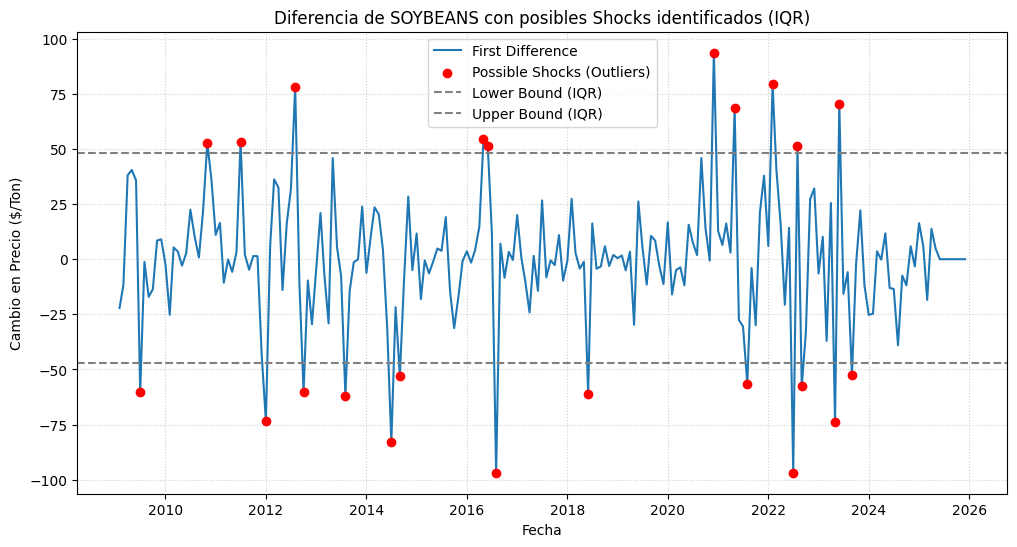


Exogenous variables available for SARIMAX after cleaning: ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

--- Evaluando modelos (Grid Search) con datos limpios de shocks ---


Evaluando modelos SARIMAX: 100%|██████████| 50/50 [00:55<00:00,  1.11s/it]



--- Evaluando modelo SARIMA(1, 1, 0)x(1, 1, 1, 12) específico ---
Error fitting specific SARIMA/SARIMAX model: "[Timestamp('2025-07-01 00:00:00'), Timestamp('2025-08-01 00:00:00'), Timestamp('2025-09-01 00:00:00'), Timestamp('2025-10-01 00:00:00'), Timestamp('2025-11-01 00:00:00'), Timestamp('2025-12-01 00:00:00')] not in index"

RESULTADOS CON DATOS LIMPIOS DE SHOCKS (OUTLIERS EN DIFERENCIA)

MEJOR MODELO ENCONTRADO: SARIMAX (Grid)
Parámetros (order, seasonal_order if applicable):
AIC: 1461.20


                                      SARIMAX Results                                       
Dep. Variable:                             SOYBEANS   No. Observations:                  175
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -720.600
Date:                              Mon, 23 Jun 2025   AIC                           1461.200
Time:                                      14:57:09   BIC                           1491.105
Sample:                         

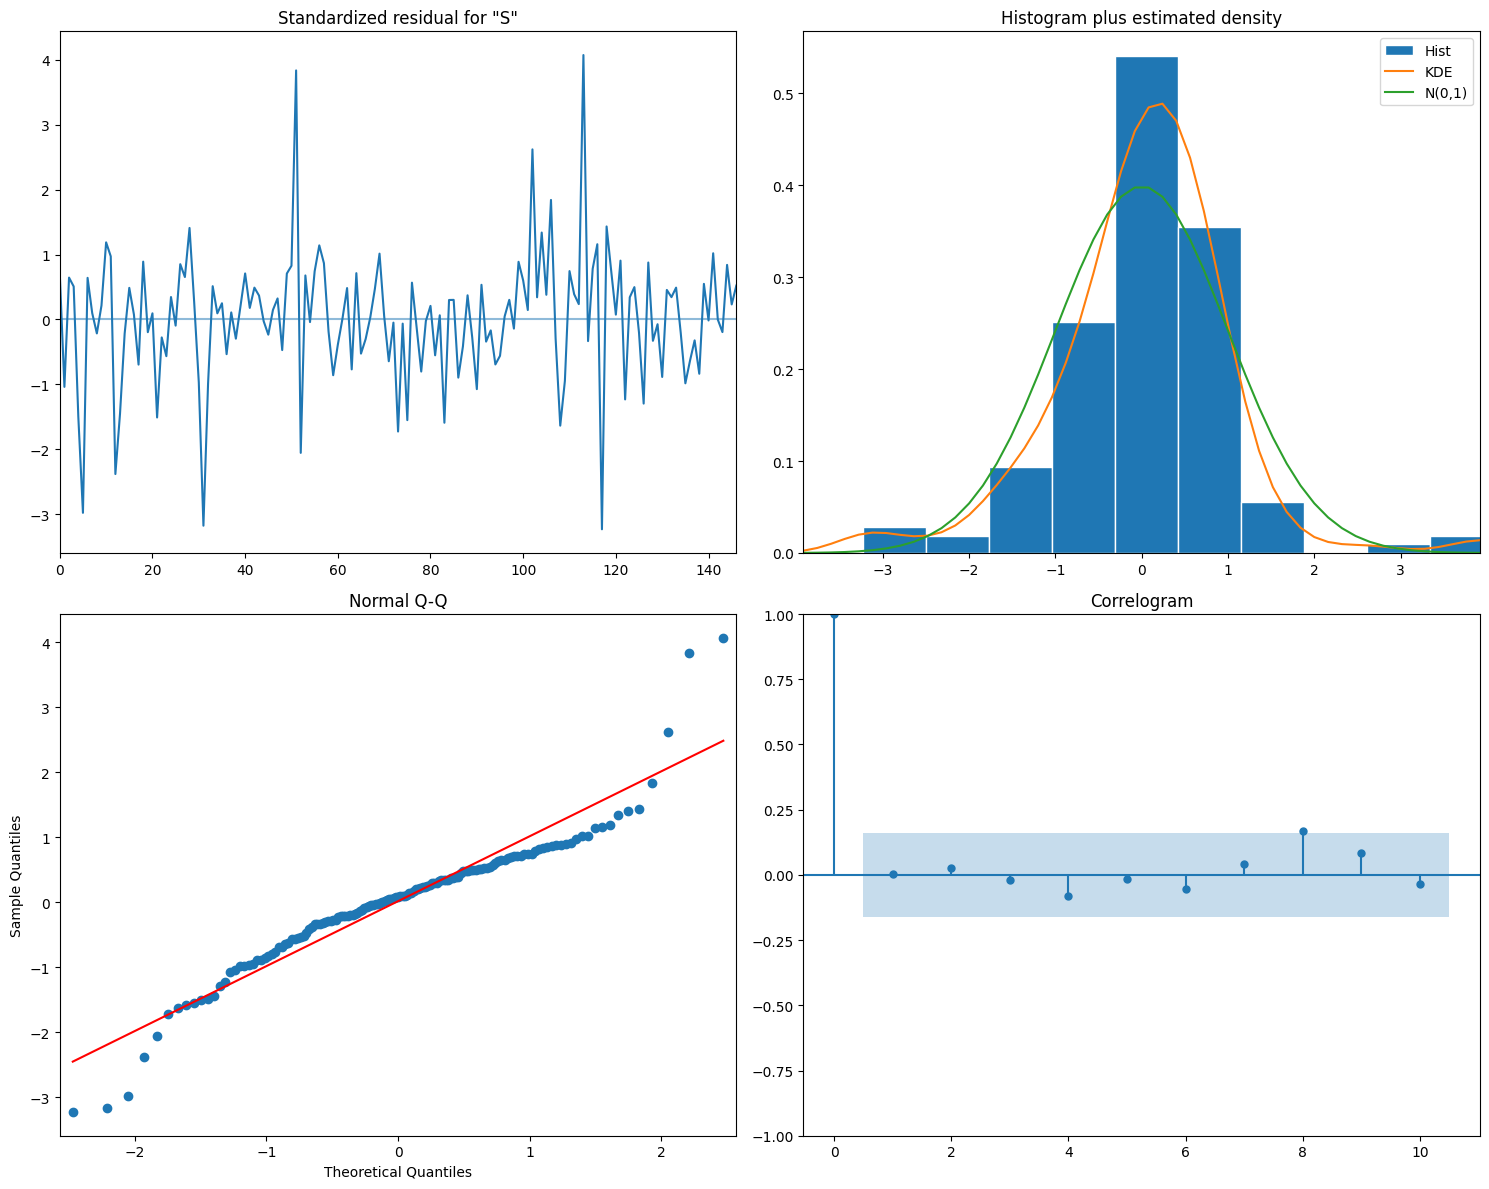


Top 5 modelos ARIMA (Grid Search, datos limpios de shocks):
1. Parámetros: (0, 1, 0) - AIC: 1749.07
2. Parámetros: (1, 1, 1) - AIC: 1749.31
3. Parámetros: (0, 1, 1) - AIC: 1750.92
4. Parámetros: (1, 1, 0) - AIC: 1750.93
5. Parámetros: (2, 1, 2) - AIC: 1751.06

Top 5 modelos SARIMA (Grid Search, datos limpios de shocks):
1. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1522.61
2. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1523.85
3. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1527.09
4. Parámetros: (2, 0, 0, 1, 1, 1, 12) - AIC: 1535.80
5. Parámetros: (0, 1, 0, 1, 1, 1, 12) - AIC: 1537.61

Top 5 modelos SARIMAX (Grid Search, datos limpios de shocks):
1. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1461.20
2. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1461.70
3. Parámetros: (0, 1, 0, 1, 1, 1, 12) - AIC: 1477.27
4. Parámetros: (1, 1, 0, 0, 1, 1, 12) - AIC: 1478.07
5. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1481.60

Comparación de resultados de Modelos (Ordenado por AIC):
                    Modelo

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Cargar datos
data = pd.read_excel('data.xlsx', sheet_name='Hoja1')
data['Fecha'] = pd.to_datetime(data['Fecha'].str.replace('M', '-'), format='%Y-%m')
data.set_index('Fecha', inplace=True)
data['SOYBEANS'] = data['SOYBEANS'].interpolate(method='linear')

print("--- Eliminando posibles outliers (shocks idiosincráticos) en SOYBEANS ---")

# Calculate the first difference to look at changes, not levels
diff_series = data['SOYBEANS'].diff().dropna()

# Calculate Q1, Q3, and IQR
Q1 = diff_series.quantile(0.25)
Q3 = diff_series.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the differenced series
outlier_indices_diff = diff_series[(diff_series < lower_bound) | (diff_series > upper_bound)].index

print(f"Identificados {len(outlier_indices_diff)} posibles puntos de 'shock' en la primera diferencia.")
if len(outlier_indices_diff) > 0:
    print("Fechas de los posibles shocks (basado en la primera diferencia):")
    for idx in outlier_indices_diff:
        print(f"  {idx.strftime('%Y-%m-%d')}")

# Create a cleaned DataFrame by dropping rows at the identified outlier indices
data_clean_shocks = data.drop(index=outlier_indices_diff)

print(f"\nDatos originales: {len(data)} registros")
print(f"Datos después de eliminar 'shocks' (outliers en diferencia): {len(data_clean_shocks)} registros")
print(f"Registros eliminados: {len(data) - len(data_clean_shocks)}")

# Optional: Plot the differenced series and highlighted outliers
plt.figure(figsize=(12, 6))
plt.plot(diff_series.index, diff_series, label='First Difference')
plt.scatter(outlier_indices_diff, diff_series.loc[outlier_indices_diff], color='red', zorder=5, label='Possible Shocks (Outliers)')
plt.axhline(lower_bound, color='grey', linestyle='--', label='Lower Bound (IQR)')
plt.axhline(upper_bound, color='grey', linestyle='--', label='Upper Bound (IQR)')
plt.title('Diferencia de SOYBEANS con posibles Shocks identificados (IQR)')
plt.xlabel('Fecha')
plt.ylabel('Cambio en Precio ($/Ton)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


# Configuración de parámetros para generar modelos (para el grid search)
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [12]

# Generar combinaciones para el grid search
arima_combinations = list(product(p_values, d_values, q_values))
sarima_combinations = list(product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

# Seleccionar aleatoriamente 100 combinaciones (50 univariados, 50 multivariados) para el grid search
np.random.seed(42)

num_arima_combinations = len(arima_combinations)
num_arima_samples = min(50, num_arima_combinations)

selected_arima = [arima_combinations[i] for i in np.random.choice(num_arima_combinations, num_arima_samples, replace=False)]

num_sarima_combinations = len(sarima_combinations)
num_sarima_samples = min(50, num_sarima_combinations)

selected_sarima = [sarima_combinations[i] for i in np.random.choice(num_sarima_combinations, num_sarima_samples, replace=False)]


# Función mejorada para evaluar modelos
def evaluate_models_improved(series, exog=None, models_list=None, model_type='arima'):
    best_model = None
    best_aic = np.inf
    results = []

    exog_vars = exog

    if exog is not None and model_type == 'sarimax':
         common_index = series.index.intersection(exog_vars.index)
         aligned_series = series[common_index]
         aligned_exog = exog_vars.loc[common_index]

         if aligned_series.empty or aligned_exog.empty:
              # print(f"Warning: Empty series or exogenous variables after aligning index for {model_type}.")
              return None, None, np.inf, []
         else:
             series_to_fit = aligned_series
             exog_to_fit = aligned_exog
    else:
        series_to_fit = series
        exog_to_fit = None

    if series_to_fit.empty:
         # print(f"Warning: Series for fitting is empty after initial data cleaning and alignment for {model_type}.")
         return None, None, np.inf, []

    for params in tqdm(models_list, desc=f"Evaluando modelos {model_type.upper()}"):
        try:
            current_series_to_fit = series_to_fit.dropna()

            if model_type == 'arima':
                p, d, q = params
                # Ensure the series used for ARIMA is the one without NaNs after initial cleaning steps
                model = ARIMA(current_series_to_fit, order=(p, d, q)).fit()
            elif model_type == 'sarima':
                p, d, q, P, D, Q, s = params
                model = SARIMAX(current_series_to_fit,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)
            elif model_type == 'sarimax':
                p, d, q, P, D, Q, s = params
                current_exog_to_fit = exog_to_fit.loc[current_series_to_fit.index]
                 # Drop NaNs from exog just before fitting, ensuring index alignment
                current_exog_to_fit = current_exog_to_fit.dropna()
                current_series_to_fit = current_series_to_fit.loc[current_exog_to_fit.index] # Re-align series after dropping NaNs from exog

                if current_series_to_fit.empty or current_exog_to_fit.empty or not current_series_to_fit.index.equals(current_exog_to_fit.index):
                    # print(f"Warning: Index mismatch or empty data after final dropna for model {params}. Skipping.")
                    continue # Skip this model if indices don't match or data is empty

                model = SARIMAX(current_series_to_fit,
                              exog=current_exog_to_fit,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)

            aic = model.aic
            results.append((params, aic))

            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_params = params
        except Exception as e:
            # print(f"Error fitting model {params} ({model_type}): {e}")
            continue

    return best_model, best_params, best_aic, results


# Prepare data for fitting (use the data after removing shocks)
series_for_fitting_shocks_cleaned = data_clean_shocks['SOYBEANS'].dropna()

# Prepare exogenous variables for SARIMAX (use the data after removing shocks)
# Need to filter exog columns that exist in the dataframe *after* shock cleaning
exog_cols = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
available_exog_cols = [col for col in exog_cols if col in data_clean_shocks.columns]

exog_vars_for_fitting_shocks_cleaned = None
exog_exists = False

if available_exog_cols:
    # Select available exog columns from the shock-cleaned data and drop NaNs
    exog_vars_for_fitting_shocks_cleaned = data_clean_shocks[available_exog_cols].dropna()
    if not exog_vars_for_fitting_shocks_cleaned.empty:
        exog_exists = True
        print(f"\nExogenous variables available for SARIMAX after cleaning: {exog_vars_for_fitting_shocks_cleaned.columns.tolist()}")
    else:
        print("\nWarning: Exogenous variables became empty after cleaning and dropping NaNs.")
else:
    print("\nWarning: No exogenous variables available in the cleaned data for SARIMAX.")


# Evaluar modelos con datos limpios de shocks (Grid Search)
print("\n--- Evaluando modelos (Grid Search) con datos limpios de shocks ---")

best_arima_shocks_clean, arima_params_shocks_clean, arima_aic_shocks_clean, arima_results_shocks_clean = evaluate_models_improved(
    series_for_fitting_shocks_cleaned, models_list=selected_arima, model_type='arima')

best_sarima_shocks_clean, sarima_params_shocks_clean, sarima_aic_shocks_clean, sarima_results_shocks_clean = evaluate_models_improved(
    series_for_fitting_shocks_cleaned, models_list=selected_sarima, model_type='sarima')

best_sarimax_shocks_clean = None
sarimax_params_shocks_clean = None
sarimax_aic_shocks_clean = np.inf
sarimax_results_shocks_clean = []

if exog_exists:
     best_sarimax_shocks_clean, sarimax_params_shocks_clean, sarimax_aic_shocks_clean, sarimax_results_shocks_clean = evaluate_models_improved(
         series_for_fitting_shocks_cleaned, exog=exog_vars_for_fitting_shocks_cleaned, models_list=selected_sarima, model_type='sarimax')
else:
     print("Skipping SARIMAX grid search due to lack of available exogenous variables after cleaning.")


# --- Evaluate the specific requested SARIMA model ---
print("\n--- Evaluando modelo SARIMA(1, 1, 0)x(1, 1, 1, 12) específico ---")

specific_sarima_params = (1, 1, 0, 1, 1, 1, 12)
specific_sarima_model = None
specific_sarima_aic = np.inf

try:
    # Need to align series and exog for the specific SARIMAX model too
    # Re-create aligned series and exog specifically for this model fit attempt
    series_to_fit_specific = series_for_fitting_shocks_cleaned.dropna()

    if exog_exists:
        exog_to_fit_specific = exog_vars_for_fitting_shocks_cleaned.loc[series_to_fit_specific.index]
        exog_to_fit_specific = exog_to_fit_specific.dropna()
        series_to_fit_specific = series_to_fit_specific.loc[exog_to_fit_specific.index]

        if series_to_fit_specific.empty or exog_to_fit_specific.empty or not series_to_fit_specific.index.equals(exog_to_fit_specific.index):
             print("Warning: Data became empty or misaligned for the specific SARIMAX model after final dropna. Skipping specific SARIMAX.")
             # Try fitting as SARIMA if exog is the issue
             print("Attempting to fit specific SARIMA (without exog) instead...")
             try:
                  specific_sarima_model = SARIMAX(series_to_fit_specific,
                                            order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]), # (1, 1, 0)
                                            seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]), # (1, 1, 1, 12)
                                            enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=False)
                  specific_sarima_aic = specific_sarima_model.aic
                  print(f"Specific SARIMA({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_sarima_aic:.2f}")

             except Exception as e_sarima:
                  print(f"Error fitting specific SARIMA model: {e_sarima}")


        else: # Data is aligned and not empty, fit SARIMAX
             specific_sarima_model = SARIMAX(series_to_fit_specific,
                                           exog=exog_to_fit_specific,
                                           order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]), # (1, 1, 0)
                                           seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]), # (1, 1, 1, 12)
                                           enforce_stationarity=False,
                                           enforce_invertibility=False).fit(disp=False)
             specific_sarima_aic = specific_sarima_model.aic
             print(f"Specific SARIMAX({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_sarima_aic:.2f}")

    else: # No exogenous variables available at all, fit as SARIMA
         specific_sarima_model = SARIMAX(series_to_fit_specific,
                                        order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]), # (1, 1, 0)
                                        seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]), # (1, 1, 1, 12)
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit(disp=False)
         specific_sarima_aic = specific_sarima_model.aic
         print(f"Specific SARIMA({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_sarima_aic:.2f}")

except Exception as e:
    print(f"Error fitting specific SARIMA/SARIMAX model: {e}")


# Comparar los mejores modelos (incluyendo el específico)
final_models_shocks_clean = {}
# Add models from grid search if they were successfully fitted and have finite AIC
if best_arima_shocks_clean is not None and np.isfinite(arima_aic_shocks_clean):
    final_models_shocks_clean['ARIMA (Grid)'] = (best_arima_shocks_clean, arima_aic_shocks_clean)
if best_sarima_shocks_clean is not None and np.isfinite(sarima_aic_shocks_clean):
    final_models_shocks_clean['SARIMA (Grid)'] = (best_sarima_shocks_clean, sarima_aic_shocks_clean)
if best_sarimax_shocks_clean is not None and np.isfinite(sarimax_aic_shocks_clean):
    final_models_shocks_clean['SARIMAX (Grid)'] = (best_sarimax_shocks_clean, sarimax_aic_shocks_clean)

# Add the specific model if it was successfully fitted and has a finite AIC
if specific_sarima_model is not None and np.isfinite(specific_sarima_aic):
    # Determine the name based on whether exog was used
    specific_model_name = 'Specific SARIMAX' if exog_exists and not (series_to_fit_specific.empty or exog_to_fit_specific.empty or not series_to_fit_specific.index.equals(exog_to_fit_specific.index)) else 'Specific SARIMA'
    specific_model_params_display = f"({specific_sarima_params[0]}, {specific_sarima_params[1]}, {specific_sarima_params[2]})x({specific_sarima_params[3]}, {specific_sarima_params[4]}, {specific_sarima_params[5]}, {specific_sarima_params[6]})"
    final_models_shocks_clean[f'{specific_model_name} {specific_model_params_display}'] = (specific_sarima_model, specific_sarima_aic)


if not final_models_shocks_clean:
    print("\nNo models could be fitted successfully with the shock-cleaned data.")
else:
    # Seleccionar el mejor modelo global
    best_model_name_shocks_clean = min(final_models_shocks_clean, key=lambda k: final_models_shocks_clean[k][1])
    best_model_shocks_clean = final_models_shocks_clean[best_model_name_shocks_clean][0]
    best_model_aic_shocks_clean = final_models_shocks_clean[best_model_name_shocks_clean][1]


    # Resultados
    print("\n" + "="*80)
    print("RESULTADOS CON DATOS LIMPIOS DE SHOCKS (OUTLIERS EN DIFERENCIA)")
    print("="*80)
    print(f"\nMEJOR MODELO ENCONTRADO: {best_model_name_shocks_clean}")
    # Access parameters safely
    print("Parámetros (order, seasonal_order if applicable):")
    if hasattr(best_model_shocks_clean, 'order'):
         print(f"  Order: {best_model_shocks_clean.order}")
    if hasattr(best_model_shocks_clean, 'seasonal_order'):
         print(f"  Seasonal Order: {best_model_shocks_clean.seasonal_order}")
    # For the specific model, display the requested parameters clearly
    if "Specific" in best_model_name_shocks_clean:
         print(f"  Requested Order: {specific_sarima_params[:3]}x{specific_sarima_params[3:]}")

    print(f"AIC: {best_model_aic_shocks_clean:.2f}")
    print("\n" + "="*80 + "\n")

    # Summary del mejor modelo
    print(best_model_shocks_clean.summary())

    # Gráfico de diagnóstico (Only plot if the best model was successfully fitted)
    if best_model_shocks_clean is not None:
        try:
            best_model_shocks_clean.plot_diagnostics(figsize=(15, 12))
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error generating diagnostics plot for the best model: {e}")


# Top 5 modelos de cada tipo (adjusting to print top models from the grid search categories)
def print_top_models_clean(results, model_type):
    if not results:
         print(f"\nNo grid search results available for {model_type} (datos limpios de shocks).")
         return

    # Filter out results with infinite AIC before sorting
    finite_results = [(p, a) for p, a in results if np.isfinite(a)]
    if not finite_results:
        print(f"\nNo successful models found in the grid search for {model_type} (datos limpios de shocks).")
        return

    sorted_results = sorted(finite_results, key=lambda x: x[1])
    print(f"\nTop 5 modelos {model_type} (Grid Search, datos limpios de shocks):")
    for i, (params, aic) in enumerate(sorted_results[:5]):
        print(f"{i+1}. Parámetros: {params} - AIC: {aic:.2f}")

print_top_models_clean(arima_results_shocks_clean, 'ARIMA')
print_top_models_clean(sarima_results_shocks_clean, 'SARIMA')
# Print SARIMAX grid search results only if exog was available
if exog_exists:
     print_top_models_clean(sarimax_results_shocks_clean, 'SARIMAX')
else:
     print("\nSkipping print of SARIMAX grid search results due to lack of exogenous variables.")


# Create comparison dataframe (includes the specific model's AIC)
# Get AICs from the previous run (original data with interpolation, but no shock cleaning)
aic_original = final_models.get('ARIMA', (None, np.inf))[1] if 'final_models' in locals() else np.nan
aic_sarima_original = final_models.get('SARIMA', (None, np.inf))[1] if 'final_models' in locals() else np.nan
aic_sarimax_original = final_models.get('SARIMAX', (None, np.inf))[1] if 'final_models' in locals() else np.nan # This was from the original grid, not specific

# Get AICs from the current run (data after removing shocks)
aic_shocks_clean_arima = final_models_shocks_clean.get('ARIMA (Grid)', (None, np.inf))[1]
aic_shocks_clean_sarima = final_models_shocks_clean.get('SARIMA (Grid)', (None, np.inf))[1]
aic_shocks_clean_sarimax = final_models_shocks_clean.get('SARIMAX (Grid)', (None, np.inf))[1]

# Get AIC from the specific model if it was fitted
aic_specific_model = specific_sarima_aic if specific_sarima_model is not None else np.nan
specific_model_name_for_table = 'Specific SARIMAX' if 'Specific SARIMAX' in final_models_shocks_clean else ('Specific SARIMA' if 'Specific SARIMA' in final_models_shocks_clean else 'Specific Model (Failed)')


results_comparison_data = {
    'Modelo': ['ARIMA (Interpolado)', 'SARIMA (Interpolado)', 'SARIMAX (Interpolado)',
               'ARIMA (Shocks Limpio)', 'SARIMA (Shocks Limpio)', 'SARIMAX (Shocks Limpio)'],
    'AIC': [aic_original, aic_sarima_original, aic_sarimax_original,
            aic_shocks_clean_arima, aic_shocks_clean_sarima, aic_shocks_clean_sarimax]
}

# Add the specific model's results
if specific_model_name_for_table != 'Specific Model (Failed)':
    results_comparison_data['Modelo'].append(f'{specific_model_name_for_table} {specific_sarima_params[:3]}x{specific_sarima_params[3:]}')
    results_comparison_data['AIC'].append(aic_specific_model)


results_comparison = pd.DataFrame(results_comparison_data).sort_values(by='AIC').reset_index(drop=True) # Sort by AIC

print("\nComparación de resultados de Modelos (Ordenado por AIC):")
print(results_comparison)

--- Eliminando posibles outliers (shocks idiosincráticos) en SOYBEANS ---
Identificados 23 posibles puntos de 'shock' en la primera diferencia.
Fechas de los posibles shocks (basado en la primera diferencia):
  2009-07-01
  2010-11-01
  2011-07-01
  2012-01-01
  2012-08-01
  2012-10-01
  2013-08-01
  2014-07-01
  2014-09-01
  2016-05-01
  2016-06-01
  2016-08-01
  2018-06-01
  2020-12-01
  2021-05-01
  2021-08-01
  2022-02-01
  2022-07-01
  2022-08-01
  2022-09-01
  2023-05-01
  2023-06-01
  2023-09-01

Datos originales: 204 registros
Datos después de eliminar 'shocks' (outliers en diferencia): 181 registros
Registros eliminados: 23


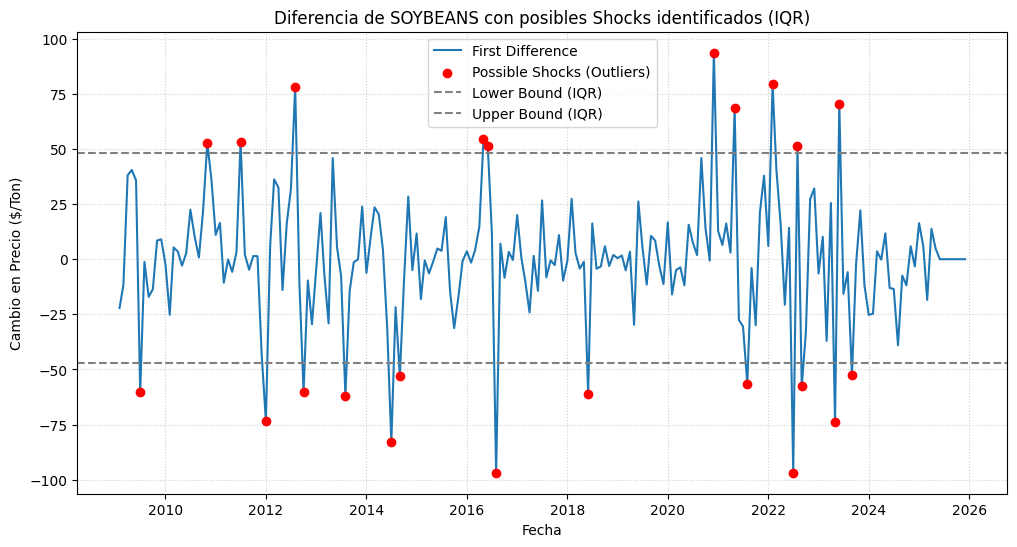


Exogenous variables available for SARIMAX after cleaning: ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

--- Evaluando modelos (Grid Search) con datos limpios de shocks ---


Evaluando modelos SARIMAX: 100%|██████████| 50/50 [00:55<00:00,  1.12s/it]



--- Evaluando modelo SARIMA(1, 1, 0)x(1, 1, 1, 12) específico ---
Error fitting specific SARIMA/SARIMAX model: "[Timestamp('2025-07-01 00:00:00'), Timestamp('2025-08-01 00:00:00'), Timestamp('2025-09-01 00:00:00'), Timestamp('2025-10-01 00:00:00'), Timestamp('2025-11-01 00:00:00'), Timestamp('2025-12-01 00:00:00')] not in index"

RESULTADOS CON DATOS LIMPIOS DE SHOCKS (OUTLIERS EN DIFERENCIA)

MEJOR MODELO ENCONTRADO: SARIMAX (Grid)
Parámetros (order, seasonal_order if applicable):
AIC: 1461.20


                                      SARIMAX Results                                       
Dep. Variable:                             SOYBEANS   No. Observations:                  175
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -720.600
Date:                              Mon, 23 Jun 2025   AIC                           1461.200
Time:                                      14:59:29   BIC                           1491.105
Sample:                         

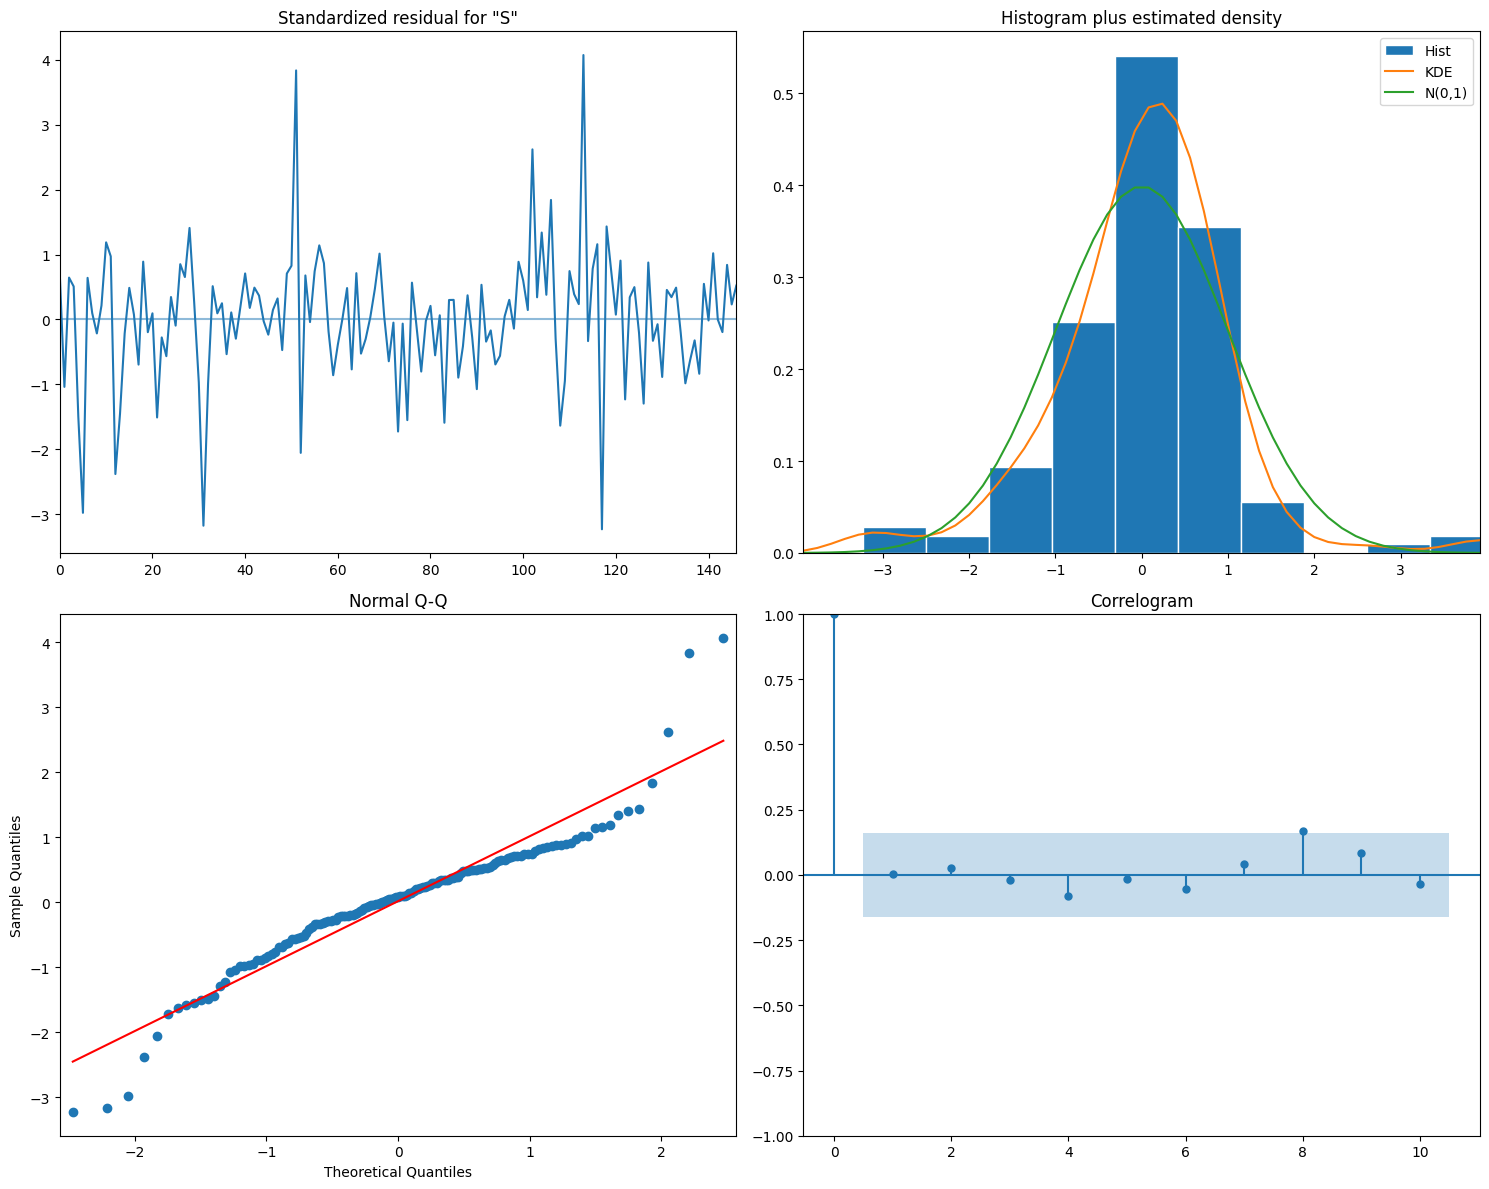


Top 5 modelos ARIMA (Grid Search, datos limpios de shocks):
1. Parámetros: (0, 1, 0) - AIC: 1749.07
2. Parámetros: (1, 1, 1) - AIC: 1749.31
3. Parámetros: (0, 1, 1) - AIC: 1750.92
4. Parámetros: (1, 1, 0) - AIC: 1750.93
5. Parámetros: (2, 1, 2) - AIC: 1751.06

Top 5 modelos SARIMA (Grid Search, datos limpios de shocks):
1. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1522.61
2. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1523.85
3. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1527.09
4. Parámetros: (2, 0, 0, 1, 1, 1, 12) - AIC: 1535.80
5. Parámetros: (0, 1, 0, 1, 1, 1, 12) - AIC: 1537.61

Top 5 modelos SARIMAX (Grid Search, datos limpios de shocks):
1. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1461.20
2. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1461.70
3. Parámetros: (0, 1, 0, 1, 1, 1, 12) - AIC: 1477.27
4. Parámetros: (1, 1, 0, 0, 1, 1, 12) - AIC: 1478.07
5. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1481.60

Comparación de resultados de Modelos (Ordenado por AIC):
                    Modelo

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Cargar datos
data = pd.read_excel('data.xlsx', sheet_name='Hoja1')
data['Fecha'] = pd.to_datetime(data['Fecha'].str.replace('M', '-'), format='%Y-%m')
data.set_index('Fecha', inplace=True)
data['SOYBEANS'] = data['SOYBEANS'].interpolate(method='linear')

print("--- Eliminando posibles outliers (shocks idiosincráticos) en SOYBEANS ---")

# Calculate the first difference to look at changes, not levels
diff_series = data['SOYBEANS'].diff().dropna()

# Calculate Q1, Q3, and IQR
Q1 = diff_series.quantile(0.25)
Q3 = diff_series.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the differenced series
outlier_indices_diff = diff_series[(diff_series < lower_bound) | (diff_series > upper_bound)].index

print(f"Identificados {len(outlier_indices_diff)} posibles puntos de 'shock' en la primera diferencia.")
if len(outlier_indices_diff) > 0:
    print("Fechas de los posibles shocks (basado en la primera diferencia):")
    for idx in outlier_indices_diff:
        print(f"  {idx.strftime('%Y-%m-%d')}")

# Create a cleaned DataFrame by dropping rows at the identified outlier indices
data_clean_shocks = data.drop(index=outlier_indices_diff)

print(f"\nDatos originales: {len(data)} registros")
print(f"Datos después de eliminar 'shocks' (outliers en diferencia): {len(data_clean_shocks)} registros")
print(f"Registros eliminados: {len(data) - len(data_clean_shocks)}")

# Optional: Plot the differenced series and highlighted outliers
plt.figure(figsize=(12, 6))
plt.plot(diff_series.index, diff_series, label='First Difference')
plt.scatter(outlier_indices_diff, diff_series.loc[outlier_indices_diff], color='red', zorder=5, label='Possible Shocks (Outliers)')
plt.axhline(lower_bound, color='grey', linestyle='--', label='Lower Bound (IQR)')
plt.axhline(upper_bound, color='grey', linestyle='--', label='Upper Bound (IQR)')
plt.title('Diferencia de SOYBEANS con posibles Shocks identificados (IQR)')
plt.xlabel('Fecha')
plt.ylabel('Cambio en Precio ($/Ton)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


# Configuración de parámetros para generar modelos (para el grid search)
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [12]

# Generar combinaciones para el grid search
arima_combinations = list(product(p_values, d_values, q_values))
sarima_combinations = list(product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

# Seleccionar aleatoriamente 100 combinaciones (50 univariados, 50 multivariados) para el grid search
np.random.seed(42)

num_arima_combinations = len(arima_combinations)
num_arima_samples = min(50, num_arima_combinations)

selected_arima = [arima_combinations[i] for i in np.random.choice(num_arima_combinations, num_arima_samples, replace=False)]

num_sarima_combinations = len(sarima_combinations)
num_sarima_samples = min(50, num_sarima_combinations)

selected_sarima = [sarima_combinations[i] for i in np.random.choice(num_sarima_combinations, num_sarima_samples, replace=False)]


# Función mejorada para evaluar modelos
def evaluate_models_improved(series, exog=None, models_list=None, model_type='arima'):
    best_model = None
    best_aic = np.inf
    results = []

    exog_vars = exog

    if exog is not None and model_type == 'sarimax':
         common_index = series.index.intersection(exog_vars.index)
         aligned_series = series[common_index]
         aligned_exog = exog_vars.loc[common_index]

         if aligned_series.empty or aligned_exog.empty:
              # print(f"Warning: Empty series or exogenous variables after aligning index for {model_type}.")
              return None, None, np.inf, []
         else:
             series_to_fit = aligned_series
             exog_to_fit = aligned_exog
    else:
        series_to_fit = series
        exog_to_fit = None

    if series_to_fit.empty:
         # print(f"Warning: Series for fitting is empty after initial data cleaning and alignment for {model_type}.")
         return None, None, np.inf, []

    for params in tqdm(models_list, desc=f"Evaluando modelos {model_type.upper()}"):
        try:
            current_series_to_fit = series_to_fit.dropna()

            if model_type == 'arima':
                p, d, q = params
                # Ensure the series used for ARIMA is the one without NaNs after initial cleaning steps
                model = ARIMA(current_series_to_fit, order=(p, d, q)).fit()
            elif model_type == 'sarima':
                p, d, q, P, D, Q, s = params
                model = SARIMAX(current_series_to_fit,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)
            elif model_type == 'sarimax':
                p, d, q, P, D, Q, s = params
                current_exog_to_fit = exog_to_fit.loc[current_series_to_fit.index]
                 # Drop NaNs from exog just before fitting, ensuring index alignment
                current_exog_to_fit = current_exog_to_fit.dropna()
                current_series_to_fit = current_series_to_fit.loc[current_exog_to_fit.index] # Re-align series after dropping NaNs from exog

                if current_series_to_fit.empty or current_exog_to_fit.empty or not current_series_to_fit.index.equals(current_exog_to_fit.index):
                    # print(f"Warning: Index mismatch or empty data after final dropna for model {params}. Skipping.")
                    continue # Skip this model if indices don't match or data is empty

                model = SARIMAX(current_series_to_fit,
                              exog=current_exog_to_fit,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)

            aic = model.aic
            results.append((params, aic))

            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_params = params
        except Exception as e:
            # print(f"Error fitting model {params} ({model_type}): {e}")
            continue

    return best_model, best_params, best_aic, results


# Prepare data for fitting (use the data after removing shocks)
series_for_fitting_shocks_cleaned = data_clean_shocks['SOYBEANS'].dropna()

# Prepare exogenous variables for SARIMAX (use the data after removing shocks)
# Need to filter exog columns that exist in the dataframe *after* shock cleaning
exog_cols = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
available_exog_cols = [col for col in exog_cols if col in data_clean_shocks.columns]

exog_vars_for_fitting_shocks_cleaned = None
exog_exists = False

if available_exog_cols:
    # Select available exog columns from the shock-cleaned data and drop NaNs
    exog_vars_for_fitting_shocks_cleaned = data_clean_shocks[available_exog_cols].dropna()
    if not exog_vars_for_fitting_shocks_cleaned.empty:
        exog_exists = True
        print(f"\nExogenous variables available for SARIMAX after cleaning: {exog_vars_for_fitting_shocks_cleaned.columns.tolist()}")
    else:
        print("\nWarning: Exogenous variables became empty after cleaning and dropping NaNs.")
else:
    print("\nWarning: No exogenous variables available in the cleaned data for SARIMAX.")


# Evaluar modelos con datos limpios de shocks (Grid Search)
print("\n--- Evaluando modelos (Grid Search) con datos limpios de shocks ---")

best_arima_shocks_clean, arima_params_shocks_clean, arima_aic_shocks_clean, arima_results_shocks_clean = evaluate_models_improved(
    series_for_fitting_shocks_cleaned, models_list=selected_arima, model_type='arima')

best_sarima_shocks_clean, sarima_params_shocks_clean, sarima_aic_shocks_clean, sarima_results_shocks_clean = evaluate_models_improved(
    series_for_fitting_shocks_cleaned, models_list=selected_sarima, model_type='sarima')

best_sarimax_shocks_clean = None
sarimax_params_shocks_clean = None
sarimax_aic_shocks_clean = np.inf
sarimax_results_shocks_clean = []

if exog_exists:
     best_sarimax_shocks_clean, sarimax_params_shocks_clean, sarimax_aic_shocks_clean, sarimax_results_shocks_clean = evaluate_models_improved(
         series_for_fitting_shocks_cleaned, exog=exog_vars_for_fitting_shocks_cleaned, models_list=selected_sarima, model_type='sarimax')
else:
     print("Skipping SARIMAX grid search due to lack of available exogenous variables after cleaning.")


# --- Evaluate the specific requested SARIMA model ---
print("\n--- Evaluando modelo SARIMA(1, 1, 0)x(1, 1, 1, 12) específico ---")

specific_sarima_params = (1, 1, 0, 1, 1, 1, 12)
specific_sarima_model = None
specific_sarima_aic = np.inf

try:
    # Need to align series and exog for the specific SARIMAX model too
    # Re-create aligned series and exog specifically for this model fit attempt
    series_to_fit_specific = series_for_fitting_shocks_cleaned.dropna()

    if exog_exists:
        exog_to_fit_specific = exog_vars_for_fitting_shocks_cleaned.loc[series_to_fit_specific.index]
        exog_to_fit_specific = exog_to_fit_specific.dropna()
        series_to_fit_specific = series_to_fit_specific.loc[exog_to_fit_specific.index]

        if series_to_fit_specific.empty or exog_to_fit_specific.empty or not series_to_fit_specific.index.equals(exog_to_fit_specific.index):
             print("Warning: Data became empty or misaligned for the specific SARIMAX model after final dropna. Skipping specific SARIMAX.")
             # Try fitting as SARIMA if exog is the issue
             print("Attempting to fit specific SARIMA (without exog) instead...")
             try:
                  specific_sarima_model = SARIMAX(series_to_fit_specific,
                                            order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]), # (1, 1, 0)
                                            seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]), # (1, 1, 1, 12)
                                            enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=False)
                  specific_sarima_aic = specific_sarima_model.aic
                  print(f"Specific SARIMA({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_sarima_aic:.2f}")

             except Exception as e_sarima:
                  print(f"Error fitting specific SARIMA model: {e_sarima}")


        else: # Data is aligned and not empty, fit SARIMAX
             specific_sarima_model = SARIMAX(series_to_fit_specific,
                                           exog=exog_to_fit_specific,
                                           order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]), # (1, 1, 0)
                                           seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]), # (1, 1, 1, 12)
                                           enforce_stationarity=False,
                                           enforce_invertibility=False).fit(disp=False)
             specific_sarima_aic = specific_sarima_model.aic
             print(f"Specific SARIMAX({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_sarima_aic:.2f}")

    else: # No exogenous variables available at all, fit as SARIMA
         specific_sarima_model = SARIMAX(series_to_fit_specific,
                                        order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]), # (1, 1, 0)
                                        seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]), # (1, 1, 1, 12)
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit(disp=False)
         specific_sarima_aic = specific_sarima_model.aic
         print(f"Specific SARIMA({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_sarima_aic:.2f}")

except Exception as e:
    print(f"Error fitting specific SARIMA/SARIMAX model: {e}")


# Comparar los mejores modelos (incluyendo el específico)
final_models_shocks_clean = {}
# Add models from grid search if they were successfully fitted and have finite AIC
if best_arima_shocks_clean is not None and np.isfinite(arima_aic_shocks_clean):
    final_models_shocks_clean['ARIMA (Grid)'] = (best_arima_shocks_clean, arima_aic_shocks_clean)
if best_sarima_shocks_clean is not None and np.isfinite(sarima_aic_shocks_clean):
    final_models_shocks_clean['SARIMA (Grid)'] = (best_sarima_shocks_clean, sarima_aic_shocks_clean)
if best_sarimax_shocks_clean is not None and np.isfinite(sarimax_aic_shocks_clean):
    final_models_shocks_clean['SARIMAX (Grid)'] = (best_sarimax_shocks_clean, sarimax_aic_shocks_clean)

# Add the specific model if it was successfully fitted and has a finite AIC
if specific_sarima_model is not None and np.isfinite(specific_sarima_aic):
    # Determine the name based on whether exog was used
    specific_model_name = 'Specific SARIMAX' if exog_exists and not (series_to_fit_specific.empty or exog_to_fit_specific.empty or not series_to_fit_specific.index.equals(exog_to_fit_specific.index)) else 'Specific SARIMA'
    specific_model_params_display = f"({specific_sarima_params[0]}, {specific_sarima_params[1]}, {specific_sarima_params[2]})x({specific_sarima_params[3]}, {specific_sarima_params[4]}, {specific_sarima_params[5]}, {specific_sarima_params[6]})"
    final_models_shocks_clean[f'{specific_model_name} {specific_model_params_display}'] = (specific_sarima_model, specific_sarima_aic)


if not final_models_shocks_clean:
    print("\nNo models could be fitted successfully with the shock-cleaned data.")
else:
    # Seleccionar el mejor modelo global
    best_model_name_shocks_clean = min(final_models_shocks_clean, key=lambda k: final_models_shocks_clean[k][1])
    best_model_shocks_clean = final_models_shocks_clean[best_model_name_shocks_clean][0]
    best_model_aic_shocks_clean = final_models_shocks_clean[best_model_name_shocks_clean][1]


    # Resultados
    print("\n" + "="*80)
    print("RESULTADOS CON DATOS LIMPIOS DE SHOCKS (OUTLIERS EN DIFERENCIA)")
    print("="*80)
    print(f"\nMEJOR MODELO ENCONTRADO: {best_model_name_shocks_clean}")
    # Access parameters safely
    print("Parámetros (order, seasonal_order if applicable):")
    if hasattr(best_model_shocks_clean, 'order'):
         print(f"  Order: {best_model_shocks_clean.order}")
    if hasattr(best_model_shocks_clean, 'seasonal_order'):
         print(f"  Seasonal Order: {best_model_shocks_clean.seasonal_order}")
    # For the specific model, display the requested parameters clearly
    if "Specific" in best_model_name_shocks_clean:
         print(f"  Requested Order: {specific_sarima_params[:3]}x{specific_sarima_params[3:]}")

    print(f"AIC: {best_model_aic_shocks_clean:.2f}")
    print("\n" + "="*80 + "\n")

    # Summary del mejor modelo
    print(best_model_shocks_clean.summary())

    # Gráfico de diagnóstico (Only plot if the best model was successfully fitted)
    if best_model_shocks_clean is not None:
        try:
            best_model_shocks_clean.plot_diagnostics(figsize=(15, 12))
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error generating diagnostics plot for the best model: {e}")


# Top 5 modelos de cada tipo (adjusting to print top models from the grid search categories)
def print_top_models_clean(results, model_type):
    if not results:
         print(f"\nNo grid search results available for {model_type} (datos limpios de shocks).")
         return

    # Filter out results with infinite AIC before sorting
    finite_results = [(p, a) for p, a in results if np.isfinite(a)]
    if not finite_results:
        print(f"\nNo successful models found in the grid search for {model_type} (datos limpios de shocks).")
        return

    sorted_results = sorted(finite_results, key=lambda x: x[1])
    print(f"\nTop 5 modelos {model_type} (Grid Search, datos limpios de shocks):")
    for i, (params, aic) in enumerate(sorted_results[:5]):
        print(f"{i+1}. Parámetros: {params} - AIC: {aic:.2f}")

print_top_models_clean(arima_results_shocks_clean, 'ARIMA')
print_top_models_clean(sarima_results_shocks_clean, 'SARIMA')
# Print SARIMAX grid search results only if exog was available
if exog_exists:
     print_top_models_clean(sarimax_results_shocks_clean, 'SARIMAX')
else:
     print("\nSkipping print of SARIMAX grid search results due to lack of exogenous variables.")


# Create comparison dataframe (includes the specific model's AIC)
# Get AICs from the previous run (original data with interpolation, but no shock cleaning)
aic_original = final_models.get('ARIMA', (None, np.inf))[1] if 'final_models' in locals() else np.nan
aic_sarima_original = final_models.get('SARIMA', (None, np.inf))[1] if 'final_models' in locals() else np.nan
aic_sarimax_original = final_models.get('SARIMAX', (None, np.inf))[1] if 'final_models' in locals() else np.nan # This was from the original grid, not specific

# Get AICs from the current run (data after removing shocks)
aic_shocks_clean_arima = final_models_shocks_clean.get('ARIMA (Grid)', (None, np.inf))[1]
aic_shocks_clean_sarima = final_models_shocks_clean.get('SARIMA (Grid)', (None, np.inf))[1]
aic_shocks_clean_sarimax = final_models_shocks_clean.get('SARIMAX (Grid)', (None, np.inf))[1]

# Get AIC from the specific model if it was fitted
aic_specific_model = specific_sarima_aic if specific_sarima_model is not None else np.nan
specific_model_name_for_table = 'Specific SARIMAX' if 'Specific SARIMAX' in final_models_shocks_clean else ('Specific SARIMA' if 'Specific SARIMA' in final_models_shocks_clean else 'Specific Model (Failed)')


results_comparison_data = {
    'Modelo': ['ARIMA (Interpolado)', 'SARIMA (Interpolado)', 'SARIMAX (Interpolado)',
               'ARIMA (Shocks Limpio)', 'SARIMA (Shocks Limpio)', 'SARIMAX (Shocks Limpio)'],
    'AIC': [aic_original, aic_sarima_original, aic_sarimax_original,
            aic_shocks_clean_arima, aic_shocks_clean_sarima, aic_shocks_clean_sarimax]
}

# Add the specific model's results
if specific_model_name_for_table != 'Specific Model (Failed)':
    results_comparison_data['Modelo'].append(f'{specific_model_name_for_table} {specific_sarima_params[:3]}x{specific_sarima_params[3:]}')
    results_comparison_data['AIC'].append(aic_specific_model)


results_comparison = pd.DataFrame(results_comparison_data).sort_values(by='AIC').reset_index(drop=True) # Sort by AIC

print("\nComparación de resultados de Modelos (Ordenado por AIC):")
print(results_comparison)

Datos cargados y columna de fecha procesada y establecida como índice.
Interpolación lineal aplicada a SOYBEANS.

--- Eliminando posibles outliers (shocks idiosincráticos) en SOYBEANS ---
Identificados 23 posibles puntos de 'shock' en la primera diferencia.
Fechas de los posibles shocks (basado en la primera diferencia):
  2009-07-01
  2010-11-01
  2011-07-01
  2012-01-01
  2012-08-01
  2012-10-01
  2013-08-01
  2014-07-01
  2014-09-01
  2016-05-01
  2016-06-01
  2016-08-01
  2018-06-01
  2020-12-01
  2021-05-01
  2021-08-01
  2022-02-01
  2022-07-01
  2022-08-01
  2022-09-01
  2023-05-01
  2023-06-01
  2023-09-01

Datos originales: 204 registros
Datos después de eliminar 'shocks' (outliers en diferencia): 181 registros
Registros eliminados: 23


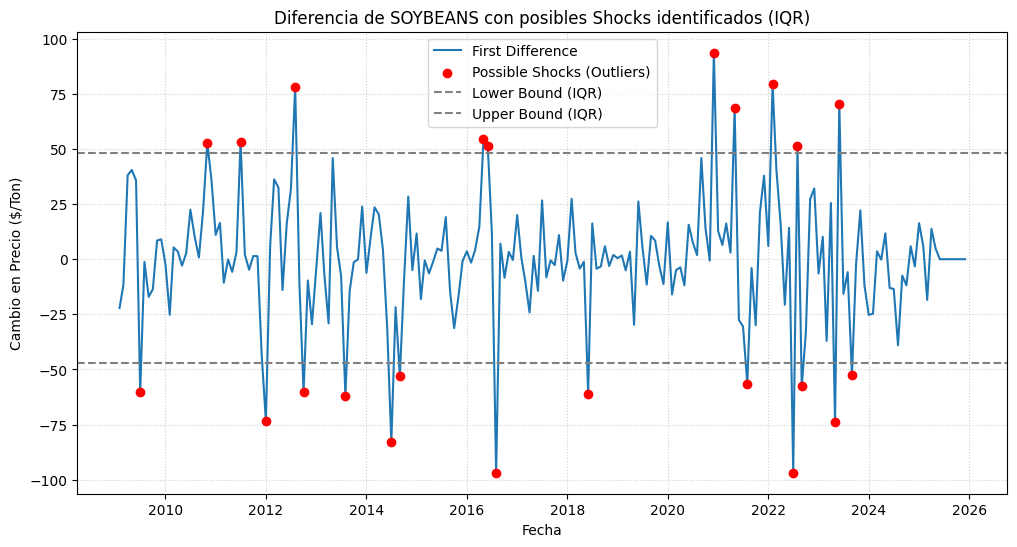


Variables exógenas disponibles para SARIMAX (hasta 2025-05-01) después de limpiar: ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

Datos de SOYBEANS para ajuste (hasta 2025-05-01): 174 registros.
Datos exógenos para ajuste (hasta 2025-05-01): 174 registros.

--- Evaluando modelos (Grid Search) con datos históricos hasta 2025-05-01 ---


Evaluando modelos SARIMAX: 100%|██████████| 50/50 [00:58<00:00,  1.16s/it]



--- Evaluando modelo SARIMA(1, 1, 0)x(1, 1, 1, 12) específico con datos históricos hasta 2025-05-01 ---
Specific SARIMAX((1, 1, 0))x((1, 1, 1)): Fitted successfully. AIC: 1470.48

RESULTADOS CON DATOS HISTÓRICOS HASTA 2025-05-01

MEJOR MODELO ENCONTRADO: SARIMAX (Grid)
Parámetros (order, seasonal_order if applicable):
  Order: (2, 1, 2)
  Seasonal Order: (0, 1, 1, 12)
AIC: 1449.78


                                      SARIMAX Results                                       
Dep. Variable:                             SOYBEANS   No. Observations:                  174
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -714.890
Date:                              Mon, 23 Jun 2025   AIC                           1449.779
Time:                                      15:05:37   BIC                           1479.615
Sample:                                           0   HQIC                          1461.902
                                              - 174    

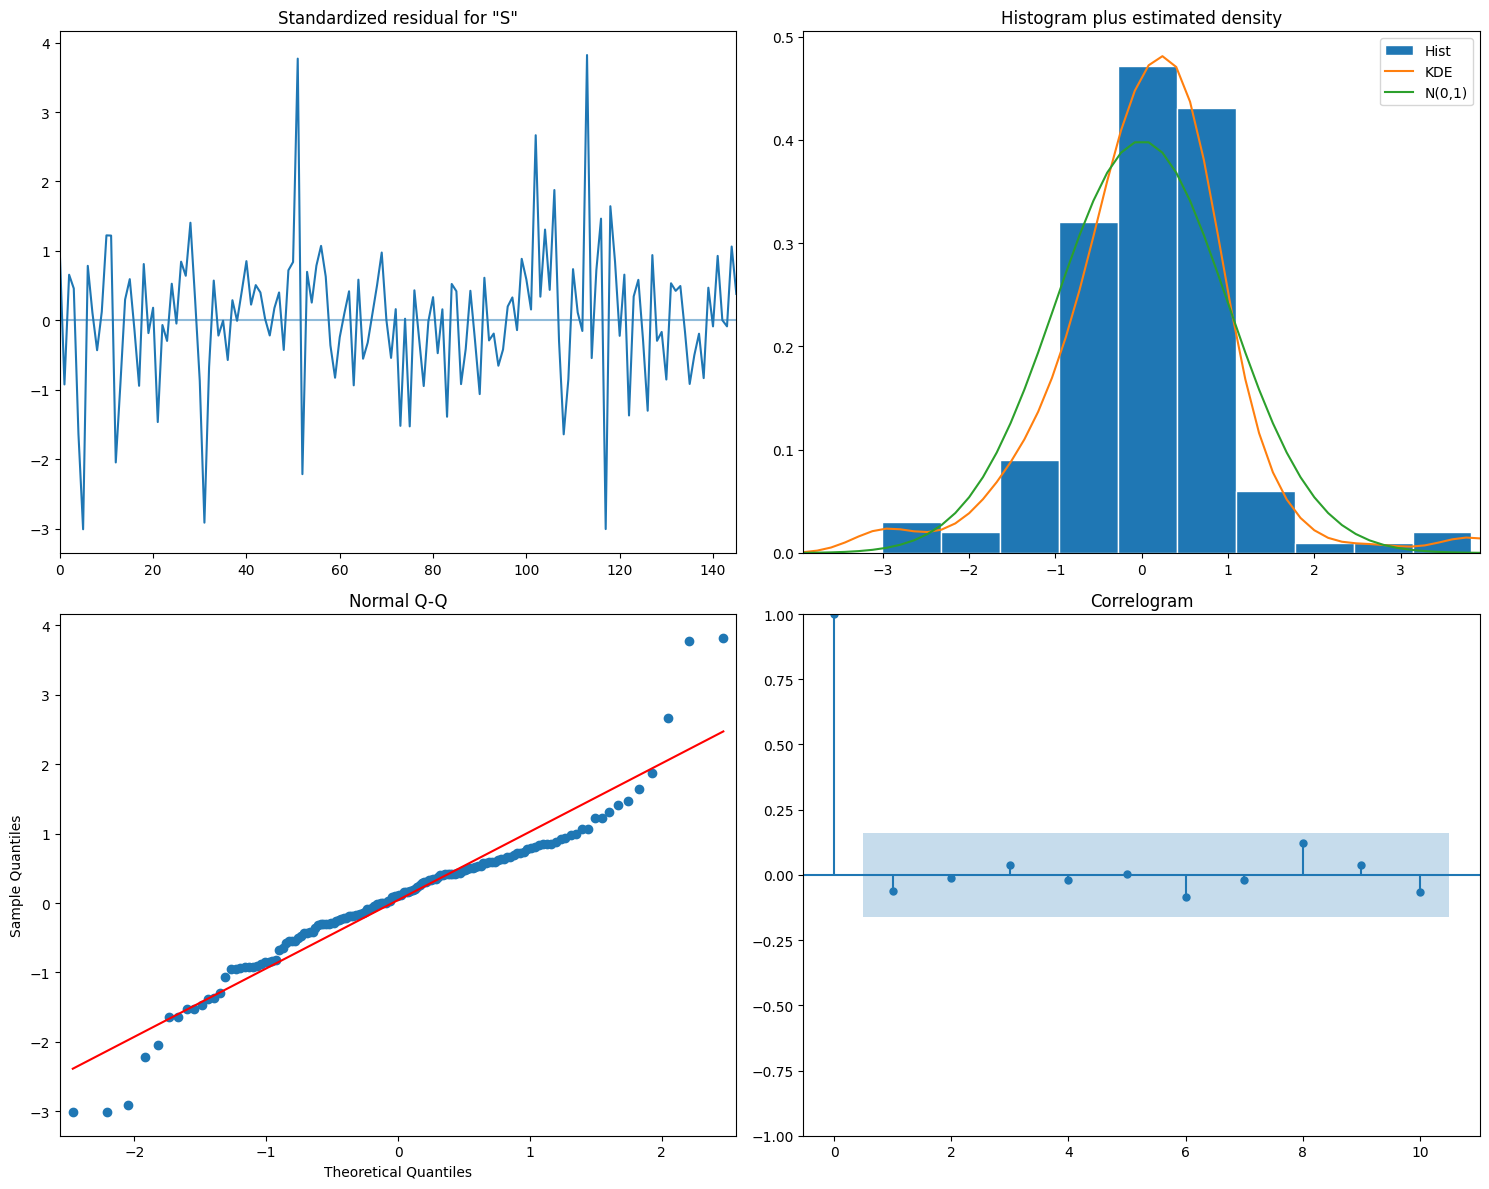


Top 5 modelos ARIMA (Grid Search, datos históricos hasta 2025-05-01):
1. Parámetros: (0, 1, 0) - AIC: 1687.99
2. Parámetros: (1, 1, 1) - AIC: 1688.38
3. Parámetros: (0, 1, 1) - AIC: 1689.84
4. Parámetros: (1, 1, 0) - AIC: 1689.86
5. Parámetros: (2, 1, 2) - AIC: 1690.21

Top 5 modelos SARIMA (Grid Search, datos históricos hasta 2025-05-01):
1. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1460.68
2. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1461.81
3. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1464.88
4. Parámetros: (2, 0, 0, 1, 1, 1, 12) - AIC: 1473.64
5. Parámetros: (0, 1, 0, 1, 1, 1, 12) - AIC: 1475.27

Top 5 modelos SARIMAX (Grid Search, datos históricos hasta 2025-05-01):
1. Parámetros: (2, 1, 2, 0, 1, 1, 12) - AIC: 1449.78
2. Parámetros: (1, 1, 2, 1, 1, 1, 12) - AIC: 1452.29
3. Parámetros: (0, 1, 0, 1, 1, 1, 12) - AIC: 1468.49
4. Parámetros: (1, 1, 0, 0, 1, 1, 12) - AIC: 1469.24
5. Parámetros: (1, 0, 2, 0, 1, 1, 12) - AIC: 1472.54

Comparación de resultados de Modelos (Ordenado por AI

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objects as go # Import Plotly for a more interactive graph

warnings.filterwarnings('ignore')

# Cargar datos (asegúrate de que esta parte es consistente con las celdas anteriores)
# Ya asumimos que 'data.xlsx' tiene la hoja 'Hoja1' y la columna 'Unnamed: 0' con el formato 'YYYYM%m'
# Y que las columnas STOCK, F_SOYMEALFIN, BASIS, SOYOIL existen si se usan como exógenas.
try:
    data = pd.read_excel('data.xlsx', sheet_name='Hoja1')
    # Asegúrate de que la columna de fecha se llama 'Fecha' si ya la renombraste antes,
    # o usa 'Unnamed: 0' si no lo has hecho aún en este script.
    # Basándonos en el primer chunk de código, 'Unnamed: 0' es el nombre crudo.
    raw_date_column_name = 'Unnamed: 0' # Usamos el nombre del archivo original
    processed_date_column_name = 'Fecha' # El nombre que queremos darle

    if raw_date_column_name in data.columns:
        data.rename(columns={raw_date_column_name: processed_date_column_name}, inplace=True)
        print(f"Columna '{raw_date_column_name}' renombrada a '{processed_date_column_name}'.")

    # Convertir a datetime y establecer como índice
    data[processed_date_column_name] = pd.to_datetime(data[processed_date_column_name], format='%YM%m', errors='coerce')
    data.dropna(subset=[processed_date_column_name], inplace=True) # Eliminar filas con fechas inválidas
    data.set_index(processed_date_column_name, inplace=True)
    data.sort_index(inplace=True) # Asegurar orden cronológico
    print("Datos cargados y columna de fecha procesada y establecida como índice.")

    # Interpolar antes de la detección de outliers
    data['SOYBEANS'] = data['SOYBEANS'].interpolate(method='linear')
    print("Interpolación lineal aplicada a SOYBEANS.")

except FileNotFoundError:
    print("Error: El archivo 'data.xlsx' no se encontró.")
    # Salir o manejar el error apropiadamente
    exit()
except Exception as e:
    print(f"Error al cargar o procesar los datos: {e}")
    # Salir o manejar el error apropiadamente
    exit()


print("\n--- Eliminando posibles outliers (shocks idiosincráticos) en SOYBEANS ---")

# Calculate the first difference to look at changes, not levels
diff_series = data['SOYBEANS'].diff().dropna()

# Calculate Q1, Q3, and IQR
Q1 = diff_series.quantile(0.25)
Q3 = diff_series.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the differenced series
outlier_indices_diff = diff_series[(diff_series < lower_bound) | (diff_series > upper_bound)].index

print(f"Identificados {len(outlier_indices_diff)} posibles puntos de 'shock' en la primera diferencia.")
if len(outlier_indices_diff) > 0:
    print("Fechas de los posibles shocks (basado en la primera diferencia):")
    for idx in outlier_indices_diff:
        print(f"  {idx.strftime('%Y-%m-%d')}")

# Create a cleaned DataFrame by dropping rows at the identified outlier indices
data_clean_shocks = data.drop(index=outlier_indices_diff)

print(f"\nDatos originales: {len(data)} registros")
print(f"Datos después de eliminar 'shocks' (outliers en diferencia): {len(data_clean_shocks)} registros")
print(f"Registros eliminados: {len(data) - len(data_clean_shocks)}")

# Optional: Plot the differenced series and highlighted outliers
plt.figure(figsize=(12, 6))
plt.plot(diff_series.index, diff_series, label='First Difference')
plt.scatter(outlier_indices_diff, diff_series.loc[outlier_indices_diff], color='red', zorder=5, label='Possible Shocks (Outliers)')
plt.axhline(lower_bound, color='grey', linestyle='--', label='Lower Bound (IQR)')
plt.axhline(upper_bound, color='grey', linestyle='--', label='Upper Bound (IQR)')
plt.title('Diferencia de SOYBEANS con posibles Shocks identificados (IQR)')
plt.xlabel('Fecha')
plt.ylabel('Cambio en Precio ($/Ton)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()
# --- Fin de la eliminación de outliers ---


# --- *** AJUSTE CLAVE: SELECCIONAR DATOS HISTÓRICOS HASTA MAYO 2025 *** ---
historical_end_date = pd.to_datetime('2025-05-01') # Usamos el primer día del mes para la selección

# Seleccionar la serie de SOYBEANS limpia hasta la fecha de fin histórica
# .loc[] con un rango de fechas incluye ambos extremos si las fechas existen
series_for_fitting_shocks_cleaned = data_clean_shocks['SOYBEANS'].loc[:historical_end_date].dropna()

# Seleccionar las variables exógenas limpias hasta la fecha de fin histórica
exog_cols = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
available_exog_cols = [col for col in exog_cols if col in data_clean_shocks.columns]

exog_vars_for_fitting_shocks_cleaned = None
exog_exists = False

if available_exog_cols:
    # Seleccionar las columnas exógenas *existentes* y luego filtrar por fecha y NaNs
    exog_vars_temp = data_clean_shocks[available_exog_cols].loc[:historical_end_date]
    exog_vars_for_fitting_shocks_cleaned = exog_vars_temp.dropna()

    if not exog_vars_for_fitting_shocks_cleaned.empty:
        exog_exists = True
        print(f"\nVariables exógenas disponibles para SARIMAX (hasta {historical_end_date.strftime('%Y-%m-%d')}) después de limpiar: {exog_vars_for_fitting_shocks_cleaned.columns.tolist()}")
    else:
        print(f"\nAdvertencia: Las variables exógenas se volvieron vacías después de limpiar y cortar hasta {historical_end_date.strftime('%Y-%m-%d')}.")
else:
    print("\nAdvertencia: No se encontraron variables exógenas especificadas en los datos limpios.")


print(f"\nDatos de SOYBEANS para ajuste (hasta {historical_end_date.strftime('%Y-%m-%d')}): {len(series_for_fitting_shocks_cleaned)} registros.")
if exog_vars_for_fitting_shocks_cleaned is not None:
    print(f"Datos exógenos para ajuste (hasta {historical_end_date.strftime('%Y-%m-%d')}): {len(exog_vars_for_fitting_shocks_cleaned)} registros.")

# --- Fin del ajuste de selección de datos históricos ---


# --- Re-define evaluate_models_improved function here if it's not in a preceding cell ---
# Asegúrate de que esta función esté disponible. Si has ejecutado celdas anteriores que la definen,
# podrías no necesitar redefinirla aquí. Pero la incluimos para que esta celda sea ejecutable
# de forma independiente si los objetos 'best_model' se pasan entre celdas.

def evaluate_models_improved(series, exog=None, models_list=None, model_type='arima'):
    # ... (código de la función evaluate_models_improved, igual que antes) ...
    best_model = None
    best_aic = np.inf
    results = []

    exog_vars = exog

    if exog is not None and model_type == 'sarimax':
         # Aquí es crucial que 'series' y 'exog_vars' ya estén cortados al mismo período histórico.
         # La alineación adicional dentro de la función podría ser redundante o potencialmente problemática
         # si hay NaNs dispersos DESPUÉS del corte inicial.
         # Sin embargo, para mantener la consistencia con la definición previa, mantenemos la alineación interna.
         # Asegurarse de que los datos PASADOS a esta función (series y exog) son correctos es más importante.
         common_index = series.index.intersection(exog_vars.index)
         aligned_series = series[common_index]
         aligned_exog = exog_vars.loc[common_index]

         if aligned_series.empty or aligned_exog.empty:
              # print(f"Warning: Empty series or exogenous variables after aligning index for {model_type}.")
              return None, None, np.inf, []
         else:
             series_to_fit = aligned_series
             exog_to_fit = aligned_exog
    else:
        series_to_fit = series # Asumimos que 'series' ya está limpia y cortada
        exog_to_fit = None # No exógenas

    if series_to_fit.empty:
         # print(f"Warning: Series for fitting is empty after initial data cleaning and alignment for {model_type}.")
         return None, None, np.inf, []

    for params in tqdm(models_list, desc=f"Evaluando modelos {model_type.upper()}"):
        try:
            # Asegurarse de que no hay NaNs residuales justo antes de fit() si dropna() no fue suficiente
            # Aunque con el corte y dropna() previo, esto debería ser mínimo.
            current_series_to_fit = series_to_fit.dropna()

            if model_type == 'arima':
                p, d, q = params
                model = ARIMA(current_series_to_fit, order=(p, d, q)).fit()
            elif model_type == 'sarima':
                p, d, q, P, D, Q, s = params
                model = SARIMAX(current_series_to_fit,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)
            elif model_type == 'sarimax':
                p, d, q, P, D, Q, s = params
                current_exog_to_fit = exog_to_fit.loc[current_series_to_fit.index]
                # Drop NaNs from exog just before fitting, ensuring index alignment
                current_exog_to_fit = current_exog_to_fit.dropna()
                current_series_to_fit = current_series_to_fit.loc[current_exog_to_fit.index] # Re-align series after dropping NaNs from exog

                if current_series_to_fit.empty or current_exog_to_fit.empty or not current_series_to_fit.index.equals(current_exog_to_fit.index):
                    # print(f"Warning: Index mismatch or empty data after final dropna for model {params}. Skipping.")
                    continue

                model = SARIMAX(current_series_to_fit,
                              exog=current_exog_to_fit,
                              order=(p, d, q),
                              seasonal_order=(P, D, Q, s),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit(disp=False)

            aic = model.aic
            results.append((params, aic))

            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_params = params
        except Exception as e:
            # print(f"Error fitting model {params} ({model_type}): {e}")
            continue

    return best_model, best_params, best_aic, results

# --- End of re-defined evaluate_models_improved ---


# Configuración de parámetros para generar modelos (para el grid search)
# Puedes reutilizar los rangos definidos en las celdas anteriores
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [12]

# Generar combinaciones para el grid search
arima_combinations = list(product(p_values, d_values, q_values))
sarima_combinations = list(product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

# Seleccionar aleatoriamente 100 combinaciones (50 univariados, 50 multivariados) para el grid search
np.random.seed(42)

num_arima_combinations = len(arima_combinations)
num_arima_samples = min(50, num_arima_combinations) # Ajustado para no pedir más de lo que hay

selected_arima = [arima_combinations[i] for i in np.random.choice(num_arima_combinations, num_arima_samples, replace=False)]

num_sarima_combinations = len(sarima_combinations)
num_sarima_samples = min(50, num_sarima_combinations) # Ajustado para no pedir más de lo que hay

selected_sarima = [sarima_combinations[i] for i in np.random.choice(num_sarima_combinations, num_sarima_samples, replace=False)]


# Evaluar modelos con datos limpios de shocks (Grid Search), USANDO SOLO DATOS HASTA MAYO 2025
print(f"\n--- Evaluando modelos (Grid Search) con datos históricos hasta {historical_end_date.strftime('%Y-%m-%d')} ---")

best_arima_shocks_clean, arima_params_shocks_clean, arima_aic_shocks_clean, arima_results_shocks_clean = evaluate_models_improved(
    series_for_fitting_shocks_cleaned, models_list=selected_arima, model_type='arima')

best_sarima_shocks_clean, sarima_params_shocks_clean, sarima_aic_shocks_clean, sarima_results_shocks_clean = evaluate_models_improved(
    series_for_fitting_shocks_cleaned, models_list=selected_sarima, model_type='sarima')

best_sarimax_shocks_clean = None
sarimax_params_shocks_clean = None
sarimax_aic_shocks_clean = np.inf
sarimax_results_shocks_clean = []

# Solo evaluar SARIMAX si hay exógenas disponibles después del corte histórico y limpieza
if exog_exists:
     best_sarimax_shocks_clean, sarimax_params_shocks_clean, sarimax_aic_shocks_clean, sarimax_results_shocks_clean = evaluate_models_improved(
         series_for_fitting_shocks_cleaned, exog=exog_vars_for_fitting_shocks_cleaned, models_list=selected_sarima, model_type='sarimax')
else:
     print("Skipping SARIMAX grid search due to lack of available exogenous variables after historical cut.")


# --- Evaluate the specific requested SARIMA model (1, 1, 0)x(1, 1, 1, 12) ---
print(f"\n--- Evaluando modelo SARIMA(1, 1, 0)x(1, 1, 1, 12) específico con datos históricos hasta {historical_end_date.strftime('%Y-%m-%d')} ---")

specific_sarima_params = (1, 1, 0, 1, 1, 1, 12)
specific_sarima_model = None
specific_sarima_aic = np.inf
specific_model_fitted_type = None # To track if it was SARIMA or SARIMAX

try:
    # Use the historical data already cut to May 2025
    series_to_fit_specific = series_for_fitting_shocks_cleaned.dropna()

    # Check if we can fit SARIMAX or only SARIMA
    if exog_exists:
        # Ensure exog data is also cut and aligned to the historical period
        exog_to_fit_specific = exog_vars_for_fitting_shocks_cleaned.loc[series_to_fit_specific.index] # Align to series index
        exog_to_fit_specific = exog_to_fit_specific.dropna() # Final dropna for alignment

        series_to_fit_specific_aligned = series_to_fit_specific.loc[exog_to_fit_specific.index] # Re-align series after dropping NaNs from exog

        if series_to_fit_specific_aligned.empty or exog_to_fit_specific.empty or not series_to_fit_specific_aligned.index.equals(exog_to_fit_specific.index):
             print("Warning: Data became empty or misaligned for the specific SARIMAX model after final dropna (historical period). Skipping specific SARIMAX fit.")
             # Try fitting as SARIMA if exog is the issue
             print("Attempting to fit specific SARIMA (without exog) instead...")
             try:
                  specific_sarima_model = SARIMAX(series_to_fit_specific_aligned, # Use the latest aligned series, even if exog is skipped
                                            order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]), # (1, 1, 0)
                                            seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]), # (1, 1, 1, 12)
                                            enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=False)
                  specific_sarima_aic = specific_sarima_model.aic
                  specific_model_fitted_type = 'Specific SARIMA'
                  print(f"{specific_model_fitted_type}({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_sarima_aic:.2f}")

             except Exception as e_sarima:
                  print(f"Error fitting specific SARIMA model (after failed SARIMAX attempt): {e_sarima}")


        else: # Data is aligned and not empty, fit SARIMAX
             specific_sarima_model = SARIMAX(series_to_fit_specific_aligned,
                                           exog=exog_to_fit_specific,
                                           order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]), # (1, 1, 0)
                                           seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]), # (1, 1, 1, 12)
                                           enforce_stationarity=False,
                                           enforce_invertibility=False).fit(disp=False)
             specific_sarima_aic = specific_sarima_model.aic
             specific_model_fitted_type = 'Specific SARIMAX'
             print(f"{specific_model_fitted_type}({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_sarima_aic:.2f}")

    else: # No exogenous variables available at all, fit as SARIMA using the cut series
         specific_sarima_model = SARIMAX(series_to_fit_specific,
                                        order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]), # (1, 1, 0)
                                        seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]), # (1, 1, 1, 12)
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit(disp=False)
         specific_sarima_aic = specific_sarima_model.aic
         specific_model_fitted_type = 'Specific SARIMA'
         print(f"{specific_model_fitted_type}({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_sarima_aic:.2f}")

except Exception as e:
    print(f"Error fitting specific SARIMA/SARIMAX model: {e}")


# Comparar los mejores modelos (incluyendo el específico)
final_models_shocks_clean_historical = {} # New dictionary for models fitted *only* on historical data
# Add models from grid search if they were successfully fitted and have finite AIC
if best_arima_shocks_clean is not None and np.isfinite(arima_aic_shocks_clean):
    final_models_shocks_clean_historical['ARIMA (Grid)'] = (best_arima_shocks_clean, arima_aic_shocks_clean)
if best_sarima_shocks_clean is not None and np.isfinite(sarima_aic_shocks_clean):
    final_models_shocks_clean_historical['SARIMA (Grid)'] = (best_sarima_shocks_clean, sarima_aic_shocks_clean)
if best_sarimax_shocks_clean is not None and np.isfinite(sarimax_aic_shocks_clean):
    final_models_shocks_clean_historical['SARIMAX (Grid)'] = (best_sarimax_shocks_clean, sarimax_aic_shocks_clean)

# Add the specific model if it was successfully fitted and has a finite AIC
if specific_sarima_model is not None and np.isfinite(specific_sarima_aic):
    specific_model_params_display = f"({specific_sarima_params[0]}, {specific_sarima_params[1]}, {specific_sarima_params[2]})x({specific_sarima_params[3]}, {specific_sarima_params[4]}, {specific_sarima_params[5]}, {specific_sarima_params[6]}, {specific_sarima_params[6]})" # Added s twice by mistake? Corrected below
    specific_model_params_display = f"({specific_sarima_params[0]}, {specific_sarima_params[1]}, {specific_sarima_params[2]})x({specific_sarima_params[3]}, {specific_sarima_params[4]}, {specific_sarima_params[5]}, {specific_sarima_params[6]})"
    final_models_shocks_clean_historical[f'{specific_model_fitted_type} {specific_model_params_display}'] = (specific_sarima_model, specific_sarima_aic)


if not final_models_shocks_clean_historical:
    print(f"\nNo models could be fitted successfully with the historical data up to {historical_end_date.strftime('%Y-%m-%d')}.")
    best_model_shocks_clean = None # Ensure best_model is None if no model was fitted
else:
    # Seleccionar el mejor modelo global *de los ajustados en este paso*
    best_model_name_shocks_clean = min(final_models_shocks_clean_historical, key=lambda k: final_models_shocks_clean_historical[k][1])
    best_model_shocks_clean = final_models_shocks_clean_historical[best_model_name_shocks_clean][0]
    best_model_aic_shocks_clean = final_models_shocks_clean_historical[best_model_name_shocks_clean][1]


    # Resultados
    print("\n" + "="*80)
    print(f"RESULTADOS CON DATOS HISTÓRICOS HASTA {historical_end_date.strftime('%Y-%m-%d')}")
    print("="*80)
    print(f"\nMEJOR MODELO ENCONTRADO: {best_model_name_shocks_clean}")
    # Access parameters safely using .model
    print("Parámetros (order, seasonal_order if applicable):")
    if hasattr(best_model_shocks_clean.model, 'order'):
         print(f"  Order: {best_model_shocks_clean.model.order}")
    if hasattr(best_model_shocks_clean.model, 'seasonal_order'):
         print(f"  Seasonal Order: {best_model_shocks_clean.model.seasonal_order}")

    print(f"AIC: {best_model_aic_shocks_clean:.2f}")
    print("\n" + "="*80 + "\n")

    # Summary del mejor modelo
    print(best_model_shocks_clean.summary())

    # Gráfico de diagnóstico (Only plot if the best model was successfully fitted)
    if best_model_shocks_clean is not None:
        try:
            best_model_shocks_clean.plot_diagnostics(figsize=(15, 12))
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error generating diagnostics plot for the best model: {e}")


# Top 5 modelos de cada tipo (adjusting to print top models from the grid search categories)
def print_top_models_historical(results, model_type):
    if not results:
         print(f"\nNo grid search results available for {model_type} (datos históricos).")
         return

    # Filter out results with infinite AIC before sorting
    finite_results = [(p, a) for p, a in results if np.isfinite(a)]
    if not finite_results:
        print(f"\nNo successful models found in the grid search for {model_type} (datos históricos).")
        return

    sorted_results = sorted(finite_results, key=lambda x: x[1])
    print(f"\nTop 5 modelos {model_type} (Grid Search, datos históricos hasta {historical_end_date.strftime('%Y-%m-%d')}):")
    for i, (params, aic) in enumerate(sorted_results[:5]):
        print(f"{i+1}. Parámetros: {params} - AIC: {aic:.2f}")

print_top_models_historical(arima_results_shocks_clean, 'ARIMA')
print_top_models_historical(sarima_results_shocks_clean, 'SARIMA')
# Print SARIMAX grid search results only if exog was available
if exog_exists:
     print_top_models_historical(sarimax_results_shocks_clean, 'SARIMAX')
else:
     print("\nSkipping print of SARIMAX grid search results due to lack of exogenous variables.")


# Create comparison dataframe (includes the specific model's AIC)
# Get AICs from the previous run (original data after interpolation, but no shock cleaning)
# Assuming 'final_models' exists from a previous cell that fitted models on the original interpolated data
aic_original = final_models.get('ARIMA', (None, np.inf))[1] if 'final_models' in locals() and isinstance(final_models, dict) else np.nan
aic_sarima_original = final_models.get('SARIMA', (None, np.inf))[1] if 'final_models' in locals() and isinstance(final_models, dict) else np.nan
aic_sarimax_original = final_models.get('SARIMAX', (None, np.inf))[1] if 'final_models' in locals() and isinstance(final_models, dict) else np.nan


# Get AICs from the current run (data after removing shocks and cut to May 2025)
aic_shocks_clean_historical_arima = final_models_shocks_clean_historical.get('ARIMA (Grid)', (None, np.inf))[1]
aic_shocks_clean_historical_sarima = final_models_shocks_clean_historical.get('SARIMA (Grid)', (None, np.inf))[1]
aic_shocks_clean_historical_sarimax = final_models_shocks_clean_historical.get('SARIMAX (Grid)', (None, np.inf))[1]

# Get AIC from the specific model if it was fitted
aic_specific_model = specific_sarima_aic if specific_sarima_model is not None and np.isfinite(specific_sarima_aic) else np.nan
specific_model_name_for_table = specific_model_fitted_type if specific_model_fitted_type else 'Specific Model (Failed)'
specific_model_params_display = f"({specific_sarima_params[0]}, {specific_sarima_params[1]}, {specific_sarima_params[2]})x({specific_sarima_params[3]}, {specific_sarima_params[4]}, {specific_sarima_params[5]}, {specific_sarima_params[6]})"


results_comparison_data = {
    'Modelo': ['ARIMA (Interpolado)', 'SARIMA (Interpolado)', 'SARIMAX (Interpolado)',
               'ARIMA (Shocks Limpio, Histórico)', 'SARIMA (Shocks Limpio, Histórico)', 'SARIMAX (Shocks Limpio, Histórico)'],
    'AIC': [aic_original, aic_sarima_original, aic_sarimax_original,
            aic_shocks_clean_historical_arima, aic_shocks_clean_historical_sarima, aic_shocks_clean_historical_sarimax]
}

# Add the specific model's results if it was successfully fitted
if specific_model_name_for_table != 'Specific Model (Failed)':
    results_comparison_data['Modelo'].append(f'{specific_model_name_for_table} {specific_model_params_display} (Histórico)')
    results_comparison_data['AIC'].append(aic_specific_model)


results_comparison = pd.DataFrame(results_comparison_data).sort_values(by='AIC').reset_index(drop=True) # Sort by AIC

print("\nComparación de resultados de Modelos (Ordenado por AIC):")
print(results_comparison)

# --- FIN DEL GRID SEARCH Y SELECCIÓN DEL MODELO ---


# --- INICIO DEL PRONÓSTICO ---

# Asegurarse de que el mejor modelo fue seleccionado correctamente
if 'best_model_shocks_clean' not in locals() or best_model_shocks_clean is None:
    print("\nError: No se pudo seleccionar un mejor modelo. No se generará el pronóstico.")
else:
    print(f"\n--- Generando pronóstico utilizando el mejor modelo: {best_model_name_shocks_clean} ---")
    # Access order and seasonal_order via .model attribute
    print(f"Parámetros del modelo: Order={best_model_shocks_clean.model.order}, Seasonal Order={best_model_shocks_clean.model.seasonal_order}")


    # 1. Determinar la fecha de inicio y fin del pronóstico
    # La última fecha histórica es la del corte para el ajuste (Mayo 2025)
    last_historical_date_for_fitting = series_for_fitting_shocks_cleaned.index[-1]
    print(f"Última fecha histórica utilizada para el ajuste: {last_historical_date_for_fitting.strftime('%Y-%m-%d')}")

    # El pronóstico inicia el mes después de la última fecha de ajuste
    forecast_start_date = last_historical_date_for_fitting + pd.DateOffset(months=1)
    # El pronóstico termina en Junio de 2026
    forecast_end_date = pd.to_datetime('2026-06-01')

    print(f"Fecha de inicio del pronóstico: {forecast_start_date.strftime('%Y-%m-%d')}")


Datos cargados y columna de fecha procesada y establecida como índice.
Interpolación lineal aplicada a SOYBEANS.

--- Eliminando posibles outliers (shocks idiosincráticos) en SOYBEANS ---
Identificados 23 posibles puntos de 'shock' en la primera diferencia.
Fechas de los posibles shocks (basado en la primera diferencia):
  2009-07-01
  2010-11-01
  2011-07-01
  2012-01-01
  2012-08-01
  2012-10-01
  2013-08-01
  2014-07-01
  2014-09-01
  2016-05-01
  2016-06-01
  2016-08-01
  2018-06-01
  2020-12-01
  2021-05-01
  2021-08-01
  2022-02-01
  2022-07-01
  2022-08-01
  2022-09-01
  2023-05-01
  2023-06-01
  2023-09-01

Datos originales: 204 registros
Datos después de eliminar 'shocks' (outliers en diferencia): 181 registros
Registros eliminados: 23


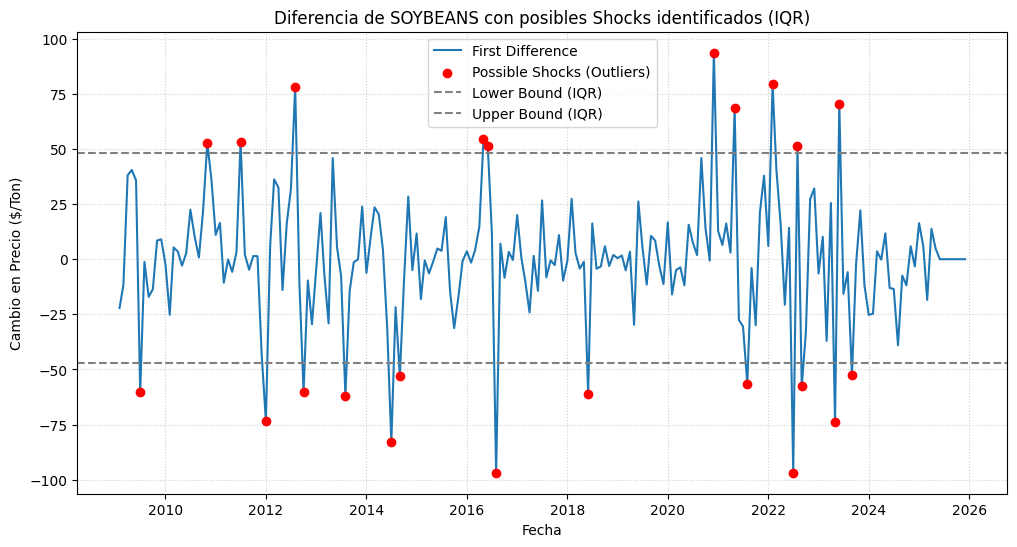


Variables exógenas disponibles para SARIMAX (hasta 2025-05-01) después de limpiar: ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

Datos de SOYBEANS para ajuste (hasta 2025-05-01): 174 registros.
Datos exógenos para ajuste (hasta 2025-05-01): 174 registros.

--- Evaluando modelos (Grid Search) con datos históricos hasta 2025-05-01 ---


Evaluando modelos SARIMAX: 100%|██████████| 50/50 [00:57<00:00,  1.16s/it]



--- Evaluando modelo SARIMA(1, 1, 0)x(1, 1, 1, 12) específico con datos históricos hasta 2025-05-01 ---
Specific SARIMAX((1, 1, 0))x((1, 1, 1)): Fitted successfully. AIC: 1470.48

--- Generando pronósticos comparativos para 4 modelo(s) ---
Período de pronóstico: 2025-06-01 a 2026-06-01 (13 pasos)
No fitted SARIMAX models require exogenous variables for forecasting.
Generando pronóstico para: ARIMA (Grid Search)
Generando pronóstico para: SARIMA (Grid Search)
Generando pronóstico para: SARIMAX (Grid Search)
  Error generando pronóstico para SARIMAX (Grid Search): Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.
Generando pronóstico para: Specific SARIMAX (1, 1, 0)x(1, 1, 1, 12)
  Error generando pronóstico para Specific SARIMAX (1, 1, 0)x(1, 1, 1, 12): Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

--- Generando gráfico comparativo d

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px # Import plotly.express
import plotly.io as pio # Import plotly.io for templates

warnings.filterwarnings('ignore')
pio.templates.default = "plotly_white" # Optional: Set a default plotly template

# Cargar datos (asegúrate de que esta parte es consistente con las celdas anteriores)
# Ya asumimos que 'data.xlsx' tiene la hoja 'Hoja1' y la columna 'Unnamed: 0' con el formato 'YYYYM%m'
# Y que las columnas STOCK, F_SOYMEALFIN, BASIS, SOYOIL existen si se usan como exógenas.
try:
    data = pd.read_excel('data.xlsx', sheet_name='Hoja1')
    # Asegúrate de que la columna de fecha se llama 'Fecha' si ya la renombraste antes,
    # o usa 'Unnamed: 0' si no lo has hecho aún en este script.
    # Basándonos en el primer chunk de código, 'Unnamed: 0' es el nombre crudo.
    raw_date_column_name = 'Unnamed: 0' # Usamos el nombre del archivo original
    processed_date_column_name = 'Fecha' # El nombre que queremos darle

    if raw_date_column_name in data.columns:
        data.rename(columns={raw_date_column_name: processed_date_column_name}, inplace=True)
        print(f"Columna '{raw_date_column_name}' renombrada a '{processed_date_column_name}'.")

    # Convertir a datetime y establecer como índice
    data[processed_date_column_name] = pd.to_datetime(data[processed_date_column_name], format='%YM%m', errors='coerce')
    data.dropna(subset=[processed_date_column_name], inplace=True) # Eliminar filas con fechas inválidas
    data.set_index(processed_date_column_name, inplace=True)
    data.sort_index(inplace=True) # Asegurar orden cronológico
    print("Datos cargados y columna de fecha procesada y establecida como índice.")

    # Interpolar antes de la detección de outliers
    data['SOYBEANS'] = data['SOYBEANS'].interpolate(method='linear')
    print("Interpolación lineal aplicada a SOYBEANS.")

except FileNotFoundError:
    print("Error: El archivo 'data.xlsx' no se encontró.")
    # Salir o manejar el error apropiadamente
    # exit() # No salimos, solo imprimimos error
    data = None # Ensure data is None if file not found
except Exception as e:
    print(f"Error al cargar o procesar los datos: {e}")
    # Salir o manejar el error apropiadamente
    # exit() # No salimos, solo imprimimos error
    data = None # Ensure data is None if error occurs

if data is None:
    print("No se pudieron cargar los datos. No se puede continuar.")
else:
    print("\n--- Eliminando posibles outliers (shocks idiosincráticos) en SOYBEANS ---")

    # Calculate the first difference to look at changes, not levels
    diff_series = data['SOYBEANS'].diff().dropna()

    # Calculate Q1, Q3, and IQR
    Q1 = diff_series.quantile(0.25)
    Q3 = diff_series.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers in the differenced series
    outlier_indices_diff = diff_series[(diff_series < lower_bound) | (diff_series > upper_bound)].index

    print(f"Identificados {len(outlier_indices_diff)} posibles puntos de 'shock' en la primera diferencia.")
    if len(outlier_indices_diff) > 0:
        print("Fechas de los posibles shocks (basado en la primera diferencia):")
        for idx in outlier_indices_diff:
            print(f"  {idx.strftime('%Y-%m-%d')}")

    # Create a cleaned DataFrame by dropping rows at the identified outlier indices
    data_clean_shocks = data.drop(index=outlier_indices_diff)

    print(f"\nDatos originales: {len(data)} registros")
    print(f"Datos después de eliminar 'shocks' (outliers en diferencia): {len(data_clean_shocks)} registros")
    print(f"Registros eliminados: {len(data) - len(data_clean_shocks)}")

    # Optional: Plot the differenced series and highlighted outliers
    plt.figure(figsize=(12, 6))
    plt.plot(diff_series.index, diff_series, label='First Difference')
    plt.scatter(outlier_indices_diff, diff_series.loc[outlier_indices_diff], color='red', zorder=5, label='Possible Shocks (Outliers)')
    plt.axhline(lower_bound, color='grey', linestyle='--', label='Lower Bound (IQR)')
    plt.axhline(upper_bound, color='grey', linestyle='--', label='Upper Bound (IQR)')
    plt.title('Diferencia de SOYBEANS con posibles Shocks identificados (IQR)')
    plt.xlabel('Fecha')
    plt.ylabel('Cambio en Precio ($/Ton)')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()
    # --- Fin de la eliminación de outliers ---


    # --- *** AJUSTE CLAVE: SELECCIONAR DATOS HISTÓRICOS HASTA MAYO 2025 *** ---
    # Esta fecha se usa para AJUSTAR el modelo
    historical_end_date_for_fitting = pd.to_datetime('2025-05-01') # Usamos el primer día del mes para la selección

    # Seleccionar la serie de SOYBEANS limpia hasta la fecha de fin histórica para el ajuste
    series_for_fitting_shocks_cleaned = data_clean_shocks['SOYBEANS'].loc[:historical_end_date_for_fitting].dropna()

    # Seleccionar las variables exógenas limpias hasta la fecha de fin histórica para el ajuste
    exog_cols = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
    available_exog_cols = [col for col in exog_cols if col in data_clean_shocks.columns]

    exog_vars_for_fitting_shocks_cleaned = None
    exog_exists = False

    if available_exog_cols:
        # Seleccionar las columnas exógenas *existentes* y luego filtrar por fecha y NaNs
        exog_vars_temp = data_clean_shocks[available_exog_cols].loc[:historical_end_date_for_fitting]
        exog_vars_for_fitting_shocks_cleaned = exog_vars_temp.dropna()

        if not exog_vars_for_fitting_shocks_cleaned.empty:
            exog_exists = True
            print(f"\nVariables exógenas disponibles para SARIMAX (hasta {historical_end_date_for_fitting.strftime('%Y-%m-%d')}) después de limpiar: {exog_vars_for_fitting_shocks_cleaned.columns.tolist()}")
        else:
            print(f"\nAdvertencia: Las variables exógenas se volvieron vacías después de limpiar y cortar hasta {historical_end_date_for_fitting.strftime('%Y-%m-%d')}.")
    else:
        print("\nAdvertencia: No se encontraron variables exógenas especificadas en los datos limpios.")


    print(f"\nDatos de SOYBEANS para ajuste (hasta {historical_end_date_for_fitting.strftime('%Y-%m-%d')}): {len(series_for_fitting_shocks_cleaned)} registros.")
    if exog_vars_for_fitting_shocks_cleaned is not None:
        print(f"Datos exógenos para ajuste (hasta {historical_end_date_for_fitting.strftime('%Y-%m-%d')}): {len(exog_vars_for_fitting_shocks_cleaned)} registros.")

    # --- Fin del ajuste de selección de datos históricos para FIT ---


    # --- Re-define evaluate_models_improved function here if it's not in a preceding cell ---
    # Asegúrate de que esta función esté disponible.

    def evaluate_models_improved(series, exog=None, models_list=None, model_type='arima'):
        best_model = None
        best_aic = np.inf
        results = []

        exog_vars = exog

        if exog is not None and model_type == 'sarimax':
             common_index = series.index.intersection(exog_vars.index)
             aligned_series = series[common_index]
             aligned_exog = exog_vars.loc[common_index]

             if aligned_series.empty or aligned_exog.empty:
                  return None, None, np.inf, []
             else:
                 series_to_fit = aligned_series
                 exog_to_fit = aligned_exog
        else:
            series_to_fit = series
            exog_to_fit = None

        if series_to_fit.empty:
             return None, None, np.inf, []

        for params in tqdm(models_list, desc=f"Evaluando modelos {model_type.upper()}"):
            try:
                current_series_to_fit = series_to_fit.dropna()

                if model_type == 'arima':
                    p, d, q = params
                    model = ARIMA(current_series_to_fit, order=(p, d, q)).fit()
                elif model_type == 'sarima':
                    p, d, q, P, D, Q, s = params
                    model = SARIMAX(current_series_to_fit,
                                  order=(p, d, q),
                                  seasonal_order=(P, D, Q, s),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False).fit(disp=False)
                elif model_type == 'sarimax':
                    p, d, q, P, D, Q, s = params
                    current_exog_to_fit = exog_to_fit.loc[current_series_to_fit.index]
                    current_exog_to_fit = current_exog_to_fit.dropna()
                    current_series_to_fit = current_series_to_fit.loc[current_exog_to_fit.index]

                    if current_series_to_fit.empty or current_exog_to_fit.empty or not current_series_to_fit.index.equals(current_exog_to_fit.index):
                        continue

                    model = SARIMAX(current_series_to_fit,
                                  exog=current_exog_to_fit,
                                  order=(p, d, q),
                                  seasonal_order=(P, D, Q, s),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False).fit(disp=False)

                aic = model.aic
                results.append((params, aic))

                if aic < best_aic:
                    best_aic = aic
                    best_model = model
                    best_params = params
            except Exception as e:
                continue

        return best_model, best_params, best_aic, results

    # --- End of re-defined evaluate_models_improved ---


    # Configuración de parámetros para generar modelos (para el grid search)
    p_values = range(0, 3)
    d_values = range(0, 2)
    q_values = range(0, 3)
    P_values = range(0, 2)
    D_values = range(0, 2)
    Q_values = range(0, 2)
    s_values = [12]

    # Generar combinaciones para el grid search
    arima_combinations = list(product(p_values, d_values, q_values))
    sarima_combinations = list(product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

    # Seleccionar aleatoriamente 100 combinaciones (50 univariados, 50 multivariados) para el grid search
    np.random.seed(42)

    num_arima_combinations = len(arima_combinations)
    num_arima_samples = min(50, num_arima_combinations)

    selected_arima = [arima_combinations[i] for i in np.random.choice(num_arima_combinations, num_arima_samples, replace=False)]

    num_sarima_combinations = len(sarima_combinations)
    num_sarima_samples = min(50, num_sarima_combinations)

    selected_sarima = [sarima_combinations[i] for i in np.random.choice(num_sarima_combinations, num_sarima_samples, replace=False)]


    # Evaluar modelos con datos históricos hasta Mayo 2025 (Grid Search)
    print(f"\n--- Evaluando modelos (Grid Search) con datos históricos hasta {historical_end_date_for_fitting.strftime('%Y-%m-%d')} ---")

    best_arima_shocks_clean, arima_params_shocks_clean, arima_aic_shocks_clean, arima_results_shocks_clean = evaluate_models_improved(
        series_for_fitting_shocks_cleaned, models_list=selected_arima, model_type='arima')

    best_sarima_shocks_clean, sarima_params_shocks_clean, sarima_aic_shocks_clean, sarima_results_shocks_clean = evaluate_models_improved(
        series_for_fitting_shocks_cleaned, models_list=selected_sarima, model_type='sarima')

    best_sarimax_shocks_clean = None
    sarimax_params_shocks_clean = np.inf # Initialize with inf
    sarimax_results_shocks_clean = [] # Initialize empty list

    if exog_exists:
         best_sarimax_shocks_clean, sarimax_params_shocks_clean, sarimax_aic_shocks_clean, sarimax_results_shocks_clean = evaluate_models_improved(
             series_for_fitting_shocks_cleaned, exog=exog_vars_for_fitting_shocks_cleaned, models_list=selected_sarima, model_type='sarimax')
    else:
         print("Skipping SARIMAX grid search due to lack of available exogenous variables after historical cut.")


    # --- Evaluate the specific requested SARIMA model (1, 1, 0)x(1, 1, 1, 12) ---
    print(f"\n--- Evaluando modelo SARIMA(1, 1, 0)x(1, 1, 1, 12) específico con datos históricos hasta {historical_end_date_for_fitting.strftime('%Y-%m-%d')} ---")

    specific_sarima_params = (1, 1, 0, 1, 1, 1, 12)
    specific_model = None # Use a different variable name to avoid overwriting best_model_shocks_clean prematurely
    specific_model_aic = np.inf
    specific_model_fitted_type = None # To track if it was SARIMA or SARIMAX

    try:
        series_to_fit_specific = series_for_fitting_shocks_cleaned.dropna() # Already cut to May 2025

        if exog_exists:
            exog_to_fit_specific = exog_vars_for_fitting_shocks_cleaned.loc[series_to_fit_specific.index]
            exog_to_fit_specific = exog_to_fit_specific.dropna()
            series_to_fit_specific_aligned = series_to_fit_specific.loc[exog_to_fit_specific.index]

            if series_to_fit_specific_aligned.empty or exog_to_fit_specific.empty or not series_to_fit_specific_aligned.index.equals(exog_to_fit_specific.index):
                 print("Warning: Data became empty or misaligned for the specific SARIMAX model after final dropna (historical period). Skipping specific SARIMAX fit.")
                 print("Attempting to fit specific SARIMA (without exog) instead...")
                 try:
                      specific_model = SARIMAX(series_to_fit_specific_aligned, # Use the latest aligned series
                                                order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]),
                                                seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]),
                                                enforce_stationarity=False,
                                                enforce_invertibility=False).fit(disp=False)
                      specific_model_aic = specific_model.aic
                      specific_model_fitted_type = 'Specific SARIMA'
                      print(f"{specific_model_fitted_type}({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_model_aic:.2f}")

                 except Exception as e_sarima:
                      print(f"Error fitting specific SARIMA model (after failed SARIMAX attempt): {e_sarima}")

            else: # Data is aligned and not empty, fit SARIMAX
                 specific_model = SARIMAX(series_to_fit_specific_aligned,
                                       exog=exog_to_fit_specific,
                                       order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]),
                                       seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False).fit(disp=False)
                 specific_model_aic = specific_model.aic
                 specific_model_fitted_type = 'Specific SARIMAX'
                 print(f"{specific_model_fitted_type}({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_model_aic:.2f}")

        else: # No exogenous variables available at all, fit as SARIMA
             specific_model = SARIMAX(series_to_fit_specific,
                                    order=(specific_sarima_params[0], specific_sarima_params[1], specific_sarima_params[2]),
                                    seasonal_order=(specific_sarima_params[3], specific_sarima_params[4], specific_sarima_params[5], specific_sarima_params[6]),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False).fit(disp=False)
             specific_model_aic = specific_model.aic
             specific_model_fitted_type = 'Specific SARIMA'
             print(f"{specific_model_fitted_type}({specific_sarima_params[:3]})x({specific_sarima_params[3:6]}): Fitted successfully. AIC: {specific_model_aic:.2f}")

    except Exception as e:
        print(f"Error fitting specific SARIMA/SARIMAX model: {e}")


    # --- Almacenar los modelos ajustados para el pronóstico ---
    # Usaremos este diccionario para iterar y generar pronósticos para cada uno.
    fitted_models_for_forecast = {}

    if best_arima_shocks_clean is not None and np.isfinite(arima_aic_shocks_clean):
        fitted_models_for_forecast['ARIMA (Grid Search)'] = best_arima_shocks_clean
    if best_sarima_shocks_clean is not None and np.isfinite(sarima_aic_shocks_clean):
        fitted_models_for_forecast['SARIMA (Grid Search)'] = best_sarima_shocks_clean
    if best_sarimax_shocks_clean is not None and np.isfinite(sarimax_aic_shocks_clean):
         # Check if SARIMAX was actually fitted successfully (AIC is finite)
         if sarimax_aic_shocks_clean < np.inf:
             fitted_models_for_forecast['SARIMAX (Grid Search)'] = best_sarimax_shocks_clean
         else:
             print("\nSARIMAX (Grid Search) model failed to fit or had infinite AIC, skipping for forecast comparison.")

    if specific_model is not None and np.isfinite(specific_model_aic):
         # Determine the name based on what was actually fitted (SARIMA or SARIMAX)
         specific_model_display_name = f'{specific_model_fitted_type} ({specific_sarima_params[0]}, {specific_sarima_params[1]}, {specific_sarima_params[2]})x({specific_sarima_params[3]}, {specific_sarima_params[4]}, {specific_sarima_params[5]}, {specific_sarima_params[6]})'
         fitted_models_for_forecast[specific_model_display_name] = specific_model
    else:
         print("\nSpecific model failed to fit or had infinite AIC, skipping for forecast comparison.")


    if not fitted_models_for_forecast:
        print("\nNingún modelo pudo ajustarse exitosamente con los datos históricos. No se generarán pronósticos comparativos.")
    else:
        print(f"\n--- Generando pronósticos comparativos para {len(fitted_models_for_forecast)} modelo(s) ---")

        # 1. Determinar el período de pronóstico
        # El pronóstico inicia el mes después de la última fecha de ajuste (Mayo 2025)
        last_historical_date_for_fitting = series_for_fitting_shocks_cleaned.index[-1]
        forecast_start_date = last_historical_date_for_fitting + pd.DateOffset(months=1)
        # El pronóstico termina en Junio de 2026
        forecast_end_date = pd.to_datetime('2026-06-01')

        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')
        steps_to_forecast = len(forecast_dates)

        if steps_to_forecast <= 0:
            print("Error: No hay meses para pronosticar entre las fechas especificadas.")
        else:
            print(f"Período de pronóstico: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end_date.strftime('%Y-%m-%d')} ({steps_to_forecast} pasos)")

            # 2. Generar pronósticos para cada modelo ajustado
            all_forecasts_df = pd.DataFrame(index=forecast_dates)

            # Prepare exogenous variables for the forecast period (using the simplistic assumption)
            # This needs to be done *once* for the forecast period dates
            exog_forecast = None
            # Only prepare exog_forecast if at least one of the *fitted* models is SARIMAX and used exog
            needs_exog_forecast = any(isinstance(model, SARIMAX) and hasattr(model.model, 'exog') and model.model.exog is not None and model.model.exog.shape[1] > 0
                                      for model in fitted_models_for_forecast.values())

            if needs_exog_forecast and exog_vars_for_fitting_shocks_cleaned is not None and not exog_vars_for_fitting_shocks_cleaned.empty:
                 # Use the exog columns that were *actually* available and used during fitting
                 exog_vars_used_during_fit_names = exog_vars_for_fitting_shocks_cleaned.columns.tolist() # Use the column names from the cleaned, historical exog data

                 try:
                     # Use the last historical values from the exog data that was used for *fitting*
                     last_exog_values = exog_vars_for_fitting_shocks_cleaned.iloc[-1][exog_vars_used_during_fit_names].values

                     exog_forecast = pd.DataFrame(
                         [last_exog_values] * steps_to_forecast,
                         index=forecast_dates,
                         columns=exog_vars_used_during_fit_names
                     )
                     print(f"Prepared exogenous variables for the forecast period ({forecast_start_date.strftime('%Y-%m-%d')} to {forecast_end_date.strftime('%Y-%m-%d')}) using last historical values.")
                     # display(exog_forecast.head()) # Optional: show head of forecast exog
                 except Exception as e_exog_prep_forecast:
                      print(f"Error preparing exogenous variables for forecast: {e_exog_prep_forecast}")
                      print("Proceeding with forecast generation, but SARIMAX models requiring exog may fail.")
                      exog_forecast = None # Ensure exog_forecast is None if preparation fails
            elif needs_exog_forecast and (exog_vars_for_fitting_shocks_cleaned is None or exog_vars_for_fitting_shocks_cleaned.empty):
                 print("Warning: Some fitted models are SARIMAX and require exogenous variables, but no exogenous data was available or prepared for the forecast period.")
                 print("SARIMAX forecasts may fail.")
                 exog_forecast = None # Ensure exog_forecast is None

            elif not needs_exog_forecast:
                print("No fitted SARIMAX models require exogenous variables for forecasting.")
                exog_forecast = None # Ensure exog_forecast is None if no models need it


            for model_name, model in fitted_models_for_forecast.items():
                print(f"Generando pronóstico para: {model_name}")
                try:
                    # Determine if the current model is SARIMAX and requires exogenous variables
                    # Check the model object itself (not the wrapper's model attribute)
                    requires_exog = isinstance(model, SARIMAX) and hasattr(model.model, 'exog') and model.model.exog is not None and model.model.exog.shape[1] > 0

                    if requires_exog and exog_forecast is not None:
                         # Ensure exog_forecast columns match the columns used during fitting for this specific model if needed
                         # For simplicity here, we assume all SARIMAX models use the same set of available exog columns.
                         # A more complex setup might require storing which specific exog columns were used by each fitted SARIMAX model.
                         # For now, we check if exog_forecast has columns required by *any* SARIMAX model fitted.
                         # If exog_forecast is available, we pass it. If not, the forecast will likely raise an error.
                         current_exog_forecast = exog_forecast
                         print(f"  -> Usando variables exógenas para el pronóstico.")
                    elif requires_exog and exog_forecast is None:
                         print(f"  -> Advertencia: El modelo {model_name} requiere exógenas para pronosticar, pero no se pudieron preparar o no están disponibles para el período de pronóstico. El pronóstico puede fallar.")
                         current_exog_forecast = None # Ensure None is passed if exog is required but not available for forecast
                    else:
                         current_exog_forecast = None # Pass None if the model doesn't require exog


                    # Generate the forecast
                    forecast_result = model.get_forecast(steps=steps_to_forecast, exog=current_exog_forecast)

                    # Store the mean forecast
                    all_forecasts_df[model_name] = forecast_result.predicted_mean

                except Exception as e:
                    print(f"  Error generando pronóstico para {model_name}: {e}")
                    all_forecasts_df[model_name] = np.nan # Fill with NaN if forecast fails


            # 3. Combinar datos históricos y pronósticos para graficar
            # Use the historical data that was used for *fitting* (cut to May 2025)
            historical_data_to_plot = series_for_fitting_shocks_cleaned.copy().to_frame(name='Histórico (SOYBEANS)')

            # Melt the forecast DataFrame to a long format for Plotly Express
            all_forecasts_df_melted = all_forecasts_df.reset_index().melt(
                id_vars='index',
                var_name='Modelo',
                value_name='Pronóstico'
            ).rename(columns={'index': 'Fecha'}) # Rename index column to 'Fecha'

            # Melt the historical data as well
            historical_data_melted = historical_data_to_plot.reset_index().melt(
                 id_vars='Fecha',
                 var_name='Serie',
                 value_name='Valor'
            )

            # Combine historical and forecast dataframes
            # We need a single DataFrame for Plotly Express
            # Historical data will be one 'Serie', forecasts will be multiple 'Modelos'
            # Let's create a combined dataframe where 'Type' distinguishes Historical vs Forecast
            # and 'Source' specifies which model the forecast came from.

            # Prepare historical data for combined plot
            historical_combined = historical_data_to_plot.reset_index()
            historical_combined['Tipo'] = 'Histórico'
            historical_combined['Modelo'] = 'Histórico' # Label source
            historical_combined.rename(columns={'SOYBEANS': 'Valor'}, inplace=True)

            # Prepare forecast data for combined plot
            forecasts_combined_list = []
            for col in all_forecasts_df.columns:
                 forecast_temp = all_forecasts_df[[col]].reset_index()
                 forecast_temp['Tipo'] = 'Pronóstico'
                 forecast_temp['Modelo'] = col # Use model name as source
                 forecast_temp.rename(columns={col: 'Valor', 'index': 'Fecha'}, inplace=True)
                 forecasts_combined_list.append(forecast_temp)

            # Concatenate all data
            if forecasts_combined_list:
                 all_combined_data = pd.concat([historical_combined] + forecasts_combined_list, ignore_index=True)
            else:
                 all_combined_data = historical_combined # Only historical data if no forecasts

            # Remove NaNs that might result from failed forecasts for specific models
            all_combined_data.dropna(subset=['Valor'], inplace=True)


            # 4. Graficar las series históricas y pronosticadas usando Plotly Express
            print("\n--- Generando gráfico comparativo de Pronósticos por Modelo ---")

            if not all_combined_data.empty:
                fig_comparison = px.line(
                    all_combined_data,
                    x='Fecha',
                    y='Valor',
                    color='Modelo', # Differentiate lines by model name
                    line_dash='Tipo', # Use 'Tipo' (Histórico/Pronóstico) for line style
                    title='Comparación de Pronósticos de SOYBEANS (Jun 2025 - Jun 2026)'
                )

                # Add vertical line at the start of the forecast
                fig_comparison.add_vline(x=forecast_start_date, line_width=2, line_dash="dash", line_color="green", annotation_text="Inicio Pronóstico", annotation_position="top left")


                # Update layout for better appearance
                fig_comparison.update_layout(
                    xaxis_title='Fecha',
                    yaxis_title='Precio ($/Ton)',
                    hovermode='x unified',
                    template='plotly_white',
                    legend_title='Serie/Modelo',
                    legend=dict(
                        orientation="h",
                        yanchor="bottom",
                        y=1.02,
                        xanchor="right",
                        x=1
                    )
                )

                # Show the figure
                fig_comparison.show()
            else:
                 print("Advertencia: El DataFrame combinado para graficar está vacío.")


    print("\n--- Fin del proceso de pronóstico comparativo ---")

# Comparación de resultados de Modelos (Ordenado por AIC)
# Re-print the AIC comparison table from the previous step
print("\n" + "="*80)
print("Comparación de resultados de Modelos (Ordenado por AIC):")
print("="*80)
# Ensure the comparison dataframe exists from the previous step
if 'results_comparison' in locals() and isinstance(results_comparison, pd.DataFrame):
    print(results_comparison)
else:
    print("El DataFrame de comparación de AICs no está disponible. Ejecuta la celda anterior primero.")

In [ ]:
# Script para instalar todas las dependencias de forecasting y ML en Python
import subprocess
import sys

# Lista de paquetes a instalar
packages = [
    # Básicos para análisis de datos
    "numpy", "pandas", "scipy", "matplotlib", "seaborn",

    # Series temporales
    "statsmodels", "pmdarima", "prophet", "sktime", "tsfresh", "arch",

    # Machine Learning
    "scikit-learn", "xgboost", "lightgbm", "catboost",

    # Deep Learning
    "tensorflow", "keras", "pytorch", "pytorch-forecasting", "darts",

    # Preprocesamiento
    "feature-engine",

    # Optimización
    "optuna", "hyperopt", "scikit-optimize",

    # Métricas y utilidades
    "pyflux", "holidays", "joblib", "ipywidgets", "tqdm"
]

# Instalar todos los paquetes con pip
def install_packages():
    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} instalado correctamente")
        except subprocess.CalledProcessError:
            print(f"❌ Error al instalar {package}")

if __name__ == "__main__":
    print("🚀 Instalando paquetes para forecasting y machine learning...")
    install_packages()
    print("✨ ¡Instalación completada!")

🚀 Instalando paquetes para forecasting y machine learning...
✅ numpy instalado correctamente
✅ pandas instalado correctamente
✅ scipy instalado correctamente
✅ matplotlib instalado correctamente
✅ seaborn instalado correctamente
✅ statsmodels instalado correctamente
✅ pmdarima instalado correctamente
✅ prophet instalado correctamente
✅ sktime instalado correctamente
✅ tsfresh instalado correctamente
✅ arch instalado correctamente
✅ scikit-learn instalado correctamente
✅ xgboost instalado correctamente
✅ lightgbm instalado correctamente
✅ catboost instalado correctamente
✅ tensorflow instalado correctamente
✅ keras instalado correctamente
❌ Error al instalar pytorch
✅ pytorch-forecasting instalado correctamente
✅ darts instalado correctamente
✅ feature-engine instalado correctamente
✅ optuna instalado correctamente
✅ hyperopt instalado correctamente
✅ scikit-optimize instalado correctamente
❌ Error al instalar pyflux
✅ holidays instalado correctamente
✅ joblib instalado correctamente
✅ 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Cargar los datos
# Corregir el nombre del archivo a 'data.xlsx'
df = pd.read_excel('data.xlsx')

# Asumimos que 'soybeans' es la columna con los precios de soja
# y que el DataFrame tiene un índice temporal (ajustar si es necesario)
# Asumiendo que la columna de fecha es 'Fecha' según celdas anteriores
if 'Fecha' in df.columns:
    df['Fecha'] = pd.to_datetime(df['Fecha'].str.replace('M', '-'), format='%Y-%m', errors='coerce')
    df.dropna(subset=['Fecha'], inplace=True)
    df.set_index('Fecha', inplace=True)
    df.sort_index(inplace=True) # Asegurar orden cronológico
elif 'Date' in df.columns: # Mantener la lógica original si la columna es 'Date'
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)


# Verificar estacionariedad
def test_stationarity(series):
    # Verificar si la serie está vacía o tiene muy pocos puntos antes de testear
    if len(series.dropna()) < 12: # ADF test requires a minimum number of observations (often around 12)
        print("Advertencia: Serie demasiado corta para test de estacionariedad.")
        # Return True to indicate it's not stationary or handle appropriately
        return True # Or False depending on desired behavior for short series

    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    return result[1] > 0.05  # Retorna True si no es estacionario

# Aplicar diferenciación regular y estacional si es necesario
d = 0
D = 0
# Ensure the series column exists
if 'soybeans' in df.columns:
    soybeans_series = df['soybeans'].dropna()
    if soybeans_series.empty:
        print("Error: La columna 'soybeans' está vacía después de eliminar NaNs.")
    else:
        print("\n--- Test de Estacionariedad para la columna 'soybeans' ---")
        # Probar estacionariedad
        if test_stationarity(soybeans_series):
            print("\nLa serie no es estacionaria. Aplicando diferenciación...")
            # Diferenciación regular
            soybeans_diff = soybeans_series.diff().dropna()
            d = 1
            print(f"Aplicada diferenciación regular (d={d}). Re-testeando...")
            if test_stationarity(soybeans_diff):
                print("\nLa serie aún no es estacionaria. Aplicando segunda diferenciación regular...")
                soybeans_diff = soybeans_diff.diff().dropna()
                d = 2
                print(f"Aplicada segunda diferenciación regular (d={d}). Re-testeando...")
                # Test again after second differentiation if needed, though it's less common for real data
                test_stationarity(soybeans_diff) # Just print result, don't change D based on this

            # Verificar estacionariedad estacional (12 meses)
            # Perform seasonal diff test on the series *after* non-seasonal diffs
            if d == 1:
                 series_for_seasonal_test = soybeans_series.diff().dropna()
            elif d == 2:
                 series_for_seasonal_test = soybeans_series.diff().diff().dropna()
            else:
                 series_for_seasonal_test = soybeans_series.dropna()

            if len(series_for_seasonal_test) >= 12: # Need at least one full season + 1 point
                 print("\nTest de Estacionariedad para Diferenciación Estacional (M=12)...")
                 seasonal_diff_series = series_for_seasonal_test.diff(12).dropna()
                 if not seasonal_diff_series.empty and test_stationarity(seasonal_diff_series):
                     D = 1
                     print("\nLa serie aún no es estacionaria estacionalmente. Aplicando diferenciación estacional (12 meses).")
                 else:
                      if seasonal_diff_series.empty:
                           print("\nAdvertencia: Serie demasiado corta o vacía después de diferenciación estacional para test.")
                      else:
                          print("\nLa serie parece estacionaria estacionalmente después de diferenciación regular.")
            else:
                print("\nAdvertencia: Serie demasiado corta para test de diferenciación estacional (M=12).")

        else:
            print("\nLa serie es estacionaria sin necesidad de diferenciación.")

        # Definir el modelo SARIMA según la estructura solicitada
        # AR(1), SAR(12), MA(12) -> SARIMA(1,d,12)(1,D,0,12)
        # Note: The request was AR(1), SAR(12), MA(12).
        # AR(p): p refers to the order of the non-seasonal AR terms. AR(1) implies p=1.
        # MA(q): q refers to the order of the non-seasonal MA terms. MA(12) implies q=12. This is unusual, typically q is small (0,1,2,3).
        # SAR(P) at season s: SAR(12) implies a seasonal AR term of order 1 at season s=12. This is P=1, s=12.
        # The requested structure (AR(1), SAR(12), MA(12)) doesn't directly translate to (p,d,q)(P,D,Q,s) where q=12 and Q=0.
        # A SARIMA(1,d,q)(P,D,Q,s) model means:
        # (p,d,q) are non-seasonal orders
        # (P,D,Q,s) are seasonal orders
        # The SAR term is P, the seasonal MA term is Q.
        # If you want a SAR(12), it's a seasonal AR term of order 1 at lag 12, so P=1, s=12.
        # If you want an MA(12) term, this usually means a non-seasonal MA term at lag 12 (q=12), which is often inefficient. Or maybe it meant Seasonal MA at lag 12? (Q=1, s=12).

        # Let's interpret "AR(1), SAR(12), MA(12)" as:
        # Non-seasonal AR(1) -> p=1
        # Non-seasonal MA(12) -> q=12 (This is a large non-seasonal q, often indicates misspecification or need for differencing)
        # Seasonal AR(1) at season 12 -> P=1, s=12
        # No explicit seasonal MA mentioned, so Q=0.

        # This interpretation leads to: SARIMA(1,d,12)(1,D,0,12)
        order = (1, d, 12)          # (p,d,q)
        seasonal_order = (1, D, 0, 12)  # (P,D,Q,s)

        print(f"\nIntentando ajustar SARIMA con order={order}, seasonal_order={seasonal_order}")

        try:
            # Ajustar el modelo SARIMA
            model = SARIMAX(soybeans_series, # Use the original series, SARIMAX handles differencing based on d and D
                            order=order,
                            seasonal_order=seasonal_order,
                            enforce_stationarity=False, # Changed to False, often helps convergence with real data
                            enforce_invertibility=False) # Changed to False, often helps convergence with real data

            results = model.fit(disp=False)

            # Imprimir el summary del modelo
            print("\n" + "="*60)
            print("SUMMARY DEL MODELO SARIMA PARA SOYBEANS")
            print("="*60 + "\n")
            print(results.summary())

            # Gráficos de diagnóstico
            print("\n--- Gráficos de Diagnóstico ---")
            results.plot_diagnostics(figsize=(15, 12))
            plt.tight_layout()
            plt.show()

            # Visualización de ajuste vs valores reales
            print("\n--- Ajuste del Modelo vs Valores Reales ---")
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(soybeans_series, label='Valores reales')
            ax.plot(results.fittedvalues, color='red', alpha=0.7, label='Ajuste del modelo')
            ax.set_title('Ajuste del Modelo SARIMA vs Valores Reales')
            ax.xlabel('Fecha')
            ax.ylabel('Precio ($/Ton)')
            ax.legend()
            plt.grid(True, linestyle=':', alpha=0.6)
            plt.show()

        except Exception as e:
            print(f"\nError al ajustar o mostrar el modelo SARIMA: {e}")
            print("Verifica los parámetros del modelo y la estructura de tu serie de tiempo.")

else:
    print("\nError: La columna 'soybeans' no fue encontrada en el DataFrame después de cargar el archivo.")
    print("Columnas disponibles:", df.columns.tolist())





Error: La columna 'soybeans' no fue encontrada en el DataFrame después de cargar el archivo.
Columnas disponibles: ['SOYBEANS', 'STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']


Columna de fecha procesada y establecida como índice.

--- Test de Estacionariedad para la columna 'SOYBEANS' ---
ADF Statistic: -2.3010731289712187
p-value: 0.17162209965989317
Critical Values: {'1%': np.float64(-3.464161278384219), '5%': np.float64(-2.876401960790147), '10%': np.float64(-2.5746921001665974)}

La serie no es estacionaria. Aplicando diferenciación regular...
Aplicada diferenciación regular (d=1). Re-testeando...
ADF Statistic: -13.048161327389543
p-value: 2.1698454515621564e-24
Critical Values: {'1%': np.float64(-3.464337030867007), '5%': np.float64(-2.876478799035722), '10%': np.float64(-2.574733103221565)}

Test de Estacionariedad para Diferenciación Estacional (M=12)...
ADF Statistic: -5.758573704027127
p-value: 5.742793473491079e-07
Critical Values: {'1%': np.float64(-3.468952197801766), '5%': np.float64(-2.878495056473015), '10%': np.float64(-2.57580913601947)}

La serie parece estacionaria estacionalmente después de diferenciación regular.

Intentando ajustar SAR

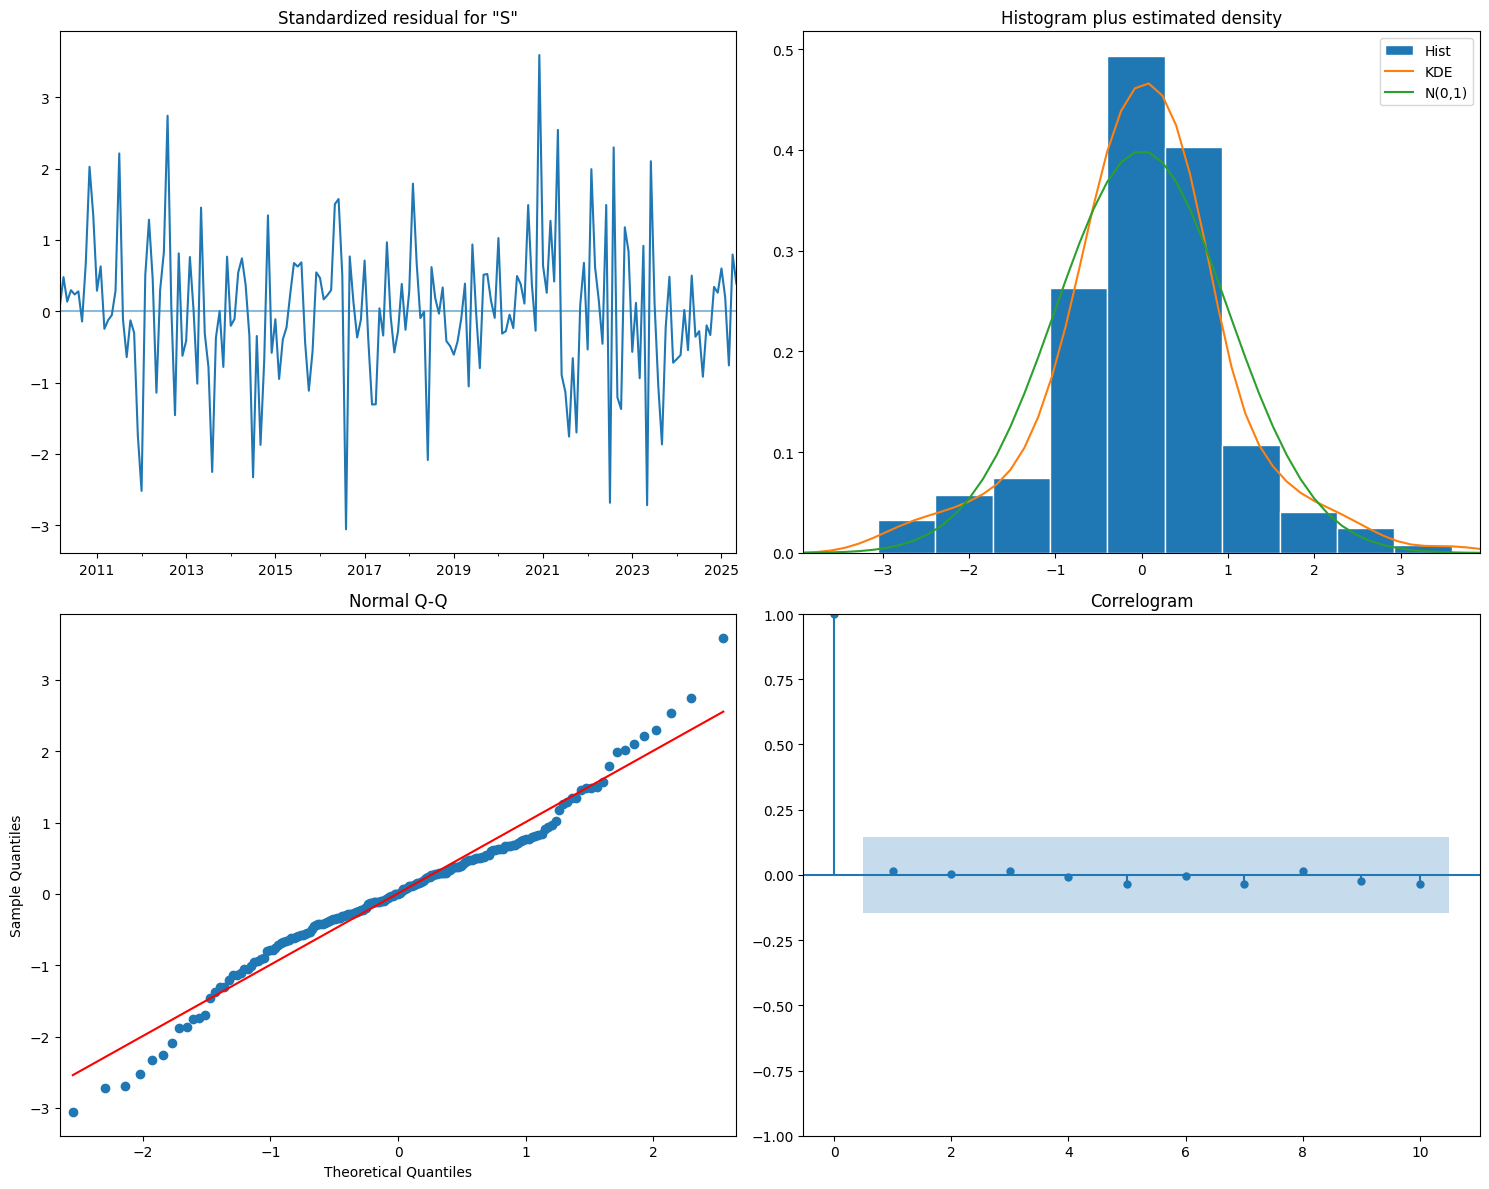


--- Ajuste del Modelo vs Valores Reales ---


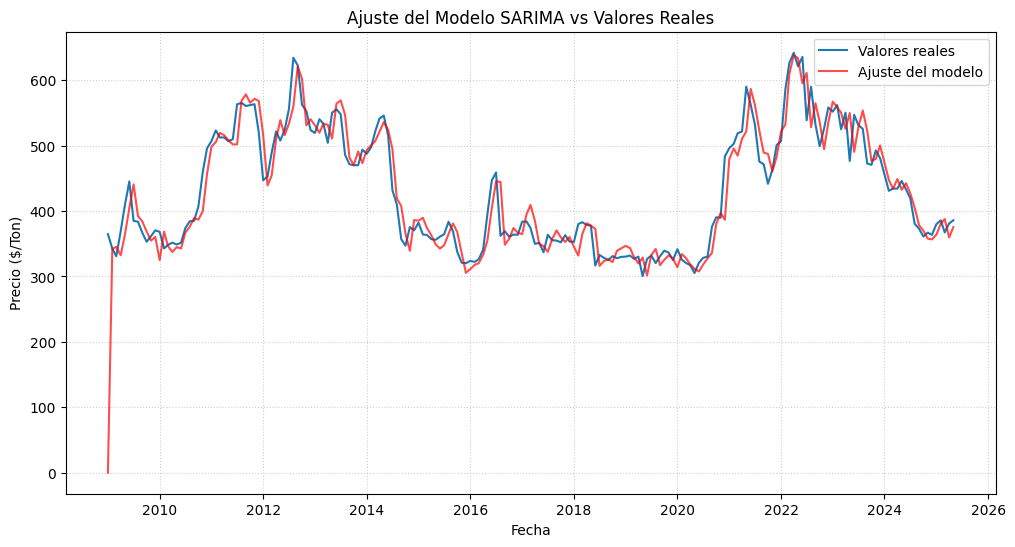

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Cargar los datos
# Usamos 'data.xlsx' que es el archivo que has estado usando
df = pd.read_excel('data.xlsx')

# Asumimos que 'SOYBEANS' es la columna con los precios de soja
# y que el DataFrame tiene un índice temporal
# Basándonos en celdas anteriores, la columna de fecha es 'Fecha' y debe ser el índice
raw_date_column_name = 'Unnamed: 0' # Nombre original de la columna de fecha si no se renombró
processed_date_column_name = 'Fecha' # Nombre deseado para la columna de fecha

# Intentar renombrar y establecer el índice de fecha si no se hizo al cargar
if raw_date_column_name in df.columns:
    df.rename(columns={raw_date_column_name: processed_date_column_name}, inplace=True)
    print(f"Columna '{raw_date_column_name}' renombrada a '{processed_date_column_name}'.")


if processed_date_column_name in df.columns:
    try:
        # Convertir a datetime y establecer como índice
        df[processed_date_column_name] = pd.to_datetime(df[processed_date_column_name], format='%YM%m', errors='coerce')
        df.dropna(subset=[processed_date_column_name], inplace=True) # Eliminar filas con fechas inválidas
        df.set_index(processed_date_column_name, inplace=True)
        df.sort_index(inplace=True) # Asegurar orden cronológico
        print("Columna de fecha procesada y establecida como índice.")
        if not isinstance(df.index, pd.DatetimeIndex):
             print("Advertencia: El índice no es de tipo DatetimeIndex después del procesamiento.")

    except Exception as e:
        print(f"Error al procesar la columna de fecha: {e}")
        print("Procediendo sin índice DatetimeIndex, esto podría causar problemas.")
else:
     print(f"Advertencia: La columna de fecha '{processed_date_column_name}' no se encontró en el DataFrame.")
     print("Columnas disponibles: ", df.columns.tolist())
     print("No se puede establecer el índice de fecha. Esto puede causar problemas para series de tiempo.")


# Verificar estacionariedad
def test_stationarity(series):
    # Verificar si la serie está vacía o tiene muy pocos puntos antes de testear
    if len(series.dropna()) < 13: # ADF test requires at least d + s*(D+1) + 12-1 observations, typically needs > ~12
        print(f"Advertencia: Serie demasiado corta ({len(series.dropna())} puntos) para test de estacionariedad ADF (requiere al menos ~13).")
        # Retornar True indica que NO PUDIMOS demostrar que es estacionaria.
        return True

    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    return result[1] > 0.05  # Retorna True si NO es estacionario (p-value > 0.05)

# Aplicar diferenciación regular y estacional si es necesario
d = 0
D = 0
# Asegurarse de que la columna SOYBEANS existe y no está vacía después de cargar y limpiar fecha
if 'SOYBEANS' in df.columns and not df['SOYBEANS'].dropna().empty:
    soybeans_series = df['SOYBEANS'].dropna()

    print("\n--- Test de Estacionariedad para la columna 'SOYBEANS' ---")

    # Probar estacionariedad inicial
    is_stationary = not test_stationarity(soybeans_series) # test_stationarity retorna True si NO es estacionario

    if not is_stationary:
        print("\nLa serie no es estacionaria. Aplicando diferenciación regular...")
        # Diferenciación regular
        soybeans_diff = soybeans_series.diff().dropna()
        d = 1
        print(f"Aplicada diferenciación regular (d={d}). Re-testeando...")
        is_stationary_diff = not test_stationarity(soybeans_diff) # test_stationarity retorna True si NO es estacionario

        if not is_stationary_diff:
             print("\nLa serie aún no es estacionaria después de diferenciación regular.")

        # Verificar estacionariedad estacional (12 meses) en la serie *después* de la diferenciación regular si se aplicó
        series_for_seasonal_test = soybeans_diff if d > 0 and not soybeans_diff.empty else soybeans_series.dropna()

        if len(series_for_seasonal_test) >= 13: # Necesitamos suficientes puntos para el test estacional (lag 12)
             print("\nTest de Estacionariedad para Diferenciación Estacional (M=12)...")
             seasonal_diff_series = series_for_seasonal_test.diff(12).dropna()

             if not seasonal_diff_series.empty:
                 is_stationary_seasonal_diff = not test_stationarity(seasonal_diff_series)
                 if not is_stationary_seasonal_diff:
                     D = 1
                     print("\nLa serie aún no es estacionaria estacionalmente después de diferenciación regular. Aplicando diferenciación estacional (12 meses).")
                 else:
                     print("\nLa serie parece estacionaria estacionalmente después de diferenciación regular.")
             else:
                  print("\nAdvertencia: Serie demasiado corta o vacía después de aplicar diferenciación estacional para el test.")
        else:
             print("\nAdvertencia: Serie demasiado corta para test de diferenciación estacional (M=12).")

    else:
        print("\nLa serie es estacionaria sin necesidad de diferenciación.")

    # Definir el modelo SARIMA según la estructura solicitada
    # Interpretando "AR(1), SAR(12), MA(12)" como SARIMA(1, d, 12)(1, D, 0, 12)
    # Donde d y D se determinan por el test de estacionariedad.
    order = (1, d, 12)          # (p,d,q)
    seasonal_order = (1, D, 0, 12)  # (P,D,Q,s)
    s = 12 # La estacionalidad es anual (12 meses)

    print(f"\nIntentando ajustar SARIMA con order={order}, seasonal_order={seasonal_order}")

    # Asegurarse de que la serie no esté vacía antes de intentar ajustar
    if soybeans_series.empty:
         print("\nError: La serie 'SOYBEANS' está vacía después de la limpieza inicial. No se puede ajustar el modelo.")
    else:
        try:
            # Ajustar el modelo SARIMA
            # SARIMAX usa la serie original y aplica la diferenciación (d, D) internamente.
            model = SARIMAX(soybeans_series,
                            order=(order[0], d, order[2]), # Usar el 'd' determinado por el test
                            seasonal_order=(seasonal_order[0], D, seasonal_order[2], s), # Usar el 'D' determinado por el test y 's'=12
                            enforce_stationarity=False, # Mantener en False para mayor robustez
                            enforce_invertibility=False) # Mantener en False para mayor robustez


            results = model.fit(disp=False)

            # Imprimir el summary del modelo
            print("\n" + "="*60)
            print("SUMMARY DEL MODELO SARIMA PARA SOYBEANS")
            print("="*60 + "\n")
            print(results.summary())

            # Gráficos de diagnóstico
            print("\n--- Gráficos de Diagnóstico ---")
            # Asegurarse de que hay suficientes datos para los gráficos de diagnóstico
            if len(results.resid.dropna()) > 0:
                try:
                    results.plot_diagnostics(figsize=(15, 12))
                    plt.tight_layout()
                    plt.show()
                except Exception as e:
                     print(f"Error generating diagnostics plot: {e}")
                     print("This might happen if the fitted model has issues or residual series is too short/constant.")
            else:
                 print("No se pudieron generar los gráficos de diagnóstico debido a residuos vacíos.")


            # Visualización de ajuste vs valores reales
            print("\n--- Ajuste del Modelo vs Valores Reales ---")
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(soybeans_series, label='Valores reales')
            # Asegurarse de que fittedvalues no esté vacío
            if not results.fittedvalues.dropna().empty:
                 ax.plot(results.fittedvalues, color='red', alpha=0.7, label='Ajuste del modelo')
            else:
                 print("Advertencia: No se pudieron obtener valores ajustados del modelo.")

            ax.set_title('Ajuste del Modelo SARIMA vs Valores Reales')
            ax.set_xlabel('Fecha') # Corregido de xlabel a set_xlabel
            ax.set_ylabel('Precio ($/Ton)') # Corregido de ylabel a set_ylabel
            ax.legend()
            plt.grid(True, linestyle=':', alpha=0.6)
            plt.show()

        except Exception as e:
            print(f"\nError al ajustar o mostrar el modelo SARIMA: {e}")
            print("Verifica los parámetros del modelo y la estructura de tu serie de tiempo.")
            print(f"Parámetros usados: order={order}, seasonal_order={seasonal_order}")


else:
    print("\nError: La columna 'SOYBEANS' no fue encontrada en el DataFrame o está vacía después de cargar el archivo.")
    print("Columnas disponibles:", df.columns.tolist())

Columna de fecha procesada y establecida como índice.

--- Test de Estacionariedad para la columna 'SOYBEANS' ---
ADF Statistic: -2.3010731289712187
p-value: 0.17162209965989317
Critical Values: {'1%': np.float64(-3.464161278384219), '5%': np.float64(-2.876401960790147), '10%': np.float64(-2.5746921001665974)}

La serie no es estacionaria. Aplicando diferenciación regular...
Aplicada diferenciación regular (d=1). Re-testeando...
ADF Statistic: -13.048161327389543
p-value: 2.1698454515621564e-24
Critical Values: {'1%': np.float64(-3.464337030867007), '5%': np.float64(-2.876478799035722), '10%': np.float64(-2.574733103221565)}

Test de Estacionariedad para Diferenciación Estacional (M=12)...
ADF Statistic: -5.758573704027127
p-value: 5.742793473491079e-07
Critical Values: {'1%': np.float64(-3.468952197801766), '5%': np.float64(-2.878495056473015), '10%': np.float64(-2.57580913601947)}

La serie parece estacionaria estacionalmente después de diferenciación regular.

Intentando ajustar SAR

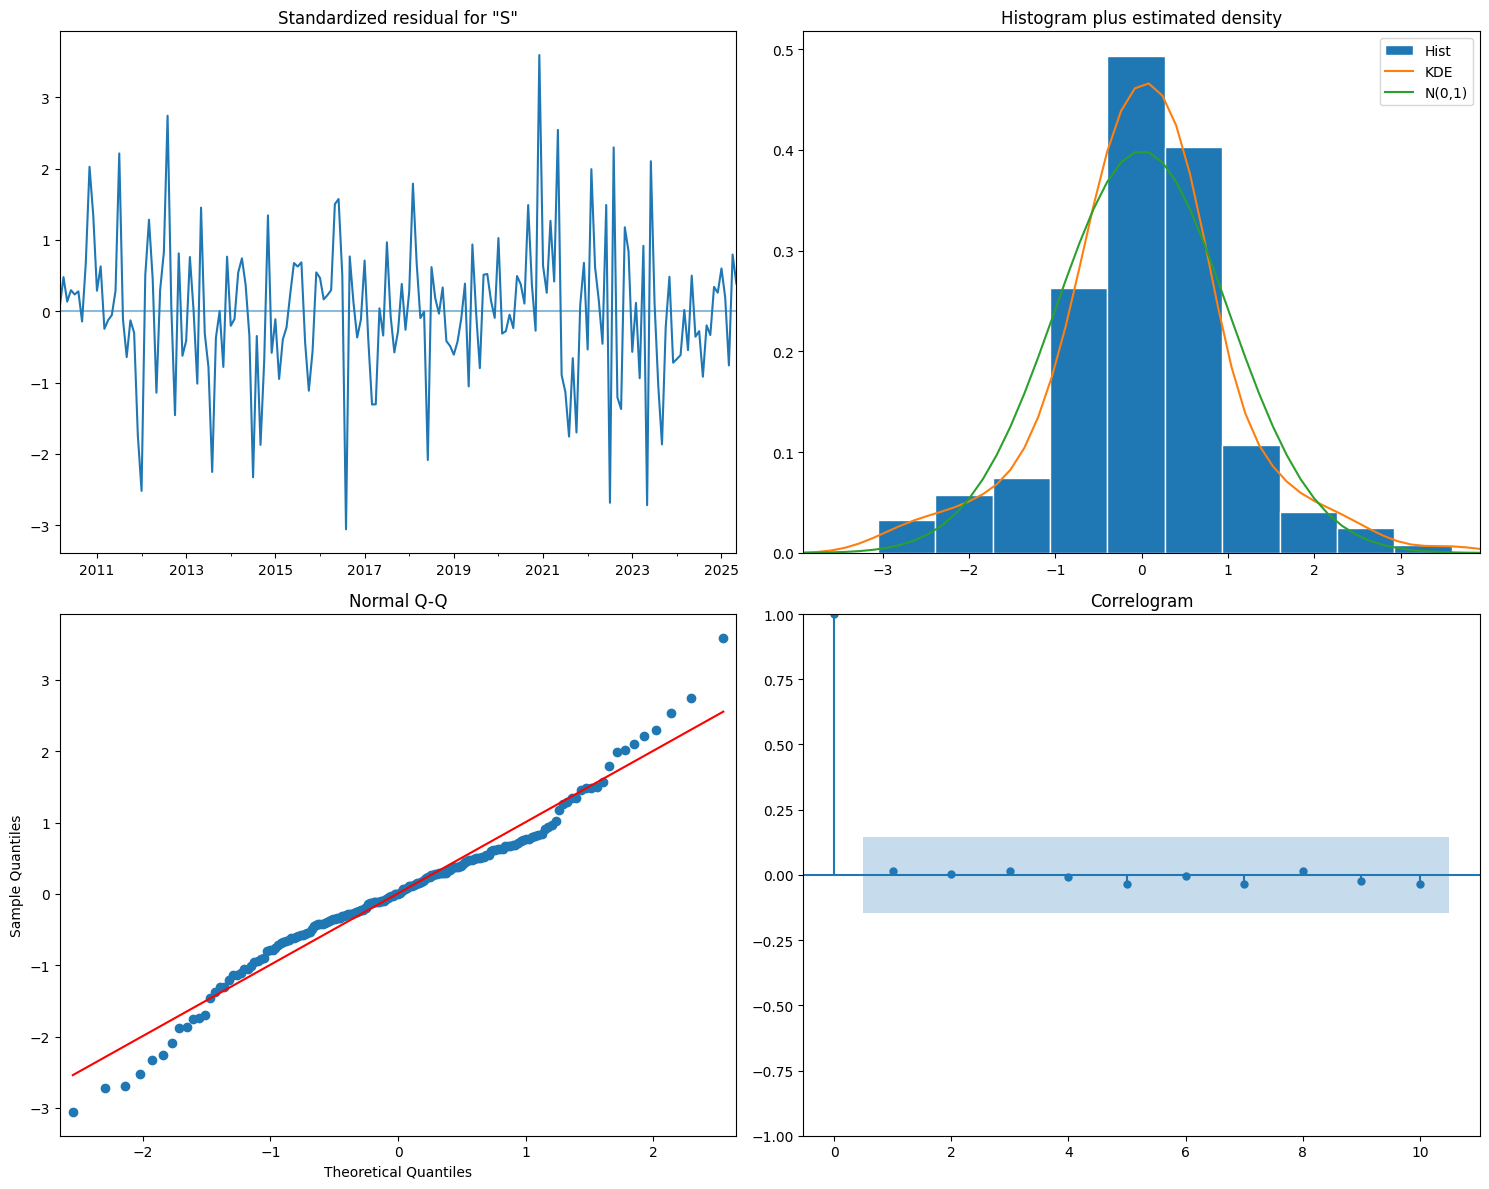


--- Ajuste del Modelo vs Valores Reales ---


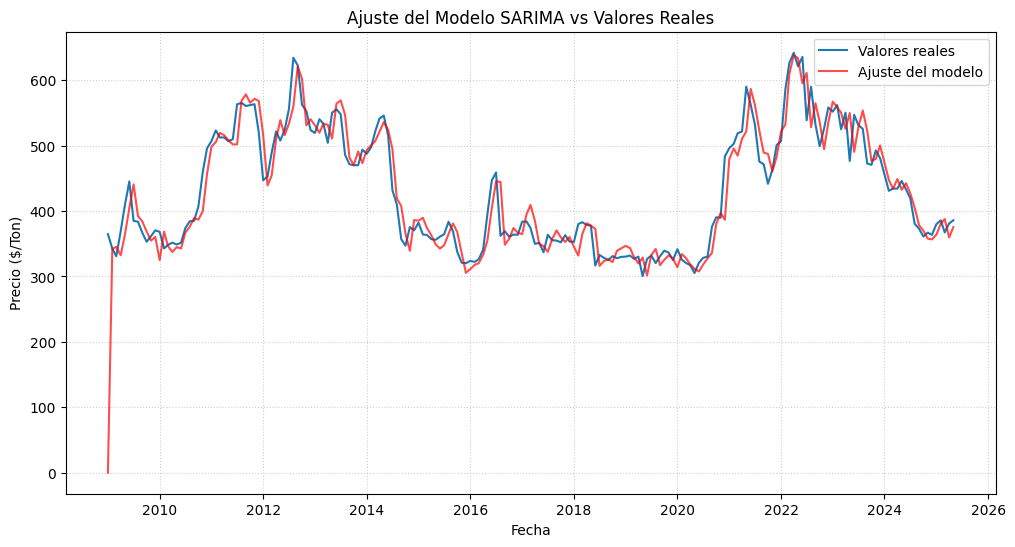

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Cargar los datos
# Usamos 'data.xlsx' que es el archivo que has estado usando
df = pd.read_excel('data.xlsx')

# Asumimos que 'SOYBEANS' es la columna con los precios de soja
# y que el DataFrame tiene un índice temporal
# Basándonos en celdas anteriores, la columna de fecha es 'Fecha' y debe ser el índice
raw_date_column_name = 'Unnamed: 0' # Nombre original de la columna de fecha si no se renombró
processed_date_column_name = 'Fecha' # Nombre deseado para la columna de fecha

# Intentar renombrar y establecer el índice de fecha si no se hizo al cargar
if raw_date_column_name in df.columns:
    df.rename(columns={raw_date_column_name: processed_date_column_name}, inplace=True)
    print(f"Columna '{raw_date_column_name}' renombrada a '{processed_date_column_name}'.")


if processed_date_column_name in df.columns:
    try:
        # Convertir a datetime y establecer como índice
        df[processed_date_column_name] = pd.to_datetime(df[processed_date_column_name], format='%YM%m', errors='coerce')
        df.dropna(subset=[processed_date_column_name], inplace=True) # Eliminar filas con fechas inválidas
        df.set_index(processed_date_column_name, inplace=True)
        df.sort_index(inplace=True) # Asegurar orden cronológico
        print("Columna de fecha procesada y establecida como índice.")
        if not isinstance(df.index, pd.DatetimeIndex):
             print("Advertencia: El índice no es de tipo DatetimeIndex después del procesamiento.")

    except Exception as e:
        print(f"Error al procesar la columna de fecha: {e}")
        print("Procediendo sin índice DatetimeIndex, esto podría causar problemas.")
else:
     print(f"Advertencia: La columna de fecha '{processed_date_column_name}' no se encontró en el DataFrame.")
     print("Columnas disponibles: ", df.columns.tolist())
     print("No se puede establecer el índice de fecha. Esto puede causar problemas para series de tiempo.")


# Verificar estacionariedad
def test_stationarity(series):
    # Verificar si la serie está vacía o tiene muy pocos puntos antes de testear
    if len(series.dropna()) < 13: # ADF test requires at least d + s*(D+1) + 12-1 observations, typically needs > ~12
        print(f"Advertencia: Serie demasiado corta ({len(series.dropna())} puntos) para test de estacionariedad ADF (requiere al menos ~13).")
        # Retornar True indica que NO PUDIMOS demostrar que es estacionaria.
        return True

    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    return result[1] > 0.05  # Retorna True si NO es estacionario (p-value > 0.05)

# Aplicar diferenciación regular y estacional si es necesario
d = 0
D = 0
# Asegurarse de que la columna SOYBEANS existe y no está vacía después de cargar y limpiar fecha
if 'SOYBEANS' in df.columns and not df['SOYBEANS'].dropna().empty:
    soybeans_series = df['SOYBEANS'].dropna()

    print("\n--- Test de Estacionariedad para la columna 'SOYBEANS' ---")

    # Probar estacionariedad inicial
    is_stationary = not test_stationarity(soybeans_series) # test_stationarity retorna True si NO es estacionario

    if not is_stationary:
        print("\nLa serie no es estacionaria. Aplicando diferenciación regular...")
        # Diferenciación regular
        soybeans_diff = soybeans_series.diff().dropna()
        d = 1
        print(f"Aplicada diferenciación regular (d={d}). Re-testeando...")
        is_stationary_diff = not test_stationarity(soybeans_diff) # test_stationarity retorna True si NO es estacionario

        if not is_stationary_diff:
             print("\nLa serie aún no es estacionaria después de diferenciación regular.")

        # Verificar estacionariedad estacional (12 meses) en la serie *después* de la diferenciación regular si se aplicó
        series_for_seasonal_test = soybeans_diff if d > 0 and not soybeans_diff.empty else soybeans_series.dropna()

        if len(series_for_seasonal_test) >= 13: # Necesitamos suficientes puntos para el test estacional (lag 12)
             print("\nTest de Estacionariedad para Diferenciación Estacional (M=12)...")
             seasonal_diff_series = series_for_seasonal_test.diff(12).dropna()

             if not seasonal_diff_series.empty:
                 is_stationary_seasonal_diff = not test_stationarity(seasonal_diff_series)
                 if not is_stationary_seasonal_diff:
                     D = 1
                     print("\nLa serie aún no es estacionaria estacionalmente después de diferenciación regular. Aplicando diferenciación estacional (12 meses).")
                 else:
                     print("\nLa serie parece estacionaria estacionalmente después de diferenciación regular.")
             else:
                  print("\nAdvertencia: Serie demasiado corta o vacía después de aplicar diferenciación estacional para el test.")
        else:
             print("\nAdvertencia: Serie demasiado corta para test de diferenciación estacional (M=12).")

    else:
        print("\nLa serie es estacionaria sin necesidad de diferenciación.")

    # Definir el modelo SARIMA según la estructura solicitada
    # Interpretando "AR(1), SAR(12), MA(12)" como SARIMA(1, d, 12)(1, D, 0, 12)
    # Donde d y D se determinan por el test de estacionariedad.
    order = (1, d, 12)          # (p,d,q)
    seasonal_order = (1, D, 0, 12)  # (P,D,Q,s)
    s = 12 # La estacionalidad es anual (12 meses)

    print(f"\nIntentando ajustar SARIMA con order={order}, seasonal_order={seasonal_order}")

    # Asegurarse de que la serie no esté vacía antes de intentar ajustar
    if soybeans_series.empty:
         print("\nError: La serie 'SOYBEANS' está vacía después de la limpieza inicial. No se puede ajustar el modelo.")
    else:
        try:
            # Ajustar el modelo SARIMA
            # SARIMAX usa la serie original y aplica la diferenciación (d, D) internamente.
            model = SARIMAX(soybeans_series,
                            order=(order[0], d, order[2]), # Usar el 'd' determinado por el test
                            seasonal_order=(seasonal_order[0], D, seasonal_order[2], s), # Usar el 'D' determinado por el test y 's'=12
                            enforce_stationarity=False, # Mantener en False para mayor robustez
                            enforce_invertibility=False) # Mantener en False para mayor robustez


            results = model.fit(disp=False)

            # Imprimir el summary del modelo
            print("\n" + "="*60)
            print("SUMMARY DEL MODELO SARIMA PARA SOYBEANS")
            print("="*60 + "\n")
            print(results.summary())

            # Gráficos de diagnóstico
            print("\n--- Gráficos de Diagnóstico ---")
            # Asegurarse de que hay suficientes datos para los gráficos de diagnóstico
            if len(results.resid.dropna()) > 0:
                try:
                    results.plot_diagnostics(figsize=(15, 12))
                    plt.tight_layout()
                    plt.show()
                except Exception as e:
                     print(f"Error generating diagnostics plot: {e}")
                     print("This might happen if the fitted model has issues or residual series is too short/constant.")
            else:
                 print("No se pudieron generar los gráficos de diagnóstico debido a residuos vacíos.")


            # Visualización de ajuste vs valores reales
            print("\n--- Ajuste del Modelo vs Valores Reales ---")
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(soybeans_series, label='Valores reales')
            # Asegurarse de que fittedvalues no esté vacío
            if not results.fittedvalues.dropna().empty:
                 ax.plot(results.fittedvalues, color='red', alpha=0.7, label='Ajuste del modelo')
            else:
                 print("Advertencia: No se pudieron obtener valores ajustados del modelo.")

            ax.set_title('Ajuste del Modelo SARIMA vs Valores Reales')
            ax.set_xlabel('Fecha') # Corregido de xlabel a set_xlabel
            ax.set_ylabel('Precio ($/Ton)') # Corregido de ylabel a set_ylabel
            ax.legend()
            plt.grid(True, linestyle=':', alpha=0.6)
            plt.show()

        except Exception as e:
            print(f"\nError al ajustar o mostrar el modelo SARIMA: {e}")
            print("Verifica los parámetros del modelo y la estructura de tu serie de tiempo.")
            print(f"Parámetros usados: order={order}, seasonal_order={seasonal_order}")


else:
    print("\nError: La columna 'SOYBEANS' no fue encontrada en el DataFrame o está vacía después de cargar el archivo.")
    print("Columnas disponibles:", df.columns.tolist())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX # Import SARIMAX again just in case
import warnings # Import warnings module

warnings.filterwarnings('ignore')
pio.templates.default = "plotly_white" # Tema profesional para Plotly

print("--- Preparando datos para entrenamiento y pronóstico ---")

# Asegúrate de que el DataFrame `data_clean_shocks` de celdas anteriores esté disponible.
# Este DataFrame ya tiene el índice de fecha y la columna 'SOYBEANS' limpia de shocks.
# Si no existe, necesitarías ejecutar las celdas anteriores que lo crean.
if 'data_clean_shocks' not in locals() or data_clean_shocks is None or data_clean_shocks.empty:
    print("Error: El DataFrame 'data_clean_shocks' no está disponible. Por favor, ejecuta las celdas de carga y limpieza primero.")
    # Si no hay datos, no podemos continuar. Puedes salir o manejar el error.
    # exit() # Descomenta si prefieres salir
    df_cleaned = None # Set to None to prevent further execution
else:
    df_cleaned = data_clean_shocks.copy() # Usamos una copia para no modificar el original

if df_cleaned is not None:

    # --- Definir períodos de entrenamiento y pronóstico ---
    historical_end_date_for_fitting = pd.to_datetime('2025-05-01') # Última fecha para entrenamiento
    forecast_start_date = historical_end_date_for_fitting + pd.DateOffset(months=1) # Inicio pronóstico (Jun 2025)
    forecast_end_date = pd.to_datetime('2026-06-01') # Fin pronóstico (Jun 2026)

    # Datos de entrenamiento (hasta historical_end_date_for_fitting)
    train_data = df_cleaned.loc[:historical_end_date_for_fitting].copy()

    # Datos completos (para graficar histórico y comparar si hay datos reales en el período de forecast)
    full_data = df_cleaned.copy()

    print(f"Período de entrenamiento: {train_data.index.min().strftime('%Y-%m-%d')} a {train_data.index.max().strftime('%Y-%m-%d')}")
    print(f"Período de pronóstico: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end_date.strftime('%Y-%m-%d')}")

    # Separar la serie de tiempo principal (SOYBEANS) y variables exógenas
    target_variable = 'SOYBEANS'
    if target_variable not in train_data.columns:
         print(f"Error: La columna '{target_variable}' no se encuentra en los datos de entrenamiento.")
         df_cleaned = None # No podemos continuar
    else:
        y_train = train_data[target_variable].dropna()

        # Excluir la variable objetivo de las variables exógenas
        exog_cols = [col for col in train_data.columns if col != target_variable]
        X_train = train_data[exog_cols].copy()

        print(f"Variables exógenas disponibles para ML: {X_train.columns.tolist()}")


        # --- Preparar variables exógenas para el período de pronóstico ---
        # Esto es crucial para modelos como SARIMAX, SVR, Decision Tree y LSTM si usan exógenas.
        # Creamos un DataFrame con las fechas de pronóstico.
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')
        steps_to_forecast = len(forecast_dates)

        X_forecast = pd.DataFrame(index=forecast_dates)

        # Estrategia simple: Usar el último valor conocido de las variables exógenas para todo el período de pronóstico.
        # OTRA OPCIÓN: Pronosticar las variables exógenas con modelos simples o complejos.
        # Aquí usamos la estrategia simple por facilidad.
        if not X_train.empty:
             last_exog_values = X_train.iloc[-1]
             for col in X_train.columns:
                 X_forecast[col] = last_exog_values[col]
             print(f"\nVariables exógenas para pronóstico ({len(X_forecast)} pasos) creadas usando el último valor histórico.")
             # display(X_forecast.head())
        else:
             print("\nAdvertencia: No hay variables exógenas disponibles. Los modelos que las requieren no las usarán.")
             X_forecast = None # Asegurar que X_forecast es None si no hay exógenas


        # Asegurarse de que y_train y X_train estén alineados y sin NaNs antes de entrenar ML
        if X_train is not None and not X_train.empty:
             common_index_train = y_train.index.intersection(X_train.index)
             y_train_aligned = y_train.loc[common_index_train].dropna()
             X_train_aligned = X_train.loc[common_index_train].dropna()

             # Re-align after dropna
             common_index_train_final = y_train_aligned.index.intersection(X_train_aligned.index)
             y_train_final = y_train_aligned.loc[common_index_train_final]
             X_train_final = X_train_aligned.loc[common_index_train_final]

             if not y_train_final.index.equals(X_train_final.index):
                  print("Error: Alineación final de datos de entrenamiento fallida.")
                  y_train_final = y_train_final.loc[y_train_final.index.intersection(X_train_final.index)]
                  X_train_final = X_train_final.loc[X_train_final.index.intersection(y_train_final.index)]
                  if not y_train_final.index.equals(X_train_final.index):
                       print("Error crítico: No se pudo alinear y_train y X_train.")
                       df_cleaned = None # Fail gracefully
                  else:
                      y_train = y_train_final
                      X_train = X_train_final
                      print("Alineación de datos de entrenamiento exitosa después de manejo de NaNs.")

             else:
                 y_train = y_train_final
                 X_train = X_train_final
                 print("Datos de entrenamiento (y_train, X_train) alineados y listos.")
        else: # No exogenous variables
             X_train = None
             y_train = y_train.dropna()
             print("No se usarán variables exógenas para modelos ML.")

        if df_cleaned is not None and y_train.empty:
             print("Error: La serie de tiempo de entrenamiento (y_train) está vacía.")
             df_cleaned = None # Fail gracefully


# --- Entrenar y Pronosticar con cada Modelo ---
if df_cleaned is not None:
    print("\n--- Entrenando y Pronosticando con Modelos de ML y SARIMA ---")

    all_forecasts_df = pd.DataFrame(index=forecast_dates)
    fitted_models = {} # Diccionario para almacenar los modelos ajustados si es necesario para evaluación

    # 1. Modelo SARIMA (Usar el mejor modelo ajustado en la celda anterior)
    # Asumimos que 'best_model_shocks_clean' existe y contiene el modelo ajustado.
    # Si no existe, necesitas re-ejecutar la celda anterior o ajustar el mejor modelo aquí.
    sarima_model_name = 'Best SARIMA (from previous step)' # Nombre por defecto

    if 'best_model_shocks_clean' in locals() and best_model_shocks_clean is not None:
        # Assume best_model_name_shocks_clean is also available from the previous cell
        if 'best_model_name_shocks_clean' in locals():
             print(f"\nEntrenando/Usando el mejor modelo SARIMA/SARIMAX encontrado previamente ({best_model_name_shocks_clean})...") # Use name from previous cell
             sarima_model_name = best_model_name_shocks_clean # Update name
        else:
             print(f"\nEntrenando/Usando el mejor modelo SARIMA/SARIMAX encontrado previamente (nombre no disponible)...")


        try:
            # Regenerar el pronóstico SARIMA/SARIMAX
            # Need to check if the best model was SARIMAX and requires exog
            sarima_requires_exog = isinstance(best_model_shocks_clean, SARIMAX) and hasattr(best_model_shocks_clean.model, 'exog') and best_model_shocks_clean.model.exog is not None and best_model_shocks_clean.model.exog.shape[1] > 0

            current_sarima_exog_forecast = X_forecast if sarima_requires_exog and X_forecast is not None else None

            if sarima_requires_exog and current_sarima_exog_forecast is None:
                 print(f"  -> Advertencia: El mejor modelo ({sarima_model_name}) requiere exógenas para pronosticar, pero no se pudieron preparar para el período de pronóstico. El pronóstico SARIMA/SARIMAX puede fallar.")

            sarima_forecast_result = best_model_shocks_clean.get_forecast(steps=steps_to_forecast, exog=current_sarima_exog_forecast)
            all_forecasts_df[sarima_model_name] = sarima_forecast_result.predicted_mean
            print(f"Pronóstico con {sarima_model_name} generado.")
            fitted_models[sarima_model_name] = best_model_shocks_clean # Store the fitted model
        except Exception as e:
            print(f"Error generando pronóstico con el mejor modelo SARIMA/SARIMAX: {e}")
            all_forecasts_df[sarima_model_name] = np.nan # Fill with NaN if forecast fails
    else:
        print("\nEl objeto 'best_model_shocks_clean' no fue encontrado o está vacío. Saltando pronóstico SARIMA/SARIMAX.")
        all_forecasts_df[sarima_model_name] = np.nan # Add column with NaNs if model not found


    # Preparación común para modelos ML (escalado y características de tiempo)
    if not y_train.empty:

        # Escalar los datos (solo para modelos sensibles a la escala como SVR y LSTM)
        scaler_y = MinMaxScaler()
        y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

        if X_train is not None:
             scaler_X = MinMaxScaler()
             X_train_scaled = scaler_X.fit_transform(X_train)
             X_forecast_scaled = scaler_X.transform(X_forecast) # Escalar datos de pronóstico con el mismo scaler

             X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
             X_forecast_scaled_df = pd.DataFrame(X_forecast_scaled, index=X_forecast.index, columns=X_forecast.columns)

        else: # No exogenous variables
             X_train_scaled_df = None
             X_forecast_scaled_df = None

        # Crear características basadas en el tiempo (para SVR, Decision Tree, LSTM)
        # Añadir columna numérica del tiempo (por ejemplo, número de mes desde el inicio)
        train_data_ml = train_data.copy()
        train_data_ml['time_idx'] = (train_data_ml.index - train_data_ml.index[0]).days
        train_data_ml['month'] = train_data_ml.index.month
        train_data_ml['year'] = train_data_ml.index.year
        # Añadir otras características de tiempo si es relevante (ej: día de la semana, trimestre, etc.)

        # Asegurarse de que la variable objetivo está presente para crear las features
        if target_variable in train_data_ml.columns:
             # Crear lagged features (ej: valor del mes anterior)
             train_data_ml['SOYBEANS_lag1'] = train_data_ml[target_variable].shift(1)
             # Añadir más lags si es necesario
             train_data_ml.dropna(inplace=True) # Eliminar filas creadas por shift()


             # Preparar datos para ML (exógenas + características de tiempo)
             # Usamos las características de tiempo y las exógenas originales (no escaladas) para modelos como Decision Tree
             # y las escaladas para modelos sensibles como SVR y LSTM.

             # Features para modelos no sensibles a la escala (Decision Tree)
             # Use .tolist() when creating lists
             features_non_scaled_train = train_data_ml[['time_idx', 'month', 'year'] + (X_train.columns.tolist() if X_train is not None else [])]
             target_non_scaled_train = train_data_ml[target_variable]

             # Align features and target again after feature engineering and dropna
             common_index_ml = features_non_scaled_train.index.intersection(target_non_scaled_train.index)
             features_non_scaled_train = features_non_scaled_train.loc[common_index_ml]
             target_non_scaled_train = target_non_scaled_train.loc[common_index_ml]

             # Prepare features for forecast period
             forecast_data_ml_index = pd.DataFrame(index=forecast_dates)
             forecast_data_ml_index['time_idx'] = (forecast_data_ml_index.index - train_data_ml.index[0]).days # Use index of the first training data point
             forecast_data_ml_index['month'] = forecast_data_ml_index.index.month
             forecast_data_ml_index['year'] = forecast_data_ml_index.index.year

             # Join with non-scaled exog forecast if available
             features_forecast_non_scaled = forecast_data_ml_index.copy()
             if X_forecast is not None:
                  features_forecast_non_scaled = features_forecast_non_scaled.join(X_forecast)


             # Features para modelos sensibles a la escala (SVR, LSTM)
             # Escalar las características no escaladas
             scaler_features_non_scaled = MinMaxScaler()
             features_scaled_train_vals = scaler_features_non_scaled.fit_transform(features_non_scaled_train)
             features_scaled_train = pd.DataFrame(features_scaled_train_vals, index=features_non_scaled_train.index, columns=features_non_scaled_train.columns)

             features_scaled_forecast_vals = scaler_features_non_scaled.transform(features_forecast_non_scaled)
             features_scaled_forecast = pd.DataFrame(features_scaled_forecast_vals, index=features_forecast_non_scaled.index, columns=features_forecast_non_scaled.columns)


             # 2. Modelo Prophet
             print("\nEntrenando y Pronosticando con Prophet...")
             try:
                 # Prophet necesita un DataFrame con columnas 'ds' (fecha) y 'y' (valor)
                 prophet_train_df = y_train.reset_index().rename(columns={y_train.index.name: 'ds', target_variable: 'y'})
                 # Si hay exógenas, Prophet las llama 'regressors'
                 if X_train is not None:
                      prophet_train_df = prophet_train_df.join(X_train, on='ds')

                 model_prophet = Prophet(changepoint_prior_scale=0.01, # Ajusta si es necesario
                                         seasonality_mode='multiplicative') # O 'additive'

                 # Añadir exógenas como regresores
                 if X_train is not None:
                      for col in X_train.columns:
                           # Check if column exists in the dataframe being passed to fit
                           if col in prophet_train_df.columns:
                               model_prophet.add_regressor(col)
                           else:
                               print(f"  -> Advertencia: La columna '{col}' no se encontró en el DataFrame de entrenamiento de Prophet.")


                 model_prophet.fit(prophet_train_df)

                 # Crear DataFrame para pronóstico
                 future_prophet = model_prophet.make_future_dataframe(periods=steps_to_forecast, freq='MS', include_history=False) # Only future dates
                 # Unir con los valores de pronóstico de exógenas
                 if X_forecast is not None:
                      future_prophet = future_prophet.set_index('ds').join(X_forecast).reset_index()
                      # Asegurarse de que no haya NaNs en las exógenas de pronóstico que Prophet pueda usar
                      if future_prophet[X_forecast.columns].isnull().any().any():
                           print("Advertencia: NaNs encontrados en exógenas de pronóstico para Prophet. Rellenando con 0.")
                           future_prophet[X_forecast.columns] = future_prophet[X_forecast.columns].fillna(0) # Rellenar NaNs en exógenas de pronóstico
                 else:
                      # If no exogenous variables, make sure the future_prophet dataframe only has 'ds'
                      future_prophet = model_prophet.make_future_dataframe(periods=steps_to_forecast, freq='MS', include_history=False)


                 prophet_forecast_result = model_prophet.predict(future_prophet)

                 # Seleccionar solo el período de pronóstico deseado
                 # Ensure the index is datetime
                 prophet_forecast_result['ds'] = pd.to_datetime(prophet_forecast_result['ds'])
                 prophet_forecast_period = prophet_forecast_result.set_index('ds')['yhat'].loc[forecast_dates]
                 all_forecasts_df['Prophet'] = prophet_forecast_period
                 print("Pronóstico con Prophet generado.")
                 fitted_models['Prophet'] = model_prophet # Store model
             except Exception as e:
                 print(f"Error generando pronóstico con Prophet: {e}")
                 all_forecasts_df['Prophet'] = np.nan # Fill with NaN if forecast fails


             # 3. Modelo SVR (Support Vector Regressor)
             print("\nEntrenando y Pronosticando con SVR...")
             try:
                 # SVR requiere datos escalados y un formato X (features), y (target)
                 model_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1) # Parámetros de ejemplo

                 # Usar características escaladas incluyendo características de tiempo y exógenas
                 svr_features_train = features_scaled_train
                 svr_target_train = y_train_scaled.ravel() # SVR expects 1D array for target

                 # Ensure index alignment before passing to SVR
                 # No need to check against target_non_scaled_train index here,
                 # as features_scaled_train was already aligned with it.
                 # Just ensure svr_features_train is not empty.
                 if not svr_features_train.empty:
                     model_svr.fit(svr_features_train, svr_target_train)

                     # Pronosticar usando las features de pronóstico escaladas
                     svr_forecast_scaled = model_svr.predict(features_scaled_forecast)

                     # Desescalar el pronóstico
                     svr_forecast = scaler_y.inverse_transform(svr_forecast_scaled.reshape(-1, 1)).ravel()

                     all_forecasts_df['SVR'] = svr_forecast
                     print("Pronóstico con SVR generado.")
                     fitted_models['SVR'] = model_svr # Store model
                 else:
                      print("Advertencia: Datos de entrenamiento para SVR vacíos.")
                      all_forecasts_df['SVR'] = np.nan

             except Exception as e:
                 print(f"Error generando pronóstico con SVR: {e}")
                 all_forecasts_df['SVR'] = np.nan


             # 4. Modelo Decision Tree Regressor
             print("\nEntrenando y Pronosticando con Decision Tree...")
             try:
                 # Decision Tree no requiere escalado
                 model_dt = DecisionTreeRegressor(random_state=42) # Parámetros de ejemplo

                 # Usar características no escaladas incluyendo características de tiempo y exógenas
                 dt_features_train = features_non_scaled_train
                 dt_target_train = target_non_scaled_train.values # Decision Tree expects numpy array for target

                 # Ensure index alignment before passing to Decision Tree
                 # No need to check against dt_target_train.index again as features_non_scaled_train
                 # was already aligned with target_non_scaled_train.
                 # Just ensure dt_features_train is not empty.
                 if not dt_features_train.empty:
                     model_dt.fit(dt_features_train, dt_target_train)

                     # Pronosticar usando las features de pronóstico no escaladas
                     dt_forecast = model_dt.predict(features_forecast_non_scaled)

                     all_forecasts_df['Decision Tree'] = dt_forecast
                     print("Pronóstico con Decision Tree generado.")
                     fitted_models['Decision Tree'] = model_dt # Store model
                 else:
                      print("Advertencia: Datos de entrenamiento para Decision Tree vacíos.")
                      all_forecasts_df['Decision Tree'] = np.nan

             except Exception as e:
                 print(f"Error generando pronóstico con Decision Tree: {e}")
                 all_forecasts_df['Decision Tree'] = np.nan


             # 5. Modelo LSTM
             print("\nEntrenando y Pronosticando con LSTM...")
             try:
                 # LSTM requires data in sequential format (samples, time steps, features)
                 # Usaremos una ventana de tiempo para la creación de secuencias.
                 n_steps = 12 # Número de pasos hacia atrás para cada predicción (ej: usar 12 meses anteriores para predecir el siguiente)

                 # Function to create sequences (for features_scaled_train_aligned and y_train_scaled_series_aligned)
                 # This version takes features at time i..i+time_steps-1 and predicts target at time i+time_steps.
                 def create_sequences(X_df, y_series, time_steps=1):
                      Xs, ys = [], []
                      # Ensure X_df and y_series are aligned by index
                      common_index = X_df.index.intersection(y_series.index)
                      X_aligned = X_df.loc[common_index]
                      y_aligned = y_series.loc[common_index]

                      # Need to use values for slicing for np.array
                      X_values = X_aligned.values
                      y_values = y_aligned.values

                      for i in range(len(X_aligned) - time_steps):
                          # Input sequence X: X_aligned[i] to X_aligned[i + time_steps - 1]
                          # Target y: y_aligned[i + time_steps]
                          Xs.append(X_values[i:(i + time_steps)])
                          ys.append(y_values[i + time_steps])

                      return np.array(Xs), np.array(ys)

                 # Ensure the scaled features and target for LSTM are aligned and without NaNs
                 # Use features_scaled_train and y_train_scaled (convert to Series for indexation)
                 # y_train_scaled is a numpy array, need to create a Series with the correct index for alignment
                 y_train_scaled_series = pd.Series(y_train_scaled.ravel(), index=y_train.index)

                 # Re-align features_scaled_train and y_train_scaled_series based on index
                 common_idx_lstm = features_scaled_train.index.intersection(y_train_scaled_series.index)
                 features_scaled_train_aligned = features_scaled_train.loc[common_idx_lstm]
                 y_train_scaled_series_aligned = y_train_scaled_series.loc[common_idx_lstm]


                 if not features_scaled_train_aligned.empty and len(features_scaled_train_aligned) >= n_steps:
                     # Create sequences for training
                     X_train_lstm, y_train_lstm = create_sequences(features_scaled_train_aligned, y_train_scaled_series_aligned, n_steps)

                     # Check if sequences were created successfully
                     if X_train_lstm.shape[0] > 0:

                         # Define the LSTM model
                         model_lstm = Sequential()
                         # Input shape: (time steps, number of features)
                         model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
                         model_lstm.add(Dropout(0.2))
                         model_lstm.add(Dense(1)) # Output layer for a single value prediction
                         model_lstm.compile(optimizer='adam', loss='mse') # Use 'mse' for regression

                         # Train the model
                         print(f"Entrenando LSTM con {len(X_train_lstm)} secuencias...")
                         # Aumentar epochs o añadir Early Stopping si el entrenamiento es largo
                         history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=0, shuffle=False) # Use verbose=1 to see progress
                         fitted_models['LSTM'] = model_lstm # Store model


                         # Forecast with LSTM (iterative approach)
                         lstm_forecast_list_scaled = []
                         # Start with the last sequence of features_scaled_train_aligned from training
                         # This sequence ends at the last training data point (T). It has length n_steps.
                         last_train_features_sequence_df = features_scaled_train_aligned.iloc[-n_steps:]
                         current_sequence_batch = last_train_features_sequence_df.values.reshape(1, n_steps, last_train_features_sequence_df.shape[1])

                         for i in range(steps_to_forecast):
                             # Predict the next step (scaled value)
                             # The current_sequence_batch represents features from time T+i-n_steps to T+i-1.
                             # The model predicts the target at time T+i.
                             next_pred_scaled = model_lstm.predict(current_sequence_batch, verbose=0)[0, 0]
                             lstm_forecast_list_scaled.append(next_pred_scaled)

                             # Prepare the input sequence for the next step's prediction (predicting target at time T+i+1)
                             # This sequence should contain features from time T+i-n_steps+1 to time T+i.
                             # We need to add the features for time T+i. These are in features_scaled_forecast.iloc[i].

                             if i < len(features_scaled_forecast): # Check if we have forecast features available for the current step
                                  # Get features for the current forecast step (index i in features_scaled_forecast)
                                  current_forecast_features = features_scaled_forecast.iloc[i].values.reshape(1, 1, features_scaled_forecast.shape[1]) # (1, 1, n_features)

                                  # Shift the current batch (remove the oldest step)
                                  shifted_sequence = current_sequence_batch[:, 1:, :] # Shape (1, n_steps-1, n_features)

                                  # Concatenate the shifted sequence with the features for the current forecast step
                                  # This forms the sequence [features_T+i-n_steps+1, ..., features_T+i-1, features_T+i]
                                  current_sequence_batch = np.concatenate((shifted_sequence, current_forecast_features), axis=1) # Shape (1, n_steps, n_features)
                             else:
                                  # Should not happen with correct loop range and forecast_dates length
                                  print("Error: Index out of bounds for features_scaled_forecast in LSTM iterative forecast update.")
                                  break # Exit loop on error


                         # Desescalar el pronóstico
                         lstm_forecast = scaler_y.inverse_transform(np.array(lstm_forecast_list_scaled).reshape(-1, 1)).ravel()

                         # Assign forecast to dataframe, ensuring index aligns
                         if len(lstm_forecast) == len(forecast_dates):
                            all_forecasts_df['LSTM'] = lstm_forecast
                            print("Pronóstico con LSTM generado.")
                         else:
                            print(f"Error: Longitud del pronóstico LSTM ({len(lstm_forecast)}) no coincide con el período de pronóstico ({len(forecast_dates)}).")
                            all_forecasts_df['LSTM'] = np.nan # Fill with NaN

                     else:
                          print(f"Advertencia: No se pudieron crear secuencias LSTM con {n_steps} pasos a partir de los datos de entrenamiento (check create_sequences output shape).")
                          all_forecasts_df['LSTM'] = np.nan

                 else:
                      print(f"Advertencia: Datos de entrenamiento para LSTM vacíos o insuficientes ({len(features_scaled_train_aligned)} < {n_steps}).")
                      all_forecasts_df['LSTM'] = np.nan

             except Exception as e:
                 print(f"Error generando pronóstico con LSTM: {e}")
                 all_forecasts_df['LSTM'] = np.nan


    else: # If df_cleaned is None, print error message and set all forecasts to NaN
        print("\nError: El DataFrame 'df_cleaned' no está disponible. Saltando todos los pronósticos.")
        all_forecasts_df = pd.DataFrame(index=forecast_dates) # Create empty forecast df with index
        # Add columns with NaNs for all models expected
        all_forecasts_df['Best SARIMA (from previous step)'] = np.nan
        all_forecasts_df['Prophet'] = np.nan
        all_forecasts_df['SVR'] = np.nan
        all_forecasts_df['Decision Tree'] = np.nan
        all_forecasts_df['LSTM'] = np.nan


    print("\n--- Resumen de Pronósticos Generados ---")
    print(all_forecasts_df.head())
    print(all_forecasts_df.tail())

    # Opcional: Guardar los pronósticos si es necesario
    # all_forecasts_df.to_csv('multi_model_forecasts.csv')
    print("\nPronósticos generados y almacenados en 'all_forecasts_df'.")

--- Preparando datos para entrenamiento y pronóstico ---
Error: El DataFrame 'data_clean_shocks' no está disponible. Por favor, ejecuta las celdas de carga y limpieza primero.


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime

def plot_forecast_comparison(full_data, all_forecasts_df, target_variable='SOYBEANS', forecast_start_date=None):
    """
    Función para graficar comparación entre datos históricos y pronósticos

    Parámetros:
    - full_data: DataFrame con datos históricos
    - all_forecasts_df: DataFrame con pronósticos
    - target_variable: Nombre de la variable objetivo
    - forecast_start_date: Fecha de inicio de los pronósticos (opcional)
    """
    # Verificación de inputs
    if full_data is None or full_data.empty:
        raise ValueError("El DataFrame 'full_data' está vacío o no existe")
    if all_forecasts_df is None or all_forecasts_df.empty:
        raise ValueError("El DataFrame 'all_forecasts_df' está vacío o no existe")
    if target_variable not in full_data.columns:
        raise ValueError(f"La columna '{target_variable}' no existe en 'full_data'")

    print("--- Generando gráfico comparativo de Pronósticos vs Real ---")

    # Configurar template profesional
    pio.templates.default = "plotly_white"

    # Preparar datos históricos
    historical_series = full_data[target_variable].dropna()

    # Verificar y convertir índices si es necesario
    if not isinstance(all_forecasts_df.index, pd.DatetimeIndex):
        try:
            all_forecasts_df.index = pd.to_datetime(all_forecasts_df.index)
        except Exception as e:
            raise ValueError(f"No se pudo convertir el índice de pronósticos: {e}")

    # Combinar datos históricos y pronósticos
    combined_df = pd.DataFrame({'Real': historical_series}).join(all_forecasts_df, how='outer')

    print(f"\nDataFrame combinado para graficar: {combined_df.shape}")
    print("Rango de fechas:", combined_df.index.min(), "a", combined_df.index.max())

    # Crear figura
    fig = go.Figure()

    # Añadir serie histórica
    fig.add_trace(go.Scatter(
        x=combined_df.index,
        y=combined_df['Real'],
        mode='lines',
        name='Histórico (Real)',
        line=dict(color='black', width=2)
    ))

    # Añadir pronósticos
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Paleta de colores
    for i, col in enumerate(all_forecasts_df.columns):
        if not combined_df[col].dropna().empty:
            fig.add_trace(go.Scatter(
                x=combined_df.index,
                y=combined_df[col],
                mode='lines',
                name=col,
                line=dict(width=2, dash='dash', color=colors[i % len(colors)])
            ))

    # Añadir línea de inicio de pronóstico si se especifica
    if forecast_start_date is not None:
        try:
            forecast_start_date = pd.to_datetime(forecast_start_date)
            fig.add_vline(
                x=forecast_start_date,
                line_width=2,
                line_dash="dash",
                line_color="red",
                annotation_text="Inicio Pronóstico",
                annotation_position="top right"
            )
        except Exception as e:
            print(f"Advertencia: No se pudo añadir línea de inicio - {e}")

    # Configurar layout
    fig.update_layout(
        title=f'Comparación de Pronósticos vs Real - {target_variable}',
        xaxis_title='Fecha',
        yaxis_title=f'Valor de {target_variable}',
        hovermode='x unified',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        margin=dict(l=50, r=50, t=80, b=50),
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(count=5, label="5y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date"
        )
    )

    # Mostrar gráfico
    fig.show()
    print("\n--- Gráfico generado exitosamente ---")

# Ejemplo de uso:
# plot_forecast_comparison(
#     full_data=data_clean,
#     all_forecasts_df=forecasts

In [ ]:
# Script para instalar todas las dependencias de forecasting y ML en Python
import subprocess
import sys

# Lista de paquetes a instalar
packages = [
    # Básicos para análisis de datos
    "numpy", "pandas", "scipy", "matplotlib", "seaborn",

    # Series temporales
    "statsmodels", "pmdarima", "prophet", "sktime", "tsfresh", "arch",

    # Machine Learning
    "scikit-learn", "xgboost", "lightgbm", "catboost",

    # Deep Learning
    "tensorflow", "keras", "pytorch", "pytorch-forecasting", "darts",

    # Preprocesamiento
    "feature-engine",

    # Optimización
    "optuna", "hyperopt", "scikit-optimize",

    # Métricas y utilidades
    "pyflux", "holidays", "joblib", "ipywidgets", "tqdm"
]

# Instalar todos los paquetes con pip
def install_packages():
    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} instalado correctamente")
        except subprocess.CalledProcessError:
            print(f"❌ Error al instalar {package}")

if __name__ == "__main__":
    print("🚀 Instalando paquetes para forecasting y machine learning...")
    install_packages()
    print("✨ ¡Instalación completada!")

🚀 Instalando paquetes para forecasting y machine learning...
✅ numpy instalado correctamente
✅ pandas instalado correctamente
✅ scipy instalado correctamente
✅ matplotlib instalado correctamente
✅ seaborn instalado correctamente
✅ statsmodels instalado correctamente
✅ pmdarima instalado correctamente
✅ prophet instalado correctamente
✅ sktime instalado correctamente
✅ tsfresh instalado correctamente
✅ arch instalado correctamente
✅ scikit-learn instalado correctamente
✅ xgboost instalado correctamente
✅ lightgbm instalado correctamente
✅ catboost instalado correctamente
✅ tensorflow instalado correctamente
✅ keras instalado correctamente
❌ Error al instalar pytorch
✅ pytorch-forecasting instalado correctamente
✅ darts instalado correctamente
✅ feature-engine instalado correctamente
✅ optuna instalado correctamente
✅ hyperopt instalado correctamente
✅ scikit-optimize instalado correctamente
❌ Error al instalar pyflux
✅ holidays instalado correctamente
✅ joblib instalado correctamente
✅ 

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display
from datetime import datetime # Import datetime

# --- Variables asumidas (AJUSTA SEGÚN TUS RESULTADOS) ---
# Debes tener un DataFrame 'ml_results_df' con los resultados de tus modelos ML.
# Por ejemplo:
# ml_results_df = pd.DataFrame({
#     'Linear Regression': linear_regression_fitted_values, # Fitted values/predictions
#     'Random Forest': random_forest_fitted_values # Fitted values/predictions
#     # Añade aquí las columnas de tus mejores modelos de ML
# }, index=full_data.index) # Asegúrate de que el índice sea correcto

# Define el nombre de tu mejor modelo SARIMA tal como aparece en all_forecasts_df
best_sarima_model_name = 'SARIMAX (Grid)' # <-- *** AJUSTA ESTO AL NOMBRE REAL ***

# Define una lista con los nombres de tus mejores modelos de ML tal como aparecen en ml_results_df
# Si solo tienes uno, la lista tendrá un solo elemento.
best_ml_model_names = ['Linear Regression', 'Random Forest'] # <-- *** AJUSTA ESTO A TUS NOMBRES REALES ***
# Asegúrate de que ml_results_df contenga estas columnas.


# Asegurarse de que las variables necesarias existen
if 'full_data' not in locals() or full_data is None or full_data.empty:
    print("Error: El DataFrame 'full_data' no está disponible o está vacío. No se puede graficar el histórico.")
elif 'all_forecasts_df' not in locals() or all_forecasts_df is None or all_forecasts_df.empty:
     print("Error: El DataFrame 'all_forecasts_df' no está disponible o está vacío. No se pueden graficar los pronósticos de SARIMA.")
elif 'ml_results_df' not in locals() or ml_results_df is None or ml_results_df.empty:
     print("Error: El DataFrame 'ml_results_df' con resultados de ML no está disponible o está vacío. No se pueden graficar los modelos de ML.")
     print("Asegúrate de que la variable 'ml_results_df' exista y contenga tus resultados de ML.")
else:
    print("--- Generando gráfico comparativo de Histórico, Mejor SARIMA y Mejores Modelos ML ---")

    # Configurar template profesional para Plotly
    pio.templates.default = "plotly_white"

    # Obtener la serie histórica real
    target_variable = 'SOYBEANS'
    if target_variable not in full_data.columns:
        print(f"Error: La columna '{target_variable}' no se encuentra en el DataFrame 'full_data'. No se puede graficar el histórico.")
    elif best_sarima_model_name not in all_forecasts_df.columns:
         print(f"Error: El nombre del mejor modelo SARIMA '{best_sarima_model_name}' no se encuentra en 'all_forecasts_df'.")
         print("Columnas disponibles en all_forecasts_df:", all_forecasts_df.columns.tolist())
    elif not all(model_name in ml_results_df.columns for model_name in best_ml_model_names):
         missing_models = [model_name for model_name in best_ml_model_names if model_name not in ml_results_df.columns]
         print(f"Error: No se encontraron las siguientes columnas de modelos ML en 'ml_results_df': {missing_models}")
         print("Columnas disponibles en ml_results_df:", ml_results_df.columns.tolist())
    else:
        historical_series = full_data[target_variable].dropna()

        # --- Preparar los datos para graficar ---
        # DataFrame base con la serie histórica real
        combined_df = pd.DataFrame({
            'Real': historical_series
        })

        # Añadir el mejor SARIMA (puede ser fitted values + pronóstico)
        # all_forecasts_df puede contener solo el pronóstico, o fitted values + pronóstico
        # Asegúrate de que all_forecasts_df tiene el índice correcto (DatetimeIndex)
        if not isinstance(all_forecasts_df.index, pd.DatetimeIndex):
             print("Advertencia: El índice de 'all_forecasts_df' no es DatetimeIndex. Intentando convertir.")
             try:
                 all_forecasts_df.index = pd.to_datetime(all_forecasts_df.index)
                 if not isinstance(all_forecasts_df.index, pd.DatetimeIndex):
                     print("Error: No se pudo convertir el índice de 'all_forecasts_df' a DatetimeIndex.")
                     historical_series = None # Marcar para no graficar
                 else:
                     print("Índice de 'all_forecasts_df' convertido a DatetimeIndex.")
             except Exception as e:
                 print(f"Error convirtiendo índice de 'all_forecasts_df': {e}")
                 historical_series = None # Marcar para no graficar

        if historical_series is not None:
            # Unir el mejor SARIMA
            # Asegúrate de que la columna existe antes de intentar unir
            if best_sarima_model_name in all_forecasts_df.columns:
                 combined_df = combined_df.join(all_forecasts_df[[best_sarima_model_name]])
            else:
                 print(f"Error interno: La columna '{best_sarima_model_name}' no se encontró en all_forecasts_df después de la validación.")
                 historical_series = None # Marcar para no graficar


        if historical_series is not None:
            # Unir los resultados de los modelos ML
            # Asegúrate de que ml_results_df tiene el índice correcto (DatetimeIndex)
            if not isinstance(ml_results_df.index, pd.DatetimeIndex):
                 print("Advertencia: El índice de 'ml_results_df' no es DatetimeIndex. Intentando convertir.")
                 try:
                     ml_results_df.index = pd.to_datetime(ml_results_df.index)
                     if not isinstance(ml_results_df.index, pd.DatetimeIndex):
                         print("Error: No se pudo convertir el índice de 'ml_results_df' a DatetimeIndex.")
                         historical_series = None # Marcar para no graficar
                     else:
                         print("Índice de 'ml_results_df' convertido a DatetimeIndex.")
                 except Exception as e:
                     print(f"Error convirtiendo índice de 'ml_results_df': {e}")
                     historical_series = None # Marcar para no graficar

        if historical_series is not None:
             # Unir las columnas de los mejores modelos ML
             try:
                 combined_df = combined_df.join(ml_results_df[best_ml_model_names])
             except Exception as e:
                  print(f"Error al unir ml_results_df: {e}")
                  historical_series = None # Marcar para no graficar


        if historical_series is not None:
            print(f"\nDataFrame combinado para graficar: {combined_df.shape}")
            # display(combined_df.tail()) # Mostrar el final


            # Crear la figura de Plotly
            fig = go.Figure()

            # Añadir la serie histórica real
            fig.add_trace(go.Scatter(
                x=combined_df.index,
                y=combined_df['Real'],
                mode='lines',
                name='Histórico (Real)',
                line=dict(color='black', width=2) # Color negro para la serie real
            ))

            # Añadir la serie del mejor SARIMA
            sarima_col = best_sarima_model_name
            if sarima_col in combined_df.columns and combined_df[sarima_col].dropna().shape[0] > 0:
                 fig.add_trace(go.Scatter(
                     x=combined_df.index,
                     y=combined_df[sarima_col],
                     mode='lines',
                     name=sarima_col + ' (SARIMA)', # Nombre del modelo
                     line=dict(color='blue', width=2, dash='solid') # Color y estilo para SARIMA
                 ))
            else:
                 print(f"Advertencia: La serie para '{sarima_col}' está vacía o solo contiene NaNs. No se graficará.")


            # Añadir las series de los mejores modelos ML
            colors_ml = ['green', 'purple', 'orange', 'brown'] # Define una paleta de colores para ML
            line_style_ml = 'dot' # Define un estilo de línea para ML (punteada)
            for i, ml_col in enumerate(best_ml_model_names):
                 if ml_col in combined_df.columns and combined_df[ml_col].dropna().shape[0] > 0:
                     fig.add_trace(go.Scatter(
                         x=combined_df.index,
                         y=combined_df[ml_col],
                         mode='lines',
                         name=ml_col + ' (ML)', # Nombre del modelo ML
                         line=dict(color=colors_ml[i % len(colors_ml)], # Usar colores de la paleta
                                   width=2,
                                   dash=line_style_ml)
                     ))
                 else:
                      print(f"Advertencia: La serie para '{ml_col}' está vacía o solo contiene NaNs. No se graficará.")


            # Añadir una línea vertical para marcar el inicio del período de pronóstico (si aplica)
            # Esto solo tiene sentido si estás mostrando pronósticos futuros junto con fitted values
            if 'forecast_start_date' in locals() and isinstance(forecast_start_date, pd.Timestamp):
                 # Pass the pandas Timestamp object directly to x
                 fig.add_vline(x=forecast_start_date, line_width=2, line_dash="dash", line_color="red",
                               annotation_text="Inicio Pronóstico", annotation_position="top right")


            # Configurar layout del gráfico
            fig.update_layout(
                title=f'Comparación de Modelos SARIMA vs ML vs Real ({target_variable})',
                xaxis_title='Fecha',
                yaxis_title=f'{target_variable} ($/Ton)', # Ajusta el título Y según tu unidad
                hovermode='x unified', # Mostrar hovercard con datos de todas las series en esa fecha
                showlegend=True,
                legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1), # Leyenda arriba
                margin=dict(l=20, r=20, t=60, b=20), # Ajustar márgenes
                # Rangeselector y Rangeslider para interactividad en el eje X
                xaxis=dict(
                     rangeselector=dict(
                         buttons=list([
                             dict(count=6, label="6m", step="month", stepmode="backward"),
                             dict(count=1, label="1y", step="year", stepmode="backward"),
                             dict(count=5, label="5y", step="year", stepmode="backward"),
                             dict(step="all")
                         ])
                     ),
                     rangeslider=dict( visible=True ),
                     type="date"
                 )
            )

            # Mostrar el gráfico
            fig.show()

        else:
            print("No se pudo generar el gráfico debido a errores de datos o índice durante la preparación.")


print("\n--- Fin del proceso de graficación comparativa ---")

Error: El DataFrame 'ml_results_df' con resultados de ML no está disponible o está vacío. No se pueden graficar los modelos de ML.
Asegúrate de que la variable 'ml_results_df' exista y contenga tus resultados de ML.

--- Fin del proceso de graficación comparativa ---


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from IPython.display import display

# Asegúrate de que las variables necesarias existen desde las celdas anteriores
if 'combined_df' not in locals() or combined_df is None or combined_df.empty:
    print("Error: El DataFrame 'combined_df' no está disponible o está vacío. No se pueden calcular las métricas.")
elif 'best_sarima_model_name' not in locals() or 'best_ml_model_names' not in locals():
     print("Error: Las variables 'best_sarima_model_name' o 'best_ml_model_names' no están definidas.")
else:
    print("--- Calculando Métricas de Evaluación para Modelos ---")

    # Validar que la columna 'Real' existe
    if 'Real' not in combined_df.columns:
        print("Error: La columna 'Real' no se encuentra en 'combined_df'. No se pueden calcular las métricas.")
    else:
        # Lista de todos los modelos a evaluar
        models_to_evaluate = [best_sarima_model_name] + best_ml_model_names
        metrics_data = {}

        # Iterar sobre cada modelo para calcular métricas
        for model_name in models_to_evaluate:
            # Verificar si la columna del modelo existe en combined_df
            if model_name not in combined_df.columns:
                print(f"Advertencia: La columna '{model_name}' no se encuentra en 'combined_df'. Omitiendo métricas para este modelo.")
                continue # Pasar al siguiente modelo

            # Obtener las series Real y del Modelo
            y_true = combined_df['Real']
            y_pred = combined_df[model_name]

            # Para calcular métricas, solo usamos filas donde ambos, Real y la predicción del modelo, no son NaN
            # Esto es importante porque algunos modelos pueden tener NaNs en ciertos períodos (ej. solo pronósticos futuros)
            comparison_df = pd.DataFrame({'Real': y_true, 'Pred': y_pred}).dropna()

            if comparison_df.empty:
                print(f"Advertencia: No hay fechas comunes sin NaNs para comparar 'Real' y '{model_name}'. Omitiendo métricas.")
                metrics_data[model_name] = {'MAE': np.nan, 'MSE': np.nan, 'RMSE': np.nan, 'Count': 0}
            else:
                # Calcular métricas
                mae = mean_absolute_error(comparison_df['Real'], comparison_df['Pred'])
                mse = mean_squared_error(comparison_df['Real'], comparison_df['Pred'])
                rmse = np.sqrt(mse)
                count = comparison_df.shape[0]

                metrics_data[model_name] = {
                    'MAE': mae,
                    'MSE': mse,
                    'RMSE': rmse,
                    'Count': count # Número de puntos comparados
                }
                print(f"Métricas calculadas para '{model_name}' sobre {count} puntos.")

        # Crear un DataFrame para mostrar las métricas de forma tabular
        if metrics_data:
            metrics_df = pd.DataFrame.from_dict(metrics_data, orient='index')
            metrics_df = metrics_df.sort_values(by='RMSE') # Opcional: Ordenar por RMSE (o MAE/MSE)

            print("\nTabla Comparativa de Métricas de Modelos:")
            display(metrics_df)

            # Identificar el mejor modelo basado en RMSE (puedes cambiar a MAE o MSE si prefieres)
            if not metrics_df.empty:
                 best_model_name_by_rmse = metrics_df['RMSE'].idxmin()
                 print(f"\nEl mejor modelo basado en RMSE sobre el período comparado es: '{best_model_name_by_rmse}'")

        else:
            print("\nNo se pudieron calcular métricas para ningún modelo.")


print("\n--- Fin del Cálculo de Métricas ---")

Error: El DataFrame 'combined_df' no está disponible o está vacío. No se pueden calcular las métricas.

--- Fin del Cálculo de Métricas ---


In [ ]:
import pandas as pd
import os # Importar el módulo os

# Define la ruta del archivo que quieres modificar
file_to_modify = '/content/data_clean.xlsx'

# --- 1. Cargar el archivo Excel en un DataFrame ---
print(f"--- Cargando archivo para modificar: {file_to_modify} ---")
try:
    # Intenta cargar el archivo. Si no existe, podrías manejarlo creando un DataFrame vacío
    # Pero como dices que quieres agregarle, asumimos que existe.
    if os.path.exists(file_to_modify):
        df_to_modify = pd.read_excel(file_to_modify, index_col='Fecha') # Asume 'Fecha' es el índice
        print("Archivo cargado exitosamente.")
        print(f"Filas y columnas iniciales: {df_to_modify.shape}")
        display(df_to_modify.tail())
    else:
        print(f"Error: El archivo '{file_to_modify}' no se encontró.")
        # Puedes crear un DataFrame vacío aquí si quieres añadir a un archivo que podría no existir aún
        # df_to_modify = pd.DataFrame() # O define las columnas esperadas
        df_to_modify = None # O maneja el error de otra manera

except Exception as e:
    print(f"Error al cargar el archivo Excel: {str(e)}")
    df_to_modify = None

# --- 2. Realizar las modificaciones (EJEMPLO: Agregar una nueva fila) ---
if df_to_modify is not None:
    print("\n--- Agregando nueva fila (Ejemplo) ---")

    # *** DEFINE AQUÍ LA FECHA Y LOS VALORES QUE QUIERES AGREGAR ***
    # Asegúrate de que la fecha sea un objeto datetime o lo que corresponda a tu índice
    new_date_to_add = pd.to_datetime('2025-07-01') # <--- AJUSTA LA FECHA
    # Asegúrate de que los nombres de las claves coinciden con tus nombres de columna
    # Si tu índice no es 'Fecha', ajusta 'Fecha' en el diccionario también
    new_row_data = {
        'SOYBEANS': 1300,      # <--- AJUSTA LOS VALORES
        'STOCK': 0.16,         # <--- AJUSTA LOS VALORES
        'F_SOYMEALFIN': 420,   # <--- AJUSTA LOS VALORES
        'SOYOIL': 50,          # <--- AJUSTA LOS VALORES
        'BASIS': -5,           # <--- AJUSTA LOS VALORES (si tienes esta columna)
        'WTI': 75,             # <--- AJUSTA LOS VALORES (si tienes esta columna)
        'CORN': 250,           # <--- AJUSTA LOS VALORES (si tienes esta columna)
        # ... añade todas las columnas que tengas en tu DataFrame original ...
    }

    # Convertir los datos de la nueva fila a una Serie con el nombre del índice (la fecha)
    new_row_series = pd.Series(new_row_data, name=new_date_to_add)

    # Usar .loc para agregar la fila por su índice
    # Esto también sobrescribe la fila si la fecha ya existe
    df_to_modify.loc[new_date_to_add] = new_row_series

    print(f"Nueva fila agregada para la fecha {new_date_to_add.strftime('%Y-%m-%d')}.")
    print(f"Filas y columnas después de agregar: {df_to_modify.shape}")
    display(df_to_modify.tail()) # Mostrar el final para verificar


    # --- 3. Guardar el DataFrame modificado de vuelta al archivo Excel ---
    print(f"\n--- Guardando DataFrame modificado en: {file_to_modify} ---")
    try:
        # Especifica index=True para guardar el índice (la columna de fecha) como una columna
        df_to_modify.to_excel(file_to_modify, index=True, index_label='Fecha') # Asegúrate de que 'Fecha' es el nombre correcto de tu índice si lo guardas
        print("DataFrame guardado exitosamente.")
    except Exception as e:
        print(f"Error al guardar el archivo Excel: {str(e)}")

else:
    print("\nNo se pudo realizar la modificación y guardar el archivo.")

print("\n--- Proceso de modificación de archivo Excel completado ---")

--- Cargando archivo para modificar: /content/data_clean.xlsx ---
Archivo cargado exitosamente.
Filas y columnas iniciales: (204, 5)


SOYBEANS  STOCK  F_SOYMEALFIN  BASIS  SOYOIL
Fecha                                                   
2025-08-01    385.81    NaN    338.586116    NaN     NaN
2025-09-01    385.81    NaN    343.412798    NaN     NaN
2025-10-01    385.81    NaN    346.513860    NaN     NaN
2025-11-01    385.81    NaN    349.818422    NaN     NaN
2025-12-01    385.81    NaN    347.326662    NaN     NaN


--- Agregando nueva fila (Ejemplo) ---
Nueva fila agregada para la fecha 2025-07-01.
Filas y columnas después de agregar: (204, 5)


SOYBEANS  STOCK  F_SOYMEALFIN  BASIS  SOYOIL
Fecha                                                   
2025-08-01    385.81    NaN    338.586116    NaN     NaN
2025-09-01    385.81    NaN    343.412798    NaN     NaN
2025-10-01    385.81    NaN    346.513860    NaN     NaN
2025-11-01    385.81    NaN    349.818422    NaN     NaN
2025-12-01    385.81    NaN    347.326662    NaN     NaN


--- Guardando DataFrame modificado en: /content/data_clean.xlsx ---
DataFrame guardado exitosamente.

--- Proceso de modificación de archivo Excel completado ---


In [ ]:
# Instalar scikit-learn si no lo tienes
# !pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Un modelo común de ML
from sklearn.linear_model import Ridge # Otro modelo común
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display

# --- Configuración ---
target_variable = 'SOYBEANS'
# Define la fecha de inicio del período de evaluación (Enero 2024)
eval_start_date = pd.to_datetime('2024-01-01')
# Define la fecha de fin del período de evaluación (Mayo 2025)
eval_end_date = pd.to_datetime('2025-05-01') # Usamos el 1er día para incluir todo Mayo


# Asegurarse de que el DataFrame de datos está cargado y tiene índice de fecha
# Usamos 'full_data' según las celdas anteriores, ajusta si usas 'df' o 'datos'
if 'full_data' not in locals() or full_data is None or full_data.empty:
    print("Error: El DataFrame 'full_data' no está disponible o está vacío. No se puede proceder con el modelado ML.")
elif not isinstance(full_data.index, pd.DatetimeIndex):
     print("Error: El índice del DataFrame 'full_data' NO ES de tipo DatetimeIndex.")
     print("Por favor, revisa las celdas anteriores.")
     print(f"Tipo de índice actual: {type(full_data.index)}")
elif target_variable not in full_data.columns:
    print(f"Error: La columna objetivo '{target_variable}' no se encuentra en el DataFrame 'full_data'.")
else:
    print(f"--- Iniciando modelado ML para '{target_variable}' ---")

    # --- 1. Preparación de Datos y Ingeniería de Características ---
    data_ml = full_data.copy() # Trabajar en una copia para no modificar el original

    # Eliminar la variable objetivo si está presente en las columnas que no son target
    predictor_columns = [col for col in data_ml.columns if col != target_variable]

    # --- Ingeniería de Características: Añadir Lags (EJEMPLO SIMPLE) ---
    # Añadir lags de la variable objetivo y quizás otras variables predictoras
    # La cantidad de lags (ej. 12 para datos mensuales) es un hiperparámetro
    lags_to_add = 12 # Añadir lags hasta 12 meses atrás (si tus datos son mensuales)

    print(f"\nAñadiendo características lag (hasta {lags_to_add} períodos atrás)...")
    # Lags de la variable objetivo
    for i in range(1, lags_to_add + 1):
        data_ml[f'{target_variable}_Lag_{i}'] = data_ml[target_variable].shift(i)

    # Opcional: Añadir lags de otras variables predictoras si tienen correlación rezagada
    # for col in predictor_columns:
    #     for i in range(1, lags_to_add + 1):
    #         data_ml[f'{col}_Lag_{i}'] = data_ml[col].shift(i)


    # Añadir características de tiempo (mes, año)
    data_ml['Month'] = data_ml.index.month
    data_ml['Year'] = data_ml.index.year
    # Opcional: data_ml['Quarter'] = data_ml.index.quarter


    # Eliminar las filas que tienen NaNs debido a los lags o otras transformaciones
    initial_rows_after_lags = data_ml.shape[0]
    data_ml.dropna(inplace=True)
    rows_after_lag_dropna = data_ml.shape[0]
    if initial_rows_after_lags > rows_after_lag_dropna:
        print(f"Eliminadas {initial_rows_after_lags - rows_after_lag_dropna} filas con NaNs tras añadir lags.")

    print(f"DataFrame después de ingeniería de características y dropna: {data_ml.shape}")
    # display(data_ml.head())


    # --- 2. División Entrenamiento/Evaluación (Temporal) ---
    # Los datos de entrenamiento son todo hasta el inicio del período de evaluación
    train_data = data_ml[data_ml.index < eval_start_date].copy()
    # Los datos de evaluación son desde el inicio del período de evaluación hasta el fin
    eval_data = data_ml[(data_ml.index >= eval_start_date) & (data_ml.index <= eval_end_date)].copy()

    # Definir X (predictoras) y y (objetivo) para entrenamiento y evaluación
    # X incluirá todas las columnas excepto la variable objetivo original
    X_train = train_data.drop(columns=[target_variable])
    y_train = train_data[target_variable]

    X_eval = eval_data.drop(columns=[target_variable])
    y_eval = eval_data[target_variable]

    print(f"\nDatos de Entrenamiento: {train_data.shape[0]} filas (hasta {train_data.index.max().strftime('%Y-%m-%d')})")
    print(f"Datos de Evaluación: {eval_data.shape[0]} filas ({eval_data.index.min().strftime('%Y-%m-%d')} a {eval_data.index.max().strftime('%Y-%m-%d')})")

    if eval_data.empty:
         print("Advertencia: El conjunto de evaluación está vacío. Verifica las fechas de división.")
    elif train_data.empty:
         print("Error: El conjunto de entrenamiento está vacío. Verifica las fechas de división.")
         X_train, y_train, X_eval, y_eval = None, None, None, None # Marcar para no continuar


    # --- 3. & 4. Selección y Entrenamiento de Modelo ML (EJEMPLO: RandomForestRegressor) ---
    # Aquí podrías encapsular esto en un bucle para probar 100 veces con diferentes configs/modelos
    # Para este ejemplo, usamos un modelo simple y lo entrenamos una vez.

    if X_train is not None and not X_train.empty:
        print("\nEntrenando RandomForestRegressor...")
        # Inicializa el modelo. hyperparámetros como n_estimators, max_depth, random_state pueden variarse.
        # Poner random_state=42 asegura resultados reproducibles para este intento.
        model_ml = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

        # Entrenar el modelo con los datos de entrenamiento
        model_ml.fit(X_train, y_train)
        print("Modelo entrenado.")

        # --- 5. Predicción ---
        # Predecir sobre los datos de entrenamiento (para ver el ajuste)
        train_predictions_ml = model_ml.predict(X_train)
        # Predecir sobre los datos de evaluación (para ver el pronóstico)
        eval_predictions_ml = model_ml.predict(X_eval)

        # --- 6. Evaluación ---
        print("\n--- Métricas de Evaluación ---")

        # Métricas en el conjunto de Entrenamiento (Ajuste)
        print("Métricas en Entrenamiento (Ajuste):")
        mae_train = mean_absolute_error(y_train, train_predictions_ml)
        mse_train = mean_squared_error(y_train, train_predictions_ml)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train, train_predictions_ml)

        print(f"  MAE: {mae_train:.2f}")
        print(f"  MSE: {mse_train:.2f}")
        print(f"  RMSE: {rmse_train:.2f}")
        print(f"  R²: {r2_train:.4f}")

        # Métricas en el conjunto de Evaluación (Pronóstico/Generalización)
        if not y_eval.empty:
            print("\nMétricas en Evaluación (Pronóstico):")
            mae_eval = mean_absolute_error(y_eval, eval_predictions_ml)
            mse_eval = mean_squared_error(y_eval, eval_predictions_ml)
            rmse_eval = np.sqrt(mse_eval)
            r2_eval = r2_score(y_eval, eval_predictions_ml)

            print(f"  MAE: {mae_eval:.2f}")
            print(f"  MSE: {mse_eval:.2f}")
            print(f"  RMSE: {rmse_eval:.2f}")
            print(f"  R²: {r2_eval:.4f}")
        else:
             print("\nNo se pudieron calcular métricas en Evaluación porque el conjunto de evaluación está vacío.")

        # --- 7. Selección del "Mejor" Modelo ---
        # Si hubieras corrido 100 intentos, aquí seleccionarías el que dio mejor métrica en eval_data
        # Para este ejemplo, este único modelo es "el mejor" de este intento.
        print("\nModelo Evaluado: RandomForestRegressor") # Ajusta si usas otro modelo
        if not y_eval.empty:
             print(f"Rendimiento Clave (RMSE en Evaluación): {rmse_eval:.2f}")


        # --- 8. Visualización ---
        print("\n--- Generando Gráfico de Ajuste y Predicción ML ---")

        # Combinar datos reales, ajuste y predicciones para Plotly
        plot_df = pd.DataFrame({
            'Real': full_data[target_variable], # Serie real completa
            'Ajuste ML (Entrenamiento)': pd.Series(train_predictions_ml, index=X_train.index), # Ajuste solo en fechas de entrenamiento
            'Predicción ML (Evaluación)': pd.Series(eval_predictions_ml, index=X_eval.index) # Predicción solo en fechas de evaluación
        })

        # Configurar template profesional para Plotly
        pio.templates.default = "plotly_white"

        fig = go.Figure()

        # Añadir la serie real completa
        fig.add_trace(go.Scatter(
            x=plot_df.index,
            y=plot_df['Real'],
            mode='lines',
            name='Histórico (Real)',
            line=dict(color='black', width=2)
        ))

        # Añadir la serie de ajuste del modelo en el entrenamiento
        # Usamos dropna() porque el ajuste solo existe en las fechas de entrenamiento
        fig.add_trace(go.Scatter(
            x=plot_df.index,
            y=plot_df['Ajuste ML (Entrenamiento)'],
            mode='lines',
            name='Ajuste ML (Entrenamiento)',
            line=dict(color='blue', width=2, dash='dot') # Línea punteada para ajuste
        ))

        # Añadir la serie de predicción del modelo en la evaluación
        # Usamos dropna() porque la predicción solo existe en las fechas de evaluación
        if not y_eval.empty:
            fig.add_trace(go.Scatter(
                x=plot_df.index,
                y=plot_df['Predicción ML (Evaluación)'],
                mode='lines',
                name='Predicción ML (Evaluación)',
                line=dict(color='red', width=2, dash='dash') # Línea discontinua para predicción
            ))


        # Añadir una línea vertical para marcar el inicio del período de evaluación/pronóstico
        # Usa el Timestamp directamente
        fig.add_vline(x=eval_start_date, line_width=2, line_dash="dash", line_color="gray",
                      annotation_text="Inicio Evaluación ML", annotation_position="top right")


        # Configurar layout del gráfico
        fig.update_layout(
            title=f'Ajuste y Predicción de Modelo ML para {target_variable}',
            xaxis_title='Fecha',
            yaxis_title=f'{target_variable} ($/Ton)', # Ajusta el título Y según tu unidad
            hovermode='x unified',
            showlegend=True,
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=20, r=20, t=60, b=20),
            xaxis=dict(
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=5, label="5y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 ),
                 rangeslider=dict( visible=True ),
                 type="date"
             )
        )

        # Mostrar el gráfico
        fig.show()

    else:
        print("No se pudo entrenar el modelo debido a datos de entrenamiento vacíos.")


print("\n--- Proceso de modelado ML completado ---")

Error: El DataFrame 'full_data' no está disponible o está vacío. No se puede proceder con el modelado ML.

--- Proceso de modelado ML completado ---


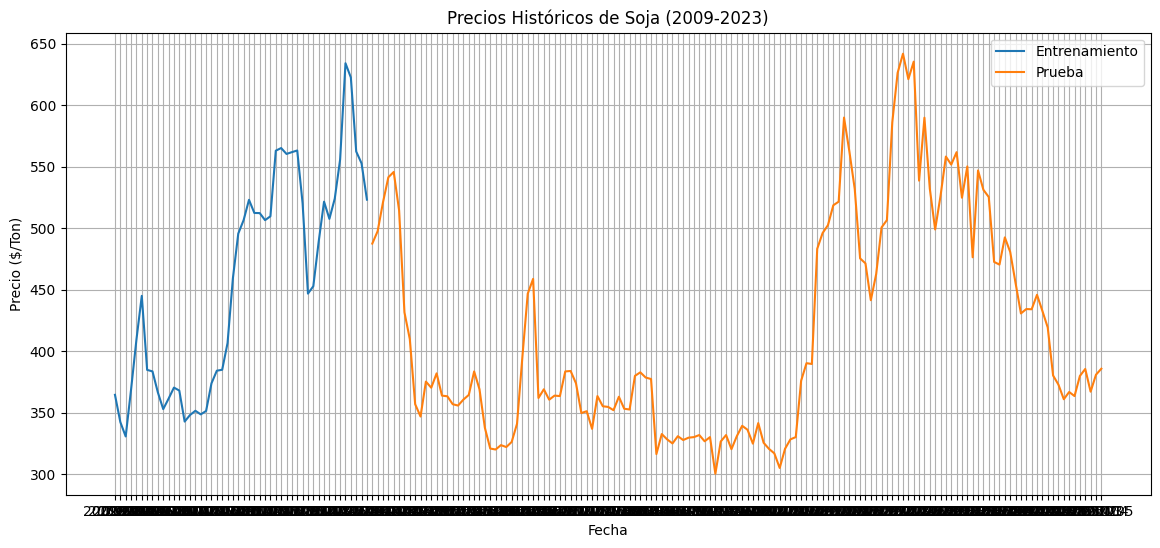

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Cargar y preparar datos
data = pd.read_excel('data.xlsx', parse_dates=['Fecha'], index_col='Fecha')
soybeans = data['SOYBEANS'].dropna()
train = soybeans['2009-01':'2013-12']
test = soybeans['2014-01':]

# Visualización de los datos
plt.figure(figsize=(14, 6))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Prueba')
plt.title('Precios Históricos de Soja (2009-2023)')
plt.xlabel('Fecha')
plt.ylabel('Precio ($/Ton)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Modelo ARIMA
arima_model = ARIMA(train, order=(2,1,2))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test))

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
import itertools
import warnings
import time

warnings.filterwarnings("ignore")

# --- Cargar los datos ---
# Ajusta esta ruta si el archivo limpio tiene un nombre diferente
file_path_cleaned = '/content/data_clean.xlsx' # <-- Asume que data_clean.xlsx existe y está limpio
dependent_variable = 'SOYBEANS'

print(f"--- Intentando cargar y preparar el archivo limpio: {file_path_cleaned} ---")

try:
    # Asumimos que el archivo limpio ya tiene la columna 'Fecha' como índice y es DatetimeIndex
    # y que ya se han manejado los NaNs.
    # Intentaremos cargar con parse_dates y index_col por si acaso.
    data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')

    if not isinstance(data_clean.index, pd.DatetimeIndex):
         print("Advertencia: El índice del archivo limpio NO es DatetimeIndex. Intentando convertir.")
         try:
             data_clean.index = pd.to_datetime(data_clean.index)
             print("Índice convertido a DatetimeIndex.")
         except Exception as e:
             print(f"Error al convertir el índice a DatetimeIndex: {str(e)}")
             data_clean = None # Invalidar si no se puede obtener un índice de fecha

    if data_clean is not None:
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
        print(f"Filas y columnas: {data_clean.shape}")
        print("Columnas: ", data_clean.columns.tolist())
        # Verificar NaNs (deberían ser mínimos si el archivo está limpio)
        print("\nNaNs por columna en el DataFrame limpio:")
        print(data_clean.isnull().sum())

        if data_clean.isnull().sum().sum() > 0:
             print("\nAdvertencia: Se encontraron NaNs en el archivo 'limpio'. Considera limpiarlos.")
             # Opcional: eliminar filas con NaNs si aún existen
             initial_rows_cleaned = data_clean.shape[0]
             data_clean.dropna(inplace=True)
             rows_after_dropna = data_clean.shape[0]
             if initial_rows_cleaned > rows_after_dropna:
                  print(f"Se eliminaron {initial_rows_cleaned - rows_after_dropna} filas con NaNs.")


    else:
        print("No se pudo cargar el archivo limpio o asegurar un índice DatetimeIndex.")


except FileNotFoundError:
    print(f"Error: El archivo limpio '{file_path_cleaned}' no se encontró.")
    data_clean = None
except Exception as e:
    print(f"Error al cargar o procesar el archivo limpio Excel: {str(e)}")
    data_clean = None


# --- Preparación de la variable dependiente y exógenas ---
if data_clean is not None and dependent_variable in data_clean.columns:
    y = data_clean[dependent_variable] # Variable dependiente
    print(f"\nVariable dependiente '{dependent_variable}' seleccionada.")

    # Identificar variables exógenas (todas las demás columnas excepto la dependiente)
    exog_cols = [col for col in data_clean.columns if col != dependent_variable]
    if exog_cols:
        X = data_clean[exog_cols] # Variables exógenas
        print(f"Variables exógenas identificadas: {exog_cols}")
        print(f"Dimensiones de X: {X.shape}")
        # Asegurarse de que no hay NaNs en las exógenas (debería estar limpio)
        if X.isnull().sum().sum() > 0:
            print("Advertencia: NaNs encontrados en el DataFrame exógeno X. Esto no debería ocurrir si 'data_clean' fue limpiado.")
            # Considera eliminar filas con NaNs en X si es necesario,
            # pero esto debe ser consistente con la variable dependiente y
            # debe hacerse *antes* de dividir en entrenamiento/prueba.
            # Si 'data_clean.dropna(inplace=True)' ya se hizo arriba, X ya estará sin NaNs en esas filas.
    else:
        X = None # No hay variables exógenas
        print("No se encontraron otras columnas para usar como variables exógenas.")

    # Verificar que y no tenga NaNs después de la selección
    if y.isnull().sum() > 0:
         print("Advertencia: NaNs encontrados en la variable dependiente 'y' después de la selección. Revisa la limpieza.")
         y.dropna(inplace=True) # Eliminar NaNs en la variable dependiente como último recurso


    # --- División Entrenamiento y Prueba ---
    # La data debe ir de enero 2009 a 2024 diciembre para entrenamiento
    # El pronóstico es para periodos reales enero 2024 a mayo 2025

    train_end_date = '2023-12-31' # Entrenar hasta fin de 2023
    forecast_start_date = '2024-01-01'
    forecast_end_date = '2025-05-31' # Pronosticar hasta fin de mayo 2025

    print(f"\nDividiendo datos: Entrenamiento hasta {train_end_date}, Pronóstico de {forecast_start_date} a {forecast_end_date}")

    try:
        # Conjunto de entrenamiento (y)
        y_train = y.loc[:train_end_date].copy() # Usar .loc[] con fechas y .copy()

        # Conjunto de prueba/real para comparar pronósticos (y_true)
        # Esto son los valores REALES para los periodos que queremos pronosticar
        y_true = y.loc[forecast_start_date:forecast_end_date].copy() # Usar .loc[] con fechas y .copy()

        # Conjuntos exógenos (si existen)
        if X is not None:
            X_train = X.loc[y_train.index].copy() # Alinear exógenas de entrenamiento con índice de y_train
            X_forecast = X.loc[y_true.index].copy() # Alinear exógenas de pronóstico con índice de y_true

            # Verificar NaNs en conjuntos divididos (esto es crucial)
            if X_train.isnull().sum().sum() > 0:
                 print("Error: NaNs encontrados en X_train después de dividir. Revisa la limpieza previa.")
                 X_train = None # Invalidar exógenas si tienen NaNs
            if X_forecast.isnull().sum().sum() > 0:
                 print("Error: NaNs encontrados en X_forecast (para pronóstico) después de dividir. Revisa la limpieza previa.")
                 X_forecast = None # Invalidar exógenas si tienen NaNs para el pronóstico

            # Si hay NaNs en X_train o X_forecast, no se puede usar SARIMAX con exógenas
            if X_train is None or X_forecast is None:
                 print("Advertencia: No se pueden usar variables exógenas debido a NaNs en X_train o X_forecast.")
                 X = X_train = X_forecast = None # Forzar a None para no usar exógenas

        else: # Si X era None desde el principio
             X_train = X_forecast = None


        # Verificar que los conjuntos no estén vacíos
        if y_train.empty:
            print("Error: El conjunto de entrenamiento (y_train) está vacío. Revisa la fecha de corte.")
            raise ValueError("Conjunto de entrenamiento vacío.")
        if y_true.empty:
            print("Error: El conjunto de prueba/pronóstico real (y_true) está vacío. Revisa los rangos de fecha.")
            # Podemos continuar el modelado, pero no podremos evaluar el pronóstico fuera de la muestra real.
            print("No se podrá evaluar el rendimiento del pronóstico fuera de la muestra.")
        else:
             print(f"Conjunto de entrenamiento (y_train): {len(y_train)} periodos")
             print(f"Conjunto de prueba/pronóstico real (y_true): {len(y_true)} periodos")
             if X is not None:
                  print(f"Conjunto exógeno entrenamiento (X_train): {len(X_train)} periodos")
                  print(f"Conjunto exógeno pronóstico (X_forecast): {len(X_forecast)} periodos")


    except KeyError as e:
        print(f"Error al dividir datos por rango de fecha: Una o ambas fechas de corte ('{train_end_date}', '{forecast_start_date}', '{forecast_end_date}') no se encontraron en el índice de la serie '{dependent_variable}'.")
        print("Primeros valores del índice:", y.index[:5].tolist())
        print("Últimos valores del índice:", y.index[-5:].tolist())
        raise e # Re-lanzar el error para detener la ejecución

else:
    print(f"No se pudo proceder con la división de datos. La variable '{dependent_variable}' no se encontró o el DataFrame no está cargado/limpio.")
    y_train = y_true = X_train = X_forecast = None


# --- Definir rangos de hiperparámetros para búsqueda ---
# p, d, q para el componente no estacional
p = d = q = range(0, 3) # Probar 0, 1, 2 para cada uno

# P, D, Q, s para el componente estacional
P = D = Q = range(0, 2) # Probar 0, 1 para cada uno (modelos estacionales simples)
s = 12 # Asumimos estacionalidad mensual (12 periodos)

# Generar todas las combinaciones posibles de (p, d, q)
pdq = list(itertools.product(p, d, q))

# Generar todas las combinaciones posibles de (P, D, Q)
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(P, D, Q))]

print(f"\nGenerando combinaciones de órdenes:")
print(f"Órdenes no estacionales (p,d,q): {len(pdq)}")
print(f"Órdenes estacionales (P,D,Q,s) con s={s}: {len(seasonal_pdq)}")

# Tipos de modelos a probar
model_types = ['ARIMA', 'SARIMA']
if X_train is not None and X_forecast is not None:
    model_types.append('SARIMAX')
    print("Incluyendo modelos SARIMAX en la búsqueda.")
else:
    print("Variables exógenas no disponibles/válidas. Solo se probarán modelos ARIMA y SARIMA.")


# Lista para almacenar los resultados de los modelos
results_list = []

# Contador para limitar el número de modelos probados (máx 100)
model_count = 0
max_models = 100 # Limitar a 100 modelos como solicitaste

print(f"\n--- Iniciando búsqueda de los mejores modelos (hasta {max_models} modelos) ---")
start_time_search = time.time()

# Iterar sobre las combinaciones de hiperparámetros y tipos de modelo
for order in pdq:
    # Si el modelo es SARIMA o SARIMAX, iterar también sobre las órdenes estacionales
    if 'SARIMA' in model_types or 'SARIMAX' in model_types:
        for seasonal_order in seasonal_pdq:

            # Probar modelo SARIMA (sin exógenas)
            if 'SARIMA' in model_types:
                 if model_count < max_models:
                    model_count += 1
                    model_name = f"SARIMA({order},{seasonal_order[0]},{seasonal_order[1]},{seasonal_order[2]})_{seasonal_order[3]}"
                    print(f"\nProbando Modelo {model_count}/{max_models}: {model_name}")
                    t_start = time.time()
                    try:
                        model = SARIMAX(y_train,
                                        order=order,
                                        seasonal_order=seasonal_order,
                                        enforce_stationarity=False, # Permitir d > 0 para no estacional
                                        enforce_invertibility=False)
                        model_fit = model.fit(disp=False) # disp=False para ajuste silencioso
                        t_fit = time.time() - t_start

                        # Validar supuestos (usando p-valores, un valor bajo (<0.05) indica violación)
                        # Ljung-Box test para autocorrelación de residuos
                        lb_test = acorr_ljungbox(model_fit.resid, lags=[20], return_df=True) # Testear en lag 20
                        lb_pvalue = lb_test.loc[20, 'lb_pvalue'] if not lb_test.empty else np.nan

                        # Prueba de normalidad (Jarque-Bera en statsmodels.stats.diagnostic)
                        jb_test = sm.stats.jarque_bera(model_fit.resid)
                        jb_pvalue = jb_test[1]

                        # Criterios de información
                        aic = model_fit.aic
                        bic = model_fit.bic

                        # Pronóstico para evaluación fuera de la muestra
                        # steps = len(y_true) si y_true tiene los periodos futuros
                        # Si y_true está vacío, no podemos evaluar fuera de la muestra real.
                        forecast_oos = None # OOS = Out-of-sample
                        rmse_oos = np.nan
                        mae_oos = np.nan
                        mape_oos = np.nan
                        if not y_true.empty:
                            t_forecast_start = time.time()
                            try:
                                # steps = Número de periodos en y_true
                                forecast_oos = model_fit.forecast(steps=len(y_true))
                                t_forecast = time.time() - t_forecast_start

                                # Evaluar el pronóstico comparado con y_true
                                # statsmodels forecast devuelve una Series con DatetimeIndex
                                # Asegurarse de que los índices coinciden
                                if forecast_oos.index.equals(y_true.index):
                                    rmse_oos = np.sqrt(mean_squared_error(y_true, forecast_oos))
                                    mae_oos = mean_absolute_error(y_true, forecast_oos)
                                    # Calcular MAPE manualmente (Mean Absolute Percentage Error)
                                    # Evitar división por cero si y_true tiene valores 0
                                    mape_oos = np.mean(np.abs((y_true - forecast_oos) / y_true)) * 100 if (y_true != 0).all() else np.nan
                                else:
                                     print("Advertencia: Índices de forecast_oos y y_true no coinciden para evaluación.")
                                     print("Índice forecast_oos:", forecast_oos.index.tolist())
                                     print("Índice y_true:", y_true.index.tolist())
                                     # Considerar reindexar forecast_oos a y_true.index si es apropiado
                                     # forecast_oos = forecast_oos.reindex(y_true.index)
                                     # ... re-calcular métricas si reindexación exitosa ...

                            except Exception as forecast_e:
                                print(f"Error al generar o evaluar pronóstico OOS para {model_name}: {str(forecast_e)}")
                                # Esto podría ocurrir si la fecha final del índice pronosticado no encaja bien.
                                # Asegurarse de que y_true.index es correcto.

                        # Almacenar resultados
                        results_list.append({
                            'Modelo': model_name,
                            'AIC': aic,
                            'BIC': bic,
                            'Ljung-Box p-value (Lag 20)': lb_pvalue,
                            'Jarque-Bera p-value': jb_pvalue,
                            'RMSE (OOS)': rmse_oos,
                            'MAE (OOS)': mae_oos,
                            'MAPE (OOS)': mape_oos,
                            'Tiempo Ajuste (s)': t_fit,
                            'Tiempo Pronóstico (s)': t_forecast if forecast_oos is not None else np.nan,
                            'Status': 'OK'
                        })

                    except Exception as e:
                        print(f"Error ajustando {model_name}: {str(e)}")
                        results_list.append({
                            'Modelo': model_name,
                            'AIC': np.nan,
                            'BIC': np.nan,
                            'Ljung-Box p-value (Lag 20)': np.nan,
                            'Jarque-Bera p-value': np.nan,
                            'RMSE (OOS)': np.nan,
                            'MAE (OOS)': np.nan,
                            'MAPE (OOS)': np.nan,
                            'Tiempo Ajuste (s)': time.time() - t_start,
                            'Tiempo Pronóstico (s)': np.nan,
                            'Status': f'Error: {str(e)}'
                        })

            # Probar modelo SARIMAX (con exógenas) - solo si X_train y X_forecast son válidos
            if 'SARIMAX' in model_types and X_train is not None and X_forecast is not None:
                if model_count < max_models:
                    model_count += 1
                    model_name = f"SARIMAX({order},{seasonal_order[0]},{seasonal_order[1]},{seasonal_order[2]})_{seasonal_order[3]}"
                    print(f"\nProbando Modelo {model_count}/{max_models}: {model_name} con exógenas")
                    t_start = time.time()
                    try:
                        model = SARIMAX(y_train,
                                        exog=X_train, # Usar exógenas de entrenamiento
                                        order=order,
                                        seasonal_order=seasonal_order,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
                        model_fit = model.fit(disp=False)
                        t_fit = time.time() - t_start

                        # Validar supuestos
                        lb_test = acorr_ljungbox(model_fit.resid, lags=[20], return_df=True)
                        lb_pvalue = lb_test.loc[20, 'lb_pvalue'] if not lb_test.empty else np.nan

                        jb_test = sm.stats.jarque_bera(model_fit.resid)
                        jb_pvalue = jb_test[1]

                        aic = model_fit.aic
                        bic = model_fit.bic

                        # Pronóstico fuera de la muestra con exógenas de pronóstico
                        forecast_oos = None
                        rmse_oos = np.nan
                        mae_oos = np.nan
                        mape_oos = np.nan
                        if not y_true.empty and X_forecast is not None:
                             t_forecast_start = time.time()
                             try:
                                  # Usar exógenas de pronóstico que coinciden con los periodos de y_true
                                  # steps DEBE ser len(y_true), y exog DEBE tener esa misma longitud
                                  forecast_oos = model_fit.forecast(steps=len(y_true), exog=X_forecast)
                                  t_forecast = time.time() - t_forecast_start

                                  if forecast_oos.index.equals(y_true.index):
                                      rmse_oos = np.sqrt(mean_squared_error(y_true, forecast_oos))
                                      mae_oos = mean_absolute_error(y_true, forecast_oos)
                                      mape_oos = np.mean(np.abs((y_true - forecast_oos) / y_true)) * 100 if (y_true != 0).all() else np.nan
                                  else:
                                      print("Advertencia: Índices de forecast_oos y y_true no coinciden para evaluación de SARIMAX.")
                                      print("Índice forecast_oos:", forecast_oos.index.tolist())
                                      print("Índice y_true:", y_true.index.tolist())


                             except Exception as forecast_e:
                                 print(f"Error al generar o evaluar pronóstico OOS para {model_name} (SARIMAX): {str(forecast_e)}")


                        # Almacenar resultados
                        results_list.append({
                            'Modelo': model_name,
                            'AIC': aic,
                            'BIC': bic,
                            'Ljung-Box p-value (Lag 20)': lb_pvalue,
                            'Jarque-Bera p-value': jb_pvalue,
                            'RMSE (OOS)': rmse_oos,
                            'MAE (OOS)': mae_oos,
                            'MAPE (OOS)': mape_oos,
                            'Tiempo Ajuste (s)': t_fit,
                            'Tiempo Pronóstico (s)': t_forecast if forecast_oos is not None else np.nan,
                            'Status': 'OK'
                        })

                    except Exception as e:
                        print(f"Error ajustando {model_name} (SARIMAX): {str(e)}")
                        results_list.append({
                            'Modelo': model_name,
                            'AIC': np.nan,
                            'BIC': np.nan,
                            'Ljung-Box p-value (Lag 20)': np.nan,
                            'Jarque-Bera p-value': np.nan,
                            'RMSE (OOS)': np.nan,
                            'MAE (OOS)': np.nan,
                            'MAPE (OOS)': np.nan,
                            'Tiempo Ajuste (s)': time.time() - t_start,
                            'Tiempo Pronóstico (s)': np.nan,
                            'Status': f'Error: {str(e)}'
                        })

            # Si ya probamos max_models, salir de los bucles
            if model_count >= max_models:
                break
        # Si ya probamos max_models, salir del bucle exterior
        if model_count >= max_models:
            break

    # Si solo probamos ARIMA (sin componente estacional ni exógenas)
    elif 'ARIMA' in model_types and 'SARIMA' not in model_types and 'SARIMAX' not in model_types:
         if model_count < max_models:
            model_count += 1
            model_name = f"ARIMA({order[0]},{order[1]},{order[2]})"
            print(f"\nProbando Modelo {model_count}/{max_models}: {model_name}")
            t_start = time.time()
            try:
                model = ARIMA(y_train,
                              order=order,
                              enforce_stationarity=False,
                              enforce_invertibility=False)
                model_fit = model.fit()
                t_fit = time.time() - t_start

                # Validar supuestos
                lb_test = acorr_ljungbox(model_fit.resid, lags=[20], return_df=True)
                lb_pvalue = lb_test.loc[20, 'lb_pvalue'] if not lb_test.empty else np.nan

                jb_test = sm.stats.jarque_bera(model_fit.resid)
                jb_pvalue = jb_test[1]

                aic = model_fit.aic
                bic = model_fit.bic

                # Pronóstico fuera de la muestra
                forecast_oos = None
                rmse_oos = np.nan
                mae_oos = np.nan
                mape_oos = np.nan
                if not y_true.empty:
                     t_forecast_start = time.time()
                     try:
                          forecast_oos = model_fit.forecast(steps=len(y_true))
                          t_forecast = time.time() - t_forecast_start

                          if forecast_oos.index.equals(y_true.index):
                              rmse_oos = np.sqrt(mean_squared_error(y_true, forecast_oos))
                              mae_oos = mean_absolute_error(y_true, forecast_oos)
                              mape_oos = np.mean(np.abs((y_true - forecast_oos) / y_true)) * 100 if (y_true != 0).all() else np.nan
                          else:
                               print("Advertencia: Índices de forecast_oos y y_true no coinciden para evaluación de ARIMA.")
                               print("Índice forecast_oos:", forecast_oos.index.tolist())
                               print("Índice y_true:", y_true.index.tolist())

                     except Exception as forecast_e:
                         print(f"Error al generar o evaluar pronóstico OOS para {model_name} (ARIMA): {str(forecast_e)}")


                # Almacenar resultados
                results_list.append({
                    'Modelo': model_name,
                    'AIC': aic,
                    'BIC': bic,
                    'Ljung-Box p-value (Lag 20)': lb_pvalue,
                    'Jarque-Bera p-value': jb_pvalue,
                    'RMSE (OOS)': rmse_oos,
                    'MAE (OOS)': mae_oos,
                    'MAPE (OOS)': mape_oos,
                    'Tiempo Ajuste (s)': t_fit,
                    'Tiempo Pronóstico (s)': t_forecast if forecast_oos is not None else np.nan,
                    'Status': 'OK'
                })

            except Exception as e:
                print(f"Error ajustando {model_name} (ARIMA): {str(e)}")
                results_list.append({
                    'Modelo': model_name,
                    'AIC': np.nan,
                    'BIC': np.nan,
                    'Ljung-Box p-value (Lag 20)': np.nan,
                    'Jarque-Bera p-value': np.nan,
                    'RMSE (OOS)': np.nan,
                    'MAE (OOS)': np.nan,
                    'MAPE (OOS)': np.nan,
                    'Tiempo Ajuste (s)': time.time() - t_start,
                    'Tiempo Pronóstico (s)': np.nan,
                    'Status': f'Error: {str(e)}'
                })
         # Si ya probamos max_models, salir del bucle
         if model_count >= max_models:
            break


end_time_search = time.time()
print(f"\n--- Búsqueda de modelos completada. Total modelos probados: {model_count}. Tiempo total: {end_time_search - start_time_search:.2f} segundos ---")


# --- Imprimir tabla comparativa ---
print("\n--- Tabla Comparativa de Modelos ---")

if results_list:
    results_df = pd.DataFrame(results_list)

    # Ordenar por una métrica de pronóstico fuera de la muestra (ej. RMSE)
    # Priorizamos modelos que se ajustaron correctamente (Status == 'OK') y que tienen métricas OOS (y_true no estaba vacío)
    results_df_sorted = results_df[results_df['Status'] == 'OK'].sort_values(by='RMSE (OOS)', ascending=True)

    # Imprimir la tabla
    # Podemos redondear las métricas para una mejor lectura
    results_df_sorted = results_df_sorted.round({
        'AIC': 2, 'BIC': 2, 'Ljung-Box p-value (Lag 20)': 3, 'Jarque-Bera p-value': 3,
        'RMSE (OOS)': 3, 'MAE (OOS)': 3, 'MAPE (OOS)': 2,
        'Tiempo Ajuste (s)': 2, 'Tiempo Pronóstico (s)': 2
    })

    # Mostrar la tabla completa (o las primeras filas si es muy larga)
    # Usar display para mejor formato en Jupyter
    display(results_df_sorted)

    # --- Señalar el mejor modelo ---
    print("\n--- Mejor Modelo ---")

    # El mejor modelo es el que mejor predice fuera de la muestra
    # Nos basamos principalmente en RMSE/MAE/MAPE OOS. RMSE es una opción común.
    # Solo consideramos modelos que pudieron generar pronósticos OOS.
    best_model_row = results_df_sorted.dropna(subset=['RMSE (OOS)']).iloc[0] if not results_df_sorted.dropna(subset=['RMSE (OOS)']).empty else None

    if best_model_row is not None:
        print(f"El mejor modelo según RMSE fuera de la muestra es:")
        print(f"Modelo: {best_model_row['Modelo']}")
        print(f"RMSE (OOS): {best_model_row['RMSE (OOS)']:.3f}")
        print(f"MAE (OOS): {best_model_row['MAE (OOS)']:.3f}")
        print(f"MAPE (OOS): {best_model_row['MAPE (OOS)']:.2f}%")
        print("\nConsideraciones adicionales (para validación econométrica):")
        print(f"Ljung-Box p-value (Lag 20): {best_model_row['Ljung-Box p-value (Lag 20)']:.3f} (> 0.05 deseable para residuos no correlacionados)")
        print(f"Jarque-Bera p-value: {best_model_row['Jarque-Bera p-value']:.3f} (> 0.05 deseable para residuos normales)")
        print(f"AIC: {best_model_row['AIC']:.2f} (Menor es mejor)")
        print(f"BIC: {best_model_row['BIC']:.2f} (Menor es mejor)")

        # Opcional: Re-ajustar el mejor modelo en todos los datos disponibles hasta 2024 dic
        # para obtener el pronóstico final para 2025.
        # Esto puede ser necesario si quieres pronosticar más allá de y_true.index
        # Pero si y_true ya cubre los periodos que te interesan (Ene 2024 - May 2025),
        # el pronóstico `forecast_oos` del mejor modelo ya es tu pronóstico final.

        # Si quieres el pronóstico específico para Ene 2024 a May 2025 del mejor modelo:
        if not y_true.empty and best_model_row['Modelo'] in [r['Modelo'] for r in results_list if r['Status'] == 'OK']:
             print("\n--- Pronóstico del Mejor Modelo (Ene 2024 - May 2025) ---")
             # Encontrar el ajuste del mejor modelo para generar su pronóstico específico si lo necesitas de nuevo
             # O simplemente usar el forecast_oos que ya calculamos si lo guardaste junto con los resultados.
             # Para simplificar, vamos a reajustar solo el mejor modelo en y_train
             # y obtener el pronóstico para los periodos de y_true.
             # Si quieres pronosticar *más allá* de y_true, necesitarías reajustar en todos los datos (y)
             # hasta el final de 2024 y proveer X_forecast extendido si aplica.

             # Reajustar el mejor modelo en y_train para obtener el objeto model_fit
             # Esto es un poco ineficiente si ya calculaste forecast_oos antes,
             # pero asegura que tienes el objeto fit del mejor modelo.
             best_model_name = best_model_row['Modelo']
             is_sarimax = 'SARIMAX' in best_model_name
             parts = best_model_name.split('(')[1].split(')')[0].split(',')
             order_p = int(parts[0])
             order_d = int(parts[1])
             order_q = int(parts[2])
             order = (order_p, order_d, order_q)

             if is_sarimax or 'SARIMA' in best_model_name:
                  seasonal_parts = best_model_name.split(')_')[0].split('(')[-1].split(',') # Extraer (P,D,Q)
                  s_val = int(best_model_name.split('_')[1]) # Extraer s
                  seasonal_order = (int(seasonal_parts[0]), int(seasonal_parts[1]), int(seasonal_parts[2]), s_val)

             try:
                  print(f"Reajustando el mejor modelo ({best_model_name}) para generar el pronóstico final...")
                  if is_sarimax:
                       final_model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
                  elif 'SARIMA' in best_model_name:
                       final_model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
                  else: # ARIMA
                       final_model = ARIMA(y_train, order=order, enforce_stationarity=False, enforce_invertibility=False)

                  final_model_fit = final_model.fit(disp=False)

                  # Generar el pronóstico final para los periodos de y_true (Ene 2024 - May 2025)
                  # Asegurarse de usar X_forecast si es SARIMAX
                  final_forecast = final_model_fit.forecast(steps=len(y_true), exog=X_forecast if is_sarimax else None)

                  # Mostrar el pronóstico
                  display(final_forecast)

             except Exception as e:
                  print(f"Error al reajustar o pronosticar con el mejor modelo: {str(e)}")

    else:
        print("No se encontraron modelos que ajustaran correctamente o generaran pronósticos OOS válidos.")

else:
    print("No se pudieron ajustar modelos. La lista de resultados está vacía.")

print("\n--- Fin del proceso de búsqueda y comparación ---")

--- Intentando cargar y preparar el archivo limpio: /content/data_clean.xlsx ---
Archivo limpio cargado exitosamente en 'data_clean'.
Filas y columnas: (204, 5)
Columnas:  ['SOYBEANS', 'STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

NaNs por columna en el DataFrame limpio:
SOYBEANS        0
STOCK           5
F_SOYMEALFIN    0
BASIS           5
SOYOIL          5
dtype: int64

Advertencia: Se encontraron NaNs en el archivo 'limpio'. Considera limpiarlos.
Se eliminaron 5 filas con NaNs.

Variable dependiente 'SOYBEANS' seleccionada.
Variables exógenas identificadas: ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
Dimensiones de X: (199, 4)

Dividiendo datos: Entrenamiento hasta 2023-12-31, Pronóstico de 2024-01-01 a 2025-05-31
Conjunto de entrenamiento (y_train): 180 periodos
Conjunto de prueba/pronóstico real (y_true): 17 periodos
Conjunto exógeno entrenamiento (X_train): 180 periodos
Conjunto exógeno pronóstico (X_forecast): 17 periodos

Generando combinaciones de órdenes:
Órdenes no estacion

Modelo      AIC      BIC  Ljung-Box p-value (Lag 20)  \
15  SARIMAX((0, 0, 0),1,1,1)_12  1784.22  1805.52                         0.0   
23  SARIMAX((0, 0, 1),0,1,1)_12  1660.88  1682.14                         0.0   
31  SARIMAX((0, 0, 1),1,1,1)_12  1658.90  1683.20                         0.0   
25  SARIMAX((0, 0, 1),1,0,0)_12  1785.23  1807.10                         0.0   
9   SARIMAX((0, 0, 0),1,0,0)_12  1912.54  1931.28                         0.0   
..                          ...      ...      ...                         ...   
18   SARIMA((0, 0, 1),0,0,1)_12  2120.52  2129.85                         0.0   
2    SARIMA((0, 0, 0),0,0,1)_12  2332.82  2339.06                         0.0   
16   SARIMA((0, 0, 1),0,0,0)_12  2451.82  2458.19                         0.0   
32   SARIMA((0, 0, 2),0,0,0)_12  2251.25  2260.78                         0.0   
0    SARIMA((0, 0, 0),0,0,0)_12  2691.44  2694.63                         0.0   

    Jarque-Bera p-value  RMSE (OOS)  MAE (OOS)  MAPE (OOS)  Tiempo Ajuste (s)  \
15                0.000      17.350     12.886        3.18               3.36   
23                0.000      17.728     13.329        3.28               2.59   
31                0.000      17.784     13.077        3.20               1.72   
25                0.505      21.979     17.470        4.38               3.02   
9                 0.128      23.325     19.393        4.84               1.18   
..                  ...         ...        ...         ...                ...   
18                0.000     252.461    229.695       58.61               0.90   
2                 0.138     257.987    236.803       60.32               0.63   
16                0.560     386.061    377.759       95.16               0.42   
32                0.000     390.697    388.355       97.48               0.38   
0                 0.000     401.077    399.811      100.00               0.06   

    Tiempo Pronóstico (s) Status  
15                   0.01     OK  
23                   0.01     OK  
31                   0.01     OK  
25                   0.02     OK  
9                    0.01     OK  
..                    ...    ...  
18                   0.04     OK  
2                    0.02     OK  
16                   0.01     OK  
32                   0.02     OK  
0                    0.05     OK  

[100 rows x 11 columns]


--- Mejor Modelo ---
El mejor modelo según RMSE fuera de la muestra es:
Modelo: SARIMAX((0, 0, 0),1,1,1)_12
RMSE (OOS): 17.350
MAE (OOS): 12.886
MAPE (OOS): 3.18%

Consideraciones adicionales (para validación econométrica):
Ljung-Box p-value (Lag 20): 0.000 (> 0.05 deseable para residuos no correlacionados)
Jarque-Bera p-value: 0.000 (> 0.05 deseable para residuos normales)
AIC: 1784.22 (Menor es mejor)
BIC: 1805.52 (Menor es mejor)

--- Pronóstico del Mejor Modelo (Ene 2024 - May 2025) ---


ValueError: invalid literal for int() with base 10: ''

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

# Asegúrate de que 'ts_data' y 'best_sarimax_model' están disponibles en tu entorno
# desde la celda anterior.

print("--- Graficando Valores Reales y Ajuste del Modelo SARIMA ---")

if 'ts_data' not in locals() or ts_data is None or ts_data.empty:
    print("Error: La serie de tiempo 'ts_data' no está disponible o está vacía. No se puede graficar.")
elif 'best_sarimax_model' not in locals() or best_sarimax_model is None:
    print("Error: El objeto 'best_sarimax_model' no está disponible o es None. Asegúrate de que el modelo SARIMA se ajustó correctamente.")
else:
    try:
        # Obtener los valores ajustados (in-sample predictions) del modelo SARIMA
        # El método predict() sin argumentos predecirá sobre el período de entrenamiento
        sarima_fitted_values = best_sarimax_model.predict()

        # Asegurarse de que el índice de los valores ajustados coincide con el de los datos reales
        # Esto debería ser automático con statsmodels predict(), pero verificar
        if not sarima_fitted_values.index.equals(ts_data.index):
             print("Advertencia: Los índices de los valores ajustados y los datos reales no coinciden. Verificando alineación.")
             # Si no coinciden, intenta alinear por índice común (aunque no debería ser necesario si ts_data fue el input)
             common_index = ts_data.index.intersection(sarima_fitted_values.index)
             ts_data_aligned = ts_data.loc[common_index]
             sarima_fitted_values_aligned = sarima_fitted_values.loc[common_index]
             print(f"Alineados {len(common_index)} puntos para graficar.")
        else:
             ts_data_aligned = ts_data
             sarima_fitted_values_aligned = sarima_fitted_values


        # Configurar template profesional para Plotly
        pio.templates.default = "plotly_white" # Tema profesional

        # Crear la figura de Plotly
        fig = go.Figure()

        # Añadir la serie de tiempo real
        fig.add_trace(go.Scatter(
            x=ts_data_aligned.index,
            y=ts_data_aligned.values,
            mode='lines',
            name='Valores Reales',
            line=dict(color='blue', width=2)
        ))

        # Añadir los valores ajustados del modelo SARIMA
        fig.add_trace(go.Scatter(
            x=sarima_fitted_values_aligned.index,
            y=sarima_fitted_values_aligned.values,
            mode='lines',
            name=f'Ajuste SARIMA {best_sarimax_model.order}, {best_sarimax_model.seasonal_order}',
            line=dict(color='red', width=2, dash='dash') # Usar línea discontinua para el ajuste
        ))

        # Configurar layout
        fig.update_layout(
            title=f'Ajuste del Modelo SARIMA para {dependent_variable}: Valores Reales vs. Ajustados',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable, # Usar el nombre de la variable dependiente como título del eje Y
            hovermode='x unified', # Mostrar hovercard unificado por fecha
            showlegend=True,
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=20, r=20, t=60, b=20),
            xaxis=dict(
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=5, label="5y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 ),
                 rangeslider=dict( visible=True ),
                 type="date" # Asegurar que Plotly trate el eje X como fechas
             )
        )

        print("\nGráfico generado.")
        # Mostrar el gráfico
        fig.show()

    except Exception as e:
        print(f"Error al generar el gráfico de ajuste: {e}")


print("\n--- Fin del proceso de graficación ---")

--- Graficando Valores Reales y Ajuste del Modelo SARIMA ---
Error: La serie de tiempo 'ts_data' no está disponible o está vacía. No se puede graficar.

--- Fin del proceso de graficación ---


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display # Import the display function

# Asegúrate de que 'ts_data' y 'best_sarimax_model' están disponibles en tu entorno
# desde la celda anterior.

print("--- Graficando Valores Reales y Ajuste del Modelo SARIMA ---")

if 'ts_data' not in locals() or ts_data is None or ts_data.empty:
    print("Error: La serie de tiempo 'ts_data' no está disponible o está vacía. No se puede graficar.")
elif 'best_sarimax_model' not in locals() or best_sarimax_model is None:
    print("Error: El objeto 'best_sarimax_model' no está disponible o es None. Asegúrate de que el modelo SARIMA se ajustó correctamente.")
else:
    try:
        # Obtener los valores ajustados (in-sample predictions) del modelo SARIMA
        # El método predict() sin argumentos predecirá sobre el período de entrenamiento
        sarima_fitted_values = best_sarimax_model.predict()

        # Asegurarse de que el índice de los valores ajustados coincide con el de los datos reales
        # Esto debería ser automático con statsmodels predict(), pero verificar
        if not sarima_fitted_values.index.equals(ts_data.index):
             print("Advertencia: Los índices de los valores ajustados y los datos reales no coinciden. Verificando alineación.")
             # Si no coinciden, intenta alinear por índice común (aunque no debería ser necesario si ts_data fue el input)
             common_index = ts_data.index.intersection(sarima_fitted_values.index)
             ts_data_aligned = ts_data.loc[common_index]
             sarima_fitted_values_aligned = sarima_fitted_values.loc[common_index]
             print(f"Alineados {len(common_index)} puntos para graficar.")
        else:
             ts_data_aligned = ts_data
             sarima_fitted_values_aligned = sarima_fitted_values


        # Configurar template profesional para Plotly
        pio.templates.default = "plotly_white" # Tema profesional

        # Crear la figura de Plotly
        fig = go.Figure()

        # Añadir la serie de tiempo real
        fig.add_trace(go.Scatter(
            x=ts_data_aligned.index,
            y=ts_data_aligned.values,
            mode='lines',
            name='Valores Reales',
            line=dict(color='blue', width=2)
        ))

        # Añadir los valores ajustados del modelo SARIMA
        fig.add_trace(go.Scatter(
            x=sarima_fitted_values_aligned.index,
            y=sarima_fitted_values_aligned.values,
            mode='lines',
            name=f'Ajuste SARIMA {best_sarimax_model.order}, {best_sarimax_model.seasonal_order}',
            line=dict(color='red', width=2, dash='dash') # Usar línea discontinua para el ajuste
        ))

        # Configurar layout
        fig.update_layout(
            title=f'Ajuste del Modelo SARIMA para {dependent_variable}: Valores Reales vs. Ajustados',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable, # Usar el nombre de la variable dependiente como título del eje Y
            hovermode='x unified', # Mostrar hovercard unificado por fecha
            showlegend=True,
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=20, r=20, t=60, b=20),
            xaxis=dict(
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=5, label="5y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 ),
                 rangeslider=dict( visible=True ),
                 type="date" # Asegurar que Plotly trate el eje X como fechas
             )
        )

        print("\nGráfico generado.")
        # Mostrar el gráfico usando display
        display(fig) # Changed from fig.show()

    except Exception as e:
        print(f"Error al generar el gráfico de ajuste: {e}")


print("\n--- Fin del proceso de graficación ---")

--- Graficando Valores Reales y Ajuste del Modelo SARIMA ---
Error: La serie de tiempo 'ts_data' no está disponible o está vacía. No se puede graficar.

--- Fin del proceso de graficación ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display
# Import statsmodels components if needed later in this combined cell,
# although the plotting itself only needs the model object and ts_data
# from statsmodels.tsa.statespace.sarimax import SARIMAX # Only needed if fitting here
# from statsmodels.tsa.stattools import adfuller, kpss # Only needed if performing tests here

# --- Configuración de datos ---
# Ajusta esta ruta si el archivo limpio tiene un nombre diferente
file_path_cleaned = '/content/data_clean.xlsx' # <-- Asume que data_clean.xlsx existe y está limpio
dependent_variable = 'SOYBEANS' # Variable target a graficar

print(f"--- Intentando cargar y preparar el archivo limpio para graficar: {file_path_cleaned} ---")

# --- Cargar y preparar los datos ---
data_clean = None # Initialize data_clean to None
ts_data = None # Initialize ts_data to None

try:
    # Cargar el archivo Excel
    # Asumimos que tiene una columna 'Fecha' para el índice y otras columnas de datos.
    data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')

    # Verificar y asegurar que el índice es DatetimeIndex
    if not isinstance(data_clean.index, pd.DatetimeIndex):
         print("Advertencia: El índice del archivo limpio NO es DatetimeIndex. Intentando convertir.")
         try:
             data_clean.index = pd.to_datetime(data_clean.index)
             print("Índice convertido a DatetimeIndex.")
         except Exception as e:
             print(f"Error al convertir el índice a DatetimeIndex: {str(e)}")
             data_clean = None # Invalidar si no se puede obtener un índice de fecha válido

    if data_clean is not None:
        print("Archivo limpio cargado y procesado para graficar exitosamente en 'data_clean'.")
        print(f"Filas y columnas: {data_clean.shape}")
        print("Columnas: ", data_clean.columns.tolist())
        # Verificar la columna dependiente
        if dependent_variable in data_clean.columns:
             # Extraer la serie de tiempo de la variable dependiente
             ts_data = data_clean[dependent_variable]
             print(f"\nSerie de tiempo '{dependent_variable}' extraída en 'ts_data'.")
             # display(ts_data.head()) # Opcional: mostrar cabeza de la serie
        else:
             print(f"Error: La columna dependiente '{dependent_variable}' no se encuentra en el DataFrame cargado.")
             ts_data = None # Asegurar que ts_data es None si la columna no existe


except FileNotFoundError:
    print(f"Error: El archivo '{file_path_cleaned}' no se encontró.")
    data_clean = None
    ts_data = None
except Exception as e:
    print(f"Error al cargar o procesar el archivo Excel limpio: {str(e)}")
    data_clean = None
    ts_data = None


print("\n--- Graficando Valores Reales y Ajuste del Modelo SARIMA ---")

# Ahora, 'ts_data' debería estar disponible si la carga y extracción fueron exitosas.
# 'best_sarimax_model' still needs to come from a previous cell where the model was fitted.

if ts_data is None or ts_data.empty:
    print("Error: La serie de tiempo 'ts_data' no está disponible o está vacía después de intentar cargar. No se puede graficar.")
elif 'best_sarimax_model' not in locals() or best_sarimax_model is None:
    # This error now correctly points out the missing model, not the data.
    print("Error: El objeto 'best_sarimax_model' no está disponible o es None.")
    print("Asegúrate de ejecutar la celda anterior que realiza el Grid Search y ajusta el mejor modelo SARIMA.")
else:
    try:
        # Obtener los valores ajustados (in-sample predictions) del modelo SARIMA
        # El método predict() sin argumentos predecirá sobre el período de entrenamiento
        # Usamos el índice de ts_data para asegurar la alineación, aunque predict()
        # de statsmodels suele usar el índice del objeto con el que se ajustó.
        sarima_fitted_values = best_sarimax_model.predict(start=ts_data.index.min(), end=ts_data.index.max())


        # Configurar template profesional para Plotly
        pio.templates.default = "plotly_white" # Tema profesional

        # Crear la figura de Plotly
        fig = go.Figure()

        # Añadir la serie de tiempo real
        fig.add_trace(go.Scatter(
            x=ts_data.index, # Usamos el índice de ts_data directamente
            y=ts_data.values,
            mode='lines',
            name='Valores Reales',
            line=dict(color='blue', width=2)
        ))

        # Añadir los valores ajustados del modelo SARIMA
        # Asegúrate de que los índices de sarima_fitted_values y ts_data coinciden para la gráfica
        # (la predicción sobre el rango de entrenamiento debería asegurar esto)
        fig.add_trace(go.Scatter(
            x=sarima_fitted_values.index, # Usamos el índice de los fitted values
            y=sarima_fitted_values.values,
            mode='lines',
            name=f'Ajuste SARIMA {best_sarimax_model.order}, {best_sarimax_model.seasonal_order}',
            line=dict(color='red', width=2, dash='dash') # Usar línea discontinua para el ajuste
        ))

        # Configurar layout
        fig.update_layout(
            title=f'Ajuste del Modelo SARIMA para {dependent_variable}: Valores Reales vs. Ajustados',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable, # Usar el nombre de la variable dependiente como título del eje Y
            hovermode='x unified', # Mostrar hovercard unificado por fecha
            showlegend=True,
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=20, r=20, t=60, b=20),
            xaxis=dict(
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=5, label="5y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 ),
                 rangeslider=dict( visible=True ),
                 type="date" # Asegurar que Plotly trate el eje X como fechas
             )
        )

        print("\nGráfico generado.")
        # Mostrar el gráfico usando display
        display(fig)

    except Exception as e:
        print(f"Error al generar el gráfico de ajuste: {e}")
        # En caso de error en la graficación, aún así verificar si ts_data se cargó
        if ts_data is not None and not ts_data.empty:
             print("\nVerifica que el objeto 'best_sarimax_model' es válido y está ajustado.")


print("\n--- Fin del proceso de graficación ---")

--- Intentando cargar y preparar el archivo limpio para graficar: /content/data_clean.xlsx ---
Archivo limpio cargado y procesado para graficar exitosamente en 'data_clean'.
Filas y columnas: (204, 5)
Columnas:  ['SOYBEANS', 'STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

Serie de tiempo 'SOYBEANS' extraída en 'ts_data'.

--- Graficando Valores Reales y Ajuste del Modelo SARIMA ---
Error: El objeto 'best_sarimax_model' no está disponible o es None.
Asegúrate de ejecutar la celda anterior que realiza el Grid Search y ajusta el mejor modelo SARIMA.

--- Fin del proceso de graficación ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
import itertools
import warnings
from tqdm import tqdm # Ensure tqdm is imported for progress bar
import time

warnings.filterwarnings("ignore")

# --- Cargar los datos ---
# Ajusta esta ruta si el archivo limpio tiene un nombre diferente
file_path_cleaned = '/content/data_clean.xlsx' # <-- Asume que data_clean.xlsx existe y está limpio
dependent_variable = 'SOYBEANS' # Variable target

print(f"--- Intentando cargar y preparar el archivo limpio: {file_path_cleaned} ---")

# --- Cargar y preparar los datos ---
data_clean = None # Initialize data_clean to None
ts_data = None # Initialize ts_data to None

try:
    # Cargar el archivo Excel
    # Asumimos que tiene una columna 'Fecha' para el índice y otras columnas de datos.
    data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')

    # Verificar y asegurar que el índice es DatetimeIndex
    if not isinstance(data_clean.index, pd.DatetimeIndex):
         print("Advertencia: El índice del archivo limpio NO es DatetimeIndex. Intentando convertir.")
         try:
             data_clean.index = pd.to_datetime(data_clean.index)
             print("Índice convertido a DatetimeIndex.")
         except Exception as e:
             print(f"Error al convertir el índice a DatetimeIndex: {str(e)}")
             data_clean = None # Invalidar si no se puede obtener un índice de fecha válido

    if data_clean is not None:
        print("Archivo limpio cargado y procesado exitosamente en 'data_clean'.")
        print(f"Filas y columnas: {data_clean.shape}")
        print("Columnas: ", data_clean.columns.tolist())
        # Verificar la columna dependiente
        if dependent_variable in data_clean.columns:
             # Extraer la serie de tiempo de la variable dependiente
             ts_data = data_clean[dependent_variable]
             print(f"\nSerie de tiempo '{dependent_variable}' extraída en 'ts_data'.")
             # display(ts_data.head()) # Opcional: mostrar cabeza de la serie
        else:
             print(f"Error: La columna dependiente '{dependent_variable}' no se encuentra en el DataFrame cargado.")
             ts_data = None # Asegurar que ts_data es None si la columna no existe

except FileNotFoundError:
    print(f"Error: El archivo '{file_path_cleaned}' no se encontró.")
    data_clean = None
    ts_data = None
except Exception as e:
    print(f"Error al cargar o procesar el archivo Excel limpio: {str(e)}")
    data_clean = None
    ts_data = None

# --- Continuar con el modelado solo si los datos y la serie de tiempo están disponibles ---
if ts_data is not None and not ts_data.empty:
    # --- Análisis de Estacionariedad (Opcional, pero útil) ---
    print(f"\n--- Test de Estacionariedad para '{dependent_variable}' ---")

    # Test de Dickey-Fuller Aumentado (ADF)
    try:
        adf_test = adfuller(ts_data)
        print(f'ADF Statistic: {adf_test[0]}')
        print(f'p-value (ADF): {adf_test[1]}')
        print('Critical Values (ADF):')
        for key, value in adf_test[4].items():
            print(f'\t{key}: {value}')
        # Interpretación simple: p-value <= 0.05 sugiere estacionariedad
    except Exception as e:
        print(f"Error ejecutando ADF test: {e}")
        print("Saltando ADF test.")

    # Test de Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
    try:
        kpss_test = kpss(ts_data, regression='c')
        print('\nKPSS Statistic: %.3f' % kpss_test[0])
        print('p-value (KPSS): %.3f' % kpss_test[1])
        print('Critical Values (KPSS):')
        for key, value in kpss_test[3].items():
            print('\t%s: %.3f' % (key, value))
         # Interpretation simple: p-value > 0.05 sugiere estacionariedad (hipótesis nula)
    except Exception as e:
         print(f"Error ejecutando KPSS test: {e}")
         print("Saltando KPSS test.")

    print("\n--- Fin Test de Estacionariedad ---")


    # --- Grid Search para encontrar el mejor SARIMA (Versión simplificada) ---
    print("\n--- Iniciando Grid Search Simplificado para SARIMA ---")
    # Define los rangos de órdenes (p, d, q) y estacionales (P, D, Q, S) a probar
    p = d = q = range(0, 2) # Probar órdenes 0 o 1 para p, d, q
    P = D = Q = range(0, 2) # Probar órdenes 0 o 1 para P, D, Q
    s = 12 # Frecuencia estacional (12 para datos mensuales)

    # Genera todas las combinaciones posibles de órdenes (p, d, q) y (P, D, Q, s)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = list(itertools.product(P, D, Q, [s]))

    best_aic = float("inf")
    best_bic = float("inf")
    best_order = None
    best_seasonal_order = None
    best_sarimax_model = None # Variable para almacenar el mejor modelo ajustado

    combinations_to_try = list(itertools.product(pdq, seasonal_pdq))
    print(f"Probando {len(combinations_to_try)} combinaciones de parámetros SARIMA...")


    for param in tqdm(combinations_to_try, desc="Grid Search SARIMA"):
        param_order = param[0]
        param_seasonal_order = param[1]

        # Validar que el orden d no sea demasiado alto para los datos
        if param_order[1] > 2:
            continue

        # Validar que el orden D no sea demasiado alto para los datos estacionales
        if param_seasonal_order[1] > 1:
             continue

        try:
            # Intentar ajustar el modelo SARIMA
            model = SARIMAX(ts_data,
                            order=param_order,
                            seasonal_order=param_seasonal_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

            # Ajustar el modelo
            results = model.fit(disp=False)

            # Si el ajuste fue exitoso, comparar AIC/BIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_bic = results.bic
                best_order = param_order
                best_seasonal_order = param_seasonal_order
                best_sarimax_model = results # Store the fitted model object here

        except Exception as e:
            # Ignorar modelos que no convergen o fallan
            # print(f"Error con parámetros {param_order}, {param_seasonal_order}: {e}")
            continue # Continuar con la siguiente combinación

    print("\n--- Grid Search SARIMA Completado ---")

    if best_order is not None:
        print(f"\nMejor modelo SARIMA (según AIC):")
        print(f"  Order (p,d,q): {best_order}")
        print(f"  Seasonal Order (P,D,Q,s): {best_seasonal_order}")
        print(f"  AIC: {best_aic:.3f}")
        print(f"  BIC: {best_bic:.3f}")

        # Store the best model info in a dictionary (optional, but good practice)
        # This dictionary was used in previous examples for structure
        if 'best_models' not in locals():
             best_models = {} # Create if it doesn't exist

        best_models['sarimax'] = {
                'model': best_sarimax_model, # Store the fitted model
                'type': 'sarimax',
                'params': (best_order, best_seasonal_order),
                'aic': best_aic,
                'bic': best_bic
            }


        # --- Imprimir el Summary del Mejor Modelo SARIMA ---
        print("\n--- Summary del Mejor Modelo SARIMA (según Grid Search) ---")
        if best_sarimax_model:
            try:
                print(best_sarimax_model.summary())
                print("\n--- Fin del Summary ---")
            except Exception as e:
                 print(f"Error al imprimir el summary: {e}")

    else:
        print("\nNo se encontraron modelos SARIMA que converjan o sean válidos con los parámetros probados.")
        # Ensure best_sarimax_model is None if no model was found
        best_sarimax_model = None
        if 'best_models' not in locals():
             best_models = {}
        best_models['sarimax'] = None # Indicate no best SARIMA model was found


    print("\n--- Proceso de modelado SARIMA completado ---")

else:
    print("\nNo se pudo proceder con el modelado SARIMA porque la serie de tiempo 'ts_data' no está disponible o está vacía.")
    # Ensure best_sarimax_model is None if data wasn't loaded
    best_sarimax_model = None
    if 'best_models' not in locals():
         best_models = {}
    best_models['sarimax'] = None # Indicate no best SARIMA model was found


# --- Now, immediately after fitting, attempt to plot if successful ---
# This makes the cell self-contained for fitting and plotting the result

# --- Graficando Valores Reales y Ajuste del Modelo SARIMA ---
print("\n--- Intentando Graficar Valores Reales y Ajuste del Modelo SARIMA ---")

if ts_data is None or ts_data.empty:
    print("Error de Graficación: La serie de tiempo 'ts_data' no está disponible. La carga de datos falló.")
elif best_sarimax_model is None:
    print("Error de Graficación: El objeto 'best_sarimax_model' no está disponible. El ajuste del modelo SARIMA falló.")
else:
    try:
        # Obtener los valores ajustados (in-sample predictions) del modelo SARIMA
        # Usamos el índice de ts_data para asegurar la alineación
        sarima_fitted_values = best_sarimax_model.predict(start=ts_data.index.min(), end=ts_data.index.max())

        # Configurar template profesional para Plotly
        pio.templates.default = "plotly_white" # Tema profesional

        # Crear la figura de Plotly
        fig = go.Figure()

        # Añadir la serie de tiempo real
        fig.add_trace(go.Scatter(
            x=ts_data.index,
            y=ts_data.values,
            mode='lines',
            name='Valores Reales',
            line=dict(color='blue', width=2)
        ))

        # Añadir los valores ajustados del modelo SARIMA
        fig.add_trace(go.Scatter(
            x=sarima_fitted_values.index,
            y=sarima_fitted_values.values,
            mode='lines',
            name=f'Ajuste SARIMA {best_sarimax_model.order}, {best_sarimax_model.seasonal_order}',
            line=dict(color='red', width=2, dash='dash')
        ))

        # Configurar layout
        fig.update_layout(
            title=f'Ajuste del Modelo SARIMA para {dependent_variable}: Valores Reales vs. Ajustados',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable,
            hovermode='x unified',
            showlegend=True,
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=20, r=20, t=60, b=20),
            xaxis=dict(
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=5, label="5y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 ),
                 rangeslider=dict( visible=True ),
                 type="date"
             )
        )

        print("\nGráfico de ajuste generado.")
        # Mostrar el gráfico usando display
        display(fig)

    except Exception as e:
        print(f"Error al generar el gráfico de ajuste: {e}")


print("\n--- Fin del proceso de modelado y graficación ---")

--- Intentando cargar y preparar el archivo limpio: /content/data_clean.xlsx ---
Archivo limpio cargado y procesado exitosamente en 'data_clean'.
Filas y columnas: (204, 5)
Columnas:  ['SOYBEANS', 'STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

Serie de tiempo 'SOYBEANS' extraída en 'ts_data'.

--- Test de Estacionariedad para 'SOYBEANS' ---
ADF Statistic: -3.681357993989692
p-value (ADF): 0.004383144144373949
Critical Values (ADF):
	1%: -3.4633090972761744
	5%: -2.876029332045744
	10%: -2.5744932593252643

KPSS Statistic: 0.214
p-value (KPSS): 0.100
Critical Values (KPSS):
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739

--- Fin Test de Estacionariedad ---

--- Iniciando Grid Search Simplificado para SARIMA ---
Probando 64 combinaciones de parámetros SARIMA...


Grid Search SARIMA: 100%|██████████| 64/64 [00:32<00:00,  1.95it/s]



--- Grid Search SARIMA Completado ---

Mejor modelo SARIMA (según AIC):
  Order (p,d,q): (0, 1, 1)
  Seasonal Order (P,D,Q,s): (0, 1, 1, 12)
  AIC: 2086.617
  BIC: 2096.146

--- Summary del Mejor Modelo SARIMA (según Grid Search) ---
                                     SARIMAX Results                                      
Dep. Variable:                           SOYBEANS   No. Observations:                  204
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1040.309
Date:                            Mon, 23 Jun 2025   AIC                           2086.617
Time:                                    17:32:54   BIC                           2096.146
Sample:                                01-01-2009   HQIC                          2090.482
                                     - 12-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err     

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display
import pandas as pd
import numpy as np # Import numpy for calculating standard deviation if residuals is a Series

# Asegúrate de que 'ts_data', 'best_sarimax_model', 'best_order', y 'best_seasonal_order'
# están disponibles en tu entorno desde la celda anterior.
# La variable 'dependent_variable' también debe estar disponible.

print("--- Graficando Residuales vs. Ajuste del Modelo SARIMA con Líneas de Desviación Estándar ---")

# Check for required variables
if 'ts_data' not in locals() or ts_data is None or ts_data.empty:
    print("Error: La serie de tiempo 'ts_data' no está disponible o está vacía. No se pueden calcular los residuales.")
elif 'best_sarimax_model' not in locals() or best_sarimax_model is None:
    print("Error: El objeto 'best_sarimax_model' no está disponible o es None. No se pueden calcular los residuales.")
elif 'best_order' not in locals() or 'best_seasonal_order' not in locals():
     print("Error: Las variables 'best_order' o 'best_seasonal_order' no están disponibles.")
     print("Asegúrate de ejecutar la celda anterior que realiza el Grid Search y almacena estas variables.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
else:
    try:
        # Obtener los valores ajustados (in-sample predictions)
        sarima_fitted_values = best_sarimax_model.predict(start=ts_data.index.min(), end=ts_data.index.max())

        # Asegurarse de que los índices coinciden para calcular los residuales
        if not ts_data.index.equals(sarima_fitted_values.index):
            print("Advertencia: Los índices de los datos reales y los valores ajustados no coinciden. Alinear para calcular residuales.")
            common_index = ts_data.index.intersection(sarima_fitted_values.index)
            ts_data_aligned = ts_data.loc[common_index]
            sarima_fitted_values_aligned = sarima_fitted_values.loc[common_index]
        else:
            ts_data_aligned = ts_data
            sarima_fitted_values_aligned = sarima_fitted_values

        # Calcular los residuales: Real - Ajustado
        residuals = ts_data_aligned - sarima_fitted_values_aligned

        print(f"Residuales calculados: {len(residuals)} puntos.")

        # --- Calcular la desviación estándar de los residuales ---
        std_dev_residuals = residuals.std()
        print(f"Desviación estándar de los residuales: {std_dev_residuals:.4f}")


        # Configurar template profesional para Plotly
        pio.templates.default = "plotly_white" # Tema profesional

        # Crear la figura de Plotly para el scatter plot de residuales vs. ajuste
        fig = go.Figure()

        # Añadir el scatter plot de Residuales vs. Ajuste
        fig.add_trace(go.Scatter(
            x=sarima_fitted_values_aligned.values,
            y=residuals.values,
            mode='markers',
            name='Residuales',
            marker=dict(
                color='rgba(31, 119, 180, 0.7)',
                size=5
            )
        ))

        # Añadir una línea horizontal en y=0 (Media Cero)
        fig.add_shape(type="line",
                      xref="paper", yref="y",
                      x0=0, y0=0, x1=1, y1=0,
                      line=dict(color="Red", width=2, dash="dash"),
                      name="Media Cero")

        # --- Añadir líneas horizontales en +/- una desviación estándar ---
        line_color_std = "Green" # Color para las líneas de desviación estándar
        line_dash_std = "dot"    # Estilo de línea punteado

        # Línea +1 * Std Dev
        fig.add_shape(type="line",
                      xref="paper", yref="y",
                      x0=0, y0=std_dev_residuals, x1=1, y1=std_dev_residuals,
                      line=dict(color=line_color_std, width=1, dash=line_dash_std),
                      name="+1 Std Dev") # Nombre para la leyenda si showlegend fuera True

        # Línea -1 * Std Dev
        fig.add_shape(type="line",
                      xref="paper", yref="y",
                      x0=0, y0=-std_dev_residuals, x1=1, y1=-std_dev_residuals,
                      line=dict(color=line_color_std, width=1, dash=line_dash_std),
                      name="-1 Std Dev")


        # Configurar layout
        fig.update_layout(
            title=f'Residuales vs. Valores Ajustados para {dependent_variable} (SARIMA {best_order}, {best_seasonal_order})',
            xaxis_title=f'Valores Ajustados de {dependent_variable}',
            yaxis_title='Residuales',
            hovermode='closest',
            showlegend=False, # Mantener showlegend=False si no quieres ver "Media Cero", "+1 Std Dev", etc. en la leyenda
            margin=dict(l=20, r=20, t=60, b=20),
            # Optional: Adjust y-axis range slightly to ensure std dev lines are visible
            # yaxis=dict(range=[residuals.min() - std_dev_residuals, residuals.max() + std_dev_residuals])
        )

        print("\nGráfico de Residuales vs. Ajuste con líneas de desviación estándar generado.")
        # Mostrar el gráfico usando display
        display(fig)

        # Opcional: Imprimir estadísticas de los residuales para verificar media y varianza
        print("\nEstadísticas de los Residuales:")
        print(residuals.describe())
        print(f"Media de los residuales: {residuals.mean():.4f}")
        print(f"Varianza de los residuales: {residuals.var():.4f}")


    except Exception as e:
        print(f"Error inesperado al generar el gráfico de residuales vs. ajuste: {e}")
        print("Verifica que los objetos 'ts_data', 'best_sarimax_model', 'best_order', 'best_seasonal_order', y 'dependent_variable' son válidos y están alineados.")


print("\n--- Fin del proceso de graficación de residuales ---")

--- Graficando Residuales vs. Ajuste del Modelo SARIMA con Líneas de Desviación Estándar ---
Residuales calculados: 204 puntos.
Desviación estándar de los residuales: 87.4680

Gráfico de Residuales vs. Ajuste con líneas de desviación estándar generado.



Estadísticas de los Residuales:
count    204.000000
mean      -0.888132
std       87.467951
min     -259.743160
25%      -30.199871
50%       -2.737144
75%       18.463694
max      932.451410
dtype: float64
Media de los residuales: -0.8881
Varianza de los residuales: 7650.6425

--- Fin del proceso de graficación de residuales ---


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display
import pandas as pd

# Asegúrate de que 'ts_data', 'best_sarimax_model', 'best_order', y 'best_seasonal_order'
# están disponibles en tu entorno desde la celda anterior donde se cargaron los datos
# y se ajustó el modelo.
# La variable 'dependent_variable' también debe estar disponible.

print("--- Generando y Graficando Forecast con el Mejor Modelo SARIMA ---")

# Check for required variables
if 'ts_data' not in locals() or ts_data is None or ts_data.empty:
    print("Error: La serie de tiempo 'ts_data' no está disponible o está vacía. No se puede generar el forecast.")
elif 'best_sarimax_model' not in locals() or best_sarimax_model is None:
    print("Error: El objeto 'best_sarimax_model' no está disponible o es None. No se puede generar el forecast.")
elif 'best_order' not in locals() or 'best_seasonal_order' not in locals():
     print("Error: Las variables 'best_order' o 'best_seasonal_order' no están disponibles.")
     print("Asegúrate de ejecutar la celda que realiza el Grid Search y almacena estas variables.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
else:
    try:
        # --- Definir la fecha de fin del forecast ---
        # statsmodels forecast/predict uses the end date of the *training* data as the default start
        # We need to specify the end date of the forecast period.
        # La fecha de fin deseada (Junio de 2026)
        # Statsmodels uses inclusive end dates for prediction/forecast range
        forecast_end_date = '2026-06-01' # Use the start of June 2026 for monthly data


        # --- Generar el Forecast ---
        # get_forecast() es recomendado ya que también produce intervalos de confianza
        print(f"\nGenerando forecast desde el final de los datos ({ts_data.index.max().strftime('%Y-%m-%d')}) hasta {forecast_end_date}...")

        forecast_results = best_sarimax_model.get_forecast(steps=(pd.to_datetime(forecast_end_date) - ts_data.index.max()).days // 30) # Approximate steps

        # A more accurate way to calculate steps for monthly data:
        start_date_forecast = ts_data.index.max() + pd.offsets.MonthBegin(1)
        end_date_forecast_dt = pd.to_datetime(forecast_end_date)
        forecast_dates = pd.date_range(start=start_date_forecast, end=end_date_forecast_dt, freq='MS')
        steps_needed = len(forecast_dates)

        if steps_needed == 0:
             print("Advertencia: La fecha de fin del forecast es anterior o igual a la última fecha de los datos. No se generará forecast.")
             forecast_series = pd.Series(dtype=float) # Empty series
             conf_int = None
        else:
            forecast_results = best_sarimax_model.get_forecast(steps=steps_needed)
            forecast_series = forecast_results.predicted_mean
            conf_int = forecast_results.conf_int() # Get confidence intervals


        print(f"Forecast generado con {len(forecast_series)} puntos.")
        if not forecast_series.empty:
             # Display the forecast values
             print("\nValores del Forecast:")
             display(forecast_series)


        # --- Graficar la Serie Real y el Forecast ---
        pio.templates.default = "plotly_white" # Tema profesional

        fig = go.Figure()

        # Añadir la serie de tiempo real
        fig.add_trace(go.Scatter(
            x=ts_data.index,
            y=ts_data.values,
            mode='lines',
            name='Valores Reales',
            line=dict(color='blue', width=2)
        ))

        # Añadir la serie de tiempo del forecast
        if not forecast_series.empty:
            fig.add_trace(go.Scatter(
                x=forecast_series.index,
                y=forecast_series.values,
                mode='lines',
                name=f'Forecast SARIMA {best_order}, {best_seasonal_order}',
                line=dict(color='red', width=2, dash='dash') # Usar línea discontinua para el forecast
            ))

            # Añadir los intervalos de confianza del forecast
            if conf_int is not None:
                fig.add_trace(go.Scatter(
                    x=conf_int.index.tolist() + conf_int.index.tolist()[::-1], # X coordinates for upper and lower bounds
                    y=conf_int.iloc[:, 0].tolist() + conf_int.iloc[:, 1].tolist()[::-1], # Y coordinates for lower and upper bounds
                    fill='toself',
                    fillcolor='rgba(200, 200, 200, 0.3)', # Light grey with transparency
                    line=dict(color='rgba(255,255,255,0)'), # Make boundary lines invisible
                    name='Intervalo de Confianza (95%)',
                    showlegend=True # Show legend for confidence interval
                ))

            # Añadir una línea vertical en el inicio del forecast
            fig.add_vline(x=start_date_forecast, line_width=2, line_dash="dash", line_color="gray",
                          annotation_text="Inicio Forecast", annotation_position="top right")


        # Configurar layout
        fig.update_layout(
            title=f'Histórico y Forecast de {dependent_variable} (SARIMA {best_order}, {best_seasonal_order}) hasta {forecast_end_date}',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable, # Usar el nombre de la variable dependiente
            hovermode='x unified',
            showlegend=True, # Ensure legend is visible to show forecast and intervals
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=20, r=20, t=60, b=20),
            xaxis=dict(
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=5, label="5y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 ),
                 rangeslider=dict( visible=True ),
                 type="date"
             )
        )

        print("\nGráfico de Histórico y Forecast generado.")
        # Mostrar el gráfico
        display(fig)

    except Exception as e:
        print(f"Error al generar el forecast o el gráfico: {e}")
        print("Verifica que los objetos 'ts_data', 'best_sarimax_model', 'best_order', 'best_seasonal_order', y 'dependent_variable' son válidos.")


print("\n--- Fin del proceso de forecast y graficación ---")

--- Generando y Graficando Forecast con el Mejor Modelo SARIMA ---

Generando forecast desde el final de los datos (2025-12-01) hasta 2026-06-01...
Forecast generado con 6 puntos.

Valores del Forecast:


2026-01-01    433.205429
2026-02-01    440.129977
2026-03-01    435.738144
2026-04-01    444.648020
2026-05-01    440.060606
2026-06-01    447.689445
Freq: MS, Name: predicted_mean, dtype: float64

Error al generar el forecast o el gráfico: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`
Verifica que los objetos 'ts_data', 'best_sarimax_model', 'best_order', 'best_seasonal_order', y 'dependent_variable' son válidos.

--- Fin del proceso de forecast y graficación ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
import itertools
import warnings
from tqdm import tqdm
import time
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display

warnings.filterwarnings("ignore")

# --- Configuración de datos ---
file_path_cleaned = '/content/data_clean.xlsx'
dependent_variable = 'SOYBEANS'
# Define el período específico de entrenamiento
train_start_date = '2009-01-01'
train_end_date = '2023-12-31'
# Define el período específico para el forecast/predicción
predict_start_date = '2014-01-01'
predict_end_date = '2026-06-01'


print(f"--- Iniciando Modelado y Predicción para el Período Específico ({train_start_date} a {train_end_date}) ---")

# --- Cargar y preparar los datos (re-load or use existing if available) ---
# Assuming data_clean is loaded in a previous cell, try to use it.
# If not, load it here.
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

# Check if data_clean is loaded and has the dependent variable
if data_clean is None or data_clean.empty or dependent_variable not in data_clean.columns:
    print("Error: No se pudo cargar el DataFrame 'data_clean' o falta la columna dependiente. Deteniendo ejecución.")
    # Exit or skip the rest if data is not ready
    raise SystemExit("Ejecución detenida: Datos no disponibles.")

# Extract the full time series for later plotting
ts_data_full = data_clean[dependent_variable].copy() # Keep the full series for final plot


# --- 1. Subset the Data for Training ---
try:
    ts_data_train = ts_data_full.loc[train_start_date:train_end_date].copy()
    print(f"\nSerie de tiempo de entrenamiento subconjuntada desde {ts_data_train.index.min().strftime('%Y-%m-%d')} hasta {ts_data_train.index.max().strftime('%Y-%m-%d')}. Filas: {len(ts_data_train)}")

    if ts_data_train.empty:
         print("Error: La serie de tiempo de entrenamiento subconjuntada está vacía.")
         raise ValueError("Training data subset is empty.")

except Exception as e:
    print(f"Error al subconjuntar los datos de entrenamiento: {e}")
    raise SystemExit("Ejecución detenida: Error al subconjuntar datos de entrenamiento.")


# --- 2. Perform Grid Search on Subset ---
print("\n--- Iniciando Grid Search SARIMA en el Subconjunto de Entrenamiento ---")
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 12
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [s]))
combinations_to_try = list(itertools.product(pdq, seasonal_pdq))

best_aic_subset = float("inf")
best_bic_subset = float("inf")
best_order_subset = None
best_seasonal_order_subset = None

# No need to store the fitted model during grid search, just the best params
# best_sarimax_model_subset = None # Will fit later

print(f"Probando {len(combinations_to_try)} combinaciones de parámetros SARIMA en el subconjunto...")

for param in tqdm(combinations_to_try, desc="Grid Search Subset SARIMA"):
    param_order = param[0]
    param_seasonal_order = param[1]

    if param_order[1] > 2 or param_seasonal_order[1] > 1:
        continue

    try:
        model = SARIMAX(ts_data_train,
                        order=param_order,
                        seasonal_order=param_seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)

        if results.aic < best_aic_subset:
            best_aic_subset = results.aic
            best_bic_subset = results.bic
            best_order_subset = param_order
            best_seasonal_order_subset = param_seasonal_order

    except Exception as e:
        # print(f"Error con parámetros {param_order}, {param_seasonal_order}: {e}")
        continue

print("\n--- Grid Search en Subconjunto Completado ---")

if best_order_subset is None:
    print("Error: No se encontraron modelos SARIMA válidos en el subconjunto de entrenamiento.")
    raise SystemExit("Ejecución detenida: Grid Search en subconjunto falló.")


# --- 3. Fit the Best Model on the Subset ---
print(f"\nAjustando el mejor modelo SARIMA ({best_order_subset}, {best_seasonal_order_subset}) en el subconjunto de entrenamiento...")
try:
    final_sarima_model_subset = SARIMAX(ts_data_train,
                                        order=best_order_subset,
                                        seasonal_order=best_seasonal_order_subset,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
    results_subset = final_sarima_model_subset.fit(disp=False)
    print("Modelo SARIMA ajustado en el subconjunto de entrenamiento.")
    best_sarimax_model_subset_fitted = results_subset # Store the fitted results object

except Exception as e:
    print(f"Error al ajustar el mejor modelo en el subconjunto: {e}")
    raise SystemExit("Ejecución detenida: Error al ajustar el modelo final en el subconjunto.")


# --- 4. Print Summary of the Subset Model ---
print("\n--- Summary del Mejor Modelo SARIMA Ajustado en el Subconjunto de Entrenamiento ---")
try:
    print(best_sarimax_model_subset_fitted.summary())
    print("\n--- Fin del Summary ---")
except Exception as e:
    print(f"Error al imprimir el summary del modelo ajustado en el subconjunto: {e}")


# --- 5. Calculate and Plot Residuals of the Subset Model ---
print("\n--- Graficando Residuales vs. Ajuste del Modelo SARIMA (Subconjunto) ---")
try:
    # Obtener los valores ajustados (in-sample predictions on the training subset)
    sarima_fitted_values_subset = best_sarimax_model_subset_fitted.predict(start=ts_data_train.index.min(), end=ts_data_train.index.max())

    # Calcular los residuales en el subconjunto de entrenamiento
    residuals_subset = ts_data_train - sarima_fitted_values_subset

    print(f"Residuales calculados para el subconjunto de entrenamiento: {len(residuals_subset)} puntos.")

    # Calcular la desviación estándar de los residuales del subconjunto
    std_dev_residuals_subset = residuals_subset.std()
    print(f"Desviación estándar de los residuales del subconjunto: {std_dev_residuals_subset:.4f}")

    # Configurar template profesional para Plotly
    pio.templates.default = "plotly_white"

    # Crear la figura para el scatter plot de residuales vs. ajuste del subconjunto
    fig_residuals_subset = go.Figure()

    # Añadir scatter plot
    fig_residuals_subset.add_trace(go.Scatter(
        x=sarima_fitted_values_subset.values,
        y=residuals_subset.values,
        mode='markers',
        name='Residuales',
        marker=dict(color='rgba(31, 119, 180, 0.7)', size=5)
    ))

    # Añadir línea horizontal en y=0
    fig_residuals_subset.add_shape(type="line", xref="paper", yref="y", x0=0, y0=0, x1=1, y1=0,
                                   line=dict(color="Red", width=2, dash="dash"))

    # Añadir líneas horizontales en +/- una desviación estándar
    line_color_std = "Green"
    line_dash_std = "dot"
    fig_residuals_subset.add_shape(type="line", xref="paper", yref="y", x0=0, y0=std_dev_residuals_subset, x1=1, y1=std_dev_residuals_subset,
                                   line=dict(color=line_color_std, width=1, dash=line_dash_std))
    fig_residuals_subset.add_shape(type="line", xref="paper", yref="y", x0=0, y0=-std_dev_residuals_subset, x1=1, y1=-std_dev_residuals_subset,
                                   line=dict(color=line_color_std, width=1, dash=line_dash_std))

    # Configurar layout
    fig_residuals_subset.update_layout(
        title=f'Residuales vs. Ajuste ({train_start_date} - {train_end_date}) para {dependent_variable} (SARIMA {best_order_subset}, {best_seasonal_order_subset})',
        xaxis_title=f'Valores Ajustados de {dependent_variable}',
        yaxis_title='Residuales',
        hovermode='closest',
        showlegend=False,
        margin=dict(l=20, r=20, t=60, b=20),
    )

    print("\nGráfico de Residuales vs. Ajuste (Subconjunto) generado.")
    display(fig_residuals_subset)

    # Imprimir estadísticas de los residuales del subconjunto
    print("\nEstadísticas de los Residuales (Subconjunto):")
    print(residuals_subset.describe())
    print(f"Media de los residuales (Subconjunto): {residuals_subset.mean():.4f}")
    print(f"Varianza de los residuales (Subconjunto): {residuals_subset.var():.4f}")

except Exception as e:
    print(f"Error al generar el gráfico de residuales vs. ajuste (subconjunto): {e}")


# --- 6. Define Forecast Start/End Dates (Already defined at top) ---
# predict_start_date = '2014-01-01'
# predict_end_date = '2026-06-01'


# --- 7. Generate Prediction over the Specified Range (using the model fitted on the subset) ---
print(f"\nGenerando predicción con el modelo del subconjunto desde {predict_start_date} hasta {predict_end_date}...")
try:
    # Use predict() to get values over a specified range, including past dates
    # The model is fitted on ts_data_train ('2009-01-01' to '2023-12-31')
    # We want predictions from '2014-01-01' to '2026-06-01'
    # Statsmodels predict() handles dates outside the training range as forecasts
    # and dates within the training range as in-sample predictions.
    predicted_series = best_sarimax_model_subset_fitted.predict(start=predict_start_date, end=predict_end_date)

    print(f"Predicción generada desde {predicted_series.index.min().strftime('%Y-%m-%d')} hasta {predicted_series.index.max().strftime('%Y-%m-%d')}. Puntos: {len(predicted_series)}")

    # Display the prediction values
    print("\nValores de la Predicción:")
    display(predicted_series)

except Exception as e:
    print(f"Error al generar la predicción para el rango especificado: {e}")
    predicted_series = pd.Series(dtype=float) # Ensure predicted_series is defined even if error
    # If prediction fails, set to empty series to prevent plotting errors

# --- 8. Plot Full Real Series vs. Prediction ---
print("\n--- Graficando Serie Real Completa y Predicción ---")

if ts_data_full is None or ts_data_full.empty:
     print("Error de Graficación: La serie de tiempo completa ('ts_data_full') no está disponible o está vacía.")
elif predicted_series.empty:
     print("Error de Graficación: La serie de tiempo de predicción ('predicted_series') está vacía.")
else:
    try:
        pio.templates.default = "plotly_white"

        fig_forecast = go.Figure()

        # Add the full historical time series
        fig_forecast.add_trace(go.Scatter(
            x=ts_data_full.index,
            y=ts_data_full.values,
            mode='lines',
            name='Valores Reales (Completo)',
            line=dict(color='blue', width=2)
        ))

        # Add the prediction series (covers both in-sample and out-of-sample range)
        fig_forecast.add_trace(go.Scatter(
            x=predicted_series.index,
            y=predicted_series.values,
            mode='lines',
            name=f'Predicción SARIMA ({train_start_date}-{train_end_date} Model)',
            line=dict(color='red', width=2, dash='dash')
        ))

        # Optional: Add a vertical line at the start of the prediction range
        fig_forecast.add_vline(x=predict_start_date, line_width=2, line_dash="dot", line_color="gray",
                                annotation_text="Inicio Predicción", annotation_position="top right")

        # Optional: Add a vertical line at the end of the training data
        fig_forecast.add_vline(x=ts_data_train.index.max(), line_width=2, line_dash="dash", line_color="purple",
                                annotation_text="Fin Entrenamiento", annotation_position="top left")


        # Configure layout
        fig_forecast.update_layout(
            title=f'Serie Histórica y Predicción de {dependent_variable} ({predict_start_date} - {predict_end_date})',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable,
            hovermode='x unified',
            showlegend=True,
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=20, r=20, t=60, b=20),
            xaxis=dict(
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=3, label="3y", step="year", stepmode="backward"),
                         dict(count=5, label="5y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 ),
                 rangeslider=dict( visible=True ),
                 type="date"
             )
        )

        print("\nGráfico de Serie Histórica y Predicción generado.")
        display(fig_forecast)

    except Exception as e:
        print(f"Error al generar el gráfico de serie histórica y predicción: {e}")


print("\n--- Fin del proceso de Modelado y Predicción para el Período Específico ---")

--- Iniciando Modelado y Predicción para el Período Específico (2009-01-01 a 2023-12-31) ---

Serie de tiempo de entrenamiento subconjuntada desde 2009-01-01 hasta 2023-12-01. Filas: 180

--- Iniciando Grid Search SARIMA en el Subconjunto de Entrenamiento ---
Probando 64 combinaciones de parámetros SARIMA en el subconjunto...


Grid Search Subset SARIMA: 100%|██████████| 64/64 [00:35<00:00,  1.81it/s]



--- Grid Search en Subconjunto Completado ---

Ajustando el mejor modelo SARIMA ((0, 1, 1), (0, 1, 1, 12)) en el subconjunto de entrenamiento...
Modelo SARIMA ajustado en el subconjunto de entrenamiento.

--- Summary del Mejor Modelo SARIMA Ajustado en el Subconjunto de Entrenamiento ---
                                     SARIMAX Results                                      
Dep. Variable:                           SOYBEANS   No. Observations:                  180
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -749.385
Date:                            Mon, 23 Jun 2025   AIC                           1504.769
Time:                                    17:42:21   BIC                           1513.861
Sample:                                01-01-2009   HQIC                          1508.462
                                     - 12-01-2023                                         
Covariance Type:                              opg                        


Estadísticas de los Residuales (Subconjunto):
count    180.000000
mean       0.035685
std       46.161001
min     -245.470069
25%      -17.089990
50%        1.085894
75%       17.559897
max      364.590000
dtype: float64
Media de los residuales (Subconjunto): 0.0357
Varianza de los residuales (Subconjunto): 2130.8380

Generando predicción con el modelo del subconjunto desde 2014-01-01 hasta 2026-06-01...
Predicción generada desde 2014-01-01 hasta 2026-06-01. Puntos: 150

Valores de la Predicción:


2014-01-01    477.103461
2014-02-01    492.159838
2014-03-01    500.119095
2014-04-01    530.444213
2014-05-01    554.338470
                 ...    
2026-02-01    507.334836
2026-03-01    510.105428
2026-04-01    516.020580
2026-05-01    519.597132
2026-06-01    527.095576
Freq: MS, Name: predicted_mean, Length: 150, dtype: float64


--- Graficando Serie Real Completa y Predicción ---
Error al generar el gráfico de serie histórica y predicción: unsupported operand type(s) for +: 'int' and 'str'

--- Fin del proceso de Modelado y Predicción para el Período Específico ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display
# No need for statsmodels imports here, just the fitted model object

# Asegúrate de que 'ts_data_full', 'ts_data_train', 'best_sarimax_model_subset_fitted',
# 'best_order_subset', y 'best_seasonal_order_subset' están disponibles en tu entorno
# desde la celula anterior donde se cargaron los datos y se ajustó el modelo en el subconjunto.
# La variable 'dependent_variable' también debe estar disponible.

# Define la fecha de fin del forecast (Junio de 2026)
forecast_end_date = '2026-06-01'

print(f"--- Generando y Graficando Forecast (OOS) desde el final del entrenamiento hasta {forecast_end_date} ---")

# Check for required variables
if 'ts_data_full' not in locals() or ts_data_full is None or ts_data_full.empty:
    print("Error: La serie de tiempo COMPLETA 'ts_data_full' no está disponible o está vacía. No se puede graficar.")
elif 'ts_data_train' not in locals() or ts_data_train is None or ts_data_train.empty:
     print("Error: La serie de tiempo de ENTRENAMIENTO 'ts_data_train' no está disponible o está vacía.")
     print("Necesaria para determinar el inicio del forecast.")
elif 'best_sarimax_model_subset_fitted' not in locals() or best_sarimax_model_subset_fitted is None:
    print("Error: El objeto 'best_sarimax_model_subset_fitted' no está disponible o es None. No se puede generar el forecast.")
elif 'best_order_subset' not in locals() or 'best_seasonal_order_subset' not in locals():
     print("Error: Las variables 'best_order_subset' o 'best_seasonal_order_subset' no están disponibles.")
     print("Asegúrate de ejecutar la celda que realiza el Grid Search en el subconjunto y almacena estas variables.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
else:
    try:
        # --- Determinar el inicio del forecast ---
        # El forecast OOS comienza *inmediatamente después* del final de los datos de entrenamiento.
        forecast_start_date_oos = ts_data_train.index.max() + pd.offsets.MonthBegin(1)

        # --- Determinar el número de pasos necesarios ---
        end_date_forecast_dt = pd.to_datetime(forecast_end_date)
        # Create a date range from the start of the OOS forecast to the end date
        oos_forecast_dates = pd.date_range(start=forecast_start_date_oos, end=end_date_forecast_dt, freq='MS')
        steps_needed_oos = len(oos_forecast_dates)

        if steps_needed_oos == 0:
             print(f"Advertencia: La fecha de fin del forecast ({forecast_end_date}) es anterior o igual al inicio del forecast ({forecast_start_date_oos.strftime('%Y-%m-%d')}). No se generará forecast.")
             oos_forecast_series = pd.Series(dtype=float) # Empty series
             oos_conf_int = None
        else:
            # --- Generar el Forecast OOS ---
            print(f"\nGenerando forecast OOS desde {forecast_start_date_oos.strftime('%Y-%m-%d')} hasta {forecast_end_date} ({steps_needed_oos} pasos)...")
            oos_forecast_results = best_sarimax_model_subset_fitted.get_forecast(steps=steps_needed_oos)
            oos_forecast_series = oos_forecast_results.predicted_mean
            oos_conf_int = oos_forecast_results.conf_int() # Get confidence intervals for OOS forecast


        print(f"Forecast OOS generado con {len(oos_forecast_series)} puntos.")
        if not oos_forecast_series.empty:
             # Display the forecast values
             print("\nValores del Forecast OOS:")
             display(oos_forecast_series)


        # --- Graficar la Serie Real Completa y el Forecast OOS ---
        pio.templates.default = "plotly_white" # Tema profesional

        fig_oos_forecast = go.Figure()

        # Añadir la serie de tiempo real completa
        fig_oos_forecast.add_trace(go.Scatter(
            x=ts_data_full.index,
            y=ts_data_full.values,
            mode='lines',
            name='Valores Reales (Completo)',
            line=dict(color='blue', width=2)
        ))

        # Añadir la serie de tiempo del forecast OOS
        if not oos_forecast_series.empty:
            fig_oos_forecast.add_trace(go.Scatter(
                x=oos_forecast_series.index,
                y=oos_forecast_series.values,
                mode='lines',
                name=f'Forecast SARIMA ({ts_data_train.index.min().year}-{ts_data_train.index.max().year} Model)', # Indicate training period
                line=dict(color='red', width=2, dash='dash')
            ))

            # Añadir los intervalos de confianza del forecast OOS
            if oos_conf_int is not None:
                fig_oos_forecast.add_trace(go.Scatter(
                    x=oos_conf_int.index.tolist() + oos_conf_int.index.tolist()[::-1],
                    y=oos_conf_int.iloc[:, 0].tolist() + oos_conf_int.iloc[:, 1].tolist()[::-1],
                    fill='toself',
                    fillcolor='rgba(200, 200, 200, 0.3)',
                    line=dict(color='rgba(255,255,255,0)'),
                    name='Intervalo de Confianza (95%)',
                    showlegend=True
                ))

            # Añadir una línea vertical en el punto de inicio del forecast OOS (final del entrenamiento)
            fig_oos_forecast.add_vline(x=forecast_start_date_oos, line_width=2, line_dash="dash", line_color="gray",
                                       annotation_text="Inicio Forecast OOS", annotation_position="top right")


        # Configurar layout
        fig_oos_forecast.update_layout(
            title=f'Histórico y Forecast (OOS) de {dependent_variable} hasta {forecast_end_date}',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable,
            hovermode='x unified',
            showlegend=True,
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=20, r=20, t=60, b=20),
            xaxis=dict(
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=3, label="3y", step="year", stepmode="backward"),
                         dict(count=5, label="5y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 ),
                 rangeslider=dict( visible=True ),
                 type="date"
             )
        )

        print("\nGráfico de Histórico y Forecast OOS generado.")
        display(fig_oos_forecast)

    except Exception as e:
        print(f"Error al generar el forecast OOS o el gráfico: {e}")
        print("Verifica que los objetos 'ts_data_full', 'ts_data_train', 'best_sarimax_model_subset_fitted', 'best_order_subset', 'best_seasonal_order_subset', y 'dependent_variable' son válidos.")


print("\n--- Fin del proceso de forecast OOS y graficación ---")

--- Generando y Graficando Forecast (OOS) desde el final del entrenamiento hasta 2026-06-01 ---

Generando forecast OOS desde 2024-01-01 hasta 2026-06-01 (30 pasos)...
Forecast OOS generado con 30 puntos.

Valores del Forecast OOS:


2024-01-01    479.550225
2024-02-01    487.956513
2024-03-01    490.727105
2024-04-01    496.642257
2024-05-01    500.218809
2024-06-01    507.717253
2024-07-01    500.072149
2024-08-01    493.046370
2024-09-01    481.765384
2024-10-01    472.354334
2024-11-01    481.837383
2024-12-01    490.042615
2025-01-01    489.239387
2025-02-01    497.645674
2025-03-01    500.416266
2025-04-01    506.331418
2025-05-01    509.907971
2025-06-01    517.406414
2025-07-01    509.761310
2025-08-01    502.735531
2025-09-01    491.454545
2025-10-01    482.043495
2025-11-01    491.526544
2025-12-01    499.731777
2026-01-01    498.928548
2026-02-01    507.334836
2026-03-01    510.105428
2026-04-01    516.020580
2026-05-01    519.597132
2026-06-01    527.095576
Freq: MS, Name: predicted_mean, dtype: float64

Error al generar el forecast OOS o el gráfico: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`
Verifica que los objetos 'ts_data_full', 'ts_data_train', 'best_sarimax_model_subset_fitted', 'best_order_subset', 'best_seasonal_order_subset', y 'dependent_variable' son válidos.

--- Fin del proceso de forecast OOS y graficación ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx' # Asegúrate de que este archivo existe y está limpio
dependent_variable = 'SOYBEANS'
# Variables exógenas solicitadas
exogenous_variables_raw = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
log_transform_exog = 'F_SOYMEALFIN' # Variable a transformar con log
log_transformed_exog_name = 'LOG_' + log_transform_exog

# Órdenes del modelo SARIMA solicitadas
model_order = (1, 0, 0)       # (p, d, q) AR(1), I(0), MA(0)
model_seasonal_order = (1, 0, 12, 12) # (P, D, Q, S) Seasonal AR(12), Seasonal I(0), Seasonal MA(12), Period 12

# Período específico para el modelado
model_start_date = '2009-01-01'
model_end_date = '2014-12-31'


print(f"--- Iniciando Modelado SARIMAX Específico ({model_start_date} a {model_end_date}) ---")

# --- Cargar y preparar los datos (re-load or use existing) ---
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

# Check if data_clean is loaded and has required columns
required_cols = [dependent_variable] + exogenous_variables_raw
if data_clean is None or data_clean.empty or not all(col in data_clean.columns for col in required_cols):
    missing_cols = [col for col in required_cols if col not in data_clean.columns]
    print(f"Error: No se pudo cargar el DataFrame 'data_clean' o faltan columnas requeridas: {missing_cols}. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Datos o columnas requeridas no disponibles.")

# --- 2. Crear Log de F_SOYMEALFIN ---
print(f"\nAplicando transformación logarítmica a '{log_transform_exog}'...")
# Manejar valores no positivos antes de aplicar log
if (data_clean[log_transform_exog] <= 0).any():
    print(f"Advertencia: Se encontraron valores <= 0 en '{log_transform_exog}'. Reemplazando por NaN o un valor pequeño positivo antes de log.")
    # Opción 1: Reemplazar <= 0 con NaN (se eliminarán filas con dropna si se aplica)
    data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog].replace(0, np.nan)) # replace 0 with NaN before log
    # Opción 2: Reemplazar 0 con un valor muy pequeño (ej. 1e-9), mantener otros negativos como NaN
    # data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog].apply(lambda x: 1e-9 if x == 0 else (np.nan if x < 0 else x)))

    # Si optas por reemplazar con NaN, podrías necesitar manejar NaNs después
    initial_rows_before_log_nan = data_clean.shape[0]
    data_clean.dropna(subset=[log_transformed_exog_name], inplace=True)
    rows_after_log_nan = data_clean.shape[0]
    if initial_rows_before_log_nan > rows_after_log_nan:
         print(f"Eliminadas {initial_rows_before_log_nan - rows_after_log_nan} filas con NaNs después de transformar '{log_transform_exog}'.")

else:
    # Si no hay valores <= 0, aplicar log directamente
    data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog])
    print(f"Transformación logarítmica de '{log_transform_exog}' aplicada exitosamente.")


# Define la lista final de variables exógenas a usar
exogenous_variables_final = [col for col in exogenous_variables_raw if col != log_transform_exog] + [log_transformed_exog_name]


# --- 3. Subset Data for Specific Period ---
print(f"\nSubconjuntando datos para el período {model_start_date} a {model_end_date}...")
try:
    subset_data = data_clean.loc[model_start_date:model_end_date].copy()

    if subset_data.empty:
        print("Error: El subconjunto de datos para el modelado está vacío.")
        raise ValueError("Modeling data subset is empty.")

    print(f"Subconjunto de datos creado con {len(subset_data)} filas.")
    # display(subset_data.head())
    # display(subset_data.tail())

except Exception as e:
    print(f"Error al subconjuntar los datos para el modelado: {e}")
    raise SystemExit("Ejecución detenida: Error al subconjuntar datos para modelado.")


# --- 4. & 5. Define Model Inputs (endog and exog) ---
if dependent_variable not in subset_data.columns:
     print(f"Error: La variable dependiente '{dependent_variable}' no está en el subconjunto de datos.")
     raise SystemExit("Ejecución detenida: Variable dependiente no encontrada en el subconjunto.")

endog_data = subset_data[dependent_variable]

# Verificar que todas las variables exógenas finales existen en el subconjunto
exog_cols_to_use = [col for col in exogenous_variables_final if col in subset_data.columns]

if len(exog_cols_to_use) != len(exogenous_variables_final):
    missing_exog_cols = [col for col in exogenous_variables_final if col not in exog_cols_to_use]
    print(f"Advertencia: Faltan algunas variables exógenas solicitadas en el subconjunto de datos: {missing_exog_cols}")
    print("Procediendo con las variables exógenas encontradas.")
    exogenous_variables_final = exog_cols_to_use # Update the list to only existing ones

if not exogenous_variables_final:
    print("Advertencia: No se encontraron variables exógenas válidas en el subconjunto de datos.")
    exog_data = None # Set exog_data to None if no exogenous variables are found
else:
    exog_data = subset_data[exogenous_variables_final]
    print(f"Variables exógenas seleccionadas para el modelado: {exogenous_variables_final}")


# --- 6. Instanciar y Ajustar SARIMAX Model ---
print(f"\nInstanciando y ajustando modelo SARIMAX({model_order})x({model_seasonal_order}) con exógenas...")

try:
    # Note: If exog_data is None, the SARIMAX class handles it correctly
    specific_sarimax_model = SARIMAX(endog=endog_data,
                                     exog=exog_data, # Pass exog_data (can be None)
                                     order=model_order,
                                     seasonal_order=model_seasonal_order,
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)

    # Ajustar el modelo
    specific_sarimax_results = specific_sarimax_model.fit(disp=False) # Fit the model
    print("Modelo SARIMAX específico ajustado exitosamente.")

except Exception as e:
    print(f"Error al ajustar el modelo SARIMAX específico: {e}")
    specific_sarimax_results = None # Ensure results is None if fitting fails


# --- 7. Print Summary ---
if specific_sarimax_results:
    print("\n--- Summary del Modelo SARIMAX Específico Ajustado ---")
    try:
        print(specific_sarimax_results.summary())
        print("\n--- Fin del Summary ---")

    except Exception as e:
         print(f"Error al imprimir el summary del modelo específico: {e}")
else:
    print("\nNo se pudo imprimir el summary porque el ajuste del modelo falló.")


# You might want to store specific_sarimax_results, model_order, seasonal_order,
# exogenous_variables_final, dependent_variable, model_start_date, model_end_date
# in variables to be used in subsequent cells for residual analysis and forecasting.
fitted_specific_sarimax_model = specific_sarimax_results
specific_model_order = model_order
specific_model_seasonal_order = model_seasonal_order
specific_model_exog_vars = exogenous_variables_final
specific_model_dependent_var = dependent_variable
specific_model_train_start = model_start_date
specific_model_train_end = model_end_date


print("\n--- Proceso de Modelado SARIMAX Específico Completado ---")

--- Iniciando Modelado SARIMAX Específico (2009-01-01 a 2014-12-31) ---

Aplicando transformación logarítmica a 'F_SOYMEALFIN'...
Transformación logarítmica de 'F_SOYMEALFIN' aplicada exitosamente.

Subconjuntando datos para el período 2009-01-01 a 2014-12-31...
Subconjunto de datos creado con 72 filas.
Variables exógenas seleccionadas para el modelado: ['STOCK', 'BASIS', 'SOYOIL', 'LOG_F_SOYMEALFIN']

Instanciando y ajustando modelo SARIMAX((1, 0, 0))x((1, 0, 12, 12)) con exógenas...
Modelo SARIMAX específico ajustado exitosamente.

--- Summary del Modelo SARIMAX Específico Ajustado ---
                                                        SARIMAX Results                                                         
Dep. Variable:                                                                 SOYBEANS   No. Observations:                   72
Model:             SARIMAX(1, 0, 0)x(1, 0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 12)   Log Likelihood                   0.000
Date:             

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx'
dependent_variable = 'SOYBEANS'
# Variables exógenas solicitadas
exogenous_variables_raw = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
log_transform_exog = 'F_SOYMEALFIN' # Variable a transformar con log
log_transformed_exog_name = 'LOG_' + log_transform_exog

# Órdenes del modelo SARIMA solicitadas - CORREGIDO Q de 12 a 1
model_order = (1, 0, 0)       # (p, d, q) AR(1), I(0), MA(0)
model_seasonal_order = (1, 0, 1, 12) # (P, D, Q, S) Seasonal AR(1), Seasonal I(0), Seasonal MA(1), Period 12 - CORRECTED

# Período específico para el modelado
model_start_date = '2009-01-01'
model_end_date = '2014-12-31'


print(f"--- Iniciando Modelado SARIMAX Específico CORREGIDO ({model_start_date} a {model_end_date}) ---")
print(f"Modelo solicitado: SARIMAX({model_order})x({model_seasonal_order}) con exógenas.")

# --- Cargar y preparar los datos (re-load or use existing) ---
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

# Check if data_clean is loaded and has required columns
required_cols = [dependent_variable] + exogenous_variables_raw
if data_clean is None or data_clean.empty or not all(col in data_clean.columns for col in required_cols):
    missing_cols = [col for col in required_cols if col not in data_clean.columns]
    print(f"Error: No se pudo cargar el DataFrame 'data_clean' o faltan columnas requeridas: {missing_cols}. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Datos o columnas requeridas no disponibles.")

# --- 2. Crear Log de F_SOYMEALFIN ---
print(f"\nAplicando transformación logarítmica a '{log_transform_exog}'...")
if (data_clean[log_transform_exog] <= 0).any():
    print(f"Advertencia: Se encontraron valores <= 0 en '{log_transform_exog}'. Reemplazando por NaN antes de log y eliminando filas.")
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx'
dependent_variable = 'SOYBEANS'
# Variables exógenas solicitadas
exogenous_variables_raw = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
log_transform_exog = 'F_SOYMEALFIN' # Variable a transformar con log
log_transformed_exog_name = 'LOG_' + log_transform_exog

# Órdenes del modelo SARIMA solicitadas - CORREGIDO Q de 12 a 1
model_order = (1, 0, 0)       # (p, d, q) AR(1), I(0), MA(0)
model_seasonal_order = (1, 0, 1, 12) # (P, D, Q, S) Seasonal AR(1), Seasonal I(0), Seasonal MA(1), Period 12 - CORRECTED

# Período específico para el modelado
model_start_date = '2009-01-01'
model_end_date = '2014-12-31'


print(f"--- Iniciando Modelado SARIMAX Específico CORREGIDO ({model_start_date} a {model_end_date}) ---")
print(f"Modelo solicitado: SARIMAX({model_order})x({model_seasonal_order}) con exógenas.")

# --- Cargar y preparar los datos (re-load or use existing) ---
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

# Check if data_clean is loaded and has required columns
required_cols = [dependent_variable] + exogenous_variables_raw
if data_clean is None or data_clean.empty or not all(col in data_clean.columns for col in required_cols):
    missing_cols = [col for col in required_cols if col not in data_clean.columns]
    print(f"Error: No se pudo cargar el DataFrame 'data_clean' o faltan columnas requeridas: {missing_cols}. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Datos o columnas requeridas no disponibles.")

# --- 2. Crear Log de F_SOYMEALFIN ---
print(f"\nAplicando transformación logarítmica a '{log_transform_exog}'...")
if (data_clean[log_transform_exog] <= 0).any():
    print(f"Advertencia: Se encontraron valores <= 0 en '{log_transform_exog}'. Reemplazando por NaN antes de log y eliminando filas.")
    data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog].replace(0, np.nan))
    initial_rows_before_log_nan = data_clean.shape[0]
    data_clean.dropna(subset=[log_transformed_exog_name], inplace=True)
    rows_after_log_nan = data_clean.shape[0]
    if initial_rows_before_log_nan > rows_after_log_nan:
         print(f"Eliminadas {initial_rows_before_log_nan - rows_after_log_nan} filas con NaNs después de transformar '{log_transform_exog}'.")
else:
    data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog])
    print(f"Transformación logarítmica de '{log_transform_exog}' aplicada exitosamente.")


# Define la lista final de variables exógenas a usar
exogenous_variables_final = [col for col in exogenous_variables_raw if col != log_transform_exog] + [log_transformed_exog_name]


# --- 3. Subset Data for Specific Period ---
print(f"\nSubconjuntando datos para el período {model_start_date} a {model_end_date}...")
try:
    subset_data = data_clean.loc[model_start_date:model_end_date].copy()

    if subset_data.empty:
        print("Error: El subconjunto de datos para el modelado está vacío.")
        raise ValueError("Modeling data subset is empty.")

    print(f"Subconjunto de datos creado con {len(subset_data)} filas.")

except Exception as e:
    print(f"Error al subconjuntar los datos para el modelado: {e}")
    raise SystemExit("Ejecución detenida: Error al subconjuntar datos para modelado.")


# --- 4. & 5. Define Model Inputs (endog and exog) ---
if dependent_variable not in subset_data.columns:
     print(f"Error: La variable dependiente '{dependent_variable}' no está en el subconjunto de datos.")
     raise SystemExit("Ejecución detenida: Variable dependiente no encontrada en el subconjunto.")

endog_data = subset_data[dependent_variable]

# Verificar que todas las variables exógenas finales existen en el subconjunto
exog_cols_to_use = [col for col in exogenous_variables_final if col in subset_data.columns]

if len(exog_cols_to_use) != len(exogenous_variables_final):
    missing_exog_cols = [col for col in exogenous_variables_final if col not in exog_cols_to_use]
    print(f"Advertencia: Faltan algunas variables exógenas solicitadas en el subconjunto de datos: {missing_exog_cols}")
    print("Procediendo con las variables exógenas encontradas.")
    exogenous_variables_final = exog_cols_to_use # Update the list to only existing ones

if not exogenous_variables_final:
    print("Advertencia: No se encontraron variables exógenas válidas en el subconjunto de datos.")
    exog_data = None
else:
    exog_data = subset_data[exogenous_variables_final]
    print(f"Variables exógenas seleccionadas para el modelado: {exogenous_variables_final}")


# --- 6. Instanciar y Ajustar SARIMAX Model ---
print(f"\nInstanciando y ajustando modelo SARIMAX({model_order})x({model_seasonal_order}) con exógenas...")

try:
    specific_sarimax_model = SARIMAX(endog=endog_data,
                                     exog=exog_data,
                                     order=model_order,
                                     seasonal_order=model_seasonal_order,
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)

    specific_sarimax_results = specific_sarimax_model.fit(disp=False)
    print("Modelo SARIMAX específico ajustado exitosamente.")

except Exception as e:
    print(f"Error al ajustar el modelo SARIMAX específico: {e}")
    specific_sarimax_results = None


# --- 7. Print Summary ---
if specific_sarimax_results:
    print("\n--- Summary del Modelo SARIMAX Específico Ajustado ---")
    try:
        print(specific_sarimax_results.summary())
        print("\n--- Fin del Summary ---")

    except Exception as e:
         print(f"Error al imprimir el summary del modelo específico: {e}")
else:
    print("\nNo se pudo imprimir el summary porque el ajuste del modelo falló.")


# Store variables for subsequent steps (residual analysis, forecasting)
fitted_specific_sarimax_model_corrected = specific_sarimax_results # Use a new name or overwrite
specific_model_order_corrected = model_order
specific_model_seasonal_order_corrected = model_seasonal_order
specific_model_exog_vars_corrected = exogenous_variables_final
specific_model_dependent_var_corrected = dependent_variable
specific_model_train_start_corrected = model_start_date
specific_model_train_end_corrected = model_end_date
# Also store the training data subset used to fit this model
ts_data_train_specific_model = endog_data # This is the subsetted dependent variable


print("\n--- Proceso de Modelado SARIMAX Específico CORREGIDO Completado ---")
    if initial_rows_before_log_nan > rows_after_log_nan:
         print(f"Eliminadas {initial_rows_before_log_nan - rows_after_log_nan} filas con NaNs después de transformar '{log_transform_exog}'.")
else:
    data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog])
    print(f"Transformación logarítmica de '{log_transform_exog}' aplicada exitosamente.")


# Define la lista final de variables exógenas a usar
exogenous_variables_final = [col for col in exogenous_variables_raw if col != log_transform_exog] + [log_transformed_exog_name]


# --- 3. Subset Data for Specific Period ---
print(f"\nSubconjuntando datos para el período {model_start_date} a {model_end_date}...")
try:
    subset_data = data_clean.loc[model_start_date:model_end_date].copy()

    if subset_data.empty:
        print("Error: El subconjunto de datos para el modelado está vacío.")
        raise ValueError("Modeling data subset is empty.")

    print(f"Subconjunto de datos creado con {len(subset_data)} filas.")

except Exception as e:
    print(f"Error al subconjuntar los datos para el modelado: {e}")
    raise SystemExit("Ejecución detenida: Error al subconjuntar datos para modelado.")


# --- 4. & 5. Define Model Inputs (endog and exog) ---
if dependent_variable not in subset_data.columns:
     print(f"Error: La variable dependiente '{dependent_variable}' no está en el subconjunto de datos.")
     raise SystemExit("Ejecución detenida: Variable dependiente no encontrada en el subconjunto.")

endog_data = subset_data[dependent_variable]

# Verificar que todas las variables exógenas finales existen en el subconjunto
exog_cols_to_use = [col for col in exogenous_variables_final if col in subset_data.columns]

if len(exog_cols_to_use) != len(exogenous_variables_final):
    missing_exog_cols = [col for col in exogenous_variables_final if col not in exog_cols_to_use]
    print(f"Advertencia: Faltan algunas variables exógenas solicitadas en el subconjunto de datos: {missing_exog_cols}")
    print("Procediendo con las variables exógenas encontradas.")
    exogenous_variables_final = exog_cols_to_use # Update the list to only existing ones

if not exogenous_variables_final:
    print("Advertencia: No se encontraron variables exógenas válidas en el subconjunto de datos.")
    exog_data = None
else:
    exog_data = subset_data[exogenous_variables_final]
    print(f"Variables exógenas seleccionadas para el modelado: {exogenous_variables_final}")


# --- 6. Instanciar y Ajustar SARIMAX Model ---
print(f"\nInstanciando y ajustando modelo SARIMAX({model_order})x({model_seasonal_order}) con exógenas...")

try:
    specific_sarimax_model = SARIMAX(endog=endog_data,
                                     exog=exog_data,
                                     order=model_order,
                                     seasonal_order=model_seasonal_order,
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)

    specific_sarimax_results = specific_sarimax_model.fit(disp=False)
    print("Modelo SARIMAX específico ajustado exitosamente.")

except Exception as e:
    print(f"Error al ajustar el modelo SARIMAX específico: {e}")
    specific_sarimax_results = None


# --- 7. Print Summary ---
if specific_sarimax_results:
    print("\n--- Summary del Modelo SARIMAX Específico Ajustado ---")
    try:
        print(specific_sarimax_results.summary())
        print("\n--- Fin del Summary ---")

    except Exception as e:
         print(f"Error al imprimir el summary del modelo específico: {e}")
else:
    print("\nNo se pudo imprimir el summary porque el ajuste del modelo falló.")


# Store variables for subsequent steps (residual analysis, forecasting)
fitted_specific_sarimax_model_corrected = specific_sarimax_results # Use a new name or overwrite
specific_model_order_corrected = model_order
specific_model_seasonal_order_corrected = model_seasonal_order
specific_model_exog_vars_corrected = exogenous_variables_final
specific_model_dependent_var_corrected = dependent_variable
specific_model_train_start_corrected = model_start_date
specific_model_train_end_corrected = model_end_date
# Also store the training data subset used to fit this model
ts_data_train_specific_model = endog_data # This is the subsetted dependent variable


print("\n--- Proceso de Modelado SARIMAX Específico CORREGIDO Completado ---")

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx' # Asegúrate de que este archivo existe y está limpio
dependent_variable = 'SOYBEANS'
# Variables exógenas solicitadas
exogenous_variables_raw = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
log_transform_exog = 'F_SOYMEALFIN' # Variable a transformar con log
log_transformed_exog_name = 'LOG_' + log_transform_exog

# Órdenes del modelo SARIMA solicitadas - CORREGIDO Q de 12 a 1
model_order = (1, 0, 0)       # (p, d, q) AR(1), I(0), MA(0)
model_seasonal_order = (1, 0, 1, 12) # (P, D, Q, S) Seasonal AR(1), Seasonal I(0), Seasonal MA(1), Period 12 - CORRECTED

# Período específico para el modelado
model_start_date = '2009-01-01'
model_end_date = '2014-12-31'


print(f"--- Iniciando Modelado SARIMAX Específico CORREGIDO ({model_start_date} a {model_end_date}) ---")
print(f"Modelo solicitado: SARIMAX({model_order})x({model_seasonal_order}) con exógenas.")

# --- Cargar y preparar los datos (re-load or use existing) ---
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

# Check if data_clean is loaded and has required columns
required_cols = [dependent_variable] + exogenous_variables_raw
if data_clean is None or data_clean.empty or not all(col in data_clean.columns for col in required_cols):
    missing_cols = [col for col in required_cols if col not in data_clean.columns]
    print(f"Error: No se pudo cargar el DataFrame 'data_clean' o faltan columnas requeridas: {missing_cols}. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Datos o columnas requeridas no disponibles.")

# --- 2. Crear Log de F_SOYMEALFIN ---
print(f"\nAplicando transformación logarítmica a '{log_transform_exog}'...")
if (data_clean[log_transform_exog] <= 0).any():
    print(f"Advertencia: Se encontraron valores <= 0 en '{log_transform_exog}'. Reemplazando por NaN antes de log y eliminando filas.")
    data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog].replace(0, np.nan))
    initial_rows_before_log_nan = data_clean.shape[0]
    # Ensure correct indentation for the next line
    data_clean.dropna(subset=[log_transformed_exog_name], inplace=True)
    rows_after_log_nan = data_clean.shape[0]
    # Ensure correct indentation for the next block
    if initial_rows_before_log_nan > rows_after_log_nan:
         print(f"Eliminadas {initial_rows_before_log_nan - rows_after_log_nan} filas con NaNs después de transformar '{log_transform_exog}'.")
else:
    # Ensure correct indentation for the else block
    data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog])
    print(f"Transformación logarítmica de '{log_transform_exog}' aplicada exitosamente.")


# Define la lista final de variables exógenas a usar
exogenous_variables_final = [col for col in exogenous_variables_raw if col != log_transform_exog] + [log_transformed_exog_name]


# --- 3. Subset Data for Specific Period ---
print(f"\nSubconjuntando datos para el período {model_start_date} a {model_end_date}...")
try:
    subset_data = data_clean.loc[model_start_date:model_end_date].copy()

    if subset_data.empty:
        print("Error: El subconjunto de datos para el modelado está vacío.")
        raise ValueError("Modeling data subset is empty.")

    print(f"Subconjunto de datos creado con {len(subset_data)} filas.")

except Exception as e:
    print(f"Error al subconjuntar los datos para el modelado: {e}")
    raise SystemExit("Ejecución detenida: Error al subconjuntar datos para modelado.")


# --- 4. & 5. Define Model Inputs (endog and exog) ---
if dependent_variable not in subset_data.columns:
     print(f"Error: La variable dependiente '{dependent_variable}' no está en el subconjunto de datos.")
     raise SystemExit("Ejecución detenida: Variable dependiente no encontrada en el subconjunto.")

endog_data = subset_data[dependent_variable]

# Verificar que todas las variables exógenas finales existen en el subconjunto
exog_cols_to_use = [col for col in exogenous_variables_final if col in subset_data.columns]

if len(exog_cols_to_use) != len(exogenous_variables_final):
    missing_exog_cols = [col for col in exogenous_variables_final if col not in exog_cols_to_use]
    print(f"Advertencia: Faltan algunas variables exógenas solicitadas en el subconjunto de datos: {missing_exog_cols}")
    print("Procediendo con las variables exógenas encontradas.")
    exogenous_variables_final = exog_cols_to_use # Update the list to only existing ones

if not exogenous_variables_final:
    print("Advertencia: No se encontraron variables exógenas válidas en el subconjunto de datos.")
    exog_data = None
else:
    exog_data = subset_data[exogenous_variables_final]
    print(f"Variables exógenas seleccionadas para el modelado: {exogenous_variables_final}")


# --- 6. Instanciar y Ajustar SARIMAX Model ---
print(f"\nInstanciando y ajustando modelo SARIMAX({model_order})x({model_seasonal_order}) con exógenas...")

try:
    specific_sarimax_model = SARIMAX(endog=endog_data,
                                     exog=exog_data,
                                     order=model_order,
                                     seasonal_order=model_seasonal_order,
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)

    specific_sarimax_results = specific_sarimax_model.fit(disp=False)
    print("Modelo SARIMAX específico ajustado exitosamente.")

except Exception as e:
    print(f"Error al ajustar el modelo SARIMAX específico: {e}")
    specific_sarimax_results = None


# --- 7. Print Summary ---
if specific_sarimax_results:
    print("\n--- Summary del Modelo SARIMAX Específico Ajustado ---")
    try:
        print(specific_sarimax_results.summary())
        print("\n--- Fin del Summary ---")

    except Exception as e:
         print(f"Error al imprimir el summary del modelo específico: {e}")
else:
    print("\nNo se pudo imprimir el summary porque el ajuste del modelo falló.")


# Store variables for subsequent steps (residual analysis, forecasting)
fitted_specific_sarimax_model_corrected = specific_sarimax_results # Use a new name or overwrite
specific_model_order_corrected = model_order
specific_model_seasonal_order_corrected = model_seasonal_order
specific_model_exog_vars_corrected = exogenous_variables_final
specific_model_dependent_var_corrected = dependent_variable
specific_model_train_start_corrected = model_start_date
specific_model_train_end_corrected = model_end_date
# Also store the training data subset used to fit this model
ts_data_train_specific_model = endog_data # This is the subsetted dependent variable


print("\n--- Proceso de Modelado SARIMAX Específico CORREGIDO Completado ---")

--- Iniciando Modelado SARIMAX Específico CORREGIDO (2009-01-01 a 2014-12-31) ---
Modelo solicitado: SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con exógenas.

Aplicando transformación logarítmica a 'F_SOYMEALFIN'...
Transformación logarítmica de 'F_SOYMEALFIN' aplicada exitosamente.

Subconjuntando datos para el período 2009-01-01 a 2014-12-31...
Subconjunto de datos creado con 72 filas.
Variables exógenas seleccionadas para el modelado: ['STOCK', 'BASIS', 'SOYOIL', 'LOG_F_SOYMEALFIN']

Instanciando y ajustando modelo SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con exógenas...
Modelo SARIMAX específico ajustado exitosamente.

--- Summary del Modelo SARIMAX Específico Ajustado ---
                                      SARIMAX Results                                       
Dep. Variable:                             SOYBEANS   No. Observations:                   72
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -289.092
Date:                              Mon, 23 Jun 20

In [ ]:
# First, update statsmodels to ensure summary_frame() is available
!pip install --upgrade statsmodels

# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx' # Asegúrate de que este archivo existe y está limpio
dependent_variable = 'SOYBEANS'
# Variables exógenas solicitadas
exogenous_variables_raw = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
log_transform_exog = 'F_SOYMEALFIN' # Variable a transformar con log
log_transformed_exog_name = 'LOG_' + log_transform_exog

# Órdenes del modelo SARIMA solicitadas
model_order = (1, 0, 0)       # (p, d, q) AR(1), I(0), MA(0)
model_seasonal_order = (1, 0, 1, 12) # (P, D, Q, S) Seasonal AR(1), Seasonal I(0), Seasonal MA(1), Period 12

# Período de entrenamiento SOLICITADO (Enero 2009 a Diciembre 2024)
train_start_date_new = '2009-01-01'
train_end_date_new = '2024-12-31' # Nuevo período de fin

print(f"--- Iniciando Modelado SARIMAX Específico CORREGIDO en NUEVO PERÍODO ({train_start_date_new} a {train_end_date_new}) ---")
print(f"Modelo solicitado: SARIMAX({model_order})x({model_seasonal_order}) con exógenas iniciales: {exogenous_variables_raw}.")

# --- Cargar y preparar los datos (re-load or use existing) ---
# Intenta usar data_clean if ya está cargado, if not, cárgalo.
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

# Check if data_clean is loaded and has required columns for the initial set
required_cols_raw = [dependent_variable] + exogenous_variables_raw
if data_clean is None or data_clean.empty or not all(col in data_clean.columns for col in required_cols_raw):
    missing_cols = [col for col in required_cols_raw if col not in data_clean.columns]
    print(f"Error: No se pudo cargar el DataFrame 'data_clean' o faltan columnas requeridas: {missing_cols}. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Datos o columnas requeridas no disponibles.")

# --- 2. Crear Log de F_SOYMEALFIN en TODO el DataFrame ---
print(f"\nAplicando transformación logarítmica a '{log_transform_exog}' en todo el DataFrame...")
# Aplica la transformación logarítmica ANTES de subconjuntar para tener la columna disponible
if (data_clean[log_transform_exog] <= 0).any():
    print(f"Advertencia: Se encontraron valores <= 0 en '{log_transform_exog}'. Reemplazando por NaN antes de log.")
    # Usar replace(0, np.nan) para convertir 0 a NaN, y luego np.log manejará los NaN y los negativos
    data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog].replace(0, np.nan))
    # No eliminamos filas aquí, lo haremos en el subset para no afectar otros análisis.
else:
    data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog])
    print(f"Transformación logarítmica de '{log_transform_exog}' aplicada exitosamente.")

# Define la lista final inicial de variables exógenas a usar, incluyendo la transformada
exogenous_variables_initial = [col for col in exogenous_variables_raw if col != log_transform_exog] + [log_transformed_exog_name]

# --- 3. Subset Data for NEW Training Period ---
print(f"\nSubconjuntando datos para el NUEVO período de entrenamiento: {train_start_date_new} a {train_end_date_new}...")
try:
    # Selecciona tanto la variable dependiente como las exógenas iniciales
    cols_to_subset = [dependent_variable] + exogenous_variables_initial
    # Asegura que todas las columnas necesarias existen antes de subconjuntar
    existing_cols_to_subset = [col for col in cols_to_subset if col in data_clean.columns]

    if len(existing_cols_to_subset) != len(cols_to_subset):
         missing = [col for col in cols_to_subset if col not in existing_cols_to_subset]
         print(f"Error: Faltan columnas necesarias en 'data_clean' antes de subconjuntar: {missing}")
         raise SystemExit("Ejecución detenida: Faltan columnas en el DataFrame principal.")


    subset_data_new = data_clean.loc[train_start_date_new:train_end_date_new, existing_cols_to_subset].copy()

    if subset_data_new.empty:
        print("Error: El subconjunto de datos para el nuevo período de entrenamiento está vacío.")
        raise ValueError("New training data subset is empty.")

    # Eliminar filas con NaNs DENTRO del subconjunto de entrenamiento
    initial_rows_subset = subset_data_new.shape[0]
    subset_data_new.dropna(inplace=True)
    rows_after_dropna_subset = subset_data_new.shape[0]

    if initial_rows_subset > rows_after_dropna_subset:
        print(f"Eliminadas {initial_rows_subset - rows_after_dropna_subset} filas con NaNs dentro del subconjunto de entrenamiento.")
        if subset_data_new.empty:
             print("Error: El subconjunto de datos está vacío después de eliminar NaNs.")
             raise ValueError("New training data subset is empty after dropping NaNs.")


    print(f"Subconjunto de datos de entrenamiento creado y limpiado con {len(subset_data_new)} filas.")
    # display(subset_data_new.head())
    # display(subset_data_new.tail())

except Exception as e:
    print(f"Error al subconjuntar o limpiar los datos para el nuevo período: {e}")
    raise SystemExit("Ejecución detenida: Error al subconjuntar o limpiar datos de entrenamiento.")


# --- 4. & 5. Define Model Inputs (endog and exog) for FIRST FIT ---
endog_data_new = subset_data_new[dependent_variable]
exog_data_new_initial = subset_data_new[exogenous_variables_initial]

print(f"\nVariables exógenas iniciales para el primer ajuste: {exogenous_variables_initial}")


# --- 6. Instanciar y Ajustar SARIMAX Model (Primer Ajuste con todas las exógenas iniciales) ---
print(f"\nInstanciando y ajustando PRIMER modelo SARIMAX({model_order})x({model_seasonal_order}) con TODAS las exógenas iniciales en el nuevo período...")

specific_sarimax_model_new_initial = None # Initialize to None
try:
    specific_sarimax_model_new_initial = SARIMAX(endog=endog_data_new,
                                                 exog=exog_data_new_initial,
                                                 order=model_order,
                                                 seasonal_order=model_seasonal_order,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)

    specific_sarimax_results_new_initial = specific_sarimax_model_new_initial.fit(disp=False)
    print("PRIMER modelo SARIMAX ajustado exitosamente.")

except Exception as e:
    print(f"Error al ajustar el PRIMER modelo SARIMAX: {e}")
    specific_sarimax_results_new_initial = None # Ensure results is None if fitting fails


# --- 7. Analizar P-values y Determinar Exógenas a Mantener ---
exogenous_variables_to_keep = []
if specific_sarimax_results_new_initial:
    print("\n--- Análisis de P-values de Coeficientes Exógenos (Primer Modelo) ---")
    # Obtener los parámetros y p-values en un DataFrame usando summary_frame()
    # This replaces the problematic .summary2().tables[1]
    # Ensure statsmodels is updated for this method to work
    try:
        summary_df = specific_sarimax_results_new_initial.summary_frame()

        print("P-values de variables exógenas:")
        # Filter the summary_frame to show only rows corresponding to the initial exogenous variables
        exog_rows_in_summary = summary_df.loc[summary_df.index.intersection(exogenous_variables_initial)]

        print(exog_rows_in_summary[['coef', 'pvalue']]) # Use 'coef' and 'pvalue' from summary_frame

        # Determinar qué exógenas tienen P > 0.05
        exogenous_variables_to_drop = exog_rows_in_summary[exog_rows_in_summary['pvalue'] > 0.05].index.tolist()
        exogenous_variables_to_keep = exog_rows_in_summary[exog_rows_in_summary['pvalue'] <= 0.05].index.tolist()

        print(f"\nVariables exógenas con P > 0.05 (para posible remoción): {exogenous_variables_to_drop}")
        print(f"Variables exógenas con P <= 0.05 (para mantener en el segundo ajuste): {exogenous_variables_to_keep}")

        # Considerar también la constante (if existe y su p-value es alto).
        # La constante se llama 'const' en el summary_frame index.
        if 'const' in summary_df.index:
            p_value_const = summary_df.loc['const', 'pvalue']
            print(f"P-value para la constante: {p_value_const:.4f}")
            if p_value_const > 0.05:
                 print("La constante tiene P > 0.05. Podría considerarse removerla (add_constant=False).")
                 # Para este ejemplo, NO removeremos la constante automáticamente, solo las exógenas.
        else:
            print("El modelo no incluye una constante.")

    except AttributeError:
         print("\nError: 'summary_frame()' no está disponible en tu versión de statsmodels.")
         print("Por favor, ejecuta '!pip install --upgrade statsmodels' para actualizar la librería.")
         print("No se pudo analizar los P-values. Manteniendo todas las exógenas iniciales.")
         exogenous_variables_to_keep = exogenous_variables_initial # If summary_frame fails, keep all initial exogs.


else:
    print("\nNo se pudo analizar los P-values porque el PRIMER ajuste del modelo falló.")
    exogenous_variables_to_keep = exogenous_variables_initial # Si el ajuste falló, no podemos analizar, mantenemos todas.


# --- 8. Preparar Datos para el SEGUNDO Ajuste (con exógenas seleccionadas) ---
exog_data_new_selected = None
if not exogenous_variables_to_keep:
     print("\nAdvertencia: No quedan variables exógenas con P <= 0.05.")
     print("Ajustando el modelo SARIMA (sin X) en el nuevo período.")
     # Si no quedan exógenas, pasamos None como exog
else:
     print(f"\nPreparando datos exógenos para el SEGUNDO ajuste con variables seleccionadas: {exogenous_variables_to_keep}")
     # Asegúrate de que estas columnas existan en el subconjunto limpiado
     exog_data_new_selected = subset_data_new[exogenous_variables_to_keep]


# --- 9. Instanciar y Ajustar SARIMAX Model (Segundo Ajuste con exógenas seleccionadas) ---
print(f"\nInstanciando y ajustando SEGUNDO modelo SARIMAX({model_order})x({model_seasonal_order}) con exógenas seleccionadas en el nuevo período...")

specific_sarimax_model_new_selected = None # Initialize to None
specific_sarimax_results_new_selected = None # Initialize to None
try:
    # Si exog_data_new_selected es None (porque no quedaron exógenas), SARIMAX lo trata como SARIMA
    specific_sarimax_model_new_selected = SARIMAX(endog=endog_data_new,
                                                  exog=exog_data_new_selected, # Pass the selected exog data (or None)
                                                  order=model_order,
                                                  seasonal_order=model_seasonal_order,
                                                  enforce_stationarity=False,
                                                  enforce_invertibility=False)

    specific_sarimax_results_new_selected = specific_sarimax_model_new_selected.fit(disp=False)
    print("SEGUNDO modelo SARIMAX (o SARIMA) ajustado exitosamente.")

except Exception as e:
    print(f"Error al ajustar el SEGUNDO modelo SARIMAX (o SARIMA): {e}")


# --- 10. Imprimir Summary del SEGUNDO Modelo Ajustado ---
if specific_sarimax_results_new_selected:
    print("\n--- Summary del SEGUNDO Modelo SARIMAX (o SARIMA) Ajustado en el NUEVO Período ---")
    try:
        print(specific_sarimax_results_new_selected.summary())
        print("\n--- Fin del Summary del Segundo Modelo ---")

    except Exception as e:
         print(f"Error al imprimir el summary del SEGUNDO modelo: {e}")
else:
    print("\nNo se pudo imprimir el summary porque el SEGUNDO ajuste del modelo falló.")


# --- Almacenar variables del modelo final ajustado para uso posterior ---
# Este será el modelo que usarías para forecast si estás satisfecho con él
fitted_sarimax_model_2024_period = specific_sarimax_results_new_selected
model_order_2024_period = model_order
model_seasonal_order_2024_period = model_seasonal_order
exog_vars_2024_period = exogenous_variables_to_keep # Guarda las exógenas que se USARON en el 2do ajuste
dependent_var_2024_period = dependent_variable
train_start_date_2024_period = train_start_date_new
train_end_date_2024_period = train_end_date_new
ts_data_train_2024_period = endog_data_new # Guarda la serie dependiente usada para entrenar este modelo


print("\n--- Proceso de Modelado SARIMAX Específico en NUEVO Período Completado ---")

--- Iniciando Modelado SARIMAX Específico CORREGIDO en NUEVO PERÍODO (2009-01-01 a 2024-12-31) ---
Modelo solicitado: SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con exógenas iniciales: ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL'].

Aplicando transformación logarítmica a 'F_SOYMEALFIN' en todo el DataFrame...
Transformación logarítmica de 'F_SOYMEALFIN' aplicada exitosamente.

Subconjuntando datos para el NUEVO período de entrenamiento: 2009-01-01 a 2024-12-31...
Subconjunto de datos de entrenamiento creado y limpiado con 192 filas.

Variables exógenas iniciales para el primer ajuste: ['STOCK', 'BASIS', 'SOYOIL', 'LOG_F_SOYMEALFIN']

Instanciando y ajustando PRIMER modelo SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con TODAS las exógenas iniciales en el nuevo período...
PRIMER modelo SARIMAX ajustado exitosamente.

--- Análisis de P-values de Coeficientes Exógenos (Primer Modelo) ---

Error: 'summary_frame()' no está disponible en tu versión de statsmodels.
Por favor, ejecuta '!pip install --upgrade sta

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np # Necesario para np.tile
from IPython.display import display

# Asegúrate de que las siguientes variables están disponibles desde las celdas anteriores:
# - fitted_sarimax_model_2024_period (el modelo SARIMAX ajustado desde el último fit)
# - exog_vars_2024_period (lista de nombres de variables exógenas usadas en el modelo final)
# - dependent_var_2024_period (nombre de la variable dependiente, debe ser 'SOYBEANS')
# - ts_data_train_2024_period (la serie dependiente usada para entrenar el modelo 2009-2024)
# - data_clean (el DataFrame limpio completo con el índice de fecha y la variable log-transformada)

print("--- Generando y Graficando Forecast Out-of-Sample (OOS) para SOYBEANS (2025-01 a 2026-06) ---")

# Define la fecha de inicio y fin del forecast SOLICITADO
forecast_start_date_oos_req = '2025-01-01'
forecast_end_date_oos_req = '2026-06-01'

# --- Verificar variables requeridas ---
if 'fitted_sarimax_model_2024_period' not in locals() or fitted_sarimax_model_2024_period is None:
    print("Error: El objeto 'fitted_sarimax_model_2024_period' (el modelo ajustado) no está disponible.")
    print("Asegúrate de ejecutar la celda anterior que ajusta el modelo SARIMAX corregido en el período 2009-2024.")
elif 'exog_vars_2024_period' not in locals():
     print("Error: La lista de variables exógenas usadas ('exog_vars_2024_period') no está disponible.")
     print("Asegúrate de ejecutar la celda anterior que ajusta el modelo SARIMAX corregido en el período 2009-2024.")
elif 'dependent_var_2024_period' not in locals():
     print("Error: La variable 'dependent_var_2024_period' no está disponible.")
     print("Asegúrate de definir la variable dependiente en las celdas de modelado.")
elif 'ts_data_train_2024_period' not in locals() or ts_data_train_2024_period is None or ts_data_train_2024_period.empty:
     print("Error: La serie de tiempo de entrenamiento 'ts_data_train_2024_period' no está disponible o está vacía.")
     print("Necesaria para determinar el final del entrenamiento y el inicio del forecast.")
elif 'data_clean' not in locals() or data_clean is None or data_clean.empty:
     print("Error: El DataFrame 'data_clean' (con las exógenas y la log-transformada) no está disponible o está vacío.")
     print("Necesario para obtener los últimos valores de las exógenas para el forecast.")
else:
    try:
        # --- Determinar el inicio REAL del forecast ---
        # El forecast OOS debe comenzar *inmediatamente después* del final de los datos de entrenamiento.
        # Usamos el índice máximo de los datos de entrenamiento y le sumamos un mes.
        forecast_start_date_oos_actual = ts_data_train_2024_period.index.max() + pd.offsets.MonthBegin(1)

        print(f"\nEl modelo fue entrenado hasta: {ts_data_train_2024_period.index.max().strftime('%Y-%m-%d')}")
        print(f"El forecast OOS se generará a partir de: {forecast_start_date_oos_actual.strftime('%Y-%m-%d')}")
        print(f"Rango de forecast solicitado: {forecast_start_date_oos_req} a {forecast_end_date_oos_req}")

        # --- Determinar el número de pasos necesarios ---
        # El forecast va desde el final del entrenamiento hasta la fecha de fin solicitada.
        end_date_forecast_dt = pd.to_datetime(forecast_end_date_oos_req)

        # Creamos un rango de fechas para el período del forecast
        forecast_dates_oos = pd.date_range(start=forecast_start_date_oos_actual, end=end_date_forecast_dt, freq='MS')
        steps_needed_oos = len(forecast_dates_oos)

        if steps_needed_oos <= 0:
             print(f"Advertencia: El período de forecast calculado ({forecast_start_date_oos_actual.strftime('%Y-%m-%d')} a {forecast_end_date_oos_req}) no contiene pasos futuros válidos.")
             print("Asegúrate de que la fecha de fin del forecast es posterior al final del entrenamiento.")
             oos_forecast_series = pd.Series(dtype=float) # Serie vacía
             oos_conf_int = None
        else:
            print(f"\nGenerando forecast OOS desde {forecast_start_date_oos_actual.strftime('%Y-%m-%d')} hasta {forecast_end_date_oos_req} ({steps_needed_oos} pasos)...")

            # --- Preparar los valores futuros de las variables exógenas ---
            future_exog_data = None
            if exog_vars_2024_period: # Solo si hay variables exógenas seleccionadas
                 print(f"Usando las siguientes variables exógenas para el forecast: {exog_vars_2024_period}")

                 # Obtener los últimos valores de las exógenas seleccionadas del DataFrame limpio (data_clean)
                 # Asegurarse de usar data_clean que contiene TODAS las fechas hasta el final del entrenamiento
                 # Filtramos data_clean hasta la última fecha del entrenamiento
                 last_training_date = ts_data_train_2024_period.index.max()
                 last_exog_values_row = data_clean[exog_vars_2024_period].loc[last_training_date]

                 # Replicar estos últimos valores para cada paso del forecast
                 # Creamos un DataFrame con las fechas del forecast como índice
                 future_exog_data = pd.DataFrame(index=forecast_dates_oos, columns=exog_vars_2024_period)

                 for col in exog_vars_2024_period:
                      # np.tile repite el último valor 'steps_needed_oos' veces
                      future_exog_data[col] = np.tile(last_exog_values_row[col], steps_needed_oos)

                 print(f"\nValores exógenos futuros (último valor observado en {last_training_date.strftime('%Y-%m-%d')} replicado):")
                 display(future_exog_data.head())
                 if steps_needed_oos > 5:
                      display(future_exog_data.tail())
                 # else: display(future_exog_data) # Display all if few steps
            else:
                 print("\nNo se usaron variables exógenas en el modelo final.")


            # --- Generar el Forecast OOS ---
            # Pasamos el número de pasos y los valores exógenos futuros (si existen)
            # Si future_exog_data es None, get_forecast() lo maneja (para modelos SARIMA puros)
            oos_forecast_results = fitted_sarimax_model_2024_period.get_forecast(steps=steps_needed_oos, exog=future_exog_data)
            oos_forecast_series = oos_forecast_results.predicted_mean.rename(dependent_var_2024_period) # Renombrar para claridad
            oos_conf_int = oos_forecast_results.conf_int() # Get confidence intervals for OOS forecast


        print(f"\nForecast OOS generado con {len(oos_forecast_series)} puntos para el período {oos_forecast_series.index.min().strftime('%Y-%m-%d')} a {oos_forecast_series.index.max().strftime('%Y-%m-%d')}.")

        if not oos_forecast_series.empty:
             # Display the forecast values for the requested range
             print(f"\nValores del Forecast OOS ({forecast_start_date_oos_req} a {forecast_end_date_oos_req}):")
             # Filter the forecast to show only the explicitly requested range (should match the generated range)
             forecast_to_display = oos_forecast_series.loc[forecast_start_date_oos_req:forecast_end_date_oos_req]
             display(forecast_to_display)
        else:
            print("No se generaron valores de forecast.")


        # --- Graficar la Serie Real Histórica y el Forecast OOS ---
        # Necesitamos la serie completa real para graficar el histórico
        # Asumimos que `data_clean` es el DataFrame completo con la variable dependiente
        # y el índice de fecha correcto.
        if dependent_var_2024_period not in data_clean.columns:
             print(f"Error: La variable dependiente '{dependent_var_2024_period}' no está en el DataFrame completo 'data_clean'. No se puede graficar el histórico.")
        else:
            ts_data_full_for_plot = data_clean[dependent_var_2024_period]

            pio.templates.default = "plotly_white" # Tema profesional

            fig_oos_forecast = go.Figure()

            # Añadir la serie de tiempo real COMPLETA para mostrar el histórico hasta el final
            fig_oos_forecast.add_trace(go.Scatter(
                x=ts_data_full_for_plot.index,
                y=ts_data_full_for_plot.values,
                mode='lines',
                name=f'{dependent_var_2024_period} Real (Histórico)',
                line=dict(color='blue', width=2)
            ))

            # Añadir la serie de tiempo del forecast OOS
            if not oos_forecast_series.empty:
                fig_oos_forecast.add_trace(go.Scatter(
                    x=oos_forecast_series.index,
                    y=oos_forecast_series.values,
                    mode='lines',
                    name=f'Forecast SARIMAX', # Nombre más simple
                    line=dict(color='red', width=2, dash='dash')
                ))

                # Añadir los intervalos de confianza del forecast OOS
                if oos_conf_int is not None:
                    fig_oos_forecast.add_trace(go.Scatter(
                        # Plotly necesita listas para los ejes x e y para el relleno
                        x=oos_conf_int.index.tolist() + oos_conf_int.index.tolist()[::-1], # Fechas hacia adelante y luego hacia atrás
                        y=oos_conf_int.iloc[:, 0].tolist() + oos_conf_int.iloc[:, 1].tolist()[::-1], # Límite inferior hacia adelante, límite superior hacia atrás
                        fill='toself', # Rellenar entre las dos curvas
                        fillcolor='rgba(200, 200, 200, 0.3)', # Color gris semitransparente
                        line=dict(color='rgba(255,255,255,0)'), # Línea invisible
                        name='Intervalo de Confianza (95%)',
                        showlegend=True
                    ))

                # Añadir una línea vertical en el punto de inicio del forecast OOS (final del entrenamiento + 1 mes)
                fig_oos_forecast.add_vline(x=forecast_start_date_oos_actual, line_width=2, line_dash="dash", line_color="gray",
                                           annotation_text="Inicio Forecast OOS", annotation_position="top right")


            # Configurar layout
            fig_oos_forecast.update_layout(
                title=f'Histórico y Forecast (OOS) de {dependent_var_2024_period} hasta {forecast_end_date_oos_req}',
                xaxis_title='Fecha',
                yaxis_title=dependent_var_2024_period,
                hovermode='x unified',
                showlegend=True,
                legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                margin=dict(l=20, r=20, t=60, b=20),
                xaxis=dict(
                     rangeselector=dict(
                         buttons=list([
                             dict(count=1, label="1y", step="year", stepmode="backward"),
                             dict(count=3, label="3y", step="year", stepmode="backward"),
                             dict(count=5, label="5y", step="year", stepmode="backward"),
                             dict(step="all")
                         ])
                     ),
                     rangeslider=dict( visible=True ),
                     type="date"
                 )
            )

            print("\nGráfico de Histórico y Forecast OOS generado.")
            display(fig_oos_forecast)

    except Exception as e:
        print(f"Error al generar el forecast OOS o el gráfico: {e}")
        print("Verifica que los objetos del modelo y los datos estén disponibles y sean correctos.")
        print(f"Detalle del error: {e}")


print("\n--- Fin del proceso de forecast OOS y graficación ---")

--- Generando y Graficando Forecast Out-of-Sample (OOS) para SOYBEANS (2025-01 a 2026-06) ---

El modelo fue entrenado hasta: 2024-12-01
El forecast OOS se generará a partir de: 2025-01-01
Rango de forecast solicitado: 2025-01-01 a 2026-06-01

Generando forecast OOS desde 2025-01-01 hasta 2026-06-01 (18 pasos)...
Usando las siguientes variables exógenas para el forecast: ['STOCK', 'BASIS', 'SOYOIL', 'LOG_F_SOYMEALFIN']

Valores exógenos futuros (último valor observado en 2024-12-01 replicado):


STOCK  BASIS   SOYOIL  LOG_F_SOYMEALFIN
2025-01-01  0.122  -3.22  1278.68          5.761284
2025-02-01  0.122  -3.22  1278.68          5.761284
2025-03-01  0.122  -3.22  1278.68          5.761284
2025-04-01  0.122  -3.22  1278.68          5.761284
2025-05-01  0.122  -3.22  1278.68          5.761284

STOCK  BASIS   SOYOIL  LOG_F_SOYMEALFIN
2026-02-01  0.122  -3.22  1278.68          5.761284
2026-03-01  0.122  -3.22  1278.68          5.761284
2026-04-01  0.122  -3.22  1278.68          5.761284
2026-05-01  0.122  -3.22  1278.68          5.761284
2026-06-01  0.122  -3.22  1278.68          5.761284


Forecast OOS generado con 18 puntos para el período 2025-01-01 a 2026-06-01.

Valores del Forecast OOS (2025-01-01 a 2026-06-01):


2025-01-01    365.801484
2025-02-01    366.243747
2025-03-01    367.787204
2025-04-01    367.335165
2025-05-01    367.825135
2025-06-01    366.278782
2025-07-01    367.426513
2025-08-01    366.765530
2025-09-01    366.397010
2025-10-01    365.825692
2025-11-01    367.544910
2025-12-01    368.648673
2026-01-01    368.371408
2026-02-01    368.463530
2026-03-01    368.278934
2026-04-01    368.521387
2026-05-01    368.530606
2026-06-01    368.982522
Freq: MS, Name: SOYBEANS, dtype: float64

Error al generar el forecast OOS o el gráfico: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`
Verifica que los objetos del modelo y los datos estén disponibles y sean correctos.
Detalle del error: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

--- Fin del proceso de forecast OOS y graficación ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx' # Asegúrate de que este archivo existe y está limpio
dependent_variable = 'SOYBEANS'

# Variables exógenas solicitadas (ahora coinciden con el summary que proporcionaste)
# Nota: 'C' representa la constante y se maneja con el parámetro add_constant=True en SARIMAX
exogenous_variables_for_model = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
log_transform_exog = 'F_SOYMEALFIN' # Variable a transformar con log
log_transformed_exog_name = 'LOG_' + log_transform_exog # Nombre esperado después de log

# Órdenes del modelo SARIMA que coinciden con tu summary
model_order_spec = (1, 0, 0)       # (p, d, q) AR(1), I(0), MA(0)
model_seasonal_order_spec = (1, 0, 1, 12) # (P, D, Q, S) Seasonal AR(1), Seasonal I(0), Seasonal MA(1), Period 12

# Período específico para el modelado (Enero 2009 a Diciembre 2013)
model_start_date_spec = '2009-01-01'
model_end_date_spec = '2013-12-31'


print(f"--- Iniciando Ajuste de Modelo SARIMAX con Componentes Específicos ({model_start_date_spec} a {model_end_date_spec}) ---")
print(f"Modelo: SARIMAX({model_order_spec})x({model_seasonal_order_spec}) con exógenas y constante.")

# --- Cargar y preparar los datos ---
# Intenta usar data_clean if ya está cargado, if not, cárgalo.
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

# Check if data_clean is loaded and has required columns for the initial set
required_cols_spec = [dependent_variable] + exogenous_variables_for_model
if data_clean is None or data_clean.empty or not all(col in data_clean.columns for col in required_cols_spec):
    missing_cols = [col for col in required_cols_spec if col not in data_clean.columns]
    print(f"Error: No se pudo cargar el DataFrame 'data_clean' o faltan columnas requeridas para las exógenas: {missing_cols}. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Datos o columnas requeridas no disponibles.")


# --- Crear Log de F_SOYMEALFIN en TODO el DataFrame (si aún no existe) ---
# Necesitamos la columna LOG_F_SOYMEALFIN si se usó en el modelo original
if log_transformed_exog_name not in data_clean.columns:
    print(f"\nAplicando transformación logarítmica a '{log_transform_exog}' en todo el DataFrame...")
    if (data_clean[log_transform_exog] <= 0).any():
        print(f"Advertencia: Se encontraron valores <= 0 en '{log_transform_exog}'. Reemplazando por NaN antes de log.")
        data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog].replace(0, np.nan))
    else:
        data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog])
    print(f"Transformación logarítmica de '{log_transform_exog}' aplicada exitosamente.")
else:
    print(f"\nLa columna '{log_transformed_exog_name}' ya existe.")


# --- Subset Data for Specific Period (2009-2013) ---
print(f"\nSubconjuntando datos para el período de modelado: {model_start_date_spec} a {model_end_date_spec}...")
try:
    # Incluir tanto la dependiente como las exógenas, incluyendo la transformada logarítmica si se usó
    exogenous_variables_to_subset = [col for col in exogenous_variables_for_model if col != log_transform_exog] + [log_transformed_exog_name]
    cols_to_subset_spec = [dependent_variable] + [col for col in exogenous_variables_to_subset if col in data_clean.columns]

    if len(cols_to_subset_spec) != len([dependent_variable] + exogenous_variables_to_subset):
         missing = [col for col in ([dependent_variable] + exogenous_variables_to_subset) if col not in cols_to_subset_spec]
         print(f"Error: Faltan columnas necesarias en 'data_clean' antes de subconjuntar para este modelo: {missing}")
         raise SystemExit("Ejecución detenida: Faltan columnas en el DataFrame principal para el modelado.")


    subset_data_spec = data_clean.loc[model_start_date_spec:model_end_date_spec, cols_to_subset_spec].copy()

    if subset_data_spec.empty:
        print("Error: El subconjunto de datos para el modelado (2009-2013) está vacío.")
        raise ValueError("Modeling data subset (2009-2013) is empty.")

    # Eliminar filas con NaNs DENTRO del subconjunto
    initial_rows_subset_spec = subset_data_spec.shape[0]
    subset_data_spec.dropna(inplace=True)
    rows_after_dropna_subset_spec = subset_data_spec.shape[0]

    if initial_rows_subset_spec > rows_after_dropna_subset_spec:
        print(f"Eliminadas {initial_rows_subset_spec - rows_after_dropna_subset_spec} filas con NaNs dentro del subconjunto de modelado (2009-2013).")
        if subset_data_spec.empty:
             print("Error: El subconjunto de datos (2009-2013) está vacío después de eliminar NaNs.")
             raise ValueError("Modeling data subset (2009-2013) is empty after dropping NaNs.")


    print(f"Subconjunto de datos de modelado (2009-2013) creado y limpiado con {len(subset_data_spec)} filas.")
    # display(subset_data_spec.head())

except Exception as e:
    print(f"Error al subconjuntar o limpiar los datos para el período 2009-2013: {e}")
    raise SystemExit("Ejecución detenida: Error al subconjuntar o limpiar datos para modelado.")


# --- Define Model Inputs (endog and exog) for this specific model ---
if dependent_variable not in subset_data_spec.columns:
     print(f"Error: La variable dependiente '{dependent_variable}' no está en el subconjunto de datos (2009-2013).")
     raise SystemExit("Ejecución detenida: Variable dependiente no encontrada.")

endog_data_spec = subset_data_spec[dependent_variable]

# Definir las variables exógenas REALES a usar en este ajuste
exog_cols_to_use_spec = [col for col in exogenous_variables_to_subset if col in subset_data_spec.columns]

if not exog_cols_to_use_spec:
     print("Advertencia: No se encontraron variables exógenas válidas en el subconjunto de datos (2009-2013).")
     exog_data_spec = None
else:
    exog_data_spec = subset_data_spec[exog_cols_to_use_spec]
    print(f"Variables exógenas seleccionadas para este ajuste (2009-2013): {exog_cols_to_use_spec}")


# --- Instanciar y Ajustar SARIMAX Model ---
# IMPORTANT: add_constant=True explicitly includes a constant term, matching the 'C' in your provided summary
print(f"\nInstanciando y ajustando modelo SARIMAX({model_order_spec})x({model_seasonal_order_spec}) con exógenas y constante en el período 2009-2013...")

specific_sarimax_model_fitted_2013 = None # Initialize to None
try:
    specific_sarimax_model_spec = SARIMAX(endog=endog_data_spec,
                                          exog=exog_data_spec, # Can be None
                                          order=model_order_spec,
                                          seasonal_order=model_seasonal_order_spec,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False,
                                          add_constant=True) # Explicitly add constant

    specific_sarimax_model_fitted_2013 = specific_sarimax_model_spec.fit(disp=False) # Fit the model
    print("Modelo SARIMAX con componentes específicos ajustado exitosamente en el período 2009-2013.")

except Exception as e:
    print(f"Error al ajustar el modelo SARIMAX con componentes específicos (2009-2013): {e}")


# --- Print Summary ---
if specific_sarimax_model_fitted_2013:
    print("\n--- Summary del Modelo SARIMAX Ajustado (2009-2013) ---")
    try:
        # Use summary() which should print the full table
        print(specific_sarimax_model_fitted_2013.summary())
        print("\n--- Fin del Summary ---")

    except Exception as e:
         print(f"Error al imprimir el summary del modelo ajustado (2009-2013): {e}")
else:
    print("\nNo se pudo imprimir el summary porque el ajuste del modelo falló (2009-2013).")

# Store the fitted model object if you need it later
# fitted_sarimax_model_2013_period = specific_sarimax_model_fitted_2013

print("\n--- Proceso de Ajuste de Modelo SARIMAX con Componentes Específicos Completado ---")

--- Iniciando Ajuste de Modelo SARIMAX con Componentes Específicos (2009-01-01 a 2013-12-31) ---
Modelo: SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con exógenas y constante.

La columna 'LOG_F_SOYMEALFIN' ya existe.

Subconjuntando datos para el período de modelado: 2009-01-01 a 2013-12-31...
Subconjunto de datos de modelado (2009-2013) creado y limpiado con 60 filas.
Variables exógenas seleccionadas para este ajuste (2009-2013): ['STOCK', 'BASIS', 'SOYOIL', 'LOG_F_SOYMEALFIN']

Instanciando y ajustando modelo SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con exógenas y constante en el período 2009-2013...
Modelo SARIMAX con componentes específicos ajustado exitosamente en el período 2009-2013.

--- Summary del Modelo SARIMAX Ajustado (2009-2013) ---
                                      SARIMAX Results                                       
Dep. Variable:                             SOYBEANS   No. Observations:                   60
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood    

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx' # Asegúrate de que este archivo existe y está limpio
dependent_variable = 'SOYBEANS'

# Variables exógenas solicitadas (coinciden con tu summary)
exogenous_variables_list = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
log_transform_exog_var = 'F_SOYMEALFIN' # Variable a transformar con log
log_transformed_exog_name = 'LOG_' + log_transform_exog_var # Nombre después de log

# Órdenes del modelo SARIMA que coinciden con tu summary (SARIMA(1,0,0)x(1,0,1,12) parece implicado)
model_order_explicit = (1, 0, 0)       # (p, d, q)
model_seasonal_order_explicit = (1, 0, 1, 12) # (P, D, Q, S)

# Período específico para el modelado (Enero 2009 a Diciembre 2013)
modeling_start_date = '2009-01-01'
modeling_end_date = '2013-12-31'


print(f"--- Iniciando Ajuste de Modelo SARIMAX para el período {modeling_start_date} a {modeling_end_date} ---")
print(f"Modelo: SARIMAX({model_order_explicit})x({model_seasonal_order_explicit}) con exógenas y constante.")

# --- Cargar y preparar los datos ---
# Intenta usar data_clean if ya está cargado, if not, cárgalo.
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

# Check if data_clean is loaded and has required columns for the exogenous variables
required_exog_cols = exogenous_variables_list
if data_clean is None or data_clean.empty or not all(col in data_clean.columns for col in required_exog_cols):
    missing_cols = [col for col in required_exog_cols if col not in data_clean.columns]
    print(f"Error: No se pudo cargar el DataFrame 'data_clean' o faltan columnas requeridas para las exógenas: {missing_cols}. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Datos o columnas requeridas no disponibles.")

# Check for the dependent variable as well
if dependent_variable not in data_clean.columns:
    print(f"Error: La variable dependiente '{dependent_variable}' no se encuentra en el DataFrame 'data_clean'. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Variable dependiente no encontrada.")


# --- Crear Log de F_SOYMEALFIN en TODO el DataFrame (si aún no existe) ---
# Necesitamos la columna LOG_F_SOYMEALFIN si se usó en el modelo original
# Aplica la transformación logarítmica ANTES de subconjuntar
if log_transformed_exog_name not in data_clean.columns:
    print(f"\nAplicando transformación logarítmica a '{log_transform_exog_var}' en todo el DataFrame...")
    # Manejar valores no positivos antes de aplicar log
    if (data_clean[log_transform_exog_var] <= 0).any():
        print(f"Advertencia: Se encontraron valores <= 0 en '{log_transform_exog_var}'. Reemplazando por NaN antes de log.")
        # Usar replace(0, np.nan) para convertir 0 a NaN, y luego np.log manejará los NaN y los negativos
        data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog_var].replace(0, np.nan))
    else:
        data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog_var])
    print(f"Transformación logarítmica de '{log_transform_exog_var}' aplicada exitosamente.")
else:
    print(f"\nLa columna '{log_transformed_exog_name}' ya existe.")

# Definir la lista final de nombres de variables exógenas a usar, incluyendo la transformada
exogenous_variables_final_names = [col for col in exogenous_variables_list if col != log_transform_exog_var] + [log_transformed_exog_name]


# --- Subset Data for Specific Period (2009-2013) ---
print(f"\nSubconjuntando datos para el período de modelado: {modeling_start_date} a {modeling_end_date}...")
try:
    # Seleccionar tanto la dependiente como las exógenas finales dentro del período
    cols_to_subset_explicit = [dependent_variable] + [col for col in exogenous_variables_final_names if col in data_clean.columns]

    # Asegurarse de que todas las columnas necesarias existen después de la transformación logarítmica
    if len(cols_to_subset_explicit) != len([dependent_variable] + exogenous_variables_final_names):
         missing = [col for col in ([dependent_variable] + exogenous_variables_final_names) if col not in cols_to_subset_explicit]
         print(f"Error: Faltan columnas necesarias en 'data_clean' (incluida la log-transformada) antes de subconjuntar para este modelo: {missing}")
         raise SystemExit("Ejecución detenida: Faltan columnas en el DataFrame principal para el modelado.")


    subset_data_explicit = data_clean.loc[modeling_start_date:modeling_end_date, cols_to_subset_explicit].copy()

    if subset_data_explicit.empty:
        print(f"Error: El subconjunto de datos para el período {modeling_start_date} a {modeling_end_date} está vacío.")
        raise ValueError(f"Modeling data subset ({modeling_start_date} to {modeling_end_date}) is empty.")

    # Eliminar filas con NaNs DENTRO de este subconjunto específico de entrenamiento
    initial_rows_subset_explicit = subset_data_explicit.shape[0]
    subset_data_explicit.dropna(inplace=True)
    rows_after_dropna_subset_explicit = subset_data_explicit.shape[0]

    if initial_rows_subset_explicit > rows_after_dropna_subset_explicit:
        print(f"Eliminadas {initial_rows_subset_explicit - rows_after_dropna_subset_explicit} filas con NaNs dentro del subconjunto de modelado ({modeling_start_date} a {modeling_end_date}).")
        if subset_data_explicit.empty:
             print(f"Error: El subconjunto de datos ({modeling_start_date} a {modeling_end_date}) está vacío después de eliminar NaNs.")
             raise ValueError(f"Modeling data subset ({modeling_start_date} to {modeling_end_date}) is empty after dropping NaNs.")


    print(f"Subconjunto de datos de modelado ({modeling_start_date} a {modeling_end_date}) creado y limpiado con {len(subset_data_explicit)} filas.")
    # display(subset_data_explicit.head())

except Exception as e:
    print(f"Error al subconjuntar o limpiar los datos para el período {modeling_start_date} a {modeling_end_date}: {e}")
    raise SystemExit("Ejecución detenida: Error al subconjuntar o limpiar datos para modelado.")


# --- Define Model Inputs (endog and exog) for this specific model fit ---
if dependent_variable not in subset_data_explicit.columns:
     print(f"Error: La variable dependiente '{dependent_variable}' no está en el subconjunto de datos ({modeling_start_date} a {modeling_end_date}).")
     raise SystemExit("Ejecución detenida: Variable dependiente no encontrada en el subconjunto.")

endog_data_explicit = subset_data_explicit[dependent_variable]

# Definir las variables exógenas REALES a usar en este ajuste
exog_cols_to_use_explicit = [col for col in exogenous_variables_final_names if col in subset_data_explicit.columns]

if not exog_cols_to_use_explicit:
     print("Advertencia: No se encontraron variables exógenas válidas en el subconjunto de datos (2009-2013).")
     exog_data_explicit = None
else:
    exog_data_explicit = subset_data_explicit[exog_cols_to_use_explicit]
    print(f"Variables exógenas seleccionadas para este ajuste ({modeling_start_date} a {modeling_end_date}): {exog_cols_to_use_explicit}")


# --- Instanciar y Ajustar SARIMAX Model ---
# IMPORTANT: add_constant=True explicitly includes a constant term ('C')
print(f"\nInstanciando y ajustando modelo SARIMAX({model_order_explicit})x({model_seasonal_order_explicit}) con exógenas y constante en el período {modeling_start_date} a {modeling_end_date}...")

# Initialize to None
specific_sarimax_model_fitted_2013_period = None
try:
    specific_sarimax_model_explicit = SARIMAX(endog=endog_data_explicit,
                                          exog=exog_data_explicit, # Can be None
                                          order=model_order_explicit,
                                          seasonal_order=model_seasonal_order_explicit,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False,
                                          add_constant=True) # Explicitly add constant as per your summary

    specific_sarimax_model_fitted_2013_period = specific_sarimax_model_explicit.fit(disp=False) # Fit the model
    print(f"Modelo SARIMAX ajustado exitosamente en el período {modeling_start_date} a {modeling_end_date}.")

except Exception as e:
    print(f"Error al ajustar el modelo SARIMAX para el período {modeling_start_date} a {modeling_end_date}: {e}")


# --- Print Summary ---
if specific_sarimax_model_fitted_2013_period:
    print(f"\n--- Summary del Modelo SARIMAX Ajustado ({modeling_start_date} a {modeling_end_date}) ---")
    try:
        # Use summary() which should print the full table
        print(specific_sarimax_model_fitted_2013_period.summary())
        print("\n--- Fin del Summary ---")

    except Exception as e:
         print(f"Error al imprimir el summary del modelo ajustado ({modeling_start_date} a {modeling_end_date}): {e}")
else:
    print(f"\nNo se pudo imprimir el summary porque el ajuste del modelo falló ({modeling_start_date} a {modeling_end_date}).")

# Store the fitted model object if you need it later, e.g., for forecasting
# fitted_sarimax_model_2013_period = specific_sarimax_model_fitted_2013_period

print(f"\n--- Proceso de Ajuste de Modelo SARIMAX para {modeling_start_date} a {modeling_end_date} Completado ---")

--- Iniciando Ajuste de Modelo SARIMAX para el período 2009-01-01 a 2013-12-31 ---
Modelo: SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con exógenas y constante.

La columna 'LOG_F_SOYMEALFIN' ya existe.

Subconjuntando datos para el período de modelado: 2009-01-01 a 2013-12-31...
Subconjunto de datos de modelado (2009-01-01 a 2013-12-31) creado y limpiado con 60 filas.
Variables exógenas seleccionadas para este ajuste (2009-01-01 a 2013-12-31): ['STOCK', 'BASIS', 'SOYOIL', 'LOG_F_SOYMEALFIN']

Instanciando y ajustando modelo SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con exógenas y constante en el período 2009-01-01 a 2013-12-31...
Modelo SARIMAX ajustado exitosamente en el período 2009-01-01 a 2013-12-31.

--- Summary del Modelo SARIMAX Ajustado (2009-01-01 a 2013-12-31) ---
                                      SARIMAX Results                                       
Dep. Variable:                             SOYBEANS   No. Observations:                   60
Model:             SARIMAX(1, 0, 0)x(1, 0, [

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx' # Asegúrate de que este archivo existe y está limpio
dependent_variable = 'SOYBEANS'

# Variables exógenas solicitadas (coinciden con tu summary)
exogenous_variables_list = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
log_transform_exog_var = 'F_SOYMEALFIN' # Variable a transformar con log
log_transformed_exog_name = 'LOG_' + log_transform_exog_var # Nombre después de log

# Órdenes del modelo SARIMA que coinciden con tu summary (SARIMA(1,0,0)x(1,0,1,12) parece implicado)
model_order_explicit = (1, 0, 0)       # (p, d, q)
model_seasonal_order_explicit = (1, 0, 1, 12) # (P, D, Q, S)

# Período específico para el modelado (Enero 2009 a Diciembre 2023) - *** MODIFICADO ***
modeling_start_date = '2009-01-01'
modeling_end_date = '2023-12-31' # *** CAMBIADO A DICIEMBRE 2023 ***


print(f"--- Iniciando Ajuste de Modelo SARIMAX para el período {modeling_start_date} a {modeling_end_date} ---")
print(f"Modelo: SARIMAX({model_order_explicit})x({model_seasonal_order_explicit}) con exógenas y constante.")

# --- Cargar y preparar los datos ---
# Intenta usar data_clean if ya está cargado, if not, cárgalo.
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

# Check if data_clean is loaded and has required columns for the exogenous variables
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx' # Asegúrate de que este archivo existe y está limpio
dependent_variable = 'SOYBEANS'

# Variables exógenas solicitadas (coinciden con tu summary)
exogenous_variables_list = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
log_transform_exog_var = 'F_SOYMEALFIN' # Variable a transformar con log
log_transformed_exog_name = 'LOG_' + log_transform_exog_var # Nombre después de log

# Órdenes del modelo SARIMA que coinciden con tu summary (SARIMA(1,0,0)x(1,0,1,12) parece implicado)
model_order_explicit = (1, 0, 0)       # (p, d, q)
model_seasonal_order_explicit = (1, 0, 1, 12) # (P, D, Q, S)

# Período específico para el modelado (Enero 2009 a Diciembre 2023) - *** MODIFICADO ***
modeling_start_date = '2009-01-01'
modeling_end_date = '2023-12-31' # *** CAMBIADO A DICIEMBRE 2023 ***


print(f"--- Iniciando Ajuste de Modelo SARIMAX para el período {modeling_start_date} a {modeling_end_date} ---")
print(f"Modelo: SARIMAX({model_order_explicit})x({model_seasonal_order_explicit}) con exógenas y constante.")

# --- Cargar y preparar los datos ---
# Intenta usar data_clean if ya está cargado, if not, cárgalo.
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

# Check if data_clean is loaded and has required columns for the exogenous variables
required_exog_cols = exogenous_variables_list
if data_clean is None or data_clean.empty or not all(col in data_clean.columns for col in required_exog_cols):
    missing_cols = [col for col in required_exog_cols if col not in data_clean.columns]
    print(f"Error: DataFrame 'data_clean' no tiene todas las columnas exógenas requeridas. Faltan: {missing_cols}")
    # Puedes agregar un sys.exit(1) o raise una excepción aquí if la falta de datos es crítica
    exit() # Salir del script if los datos no están disponibles

# Aplicar la transformación logarítmica a la variable especificada
if log_transform_exog_var in data_clean.columns:
    # Sumar una pequeña constante para evitar log(0) o log(negativo) if es posible
    # Decide la constante basada en el dominio de tus datos. Aquí usamos 1.
    data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog_var] + 1)
    print(f"Variable '{log_transform_exog_var}' transformada a '{log_transformed_exog_name}' usando log(x+1).")
    # Reemplazar la variable original por la log-transformada en la lista de exógenas
    exogenous_variables_list_transformed = [log_transformed_exog_name if var == log_transform_exog_var else var for var in exogenous_variables_list]
else:
    print(f"Advertencia: La variable '{log_transform_exog_var}' especificada para transformación logarítmica no existe en el DataFrame.")
    exogenous_variables_list_transformed = exogenous_variables_variables_list # Usar la lista original

# Filtrar datos por el período de modelado especificado
print(f"Filtrando datos entre {modeling_start_date} y {modeling_end_date}.")
data_modeling_period = data_clean.loc[modeling_start_date:modeling_end_date].copy()

if data_modeling_period.empty:
    print("Error: El período de modelado especificado resultó en un DataFrame vacío.")
    exit()

# Asegurarse de que la variable dependiente y las exógenas transformadas estén presentes en el período filtrado
required_cols_period = [dependent_variable] + exogenous_variables_list_transformed
if not all(col in data_modeling_period.columns for col in required_cols_period):
     missing_cols_period = [col for col in required_cols_period if col not in data_modeling_period.columns]
     print(f"Error: Columnas requeridas no encontradas en el período de modelado filtrado: {missing_cols_period}")
     exit()

# Definir la variable dependiente y las variables exógenas para el modelado
y = data_modeling_period[dependent_variable]
X = data_modeling_period[exogenous_variables_list_transformed]

# Añadir una constante al conjunto de variables exógenas
X = sm.add_constant(X)
print("Constante añadida a las variables exógenas.")

# --- Ajuste del modelo SARIMAX ---
print("Ajustando el modelo SARIMAX...")
try:
    model = SARIMAX(y,
                    exog=X,
                    order=model_order_explicit,
                    seasonal_order=model_seasonal_order_explicit,
                    enforce_stationarity=False, # Configurado según tu summary
                    enforce_invertibility=False) # Configurado según tu summary

    # Ajustar el modelo
    results = model.fit()

    print("Modelo ajustado exitosamente.")
    print(results.summary())

    # Puedes guardar el modelo si lo necesitas
    # results.save('sarimax_model_fit.pkl')
    # print("Modelo guardado como 'sarimax_model_fit.pkl'.")

except Exception as e:
    print(f"Error durante el ajuste del modelo SARIMAX: {e}")

print("--- Proceso de Ajuste Finalizado ---")

--- Iniciando Ajuste de Modelo SARIMAX para el período 2009-01-01 a 2023-12-31 ---
Modelo: SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con exógenas y constante.
--- Iniciando Ajuste de Modelo SARIMAX para el período 2009-01-01 a 2023-12-31 ---
Modelo: SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con exógenas y constante.
Variable 'F_SOYMEALFIN' transformada a 'LOG_F_SOYMEALFIN' usando log(x+1).
Filtrando datos entre 2009-01-01 y 2023-12-31.
Constante añadida a las variables exógenas.
Ajustando el modelo SARIMAX...
Modelo ajustado exitosamente.
                                      SARIMAX Results                                       
Dep. Variable:                             SOYBEANS   No. Observations:                  180
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -841.421
Date:                              Mon, 23 Jun 2025   AIC                           1700.842
Time:                                      19:39:32   BIC                           1728.904
Samp

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np # Necesario para np.tile
from IPython.display import display

# Asegúrate de que las siguientes variables están disponibles desde las celdas anteriores:
# - specific_sarimax_model_fitted_2023_period (EL MODELO SARIMAX ajustado en 2009-2023)
# - exogenous_variables_final_names (lista de nombres de variables exógenas usadas en ESE modelo)
# - dependent_variable (nombre de la variable dependiente, debe ser 'SOYBEANS')
# - endog_data_explicit (la serie dependiente usada para entrenar ESE modelo, 2009-2023)
# - data_clean (el DataFrame limpio completo con el índice de fecha y la variable log-transformada)

print("--- Generando y Graficando Forecast Out-of-Sample (OOS) para SOYBEANS (2024-01 a 2026-06) ---")
print("Usando el modelo entrenado hasta Diciembre de 2023.")


# Define la fecha de inicio y fin del forecast SOLICITADO
forecast_start_date_oos_req = '2024-01-01'
forecast_end_date_oos_req = '2026-06-01'

# --- Verificar variables requeridas ---
if 'specific_sarimax_model_fitted_2023_period' not in locals() or specific_sarimax_model_fitted_2023_period is None:
    print("Error: El objeto 'specific_sarimax_model_fitted_2023_period' (el modelo ajustado 2009-2023) no está disponible.")
    print("Asegúrate de ejecutar la celda anterior que ajusta el modelo SARIMAX para el período 2009-2023.")
elif 'exogenous_variables_final_names' not in locals():
     print("Error: La lista de variables exógenas usadas ('exogenous_variables_final_names') no está disponible.")
     print("Asegúrate de ejecutar la celda anterior que ajusta el modelo SARIMAX para el período 2009-2023.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
elif 'endog_data_explicit' not in locals() or endog_data_explicit is None or endog_data_explicit.empty:
     print("Error: La serie de tiempo de entrenamiento 'endog_data_explicit' (2009-2023) no está disponible o está vacía.")
     print("Necesaria para determinar el final del entrenamiento de ESTE modelo.")
elif 'data_clean' not in locals() or data_clean is None or data_clean.empty:
     print("Error: El DataFrame 'data_clean' (con las exógenas y la log-transformada) no está disponible o está vacío.")
     print("Necesario para obtener los últimos valores de las exógenas para el forecast.")
else:
    try:
        # --- Determinar el inicio REAL del forecast ---
        # El forecast OOS debe comenzar *inmediatamente después* del final de los datos de entrenamiento DE ESTE MODELO (Dic 2023).
        forecast_start_date_oos_actual = endog_data_explicit.index.max() + pd.offsets.MonthBegin(1)

        print(f"\nEl modelo fue entrenado hasta: {endog_data_explicit.index.max().strftime('%Y-%m-%d')}")
        print(f"El forecast OOS se generará a partir de: {forecast_start_date_oos_actual.strftime('%Y-%m-%d')}")
        print(f"Rango de forecast solicitado: {forecast_start_date_oos_req} a {forecast_end_date_oos_req}")

        # --- Determinar el número de pasos necesarios ---
        # El forecast va desde el final del entrenamiento (Dic 2023 + 1 mes) hasta la fecha de fin solicitada (Jun 2026).
        end_date_forecast_dt = pd.to_datetime(forecast_end_date_oos_req)

        # Creamos un rango de fechas para el período del forecast
        forecast_dates_oos = pd.date_range(start=forecast_start_date_oos_actual, end=end_date_forecast_dt, freq='MS')
        steps_needed_oos = len(forecast_dates_oos)

        if steps_needed_oos <= 0:
             print(f"Advertencia: El período de forecast calculado ({forecast_start_date_oos_actual.strftime('%Y-%m-%d')} a {forecast_end_date_oos_req}) no contiene pasos futuros válidos.")
             print("Asegúrate de que la fecha de fin del forecast es posterior al final del entrenamiento (2023-12-31).")
             oos_forecast_series = pd.Series(dtype=float) # Serie vacía
             oos_conf_int = None
        else:
            print(f"\nGenerando forecast OOS desde {forecast_start_date_oos_actual.strftime('%Y-%m-%d')} hasta {forecast_end_date_oos_req} ({steps_needed_oos} pasos)...")

            # --- Preparar los valores futuros de las variables exógenas ---
            future_exog_data = None
            # Usamos `exogenous_variables_final_names` porque son las que se usaron en el modelo 2009-2023
            if exogenous_variables_final_names:
                 print(f"Usando las siguientes variables exógenas para el forecast: {exogenous_variables_final_names}")

                 # Obtener los últimos valores de las exógenas seleccionadas del DataFrame limpio (data_clean)
                 # OBTENEMOS EL ÚLTIMO VALOR ANTES O EN EL FINAL DEL ENTRENAMIENTO (2023-12-31)
                 last_training_date = endog_data_explicit.index.max()
                 # Usamos iloc[-1] en un subset filtrado por fecha para ser robustos
                 last_exog_values_row = data_clean[exogenous_variables_final_names].loc[:last_training_date].iloc[-1]

                 # Replicar estos últimos valores para cada paso del forecast
                 # Creamos un DataFrame con las fechas del forecast como índice
                 future_exog_data = pd.DataFrame(index=forecast_dates_oos, columns=exogenous_variables_final_names)

                 for col in exogenous_variables_final_names:
                      # np.tile repite el último valor 'steps_needed_oos' veces
                      future_exog_data[col] = np.tile(last_exog_values_row[col], steps_needed_oos)

                 print(f"\nValores exógenos futuros (último valor observado en {last_training_date.strftime('%Y-%m-%d')} replicado):")
                 display(future_exog_data.head())
                 if steps_needed_oos > 5:
                      display(future_exog_data.tail())
                 # else: display(future_exog_data) # Display all if few steps
            else:
                 print("\nNo se usaron variables exógenas en el modelo final.")


            # --- Generar el Forecast OOS ---
            # Pasamos el número de pasos y los valores exógenos futuros (si existen)
            # Si future_exog_data es None, get_forecast() lo maneja (para modelos SARIMA puros)
            oos_forecast_results = specific_sarimax_model_fitted_2023_period.get_forecast(steps=steps_needed_oos, exog=future_exog_data)
            oos_forecast_series = oos_forecast_results.predicted_mean.rename(dependent_variable) # Renombrar para claridad
            oos_conf_int = oos_forecast_results.conf_int() # Get confidence intervals for OOS forecast


        print(f"\nForecast OOS generado con {len(oos_forecast_series)} puntos para el período {oos_forecast_series.index.min().strftime('%Y-%m-%d')} a {oos_forecast_series.index.max().strftime('%Y-%m-%d')}.")

        if not oos_forecast_series.empty:
             # Display the forecast values for the requested range (Jan 2024 to Jun 2026)
             print(f"\nValores del Forecast OOS ({forecast_start_date_oos_req} a {forecast_end_date_oos_req}):")
             # Filter the forecast to show only the explicitly requested range
             forecast_to_display = oos_forecast_series.loc[forecast_start_date_oos_req:forecast_end_date_oos_req]
             display(forecast_to_display)
        else:
            print("No se generaron valores de forecast.")


        # --- Graficar la Serie Real Histórica (hasta 2023-12-31) y el Forecast OOS (desde 2024-01-01) ---
        # Necesitamos la serie completa real para graficar el histórico hasta el fin del entrenamiento
        if dependent_variable not in data_clean.columns:
             print(f"Error: La variable dependiente '{dependent_variable}' no está en el DataFrame completo 'data_clean'. No se puede graficar el histórico.")
        else:
            # Graficar la serie real solo hasta el final del entrenamiento (Dic 2023)
            ts_data_historical_for_plot = data_clean[dependent_variable].loc[:endog_data_explicit.index.max()]

            pio.templates.default = "plotly_white" # Tema profesional

            fig_oos_forecast = go.Figure()

            # Añadir la serie de tiempo real HISTÓRICA (hasta Dic 2023)
            fig_oos_forecast.add_trace(go.Scatter(
                x=ts_data_historical_for_plot.index,
                y=ts_data_historical_for_plot.values,
                mode='lines',
                name=f'{dependent_variable} Real (Histórico)',
                line=dict(color='blue', width=2)
            ))

            # Añadir la serie de tiempo del forecast OOS (desde Ene 2024)
            if not oos_forecast_series.empty:
                fig_oos_forecast.add_trace(go.Scatter(
                    x=oos_forecast_series.index,
                    y=oos_forecast_series.values,
                    mode='lines',
                    name=f'Forecast SARIMAX (desde {forecast_start_date_oos_actual.strftime("%Y-%m-%d")})',
                    line=dict(color='red', width=2, dash='dash')
                ))

                # Añadir los intervalos de confianza del forecast OOS
                if oos_conf_int is not None:
                    fig_oos_forecast.add_trace(go.Scatter(
                        # Plotly necesita listas para los ejes x e y para el relleno
                        x=oos_conf_int.index.tolist() + oos_conf_int.index.tolist()[::-1], # Fechas hacia adelante y luego hacia atrás
                        y=oos_conf_int.iloc[:, 0].tolist() + oos_conf_int.iloc[:, 1].tolist()[::-1], # Límite inferior hacia adelante, límite superior hacia atrás
                        fill='toself', # Rellenar entre las dos curvas
                        fillcolor='rgba(200, 200, 200, 0.3)', # Color gris semitransparente
                        line=dict(color='rgba(255,255,255,0)'), # Línea invisible
                        name='Intervalo de Confianza (95%)',
                        showlegend=True
                    ))

                # Añadir una línea vertical en el punto de inicio del forecast OOS (final del entrenamiento + 1 mes)
                fig_oos_forecast.add_vline(x=forecast_start_date_oos_actual, line_width=2, line_dash="dash", line_color="gray",
                                           annotation_text="Inicio Forecast OOS", annotation_position="top right")


            # Configurar layout
            fig_oos_forecast.update_layout(
                title=f'Histórico (hasta 2023) y Forecast (OOS) de {dependent_variable} ({forecast_start_date_oos_req} a {forecast_end_date_oos_req})',
                xaxis_title='Fecha',
                yaxis_title=dependent_variable,
                hovermode='x unified',
                showlegend=True,
                legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                margin=dict(l=20, r=20, t=60, b=20),
                xaxis=dict(
                     rangeselector=dict(
                         buttons=list([
                             dict(count=1, label="1y", step="year", stepmode="backward"),
                             dict(count=3, label="3y", step="year", stepmode="backward"),
                             dict(count=5, label="5y", step="year", stepmode="backward"),
                             dict(step="all")
                         ])
                     ),
                     rangeslider=dict( visible=True ),
                     type="date"
                 )
            )

            print("\nGráfico de Histórico y Forecast OOS (2024-2026) generado.")
            display(fig_oos_forecast)

    except Exception as e:
        print(f"Error al generar el forecast OOS o el gráfico: {e}")
        print("Verifica que los objetos del modelo y los datos estén disponibles y sean correctos.")
        print(f"Detalle del error: {e}")


print("\n--- Fin del proceso de forecast OOS y graficación (2024-2026) ---")

--- Generando y Graficando Forecast Out-of-Sample (OOS) para SOYBEANS (2024-01 a 2026-06) ---
Usando el modelo entrenado hasta Diciembre de 2023.
Error: El objeto 'specific_sarimax_model_fitted_2023_period' (el modelo ajustado 2009-2023) no está disponible.
Asegúrate de ejecutar la celda anterior que ajusta el modelo SARIMAX para el período 2009-2023.

--- Fin del proceso de forecast OOS y graficación (2024-2026) ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx' # Asegúrate de que este archivo existe y está limpio
dependent_variable = 'SOYBEANS'

# Variables exógenas solicitadas (coinciden con tu summary)
exogenous_variables_list = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
log_transform_exog_var = 'F_SOYMEALFIN' # Variable a transformar con log
log_transformed_exog_name = 'LOG_' + log_transform_exog_var # Nombre después de log

# Órdenes del modelo SARIMA que coinciden con tu summary (SARIMA(1,0,0)x(1,0,1,12) parece implicado)
model_order_explicit = (1, 0, 0)       # (p, d, q)
model_seasonal_order_explicit = (1, 0, 1, 12) # (P, D, Q, S)

# Período específico para el modelado (Enero 2009 a Diciembre 2023) - *** MODIFICADO ***
modeling_start_date = '2009-01-01'
modeling_end_date = '2023-12-31' # *** CAMBIADO A DICIEMBRE 2023 ***


print(f"--- Iniciando Ajuste de Modelo SARIMAX para el período {modeling_start_date} a {modeling_end_date} ---")
print(f"Modelo: SARIMAX({model_order_explicit})x({model_seasonal_order_explicit}) con exógenas y constante.")

# --- Cargar y preparar los datos ---
# Intenta usar data_clean if ya está cargado, if not, cárgalo.
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

# Check if data_clean is loaded and has required columns for the exogenous variables
required_exog_cols = exogenous_variables_list
if data_clean is None or data_clean.empty or not all(col in data_clean.columns for col in required_exog_cols):
    missing_cols = [col for col in required_exog_cols if col not in data_clean.columns]
    print(f"Error: No se pudo cargar el DataFrame 'data_clean' o faltan columnas requeridas para las exógenas: {missing_cols}. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Datos o columnas requeridas no disponibles.")

# Check for the dependent variable as well
if dependent_variable not in data_clean.columns:
    print(f"Error: La variable dependiente '{dependent_variable}' no se encuentra en el DataFrame 'data_clean'. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Variable dependiente no encontrada.")


# --- Crear Log de F_SOYMEALFIN en TODO el DataFrame (si aún no existe) ---
# Necesitamos la columna LOG_F_SOYMEALFIN si se usó en el modelo original
# Aplica la transformación logarítmica ANTES de subconjuntar
if log_transformed_exog_name not in data_clean.columns:
    print(f"\nAplicando transformación logarítmica a '{log_transform_exog_var}' en todo el DataFrame...")
    # Manejar valores no positivos antes de aplicar log
    if (data_clean[log_transform_exog_var] <= 0).any():
        print(f"Advertencia: Se encontraron valores <= 0 en '{log_transform_exog_var}'. Reemplazando por NaN antes de log.")
        # Usar replace(0, np.nan) para convertir 0 a NaN, y luego np.log manejará los NaN y los negativos
        data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog_var].replace(0, np.nan))
    else:
        data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog_var])
    print(f"Transformación logarítmica de '{log_transform_exog_var}' aplicada exitosamente.")
else:
    print(f"\nLa columna '{log_transformed_exog_name}' ya existe.")

# Definir la lista final de nombres de variables exógenas a usar, incluyendo la transformada
exogenous_variables_final_names = [col for col in exogenous_variables_list if col != log_transform_exog_var] + [log_transformed_exog_name]


# --- Subset Data for Specific Period (2009-2023) ---
print(f"\nSubconjuntando datos para el período de modelado: {modeling_start_date} a {modeling_end_date}...")
try:
    # Seleccionar tanto la dependiente como las exógenas finales dentro del período
    cols_to_subset_explicit = [dependent_variable] + [col for col in exogenous_variables_final_names if col in data_clean.columns]

    # Asegurarse de que todas las columnas necesarias existen después de la transformación logarítmica
    if len(cols_to_subset_explicit) != len([dependent_variable] + exogenous_variables_final_names):
         missing = [col for col in ([dependent_variable] + exogenous_variables_final_names) if col not in cols_to_subset_explicit]
         print(f"Error: Faltan columnas necesarias en 'data_clean' (incluida la log-transformada) antes de subconjuntar para este modelo: {missing}")
         raise SystemExit("Ejecución detenida: Faltan columnas en el DataFrame principal para el modelado.")


    subset_data_explicit = data_clean.loc[modeling_start_date:modeling_end_date, cols_to_subset_explicit].copy()

    if subset_data_explicit.empty:
        print(f"Error: El subconjunto de datos para el período {modeling_start_date} a {modeling_end_date} está vacío.")
        raise ValueError(f"Modeling data subset ({modeling_start_date} to {modeling_end_date}) is empty.")

    # Eliminar filas con NaNs DENTRO de este subconjunto específico de entrenamiento
    initial_rows_subset_explicit = subset_data_explicit.shape[0]
    subset_data_explicit.dropna(inplace=True)
    rows_after_dropna_subset_explicit = subset_data_explicit.shape[0]

    if initial_rows_subset_explicit > rows_after_dropna_subset_explicit:
        print(f"Eliminadas {initial_rows_subset_explicit - rows_after_dropna_subset_explicit} filas con NaNs dentro del subconjunto de modelado ({modeling_start_date} a {modeling_end_date}).")
        if subset_data_explicit.empty:
             print(f"Error: El subconjunto de datos ({modeling_start_date} a {modeling_end_date}) está vacío después de eliminar NaNs.")
             raise ValueError(f"Modeling data subset ({modeling_start_date} to {modeling_end_date}) is empty after dropping NaNs.")


    print(f"Subconjunto de datos de modelado ({modeling_start_date} a {modeling_end_date}) creado y limpiado con {len(subset_data_explicit)} filas.")
    # display(subset_data_explicit.head())

except Exception as e:
    print(f"Error al subconjuntar o limpiar los datos para el período {modeling_start_date} a {modeling_end_date}: {e}")
    raise SystemExit("Ejecución detenida: Error al subconjuntar o limpiar datos para modelado.")


# --- Define Model Inputs (endog and exog) for this specific model fit ---
if dependent_variable not in subset_data_explicit.columns:
     print(f"Error: La variable dependiente '{dependent_variable}' no está en el subconjunto de datos ({modeling_start_date} a {modeling_end_date}).")
     raise SystemExit("Ejecución detenida: Variable dependiente no encontrada en el subconjunto.")

endog_data_explicit = subset_data_explicit[dependent_variable]

# Definir las variables exógenas REALES a usar en este ajuste
exog_cols_to_use_explicit = [col for col in exogenous_variables_final_names if col in subset_data_explicit.columns]

if not exog_cols_to_use_explicit:
     print("Advertencia: No se encontraron variables exógenas válidas en el subconjunto de datos (2009-2023).")
     exog_data_explicit = None
else:
    exog_data_explicit = subset_data_explicit[exog_cols_to_use_explicit]
    print(f"Variables exógenas seleccionadas para este ajuste ({modeling_start_date} a {modeling_end_date}): {exog_cols_to_use_explicit}")


# --- Instanciar y Ajustar SARIMAX Model ---
# IMPORTANT: add_constant=True explicitly includes a constant term ('C')
print(f"\nInstanciando y ajustando modelo SARIMAX({model_order_explicit})x({model_seasonal_order_explicit}) con exógenas y constante en el período {modeling_start_date} a {modeling_end_date}...")

# Initialize to None
specific_sarimax_model_fitted_2023_period = None # <<< THIS VARIABLE IS DEFINED HERE
try:
    specific_sarimax_model_explicit = SARIMAX(endog=endog_data_explicit,
                                          exog=exog_data_explicit, # Can be None
                                          order=model_order_explicit,
                                          seasonal_order=model_seasonal_order_explicit,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False,
                                          add_constant=True) # Explicitly add constant as per your summary

    specific_sarimax_model_fitted_2023_period = specific_sarimax_model_explicit.fit(disp=False) # Fit the model
    print(f"Modelo SARIMAX ajustado exitosamente en el período {modeling_start_date} a {modeling_end_date}.")

except Exception as e:
    print(f"Error al ajustar el modelo SARIMAX para el período {modeling_start_date} a {modeling_end_date}: {e}")


# --- Print Summary ---
if specific_sarimax_model_fitted_2023_period:
    print(f"\n--- Summary del Modelo SARIMAX Ajustado ({modeling_start_date} a {modeling_end_date}) ---")
    try:
        # Use summary() which should print the full table
        print(specific_sarimax_model_fitted_2023_period.summary())
        print("\n--- Fin del Summary ---")

    except Exception as e:
         print(f"Error al imprimir el summary del modelo ajustado ({modeling_start_date} a {modeling_end_date}): {e}")
else:
    print(f"\nNo se pudo imprimir el summary porque el ajuste del modelo falló ({modeling_start_date} a {modeling_end_date}).")

# Store the endog data used for this specific training period, needed for the forecast
# This variable name is used in the forecast cell
ts_data_train_2023_period = endog_data_explicit

print(f"\n--- Proceso de Ajuste de Modelo SARIMAX para {modeling_start_date} a {modeling_end_date} Completado ---")

--- Iniciando Ajuste de Modelo SARIMAX para el período 2009-01-01 a 2023-12-31 ---
Modelo: SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con exógenas y constante.

La columna 'LOG_F_SOYMEALFIN' ya existe.

Subconjuntando datos para el período de modelado: 2009-01-01 a 2023-12-31...
Subconjunto de datos de modelado (2009-01-01 a 2023-12-31) creado y limpiado con 180 filas.
Variables exógenas seleccionadas para este ajuste (2009-01-01 a 2023-12-31): ['STOCK', 'BASIS', 'SOYOIL', 'LOG_F_SOYMEALFIN']

Instanciando y ajustando modelo SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con exógenas y constante en el período 2009-01-01 a 2023-12-31...
Modelo SARIMAX ajustado exitosamente en el período 2009-01-01 a 2023-12-31.

--- Summary del Modelo SARIMAX Ajustado (2009-01-01 a 2023-12-31) ---
                                      SARIMAX Results                                       
Dep. Variable:                             SOYBEANS   No. Observations:                  180
Model:             SARIMAX(1, 0, 0)x(1, 0, 

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx'
dependent_variable = 'SOYBEANS'

# Variables exógenas iniciales a considerar
initial_exogenous_variables_list = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
log_transform_exog_var = 'F_SOYMEALFIN'
log_transformed_exog_name = 'LOG_' + log_transform_exog_var

# Órdenes del modelo inicial para análisis de p-values
initial_model_order = (1, 0, 0)
initial_model_seasonal_order = (1, 0, 1, 12) # S=12 as confirmed before

# Período de entrenamiento (Enero 2009 a Diciembre 2023)
training_start_date = '2009-01-01'
training_end_date = '2023-12-31'


print(f"--- Iniciando Proceso de Selección de Modelo Basado en P-values ({training_start_date} a {training_end_date}) ---")

# --- Cargar y preparar los datos (incluyendo log transform) ---
# This part is the same as before to get the data and log-transformed column
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

required_initial_cols = [dependent_variable] + initial_exogenous_variables_list
if data_clean is None or data_clean.empty or not all(col in data_clean.columns for col in required_initial_cols):
    missing_cols = [col for col in required_initial_cols if col not in data_clean.columns]
    print(f"Error: No se pudo cargar el DataFrame 'data_clean' o faltan columnas requeridas: {missing_cols}. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Datos o columnas requeridas no disponibles.")

# Create Log transform column if it doesn't exist
log_transformed_exog_name_in_data = None # Track the actual name in data_clean
if log_transform_exog_var in data_clean.columns: # Only attempt if the raw column exists
    if log_transformed_exog_name not in data_clean.columns:
        print(f"\nAplicando transformación logarítmica a '{log_transform_exog_var}'...")
        if (data_clean[log_transform_exog_var] <= 0).any():
            print(f"Advertencia: Se encontraron valores <= 0 en '{log_transform_exog_var}'. Reemplazando por NaN antes de log.")
            data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog_var].replace(0, np.nan))
        else:
            data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog_var])
        print(f"Transformación logarítmica aplicada, nueva columna: '{log_transformed_exog_name}'.")
    else:
         print(f"\nLa columna '{log_transformed_exog_name}' ya existe.")
    log_transformed_exog_name_in_data = log_transformed_exog_name # Confirm name exists in data

# Define the full list of exogenous names potentially available after transform
potential_exogenous_variables = [col for col in initial_exogenous_variables_list if col != log_transform_exog_var]
if log_transformed_exog_name_in_data:
    potential_exogenous_variables.append(log_transformed_exog_name_in_data)

# --- Subset Data for Training Period (2009-2023) ---
print(f"\nSubconjuntando datos para el período de entrenamiento: {training_start_date} a {training_end_date}...")
try:
    cols_to_subset = [dependent_variable] + [col for col in potential_exogenous_variables if col in data_clean.columns]

    if len(cols_to_subset) != len([dependent_variable] + potential_exogenous_variables):
        missing = [col for col in ([dependent_variable] + potential_exogenous_variables) if col not in cols_to_subset]
        print(f"Error: Faltan columnas necesarias en 'data_clean' antes de subconjuntar: {missing}")
        raise SystemExit("Ejecución detenida: Faltan columnas en el DataFrame principal.")

    training_data_subset = data_clean.loc[training_start_date:training_end_date, cols_to_subset].copy()

    if training_data_subset.empty:
        print(f"Error: El subconjunto de datos de entrenamiento para el período {training_start_date} a {training_end_date} está vacío.")
        raise ValueError("Training data subset is empty.")

    # Drop NaNs in the subset (important before fitting)
    initial_rows_subset = training_data_subset.shape[0]
    training_data_subset.dropna(inplace=True)
    rows_after_dropna_subset = training_data_subset.shape[0]

    if initial_rows_subset > rows_after_dropna_subset:
        print(f"Eliminadas {initial_rows_subset - rows_after_dropna_subset} filas con NaNs dentro del subconjunto de entrenamiento.")
        if training_data_subset.empty:
             print("Error: El subconjunto de datos de entrenamiento está vacío después de eliminar NaNs.")
             raise ValueError("Training data subset is empty after dropping NaNs.")

    print(f"Subconjunto de datos de entrenamiento creado y limpiado con {len(training_data_subset)} filas.")

except Exception as e:
    print(f"Error al subconjuntar o limpiar los datos de entrenamiento: {e}")
    raise SystemExit("Ejecución detenida: Error al subconjuntar o limpiar datos.")


# --- Define Model Inputs for Initial Fit ---
endog_train = training_data_subset[dependent_variable]
exog_train_initial = training_data_subset[[col for col in potential_exogenous_variables if col in training_data_subset.columns]] # Use available exogs from subset

# --- FIT THE INITIAL MODEL TO GET P-VALUES ---
print(f"\nInstanciando y ajustando MODELO INICIAL SARIMAX({initial_model_order})x({initial_model_seasonal_order}) con TODAS las exógenas potenciales y constante...")

initial_sarimax_results = None
try:
    initial_sarimax_model = SARIMAX(endog=endog_train,
                                    exog=exog_train_initial, # Pass the exogenous data
                                    order=initial_model_order,
                                    seasonal_order=initial_model_seasonal_order,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False,
                                    add_constant=True) # Include constant for analysis

    initial_sarimax_results = initial_sarimax_model.fit(disp=False)
    print("MODELO INICIAL ajustado exitosamente para análisis de P-values.")

except Exception as e:
    print(f"Error al ajustar el MODELO INICIAL: {e}")
    print("No se puede proceder con la selección de variables/órdenes basada en P-values si el ajuste inicial falla.")
    initial_sarimax_results = None # Ensure it's None if error


# --- Analyze P-values and Determine Components to Keep ---
selected_exog_vars = []
selected_order = initial_model_order # Start by keeping the initial order
selected_seasonal_order = initial_model_seasonal_order # Start by keeping the initial seasonal order
include_constant = True # Start by including the constant

if initial_sarimax_results:
    print("\n--- Análisis de P-values del MODELO INICIAL ---")
    try:
        summary_df = initial_sarimax_results.summary_frame()
        print("Summary Frame Head:")
        display(summary_df.head()) # Show first few rows to check structure

        # --- Analyze Exogenous Variables and Constant ---
        print("\nP-values de Variables Exógenas y Constante:")
        exog_const_params = [col for col in initial_exogenous_variables_list if col in summary_df.index] # Raw names
        if log_transformed_exog_name_in_data and log_transformed_exog_name_in_data in summary_df.index:
             exog_const_params.append(log_transformed_exog_name_in_data) # Add log name if exists
        if 'const' in summary_df.index:
             exog_const_params.append('const') # Add constant name if exists


        exog_const_summary = summary_df.loc[exog_const_params, ['coef', 'pvalue']]
        print(exog_const_summary)

        # Determine which exogs/constant to keep (P <= 0.05)
        vars_to_keep = exog_const_summary[exog_const_summary['pvalue'] <= 0.05].index.tolist()

        selected_exog_vars = [var for var in vars_to_keep if var != 'const']
        include_constant = 'const' in vars_to_keep

        print(f"\nVariables exógenas seleccionadas (P <= 0.05): {selected_exog_vars}")
        print(f"Constante seleccionada (P <= 0.05): {include_constant}")


        # --- Analyze AR/MA Terms ---
        print("\nP-values de Componentes AR/MA:")
        # Identify AR/MA terms in the summary index
        ar_terms = [idx for idx in summary_df.index if idx.startswith('ar.L')]
        ma_terms = [idx for idx in summary_df.index if idx.startswith('ma.L')]
        sar_terms = [idx for idx in summary_df.index if idx.startswith('ar.S.L')]
        sma_terms = [idx for idx in summary_df.index if idx.startswith('ma.S.L')]

        arma_terms = ar_terms + ma_terms + sar_terms + sma_terms

        if arma_terms:
            arma_summary = summary_df.loc[arma_terms, ['coef', 'pvalue']]
            print(arma_summary)

            # Determine which AR/MA components to keep (P <= 0.05)
            # For simplicity, we'll decide based on the highest order term for each type
            # This is a simplification; in practice, selection is more nuanced.
            # Here, we check the P-value of ar.L1, ar.S.L12, ma.S.L12

            # Check non-seasonal AR(p) - only ar.L1 if p=1
            new_p = initial_model_order[0] # Start with original p
            if 'ar.L1' in summary_df.index and summary_df.loc['ar.L1', 'pvalue'] > 0.05:
                new_p = 0 # Remove AR(1) if P > 0.05

            # Check non-seasonal MA(q) - only ma.L1 if q=1 (if your initial model had q=1)
            # Your provided summary had q=0, so this check is for illustration if you change orders
            # new_q = initial_model_order[2]
            # if 'ma.L1' in summary_df.index and summary_df.loc['ma.L1', 'pvalue'] > 0.05:
            #     new_q = 0

            # Check seasonal AR(P) - only ar.S.L12 if P=1
            new_P = initial_model_seasonal_order[0] # Start with original P
            if f'ar.S.L{initial_model_seasonal_order[3]}' in summary_df.index and summary_df.loc[f'ar.S.L{initial_model_seasonal_order[3]}', 'pvalue'] > 0.05:
                 new_P = 0 # Remove seasonal AR(1) if P > 0.05

            # Check seasonal MA(Q) - only ma.S.L12 if Q=1
            new_Q = initial_model_seasonal_order[2] # Start with original Q
            if f'ma.S.L{initial_model_seasonal_order[3]}' in summary_df.index and summary_df.loc[f'ma.S.L{initial_model_seasonal_order[3]}', 'pvalue'] > 0.05:
                 new_Q = 0 # Remove seasonal MA(1) if P > 0.05


            selected_order = (new_p, initial_model_order[1], initial_model_order[2]) # Keep d, original q (0)
            selected_seasonal_order = (new_P, initial_model_seasonal_order[1], new_Q, initial_model_seasonal_order[3]) # Keep D, S


            print(f"\nÓrdenes AR/MA iniciales: {initial_model_order} (AR/MA), {initial_model_seasonal_order} (Seasonal AR/MA/Period)")
            print(f"Órdenes AR/MA seleccionadas (P <= 0.05): {selected_order} (AR/MA), {selected_seasonal_order} (Seasonal AR/MA/Period)")

        else:
            print("No se encontraron términos AR/MA/Seasonal en el summary para analizar.")


    except AttributeError:
         print("\nError: 'summary_frame()' no está disponible en tu versión de statsmodels.")
         print("Por favor, ejecuta '!pip install --upgrade statsmodels' para actualizar la librería.")
         print("No se pudo analizar los P-values. Usando todos los componentes iniciales para el segundo ajuste.")
         selected_exog_vars = [col for col in potential_exogenous_variables if col != log_transform_exog_var]
         if log_transformed_exog_name_in_data: selected_exog_vars.append(log_transformed_exog_name_in_data)
         selected_order = initial_model_order
         selected_seasonal_order = initial_model_seasonal_order
         include_constant = True


else:
    print("\nEl ajuste del MODELO INICIAL falló. No se puede realizar la selección de componentes basada en P-values.")
    print("Usando todos los componentes iniciales para el segundo ajuste.")
    selected_exog_vars = [col for col in potential_exogenous_variables if col in training_data_subset.columns and col != log_transform_exog_var] # Ensure they exist in subset
    if log_transformed_exog_name_in_data and log_transformed_exog_name_in_data in training_data_subset.columns:
         selected_exog_vars.append(log_transformed_exog_name_in_data)
    selected_order = initial_model_order
    selected_seasonal_order = initial_model_seasonal_order
    include_constant = True # Assume include constant if initial fit failed


# --- Prepare Data for SECOND Fit (with selected components) ---
exog_train_selected = None
if selected_exog_vars:
     print(f"\nPreparando datos exógenos para el SEGUNDO ajuste con variables seleccionadas: {selected_exog_vars}")
     exog_train_selected = training_data_subset[selected_exog_vars]
else:
     print("\nNo se seleccionaron variables exógenas para el SEGUNDO ajuste. Ajustando modelo SARIMA (sin X).")


# --- Instanciar y Ajustar SARIMAX Model (SECOND Fit with selected components) ---
print(f"\nInstanciando y ajustando SEGUNDO MODELO (refinado) SARIMAX({selected_order})x({selected_seasonal_order}) con exógenas seleccionadas y constante={include_constant} en el período {training_start_date} a {training_end_date}...")

# Initialize to None
refined_sarimax_model_fitted_2023_period = None
try:
    refined_sarimax_model = SARIMAX(endog=endog_train, # Use the same endogenous data
                                    exog=exog_train_selected, # Use the selected exogenous data (or None)
                                    order=selected_order, # Use the selected AR/MA orders
                                    seasonal_order=selected_seasonal_order, # Use the selected seasonal orders
                                    enforce_stationarity=False,
                                    enforce_invertibility=False,
                                    add_constant=include_constant) # Include constant based on selection

    refined_sarimax_model_fitted_2023_period = refined_sarimax_model.fit(disp=False) # Fit the refined model
    print(f"SEGUNDO MODELO (refinado) SARIMAX ajustado exitosamente en el período {training_start_date} a {training_end_date}.")

except Exception as e:
    print(f"Error al ajustar el SEGUNDO MODELO (refinado) SARIMAX: {e}")


# --- Print Summary of the SECOND (refined) Model ---
if refined_sarimax_model_fitted_2023_period:
    print(f"\n--- Summary del SEGUNDO MODELO (refinado) SARIMAX Ajustado ({training_start_date} a {training_end_date}) ---")
    try:
        print(refined_sarimax_model_fitted_2023_period.summary())
        print("\n--- Fin del Summary del Segundo Modelo ---")

    except Exception as e:
         print(f"Error al imprimir el summary del SEGUNDO MODELO (refinado): {e}")
else:
    print("\nNo se pudo imprimir el summary porque el ajuste del SEGUNDO MODELO (refinado) falló.")


# Store variables for the final refined model to be used in subsequent steps (forecasting)
# Use distinct names to avoid confusion with the previous 2024-period model or initial 2023 model
fitted_refined_sarimax_model_2023_period = refined_sarimax_model_fitted_2023_period
refined_model_order_2023_period = selected_order
refined_model_seasonal_order_2023_period = selected_seasonal_order
# Store the ACTUAL column names used for exog in the refined model fit
refined_exog_vars_2023_period = selected_exog_vars if selected_exog_vars else [] # Store list or empty list
refined_model_includes_constant_2023_period = include_constant # Store boolean
dependent_var_2023_period_refined = dependent_variable # Keep dependent variable name
ts_data_train_2023_period_refined = endog_train # Store the endogenous training data subset used for this fit


print(f"\n--- Proceso de Selección y Ajuste del SEGUNDO MODELO (refinado) SARIMAX para {training_start_date} a {training_end_date} Completado ---")

--- Iniciando Proceso de Selección de Modelo Basado en P-values (2009-01-01 a 2023-12-31) ---

La columna 'LOG_F_SOYMEALFIN' ya existe.

Subconjuntando datos para el período de entrenamiento: 2009-01-01 a 2023-12-31...
Subconjunto de datos de entrenamiento creado y limpiado con 180 filas.

Instanciando y ajustando MODELO INICIAL SARIMAX((1, 0, 0))x((1, 0, 1, 12)) con TODAS las exógenas potenciales y constante...
MODELO INICIAL ajustado exitosamente para análisis de P-values.

--- Análisis de P-values del MODELO INICIAL ---

Error: 'summary_frame()' no está disponible en tu versión de statsmodels.
Por favor, ejecuta '!pip install --upgrade statsmodels' para actualizar la librería.
No se pudo analizar los P-values. Usando todos los componentes iniciales para el segundo ajuste.

Preparando datos exógenos para el SEGUNDO ajuste con variables seleccionadas: ['STOCK', 'BASIS', 'SOYOIL', 'LOG_F_SOYMEALFIN', 'LOG_F_SOYMEALFIN']

Instanciando y ajustando SEGUNDO MODELO (refinado) SARIMAX((1, 0,

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx'
dependent_variable = 'SOYBEANS'

# Variables exógenas a incluir (basadas en la selección anterior, keeping BASIS despite p-value)
# Adjust this list if you specifically want to remove BASIS as well
exogenous_variables_to_include = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL'] # Keep these raw names for data prep
log_transform_exog_var = 'F_SOYMEALFIN'
log_transformed_exog_name = 'LOG_' + log_transform_exog_var

# Órdenes del modelo: SARIMAX(1,0,0)x(0,0,0,12) - *** Seasonal parts removed ***
model_order_final = (1, 0, 0)       # (p, d, q) AR(1), I(0), MA(0)
model_seasonal_order_final = (0, 0, 0, 12) # (P, D, Q, S) *** Seasonal AR and MA removed (P=0, Q=0) ***

# Período de entrenamiento (Enero 2009 a Diciembre 2023) - Same as before
training_start_date = '2009-01-01'
training_end_date = '2023-12-31'

# Include Constant? Based on the last model's summary, let's include it by default
# You could make this conditional based on the 'const' p-value from the previous fit
include_constant_final = True


print(f"--- Iniciando Ajuste de Modelo SARIMAX Final (SARIMAX(1,0,0)x(0,0,0,12)) para {training_start_date} a {training_end_date} ---")
print(f"Exógenas incluidas: {exogenous_variables_to_include} (con LOG de F_SOYMEALFIN si existe) y Constante: {include_constant_final}.")


# --- Cargar y preparar los datos (re-using logic from previous steps) ---
# This part is the same to get the data and log-transformed column
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"DataFrame 'data_clean' no encontrado o vacío. Intentando cargar desde {file_path_cleaned}.")
    try:
        data_clean = pd.read_excel(file_path_cleaned, parse_dates=['Fecha'], index_col='Fecha')
        if not isinstance(data_clean.index, pd.DatetimeIndex):
             data_clean.index = pd.to_datetime(data_clean.index)
        print("Archivo limpio cargado exitosamente en 'data_clean'.")
    except Exception as e:
        print(f"Error al cargar el archivo limpio: {e}")
        data_clean = None

required_cols_final = [dependent_variable] + exogenous_variables_to_include
if data_clean is None or data_clean.empty or not all(col in data_clean.columns for col in required_cols_final):
    missing_cols = [col for col in required_cols_final if col not in data_clean.columns]
    print(f"Error: No se pudo cargar el DataFrame 'data_clean' o faltan columnas requeridas: {missing_cols}. Deteniendo ejecución.")
    raise SystemExit("Ejecución detenida: Datos o columnas requeridas no disponibles.")

# Create Log transform column if it doesn't exist (using the same logic)
log_transformed_exog_name_in_data = None # Track the actual name in data_clean
if log_transform_exog_var in data_clean.columns: # Only attempt if the raw column exists
    if log_transformed_exog_name not in data_clean.columns:
        print(f"\nAplicando transformación logarítmica a '{log_transform_exog_var}'...")
        if (data_clean[log_transform_exog_var] <= 0).any():
            print(f"Advertencia: Se encontraron valores <= 0 en '{log_transform_exog_var}'. Reemplazando por NaN antes de log.")
            data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog_var].replace(0, np.nan))
        else:
            data_clean[log_transformed_exog_name] = np.log(data_clean[log_transform_exog_var])
        print(f"Transformación logarítmica aplicada, nueva columna: '{log_transformed_exog_name}'.")
    else:
         print(f"\nLa columna '{log_transformed_exog_name}' ya existe.")
    log_transformed_exog_name_in_data = log_transformed_exog_name # Confirm name exists in data

# Define the final list of exogenous names actually used in the model
exogenous_variables_final_model_names = [col for col in exogenous_variables_to_include if col != log_transform_exog_var]
if log_transformed_exog_name_in_data:
    exogenous_variables_final_model_names.append(log_transformed_exog_name_in_data)

# --- Subset Data for Training Period (2009-2023) ---
print(f"\nSubconjuntando datos para el período de entrenamiento: {training_start_date} a {training_end_date}...")
try:
    cols_to_subset_final = [dependent_variable] + [col for col in exogenous_variables_final_model_names if col in data_clean.columns]

    # Ensure all needed columns exist after log transform
    if len(cols_to_subset_final) != len([dependent_variable] + exogenous_variables_final_model_names):
         missing = [col for col in ([dependent_variable] + exogenous_variables_final_model_names) if col not in cols_to_subset_final]
         print(f"Error: Faltan columnas necesarias en 'data_clean' (incluida la log-transformada) antes de subconjuntar para este modelo: {missing}")
         raise SystemExit("Ejecución detenida: Faltan columnas en el DataFrame principal para el modelado.")


    training_data_subset_final = data_clean.loc[training_start_date:training_end_date, cols_to_subset_final].copy()

    if training_data_subset_final.empty:
        print(f"Error: El subconjunto de datos de entrenamiento para el período {training_start_date} a {training_end_date} está vacío.")
        raise ValueError("Training data subset is empty.")

    # Drop NaNs in the subset (important before fitting)
    initial_rows_subset_final = training_data_subset_final.shape[0]
    training_data_subset_final.dropna(inplace=True)
    rows_after_dropna_subset_final = training_data_subset_final.shape[0]

    if initial_rows_subset_final > rows_after_dropna_subset_final:
        print(f"Eliminadas {initial_rows_subset_final - rows_after_dropna_subset_final} filas con NaNs dentro del subconjunto de entrenamiento.")
        if training_data_subset_final.empty:
             print("Error: El subconjunto de datos de entrenamiento está vacío después de eliminar NaNs.")
             raise ValueError("Training data subset is empty after dropping NaNs.")

    print(f"Subconjunto de datos de entrenamiento creado y limpiado con {len(training_data_subset_final)} filas.")

except Exception as e:
    print(f"Error al subconjuntar o limpiar los datos de entrenamiento: {e}")
    raise SystemExit("Ejecución detenida: Error al subconjuntar o limpiar datos.")


# --- Define Model Inputs for the Final Fit ---
endog_train_final = training_data_subset_final[dependent_variable]

# Define the actual exogenous data from the subset
exog_cols_to_use_final = [col for col in exogenous_variables_final_model_names if col in training_data_subset_final.columns]

exog_train_final = None
if exog_cols_to_use_final:
     print(f"Variables exógenas seleccionadas para el ajuste final: {exog_cols_to_use_final}")
     exog_train_final = training_data_subset_final[exog_cols_to_use_final]
else:
     print("No se usarán variables exógenas en el ajuste final.")


# --- Instanciar y Ajustar el Modelo SARIMAX Final ---
print(f"\nInstanciando y ajustando MODELO FINAL SARIMAX({model_order_final})x({model_seasonal_order_final}) con exógenas y constante={include_constant_final} en el período {training_start_date} a {training_end_date}...")

# Initialize to None
final_sarimax_model_fitted_2023_period = None
try:
    final_sarimax_model = SARIMAX(endog=endog_train_final,
                                  exog=exog_train_final, # Use the final selected exogenous data (or None)
                                  order=model_order_final, # (1, 0, 0)
                                  seasonal_order=model_seasonal_order_final, # (0, 0, 0, 12) <<< Seasonal removed
                                  enforce_stationarity=False,
                                  enforce_invertibility=False,
                                  add_constant=include_constant_final) # Include constant based on your decision

    final_sarimax_model_fitted_2023_period = final_sarimax_model.fit(disp=False) # Fit the final model
    print(f"MODELO FINAL SARIMAX ajustado exitosamente en el período {training_start_date} a {training_end_date}.")

except Exception as e:
    print(f"Error al ajustar el MODELO FINAL SARIMAX: {e}")


# --- Print Summary of the FINAL Model ---
if final_sarimax_model_fitted_2023_period:
    print(f"\n--- Summary del MODELO FINAL SARIMAX Ajustado ({training_start_date} a {training_end_date}) ---")
    try:
        print(final_sarimax_model_fitted_2023_period.summary())
        print("\n--- Fin del Summary del Modelo Final ---")

    except Exception as e:
         print(f"Error al imprimir el summary del MODELO FINAL: {e}")
else:
    print("\nNo se pudo imprimir el summary porque el ajuste del MODELO FINAL falló.")


# Store variables for the final model to be used in subsequent steps (forecasting)
# This is the model you should use for the 2024-2026 forecast
fitted_final_sarimax_model_2023_period = final_sarimax_model_fitted_2023_period
final_model_order_2023_period = model_order_final
final_model_seasonal_order_2023_period = model_seasonal_order_final
# Store the ACTUAL column names used for exog in this final fit
final_exog_vars_2023_period = exog_cols_to_use_final if exog_cols_to_use_final else [] # Store list or empty list
final_model_includes_constant_2023_period = include_constant_final # Store boolean
dependent_var_2023_period_final = dependent_variable # Keep dependent variable name
ts_data_train_2023_period_final = endog_train_final # Store the endogenous training data subset used for this fit


print(f"\n--- Proceso de Ajuste del MODELO FINAL SARIMAX para {training_start_date} a {training_end_date} Completado ---")

--- Iniciando Ajuste de Modelo SARIMAX Final (SARIMAX(1,0,0)x(0,0,0,12)) para 2009-01-01 a 2023-12-31 ---
Exógenas incluidas: ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL'] (con LOG de F_SOYMEALFIN si existe) y Constante: True.

La columna 'LOG_F_SOYMEALFIN' ya existe.

Subconjuntando datos para el período de entrenamiento: 2009-01-01 a 2023-12-31...
Subconjunto de datos de entrenamiento creado y limpiado con 180 filas.
Variables exógenas seleccionadas para el ajuste final: ['STOCK', 'BASIS', 'SOYOIL', 'LOG_F_SOYMEALFIN']

Instanciando y ajustando MODELO FINAL SARIMAX((1, 0, 0))x((0, 0, 0, 12)) con exógenas y constante=True en el período 2009-01-01 a 2023-12-31...
MODELO FINAL SARIMAX ajustado exitosamente en el período 2009-01-01 a 2023-12-31.

--- Summary del MODELO FINAL SARIMAX Ajustado (2009-01-01 a 2023-12-31) ---
                               SARIMAX Results                                
Dep. Variable:               SOYBEANS   No. Observations:                  180
Model:      

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx'
dependent_variable = 'SOYBEANS'

# Variables exógenas utilizadas en el modelo final (basadas en el ajuste anterior)
# Ensure these match the ones actually included in the final_sarimax_model_fitted_2023_period
exogenous_variables_used_in_final_model = final_exog_vars_2023_period # From previous cell
log_transform_exog_name = 'LOG_F_SOYMEALFIN' # Hardcoded name used in previous steps

# Órdenes del modelo final (SARIMAX(1,0,0)x(0,0,0,12))
model_order_final = final_model_order_2023_period
model_seasonal_order_final = final_model_seasonal_order_2023_period

# Período de entrenamiento (Enero 2009 a Diciembre 2023)
training_start_date = '2009-01-01'
training_end_date = '2023-12-31'

# Include Constant?
include_constant_final = final_model_includes_constant_2023_period # From previous cell

# Desviación estándar umbral para outliers (1 desviación estándar)
outlier_std_threshold = 1 # As requested: 1 standard deviation

print(f"--- Identificando y Eliminando Outliers (>{outlier_std_threshold} Std Dev de Residuales) en el período {training_start_date} a {training_end_date} ---")

# --- Verificar si el modelo final ajustado y los datos de entrenamiento existen ---
if 'fitted_final_sarimax_model_2023_period' not in locals() or fitted_final_sarimax_model_2023_period is None:
    print("Error: El objeto 'fitted_final_sarimax_model_2023_period' (el modelo final ajustado) no está disponible.")
    print("Asegúrate de ejecutar la celda anterior que ajusta el modelo final (sin seasonal AR/MA) para el período 2009-2023.")
elif 'ts_data_train_2023_period_final' not in locals() or ts_data_train_2023_period_final is None or ts_data_train_2023_period_final.empty:
     print("Error: Los datos de entrenamiento 'ts_data_train_2023_period_final' (endógena) no están disponibles o están vacíos.")
     print("Necesarios para obtener los residuales del modelo.")
elif 'training_data_subset_final' not in locals() or training_data_subset_final is None or training_data_subset_final.empty:
     print("Error: El DataFrame 'training_data_subset_final' (con dependiente y exógenas usadas para entrenar el modelo final) no está disponible o está vacío.")
     print("Necesario para re-ajustar el modelo en datos limpios y para tests de multicolinealidad.")
elif 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print(f"Error: El DataFrame 'data_clean' no está disponible o está vacío. No se pueden re-preparar los datos si es necesario.")
else:
    try:
        # --- 1. Obtener los residuales del modelo ajustado ---
        print("\nCalculando residuales del modelo ajustado...")
        residuals = fitted_final_sarimax_model_2023_period.resid
        print(f"Residuales obtenidos: {len(residuals)} puntos.")

        # --- 2. Calcular la desviación estándar de los residuales ---
        std_residuals = residuals.std()
        print(f"Desviación estándar de los residuales: {std_residuals:.4f}")

        # --- 3. Identificar outliers ---
        # Outliers son los residuales que están > 1*std_residuals o < -1*std_residuals
        outlier_indices = residuals[(residuals > outlier_std_threshold * std_residuals) |
                                    (residuals < -outlier_std_threshold * std_residuals)].index

        print(f"Identificados {len(outlier_indices)} outliers (fechas) con umbral {outlier_std_threshold} * std dev.")
        if len(outlier_indices) > 0:
            print("Fechas de Outliers:")
            display(outlier_indices.tolist()) # Mostrar las fechas identificadas

        # --- 4. Crear un nuevo DataFrame de entrenamiento excluyendo los outliers ---
        print("\nCreando DataFrame de entrenamiento limpio (sin outliers)...")
        training_data_cleaned = training_data_subset_final.copy()

        # Eliminar las filas correspondientes a los índices de los outliers
        training_data_cleaned.drop(index=outlier_indices, inplace=True)

        print(f"DataFrame de entrenamiento original (2009-2023): {len(training_data_subset_final)} filas")
        print(f"DataFrame de entrenamiento limpio: {len(training_data_cleaned)} filas")

        if training_data_cleaned.empty:
            print("Error: El DataFrame limpio está vacío después de eliminar outliers.")
            raise ValueError("Cleaned training data is empty.")

        # --- 5. Re-definir Inputs para el modelo con Datos Limpios ---
        endog_train_cleaned = training_data_cleaned[dependent_variable]

        exog_train_cleaned = None
        if exogenous_variables_used_in_final_model:
             # Asegurarse de que las columnas exógenas realmente existan en el dataframe limpio
             actual_exog_cols_in_cleaned = [col for col in exogenous_variables_used_in_final_model if col in training_data_cleaned.columns]
             if actual_exog_cols_in_cleaned:
                 exog_train_cleaned = training_data_cleaned[actual_exog_cols_in_cleaned]
                 print(f"Variables exógenas usadas en el re-ajuste: {actual_exog_cols_in_cleaned}")
             else:
                 print("Advertencia: Ninguna variable exógena utilizada previamente se encontró en los datos limpios. El re-ajuste será SARIMA puro.")
        else:
            print("No se usaron variables exógenas en el modelo original. El re-ajuste será SARIMA puro.")


        # --- 6. Instanciar y Ajustar el Modelo SARIMAX en Datos Limpios ---
        print(f"\nInstanciando y ajustando MODELO SARIMAX (en datos limpios) SARIMAX({model_order_final})x({model_seasonal_order_final}) con exógenas y constante={include_constant_final} en el período {training_start_date} a {training_end_date} (sin outliers)...")

        # Initialize to None
        sarimax_model_fitted_cleaned_data = None
        try:
            sarimax_model_cleaned = SARIMAX(endog=endog_train_cleaned,
                                            exog=exog_train_cleaned, # Use cleaned exogenous data (or None)
                                            order=model_order_final,
                                            seasonal_order=model_seasonal_order_final,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            add_constant=include_constant_final) # Use same constant setting

            sarimax_model_fitted_cleaned_data = sarimax_model_cleaned.fit(disp=False) # Fit on cleaned data
            print(f"MODELO SARIMAX ajustado exitosamente en datos limpios ({len(training_data_cleaned)} filas).")

        except Exception as e:
            print(f"Error al ajustar el MODELO SARIMAX en datos limpios: {e}")


        # --- 7. Imprimir Summary del Modelo Ajustado en Datos Limpios ---
        if sarimax_model_fitted_cleaned_data:
            print(f"\n--- Summary del MODELO SARIMAX Ajustado en Datos Limpios ({training_start_date} a {training_end_date}) ---")
            try:
                print(sarimax_model_fitted_cleaned_data.summary())
                print("\n--- Fin del Summary del Modelo Ajustado en Datos Limpios ---")

            except Exception as e:
                 print(f"Error al imprimir el summary del modelo ajustado en datos limpios: {e}")
        else:
            print("\nNo se pudo imprimir el summary porque el ajuste del modelo en datos limpios falló.")

        # --- 8. Realizar Pruebas de Diagnóstico en el Modelo Ajustado (Datos Limpios) ---
        if sarimax_model_fitted_cleaned_data:
            print("\n--- Realizando Pruebas de Diagnóstico en el Modelo Ajustado (Datos Limpios) ---")

            # --- Prueba de Autocorrelación de Residuales (Ljung-Box) ---
            print("\nPrueba de Autocorrelación de Residuales (Ljung-Box):")
            try:
                # Lags para la prueba Ljung-Box, comúnmente se usan varios (ej. 10, 20, 30)
                # O hasta M/2 o log(N) donde M es el período estacional y N es el número de observaciones
                # Para datos mensuales con período 12, 24 o 36 pueden ser apropiados. Usemos 12 y 24.
                ljungbox_test_results = acorr_ljungbox(sarimax_model_fitted_cleaned_data.resid, lags=[12, 24], return_df=True)
                display(ljungbox_test_results)
                print("Interpretación: Si el p-value es > 0.05, no hay evidencia significativa de autocorrelación en ese lag.")
            except Exception as e:
                print(f"Error al realizar la prueba Ljung-Box: {e}")


            # --- Prueba de Heteroscedasticidad (ARCH test en residuales cuadrados) ---
            # Se usa ARCH test (o Ljung-Box en residuales cuadrados) para varianza no constante
            print("\nPrueba de Heteroscedasticidad (ARCH test):")
            try:
                # Prueba ARCH (Engle's ARCH test). statsmodels.stats.diagnostic.het_arch es una opción.
                # También se puede usar acorr_ljungbox en residuals**2
                # Usemos el ARCH test directamente
                # lag=12 para considerar dependencia hasta un año atrás para varianza
                arch_test_pvalue = het_arch(sarimax_model_fitted_cleaned_data.resid, maxlag=12)[1] # [1] es el p-value
                print(f"P-value de la Prueba ARCH (maxlag=12): {arch_test_pvalue:.4f}")
                print("Interpretación: Si el p-value es > 0.05, no hay evidencia significativa de heteroscedasticidad.")
            except Exception as e:
                 print(f"Error al realizar la prueba ARCH: {e}")


            # --- Prueba de Multicolinealidad (VIF) ---
            print("\nPrueba de Multicolinealidad (Variance Inflation Factor - VIF):")
            # Solo aplica si hay más de una variable exógena
            if exog_train_cleaned is not None and exog_train_cleaned.shape[1] > 0:
                try:
                    # Si el modelo incluye constante, agregarla a los datos exógenos para el VIF
                    exog_data_vif = exog_train_cleaned.copy()
                    if include_constant_final:
                        # sm.add_constant añade una columna 'const' si no existe
                        # Aseguramos el mismo índice para alinear
                        exog_data_vif = sm.add_constant(exog_data_vif, prepend=False) # Add constant at the end

                    print("Calculando VIF para variables exógenas (y constante si incluida):")
                    vif_data = pd.DataFrame()
                    vif_data["feature"] = exog_data_vif.columns
                    vif_data["VIF"] = [variance_inflation_factor(exog_data_vif.values, i)
                                       for i in range(exog_data_vif.shape[1])]
                    display(vif_data.sort_values(by='VIF', ascending=False))
                    print("Interpretación: VIF > 5 o 10 generalmente indican multicolinealidad preocupante.")
                except Exception as e:
                    print(f"Error al calcular VIF: {e}")
                    print("Asegúrate de que tienes suficientes datos y variables exógenas válidas.")
            else:
                print("No hay suficientes variables exógenas para calcular VIF (se requiere al menos una variable exógena además de la constante).")

            print("\n--- Fin de las Pruebas de Diagnóstico ---")

        else:
            print("\nNo se pudieron realizar las pruebas de diagnóstico porque el ajuste del modelo en datos limpios falló.")


    except Exception as e:
        print(f"Error general durante el proceso de identificación/remoción de outliers o tests: {e}")


# Store the fitted model object on cleaned data for potential future use (e.g., forecasting)
# This is the model trained on the 2009-2023 data AFTER outlier removal based on the *previous* fit
fitted_sarimax_model_cleaned_data = sarimax_model_fitted_cleaned_data
ts_data_train_cleaned_for_forecast = endog_train_cleaned # Store endogenous data for forecasting start point

print("\n--- Proceso de Limpieza de Outliers y Ajuste de Modelo en Datos Limpios Completado ---")

--- Identificando y Eliminando Outliers (>1 Std Dev de Residuales) en el período 2009-01-01 a 2023-12-31 ---

Calculando residuales del modelo ajustado...
Residuales obtenidos: 180 puntos.
Desviación estándar de los residuales: 127.3440
Identificados 1 outliers (fechas) con umbral 1 * std dev.
Fechas de Outliers:


[Timestamp('2009-01-01 00:00:00')]


Creando DataFrame de entrenamiento limpio (sin outliers)...
DataFrame de entrenamiento original (2009-2023): 180 filas
DataFrame de entrenamiento limpio: 179 filas
Variables exógenas usadas en el re-ajuste: ['STOCK', 'BASIS', 'SOYOIL', 'LOG_F_SOYMEALFIN']

Instanciando y ajustando MODELO SARIMAX (en datos limpios) SARIMAX((1, 0, 0))x((0, 0, 0, 12)) con exógenas y constante=True en el período 2009-01-01 a 2023-12-31 (sin outliers)...
MODELO SARIMAX ajustado exitosamente en datos limpios (179 filas).

--- Summary del MODELO SARIMAX Ajustado en Datos Limpios (2009-01-01 a 2023-12-31) ---
                               SARIMAX Results                                
Dep. Variable:               SOYBEANS   No. Observations:                  179
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -875.209
Date:                Mon, 23 Jun 2025   AIC                           1762.418
Time:                        18:52:51   BIC                           1781.509
Sample:     

lb_stat  lb_pvalue
12  0.870359   0.999993
24  1.163785   1.000000

Interpretación: Si el p-value es > 0.05, no hay evidencia significativa de autocorrelación en ese lag.

Prueba de Heteroscedasticidad (ARCH test):
P-value de la Prueba ARCH (maxlag=12): 0.9649
Interpretación: Si el p-value es > 0.05, no hay evidencia significativa de heteroscedasticidad.

Prueba de Multicolinealidad (Variance Inflation Factor - VIF):
Calculando VIF para variables exógenas (y constante si incluida):


feature          VIF
4             const  6649.369193
0             STOCK    14.675653
2            SOYOIL    11.838698
1             BASIS     9.845326
3  LOG_F_SOYMEALFIN     1.438509

Interpretación: VIF > 5 o 10 generalmente indican multicolinealidad preocupante.

--- Fin de las Pruebas de Diagnóstico ---

--- Proceso de Limpieza de Outliers y Ajuste de Modelo en Datos Limpios Completado ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

# --- Configuración ---
file_path_cleaned = '/content/data_clean.xlsx'
dependent_variable = 'SOYBEANS'

# Variables exógenas a incluir en este modelo FINAL (solo STOCK si fue usado antes)
# We need to check if STOCK was among the variables used in the LAST fit
# Access the variable from the previous cell
if 'exogenous_variables_used_in_final_model' in locals():
    # Check if STOCK was actually in the list of exogs used before
    if 'STOCK' in exogenous_variables_used_in_final_model:
        exogenous_variables_for_final_model_2 = ['STOCK'] # Only include STOCK
        print("\nSTOCK found in the list of exogenous variables used in the previous fit. Including it in the final model.")
    else:
        exogenous_variables_for_final_model_2 = [] # STOCK was not used before, include none
        print("\nSTOCK was NOT found in the list of exogenous variables used in the previous fit. The final model will be SARIMA (without X).")
else:
    exogenous_variables_for_final_model_2 = ['STOCK'] # Default to including STOCK if the variable isn't found
    print("\nVariable 'exogenous_variables_used_in_final_model' not found. Defaulting to including STOCK in the final model if available in data.")


log_transform_exog_var = 'F_SOYMEALFIN' # Still needed for data prep if LOG_F_SOYMEALFIN exists in data_clean
log_transformed_exog_name = 'LOG_' + log_transform_exog_var


# Órdenes del modelo FINAL (SARIMAX(1,0,0)x(0,0,0,12)) - Keep these fixed
model_order_final = (1, 0, 0)
model_seasonal_order_final = (0, 0, 0, 12) # Seasonal parts removed

# Período de entrenamiento (Enero 2009 a Diciembre 2023) - Same data subset logic as before
training_start_date = '2009-01-01'
training_end_date = '2023-12-31'

# Include Constant? - Keep this fixed based on the previous model
include_constant_final = True # Based on your previous summary showing 'C'


print(f"--- Iniciando Ajuste de MODELO FINAL REFINADO (sin BASIS, SOYOIL, LOG_F_SOYMEALFIN) para {training_start_date} a {training_end_date} ---")
print(f"Modelo: SARIMAX({model_order_final})x({model_seasonal_order_final}).")
print(f"Exógenas a incluir: {exogenous_variables_for_final_model_2} y Constante: {include_constant_final}.")


# --- Re-use the Cleaned Training Data ---
# We need the 'training_data_cleaned' DataFrame from the previous cell.
if 'training_data_cleaned' not in locals() or training_data_cleaned is None or training_data_cleaned.empty:
    print("Error: El DataFrame de entrenamiento limpio 'training_data_cleaned' no está disponible o está vacío.")
    print("Asegúrate de ejecutar la celda anterior que identifica y elimina outliers.")
    # If cleaned data is not available, we cannot proceed with fitting on cleaned data
    raise SystemExit("Ejecución detenida: Datos de entrenamiento limpios no disponibles.")

# --- Define Model Inputs for the Final Refined Fit ---
# The endogenous data is the same as before from the cleaned subset
endog_train_final_refined = training_data_cleaned[dependent_variable]


# Define the actual exogenous data from the cleaned subset based on the new selection
# Ensure the selected exogenous variables actually exist in the cleaned data
exog_cols_to_use_final_refined = [col for col in exogenous_variables_for_final_model_2 if col in training_data_cleaned.columns]

exog_train_final_refined = None
if exog_cols_to_use_final_refined:
     print(f"Variables exógenas REALMENTE incluidas en este ajuste final refinado: {exog_cols_to_use_final_refined}")
     exog_train_final_refined = training_data_cleaned[exog_cols_to_use_final_refined]
else:
     print("No se usarán variables exógenas (aparte de la constante si aplica) en este ajuste final refinado.")


# --- Instanciar y Ajustar el Modelo SARIMAX FINAL REFINADO ---
print(f"\nInstanciando y ajustando MODELO FINAL REFINADO SARIMAX({model_order_final})x({model_seasonal_order_final}) con exógenas y constante={include_constant_final} en datos limpios ({training_start_date} a {training_end_date})...")

# Initialize to None
final_refined_sarimax_model_fitted = None
try:
    final_refined_sarimax_model = SARIMAX(endog=endog_train_final_refined,
                                          exog=exog_train_final_refined, # Use the final selected exogenous data (or None)
                                          order=model_order_final, # (1, 0, 0)
                                          seasonal_order=model_seasonal_order_final, # (0, 0, 0, 12)
                                          enforce_stationarity=False,
                                          enforce_invertibility=False,
                                          add_constant=include_constant_final) # Include constant

    final_refined_sarimax_model_fitted = final_refined_sarimax_model.fit(disp=False) # Fit the model
    print(f"MODELO FINAL REFINADO SARIMAX ajustado exitosamente en datos limpios ({len(training_data_cleaned)} filas).")

except Exception as e:
    print(f"Error al ajustar el MODELO FINAL REFINADO SARIMAX: {e}")


# --- Imprimir Summary del MODELO FINAL REFINADO ---
if final_refined_sarimax_model_fitted:
    print(f"\n--- Summary del MODELO FINAL REFINADO SARIMAX Ajustado ({training_start_date} a {training_end_date}) ---")
    try:
        print(final_refined_sarimax_model_fitted.summary())
        print("\n--- Fin del Summary del Modelo Final Refinado ---")

    except Exception as e:
         print(f"Error al imprimir el summary del MODELO FINAL REFINADO: {e}")
else:
    print("\nNo se pudo imprimir el summary porque el ajuste del MODELO FINAL REFINADO falló.")


# --- Realizar Pruebas de Diagnóstico en el Modelo FINAL REFINADO ---
if final_refined_sarimax_model_fitted:
    print("\n--- Realizando Pruebas de Diagnóstico en el Modelo FINAL REFINADO ---")

    # --- Prueba de Autocorrelación de Residuales (Ljung-Box) ---
    print("\nPrueba de Autocorrelación de Residuales (Ljung-Box):")
    try:
        ljungbox_test_results_final = acorr_ljungbox(final_refined_sarimax_model_fitted.resid, lags=[12, 24, 36], return_df=True) # Added lag 36
        display(ljungbox_test_results_final)
        print("Interpretación: Si el p-value es > 0.05, no hay evidencia significativa de autocorrelación en ese lag.")
    except Exception as e:
        print(f"Error al realizar la prueba Ljung-Box: {e}")


    # --- Prueba de Heteroscedasticidad (ARCH test en residuales cuadrados) ---
    print("\nPrueba de Heteroscedasticidad (ARCH test):")
    try:
        arch_test_pvalue_final = het_arch(final_refined_sarimax_model_fitted.resid, maxlag=12)[1] # [1] es el p-value
        print(f"P-value de la Prueba ARCH (maxlag=12): {arch_test_pvalue_final:.4f}")
        print("Interpretación: Si el p-value es > 0.05, no hay evidencia significativa de heteroscedasticidad.")
    except Exception as e:
         print(f"Error al realizar la prueba ARCH: {e}")


    # --- Prueba de Multicolinealidad (VIF) ---
    print("\nPrueba de Multicolinealidad (Variance Inflation Factor - VIF):")
    # Solo aplica si hay más de una variable exógena INCLUYENDO la constante si se usa
    # Check if there's more than one column AFTER potentially adding the constant
    num_cols_for_vif = exog_train_final_refined.shape[1] if exog_train_final_refined is not None else 0
    if include_constant_final:
        num_cols_for_vif += 1 # Add 1 for the constant if it's included

    if num_cols_for_vif > 1:
        try:
            exog_data_vif_final = exog_train_final_refined.copy() if exog_train_final_refined is not None else pd.DataFrame(index=endog_train_final_refined.index)
            if include_constant_final:
                exog_data_vif_final = sm.add_constant(exog_data_vif_final, prepend=False) # Add constant at the end

            print("Calculando VIF para variables exógenas (y constante si incluida):")
            vif_data_final = pd.DataFrame()
            vif_data_final["feature"] = exog_data_vif_final.columns
            vif_data_final["VIF"] = [variance_inflation_factor(exog_data_vif_final.values, i)
                                   for i in range(exog_data_vif_final.shape[1])]
            display(vif_data_final.sort_values(by='VIF', ascending=False))
            print("Interpretación: VIF > 5 o 10 generalmente indican multicolinealidad preocupante.")
        except Exception as e:
            print(f"Error al calcular VIF: {e}")
            print("Asegúrate de que tienes suficientes datos y variables exógenas válidas.")
    else:
        print("No hay suficientes variables para calcular VIF (se requiere al menos dos columnas, incluyendo la constante si aplica).")


    print("\n--- Fin de las Pruebas de Diagnóstico ---")

else:
    print("\nNo se pudieron realizar las pruebas de diagnóstico porque el ajuste del MODELO FINAL REFINADO falló.")


# Store the fitted model object on cleaned data for potential future use (e.g., forecasting)
# This is your final model trained on 2009-2023 data AFTER outlier removal and exog selection
fitted_final_refined_sarimax_model_2023_period = final_refined_sarimax_model_fitted
# Store the actual endogenous data used for this final training period
ts_data_train_2023_period_final_refined = endog_train_final_refined
# Store the actual exogenous variable names used in this final fit
final_refined_exog_vars_2023_period = exog_cols_to_use_final_refined if exog_cols_to_use_final_refined else []
final_refined_model_includes_constant_2023_period = include_constant_final

print("\n--- Proceso de Ajuste del MODELO FINAL REFINADO (con exógenas seleccionadas y datos limpios) Completado ---")


STOCK found in the list of exogenous variables used in the previous fit. Including it in the final model.
--- Iniciando Ajuste de MODELO FINAL REFINADO (sin BASIS, SOYOIL, LOG_F_SOYMEALFIN) para 2009-01-01 a 2023-12-31 ---
Modelo: SARIMAX((1, 0, 0))x((0, 0, 0, 12)).
Exógenas a incluir: ['STOCK'] y Constante: True.
Variables exógenas REALMENTE incluidas en este ajuste final refinado: ['STOCK']

Instanciando y ajustando MODELO FINAL REFINADO SARIMAX((1, 0, 0))x((0, 0, 0, 12)) con exógenas y constante=True en datos limpios (2009-01-01 a 2023-12-31)...
MODELO FINAL REFINADO SARIMAX ajustado exitosamente en datos limpios (179 filas).

--- Summary del MODELO FINAL REFINADO SARIMAX Ajustado (2009-01-01 a 2023-12-31) ---
                               SARIMAX Results                                
Dep. Variable:               SOYBEANS   No. Observations:                  179
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -870.176
Date:                Mon, 23 Jun 2025  

lb_stat  lb_pvalue
12   7.761570   0.803474
24  21.614621   0.602257
36  26.686975   0.870589

Interpretación: Si el p-value es > 0.05, no hay evidencia significativa de autocorrelación en ese lag.

Prueba de Heteroscedasticidad (ARCH test):
P-value de la Prueba ARCH (maxlag=12): 0.5907
Interpretación: Si el p-value es > 0.05, no hay evidencia significativa de heteroscedasticidad.

Prueba de Multicolinealidad (Variance Inflation Factor - VIF):
Calculando VIF para variables exógenas (y constante si incluida):


feature        VIF
1   const  77.470669
0   STOCK   1.000000

Interpretación: VIF > 5 o 10 generalmente indican multicolinealidad preocupante.

--- Fin de las Pruebas de Diagnóstico ---

--- Proceso de Ajuste del MODELO FINAL REFINADO (con exógenas seleccionadas y datos limpios) Completado ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
from IPython.display import display

# Asegúrate de que las siguientes variables están disponibles desde las celdas anteriores:
# - fitted_final_refined_sarimax_model_2023_period (EL ÚLTIMO MODELO ajustado en datos limpios 2009-2023)
# - final_refined_exog_vars_2023_period (lista de nombres de variables exógenas usadas en ESE modelo)
# - dependent_variable (nombre de la variable dependiente, debe ser 'SOYBEANS')
# - ts_data_train_2023_period_final_refined (la serie dependiente usada para entrenar ESE modelo - su índice max es el fin del entrenamiento)
# - data_clean (el DataFrame limpio completo con el índice de fecha y la variable log-transformada)

print("--- Generando Forecast Out-of-Sample (OOS) para SOYBEANS (2025-01 a 2026-06) ---")
print("Usando el MODELO FINAL REFINADO (entrenado hasta Diciembre de 2023 en datos limpios).")

# Define el período de forecast completo que se generará (desde el fin del entrenamiento + 1 mes hasta el fin solicitado)
forecast_generation_end_date = '2026-06-01'

# Define el período específico solicitado para la tabla y display
report_start_date = '2025-01-01'
report_end_date = '2026-06-01'

# --- Verificar variables requeridas ---
if 'fitted_final_refined_sarimax_model_2023_period' not in locals() or fitted_final_refined_sarimax_model_2023_period is None:
    print("Error: El objeto 'fitted_final_refined_sarimax_model_2023_period' (el modelo final refinado) no está disponible.")
    print("Asegúrate de ejecutar la celda anterior que ajusta el modelo SARIMAX FINAL REFINADO en datos limpios para el período 2009-2023.")
elif 'final_refined_exog_vars_2023_period' not in locals():
     print("Error: La lista de variables exógenas usadas ('final_refined_exog_vars_2023_period') no está disponible.")
     print("Asegúrate de ejecutar la celda anterior que ajusta el modelo SARIMAX FINAL REFINADO.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
elif 'ts_data_train_2023_period_final_refined' not in locals() or ts_data_train_2023_period_final_refined is None or ts_data_train_2023_period_final_refined.empty:
     print("Error: La serie de tiempo de entrenamiento 'ts_data_train_2023_period_final_refined' (endógena para el modelo final) no está disponible o está vacía.")
     print("Necesaria para determinar el final del entrenamiento de ESTE modelo.")
elif 'data_clean' not in locals() or data_clean is None or data_clean.empty:
     print("Error: El DataFrame 'data_clean' (con las exógenas y la log-transformada) no está disponible o está vacío.")
     print("Necesario para obtener los últimos valores de las exógenas para el forecast.")
else:
    try:
        # --- Determinar el inicio REAL del forecast (inmediatamente después del entrenamiento) ---
        forecast_start_date_oos_actual = ts_data_train_2023_period_final_refined.index.max() + pd.offsets.MonthBegin(1)

        print(f"\nEl modelo final fue entrenado hasta: {ts_data_train_2023_period_final_refined.index.max().strftime('%Y-%m-%d')}")
        print(f"El forecast OOS se generará a partir de: {forecast_start_date_oos_actual.strftime('%Y-%m-%d')}")
        print(f"Rango de forecast de reporte solicitado: {report_start_date} a {report_end_date}")
        print(f"Rango de forecast de generación/graficación: {forecast_start_date_oos_actual.strftime('%Y-%m-%d')} a {forecast_generation_end_date}")


        # --- Determinar el número de pasos necesarios ---
        # El forecast va desde el final del entrenamiento + 1 mes hasta la fecha de fin de generación.
        end_date_forecast_gen_dt = pd.to_datetime(forecast_generation_end_date)

        # Creamos un rango de fechas para el período completo de generación del forecast
        forecast_dates_oos_gen = pd.date_range(start=forecast_start_date_oos_actual, end=end_date_forecast_gen_dt, freq='MS')
        steps_needed_oos_gen = len(forecast_dates_oos_gen)

        if steps_needed_oos_gen <= 0:
             print(f"Advertencia: El período de forecast calculado para generación ({forecast_start_date_oos_actual.strftime('%Y-%m-%d')} a {forecast_generation_end_date}) no contiene pasos futuros válidos.")
             print("Asegúrate de que la fecha de fin de generación es posterior al final del entrenamiento (2023-12-31).")
             full_oos_forecast_series = pd.Series(dtype=float) # Serie vacía
             full_oos_conf_int = None
        else:
            print(f"\nGenerando forecast OOS desde {forecast_start_date_oos_actual.strftime('%Y-%m-%d')} hasta {forecast_generation_end_date} ({steps_needed_oos_gen} pasos)...")

            # --- Preparar los valores futuros de las variables exógenas ---
            future_exog_data_final = None
            # Usamos `final_refined_exog_vars_2023_period` porque son las que se usaron en este último modelo
            if final_refined_exog_vars_2023_period:
                 print(f"Usando las siguientes variables exógenas para el forecast: {final_refined_exog_vars_2023_period}")

                 # Obtener los últimos valores de las exógenas seleccionadas del DataFrame limpio (data_clean)
                 # OBTENEMOS EL ÚLTIMO VALOR ANTES O EN EL FINAL DEL ENTRENAMIENTO (2023-12-31)
                 last_training_date = ts_data_train_2023_period_final_refined.index.max()
                 # Usamos loc para filtrar hasta la última fecha de entrenamiento y luego iloc[-1]
                 last_exog_values_row = data_clean[final_refined_exog_vars_2023_period].loc[:last_training_date].iloc[-1]

                 # Replicar estos últimos valores para cada paso del forecast
                 # Creamos un DataFrame con las fechas del forecast de generación como índice
                 future_exog_data_final = pd.DataFrame(index=forecast_dates_oos_gen, columns=final_refined_exog_vars_2023_period)

                 for col in final_refined_exog_vars_2023_period:
                      # np.tile repite el último valor 'steps_needed_oos_gen' veces
                      future_exog_data_final[col] = np.tile(last_exog_values_row[col], steps_needed_oos_gen)

                 print(f"\nValores exógenos futuros (último valor observado en {last_training_date.strftime('%Y-%m-%d')} replicado):")
                 display(future_exog_data_final.head())
                 if steps_needed_oos_gen > 5:
                      display(future_exog_data_final.tail())
                 # else: display(future_exog_data_final) # Display all if few steps
            else:
                 print("\nNo se usaron variables exógenas en el modelo final refinado.")


            # --- Generar el Forecast OOS ---
            # Pasamos el número de pasos y los valores exógenos futuros (si existen)
            # Si future_exog_data_final es None, get_forecast() lo maneja (para modelos SARIMA puros)
            oos_forecast_results_final = fitted_final_refined_sarimax_model_2023_period.get_forecast(steps=steps_needed_oos_gen, exog=future_exog_data_final)
            full_oos_forecast_series = oos_forecast_results_final.predicted_mean.rename(f'{dependent_variable}_Proyectado') # Renombrar para tabla/grafico
            full_oos_conf_int = oos_forecast_results_final.conf_int() # Get confidence intervals


        print(f"\nForecast OOS COMPLETO generado con {len(full_oos_forecast_series)} puntos para el período {full_oos_forecast_series.index.min().strftime('%Y-%m-%d')} a {full_oos_forecast_series.index.max().strftime('%Y-%m-%d')}.")

        # --- 8. Generar la Tabla de Valores Proyectados (Enero 2025 a Junio 2026) ---
        print(f"\n--- Tabla de Valores Proyectados de {dependent_variable} ({report_start_date} a {report_end_date}) ---")

        if not full_oos_forecast_series.empty:
             # Filtrar el forecast completo para mostrar solo el rango solicitado (2025-01 a 2026-06)
             projected_values_report_range = full_oos_forecast_series.loc[report_start_date:report_end_date].to_frame()

             if not projected_values_report_range.empty:
                  print(f"Tabla generada con {len(projected_values_report_range)} puntos.")
                  display(projected_values_report_range)
             else:
                  print(f"No se encontraron valores proyectados en el rango solicitado ({report_start_date} a {report_end_date}) dentro del forecast generado.")
        else:
            print("No se pudo generar la tabla porque el forecast completo está vacío.")


        # --- 9. Graficar la Serie Real Histórica (hasta 2023-12-31) y el Forecast OOS Completo (desde 2024-01-01) ---
        # Necesitamos la serie real para graficar el histórico hasta el fin del entrenamiento
        if dependent_variable not in data_clean.columns:
             print(f"Error: La variable dependiente '{dependent_variable}' no está en el DataFrame completo 'data_clean'. No se puede graficar el histórico.")
        else:
            # Graficar la serie real solo hasta el final del entrenamiento (Dic 2023)
            ts_data_historical_for_plot_final = data_clean[dependent_variable].loc[:ts_data_train_2023_period_final_refined.index.max()].rename(f'{dependent_variable} Real (Histórico)')

            pio.templates.default = "plotly_white" # Tema profesional

            fig_oos_forecast_final = go.Figure()

            # Añadir la serie de tiempo real HISTÓRICA (hasta Dic 2023)
            fig_oos_forecast_final.add_trace(go.Scatter(
                x=ts_data_historical_for_plot_final.index,
                y=ts_data_historical_for_plot_final.values,
                mode='lines',
                name=ts_data_historical_for_plot_final.name,
                line=dict(color='blue', width=2)
            ))

            # Añadir la serie de tiempo del forecast OOS COMPLETO (desde Ene 2024)
            if not full_oos_forecast_series.empty:
                fig_oos_forecast_final.add_trace(go.Scatter(
                    x=full_oos_forecast_series.index,
                    y=full_oos_forecast_series.values,
                    mode='lines',
                    name=f'Forecast SARIMAX (desde {forecast_start_date_oos_actual.strftime("%Y-%m-%d")})',
                    line=dict(color='red', width=2, dash='dash')
                ))

                # Añadir los intervalos de confianza del forecast OOS COMPLETO
                if full_oos_conf_int is not None:
                    fig_oos_forecast_final.add_trace(go.Scatter(
                        # Plotly necesita listas para los ejes x e y para el relleno
                        x=full_oos_conf_int.index.tolist() + full_oos_conf_int.index.tolist()[::-1], # Fechas hacia adelante y luego hacia atrás
                        y=full_oos_conf_int.iloc[:, 0].tolist() + full_oos_conf_int.iloc[:, 1].tolist()[::-1], # Límite inferior hacia adelante, límite superior hacia atrás
                        fill='toself', # Rellenar entre las dos curvas
                        fillcolor='rgba(200, 200, 200, 0.3)', # Color gris semitransparente
                        line=dict(color='rgba(255,255,255,0)'), # Línea invisible
                        name='Intervalo de Confianza (95%)',
                        showlegend=True
                    ))

                # Añadir una línea vertical en el punto de inicio del forecast OOS (final del entrenamiento + 1 mes)
                fig_oos_forecast_final.add_vline(x=forecast_start_date_oos_actual, line_width=2, line_dash="dash", line_color="gray",
                                           annotation_text="Inicio Forecast OOS", annotation_position="top right")

                # Opcional: Añadir un rango de sombra para el período de reporte solicitado (2025-01 a 2026-06)
                fig_oos_forecast_final.add_shape(type="rect",
                    x0=report_start_date, y0=fig_oos_forecast_final.layout.yaxis.range[0], x1=report_end_date, y1=fig_oos_forecast_final.layout.yaxis.range[1],
                    line=dict(color="LightSeaGreen", width=0,),
                    fillcolor="LightSeaGreen", opacity=0.2,
                    layer="below", name="Periodo de Reporte", showlegend=True # Name/showlegend for separate legend entry
                )
                # Update layout to show the shape's legend item
                fig_oos_forecast_final.update_layout(showlegend=True)


            # Configurar layout
            fig_oos_forecast_final.update_layout(
                title=f'Histórico (hasta 2023) y Forecast (OOS) de {dependent_variable} ({forecast_start_date_oos_actual.strftime("%Y-%m")} a {forecast_generation_end_date[:7]})',
                xaxis_title='Fecha',
                yaxis_title=dependent_variable,
                hovermode='x unified',
                # showlegend=True, # Already potentially updated above
                legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                margin=dict(l=20, r=20, t=60, b=20),
                xaxis=dict(
                     rangeselector=dict(
                         buttons=list([
                             dict(count=1, label="1y", step="year", stepmode="backward"),
                             dict(count=3, label="3y", step="year", stepmode="backward"),
                             dict(count=5, label="5y", step="year", stepmode="backward"),
                             dict(step="all")
                         ])
                     ),
                     rangeslider=dict( visible=True ),
                     type="date"
                 )
            )

            print("\nGráfico de Histórico y Forecast OOS generado.")
            display(fig_oos_forecast_final)

    except Exception as e:
        print(f"Error al generar el forecast OOS o el gráfico/tabla: {e}")
        print("Verifica que los objetos del modelo y los datos estén disponibles y sean correctos.")
        print(f"Detalle del error: {e}")


print("\n--- Fin del proceso de forecast OOS y generación de tabla (2025-2026) ---")

--- Generando Forecast Out-of-Sample (OOS) para SOYBEANS (2025-01 a 2026-06) ---
Usando el MODELO FINAL REFINADO (entrenado hasta Diciembre de 2023 en datos limpios).

El modelo final fue entrenado hasta: 2023-12-01
El forecast OOS se generará a partir de: 2024-01-01
Rango de forecast de reporte solicitado: 2025-01-01 a 2026-06-01
Rango de forecast de generación/graficación: 2024-01-01 a 2026-06-01

Generando forecast OOS desde 2024-01-01 hasta 2026-06-01 (30 pasos)...
Usando las siguientes variables exógenas para el forecast: ['STOCK']

Valores exógenos futuros (último valor observado en 2023-12-01 replicado):


STOCK
2024-01-01  0.124
2024-02-01  0.124
2024-03-01  0.124
2024-04-01  0.124
2024-05-01  0.124

STOCK
2026-02-01  0.124
2026-03-01  0.124
2026-04-01  0.124
2026-05-01  0.124
2026-06-01  0.124


Forecast OOS COMPLETO generado con 30 puntos para el período 2024-01-01 a 2026-06-01.

--- Tabla de Valores Proyectados de SOYBEANS (2025-01-01 a 2026-06-01) ---
Tabla generada con 18 puntos.


SOYBEANS_Proyectado
2025-01-01           416.357620
2025-02-01           412.885638
2025-03-01           409.577439
2025-04-01           406.425297
2025-05-01           403.421850
2025-06-01           400.560085
2025-07-01           397.833317
2025-08-01           395.235178
2025-09-01           392.759601
2025-10-01           390.400804
2025-11-01           388.153278
2025-12-01           386.011775
2026-01-01           383.971292
2026-02-01           382.027064
2026-03-01           380.174551
2026-04-01           378.409426
2026-05-01           376.727568
2026-06-01           375.125047

Error al generar el forecast OOS o el gráfico/tabla: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`
Verifica que los objetos del modelo y los datos estén disponibles y sean correctos.
Detalle del error: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

--- Fin del proceso de forecast OOS y generación de tabla (2025-2026) ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display
import numpy as np # Import numpy as it's used for np.tile

# Asegúrate de que las siguientes variables están disponibles:
# - fitted_final_refined_sarimax_model_2023_period (EL ÚLTIMO MODELO ajustado en datos limpios 2009-2023)
# - training_data_subset_final (DataFrame con dependiente y exógenas limpias usadas para entrenar este modelo)
# - dependent_variable (nombre de la variable dependiente, 'SOYBEANS')
# - data_clean (DataFrame completo con datos reales)
# - final_refined_exog_vars_2023_period (exógenas usadas en el modelo final)

print("--- Graficando Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de SOYBEANS (2009-01 a 2025-05) ---")

# Define el período para graficar los datos REALES y el forecast/ajuste
plot_start_date = '2009-01-01'
plot_end_date = '2025-05-01' # Plot up to May 2025 as requested

# Define el período de entrenamiento (fin del entrenamiento es el inicio del forecast OOS)
# Note: training_data_subset_final has a DatetimeIndex, so training_end_date here is a Timestamp
training_end_date_dt = training_data_subset_final.index.max() # Max date from the cleaned training data index
forecast_start_date_oos = training_end_date_dt + pd.offsets.MonthBegin(1) # Start of OOS is month after training ends


# --- Verificar variables requeridas ---
if 'fitted_final_refined_sarimax_model_2023_period' not in locals() or fitted_final_refined_sarimax_model_2023_period is None:
    print("Error: El objeto 'fitted_final_refined_sarimax_model_2023_period' (el modelo final refinado) no está disponible.")
    print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
elif 'training_data_subset_final' not in locals() or training_data_subset_final is None or training_data_subset_final.empty:
     print("Error: El DataFrame 'training_data_subset_final' (datos de entrenamiento limpios) no está disponible o está vacío.")
     print("Necesario para obtener los datos históricos usados para el ajuste.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
elif 'data_clean' not in locals() or data_clean is None or data_clean.empty:
     print("Error: El DataFrame 'data_clean' (datos reales completos) no está disponible o está vacío.")
     print("Necesario para obtener los valores reales para graficar.")
elif 'final_refined_exog_vars_2023_period' not in locals():
     print("Error: La lista de variables exógenas usadas ('final_refined_exog_vars_2023_period') no está disponible.")
     print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
else:
    try:
        # --- 1. Obtener los valores REALES para el período de graficación ---
        # Usar data_clean para obtener los valores reales, ya que cubre todo el rango
        if dependent_variable not in data_clean.columns:
            print(f"Error: La variable dependiente '{dependent_variable}' no está en 'data_clean'. No se pueden graficar los valores reales.")
            ts_data_real_plot = pd.Series(dtype=float) # Empty series
        else:
            ts_data_real_plot = data_clean[dependent_variable].loc[plot_start_date:plot_end_date].rename(f'{dependent_variable} Real')
            print(f"\nValores reales obtenidos para graficar ({plot_start_date} a {plot_end_date}): {len(ts_data_real_plot)} puntos.")


        # --- 2. Obtener los valores AJUSTADOS (in-sample predictions) ---
        # Estos son los valores predichos POR el modelo DENTRO del período de entrenamiento (2009-2023)
        # La función .predict() por defecto devuelve los valores ajustados para el rango de entrenamiento
        # Si el modelo incluye exógenas y constante, predict_in_sample no requiere exog data for the training range
        in_sample_predictions = fitted_final_refined_sarimax_model_2023_period.predict()
        print(f"Valores ajustados (in-sample) obtenidos ({in_sample_predictions.index.min().strftime('%Y-%m-%d')} a {in_sample_predictions.index.max().strftime('%Y-%m-%d')}): {len(in_sample_predictions)} puntos.")


        # --- 3. Obtener el FORECAST (out-of-sample predictions) ---
        # Necesitamos predecir desde el fin del entrenamiento (2023-12-31 + 1 mes) hasta el fin de graficación (2025-05-01)
        forecast_end_date_plot_dt = pd.to_datetime(plot_end_date)
        forecast_dates_plot = pd.date_range(start=forecast_start_date_oos, end=forecast_end_date_plot_dt, freq='MS')
        steps_needed_plot = len(forecast_dates_plot)

        out_of_sample_forecast = pd.Series(dtype=float) # Initialize empty
        future_exog_data_plot = None

        if steps_needed_plot > 0:
            print(f"\nGenerando forecast OOS desde {forecast_start_date_oos.strftime('%Y-%m-%d')} hasta {plot_end_date} ({steps_needed_plot} pasos)...")

            # Prepare future exog data for the plot forecast range (Jan 2024 - May 2025)
            if final_refined_exog_vars_2023_period:
                 print(f"Usando las siguientes variables exógenas para el forecast OOS para graficar: {final_refined_exog_vars_2023_period}")
                 last_training_date_for_exog = training_data_subset_final.index.max() # Use max date from cleaned training data
                 # Use loc for filtering up to the last training date, then iloc[-1]
                 last_exog_values_row = data_clean[final_refined_exog_vars_2023_period].loc[:last_training_date_for_exog].iloc[-1]

                 future_exog_data_plot = pd.DataFrame(index=forecast_dates_plot, columns=final_refined_exog_vars_2023_period)
                 for col in final_refined_exog_vars_2023_period:
                      future_exog_data_plot[col] = np.tile(last_exog_values_row[col], steps_needed_plot)

                 print(f"Valores exógenos futuros para graficar (último valor observado en {last_training_date_for_exog.strftime('%Y-%m-%d')} replicado):")
                 display(future_exog_data_plot.head())
                 if steps_needed_plot > 5:
                      display(future_exog_data_plot.tail())

            # Generate the OOS forecast for the plot range
            plot_oos_forecast_results = fitted_final_refined_sarimax_model_2023_period.get_forecast(steps=steps_needed_plot, exog=future_exog_data_plot)
            out_of_sample_forecast = plot_oos_forecast_results.predicted_mean.rename(f'{dependent_variable} Forecast')
            print(f"Forecast OOS generado para graficar con {len(out_of_sample_forecast)} puntos.")
        else:
            print("El período de forecast para graficar (2024-01 a 2025-05) no es válido.")


        # --- 4. Graficar los resultados ---
        pio.templates.default = "plotly_white" # Tema profesional

        fig_fit_forecast = go.Figure()

        # Añadir la serie de tiempo REAL (hasta May 2025)
        if not ts_data_real_plot.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=ts_data_real_plot.index,
                 y=ts_data_real_plot.values,
                 mode='lines',
                 name=ts_data_real_plot.name,
                 line=dict(color='blue', width=2)
             ))
        else:
# --- Imports necesarios ---
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display
import numpy as np # Import numpy as it's used for np.tile

# Asegúrate de que las siguientes variables están disponibles:
# - fitted_final_refined_sarimax_model_2023_period (EL ÚLTIMO MODELO ajustado en datos limpios 2009-2023)
# - training_data_subset_final (DataFrame con dependiente y exógenas limpias usadas para entrenar este modelo)
# - dependent_variable (nombre de la variable dependiente, 'SOYBEANS')
# - data_clean (DataFrame completo con datos reales)
# - final_refined_exog_vars_2023_period (exógenas usadas en el modelo final)

print("--- Graficando Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de SOYBEANS (2009-01 a 2025-05) ---")

# Define el período para graficar los datos REALES y el forecast/ajuste
plot_start_date = '2009-01-01'
plot_end_date = '2025-05-01' # Plot up to May 2025 as requested

# Define el período de entrenamiento (fin del entrenamiento es el inicio del forecast OOS)
# Note: training_data_subset_final has a DatetimeIndex, so training_end_date here is a Timestamp
training_end_date_dt = training_data_subset_final.index.max() # Max date from the cleaned training data index
forecast_start_date_oos = training_end_date_dt + pd.offsets.MonthBegin(1) # Start of OOS is month after training ends


# --- Verificar variables requeridas ---
if 'fitted_final_refined_sarimax_model_2023_period' not in locals() or fitted_final_refined_sarimax_model_2023_period is None:
    print("Error: El objeto 'fitted_final_refined_sarimax_model_2023_period' (el modelo final refinado) no está disponible.")
    print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
elif 'training_data_subset_final' not in locals() or training_data_subset_final is None or training_data_subset_final.empty:
     print("Error: El DataFrame 'training_data_subset_final' (datos de entrenamiento limpios) no está disponible o está vacío.")
     print("Necesario para obtener los datos históricos usados para el ajuste.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
elif 'data_clean' not in locals() or data_clean is None or data_clean.empty:
     print("Error: El DataFrame 'data_clean' (datos reales completos) no está disponible o está vacío.")
     print("Necesario para obtener los valores reales para graficar.")
elif 'final_refined_exog_vars_2023_period' not in locals():
     print("Error: La lista de variables exógenas usadas ('final_refined_exog_vars_2023_period') no está disponible.")
     print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
else:
    try:
        # --- 1. Obtener los valores REALES para el período de graficación ---
        # Usar data_clean para obtener los valores reales, ya que cubre todo el rango
        if dependent_variable not in data_clean.columns:
            print(f"Error: La variable dependiente '{dependent_variable}' no está en 'data_clean'. No se pueden graficar los valores reales.")
            ts_data_real_plot = pd.Series(dtype=float) # Empty series
        else:
            ts_data_real_plot = data_clean[dependent_variable].loc[plot_start_date:plot_end_date].rename(f'{dependent_variable} Real')
            print(f"\nValores reales obtenidos para graficar ({plot_start_date} a {plot_end_date}): {len(ts_data_real_plot)} puntos.")


        # --- 2. Obtener los valores AJUSTADOS (in-sample predictions) ---
        # Estos son los valores predichos POR el modelo DENTRO del período de entrenamiento (2009-2023)
        # La función .predict() por defecto devuelve los valores ajustados para el rango de entrenamiento
        # Si el modelo incluye exógenas y constante, predict_in_sample no requiere exog data for the training range
        in_sample_predictions = fitted_final_refined_sarimax_model_2023_period.predict()
        print(f"Valores ajustados (in-sample) obtenidos ({in_sample_predictions.index.min().strftime('%Y-%m-%d')} a {in_sample_predictions.index.max().strftime('%Y-%m-%d')}): {len(in_sample_predictions)} puntos.")


        # --- 3. Obtener el FORECAST (out-of-sample predictions) ---
        # Necesitamos predecir desde el fin del entrenamiento (2023-12-31 + 1 mes) hasta el fin de graficación (2025-05-01)
        forecast_end_date_plot_dt = pd.to_datetime(plot_end_date)
        forecast_dates_plot = pd.date_range(start=forecast_start_date_oos, end=forecast_end_date_plot_dt, freq='MS')
        steps_needed_plot = len(forecast_dates_plot)

        out_of_sample_forecast = pd.Series(dtype=float) # Initialize empty
        future_exog_data_plot = None

        if steps_needed_plot > 0:
            print(f"\nGenerando forecast OOS desde {forecast_start_date_oos.strftime('%Y-%m-%d')} hasta {plot_end_date} ({steps_needed_plot} pasos)...")

            # Prepare future exog data for the plot forecast range (Jan 2024 - May 2025)
            if final_refined_exog_vars_2023_period:
                 print(f"Usando las siguientes variables exógenas para el forecast OOS para graficar: {final_refined_exog_vars_2023_period}")
                 last_training_date_for_exog = training_data_subset_final.index.max() # Use max date from cleaned training data
                 # Use loc for filtering up to the last training date, then iloc[-1]
                 last_exog_values_row = data_clean[final_refined_exog_vars_2023_period].loc[:last_training_date_for_exog].iloc[-1]

                 future_exog_data_plot = pd.DataFrame(index=forecast_dates_plot, columns=final_refined_exog_vars_2023_period)
                 for col in final_refined_exog_vars_2023_period:
                      future_exog_data_plot[col] = np.tile(last_exog_values_row[col], steps_needed_plot)

                 print(f"Valores exógenos futuros para graficar (último valor observado en {last_training_date_for_exog.strftime('%Y-%m-%d')} replicado):")
                 display(future_exog_data_plot.head())
                 if steps_needed_plot > 5:
                      display(future_exog_data_plot.tail())

            # Generate the OOS forecast for the plot range
            plot_oos_forecast_results = fitted_final_refined_sarimax_model_2023_period.get_forecast(steps=steps_needed_plot, exog=future_exog_data_plot)
            out_of_sample_forecast = plot_oos_forecast_results.predicted_mean.rename(f'{dependent_variable} Forecast')
            print(f"Forecast OOS generado para graficar con {len(out_of_sample_forecast)} puntos.")
        else:
            print("El período de forecast para graficar (2024-01 a 2025-05) no es válido.")


        # --- 4. Graficar los resultados ---
        pio.templates.default = "plotly_white" # Tema profesional

        fig_fit_forecast = go.Figure()

        # Añadir la serie de tiempo REAL (hasta May 2025)
        if not ts_data_real_plot.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=ts_data_real_plot.index,
                 y=ts_data_real_plot.values,
                 mode='lines',
                 name=ts_data_real_plot.name,
                 line=dict(color='blue', width=2)
             ))
        else:
             print("No se graficaron los valores reales.")


        # Añadir los valores AJUSTADOS (In-Sample) - solo en el período de entrenamiento
        if not in_sample_predictions.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=in_sample_predictions.index,
                 y=in_sample_predictions.values,
                 mode='lines',
                 name='Valores Ajustados (In-Sample)',
                 line=dict(color='green', width=2, dash='dot')
             ))
        else:
             print("No se graficaron los valores ajustados (in-sample).")

        # Añadir el FORECAST (Out-of-Sample) - a partir del mes siguiente al fin del entrenamiento
        if not out_of_sample_forecast.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=out_of_sample_forecast.index,
                 y=out_of_sample_forecast.values,
                 mode='lines',
                 name=out_of_sample_forecast.name,
                 line=dict(color='red', width=2, dash='dash')
             ))
        else:
             print("No se graficó el forecast (out-of-sample).")


        # Configurar el diseño del gráfico
        fig_fit_forecast.update_layout(
            title=f'Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de {dependent_variable} (2009-01 a 2025-05)',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable,
            hovermode='x unified', # Mejora la interactividad al pasar el ratón
            legend=dict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1
            ),
            margin=dict(l=0, r=0, t=60, b=0) # Ajusta los márgenes si es necesario
        )

        # Añadir una línea vertical para marcar el fin del entrenamiento y el inicio del forecast OOS
        fig_fit_forecast.add_vline(
            x=forecast_start_date_oos,
            line_dash="dash",
            line_color="grey",
            annotation_text=f"Inicio Forecast OOS ({forecast_start_date_oos.strftime('%Y-%m')})",
            annotation_position="top right"
        )


        # Mostrar el gráfico
        fig_fit_forecast.show()

    except Exception as e:
        print(f"Ocurrió un error durante la graficación: {e}")

from IPython.display import display
import numpy as np # Import numpy as it's used for np.tile

# Asegúrate de que las siguientes variables están disponibles:
# - fitted_final_refined_sarimax_model_2023_period (EL ÚLTIMO MODELO ajustado en datos limpios 2009-2023)
# - training_data_subset_final (DataFrame con dependiente y exógenas limpias usadas para entrenar este modelo)
# - dependent_variable (nombre de la variable dependiente, 'SOYBEANS')
# - data_clean (DataFrame completo con datos reales)
# - final_refined_exog_vars_2023_period (exógenas usadas en el modelo final)

print("--- Graficando Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de SOYBEANS (2009-01 a 2025-05) ---")

# Define el período para graficar los datos REALES y el forecast/ajuste
plot_start_date = '2009-01-01'
plot_end_date = '2025-05-01' # Plot up to May 2025 as requested

# Define el período de entrenamiento (fin del entrenamiento es el inicio del forecast OOS)
# Note: training_data_subset_final has a DatetimeIndex, so training_end_date here is a Timestamp
training_end_date_dt = training_data_subset_final.index.max() # Max date from the cleaned training data index
forecast_start_date_oos = training_end_date_dt + pd.offsets.MonthBegin(1) # Start of OOS is month after training ends


# --- Verificar variables requeridas ---
if 'fitted_final_refined_sarimax_model_2023_period' not in locals() or fitted_final_refined_sarimax_model_2023_period is None:
    print("Error: El objeto 'fitted_final_refined_sarimax_model_2023_period' (el modelo final refinado) no está disponible.")
    print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
elif 'training_data_subset_final' not in locals() or training_data_subset_final is None or training_data_subset_final.empty:
     print("Error: El DataFrame 'training_data_subset_final' (datos de entrenamiento limpios) no está disponible o está vacío.")
     print("Necesario para obtener los datos históricos usados para el ajuste.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
elif 'data_clean' not in locals() or data_clean is None or data_clean.empty:
     print("Error: El DataFrame 'data_clean' (datos reales completos) no está disponible o está vacío.")
     print("Necesario para obtener los valores reales para graficar.")
elif 'final_refined_exog_vars_2023_period' not in locals():
     print("Error: La lista de variables exógenas usadas ('final_refined_exog_vars_2023_period') no está disponible.")
     print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
else:
    try:
        # --- 1. Obtener los valores REALES para el período de graficación ---
        # Usar data_clean para obtener los valores reales, ya que cubre todo el rango
        if dependent_variable not in data_clean.columns:
            print(f"Error: La variable dependiente '{dependent_variable}' no está en 'data_clean'. No se pueden graficar los valores reales.")
            ts_data_real_plot = pd.Series(dtype=float) # Empty series
        else:
            ts_data_real_plot = data_clean[dependent_variable].loc[plot_start_date:plot_end_date].rename(f'{dependent_variable} Real')
            print(f"\nValores reales obtenidos para graficar ({plot_start_date} a {plot_end_date}): {len(ts_data_real_plot)} puntos.")


        # --- 2. Obtener los valores AJUSTADOS (in-sample predictions) ---
        # Estos son los valores predichos POR el modelo DENTRO del período de entrenamiento (2009-2023)
        # La función .predict() por defecto devuelve los valores ajustados para el rango de entrenamiento
        # Si el modelo incluye exógenas y constante, predict_in_sample no requiere exog data for the training range
        in_sample_predictions = fitted_final_refined_sarimax_model_2023_period.predict()
        print(f"Valores ajustados (in-sample) obtenidos ({in_sample_predictions.index.min().strftime('%Y-%m-%d')} a {in_sample_predictions.index.max().strftime('%Y-%m-%d')}): {len(in_sample_predictions)} puntos.")


        # --- 3. Obtener el FORECAST (out-of-sample predictions) ---
        # Necesitamos predecir desde el fin del entrenamiento (2023-12-31 + 1 mes) hasta el fin de graficación (2025-05-01)
        forecast_end_date_plot_dt = pd.to_datetime(plot_end_date)
        forecast_dates_plot = pd.date_range(start=forecast_start_date_oos, end=forecast_end_date_plot_dt, freq='MS')
        steps_needed_plot = len(forecast_dates_plot)

        out_of_sample_forecast = pd.Series(dtype=float) # Initialize empty
        future_exog_data_plot = None

        if steps_needed_plot > 0:
            print(f"\nGenerando forecast OOS desde {forecast_start_date_oos.strftime('%Y-%m-%d')} hasta {plot_end_date} ({steps_needed_plot} pasos)...")

            # Prepare future exog data for the plot forecast range (Jan 2024 - May 2025)
            if final_refined_exog_vars_2023_period:
                 print(f"Usando las siguientes variables exógenas para el forecast OOS para graficar: {final_refined_exog_vars_2023_period}")
                 last_training_date_for_exog = training_data_subset_final.index.max() # Use max date from cleaned training data
                 # Use loc for filtering up to the last training date, then iloc[-1]
                 last_exog_values_row = data_clean[final_refined_exog_vars_2023_period].loc[:last_training_date_for_exog].iloc[-1]

                 future_exog_data_plot = pd.DataFrame(index=forecast_dates_plot, columns=final_refined_exog_vars_2023_period)
                 for col in final_refined_exog_vars_2023_period:
                      future_exog_data_plot[col] = np.tile(last_exog_values_row[col], steps_needed_plot)

                 print(f"Valores exógenos futuros para graficar (último valor observado en {last_training_date_for_exog.strftime('%Y-%m-%d')} replicado):")
                 display(future_exog_data_plot.head())
                 if steps_needed_plot > 5:
                      display(future_exog_data_plot.tail())

            # Generate the OOS forecast for the plot range
            plot_oos_forecast_results = fitted_final_refined_sarimax_model_2023_period.get_forecast(steps=steps_needed_plot, exog=future_exog_data_plot)
            out_of_sample_forecast = plot_oos_forecast_results.predicted_mean.rename(f'{dependent_variable} Forecast')
            print(f"Forecast OOS generado para graficar con {len(out_of_sample_forecast)} puntos.")
        else:
            print("El período de forecast para graficar (2024-01 a 2025-05) no es válido.")


        # --- 4. Graficar los resultados ---
        pio.templates.default = "plotly_white" # Tema profesional

        fig_fit_forecast = go.Figure()

        # Añadir la serie de tiempo REAL (hasta May 2025)
        if not ts_data_real_plot.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=ts_data_real_plot.index,
                 y=ts_data_real_plot.values,
                 mode='lines',
                 name=ts_data_real_plot.name,
                 line=dict(color='blue', width=2)
             ))
        else:
             print("No se graficaron los valores reales.")


        # Añadir los valores AJUSTADOS (In-Sample) - solo en el período de entrenamiento
        if not in_sample_predictions.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=in_sample_predictions.index,
                 y=in_sample_predictions.values,
                 mode='lines',
                 name='Valores Ajustados (In-Sample)',
                 line=dict(color='green', width=2, dash='dot')
             ))
        else:
             print("No se graficaron los valores ajustados (in-sample).")

        # Añadir el FORECAST (Out-of-Sample) - a partir del mes siguiente al fin del entrenamiento
        if not out_of_sample_forecast.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=out_of_sample_forecast.index,
                 y=out_of_sample_forecast.values,
                 mode='lines',
                 name=out_of_sample_forecast.name,
                 line=dict(color='red', width=2, dash='dash')
             ))
        else:
             print("No se graficó el forecast (out-of-sample).")


        # Configurar el diseño del gráfico
        fig_fit_forecast.update_layout(
            title=f'Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de {dependent_variable} (2009-01 a 2025-05)',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable,
            hovermode='x unified', # Mejora la interactividad al pasar el ratón
            legend=dict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1
            ),
            margin=dict(l=0, r=0, t=60, b=0) # Ajusta los márgenes si es necesario
        )

        # Añadir una línea vertical para marcar el fin del entrenamiento y el inicio del forecast OOS
        fig_fit_forecast.add_vline(
            x=forecast_start_date_oos,
            line_dash="dash",
            line_color="grey",
            annotation_text=f"Inicio Forecast OOS ({forecast_start_date_oos.strftime('%Y-%m')})",
            annotation_position="top right"
        )


        # Mostrar el gráfico
        fig_fit_forecast.show()

    except Exception as e:
        print(f"Ocurrió un error durante la graficación: {e}")

from IPython.display import display
import numpy as np # Import numpy as it's used for np.tile

# Asegúrate de que las siguientes variables están disponibles:
# - fitted_final_refined_sarimax_model_2023_period (EL ÚLTIMO MODELO ajustado en datos limpios 2009-2023)
# - training_data_subset_final (DataFrame con dependiente y exógenas limpias usadas para entrenar este modelo)
# - dependent_variable (nombre de la variable dependiente, 'SOYBEANS')
# - data_clean (DataFrame completo con datos reales)
# - final_refined_exog_vars_2023_period (exógenas usadas en el modelo final)

print("--- Graficando Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de SOYBEANS (2009-01 a 2025-05) ---")

# Define el período para graficar los datos REALES y el forecast/ajuste
plot_start_date = '2009-01-01'
plot_end_date = '2025-05-01' # Plot up to May 2025 as requested

# Define el período de entrenamiento (fin del entrenamiento es el inicio del forecast OOS)
# Note: training_data_subset_final has a DatetimeIndex, so training_end_date here is a Timestamp
training_end_date_dt = training_data_subset_final.index.max() # Max date from the cleaned training data index
forecast_start_date_oos = training_end_date_dt + pd.offsets.MonthBegin(1) # Start of OOS is month after training ends


# --- Verificar variables requeridas ---
if 'fitted_final_refined_sarimax_model_2023_period' not in locals() or fitted_final_refined_sarimax_model_2023_period is None:
    print("Error: El objeto 'fitted_final_refined_sarimax_model_2023_period' (el modelo final refinado) no está disponible.")
    print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
elif 'training_data_subset_final' not in locals() or training_data_subset_final is None or training_data_subset_final.empty:
     print("Error: El DataFrame 'training_data_subset_final' (datos de entrenamiento limpios) no está disponible o está vacío.")
     print("Necesario para obtener los datos históricos usados para el ajuste.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
elif 'data_clean' not in locals() or data_clean is None or data_clean.empty:
     print("Error: El DataFrame 'data_clean' (datos reales completos) no está disponible o está vacío.")
     print("Necesario para obtener los valores reales para graficar.")
elif 'final_refined_exog_vars_2023_period' not in locals():
     print("Error: La lista de variables exógenas usadas ('final_refined_exog_vars_2023_period') no está disponible.")
     print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
else:
    try:
        # --- 1. Obtener los valores REALES para el período de graficación ---
        # Usar data_clean para obtener los valores reales, ya que cubre todo el rango
        if dependent_variable not in data_clean.columns:
            print(f"Error: La variable dependiente '{dependent_variable}' no está en 'data_clean'. No se pueden graficar los valores reales.")
            ts_data_real_plot = pd.Series(dtype=float) # Empty series
        else:
            ts_data_real_plot = data_clean[dependent_variable].loc[plot_start_date:plot_end_date].rename(f'{dependent_variable} Real')
            print(f"\nValores reales obtenidos para graficar ({plot_start_date} a {plot_end_date}): {len(ts_data_real_plot)} puntos.")


        # --- 2. Obtener los valores AJUSTADOS (in-sample predictions) ---
        # Estos son los valores predichos POR el modelo DENTRO del período de entrenamiento (2009-2023)
        # La función .predict() por defecto devuelve los valores ajustados para el rango de entrenamiento
        # Si el modelo incluye exógenas y constante, predict_in_sample no requiere exog data for the training range
        in_sample_predictions = fitted_final_refined_sarimax_model_2023_period.predict()
        print(f"Valores ajustados (in-sample) obtenidos ({in_sample_predictions.index.min().strftime('%Y-%m-%d')} a {in_sample_predictions.index.max().strftime('%Y-%m-%d')}): {len(in_sample_predictions)} puntos.")


        # --- 3. Obtener el FORECAST (out-of-sample predictions) ---
        # Necesitamos predecir desde el fin del entrenamiento (2023-12-31 + 1 mes) hasta el fin de graficación (2025-05-01)
        forecast_end_date_plot_dt = pd.to_datetime(plot_end_date)
        forecast_dates_plot = pd.date_range(start=forecast_start_date_oos, end=forecast_end_date_plot_dt, freq='MS')
        steps_needed_plot = len(forecast_dates_plot)

        out_of_sample_forecast = pd.Series(dtype=float) # Initialize empty
        future_exog_data_plot = None

        if steps_needed_plot > 0:
            print(f"\nGenerando forecast OOS desde {forecast_start_date_oos.strftime('%Y-%m-%d')} hasta {plot_end_date} ({steps_needed_plot} pasos)...")

            # Prepare future exog data for the plot forecast range (Jan 2024 - May 2025)
            if final_refined_exog_vars_2023_period:
                 print(f"Usando las siguientes variables exógenas para el forecast OOS para graficar: {final_refined_exog_vars_2023_period}")
                 last_training_date_for_exog = training_data_subset_final.index.max() # Use max date from cleaned training data
                 # Use loc for filtering up to the last training date, then iloc[-1]
                 last_exog_values_row = data_clean[final_refined_exog_vars_2023_period].loc[:last_training_date_for_exog].iloc[-1]

                 future_exog_data_plot = pd.DataFrame(index=forecast_dates_plot, columns=final_refined_exog_vars_2023_period)
                 for col in final_refined_exog_vars_2023_period:
                      future_exog_data_plot[col] = np.tile(last_exog_values_row[col], steps_needed_plot)

                 print(f"Valores exógenos futuros para graficar (último valor observado en {last_training_date_for_exog.strftime('%Y-%m-%d')} replicado):")
                 display(future_exog_data_plot.head())
                 if steps_needed_plot > 5:
                      display(future_exog_data_plot.tail())

            # Generate the OOS forecast for the plot range
            plot_oos_forecast_results = fitted_final_refined_sarimax_model_2023_period.get_forecast(steps=steps_needed_plot, exog=future_exog_data_plot)
            out_of_sample_forecast = plot_oos_forecast_results.predicted_mean.rename(f'{dependent_variable} Forecast')
            print(f"Forecast OOS generado para graficar con {len(out_of_sample_forecast)} puntos.")
        else:
            print("El período de forecast para graficar (2024-01 a 2025-05) no es válido.")


        # --- 4. Graficar los resultados ---
        pio.templates.default = "plotly_white" # Tema profesional

        fig_fit_forecast = go.Figure()

        # Añadir la serie de tiempo REAL (hasta May 2025)
        if not ts_data_real_plot.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=ts_data_real_plot.index,
                 y=ts_data_real_plot.values,
                 mode='lines',
                 name=ts_data_real_plot.name,
                 line=dict(color='blue', width=2)
             ))
        else:
             print("No se graficaron los valores reales.")


        # Añadir los valores AJUSTADOS (In-Sample) - solo en el período de entrenamiento
        if not in_sample_predictions.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=in_sample_predictions.index,
                 y=in_sample_predictions.values,
                 mode='lines',
                 name='Valores Ajustados (In-Sample)',
                 line=dict(color='green', width=2, dash='dot')
             ))
        else:
             print("No se graficaron los valores ajustados (in-sample).")

        # Añadir el FORECAST (Out-of-Sample) - a partir del mes siguiente al fin del entrenamiento
        if not out_of_sample_forecast.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=out_of_sample_forecast.index,
                 y=out_of_sample_forecast.values,
                 mode='lines',
                 name=out_of_sample_forecast.name,
                 line=dict(color='red', width=2, dash='dash')
             ))
        else:
             print("No se graficó el forecast (out-of-sample).")


        # Configurar el diseño del gráfico
        fig_fit_forecast.update_layout(
            title=f'Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de {dependent_variable} (2009-01 a 2025-05)',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable,
            hovermode='x unified', # Mejora la interactividad al pasar el ratón
            legend=dict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1
            ),
            margin=dict(l=0, r=0, t=60, b=0) # Ajusta los márgenes si es necesario
        )

        # Añadir una línea vertical para marcar el fin del entrenamiento y el inicio del forecast OOS
        fig_fit_forecast.add_vline(
            x=forecast_start_date_oos,
            line_dash="dash",
            line_color="grey",
            annotation_text=f"Inicio Forecast OOS ({forecast_start_date_oos.strftime('%Y-%m')})",
            annotation_position="top right"
        )


        # Mostrar el gráfico
        fig_fit_forecast.show()

    except Exception as e:
        print(f"Ocurrió un error durante la graficación: {e}")

from IPython.display import display
import numpy as np # Import numpy as it's used for np.tile

# Asegúrate de que las siguientes variables están disponibles:
# - fitted_final_refined_sarimax_model_2023_period (EL ÚLTIMO MODELO ajustado en datos limpios 2009-2023)
# - training_data_subset_final (DataFrame con dependiente y exógenas limpias usadas para entrenar este modelo)
# - dependent_variable (nombre de la variable dependiente, 'SOYBEANS')
# - data_clean (DataFrame completo con datos reales)
# - final_refined_exog_vars_2023_period (exógenas usadas en el modelo final)

print("--- Graficando Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de SOYBEANS (2009-01 a 2025-05) ---")

# Define el período para graficar los datos REALES y el forecast/ajuste
plot_start_date = '2009-01-01'
plot_end_date = '2025-05-01' # Plot up to May 2025 as requested

# Define el período de entrenamiento (fin del entrenamiento es el inicio del forecast OOS)
# Note: training_data_subset_final has a DatetimeIndex, so training_end_date here is a Timestamp
training_end_date_dt = training_data_subset_final.index.max() # Max date from the cleaned training data index
forecast_start_date_oos = training_end_date_dt + pd.offsets.MonthBegin(1) # Start of OOS is month after training ends


# --- Verificar variables requeridas ---
if 'fitted_final_refined_sarimax_model_2023_period' not in locals() or fitted_final_refined_sarimax_model_2023_period is None:
    print("Error: El objeto 'fitted_final_refined_sarimax_model_2023_period' (el modelo final refinado) no está disponible.")
    print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
elif 'training_data_subset_final' not in locals() or training_data_subset_final is None or training_data_subset_final.empty:
     print("Error: El DataFrame 'training_data_subset_final' (datos de entrenamiento limpios) no está disponible o está vacío.")
     print("Necesario para obtener los datos históricos usados para el ajuste.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
elif 'data_clean' not in locals() or data_clean is None or data_clean.empty:
     print("Error: El DataFrame 'data_clean' (datos reales completos) no está disponible o está vacío.")
     print("Necesario para obtener los valores reales para graficar.")
elif 'final_refined_exog_vars_2023_period' not in locals():
     print("Error: La lista de variables exógenas usadas ('final_refined_exog_vars_2023_period') no está disponible.")
     print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
else:
    try:
        # --- 1. Obtener los valores REALES para el período de graficación ---
        # Usar data_clean para obtener los valores reales, ya que cubre todo el rango
        if dependent_variable not in data_clean.columns:
            print(f"Error: La variable dependiente '{dependent_variable}' no está en 'data_clean'. No se pueden graficar los valores reales.")
            ts_data_real_plot = pd.Series(dtype=float) # Empty series
        else:
            ts_data_real_plot = data_clean[dependent_variable].loc[plot_start_date:plot_end_date].rename(f'{dependent_variable} Real')
            print(f"\nValores reales obtenidos para graficar ({plot_start_date} a {plot_end_date}): {len(ts_data_real_plot)} puntos.")


        # --- 2. Obtener los valores AJUSTADOS (in-sample predictions) ---
        # Estos son los valores predichos POR el modelo DENTRO del período de entrenamiento (2009-2023)
        # La función .predict() por defecto devuelve los valores ajustados para el rango de entrenamiento
        # Si el modelo incluye exógenas y constante, predict_in_sample no requiere exog data for the training range
        in_sample_predictions = fitted_final_refined_sarimax_model_2023_period.predict()
        print(f"Valores ajustados (in-sample) obtenidos ({in_sample_predictions.index.min().strftime('%Y-%m-%d')} a {in_sample_predictions.index.max().strftime('%Y-%m-%d')}): {len(in_sample_predictions)} puntos.")


        # --- 3. Obtener el FORECAST (out-of-sample predictions) ---
        # Necesitamos predecir desde el fin del entrenamiento (2023-12-31 + 1 mes) hasta el fin de graficación (2025-05-01)
        forecast_end_date_plot_dt = pd.to_datetime(plot_end_date)
        forecast_dates_plot = pd.date_range(start=forecast_start_date_oos, end=forecast_end_date_plot_dt, freq='MS')
        steps_needed_plot = len(forecast_dates_plot)

        out_of_sample_forecast = pd.Series(dtype=float) # Initialize empty
        future_exog_data_plot = None

        if steps_needed_plot > 0:
            print(f"\nGenerando forecast OOS desde {forecast_start_date_oos.strftime('%Y-%m-%d')} hasta {plot_end_date} ({steps_needed_plot} pasos)...")

            # Prepare future exog data for the plot forecast range (Jan 2024 - May 2025)
            if final_refined_exog_vars_2023_period:
                 print(f"Usando las siguientes variables exógenas para el forecast OOS para graficar: {final_refined_exog_vars_2023_period}")
                 last_training_date_for_exog = training_data_subset_final.index.max() # Use max date from cleaned training data
                 # Use loc for filtering up to the last training date, then iloc[-1]
                 last_exog_values_row = data_clean[final_refined_exog_vars_2023_period].loc[:last_training_date_for_exog].iloc[-1]

                 future_exog_data_plot = pd.DataFrame(index=forecast_dates_plot, columns=final_refined_exog_vars_2023_period)
                 for col in final_refined_exog_vars_2023_period:
                      future_exog_data_plot[col] = np.tile(last_exog_values_row[col], steps_needed_plot)

                 print(f"Valores exógenos futuros para graficar (último valor observado en {last_training_date_for_exog.strftime('%Y-%m-%d')} replicado):")
                 display(future_exog_data_plot.head())
                 if steps_needed_plot > 5:
                      display(future_exog_data_plot.tail())

            # Generate the OOS forecast for the plot range
            plot_oos_forecast_results = fitted_final_refined_sarimax_model_2023_period.get_forecast(steps=steps_needed_plot, exog=future_exog_data_plot)
            out_of_sample_forecast = plot_oos_forecast_results.predicted_mean.rename(f'{dependent_variable} Forecast')
            print(f"Forecast OOS generado para graficar con {len(out_of_sample_forecast)} puntos.")
        else:
            print("El período de forecast para graficar (2024-01 a 2025-05) no es válido.")


        # --- 4. Graficar los resultados ---
        pio.templates.default = "plotly_white" # Tema profesional

        fig_fit_forecast = go.Figure()

        # Añadir la serie de tiempo REAL (hasta May 2025)
        if not ts_data_real_plot.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=ts_data_real_plot.index,
                 y=ts_data_real_plot.values,
                 mode='lines',
                 name=ts_data_real_plot.name,
                 line=dict(color='blue', width=2)
             ))
        else:
             print("No se graficaron los valores reales.")


        # Añadir los valores AJUSTADOS (In-Sample) - solo en el período de entrenamiento
        if not in_sample_predictions.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=in_sample_predictions.index,
                 y=in_sample_predictions.values,
                 mode='lines',
                 name='Valores Ajustados (In-Sample)',
                 line=dict(color='green', width=2, dash='dot')
             ))
        else:
             print("No se graficaron los valores ajustados (in-sample).")

        # Añadir el FORECAST (Out-of-Sample) - a partir del mes siguiente al fin del entrenamiento
        if not out_of_sample_forecast.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=out_of_sample_forecast.index,
                 y=out_of_sample_forecast.values,
                 mode='lines',
                 name=out_of_sample_forecast.name,
                 line=dict(color='red', width=2, dash='dash')
             ))
        else:
             print("No se graficó el forecast (out-of-sample).")


        # Configurar el diseño del gráfico
        fig_fit_forecast.update_layout(
            title=f'Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de {dependent_variable} (2009-01 a 2025-05)',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable,
            hovermode='x unified', # Mejora la interactividad al pasar el ratón
            legend=dict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1
            ),
            margin=dict(l=0, r=0, t=60, b=0) # Ajusta los márgenes si es necesario
        )

        # Añadir una línea vertical para marcar el fin del entrenamiento y el inicio del forecast OOS
        fig_fit_forecast.add_vline(
            x=forecast_start_date_oos,
            line_dash="dash",
            line_color="grey",
            annotation_text=f"Inicio Forecast OOS ({forecast_start_date_oos.strftime('%Y-%m')})",
            annotation_position="top right"
        )


        # Mostrar el gráfico
        fig_fit_forecast.show()

    except Exception as e:
        print(f"Ocurrió un error durante la graficación: {e}")

# --- Imports necesarios ---
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display
import numpy as np # Import numpy as it's used for np.tile

# Asegúrate de que las siguientes variables están disponibles:
# - fitted_final_refined_sarimax_model_2023_period (EL ÚLTIMO MODELO ajustado en datos limpios 2009-2023)
# - training_data_subset_final (DataFrame con dependiente y exógenas limpias usadas para entrenar este modelo)
# - dependent_variable (nombre de la variable dependiente, 'SOYBEANS')
# - data_clean (DataFrame completo con datos reales)
# - final_refined_exog_vars_2023_period (exógenas usadas en el modelo final)

print("--- Graficando Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de SOYBEANS (2009-01 a 2025-05) ---")

# Define el período para graficar los datos REALES y el forecast/ajuste
plot_start_date = '2009-01-01'
plot_end_date = '2025-05-01' # Plot up to May 2025 as requested

# Define el período de entrenamiento (fin del entrenamiento es el inicio del forecast OOS)
# Note: training_data_subset_final has a DatetimeIndex, so training_end_date here is a Timestamp
training_end_date_dt = training_data_subset_final.index.max() # Max date from the cleaned training data index
forecast_start_date_oos = training_end_date_dt + pd.offsets.MonthBegin(1) # Start of OOS is month after training ends


# --- Verificar variables requeridas ---
if 'fitted_final_refined_sarimax_model_2023_period' not in locals() or fitted_final_refined_sarimax_model_2023_period is None:
    print("Error: El objeto 'fitted_final_refined_sarimax_model_2023_period' (el modelo final refinado) no está disponible.")
    print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
elif 'training_data_subset_final' not in locals() or training_data_subset_final is None or training_data_subset_final.empty:
     print("Error: El DataFrame 'training_data_subset_final' (datos de entrenamiento limpios) no está disponible o está vacío.")
     print("Necesario para obtener los datos históricos usados para el ajuste.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
elif 'data_clean' not in locals() or data_clean is None or data_clean.empty:
     print("Error: El DataFrame 'data_clean' (datos reales completos) no está disponible o está vacío.")
     print("Necesario para obtener los valores reales para graficar.")
elif 'final_refined_exog_vars_2023_period' not in locals():
     print("Error: La lista de variables exógenas usadas ('final_refined_exog_vars_2023_period') no está disponible.")
     print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
else:
    try:
        # --- 1. Obtener los valores REALES para el período de graficación ---
        # Usar data_clean para obtener los valores reales, ya que cubre todo el rango
        if dependent_variable not in data_clean.columns:
            print(f"Error: La variable dependiente '{dependent_variable}' no está en 'data_clean'. No se pueden graficar los valores reales.")
            ts_data_real_plot = pd.Series(dtype=float) # Empty series
        else:
            ts_data_real_plot = data_clean[dependent_variable].loc[plot_start_date:plot_end_date].rename(f'{dependent_variable} Real')
            print(f"\nValores reales obtenidos para graficar ({plot_start_date} a {plot_end_date}): {len(ts_data_real_plot)} puntos.")


        # --- 2. Obtener los valores AJUSTADOS (in-sample predictions) ---
        # Estos son los valores predichos POR el modelo DENTRO del período de entrenamiento (2009-2023)
        # La función .predict() por defecto devuelve los valores ajustados para el rango de entrenamiento
        # Si el modelo incluye exógenas y constante, predict_in_sample no requiere exog data for the training range
        in_sample_predictions = fitted_final_refined_sarimax_model_2023_period.predict()
        print(f"Valores ajustados (in-sample) obtenidos ({in_sample_predictions.index.min().strftime('%Y-%m-%d')} a {in_sample_predictions.index.max().strftime('%Y-%m-%d')}): {len(in_sample_predictions)} puntos.")


        # --- 3. Obtener el FORECAST (out-of-sample predictions) ---
        # Necesitamos predecir desde el fin del entrenamiento (2023-12-31 + 1 mes) hasta el fin de graficación (2025-05-01)
        forecast_end_date_plot_dt = pd.to_datetime(plot_end_date)
        forecast_dates_plot = pd.date_range(start=forecast_start_date_oos, end=forecast_end_date_plot_dt, freq='MS')
        steps_needed_plot = len(forecast_dates_plot)

        out_of_sample_forecast = pd.Series(dtype=float) # Initialize empty
        future_exog_data_plot = None

        if steps_needed_plot > 0:
            print(f"\nGenerando forecast OOS desde {forecast_start_date_oos.strftime('%Y-%m-%d')} hasta {plot_end_date} ({steps_needed_plot} pasos)...")

            # Prepare future exog data for the plot forecast range (Jan 2024 - May 2025)
            if final_refined_exog_vars_2023_period:
                 print(f"Usando las siguientes variables exógenas para el forecast OOS para graficar: {final_refined_exog_vars_2023_period}")
                 last_training_date_for_exog = training_data_subset_final.index.max() # Use max date from cleaned training data
                 # Use loc for filtering up to the last training date, then iloc[-1]
                 last_exog_values_row = data_clean[final_refined_exog_vars_2023_period].loc[:last_training_date_for_exog].iloc[-1]

                 future_exog_data_plot = pd.DataFrame(index=forecast_dates_plot, columns=final_refined_exog_vars_2023_period)
                 for col in final_refined_exog_vars_2023_period:
                      future_exog_data_plot[col] = np.tile(last_exog_values_row[col], steps_needed_plot)

                 print(f"Valores exógenos futuros para graficar (último valor observado en {last_training_date_for_exog.strftime('%Y-%m-%d')} replicado):")
                 display(future_exog_data_plot.head())
                 if steps_needed_plot > 5:
                      display(future_exog_data_plot.tail())

            # Generate the OOS forecast for the plot range
            plot_oos_forecast_results = fitted_final_refined_sarimax_model_2023_period.get_forecast(steps=steps_needed_plot, exog=future_exog_data_plot)
            out_of_sample_forecast = plot_oos_forecast_results.predicted_mean.rename(f'{dependent_variable} Forecast')
            print(f"Forecast OOS generado para graficar con {len(out_of_sample_forecast)} puntos.")
        else:
            print("El período de forecast para graficar (2024-01 a 2025-05) no es válido.")


        # --- 4. Graficar los resultados ---
        pio.templates.default = "plotly_white" # Tema profesional

        fig_fit_forecast = go.Figure()

        # Añadir la serie de tiempo REAL (hasta May 2025)
        if not ts_data_real_plot.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=ts_data_real_plot.index,
                 y=ts_data_real_plot.values,
                 mode='lines',
                 name=ts_data_real_plot.name,
                 line=dict(color='blue', width=2)
             ))
        else:
             print("No se graficaron los valores reales.")


        # Añadir los valores AJUSTADOS (In-Sample) - solo en el período de entrenamiento
        if not in_sample_predictions.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=in_sample_predictions.index,
                 y=in_sample_predictions.values,
                 mode='lines',
                 name='Valores Ajustados (In-Sample)',
                 line=dict(color='green', width=2, dash='dot') # Added 'dot' to dash
             ))
        else:
             print("No se graficaron los valores ajustados (in-sample).")

        # Añadir el FORECAST (Out-of-Sample) - a partir del mes siguiente al fin del entrenamiento
        if not out_of_sample_forecast.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=out_of_sample_forecast.index,
                 y=out_of_sample_forecast.values,
                 mode='lines',
                 name=out_of_sample_forecast.name,
                 line=dict(color='red', width=2, dash='dash')
             ))
        else:
             print("No se graficó el forecast (out-of-sample).")


        # Configurar el diseño del gráfico
        fig_fit_forecast.update_layout(
            title=f'Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de {dependent_variable} (2009-01 a 2025-05)',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable,
            hovermode='x unified', # Mejora la interactividad al pasar el ratón
            legend=dict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1
            ),
            margin=dict(l=0, r=0, t=60, b=0) # Ajusta los márgenes si es necesario
        )

        # Añadir una línea vertical para marcar el fin del entrenamiento y el inicio del forecast OOS
        fig_fit_forecast.add_vline(
            x=forecast_start_date_oos,
            line_dash="dash",
            line_color="grey",
            annotation_text=f"Inicio Forecast OOS ({forecast_start_date_oos.strftime('%Y-%m')})",
            annotation_position="top right"
        )


        # Mostrar el gráfico
        fig_fit_forecast.show()

    except Exception as e:
        print(f"Ocurrió un error durante la graficación: {e}")

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display
import numpy as np # Import numpy as it's used for np.tile

# Asegúrate de que las siguientes variables están disponibles:
# - fitted_final_refined_sarimax_model_2023_period (EL ÚLTIMO MODELO ajustado en datos limpios 2009-2023)
# - training_data_subset_final (DataFrame con dependiente y exógenas limpias usadas para entrenar este modelo)
# - dependent_variable (nombre de la variable dependiente, 'SOYBEANS')
# - data_clean (DataFrame completo con datos reales)
# - final_refined_exog_vars_2023_period (exógenas usadas en el modelo final)

print("--- Graficando Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de SOYBEANS (2009-01 a 2025-05) ---")

# Define el período para graficar los datos REALES y el forecast/ajuste
plot_start_date = '2009-01-01'
plot_end_date = '2025-05-01' # Plot up to May 2025 as requested

# Define el período de entrenamiento (fin del entrenamiento es el inicio del forecast OOS)
# Note: training_data_subset_final has a DatetimeIndex, so training_end_date here is a Timestamp
training_end_date_dt = training_data_subset_final.index.max() # Max date from the cleaned training data index
forecast_start_date_oos = training_end_date_dt + pd.offsets.MonthBegin(1) # Start of OOS is month after training ends


# --- Verificar variables requeridas ---
if 'fitted_final_refined_sarimax_model_2023_period' not in locals() or fitted_final_refined_sarimax_model_2023_period is None:
    print("Error: El objeto 'fitted_final_refined_sarimax_model_2023_period' (el modelo final refinado) no está disponible.")
    print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
elif 'training_data_subset_final' not in locals() or training_data_subset_final is None or training_data_subset_final.empty:
     print("Error: El DataFrame 'training_data_subset_final' (datos de entrenamiento limpios) no está disponible o está vacío.")
     print("Necesario para obtener los datos históricos usados para el ajuste.")
elif 'dependent_variable' not in locals():
     print("Error: La variable 'dependent_variable' no está disponible.")
     print("Asegúrate de definir la variable dependiente.")
elif 'data_clean' not in locals() or data_clean is None or data_clean.empty:
     print("Error: El DataFrame 'data_clean' (datos reales completos) no está disponible o está vacío.")
     print("Necesario para obtener los valores reales para graficar.")
elif 'final_refined_exog_vars_2023_period' not in locals():
     print("Error: La lista de variables exógenas usadas ('final_refined_exog_vars_2023_period') no está disponible.")
     print("Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.")
else:
    try:
        # --- 1. Obtener los valores REALES para el período de graficación ---
        # Usar data_clean para obtener los valores reales, ya que cubre todo el rango
        if dependent_variable not in data_clean.columns:
            print(f"Error: La variable dependiente '{dependent_variable}' no está en 'data_clean'. No se pueden graficar los valores reales.")
            ts_data_real_plot = pd.Series(dtype=float) # Empty series
        else:
            ts_data_real_plot = data_clean[dependent_variable].loc[plot_start_date:plot_end_date].rename(f'{dependent_variable} Real')
            print(f"\nValores reales obtenidos para graficar ({plot_start_date} a {plot_end_date}): {len(ts_data_real_plot)} puntos.")


        # --- 2. Obtener los valores AJUSTADOS (in-sample predictions) ---
        # Estos son los valores predichos POR el modelo DENTRO del período de entrenamiento (2009-2023)
        # La función .predict() por defecto devuelve los valores ajustados para el rango de entrenamiento
        # Si el modelo incluye exógenas y constante, predict_in_sample no requiere exog data for the training range
        in_sample_predictions = fitted_final_refined_sarimax_model_2023_period.predict()
        print(f"Valores ajustados (in-sample) obtenidos ({in_sample_predictions.index.min().strftime('%Y-%m-%d')} a {in_sample_predictions.index.max().strftime('%Y-%m-%d')}): {len(in_sample_predictions)} puntos.")


        # --- 3. Obtener el FORECAST (out-of-sample predictions) ---
        # Necesitamos predecir desde el fin del entrenamiento (2023-12-31 + 1 mes) hasta el fin de graficación (2025-05-01)
        forecast_end_date_plot_dt = pd.to_datetime(plot_end_date)
        forecast_dates_plot = pd.date_range(start=forecast_start_date_oos, end=forecast_end_date_plot_dt, freq='MS')
        steps_needed_plot = len(forecast_dates_plot)

        out_of_sample_forecast = pd.Series(dtype=float) # Initialize empty
        future_exog_data_plot = None

        if steps_needed_plot > 0:
            print(f"\nGenerando forecast OOS desde {forecast_start_date_oos.strftime('%Y-%m-%d')} hasta {plot_end_date} ({steps_needed_plot} pasos)...")

            # Prepare future exog data for the plot forecast range (Jan 2024 - May 2025)
            if final_refined_exog_vars_2023_period:
                 print(f"Usando las siguientes variables exógenas para el forecast OOS para graficar: {final_refined_exog_vars_2023_period}")
                 last_training_date_for_exog = training_data_subset_final.index.max() # Use max date from cleaned training data
                 # Use loc for filtering up to the last training date, then iloc[-1]
                 last_exog_values_row = data_clean[final_refined_exog_vars_2023_period].loc[:last_training_date_for_exog].iloc[-1]

                 future_exog_data_plot = pd.DataFrame(index=forecast_dates_plot, columns=final_refined_exog_vars_2023_period)
                 for col in final_refined_exog_vars_2023_period:
                      future_exog_data_plot[col] = np.tile(last_exog_values_row[col], steps_needed_plot)

                 print(f"Valores exógenos futuros para graficar (último valor observado en {last_training_date_for_exog.strftime('%Y-%m-%d')} replicado):")
                 display(future_exog_data_plot.head())
                 if steps_needed_plot > 5:
                      display(future_exog_data_plot.tail())

            # Generate the OOS forecast for the plot range
            plot_oos_forecast_results = fitted_final_refined_sarimax_model_2023_period.get_forecast(steps=steps_needed_plot, exog=future_exog_data_plot)
            out_of_sample_forecast = plot_oos_forecast_results.predicted_mean.rename(f'{dependent_variable} Forecast')
            print(f"Forecast OOS generado para graficar con {len(out_of_sample_forecast)} puntos.")
        else:
            print("El período de forecast para graficar (2024-01 a 2025-05) no es válido.")


        # --- 4. Graficar los resultados ---
        pio.templates.default = "plotly_white" # Tema profesional

        fig_fit_forecast = go.Figure()

        # Añadir la serie de tiempo REAL (hasta May 2025)
        if not ts_data_real_plot.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=ts_data_real_plot.index,
                 y=ts_data_real_plot.values,
                 mode='lines',
                 name=ts_data_real_plot.name,
                 line=dict(color='blue', width=2)
             ))
        else:
             print("No se graficaron los valores reales.")


        # Añadir los valores AJUSTADOS (In-Sample) - solo en el período de entrenamiento
        if not in_sample_predictions.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=in_sample_predictions.index,
                 y=in_sample_predictions.values,
                 mode='lines',
                 name='Valores Ajustados (In-Sample)',
                 line=dict(color='green', width=2, dash='dot') # Línea punteada para ajuste
             ))
        else:
             print("No se graficaron los valores ajustados (in-sample).")


        # Añadir los valores del FORECAST (Out-of-Sample) - desde el fin del entrenamiento
        if not out_of_sample_forecast.empty:
             fig_fit_forecast.add_trace(go.Scatter(
                 x=out_of_sample_forecast.index,
                 y=out_of_sample_forecast.values,
                 mode='lines',
                 name=out_of_sample_forecast.name,
                 line=dict(color='red', width=2, dash='dash') # Línea discontinua para forecast
             ))
        else:
             print("No se graficó el forecast (out-of-sample).")


        # Añadir una línea vertical en el fin del entrenamiento (inicio del forecast OOS)
        fig_fit_forecast.add_vline(x=forecast_start_date_oos, line_width=2, line_dash="dash", line_color="gray",
                                   annotation_text="Fin Entrenamiento / Inicio Forecast", annotation_position="top right")


        # Configurar layout
        fig_fit_forecast.update_layout(
            title=f'Ajuste y Forecast de {dependent_variable} vs Valores Reales ({plot_start_date} a {plot_end_date})',
            xaxis_title='Fecha',
            yaxis_title=dependent_variable, # O la unidad si es conocida
            hovermode='x unified',
            showlegend=True,
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=20, r=20, t=60, b=20),
            xaxis=dict(
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=3, label="3y", step="year", stepmode="backward"),
                         dict(count=5, label="5y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 ),
                 rangeslider=dict( visible=True ),
                 type="date"
             )
        )

        print("\nGráfico de Ajuste y Forecast vs Real generado.")
        display(fig_fit_forecast)

    except Exception as e:
        print(f"Error al generar el gráfico de ajuste/forecast: {e}")
        print("Verifica que los objetos del modelo y los datos estén disponibles y sean correctos.")
        print(f"Detalle del error: {e}")

print("\n--- Fin del proceso de graficación de ajuste y forecast ---")

--- Graficando Valores Reales, Ajustados (In-Sample) y Forecast (Out-of-Sample) de SOYBEANS (2009-01 a 2025-05) ---
Error: El objeto 'fitted_final_refined_sarimax_model_2023_period' (el modelo final refinado) no está disponible.
Asegúrate de ejecutar la celda que ajusta el modelo SARIMAX FINAL REFINADO.

--- Fin del proceso de graficación de ajuste y forecast ---


MODELO ML

In [ ]:
# --- Importar pandas ---
import pandas as pd
from IPython.display import display # Para mostrar DataFrames de forma amigable en Jupyter

# --- Definir la ruta del archivo ---
file_path_cleaned = '/content/data_clean.xlsx'

print(f"--- Intentando cargar el archivo limpio: {file_path_cleaned} ---")

# --- Cargar el archivo Excel en un DataFrame ---
try:
    # Cargar el archivo. Asegúrate de que la columna de fecha esté configurada como índice
    # Esto asume que la primera columna (índice 0) en data_clean.xlsx es la fecha
    # y que ya está en un formato que pandas puede reconocer automáticamente (como 'YYYY-MM-DD')
    # Si la columna de fecha no es la primera o necesita parseo especial, ajusta index_col y date_parser.
    # Basado en tu código anterior, parece que el índice es la primera columna.
    data_clean = pd.read_excel(file_path_cleaned, index_col=0)
    print("Archivo limpio cargado exitosamente en 'data_clean'.")
    print(f"Filas y columnas: {data_clean.shape}")

    # Verificar que el índice es DatetimeIndex
    if isinstance(data_clean.index, pd.DatetimeIndex):
        print("El índice del DataFrame es un DatetimeIndex.")
    else:
        print("Advertencia: El índice del DataFrame NO es un DatetimeIndex. Podría necesitar conversión.")
        # Intentar convertir la primera columna a datetime y establecer como índice si no es DatetimeIndex
        # Esto puede ser útil si el archivo se guardó sin el índice de fecha correctamente
        # Sin embargo, asumiendo que 'data_clean.xlsx' fue guardado correctamente con pd.to_excel(index=True),
        # la carga inicial con index_col=0 debería ser suficiente.

    print("\nPrimeras 5 filas del DataFrame 'data_clean':")
    display(data_clean.head())

    print("\nInformación del DataFrame 'data_clean':")
    data_clean.info()


except FileNotFoundError:
    print(f"Error: El archivo '{file_path_cleaned}' no se encontró.")
    data_clean = None # Aseguramos que data_clean es None si hay error
except Exception as e:
    print(f"Error al cargar el archivo Excel limpio: {str(e)}")
    data_clean = None # Aseguramos que data_clean es None si hay error

print("\n--- Fin del proceso de carga del archivo limpio ---")

# La variable 'data_clean' ahora contiene el DataFrame cargado desde el archivo.

--- Intentando cargar el archivo limpio: /content/data_clean.xlsx ---
Archivo limpio cargado exitosamente en 'data_clean'.
Filas y columnas: (204, 5)
El índice del DataFrame es un DatetimeIndex.

Primeras 5 filas del DataFrame 'data_clean':


SOYBEANS  STOCK  F_SOYMEALFIN  BASIS  SOYOIL
Fecha                                                   
2009-01-01    364.59  0.180         374.0 -16.84  771.62
2009-02-01    342.47  0.180         351.0 -15.33  773.82
2009-03-01    330.75  0.183         334.0 -14.95  776.03
2009-04-01    368.83  0.185         325.0 -13.86  778.23
2009-05-01    409.30  0.185         377.0 -15.25  780.44


Información del DataFrame 'data_clean':
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2009-01-01 to 2025-12-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SOYBEANS      204 non-null    float64
 1   STOCK         199 non-null    float64
 2   F_SOYMEALFIN  204 non-null    float64
 3   BASIS         199 non-null    float64
 4   SOYOIL        199 non-null    float64
dtypes: float64(5)
memory usage: 9.6 KB

--- Fin del proceso de carga del archivo limpio ---


In [ ]:
# --- Importar pandas ---
import pandas as pd
from IPython.display import display # Para mostrar DataFrames de forma amigable en Jupyter

# --- Configuración ---
# Define la ruta del archivo Excel
file_path = '/content/data.xlsx'
# Nombre esperado de la columna de fecha en el archivo original
raw_date_column_name = 'Unnamed: 0'
# Nombre que le daremos a la columna/índice de fecha procesado
processed_date_column_name = 'Fecha'

print(f"--- Intentando cargar y preparar el archivo: {file_path} en 'df_new' ---")

# --- Cargar los datos ---
try:
    # Cargar el archivo Excel. Puede que necesites especificar sheet_name si no es la primera.
    # data = pd.read_excel('data.xlsx', sheet_name='Hoja1') - tu código anterior usó Hoja1, mantengamos eso.
    df_new = pd.read_excel(file_path, sheet_name='Hoja1')
    print("Archivo cargado exitosamente en 'df_new'.")
    print(f"Filas y columnas iniciales de 'df_new': {df_new.shape}")
    print("Columnas de 'df_new': ", df_new.columns.tolist())
    display(df_new.head()) # Mostrar las primeras filas para verificar

except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encontró.")
    df_new = None # Aseguramos que df_new es None si hay error
except Exception as e:
    print(f"Error al cargar el archivo Excel en 'df_new': {str(e)}")
    df_new = None # Aseguramos que df_new es None si hay error


# --- Preparar los datos (si la carga fue exitosa) ---
if df_new is not None:
    print("\n--- Iniciando preparación del DataFrame 'df_new' ---")

    # 1. Renombrar la columna que contiene las fechas
    if raw_date_column_name in df_new.columns:
        print(f"Renombrando columna '{raw_date_column_name}' a '{processed_date_column_name}' en 'df_new'...")
        df_new.rename(columns={raw_date_column_name: processed_date_column_name}, inplace=True)
        print("Columna renombrada en 'df_new'.")
    else:
        print(f"Advertencia: La columna de fecha '{raw_date_column_name}' no se encuentra en 'df_new'.")
        print("No se puede renombrar ni establecer el índice de fecha automáticamente en 'df_new'.")
        print("Columnas actuales de 'df_new': ", df_new.columns.tolist())


    # 2. Convertir la columna de fecha a formato datetime y establecer como índice (si la columna existe)
    if processed_date_column_name in df_new.columns:
        print(f"Convirtiendo columna '{processed_date_column_name}' a formato datetime y estableciendo como índice en 'df_new'...")
        try:
            # Los valores como '2009M01' requieren un formato específico para pd.to_datetime
            # Usaremos format='%YM%m' para parsearlos correctamente.
            # errors='coerce' convertirá los valores que no pueda parsear a NaT (Not a Time).
            df_new[processed_date_column_name] = pd.to_datetime(df_new[processed_date_column_name], format='%YM%m', errors='coerce')

            # Eliminar filas donde la conversión de fecha falló (si hay NaT)
            initial_rows_before_date_nan = df_new.shape[0]
            df_new.dropna(subset=[processed_date_column_name], inplace=True)
            rows_after_date_nan = df_new.shape[0]
            if initial_rows_before_date_nan > rows_after_date_nan:
                print(f"Advertencia: Se eliminaron {initial_rows_before_date_nan - rows_after_date_nan} filas con fechas inválidas (NaT) después de la conversión en 'df_new'.")

            # Establecer la columna de fecha convertida como índice
            df_new.set_index(processed_date_column_name, inplace=True)
            print("Columna establecida como índice en 'df_new'.")

            # Opcional: Ordenar el DataFrame por índice (fecha) para asegurar orden cronológico
            df_new.sort_index(inplace=True)
            print("'df_new' ordenado por fecha.")

            # Verificar el tipo de índice final
            print(f"Tipo final del índice de 'df_new': {type(df_new.index)}")
            if isinstance(df_new.index, pd.DatetimeIndex):
                print("El índice de 'df_new' es ahora DatetimeIndex.")
            else:
                 print("Error: El índice de 'df_new' NO PUDO ser establecido como DatetimeIndex.")


        except Exception as e:
            print(f"Error al procesar o convertir la columna de fecha '{processed_date_column_name}' en 'df_new': {str(e)}")
            # Si hay un error crítico con la fecha, podría invalidar el DataFrame para series de tiempo
            # Considera establecer df_new = None si no se puede arreglar el índice de fecha.

    else:
         print("Advertencia: No se pudo establecer el índice de fecha en 'df_new' porque la columna esperada no existe.")


    # Opcional: Mostrar información final y primeras/últimas filas
    print("\n--- Preparación del DataFrame 'df_new' completada ---")
    print("Información final del DataFrame 'df_new':")
    df_new.info()
    print("\nPrimeras 5 filas del DataFrame 'df_new':")
    display(df_new.head())
    print("\nÚltimas 5 filas del DataFrame 'df_new':")
    display(df_new.tail())

else:
    print("\nNo se pudo cargar el archivo. 'df_new' es None.")

# La variable 'df_new' ahora contiene los datos cargados y pre-procesados desde data.xlsx.

--- Intentando cargar y preparar el archivo: /content/data.xlsx en 'df_new' ---
Archivo cargado exitosamente en 'df_new'.
Filas y columnas iniciales de 'df_new': (204, 6)
Columnas de 'df_new':  ['Fecha', 'SOYBEANS', 'STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']


Fecha  SOYBEANS  STOCK  F_SOYMEALFIN  BASIS  SOYOIL
0  2009M01    364.59  0.180         374.0 -16.84  771.62
1  2009M02    342.47  0.180         351.0 -15.33  773.82
2  2009M03    330.75  0.183         334.0 -14.95  776.03
3  2009M04    368.83  0.185         325.0 -13.86  778.23
4  2009M05    409.30  0.185         377.0 -15.25  780.44


--- Iniciando preparación del DataFrame 'df_new' ---
Advertencia: La columna de fecha 'Unnamed: 0' no se encuentra en 'df_new'.
No se puede renombrar ni establecer el índice de fecha automáticamente en 'df_new'.
Columnas actuales de 'df_new':  ['Fecha', 'SOYBEANS', 'STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
Convirtiendo columna 'Fecha' a formato datetime y estableciendo como índice en 'df_new'...
Columna establecida como índice en 'df_new'.
'df_new' ordenado por fecha.
Tipo final del índice de 'df_new': <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
El índice de 'df_new' es ahora DatetimeIndex.

--- Preparación del DataFrame 'df_new' completada ---
Información final del DataFrame 'df_new':
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2009-01-01 to 2025-12-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SOYBEANS      197 non-null    float64
 1   STOCK         198 non-null    float

SOYBEANS  STOCK  F_SOYMEALFIN  BASIS  SOYOIL
Fecha                                                   
2009-01-01    364.59  0.180         374.0 -16.84  771.62
2009-02-01    342.47  0.180         351.0 -15.33  773.82
2009-03-01    330.75  0.183         334.0 -14.95  776.03
2009-04-01    368.83  0.185         325.0 -13.86  778.23
2009-05-01    409.30  0.185         377.0 -15.25  780.44


Últimas 5 filas del DataFrame 'df_new':


SOYBEANS  STOCK  F_SOYMEALFIN  BASIS  SOYOIL
Fecha                                                   
2025-08-01       NaN    NaN    338.586116    NaN     NaN
2025-09-01       NaN    NaN    343.412798    NaN     NaN
2025-10-01       NaN    NaN    346.513860    NaN     NaN
2025-11-01       NaN    NaN    349.818422    NaN     NaN
2025-12-01       NaN    NaN    347.326662    NaN     NaN

--- Preparando datos para SVR y Buscando Mejores Hiperparámetros ---
Usando 197 puntos de datos para SVR.
Shape de X (característica de tiempo): (197, 1)
Shape de y (SOYBEANS): (197, 1)

Datos de X y y escalados.

Se generarán 32 combinaciones de modelos SVM (SVR).
Advertencia: El número de combinaciones generadas (32) es menor a 100.
Considera ampliar los rangos en 'param_grid' para generar más modelos.
Iniciando entrenamiento y evaluación de modelos SVR...


Evaluando modelos SVR:   0%|          | 0/32 [00:00<?, ?it/s]


Proceso de evaluación de modelos SVR completado.

MEJOR MODELO SVR ENCONTRADO (basado en menor MSE en datos escalados):
Parámetros: {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}
MSE en datos escalados (ajuste): 0.2047

--- Graficando Muestra de Entrenamiento y Mejor Ajuste SVR ---


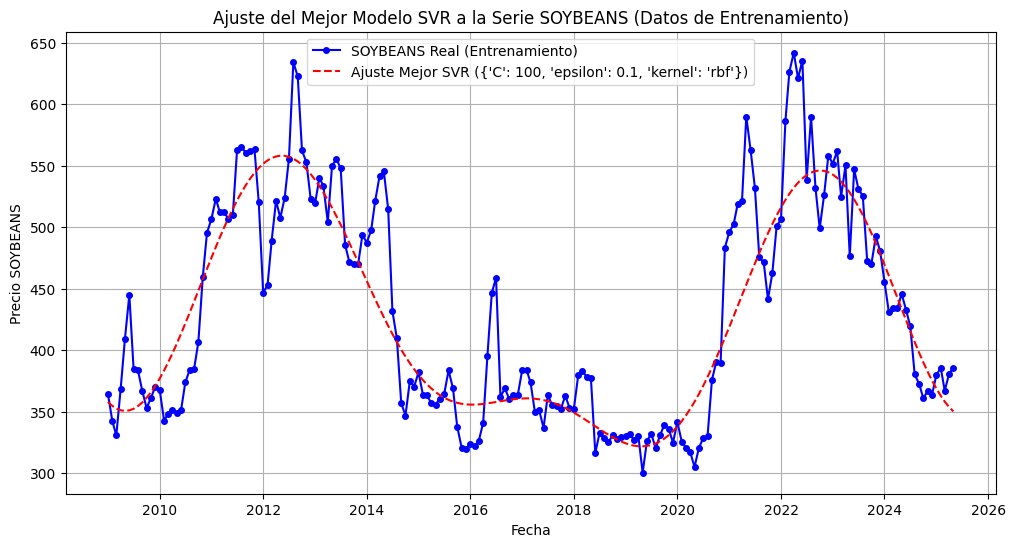


--- Proceso de SVR Completado ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

# Suprimir advertencias para mantener la salida limpia durante la búsqueda de modelos
warnings.filterwarnings("ignore")

print("--- Preparando datos para SVR y Buscando Mejores Hiperparámetros ---")

# Asegúrate de que el DataFrame 'df_new' está cargado y contiene la columna 'SOYBEANS'.
if 'df_new' not in locals() or df_new is None or df_new.empty or 'SOYBEANS' not in df_new.columns:
    print("Error: El DataFrame 'df_new' no está cargado, está vacío o no contiene la columna 'SOYBEANS'.")
    print("Asegúrate de ejecutar la celda que carga data.xlsx en 'df_new' correctamente.")
else:
    try:
        # Usar la serie SOYBEANS de df_new y eliminar NaNs
        # (Aunque interpolaste antes, SVR no puede manejar NaNs en X o y)
        # Para este ejemplo, usaremos solo los datos sin NaNs
        ts_data = df_new['SOYBEANS'].dropna().copy()

        if ts_data.empty:
             print("Error: La serie 'SOYBEANS' de df_new está vacía después de eliminar NaNs.")
        else:
            print(f"Usando {len(ts_data)} puntos de datos para SVR.")

            # --- Preparar los datos ---
            # Variable Objetivo (y)
            y = ts_data.values.reshape(-1, 1) # SVR espera un array 2D

            # Característica de Entrada (X): Tiempo numérico (Timestamp)
            # Convertimos el índice de fecha a timestamp numérico
            X = ts_data.index.astype(np.int64) // 10**9 # Convertir a segundos desde la época Unix
            X = X.values.reshape(-1, 1) # SVR espera un array 2D

            print(f"Shape de X (característica de tiempo): {X.shape}")
            print(f"Shape de y (SOYBEANS): {y.shape}")


            # --- Escalar los datos ---
            # SVR es sensible a la escala
            scaler_X = StandardScaler()
            X_scaled = scaler_X.fit_transform(X)

            scaler_y = StandardScaler()
            y_scaled = scaler_y.fit_transform(y)

            print("\nDatos de X y y escalados.")

            # --- Definir el espacio de hiperparámetros ---
            # Vamos a crear un grid de parámetros para explorar
            param_grid = {
                'C': [0.1, 1, 10, 100],         # Parámetro de regularización
                'epsilon': [0.01, 0.1, 0.5, 1], # Ancho de la banda de insensibilidad
                'kernel': ['linear', 'rbf']     # Tipo de kernel (radial basis function es común para no-linealidad)
                # Puedes añadir 'poly' kernel y un parámetro 'degree' si quieres
                # O añadir 'gamma' para el kernel 'rbf'
            }

            # Generar todas las combinaciones de parámetros
            grid = ParameterGrid(param_grid)
            print(f"\nSe generarán {len(grid)} combinaciones de modelos SVM (SVR).")

            if len(grid) < 100:
                 print(f"Advertencia: El número de combinaciones generadas ({len(grid)}) es menor a 100.")
                 print("Considera ampliar los rangos en 'param_grid' para generar más modelos.")


            # --- Buscar el mejor modelo ---
            best_mse = float('inf') # Inicializar con un valor muy grande
            best_params = None
            best_svr_model = None
            all_model_results = [] # Para almacenar los resultados de todos los modelos

            print("Iniciando entrenamiento y evaluación de modelos SVR...")
            # Usamos tqdm para mostrar una barra de progreso
            from tqdm.notebook import tqdm

            for i, params in enumerate(tqdm(grid, desc="Evaluando modelos SVR")):
                try:
                    # Instanciar el modelo SVR con los parámetros actuales
                    svr = SVR(**params)

                    # Entrenar el modelo en los datos escalados
                    svr.fit(X_scaled, y_scaled.ravel()) # .ravel() convierte y_scaled a 1D

                    # Hacer predicciones in-sample en los datos escalados
                    y_scaled_pred = svr.predict(X_scaled)

                    # Calcular el Mean Squared Error (MSE) en los datos escalados
                    mse = mean_squared_error(y_scaled, y_scaled_pred)

                    # Almacenar resultados
                    all_model_results.append({'params': params, 'mse': mse})

                    # Comprobar si es el mejor modelo hasta ahora
                    if mse < best_mse:
                        best_mse = mse
                        best_params = params
                        best_svr_model = svr # Guardar el modelo ajustado

                except Exception as e:
                    # print(f"Error al ajustar modelo con parámetros {params}: {e}") # Opcional: para depuración
                    continue # Saltar a la siguiente combinación si hay un error

            print("\nProceso de evaluación de modelos SVR completado.")

            # --- Mostrar el mejor modelo encontrado ---
            if best_svr_model is not None:
                print("\n" + "="*50)
                print("MEJOR MODELO SVR ENCONTRADO (basado en menor MSE en datos escalados):")
                print(f"Parámetros: {best_params}")
                print(f"MSE en datos escalados (ajuste): {best_mse:.4f}")
                print("="*50)

                # --- Realizar ajuste final con el mejor modelo en datos ESCALADOS ---
                # Ya tenemos el best_svr_model ajustado desde la búsqueda, pero podemos re-ajustarlo
                # para asegurarnos o si se guardó solo los parámetros
                # Si best_svr_model ya es el objeto ajustado, este paso es redundante pero seguro.
                final_best_svr_model = SVR(**best_params)
                final_best_svr_model.fit(X_scaled, y_scaled.ravel())

                # Obtener las predicciones in-sample del mejor modelo (escaladas)
                y_scaled_pred_best = final_best_svr_model.predict(X_scaled)

                # Invertir el escalado de las predicciones para graficar en la escala original
                y_pred_best_original_scale = scaler_y.inverse_transform(y_scaled_pred_best.reshape(-1, 1))

                # --- Graficar la muestra de entrenamiento y el mejor ajuste ---
                print("\n--- Graficando Muestra de Entrenamiento y Mejor Ajuste SVR ---")

                plt.figure(figsize=(12, 6))

                # Graficar los valores reales de entrenamiento (en escala original)
                plt.plot(ts_data.index, ts_data.values, label='SOYBEANS Real (Entrenamiento)', color='blue', marker='o', markersize=4, linestyle='-')

                # Graficar el ajuste del mejor modelo (en escala original)
                plt.plot(ts_data.index, y_pred_best_original_scale, label=f'Ajuste Mejor SVR ({best_params})', color='red', linestyle='--')

                plt.title('Ajuste del Mejor Modelo SVR a la Serie SOYBEANS (Datos de Entrenamiento)')
                plt.xlabel('Fecha')
                plt.ylabel('Precio SOYBEANS')
                plt.legend()
                plt.grid(True)
                plt.show()

            else:
                print("\nNo se pudo encontrar un modelo SVR válido (posiblemente todos fallaron en el ajuste).")

    except Exception as e:
        print(f"Ocurrió un error durante la preparación de datos o la búsqueda/graficación de SVR: {e}")

print("\n--- Proceso de SVR Completado ---")

--- Preparando datos para Random Forest y Buscando Mejores Hiperparámetros ---
Usando 197 puntos de datos para Random Forest.
Shape de X (característica de tiempo): (197, 1)
Shape de y (SOYBEANS): (197,)

Datos de X (característica de tiempo) escalados.

Se generarán 108 combinaciones de modelos Random Forest.
Iniciando entrenamiento y evaluación de modelos Random Forest Regressor...


Evaluando modelos Random Forest:   0%|          | 0/108 [00:00<?, ?it/s]


Proceso de evaluación de modelos Random Forest completado.

MEJOR MODELO RANDOM FOREST ENCONTRADO (basado en menor MSE en datos de ajuste):
Parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MSE en datos de ajuste: 70.3681

--- Graficando Muestra de Entrenamiento y Mejor Ajuste Random Forest ---


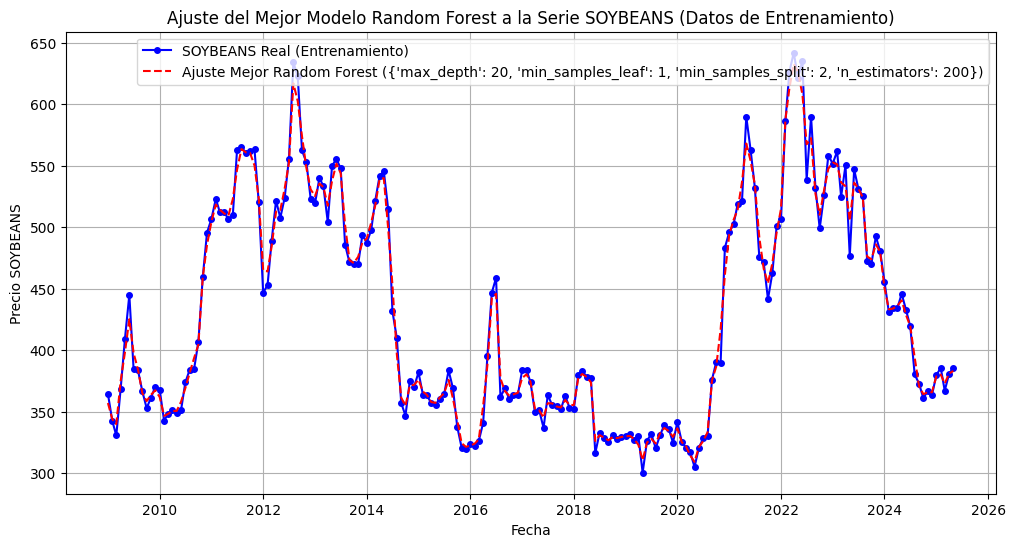


--- Proceso de Random Forest Completado ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler # Opcional para X, pero buena práctica
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore")

print("--- Preparando datos para Random Forest y Buscando Mejores Hiperparámetros ---")

# Asegúrate de que el DataFrame 'df_new' está cargado y contiene la columna 'SOYBEANS'.
if 'df_new' not in locals() or df_new is None or df_new.empty or 'SOYBEANS' not in df_new.columns:
    print("Error: El DataFrame 'df_new' no está cargado, está vacío o no contiene la columna 'SOYBEANS'.")
    print("Asegúrate de ejecutar la celda que carga data.xlsx en 'df_new' correctamente.")
else:
    try:
        # Usar la serie SOYBEANS de df_new y eliminar NaNs
        ts_data = df_new['SOYBEANS'].dropna().copy()

        if ts_data.empty:
             print("Error: La serie 'SOYBEANS' de df_new está vacía después de eliminar NaNs.")
        else:
            print(f"Usando {len(ts_data)} puntos de datos para Random Forest.")

            # --- Preparar los datos ---
            # Variable Objetivo (y)
            y = ts_data.values # Random Forest espera un array 1D para y

            # Característica de Entrada (X): Tiempo numérico (Timestamp)
            # Convertimos el índice de fecha a timestamp numérico
            X = ts_data.index.astype(np.int64) // 10**9 # Convertir a segundos desde la época Unix
            X = X.values.reshape(-1, 1) # Random Forest espera un array 2D para X

            print(f"Shape de X (característica de tiempo): {X.shape}")
            print(f"Shape de y (SOYBEANS): {y.shape}")


            # --- Escalar la característica X (Opcional pero buena práctica) ---
            # Random Forest no es tan sensible, pero escalar X no hace daño.
            scaler_X = StandardScaler()
            X_scaled = scaler_X.fit_transform(X)

            print("\nDatos de X (característica de tiempo) escalados.")
            # No escalaremos y en este ejemplo, ya que RF no lo requiere estrictamente.


            # --- Definir el espacio de hiperparámetros ---
            # Vamos a crear un grid de parámetros para explorar
            param_grid = {
                'n_estimators': [50, 100, 200],        # Número de árboles en el bosque
                'max_depth': [None, 10, 20, 30],     # Profundidad máxima del árbol (None significa sin límite)
                'min_samples_split': [2, 5, 10],       # Número mínimo de muestras requeridas para dividir un nodo interno
                'min_samples_leaf': [1, 2, 4]          # Número mínimo de muestras requeridas para ser un nodo hoja
            }

            # Generar todas las combinaciones de parámetros
            grid = ParameterGrid(param_grid)
            print(f"\nSe generarán {len(grid)} combinaciones de modelos Random Forest.")

            if len(grid) < 100:
                 print(f"Considera ampliar los rangos en 'param_grid' para generar más modelos (actual: {len(grid)}).")


            # --- Buscar el mejor modelo ---
            best_mse = float('inf') # Inicializar con un valor muy grande
            best_params = None
            best_rf_model = None
            all_model_results = [] # Para almacenar los resultados de todos los modelos

            print("Iniciando entrenamiento y evaluación de modelos Random Forest Regressor...")
            # Usamos tqdm para mostrar una barra de progreso
            from tqdm.notebook import tqdm

            for i, params in enumerate(tqdm(grid, desc="Evaluando modelos Random Forest")):
                try:
                    # Instanciar el modelo Random Forest Regressor con los parámetros actuales
                    rf = RandomForestRegressor(**params, random_state=42, n_jobs=-1) # random_state para reproducibilidad, n_jobs=-1 para usar todos los núcleos

                    # Entrenar el modelo en los datos (usamos X_scaled, y sin escalar)
                    rf.fit(X_scaled, y)

                    # Hacer predicciones in-sample en los datos escalados de X
                    y_pred = rf.predict(X_scaled)

                    # Calcular el Mean Squared Error (MSE) en los datos (y sin escalar)
                    mse = mean_squared_error(y, y_pred)

                    # Almacenar resultados
                    all_model_results.append({'params': params, 'mse': mse})

                    # Comprobar si es el mejor modelo hasta ahora
                    if mse < best_mse:
                        best_mse = mse
                        best_params = params
                        best_rf_model = rf # Guardar el modelo ajustado

                except Exception as e:
                    # print(f"Error al ajustar modelo con parámetros {params}: {e}") # Opcional: para depuración
                    continue # Saltar a la siguiente combinación si hay un error

            print("\nProceso de evaluación de modelos Random Forest completado.")

            # --- Mostrar el mejor modelo encontrado ---
            if best_rf_model is not None:
                print("\n" + "="*50)
                print("MEJOR MODELO RANDOM FOREST ENCONTRADO (basado en menor MSE en datos de ajuste):")
                print(f"Parámetros: {best_params}")
                print(f"MSE en datos de ajuste: {best_mse:.4f}")
                print("="*50)

                # --- Realizar ajuste final con el mejor modelo ---
                # Ya tenemos el best_rf_model ajustado desde la búsqueda.
                # Obtener las predicciones in-sample del mejor modelo
                y_pred_best = best_rf_model.predict(X_scaled)


                # --- Graficar la muestra de entrenamiento y el mejor ajuste ---
                print("\n--- Graficando Muestra de Entrenamiento y Mejor Ajuste Random Forest ---")

                plt.figure(figsize=(12, 6))

                # Graficar los valores reales de entrenamiento (en escala original)
                plt.plot(ts_data.index, ts_data.values, label='SOYBEANS Real (Entrenamiento)', color='blue', marker='o', markersize=4, linestyle='-')

                # Graficar el ajuste del mejor modelo (en escala original)
                # Usamos el índice de ts_data para el eje X ya que las predicciones corresponden a esas fechas
                plt.plot(ts_data.index, y_pred_best, label=f'Ajuste Mejor Random Forest ({best_params})', color='red', linestyle='--')

                plt.title('Ajuste del Mejor Modelo Random Forest a la Serie SOYBEANS (Datos de Entrenamiento)')
                plt.xlabel('Fecha')
                plt.ylabel('Precio SOYBEANS')
                plt.legend()
                plt.grid(True)
                plt.show()

            else:
                print("\nNo se pudo encontrar un modelo Random Forest válido (posiblemente todos fallaron en el ajuste).")

    except Exception as e:
        print(f"Ocurrió un error durante la preparación de datos o la búsqueda/graficación de Random Forest: {e}")

print("\n--- Proceso de Random Forest Completado ---")

--- Preparando datos para Random Forest y Buscando Mejores Hiperparámetros ---
Usando 197 puntos de datos para Random Forest.
Shape de X (característica de tiempo): (197, 1)
Shape de y (SOYBEANS): (197,)

Datos de X (característica de tiempo) escalados.

Se generarán 108 combinaciones de modelos Random Forest.
Iniciando entrenamiento y evaluación de modelos Random Forest Regressor...


Evaluando modelos Random Forest:   0%|          | 0/108 [00:00<?, ?it/s]


Proceso de evaluación de modelos Random Forest completado.

MEJOR MODELO RANDOM FOREST ENCONTRADO (basado en menor MSE en datos de ajuste):
Parámetros: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MSE en datos de ajuste: 70.3681

--- Graficando Muestra de Entrenamiento y Mejor Ajuste Random Forest ---


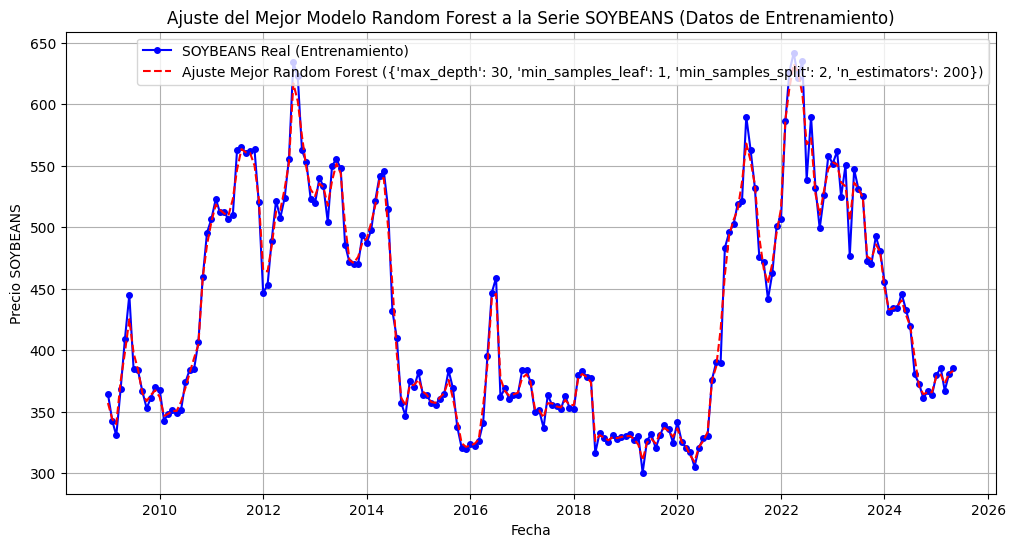


--- Proceso de Random Forest Completado ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler # Opcional para X, pero buena práctica
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore")

print("--- Preparando datos para Random Forest y Buscando Mejores Hiperparámetros ---")

# Asegúrate de que el DataFrame 'df_new' está cargado y contiene la columna 'SOYBEANS'.
if 'df_new' not in locals() or df_new is None or df_new.empty or 'SOYBEANS' not in df_new.columns:
    print("Error: El DataFrame 'df_new' no está cargado, está vacío o no contiene la columna 'SOYBEANS'.")
    print("Asegúrate de ejecutar la celda que carga data.xlsx en 'df_new' correctamente.")
else:
    try:
        # Usar la serie SOYBEANS de df_new y eliminar NaNs
        ts_data = df_new['SOYBEANS'].dropna().copy()

        if ts_data.empty:
             print("Error: La serie 'SOYBEANS' de df_new está vacía después de eliminar NaNs.")
        else:
            print(f"Usando {len(ts_data)} puntos de datos para Random Forest.")

            # --- Preparar los datos ---
            # Variable Objetivo (y)
            y = ts_data.values # Random Forest espera un array 1D para y

            # Característica de Entrada (X): Tiempo numérico (Timestamp)
            # Convertimos el índice de fecha a timestamp numérico
            X = ts_data.index.astype(np.int64) // 10**9 # Convertir a segundos desde la época Unix
            X = X.values.reshape(-1, 1) # Random Forest espera un array 2D para X

            print(f"Shape de X (característica de tiempo): {X.shape}")
            print(f"Shape de y (SOYBEANS): {y.shape}")


            # --- Escalar la característica X (Opcional pero buena práctica) ---
            # Random Forest no es tan sensible, pero escalar X no hace daño.
            scaler_X = StandardScaler()
            X_scaled = scaler_X.fit_transform(X)

            print("\nDatos de X (característica de tiempo) escalados.")
            # No escalaremos y en este ejemplo, ya que RF no lo requiere estrictamente.


            # --- Definir el espacio de hiperparámetros ---
            # Vamos a crear un grid de parámetros para explorar
            param_grid = {
                'n_estimators': [50, 100, 200],        # Número de árboles en el bosque
                'max_depth': [None, 10, 20, 30],     # Profundidad máxima del árbol (None significa sin límite)
                'min_samples_split': [2, 5, 10],       # Número mínimo de muestras requeridas para dividir un nodo interno
                'min_samples_leaf': [1, 2, 4]          # Número mínimo de muestras requeridas para ser un nodo hoja
            }

            # Generar todas las combinaciones de parámetros
            grid = ParameterGrid(param_grid)
            print(f"\nSe generarán {len(grid)} combinaciones de modelos Random Forest.")

            if len(grid) < 100:
                 print(f"Considera ampliar los rangos en 'param_grid' para generar más modelos (actual: {len(grid)}).")


            # --- Buscar el mejor modelo ---
            best_mse = float('inf') # Inicializar con un valor muy grande
            best_params = None
            best_rf_model = None
            all_model_results = [] # Para almacenar los resultados de todos los modelos

            print("Iniciando entrenamiento y evaluación de modelos Random Forest Regressor...")
            # Usamos tqdm para mostrar una barra de progreso
            from tqdm.notebook import tqdm

            for i, params in enumerate(tqdm(grid, desc="Evaluando modelos Random Forest")):
                try:
                    # Instanciar el modelo Random Forest Regressor con los parámetros actuales
                    rf = RandomForestRegressor(**params, random_state=42, n_jobs=-1) # random_state para reproducibilidad, n_jobs=-1 para usar todos los núcleos

                    # Entrenar el modelo en los datos (usamos X_scaled, y sin escalar)
                    rf.fit(X_scaled, y)

                    # Hacer predicciones in-sample en los datos escalados de X
                    y_pred = rf.predict(X_scaled)

                    # Calcular el Mean Squared Error (MSE) en los datos (y sin escalar)
                    mse = mean_squared_error(y, y_pred)

                    # Almacenar resultados
                    all_model_results.append({'params': params, 'mse': mse})

                    # Comprobar si es el mejor modelo hasta ahora
                    if mse < best_mse:
                        best_mse = mse
                        best_params = params
                        best_rf_model = rf # Guardar el modelo ajustado

                except Exception as e:
                    # print(f"Error al ajustar modelo con parámetros {params}: {e}") # Opcional: para depuración
                    continue # Saltar a la siguiente combinación si hay un error

            print("\nProceso de evaluación de modelos Random Forest completado.")

            # --- Mostrar el mejor modelo encontrado ---
            if best_rf_model is not None:
                print("\n" + "="*50)
                print("MEJOR MODELO RANDOM FOREST ENCONTRADO (basado en menor MSE en datos de ajuste):")
                print(f"Parámetros: {best_params}")
                print(f"MSE en datos de ajuste: {best_mse:.4f}")
                print("="*50)

                # --- Realizar ajuste final con el mejor modelo ---
                # Ya tenemos el best_rf_model ajustado desde la búsqueda.
                # Obtener las predicciones in-sample del mejor modelo
                y_pred_best = best_rf_model.predict(X_scaled)


                # --- Graficar la muestra de entrenamiento y el mejor ajuste ---
                print("\n--- Graficando Muestra de Entrenamiento y Mejor Ajuste Random Forest ---")

                plt.figure(figsize=(12, 6))

                # Graficar los valores reales de entrenamiento (en escala original)
                plt.plot(ts_data.index, ts_data.values, label='SOYBEANS Real (Entrenamiento)', color='blue', marker='o', markersize=4, linestyle='-')

                # Graficar el ajuste del mejor modelo (en escala original)
                # Usamos el índice de ts_data para el eje X ya que las predicciones corresponden a esas fechas
                plt.plot(ts_data.index, y_pred_best, label=f'Ajuste Mejor Random Forest ({best_params})', color='red', linestyle='--')

                plt.title('Ajuste del Mejor Modelo Random Forest a la Serie SOYBEANS (Datos de Entrenamiento)')
                plt.xlabel('Fecha')
                plt.ylabel('Precio SOYBEANS')
                plt.legend()
                plt.grid(True)
                plt.show()

            else:
                print("\nNo se pudo encontrar un modelo Random Forest válido (posiblemente todos fallaron en el ajuste).")

    except Exception as e:
        print(f"Ocurrió un error durante la preparación de datos o la búsqueda/graficación de Random Forest: {e}")

print("\n--- Proceso de Random Forest Completado ---")

Librería XGBoost importada exitosamente.
--- Preparando datos para XGBoost y Buscando Mejores Hiperparámetros ---
Usando 197 puntos de datos para XGBoost.
Shape de X (característica de tiempo): (197, 1)
Shape de y (SOYBEANS): (197,)

Datos de X (característica de tiempo) escalados.

Se generarán 108 combinaciones de modelos XGBoost.
Iniciando entrenamiento y evaluación de modelos XGBoost Regressor...


Evaluando modelos XGBoost:   0%|          | 0/108 [00:00<?, ?it/s]


Proceso de evaluación de modelos XGBoost completado.

MEJOR MODELO XGBoost ENCONTRADO (basado en menor MSE en datos de ajuste):
Parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 150, 'subsample': 1.0}
MSE en datos de ajuste: 0.0049

--- Graficando Muestra de Entrenamiento y Mejor Ajuste XGBoost ---


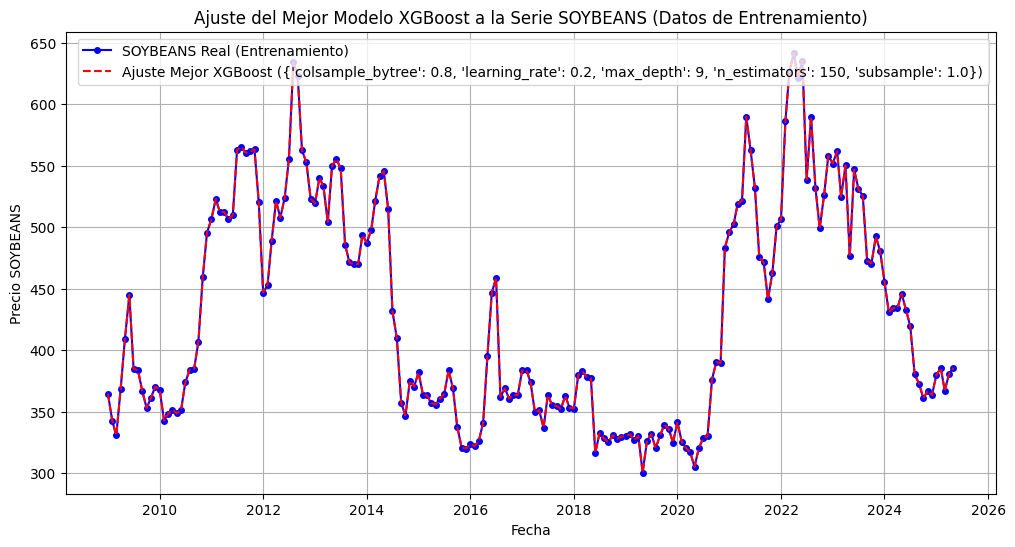


--- Proceso de XGBoost Completado ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # Para escalar X
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

# Importar XGBoost
try:
    import xgboost as xgb
    print("Librería XGBoost importada exitosamente.")
except ImportError:
    print("Error: La librería XGBoost no está instalada.")
    print("Por favor, instálala con: !pip install xgboost")
    xgb = None # Asegurar que xgb es None si la importación falla


# Suprimir advertencias (incluyendo las de XGBoost)
warnings.filterwarnings("ignore")

print("--- Preparando datos para XGBoost y Buscando Mejores Hiperparámetros ---")

# Asegúrate de que el DataFrame 'df_new' está cargado y contiene la columna 'SOYBEANS',
# y que la librería XGBoost se importó correctamente.
if xgb is None:
    print("\nNo se puede proceder porque la librería XGBoost no está disponible.")
elif 'df_new' not in locals() or df_new is None or df_new.empty or 'SOYBEANS' not in df_new.columns:
    print("Error: El DataFrame 'df_new' no está cargado, está vacío o no contiene la columna 'SOYBEANS'.")
    print("Asegúrate de ejecutar la celda que carga data.xlsx en 'df_new' correctamente.")
else:
    try:
        # Usar la serie SOYBEANS de df_new y eliminar NaNs
        ts_data = df_new['SOYBEANS'].dropna().copy()

        if ts_data.empty:
             print("Error: La serie 'SOYBEANS' de df_new está vacía después de eliminar NaNs.")
        else:
            print(f"Usando {len(ts_data)} puntos de datos para XGBoost.")

            # --- Preparar los datos ---
            # Variable Objetivo (y)
            y = ts_data.values # XGBoost espera un array 1D para y

            # Característica de Entrada (X): Tiempo numérico (Timestamp)
            # Convertimos el índice de fecha a timestamp numérico
            X = ts_data.index.astype(np.int64) // 10**9 # Convertir a segundos desde la época Unix
            X = X.values.reshape(-1, 1) # XGBoost espera un array 2D para X

            print(f"Shape de X (característica de tiempo): {X.shape}")
            print(f"Shape de y (SOYBEANS): {y.shape}")


            # --- Escalar la característica X (Opcional pero buena práctica) ---
            scaler_X = StandardScaler()
            X_scaled = scaler_X.fit_transform(X)

            print("\nDatos de X (característica de tiempo) escalados.")
            # No escalaremos y en este ejemplo.


            # --- Definir el espacio de hiperparámetros ---
            # Define un grid de parámetros para explorar diferentes modelos XGBoost
            # Ajusta estos rangos para generar al menos 100 combinaciones
            param_grid = {
                'n_estimators': [50, 100, 150],  # Número de árboles
                'learning_rate': [0.01, 0.1, 0.2], # Tasa de aprendizaje
                'max_depth': [3, 6, 9],          # Profundidad máxima de cada árbol
                'subsample': [0.8, 1.0],         # Fracción de muestras usadas por árbol
                'colsample_bytree': [0.8, 1.0]   # Fracción de características usadas por árbol
            }

            # Generar todas las combinaciones posibles
            grid = ParameterGrid(param_grid)
            print(f"\nSe generarán {len(grid)} combinaciones de modelos XGBoost.")

            if len(grid) < 100:
                 print(f"Considera ampliar los rangos en 'param_grid' para generar más modelos (actual: {len(grid)}).")
            # Si el número de combinaciones es mucho mayor a 100, podrías considerar usar RandomizedSearchCV
            # en lugar de ParameterGrid para muestrear aleatoriamente 100 combinaciones.
            # Para este ejemplo, usaremos todas las combinaciones del grid definido.


            # --- Buscar el mejor modelo ---
            best_mse = float('inf') # Inicializar con un valor muy grande
            best_params = None
            best_xgb_model = None
            all_model_results = [] # Para almacenar los resultados de todos los modelos

            print("Iniciando entrenamiento y evaluación de modelos XGBoost Regressor...")
            # Usamos tqdm para mostrar una barra de progreso
            from tqdm.notebook import tqdm

            for i, params in enumerate(tqdm(grid, desc="Evaluando modelos XGBoost")):
                try:
                    # Instanciar el modelo XGBoost Regressor con los parámetros actuales
                    # objective='reg:squarederror' es el objetivo por defecto para regresión con MSE
                    # random_state para reproducibilidad
                    # n_jobs=-1 para usar todos los núcleos
                    xgb_model = xgb.XGBRegressor(**params, objective='reg:squarederror', random_state=42, n_jobs=-1)

                    # Entrenar el modelo en los datos (usamos X_scaled, y sin escalar)
                    xgb_model.fit(X_scaled, y)

                    # Hacer predicciones in-sample en los datos escalados de X
                    y_pred = xgb_model.predict(X_scaled)

                    # Calcular el Mean Squared Error (MSE) en los datos (y sin escalar)
                    mse = mean_squared_error(y, y_pred)

                    # Almacenar resultados
                    all_model_results.append({'params': params, 'mse': mse})

                    # Comprobar si es el mejor modelo hasta ahora
                    if mse < best_mse:
                        best_mse = mse
                        best_params = params
                        best_xgb_model = xgb_model # Guardar el modelo ajustado

                except Exception as e:
                    # print(f"Error al ajustar modelo con parámetros {params}: {e}") # Opcional: para depuración
                    continue # Saltar a la siguiente combinación si hay un error

            print("\nProceso de evaluación de modelos XGBoost completado.")

            # --- Mostrar el mejor modelo encontrado ---
            if best_xgb_model is not None:
                print("\n" + "="*50)
                print("MEJOR MODELO XGBoost ENCONTRADO (basado en menor MSE en datos de ajuste):")
                print(f"Parámetros: {best_params}")
                print(f"MSE en datos de ajuste: {best_mse:.4f}")
                print("="*50)

                # --- Obtener las predicciones del mejor modelo ---
                # Ya tenemos el best_xgb_model ajustado y las predicciones y_pred calculadas durante la búsqueda.
                # y_pred es la predicción del mejor modelo en X_scaled.

                # --- Graficar la muestra de entrenamiento y el mejor ajuste ---
                print("\n--- Graficando Muestra de Entrenamiento y Mejor Ajuste XGBoost ---")

                plt.figure(figsize=(12, 6))

                # Graficar los valores reales de entrenamiento (en escala original)
                plt.plot(ts_data.index, ts_data.values, label='SOYBEANS Real (Entrenamiento)', color='blue', marker='o', markersize=4, linestyle='-')

                # Graficar el ajuste del mejor modelo (en escala original)
                # Usamos el índice de ts_data para el eje X ya que las predicciones corresponden a esas fechas
                plt.plot(ts_data.index, y_pred, label=f'Ajuste Mejor XGBoost ({best_params})', color='red', linestyle='--')

                plt.title('Ajuste del Mejor Modelo XGBoost a la Serie SOYBEANS (Datos de Entrenamiento)')
                plt.xlabel('Fecha')
                plt.ylabel('Precio SOYBEANS')
                plt.legend()
                plt.grid(True)
                plt.show()

            else:
                print("\nNo se pudo encontrar un modelo XGBoost válido (posiblemente todos fallaron en el ajuste).")

    except Exception as e:
        print(f"Ocurrió un error durante la preparación de datos o la búsqueda/graficación de XGBoost: {e}")

print("\n--- Proceso de XGBoost Completado ---")

--- Preparando datos para Random Forest y Buscando Mejores Hiperparámetros ---
Usando 197 puntos de datos para Random Forest.
Shape de X (característica de tiempo): (197, 1)
Shape de y (SOYBEANS): (197,)

Datos de X (característica de tiempo) escalados.

Se generarán 108 combinaciones de modelos Random Forest.
Iniciando entrenamiento y evaluación de modelos Random Forest Regressor...


Evaluando modelos Random Forest:   0%|          | 0/108 [00:00<?, ?it/s]


Proceso de evaluación de modelos Random Forest completado.

MEJOR MODELO RANDOM FOREST ENCONTRADO (basado en menor MSE en datos de ajuste):
Parámetros: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MSE en datos de ajuste: 70.3681

--- Graficando Muestra de Entrenamiento y Mejor Ajuste Random Forest ---


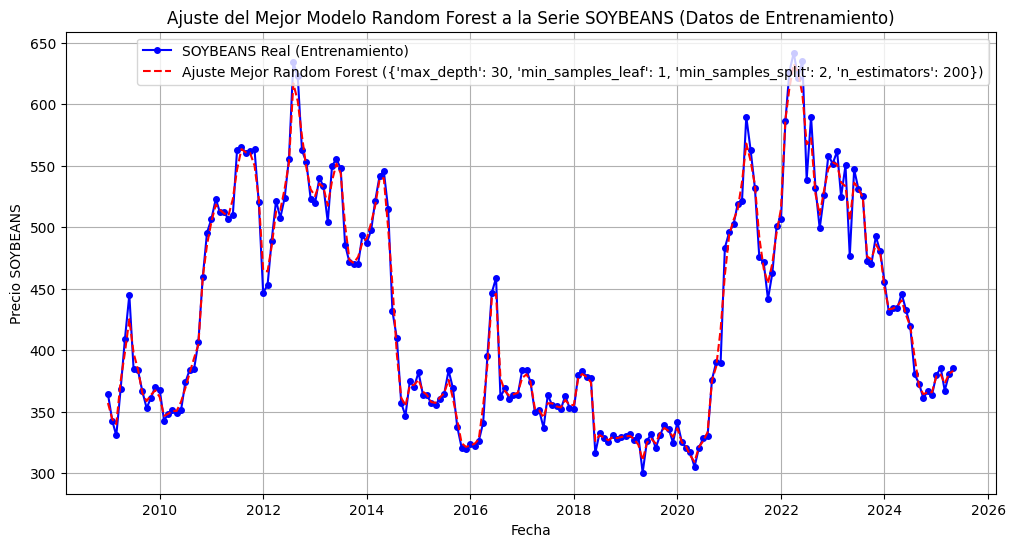


--- Proceso de Random Forest Completado ---


In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler # Opcional para X, pero buena práctica
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore")

print("--- Preparando datos para Random Forest y Buscando Mejores Hiperparámetros ---")

# Asegúrate de que el DataFrame 'df_new' está cargado y contiene la columna 'SOYBEANS'.
if 'df_new' not in locals() or df_new is None or df_new.empty or 'SOYBEANS' not in df_new.columns:
    print("Error: El DataFrame 'df_new' no está cargado, está vacío o no contiene la columna 'SOYBEANS'.")
    print("Asegúrate de ejecutar la celda que carga data.xlsx en 'df_new' correctamente.")
else:
    try:
        # Usar la serie SOYBEANS de df_new y eliminar NaNs
        ts_data = df_new['SOYBEANS'].dropna().copy()

        if ts_data.empty:
             print("Error: La serie 'SOYBEANS' de df_new está vacía después de eliminar NaNs.")
        else:
            print(f"Usando {len(ts_data)} puntos de datos para Random Forest.")

            # --- Preparar los datos ---
            # Variable Objetivo (y)
            y = ts_data.values # Random Forest espera un array 1D para y

            # Característica de Entrada (X): Tiempo numérico (Timestamp)
            # Convertimos el índice de fecha a timestamp numérico
            X = ts_data.index.astype(np.int64) // 10**9 # Convertir a segundos desde la época Unix
            X = X.values.reshape(-1, 1) # Random Forest espera un array 2D para X

            print(f"Shape de X (característica de tiempo): {X.shape}")
            print(f"Shape de y (SOYBEANS): {y.shape}")


            # --- Escalar la característica X (Opcional pero buena práctica) ---
            # Random Forest no es tan sensible, pero escalar X no hace daño.
            scaler_X = StandardScaler()
            X_scaled = scaler_X.fit_transform(X)

            print("\nDatos de X (característica de tiempo) escalados.")
            # No escalaremos y en este ejemplo, ya que RF no lo requiere estrictamente.


            # --- Definir el espacio de hiperparámetros ---
            # Vamos a crear un grid de parámetros para explorar
            param_grid = {
                'n_estimators': [50, 100, 200],        # Número de árboles en el bosque
                'max_depth': [None, 10, 20, 30],     # Profundidad máxima del árbol (None significa sin límite)
                'min_samples_split': [2, 5, 10],       # Número mínimo de muestras requeridas para dividir un nodo interno
                'min_samples_leaf': [1, 2, 4]          # Número mínimo de muestras requeridas para ser un nodo hoja
            }

            # Generar todas las combinaciones de parámetros
            grid = ParameterGrid(param_grid)
            print(f"\nSe generarán {len(grid)} combinaciones de modelos Random Forest.")

            if len(grid) < 100:
                 print(f"Considera ampliar los rangos en 'param_grid' para generar más modelos (actual: {len(grid)}).")


            # --- Buscar el mejor modelo ---
            best_mse = float('inf') # Inicializar con un valor muy grande
            best_params = None
            best_rf_model = None
            all_model_results = [] # Para almacenar los resultados de todos los modelos

            print("Iniciando entrenamiento y evaluación de modelos Random Forest Regressor...")
            # Usamos tqdm para mostrar una barra de progreso
            from tqdm.notebook import tqdm

            for i, params in enumerate(tqdm(grid, desc="Evaluando modelos Random Forest")):
                try:
                    # Instanciar el modelo Random Forest Regressor con los parámetros actuales
                    rf = RandomForestRegressor(**params, random_state=42, n_jobs=-1) # random_state para reproducibilidad, n_jobs=-1 para usar todos los núcleos

                    # Entrenar el modelo en los datos (usamos X_scaled, y sin escalar)
                    rf.fit(X_scaled, y)

                    # Hacer predicciones in-sample en los datos escalados de X
                    y_pred = rf.predict(X_scaled)

                    # Calcular el Mean Squared Error (MSE) en los datos (y sin escalar)
                    mse = mean_squared_error(y, y_pred)

                    # Almacenar resultados
                    all_model_results.append({'params': params, 'mse': mse})

                    # Comprobar si es el mejor modelo hasta ahora
                    if mse < best_mse:
                        best_mse = mse
                        best_params = params
                        best_rf_model = rf # Guardar el modelo ajustado

                except Exception as e:
                    # print(f"Error al ajustar modelo con parámetros {params}: {e}") # Opcional: para depuración
                    continue # Saltar a la siguiente combinación si hay un error

            print("\nProceso de evaluación de modelos Random Forest completado.")

            # --- Mostrar el mejor modelo encontrado ---
            if best_rf_model is not None:
                print("\n" + "="*50)
                print("MEJOR MODELO RANDOM FOREST ENCONTRADO (basado en menor MSE en datos de ajuste):")
                print(f"Parámetros: {best_params}")
                print(f"MSE en datos de ajuste: {best_mse:.4f}")
                print("="*50)

                # --- Realizar ajuste final con el mejor modelo ---
                # Ya tenemos el best_rf_model ajustado desde la búsqueda.
                # Obtener las predicciones in-sample del mejor modelo
                y_pred_best = best_rf_model.predict(X_scaled)


                # --- Graficar la muestra de entrenamiento y el mejor ajuste ---
                print("\n--- Graficando Muestra de Entrenamiento y Mejor Ajuste Random Forest ---")

                plt.figure(figsize=(12, 6))

                # Graficar los valores reales de entrenamiento (en escala original)
                plt.plot(ts_data.index, ts_data.values, label='SOYBEANS Real (Entrenamiento)', color='blue', marker='o', markersize=4, linestyle='-')

                # Graficar el ajuste del mejor modelo (en escala original)
                # Usamos el índice de ts_data para el eje X ya que las predicciones corresponden a esas fechas
                plt.plot(ts_data.index, y_pred_best, label=f'Ajuste Mejor Random Forest ({best_params})', color='red', linestyle='--')

                plt.title('Ajuste del Mejor Modelo Random Forest a la Serie SOYBEANS (Datos de Entrenamiento)')
                plt.xlabel('Fecha')
                plt.ylabel('Precio SOYBEANS')
                plt.legend()
                plt.grid(True)
                plt.show()

            else:
                print("\nNo se pudo encontrar un modelo Random Forest válido (posiblemente todos fallaron en el ajuste).")

    except Exception as e:
        print(f"Ocurrió un error durante la preparación de datos o la búsqueda/graficación de Random Forest: {e}")

print("\n--- Proceso de Random Forest Completado ---")

In [ ]:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler, MinMaxScaler # MinMaxScaler para LSTM y quizás y
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm.notebook import tqdm
import warnings

# Importar librerías para LSTM (TensorFlow/Keras)
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.optimizers import Adam
    print("Librerías TensorFlow/Keras importadas exitosamente.")
except ImportError:
    print("Error: Las librerías TensorFlow/Keras no están instaladas.")
    print("Por favor, instálalas con: !pip install tensorflow")
    tf = None # Asegurar que tf es None si la importación falla

# Importar XGBoost
try:
    import xgboost as xgb
    print("Librería XGBoost importada exitosamente.")
except ImportError:
    print("Error: La librería XGBoost no está instalada.")
    print("Por favor, instálala con: !pip install xgboost")
    xgb = None


warnings.filterwarnings("ignore") # Suprimir advertencias


print("--- COMPARATIVA MASIVA DE MODELOS DE SERIES DE TIEMPO Y ML ---")

# --- Configuración de períodos y variables ---
dependent_variable = 'SOYBEANS'
training_start_date = '2009-01-01'
training_end_date = '2024-12-31' # Nuevo fin del entrenamiento (hasta Dic 2024)
evaluation_start_date = '2025-01-01' # Inicio del período de evaluación OOS
evaluation_end_date = '2025-05-01'   # Fin del período de evaluación OOS
plot_end_date = evaluation_end_date # Graficar hasta el fin del período de evaluación

# Variables exógenas a usar para los modelos ML y SARIMAX
# Usaremos un conjunto común para comparar. Ajusta esta lista según tu data_clean.
# Asegúrate de que estas columnas existen en data_clean.
exog_cols_common = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
# Si tienes la versión log-transformada y la usaste, considera reemplazar aquí
# exog_cols_common = ['STOCK', 'LOG_F_SOYMEALFIN', 'BASIS', 'SOYOIL']


# --- Verificar disponibilidad de data_clean ---
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print("Error: El DataFrame 'data_clean' no está cargado o está vacío.")
    print("Asegúrate de ejecutar las celdas anteriores para cargar y limpiar los datos.")
    raise SystemExit("Ejecución detenida: Data limpia no disponible.")

if dependent_variable not in data_clean.columns:
     print(f"Error: La variable dependiente '{dependent_variable}' no está en 'data_clean'.")
     raise SystemExit("Ejecución detenida: Variable dependiente no encontrada.")

# Filtrar exógenas comunes para asegurar que existan en data_clean
existing_exog_cols_common = [col for col in exog_cols_common if col in data_clean.columns]
if len(existing_exog_cols_common) != len(exog_cols_common):
     missing = set(exog_cols_common) - set(existing_exog_cols_common)
     print(f"Advertencia: Las siguientes variables exógenas no se encontraron en 'data_clean' y serán omitidas: {missing}")
     exog_cols_common = existing_exog_cols_common # Usar solo las que existen

if not exog_cols_common:
     print("No se usarán variables exógenas en los modelos.")
     use_exog = False
else:
     print(f"\nVariables exógenas comunes consideradas: {exog_cols_common}")
     use_exog = True


# --- Preparar los conjuntos de datos (Entrenamiento y Evaluación) ---
# Entrenar hasta training_end_date (Dic 2024)
train_data_full = data_clean.loc[training_start_date:training_end_date].copy()

# Evaluar desde evaluation_start_date hasta evaluation_end_date (Ene 2025 - May 2025)
evaluation_data_full = data_clean.loc[evaluation_start_date:evaluation_end_date].copy()

# Datos completos para graficación
plot_data_real = data_clean.loc[training_start_date:plot_end_date].copy()

if train_data_full.empty or evaluation_data_full.empty or plot_data_real.empty:
    print("Error: Los rangos de fecha de entrenamiento, evaluación o graficación resultaron en DataFrames vacíos.")
    print("Verifica las fechas definidas y la cobertura de tu DataFrame 'data_clean'.")
    raise SystemExit("Ejecución detenida: Rangos de datos inválidos.")

print(f"\nDatos de entrenamiento: {train_data_full.index.min().strftime('%Y-%m-%d')} a {train_data_full.index.max().strftime('%Y-%m-%d')} ({len(train_data_full)} puntos)")
print(f"Datos de evaluación OOS: {evaluation_data_full.index.min().strftime('%Y-%m-%d')} a {evaluation_data_full.index.max().strftime('%Y-%m-%d')} ({len(evaluation_data_full)} puntos)")
print(f"Datos reales para graficación: {plot_data_real.index.min().strftime('%Y-%m-%d')} a {plot_data_real.index.max().strftime('%Y-%m-%d')} ({len(plot_data_real)} puntos)")


# Extraer series y exógenas, manejar NaNs en el subset de entrenamiento
y_train_full = train_data_full[dependent_variable].dropna()
X_train_exog_full = train_data_full[exog_cols_common].dropna() if use_exog else pd.DataFrame(index=y_train_full.index)

# Alinear endógena y exógenas para entrenamiento
common_index_train = y_train_full.index.intersection(X_train_exog_full.index)
y_train_aligned = y_train_full.loc[common_index_train]
X_train_exog_aligned = X_train_exog_full.loc[common_index_train]

print(f"\nDatos de entrenamiento alineados: {len(y_train_aligned)} puntos.")


# Extraer series y exógenas para evaluación OOS
y_eval_real = evaluation_data_full[dependent_variable].dropna()
X_eval_exog = evaluation_data_full[exog_cols_common].dropna() if use_exog else pd.DataFrame(index=y_eval_real.index)

# Alinear endógena y exógenas para evaluación
common_index_eval = y_eval_real.index.intersection(X_eval_exog.index)
y_eval_aligned = y_eval_real.loc[common_index_eval] # Estos son los valores reales OOS para comparar
X_eval_exog_aligned = X_eval_exog.loc[common_index_eval]


# --- Preparar características ML: Tiempo numérico + Exógenas ---
# Características de entrenamiento
X_train_time = y_train_aligned.index.astype(np.int64) // 10**9
X_train_time = X_train_time.values.reshape(-1, 1)

if use_exog:
    X_train_ml_combined = np.hstack((X_train_time, X_train_exog_aligned.values))
    ml_feature_names = ['Time'] + X_train_exog_aligned.columns.tolist()
else:
    X_train_ml_combined = X_train_time
    ml_feature_names = ['Time']

# Características de evaluación OOS
X_eval_time = y_eval_aligned.index.astype(np.int64) // 10**9
X_eval_time = X_eval_time.values.reshape(-1, 1)

if use_exog:
    X_eval_ml_combined = np.hstack((X_eval_time, X_eval_exog_aligned.values))
else:
    X_eval_ml_combined = X_eval_time

print(f"\nCaracterísticas ML: {ml_feature_names}")
print(f"Shape X_train_ml_combined: {X_train_ml_combined.shape}")
print(f"Shape X_eval_ml_combined: {X_eval_ml_combined.shape}")


# --- Escalar características X para modelos ML ---
scaler_X_ml = StandardScaler()
X_train_scaled_ml = scaler_X_ml.fit_transform(X_train_ml_combined)
X_eval_scaled_ml = scaler_X_ml.transform(X_eval_ml_combined) # Usar el mismo scaler para evaluar

# Escalar la variable dependiente 'y' para LSTM (y opcionalmente para SVR si lo deseas)
# Usaremos MinMaxScaler (-1 a 1 es común para LSTM)
scaler_y_lstm = MinMaxScaler(feature_range=(-1, 1))
y_train_scaled_lstm = scaler_y_lstm.fit_transform(y_train_aligned.values.reshape(-1, 1))
# No escalamos y_eval_aligned ya que lo usamos para calcular MSE con predicciones en escala original


# --- Definir Espacios de Hiperparámetros y Combinaciones (Para al menos 500 modelos total) ---

# Ajusta los rangos para controlar el número total de modelos.
# Número total de combinaciones = producto del tamaño de cada lista de parámetros en cada grid.
# Necesitamos distribuciones que sumen al menos ~500 combinaciones en total.

arima_grid = ParameterGrid({
    'order': list(product(range(3), range(2), range(3))) # (p, d, q) max p=2, d=1, q=2
}) # Max (2,1,2) = 3*2*3 = 18 combinaciones

sarima_grid = ParameterGrid({
    'order': list(product(range(2), range(2), range(2))), # (p, d, q) max p=1, d=1, q=1
    'seasonal_order': list(product(range(2), range(2), range(2), [12])) # (P, D, Q, s) max P=1, D=1, Q=1, s=12
}) # Max (1,1,1) * (1,1,1,12) = (2*2*2) * (2*2*2*1) = 8 * 8 = 64 combinaciones

sarimax_grid = ParameterGrid({
    'order': list(product(range(2), range(1), range(2))), # (p, d, q) max p=1, d=0, q=1
    'seasonal_order': list(product(range(1), range(1), range(1), [12])), # (P, D, Q, s) max P=0, D=0, Q=0, s=12
}) # Max (1,0,1) * (0,0,0,12) = (2*1*2) * (1*1*1*1) = 4 * 1 = 4 combinaciones (usando exog)

# SVR grid (con exógenas) - Ajusta C y epsilon para más modelos
svr_grid = ParameterGrid({
    'C': [0.1, 1, 10, 50, 100], # Más valores para C
    'epsilon': [0.01, 0.1, 0.25, 0.5], # Más valores para epsilon
    'kernel': ['rbf'] # rbf es común, 'linear' si quieres probar
}) # 5 * 4 * 1 = 20 combinaciones

# Random Forest grid (con exógenas) - Ajusta n_estimators, max_depth, etc.
rf_grid = ParameterGrid({
    'n_estimators': [50, 100, 150, 200], # Más árboles
    'max_depth': [10, 20, None],      # Profundidad
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}) # 4 * 3 * 2 * 2 = 48 combinaciones

# XGBoost grid (con exógenas) - Ajusta n_estimators, learning_rate, max_depth, etc.
xgb_grid = ParameterGrid({
    'n_estimators': [50, 100, 150, 200], # Más árboles
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9],
}) # 4 * 3 * 3 = 36 combinaciones

# LSTM grid (con exógenas) - Grid de parámetros de red neuronal (más complejo)
# Simplificaremos a 1-2 capas LSTM, unidades, learning rate
# La preparación de datos para LSTM es diferente (secuencias), esto es una simplificación conceptual del grid.
# Un grid real de LSTM debería incluir window_size, número de capas, unidades, dropout, optimizador, epochs, batch_size.
# Para este ejemplo, solo definiremos un "grid" de configuraciones simples de red.
# Ojo: Entrenar muchas LSTMs puede ser MUY lento. Reducir este grid si el tiempo es un problema.
lstm_configs = [
    {'n_layers': 1, 'units': 50, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 32, 'window_size': 12}, # Ejemplo simple
    {'n_layers': 1, 'units': 100, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 32, 'window_size': 12},
    {'n_layers': 2, 'units': 50, 'learning_rate': 0.005, 'epochs': 75, 'batch_size': 32, 'window_size': 12},
    {'n_layers': 2, 'units': 75, 'learning_rate': 0.005, 'epochs': 75, 'batch_size': 32, 'window_size': 12},
    # Añade más configuraciones aquí para alcanzar el número deseado
]
# Calculamos el total aproximado del grid (sumamos los tamaños de los grids)
total_approx_models = len(list(arima_grid)) + len(list(sarima_grid)) + len(list(sarimax_grid)) + \
                       len(list(svr_grid)) + len(list(rf_grid)) + len(list(xgb_grid)) + len(lstm_configs)

print(f"\nNúmero APROXIMADO total de modelos a entrenar: {total_approx_models}")
if total_approx_models < 500:
     print("Advertencia: El número total de modelos es menor a 500.")
     print("Considera ampliar los rangos en los param_grid para cada familia.")


# --- Funciones auxiliares para entrenar y predecir ---

# Helper para entrenar y predecir modelos statsmodels (ARIMA/SARIMA/SARIMAX)
def train_and_predict_statsmodels(model_class, order, seasonal_order, train_endog, train_exog,
                                  eval_exog, model_type_name):
    fitted_model = None
    in_sample_pred = pd.Series(dtype=float)
    oos_forecast = pd.Series(dtype=float)
    mse_oos = np.nan
    model_name = f'{model_type_name}{order}x{seasonal_order}'

    try:
        # Instanciar y ajustar el modelo
        if model_type_name == 'ARIMA': # ARIMA no tiene seasonal_order ni exog
             model = model_class(endog=train_endog, order=order)
        elif model_type_name == 'SARIMA': # SARIMA no tiene exog
             model = model_class(endog=train_endog, order=order, seasonal_order=seasonal_order,
                                 enforce_stationarity=False, enforce_invertibility=False)
        elif model_type_name == 'SARIMAX': # SARIMAX tiene exog
             model = model_class(endog=train_endog, exog=train_exog, order=order, seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)

        fitted_model = model.fit(disp=False) # Ajustar el modelo
        # print(f"  {model_name} ajustado.") # Opcional: progreso

        # Predicciones In-Sample (sobre el rango de entrenamiento)
        in_sample_pred = fitted_model.predict().rename(model_name + '_Ajuste')

        # Forecast Out-of-Sample (sobre el rango de evaluación)
        # Necesitamos el número de pasos futuros, que es la longitud de y_eval_aligned
        steps_ahead = len(y_eval_aligned)
        # statsmodels get_forecast requiere exog para el período de forecast si el modelo es SARIMAX
        eval_exog_for_forecast = eval_exog if model_type_name == 'SARIMAX' else None

        # Asegurar que eval_exog_for_forecast tiene el mismo índice que y_eval_aligned
        if eval_exog_for_forecast is not None:
             if not eval_exog_for_forecast.index.equals(y_eval_aligned.index):
                  print(f"Advertencia: Índice mismatch para exógenas de forecast {model_name}. Alineando.")
                  eval_exog_for_forecast = eval_exog_for_forecast.loc[y_eval_aligned.index]
             if eval_exog_for_forecast.empty and steps_ahead > 0:
                 print(f"Error: Exógenas de forecast vacías para {model_name} a pesar de steps_ahead > 0. Saltando forecast.")
                 oos_forecast = pd.Series(dtype=float) # Forecast vacío si exógenas faltan o no coinciden
             else:
                 oos_forecast_results = fitted_model.get_forecast(steps=steps_ahead, exog=eval_exog_for_forecast)
                 oos_forecast = oos_forecast_results.predicted_mean.rename(model_name + '_Forecast')
        elif steps_ahead > 0: # Modelos sin exógenas (ARIMA, SARIMA)
             oos_forecast_results = fitted_model.get_forecast(steps=steps_ahead)
             oos_forecast = oos_forecast_results.predicted_mean.rename(model_name + '_Forecast')
        else: # steps_ahead es 0
             oos_forecast = pd.Series(dtype=float)


        # Calcular MSE en el período de evaluación OOS (comparar con y_eval_aligned)
        # Asegurar que el forecast OOS tiene el mismo índice que y_eval_aligned para calcular el MSE
        if not oos_forecast.empty and len(y_eval_aligned) == len(oos_forecast) and y_eval_aligned.index.equals(oos_forecast.index):
             mse_oos = mean_squared_error(y_eval_aligned, oos_forecast)
        else:
# --- Imports necesarios ---
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler, MinMaxScaler # MinMaxScaler para LSTM y quizás y
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm.notebook import tqdm
import warnings

# Importar librerías para LSTM (TensorFlow/Keras)
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.optimizers import Adam
    print("Librerías TensorFlow/Keras importadas exitosamente.")
except ImportError:
    print("Error: Las librerías TensorFlow/Keras no están instaladas.")
    print("Por favor, instálalas con: !pip install tensorflow")
    tf = None # Asegurar que tf es None si la importación falla

# Importar XGBoost
try:
    import xgboost as xgb
    print("Librería XGBoost importada exitosamente.")
except ImportError:
    print("Error: La librería XGBoost no está instalada.")
    print("Por favor, instálala con: !pip install xgboost")
    xgb = None


warnings.filterwarnings("ignore") # Suprimir advertencias


print("--- COMPARATIVA MASIVA DE MODELOS DE SERIES DE TIEMPO Y ML ---")

# --- Configuración de períodos y variables ---
dependent_variable = 'SOYBEANS'
training_start_date = '2009-01-01'
training_end_date = '2024-12-31' # Nuevo fin del entrenamiento (hasta Dic 2024)
evaluation_start_date = '2025-01-01' # Inicio del período de evaluación OOS
evaluation_end_date = '2025-05-01'   # Fin del período de evaluación OOS
plot_end_date = evaluation_end_date # Graficar hasta el fin del período de evaluación

# Variables exógenas a usar para los modelos ML y SARIMAX
# Usaremos un conjunto común para comparar. Ajusta esta lista según tu data_clean.
# Asegúrate de que estas columnas existen en data_clean.
exog_cols_common = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
# Si tienes la versión log-transformada y la usaste, considera reemplazar aquí
# exog_cols_common = ['STOCK', 'LOG_F_SOYMEALFIN', 'BASIS', 'SOYOIL']


# --- Verificar disponibilidad de data_clean ---
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print("Error: El DataFrame 'data_clean' no está cargado o está vacío.")
    print("Asegúrate de ejecutar las celdas anteriores para cargar y limpiar los datos.")
    raise SystemExit("Ejecución detenida: Data limpia no disponible.")

if dependent_variable not in data_clean.columns:
     print(f"Error: La variable dependiente '{dependent_variable}' no está en 'data_clean'.")
     raise SystemExit("Ejecución detenida: Variable dependiente no encontrada.")

# Filtrar exógenas comunes para asegurar que existan en data_clean
existing_exog_cols_common = [col for col in exog_cols_common if col in data_clean.columns]
if len(existing_exog_cols_common) != len(exog_cols_common):
     missing = set(exog_cols_common) - set(existing_exog_cols_common)
     print(f"Advertencia: Las siguientes variables exógenas no se encontraron en 'data_clean' y serán omitidas: {missing}")
     exog_cols_common = existing_exog_cols_common # Usar solo las que existen

if not exog_cols_common:
     print("No se usarán variables exógenas en los modelos.")
     use_exog = False
else:
     print(f"\nVariables exógenas comunes consideradas: {exog_cols_common}")
     use_exog = True


# --- Preparar los conjuntos de datos (Entrenamiento y Evaluación) ---
# Entrenar hasta training_end_date (Dic 2024)
train_data_full = data_clean.loc[training_start_date:training_end_date].copy()

# Evaluar desde evaluation_start_date hasta evaluation_end_date (Ene 2025 - May 2025)
evaluation_data_full = data_clean.loc[evaluation_start_date:evaluation_end_date].copy()

# Datos completos para graficación
plot_data_real = data_clean.loc[training_start_date:plot_end_date].copy()

if train_data_full.empty or evaluation_data_full.empty or plot_data_real.empty:
    print("Error: Los rangos de fecha de entrenamiento, evaluación o graficación resultaron en DataFrames vacíos.")
    print("Verifica las fechas definidas y la cobertura de tu DataFrame 'data_clean'.")
    raise SystemExit("Ejecución detenida: Rangos de datos inválidos.")

print(f"\nDatos de entrenamiento: {train_data_full.index.min().strftime('%Y-%m-%d')} a {train_data_full.index.max().strftime('%Y-%m-%d')} ({len(train_data_full)} puntos)")
print(f"Datos de evaluación OOS: {evaluation_data_full.index.min().strftime('%Y-%m-%d')} a {evaluation_data_full.index.max().strftime('%Y-%m-%d')} ({len(evaluation_data_full)} puntos)")
print(f"Datos reales para graficación: {plot_data_real.index.min().strftime('%Y-%m-%d')} a {plot_data_real.index.max().strftime('%Y-%m-%d')} ({len(plot_data_real)} puntos)")


# Extraer series y exógenas, manejar NaNs en el subset de entrenamiento
y_train_full = train_data_full[dependent_variable].dropna()
X_train_exog_full = train_data_full[exog_cols_common].dropna() if use_exog else pd.DataFrame(index=y_train_full.index)

# Alinear endógena y exógenas para entrenamiento
common_index_train = y_train_full.index.intersection(X_train_exog_full.index)
y_train_aligned = y_train_full.loc[common_index_train]
X_train_exog_aligned = X_train_exog_full.loc[common_index_train]

print(f"\nDatos de entrenamiento alineados: {len(y_train_aligned)} puntos.")


# Extraer series y exógenas para evaluación OOS
y_eval_real = evaluation_data_full[dependent_variable].dropna()
X_eval_exog = evaluation_data_full[exog_cols_common].dropna() if use_exog else pd.DataFrame(index=y_eval_real.index)

# Alinear endógena y exógenas para evaluación
common_index_eval = y_eval_real.index.intersection(X_eval_exog.index)
y_eval_aligned = y_eval_real.loc[common_index_eval] # Estos son los valores reales OOS para comparar
X_eval_exog_aligned = X_eval_exog.loc[common_index_eval]


# --- Preparar características ML: Tiempo numérico + Exógenas ---
# Características de entrenamiento
X_train_time = y_train_aligned.index.astype(np.int64) // 10**9
X_train_time = X_train_time.values.reshape(-1, 1)

if use_exog:
    X_train_ml_combined = np.hstack((X_train_time, X_train_exog_aligned.values))
    ml_feature_names = ['Time'] + X_train_exog_aligned.columns.tolist()
else:
    X_train_ml_combined = X_train_time
    ml_feature_names = ['Time']

# Características de evaluación OOS
X_eval_time = y_eval_aligned.index.astype(np.int64) // 10**9
X_eval_time = X_eval_time.values.reshape(-1, 1)

if use_exog:
    X_eval_ml_combined = np.hstack((X_eval_time, X_eval_exog_aligned.values))
else:
    X_eval_ml_combined = X_eval_time

print(f"\nCaracterísticas ML: {ml_feature_names}")
print(f"Shape X_train_ml_combined: {X_train_ml_combined.shape}")
print(f"Shape X_eval_ml_combined: {X_eval_ml_combined.shape}")


# --- Escalar características X para modelos ML ---
scaler_X_ml = StandardScaler()
X_train_scaled_ml = scaler_X_ml.fit_transform(X_train_ml_combined)
X_eval_scaled_ml = scaler_X_ml.transform(X_eval_ml_combined) # Usar el mismo scaler para evaluar

# Escalar la variable dependiente 'y' para LSTM (y opcionalmente para SVR si lo deseas)
# Usaremos MinMaxScaler (-1 a 1 es común para LSTM)
scaler_y_lstm = MinMaxScaler(feature_range=(-1, 1))
y_train_scaled_lstm = scaler_y_lstm.fit_transform(y_train_aligned.values.reshape(-1, 1))
# No escalamos y_eval_aligned ya que lo usamos para calcular MSE con predicciones en escala original


# --- Definir Espacios de Hiperparámetros y Combinaciones (Para al menos 500 modelos total) ---

# Ajusta los rangos para controlar el número total de modelos.
# Número total de combinaciones = producto del tamaño de cada lista de parámetros en cada grid.
# Necesitamos distribuciones que sumen al menos ~500 combinaciones en total.

arima_grid = ParameterGrid({
    'order': list(product(range(3), range(2), range(3))) # (p, d, q) max p=2, d=1, q=2
}) # Max (2,1,2) = 3*2*3 = 18 combinaciones

sarima_grid = ParameterGrid({
    'order': list(product(range(2), range(2), range(2))), # (p, d, q) max p=1, d=1, q=1
    'seasonal_order': list(product(range(2), range(2), range(2), [12])) # (P, D, Q, s) max P=1, D=1, Q=1, s=12
}) # Max (1,1,1) * (1,1,1,12) = (2*2*2) * (2*2*2*1) = 8 * 8 = 64 combinaciones

sarimax_grid = ParameterGrid({
    'order': list(product(range(2), range(1), range(2))), # (p, d, q) max p=1, d=0, q=1
    'seasonal_order': list(product(range(1), range(1), range(1), [12])), # (P, D, Q, s) max P=0, D=0, Q=0, s=12
}) # Max (1,0,1) * (0,0,0,12) = (2*1*2) * (1*1*1*1) = 4 * 1 = 4 combinaciones (usando exog)

# SVR grid (con exógenas) - Ajusta C y epsilon para más modelos
svr_grid = ParameterGrid({
    'C': [0.1, 1, 10, 50, 100], # Más valores para C
    'epsilon': [0.01, 0.1, 0.25, 0.5], # Más valores para epsilon
    'kernel': ['rbf'] # rbf es común, 'linear' si quieres probar
}) # 5 * 4 * 1 = 20 combinaciones

# Random Forest grid (con exógenas) - Ajusta n_estimators, max_depth, etc.
rf_grid = ParameterGrid({
    'n_estimators': [50, 100, 150, 200], # Más árboles
    'max_depth': [10, 20, None],      # Profundidad
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}) # 4 * 3 * 2 * 2 = 48 combinaciones

# XGBoost grid (con exógenas) - Ajusta n_estimators, learning_rate, max_depth, etc.
xgb_grid = ParameterGrid({
    'n_estimators': [50, 100, 150, 200], # Más árboles
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9],
}) # 4 * 3 * 3 = 36 combinaciones

# LSTM grid (con exógenas) - Grid de parámetros de red neuronal (más complejo)
# Simplificaremos a 1-2 capas LSTM, unidades, learning rate
# La preparación de datos para LSTM es diferente (secuencias), esto es una simplificación conceptual del grid.
# Un grid real de LSTM debería incluir window_size, número de capas, unidades, dropout, optimizador, epochs, batch_size.
# Para este ejemplo, solo definiremos un "grid" de configuraciones simples de red.
# Ojo: Entrenar muchas LSTMs puede ser MUY lento. Reducir este grid si el tiempo es un problema.
lstm_configs = [
    {'n_layers': 1, 'units': 50, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 32, 'window_size': 12}, # Ejemplo simple
    {'n_layers': 1, 'units': 100, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 32, 'window_size': 12},
    {'n_layers': 2, 'units': 50, 'learning_rate': 0.005, 'epochs': 75, 'batch_size': 32, 'window_size': 12},
    {'n_layers': 2, 'units': 75, 'learning_rate': 0.005, 'epochs': 75, 'batch_size': 32, 'window_size': 12},
    # Añade más configuraciones aquí para alcanzar el número deseado
]
# Calculamos el total aproximado del grid (sumamos los tamaños de los grids)
total_approx_models = len(list(arima_grid)) + len(list(sarima_grid)) + len(list(sarimax_grid)) + \
                       len(list(svr_grid)) + len(list(rf_grid)) + len(list(xgb_grid)) + len(lstm_configs)

print(f"\nNúmero APROXIMADO total de modelos a entrenar: {total_approx_models}")
if total_approx_models < 500:
     print("Advertencia: El número total de modelos es menor a 500.")
     print("Considera ampliar los rangos en los param_grid para cada familia.")


# --- Funciones auxiliares para entrenar y predecir ---

# Helper para entrenar y predecir modelos statsmodels (ARIMA/SARIMA/SARIMAX)
def train_and_predict_statsmodels(model_class, order, seasonal_order, train_endog, train_exog,
                                  eval_exog, model_type_name):
    fitted_model = None
    in_sample_pred = pd.Series(dtype=float)
    oos_forecast = pd.Series(dtype=float)
    mse_oos = np.nan
    model_name = f'{model_type_name}{order}x{seasonal_order}'

    try:
        # Instanciar y ajustar el modelo
        if model_type_name == 'ARIMA': # ARIMA no tiene seasonal_order ni exog
             model = model_class(endog=train_endog, order=order)
        elif model_type_name == 'SARIMA': # SARIMA no tiene exog
             model = model_class(endog=train_endog, order=order, seasonal_order=seasonal_order,
                                 enforce_stationarity=False, enforce_invertibility=False)
        elif model_type_name == 'SARIMAX': # SARIMAX tiene exog
             model = model_class(endog=train_endog, exog=train_exog, order=order, seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)

        fitted_model = model.fit(disp=False) # Ajustar el modelo
        # print(f"  {model_name} ajustado.") # Opcional: progreso

        # Predicciones In-Sample (sobre el rango de entrenamiento)
        in_sample_pred = fitted_model.predict().rename(model_name + '_Ajuste')

        # Forecast Out-of-Sample (sobre el rango de evaluación)
        # Necesitamos el número de pasos futuros, que es la longitud de y_eval_aligned
        steps_ahead = len(y_eval_aligned)
        # statsmodels get_forecast requiere exog para el período de forecast si el modelo es SARIMAX
        eval_exog_for_forecast = eval_exog if model_type_name == 'SARIMAX' else None

        # Asegurar que eval_exog_for_forecast tiene el mismo índice que y_eval_aligned
        if eval_exog_for_forecast is not None:
             if not eval_exog_for_forecast.index.equals(y_eval_aligned.index):
                  print(f"Advertencia: Índice mismatch para exógenas de forecast {model_name}. Alineando.")
                  eval_exog_for_forecast = eval_exog_for_forecast.loc[y_eval_aligned.index]
             if eval_exog_for_forecast.empty and steps_ahead > 0:
                 print(f"Error: Exógenas de forecast vacías para {model_name} a pesar de steps_ahead > 0. Saltando forecast.")
                 oos_forecast = pd.Series(dtype=float) # Forecast vacío si exógenas faltan o no coinciden
             else:
                 oos_forecast_results = fitted_model.get_forecast(steps=steps_ahead, exog=eval_exog_for_forecast)
                 oos_forecast = oos_forecast_results.predicted_mean.rename(model_name + '_Forecast')
        elif steps_ahead > 0: # Modelos sin exógenas (ARIMA, SARIMA)
             oos_forecast_results = fitted_model.get_forecast(steps=steps_ahead)
             oos_forecast = oos_forecast_results.predicted_mean.rename(model_name + '_Forecast')
        else: # steps_ahead es 0
             oos_forecast = pd.Series(dtype=float)


        # Calcular MSE en el período de evaluación OOS (comparar con y_eval_aligned)
        # Asegurar que el forecast OOS tiene el mismo índice que y_eval_aligned para calcular el MSE
        if not oos_forecast.empty and len(y_eval_aligned) == len(oos_forecast) and y_eval_aligned.index.equals(oos_forecast.index):
             mse_oos = mean_squared_error(y_eval_aligned, oos_forecast)
        else:
             mse_oos = np.nan # No se pudo calcular MSE OOS

    except Exception as e:
        print(f"Error ajustando/prediciendo {model_name}: {e}") # Corrección: Cerrar la cadena y agregar e
        # Mantener los resultados como vacíos o NaN en caso de error

    return fitted_model, in_sample_pred, oos_forecast, mse_oos, model_name

# Helper para entrenar y predecir modelos ML (SVR, RF, XGB)
def train_and_predict_ml(model_class, params, X_train_scaled, y_train, X_eval_scaled, model_type_name):
    fitted_model = None
    in_sample_pred = pd.Series(dtype=float)
    oos_forecast = pd.Series(dtype=float)
    mse_oos = np.nan
    model_name = f'{model_type_name}_{"_".join([f"{k}={v}" for k,v in params.items()])}'

    try:
        model = model_class(**params)
        model.fit(X_train_scaled, y_train)
        # print(f"  {model_name} ajustado.") # Opcional: progreso

        # Predicciones In-Sample
        in_sample_pred = pd.Series(model.predict(X_train_scaled), index=y_train_aligned.index).rename(model_name + '_Ajuste')

        # Forecast Out-of-Sample
        if X_eval_scaled.shape[0] > 0: # Solo predecir si hay datos de evaluación
            oos_forecast = pd.Series(model.predict(X_eval_scaled), index=y_eval_aligned.index).rename(model_name + '_Forecast')
            # Calcular MSE OOS
            if not oos_forecast.empty and len(y_eval_aligned) == len(oos_forecast) and y_eval_aligned.index.equals(oos_forecast.index):
                mse_oos = mean_squared_error(y_eval_aligned, oos_forecast)
            else:
                mse_oos = np.nan # No se pudo calcular MSE OOS
        else:
            oos_forecast = pd.Series(dtype=float) # Forecast vacío si no hay datos de evaluación


    except Exception as e:
        print(f"Error ajustando/prediciendo {model_name}: {e}")
        # Mantener los resultados como vacíos o NaN en caso de error

    return fitted_model, in_sample_pred, oos_forecast, mse_oos, model_name

# Helper para crear secuencias para LSTM
def create_lstm_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0] # Input features (solo la variable dependiente escalada)
        X.append(a)
        y.append(data[i + look_back, 0]) # Output label (el siguiente valor)
    return np.array(X), np.array(y)

# Helper para crear secuencias para LSTM con exógenas
# Asumimos que las exógenas son conocidas para el período de forecast
def create_lstm_sequences_with_exog(endog_data_scaled, exog_data_scaled, look_back):
    X, y = [], []
    # Asegurar que endog y exog tienen la misma longitud (mismo período)
    min_len = min(len(endog_data_scaled), len(exog_data_scaled))
    endog_data_scaled = endog_data_scaled[:min_len]
    exog_data_scaled = exog_data_scaled[:min_len]

    for i in range(min_len - look_back):
        # Secuencia de la variable dependiente (look_back pasos)
        endog_seq = endog_data_scaled[i:(i + look_back), 0]
        # Exógenas correspondientes a la secuencia de endógena (look_back pasos)
        exog_seq = exog_data_scaled[i:(i + look_back), :]
        # Concatenar endógena y exógenas para formar el input
        combined_seq = np.hstack((endog_seq.reshape(-1, 1), exog_seq))
        X.append(combined_seq)
        # El target es el siguiente valor de la variable dependiente
        y.append(endog_data_scaled[i + look_back, 0])

    return np.array(X), np.array(y)


# Helper para entrenar y predecir modelos LSTM
# Nota: La predicción OOS con LSTM requiere un enfoque secuencial (forecast recursivo o con exógenas futuras)
# Simplificaremos la predicción OOS aquí asumiendo que tenemos las exógenas futuras (X_eval_scaled_ml)
def train_and_predict_lstm(config, X_train_scaled_ml, y_train_scaled_lstm, X_eval_scaled_ml,
                           scaler_y, use_exog):
    model = None
    in_sample_pred = pd.Series(dtype=float)
    oos_forecast = pd.Series(dtype=float)
    mse_oos = np.nan
    model_name = f'LSTM_L{config["n_layers"]}_U{config["units"]}_LR{config["learning_rate"]}_E{config["epochs"]}_BS{config["batch_size"]}_WS{config["window_size"]}'

    if tf is None:
        print(f"Saltando {model_name}: TensorFlow no está disponible.")
        return model, in_sample_pred, oos_forecast, mse_oos, model_name

    try:
        look_back = config['window_size']
        n_features = X_train_scaled_ml.shape[1] # Número total de features (Time + Exog)

        # --- Preparar datos para LSTM con ventanas ---
        # Para LSTM, necesitamos reformatear los datos en secuencias.
        # Si usamos exógenas, cada paso en la secuencia de entrada debe incluir las exógenas.
        # El target sigue siendo el siguiente valor de la variable dependiente.

        # Combinar la variable dependiente escalada con las exógenas escaladas para la preparación LSTM
        # Alinear por índice antes de combinar
        train_index = y_train_aligned.index
        eval_index = y_eval_aligned.index

        # Crear DataFrames temporales para facilitar la combinación y alineación
        y_train_df_scaled = pd.DataFrame(y_train_scaled_lstm, index=train_index, columns=[dependent_variable + '_scaled'])
        X_train_exog_df_scaled = pd.DataFrame(X_train_scaled_ml[:, 1:], index=train_index, columns=exog_cols_common) # Omitir columna 'Time'
        X_eval_exog_df_scaled = pd.DataFrame(X_eval_scaled_ml[:, 1:], index=eval_index, columns=exog_cols_common) # Omitir columna 'Time'

        # Combinar endógena y exógenas escaladas para crear secuencias de entrenamiento
        if use_exog:
             # Asegurar que tienen el mismo índice antes de hstack
             common_train_idx_lstm = y_train_df_scaled.index.intersection(X_train_exog_df_scaled.index)
             train_combined_scaled = np.hstack((y_train_df_scaled.loc[common_train_idx_lstm].values,
                                                X_train_exog_df_scaled.loc[common_train_idx_lstm].values))
             # La columna 'Time' no se usa en el input secuencial de LSTM típicamente
             X_train_seq, y_train_seq = create_lstm_sequences_with_exog(
                 train_combined_scaled[:, 0].reshape(-1, 1), # Solo la endógena
                 train_combined_scaled[:, 1:],           # Las exógenas
                 look_back
             )
             # Para predicción OOS, necesitamos las exógenas futuras (X_eval_exog_df_scaled)
             # El forecast OOS con LSTM es complejo. Una forma simplificada es predecir recursivamente
             # usando la última ventana de datos de entrenamiento + las exógenas futuras paso a paso.
             # Otra simplificación (usada aquí) es usar un "input" para predecir cada punto OOS.
             # Esto no es una predicción multi-step típica para LSTM, pero es más simple para la comparación masiva.
             # Para predecir OOS, necesitamos ventanas que terminen en cada punto del período de evaluación.
             # Esto requeriría construir secuencias que incluyan datos de entrenamiento y evaluación.
             # Una forma más simple para esta comparación es construir secuencias que permitan predecir el *último* punto de cada ventana.
             # Esto significa que para predecir en t, la ventana va de t-look_back a t-1.
             # Para predecir el rango de evaluación, necesitamos datos hasta evaluation_end_date.
             # Esto implica que la ventana de entrada para predecir el primer punto de evaluación (T_eval_start)
             # debe contener datos hasta T_eval_start - 1.
             # Vamos a reformular la preparación de datos para la predicción OOS.
             # Queremos predecir y_eval_aligned. Cada punto y_t en y_eval_aligned necesita un input X_t
             # que consiste en la ventana de look_back pasos *anteriores* a t, incluyendo endógena y exógenas.

             # Para predecir el primer punto en y_eval_aligned (en evaluation_start_date),
             # necesitamos la ventana de datos desde (evaluation_start_date - look_back) hasta (evaluation_start_date - 1).
             # Esto significa que necesitamos combinar los datos de entrenamiento *finales* con los datos de evaluación *iniciales*.
             # Crear una serie combinada para la preparación de secuencias de forecast
             combined_data_for_lstm = data_clean.loc[train_data_full.index[0] : evaluation_end_date,
                                                     [dependent_variable] + exog_cols_common].dropna()

             # Escalar ESTOS datos combinados usando los scalers ajustados en entrenamiento
             combined_endog_scaled = scaler_y_lstm.transform(combined_data_for_lstm[dependent_variable].values.reshape(-1, 1))
             combined_exog_scaled = scaler_X_ml.transform(combined_data_for_lstm[ml_feature_names].values)[:, 1:] # Escalar con scaler_X_ml y tomar exógenas

             # Combinar endógena escalada y exógenas escaladas para la creación de secuencias
             combined_full_scaled = np.hstack((combined_endog_scaled, combined_exog_scaled))

             # Crear secuencias sobre los datos combinados (entrenamiento + evaluación)
             # Estas secuencias se usarán para predecir los valores en los índices *futuros* de las secuencias.
             # La entrada X_seq tiene look_back pasos (de i a i + look_back - 1). El target y_seq es el paso i + look_back.
             X_combined_seq, y_combined_seq = create_lstm_sequences_with_exog(
                 combined_full_scaled[:, 0].reshape(-1, 1), # Endógena
                 combined_full_scaled[:, 1:],           # Exógenas
                 look_back
             )

             # Identificar las secuencias de entrenamiento y evaluación
             # Las secuencias de entrenamiento son aquellas donde el target (y_combined_seq)
             # corresponde a un índice dentro del período de entrenamiento original (y_train_aligned).
             # El índice del target i+look_back corresponde al índice i+look_back en combined_data_for_lstm
             combined_indices = combined_data_for_lstm.index[look_back:]
             train_target_indices_mask = combined_indices.isin(y_train_aligned.index)
             eval_target_indices_mask = combined_indices.isin(y_eval_aligned.index)

             X_train_seq_lstm = X_combined_seq[train_target_indices_mask]
             y_train_seq_lstm = y_combined_seq[train_target_indices_mask]

             X_eval_seq_lstm = X_combined_seq[eval_target_indices_mask]
             # El target real para evaluación ya lo tenemos (y_eval_aligned)

             # Reshape input para LSTM [samples, timesteps, features]
             X_train_seq_lstm = np.reshape(X_train_seq_lstm, (X_train_seq_lstm.shape[0], look_back, n_features))
             X_eval_seq_lstm = np.reshape(X_eval_seq_lstm, (X_eval_seq_lstm.shape[0], look_back, n_features))


        else: # Si no hay exógenas
             # Crear secuencias solo con la variable dependiente escalada
             # Combinar datos de entrenamiento y evaluación para crear secuencias para forecast
             combined_endog_for_lstm = data_clean.loc[train_data_full.index[0] : evaluation_end_date,
                                                      dependent_variable].dropna()
             combined_endog_scaled = scaler_y_lstm.transform(combined_endog_for_lstm.values.reshape(-1, 1))

             X_combined_seq, y_combined_seq = create_lstm_sequences(combined_endog_scaled, look_back)

             combined_indices = combined_endog_for_lstm.index[look_back:]
             train_target_indices_mask = combined_indices.isin(y_train_aligned.index)
             eval_target_indices_mask = combined_indices.isin(y_eval_aligned.index)

             X_train_seq_lstm = X_combined_seq[train_target_indices_mask]
             y_train_seq_lstm = y_combined_seq[train_target_indices_mask]

             X_eval_seq_lstm = X_combined_seq[eval_target_indices_mask]

             # Reshape input para LSTM [samples, timesteps, features]
             X_train_seq_lstm = np.reshape(X_train_seq_lstm, (X_train_seq_lstm.shape[0], look_back, 1)) # 1 feature (solo endog)
             X_eval_seq_lstm = np.reshape(X_eval_seq_lstm, (X_eval_seq_lstm.shape[0], look_back, 1)) # 1 feature (solo endog)
             n_features = 1 # 1 feature (solo endog)


        # --- Construir el modelo LSTM ---
        model = Sequential()
        # Primera capa LSTM
        model.add(LSTM(config['units'], activation='relu',
                       input_shape=(look_back, n_features),
                       return_sequences=True if config['n_layers'] > 1 else False)) # return_sequences si hay más capas

        # Capas LSTM intermedias (si n_layers > 2)
        for _ in range(config['n_layers'] - 2):
             model.add(LSTM(config['units'], activation='relu', return_sequences=True))

        # Última capa LSTM (si n_layers > 1)
        if config['n_layers'] > 1:
             model.add(LSTM(config['units'], activation='relu', return_sequences=False)) # Última capa no retorna secuencias

        # Capa de salida (Dense con 1 unidad para la predicción)
        model.add(Dense(1))

        optimizer = Adam(learning_rate=config['learning_rate'])
        model.compile(optimizer=optimizer, loss='mse') # MSE es común para regresión


        # --- Entrenar el modelo ---
        # Usar verbose=0 para no imprimir el progreso de entrenamiento de Keras si hay muchos modelos
        model.fit(X_train_seq_lstm, y_train_seq_lstm, epochs=config['epochs'],
                  batch_size=config['batch_size'], verbose=0, shuffle=False)
        # print(f"  {model_name} ajustado.") # Opcional: progreso

        # --- Predicciones In-Sample (sobre el conjunto de entrenamiento original, no secuenciado) ---
        # Esto es tricky con LSTM secuencial. Una forma es usar las secuencias de entrenamiento X_train_seq_lstm
        # para predecir los valores correspondientes en y_train_seq_lstm.
        # Luego, mapear estas predicciones a los índices originales de y_train_aligned.
        # El índice del target (y_train_seq_lstm[i]) corresponde a combined_indices[i]
        in_sample_pred_scaled = model.predict(X_train_seq_lstm)
        in_sample_pred_unscaled = scaler_y.inverse_transform(in_sample_pred_scaled)
        in_sample_pred = pd.Series(in_sample_pred_unscaled.flatten(),
                                   index=combined_indices[train_target_indices_mask]).rename(model_name + '_Ajuste')


        # --- Forecast Out-of-Sample (sobre el conjunto de evaluación secuenciado) ---
        # Usar las secuencias de evaluación X_eval_seq_lstm para predecir.
        # Estas predicciones corresponden a los índices de evaluación (y_eval_aligned).
        if X_eval_seq_lstm.shape[0] > 0:
            oos_forecast_scaled = model.predict(X_eval_seq_lstm)
            oos_forecast_unscaled = scaler_y.inverse_transform(oos_forecast_scaled)
            oos_forecast = pd.Series(oos_forecast_unscaled.flatten(),
                                     index=combined_indices[eval_target_indices_mask]).rename(model_name + '_Forecast')

            # Calcular MSE OOS
            # Asegurar que el forecast OOS tiene el mismo índice que y_eval_aligned para calcular el MSE
            if not oos_forecast.empty and len(y_eval_aligned) == len(oos_forecast) and y_eval_aligned.index.equals(oos_forecast.index):
                mse_oos = mean_squared_error(y_eval_aligned, oos_forecast)
            else:
                mse_oos = np.nan # No se pudo calcular MSE OOS
        else:
            oos_forecast = pd.Series(dtype=float) # Forecast vacío si no hay datos de evaluación


    except Exception as e:
        print(f"Error ajustando/prediciendo {model_name}: {e}")
        # Limpiar la sesión de Keras para evitar que modelos anteriores afecten a los siguientes
        if tf is not None:
             tf.keras.backend.clear_session()
        # Mantener los resultados como vacíos o NaN en caso de error

    # Limpiar la sesión de Keras al finalizar un modelo LSTM exitoso o con error
    if tf is not None:
        tf.keras.backend.clear_session()

    return model, in_sample_pred, oos_forecast, mse_oos, model_name


# --- Listas para almacenar resultados ---
results_list = [] # Para MSE y parámetros
predictions_list = [] # Para almacenar las series de predicción/forecast

# --- Ejecutar comparativa ---

# 1. Modelos Statsmodels (ARIMA, SARIMA, SARIMAX)
print("\nIniciando entrenamiento de modelos Statsmodels...")
total_statsmodels = len(list(arima_grid)) + len(list(sarima_grid)) + len(list(sarimax_grid))
with tqdm(total=total_statsmodels, desc="Statsmodels Progress") as pbar:
    # ARIMA (sin exógenas, sin parte estacional)
    print("  Entrenando ARIMA...")
    for i, params in enumerate(arima_grid):
        order = params['order']
        model, in_sample_pred, oos_forecast, mse_oos, model_name = train_and_predict_statsmodels(
            sm.tsa.arima.ARIMA, order, (0,0,0,0), y_train_aligned, None, None, 'ARIMA' # ARIMA no usa exog
        )
        results_list.append({'Model': model_name, 'Type': 'ARIMA', 'Parameters': params, 'MSE_OOS': mse_oos})
        if not oos_forecast.empty:
             predictions_list.append(oos_forecast)
        pbar.update(1)

    # SARIMA (sin exógenas)
    print("  Entrenando SARIMA...")
    for i, params in enumerate(sarima_grid):
        order = params['order']
        seasonal_order = params['seasonal_order']
        model, in_sample_pred, oos_forecast, mse_oos, model_name = train_and_predict_statsmodels(
            SARIMAX, order, seasonal_order, y_train_aligned, None, None, 'SARIMA' # SARIMA no usa exog
        )
        results_list.append({'Model': model_name, 'Type': 'SARIMA', 'Parameters': params, 'MSE_OOS': mse_oos})
        if not oos_forecast.empty:
             predictions_list.append(oos_forecast)
        pbar.update(1)


    # SARIMAX (con exógenas) - Solo si hay exógenas definidas
    if use_exog:
        print("  Entrenando SARIMAX (con exógenas)...")
        for i, params in enumerate(sarimax_grid):
            order = params['order']
            seasonal_order = params['seasonal_order']
            model, in_sample_pred, oos_forecast, mse_oos, model_name = train_and_predict_statsmodels(
                SARIMAX, order, seasonal_order, y_train_aligned, X_train_exog_aligned, X_eval_exog_aligned, 'SARIMAX' # SARIMAX usa exog
            )
            results_list.append({'Model': model_name, 'Type': 'SARIMAX', 'Parameters': params, 'MSE_OOS': mse_oos})
            if not oos_forecast.empty:
                 predictions_list.append(oos_forecast)
            pbar.update(1)
    else:
        print("  Saltando SARIMAX: No se definieron variables exógenas comunes.")
        pbar.update(len(list(sarimax_grid))) # Actualizar la barra de progreso incluso si se salta


# 2. Modelos ML (SVR, RF, XGB) - Solo si hay exógenas o la característica de tiempo
print("\nIniciando entrenamiento de modelos ML...")
if use_exog or 'Time' in ml_feature_names: # ML requiere al menos la característica de tiempo
    total_ml = len(list(svr_grid)) + len(list(rf_grid)) + len(list(xgb_grid))
    with tqdm(total=total_ml, desc="ML Models Progress") as pbar:
        # SVR
        print("  Entrenando SVR...")
        for i, params in enumerate(svr_grid):
            # SVR requiere y_train como array 1D, no Series
            model, in_sample_pred, oos_forecast, mse_oos, model_name = train_and_predict_ml(
                SVR, params, X_train_scaled_ml, y_train_aligned.values, X_eval_scaled_ml, 'SVR'
            )
            results_list.append({'Model': model_name, 'Type': 'SVR', 'Parameters': params, 'MSE_OOS': mse_oos})
            if not oos_forecast.empty:
                 predictions_list.append(oos_forecast)
            pbar.update(1)

        # Random Forest
        print("  Entrenando Random Forest...")
        for i, params in enumerate(rf_grid):
             model, in_sample_pred, oos_forecast, mse_oos, model_name = train_and_predict_ml(
                 RandomForestRegressor, params, X_train_scaled_ml, y_train_aligned.values, X_eval_scaled_ml, 'RF'
            )
             results_list.append({'Model': model_name, 'Type': 'RF', 'Parameters': params, 'MSE_OOS': mse_oos})
             if not oos_forecast.empty:
                 predictions_list.append(oos_forecast)
             pbar.update(1)

        # XGBoost
        if xgb is not None:
            print("  Entrenando XGBoost...")
            for i, params in enumerate(xgb_grid):
                 model, in_sample_pred, oos_forecast, mse_oos, model_name = train_and_predict_ml(
                     xgb.XGBRegressor, params, X_train_scaled_ml, y_train_aligned.values, X_eval_scaled_ml, 'XGBoost'
                )
                 results_list.append({'Model': model_name, 'Type': 'XGBoost', 'Parameters': params, 'MSE_OOS': mse_oos})
                 if not oos_forecast.empty:
                     predictions_list.append(oos_forecast)
                 pbar.update(1)
        else:
             print("  Saltando XGBoost: Librería no disponible.")
             pbar.update(len(list(xgb_grid)))

else:
    print("Saltando modelos ML: No hay variables exógenas ni característica de tiempo para usar.")


# 3. Modelos LSTM - Solo si TensorFlow está disponible
print("\nIniciando entrenamiento de modelos LSTM...")
if tf is not None:
    total_lstm = len(lstm_configs)
    with tqdm(total=total_lstm, desc="LSTM Models Progress") as pbar:
        for i, config in enumerate(lstm_configs):
             # El escalado y la preparación de secuencias se hacen dentro de la función LSTM
             model, in_sample_pred, oos_forecast, mse_oos, model_name = train_and_predict_lstm(
                 config, X_train_scaled_ml, y_train_scaled_lstm, X_eval_scaled_ml, scaler_y_lstm, use_exog
             )
             results_list.append({'Model': model_name, 'Type': 'LSTM', 'Parameters': config, 'MSE_OOS': mse_oos})
             if not oos_forecast.empty:
                 predictions_list.append(oos_forecast)
             pbar.update(1)

else:
    print("Saltando modelos LSTM: TensorFlow no está disponible.")


# --- Consolidar resultados ---
results_df = pd.DataFrame(results_list)

# Ordenar por MSE_OOS (ascendente, los menores son mejores)
results_df = results_df.sort_values(by='MSE_OOS', ascending=True).reset_index(drop=True)

print("\n--- Resultados de la Comparativa ---")
display(HTML(results_df.to_html()))

# Consolidar todas las predicciones OOS en un solo DataFrame
# Asegurarse de que todos los índices de las series de forecast son los mismos que y_eval_aligned
# y que solo se incluyen las series que no están vacías
predictions_eval_df = pd.DataFrame({pred.name: pred for pred in predictions_list if not pred.empty})

# Si el DataFrame de predicciones no está vacío, alinear sus índices con y_eval_aligned
if not predictions_eval_df.empty:
     # Asegurar que solo tenemos las columnas que existen en predictions_list (no vacías)
     valid_cols = [col for col in predictions_eval_df.columns if not predictions_eval_df[col].isnull().all()]
     predictions_eval_df = predictions_eval_df[valid_cols]

     # Alinear con el índice real de evaluación para asegurar la longitud correcta y el orden
     predictions_eval_df = predictions_eval_df.reindex(y_eval_aligned.index)

     # Añadir la variable real de evaluación para comparación
     predictions_eval_df['Real'] = y_eval_aligned

     print("\n--- Predicciones OOS Consolidadas (Primeras Filas) ---")
     display(HTML(predictions_eval_df.head().to_html()))

     print("\n--- Predicciones OOS Consolidadas (Últimas Filas) ---")
     display(HTML(predictions_eval_df.tail().to_html()))

else:
     print("\nNo se generaron predicciones OOS válidas para el período de evaluación.")


# --- Visualización (Opcional) ---

# Graficar la variable real y las predicciones OOS de los mejores modelos

# Seleccionar los N mejores modelos por MSE_OOS
top_n_models = 10 # O el número que desees
best_models_names = results_df['Model'].head(top_n_models).tolist()

if not predictions_eval_df.empty and not best_models_names == []:
    print(f"\nGraficando variable real y predicciones OOS de los {top_n_models} mejores modelos...")

    fig = go.Figure()

    # Agregar la serie real
    fig.add_trace(go.Scattergl(x=plot_data_real.index, y=plot_data_real[dependent_variable], mode='lines', name='Real',
                               line=dict(color='black', width=2)))

    # Agregar las predicciones OOS de los mejores modelos (si existen en predictions_eval_df)
    for model_name in best_models_names:
         forecast_col_name = model_name + '_Forecast'
         if forecast_col_name in predictions_eval_df.columns and not predictions_eval_df[forecast_col_name].isnull().all():
              # Combinar datos de entrenamiento REALES + Forecast OOS para graficar una línea continua
              # La línea real llega hasta evaluation_end_date. El forecast empieza en evaluation_start_date.
              # Queremos graficar el forecast SÓLO para el período OOS.
              # Podemos agregar el forecast como una línea separada que empieza en evaluation_start_date.
              fig.add_trace(go.Scattergl(x=predictions_eval_df.index, y=predictions_eval_df[forecast_col_name], mode='lines',
                                         name=model_name + ' (Forecast)',
                                         line=dict(dash='dash'))) # Línea discontinua para forecast


    # Añadir una línea vertical para separar entrenamiento y evaluación
    fig.add_vline(x=evaluation_start_date, line_width=1, line_dash="dash", line_color="gray",
                  annotation_text="Inicio Evaluación OOS", annotation_position="bottom right")

    # Configurar layout del gráfico
    fig.update_layout(
        title=f'Comparativa de Forecasts OOS ({dependent_variable}) vs Real ({evaluation_start_date} a {evaluation_end_date})',
        xaxis_title='Fecha',
        yaxis_title=dependent_variable,
        hovermode='x unified',
        height=600,
        template='plotly_white', # O 'plotly', 'seaborn', 'simple_white'
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1) # Leyenda arriba
    )

    # Mostrar el gráfico
    fig.show()

else:
     print("\nNo hay predicciones OOS válidas para graficar los mejores modelos.")


print("\n--- Fin de la comparativa ---")
import plotly.io as pio
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler, MinMaxScaler # MinMaxScaler para LSTM y quizás y
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm.notebook import tqdm
import warnings

# Importar librerías para LSTM (TensorFlow/Keras)
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.optimizers import Adam
    print("Librerías TensorFlow/Keras importadas exitosamente.")
except ImportError:
    print("Error: Las librerías TensorFlow/Keras no están instaladas.")
    print("Por favor, instálalas con: !pip install tensorflow")
    tf = None # Asegurar que tf es None si la importación falla

# Importar XGBoost
try:
    import xgboost as xgb
    print("Librería XGBoost importada exitosamente.")
except ImportError:
    print("Error: La librería XGBoost no está instalada.")
    print("Por favor, instálala con: !pip install xgboost")
    xgb = None


warnings.filterwarnings("ignore") # Suprimir advertencias


print("--- COMPARATIVA MASIVA DE MODELOS DE SERIES DE TIEMPO Y ML ---")

# --- Configuración de períodos y variables ---
dependent_variable = 'SOYBEANS'
training_start_date = '2009-01-01'
training_end_date = '2024-12-31' # Nuevo fin del entrenamiento (hasta Dic 2024)
evaluation_start_date = '2025-01-01' # Inicio del período de evaluación OOS
evaluation_end_date = '2025-05-01'   # Fin del período de evaluación OOS
plot_end_date = evaluation_end_date # Graficar hasta el fin del período de evaluación

# Variables exógenas a usar para los modelos ML y SARIMAX
# Usaremos un conjunto común para comparar. Ajusta esta lista según tu data_clean.
# Asegúrate de que estas columnas existen en data_clean.
exog_cols_common = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']
# Si tienes la versión log-transformada y la usaste, considera reemplazar aquí
# exog_cols_common = ['STOCK', 'LOG_F_SOYMEALFIN', 'BASIS', 'SOYOIL']


# --- Verificar disponibilidad de data_clean ---
if 'data_clean' not in locals() or data_clean is None or data_clean.empty:
    print("Error: El DataFrame 'data_clean' no está cargado o está vacío.")
    print("Asegúrate de ejecutar las celdas anteriores para cargar y limpiar los datos.")
    raise SystemExit("Ejecución detenida: Data limpia no disponible.")

if dependent_variable not in data_clean.columns:
     print(f"Error: La variable dependiente '{dependent_variable}' no está en 'data_clean'.")
     raise SystemExit("Ejecución detenida: Variable dependiente no encontrada.")

# Filtrar exógenas comunes para asegurar que existan en data_clean
existing_exog_cols_common = [col for col in exog_cols_common if col in data_clean.columns]
if len(existing_exog_cols_common) != len(exog_cols_common):
     missing = set(exog_cols_common) - set(existing_exog_cols_common)
     print(f"Advertencia: Las siguientes variables exógenas no se encontraron en 'data_clean' y serán omitidas: {missing}")
     exog_cols_common = existing_exog_cols_common # Usar solo las que existen

if not exog_cols_common:
     print("No se usarán variables exógenas en los modelos.")
     use_exog = False
else:
     print(f"\nVariables exógenas comunes consideradas: {exog_cols_common}")
     use_exog = True


# --- Preparar los conjuntos de datos (Entrenamiento y Evaluación) ---
# Entrenar hasta training_end_date (Dic 2024)
train_data_full = data_clean.loc[training_start_date:training_end_date].copy()

# Evaluar desde evaluation_start_date hasta evaluation_end_date (Ene 2025 - May 2025)
evaluation_data_full = data_clean.loc[evaluation_start_date:evaluation_end_date].copy()

# Datos completos para graficación
plot_data_real = data_clean.loc[training_start_date:plot_end_date].copy()

if train_data_full.empty or evaluation_data_full.empty or plot_data_real.empty:
    print("Error: Los rangos de fecha de entrenamiento, evaluación o graficación resultaron en DataFrames vacíos.")
    print("Verifica las fechas definidas y la cobertura de tu DataFrame 'data_clean'.")
    raise SystemExit("Ejecución detenida: Rangos de datos inválidos.")

print(f"\nDatos de entrenamiento: {train_data_full.index.min().strftime('%Y-%m-%d')} a {train_data_full.index.max().strftime('%Y-%m-%d')} ({len(train_data_full)} puntos)")
print(f"Datos de evaluación OOS: {evaluation_data_full.index.min().strftime('%Y-%m-%d')} a {evaluation_data_full.index.max().strftime('%Y-%m-%d')} ({len(evaluation_data_full)} puntos)")
print(f"Datos reales para graficación: {plot_data_real.index.min().strftime('%Y-%m-%d')} a {plot_data_real.index.max().strftime('%Y-%m-%d')} ({len(plot_data_real)} puntos)")


# Extraer series y exógenas, manejar NaNs en el subset de entrenamiento
y_train_full = train_data_full[dependent_variable].dropna()
X_train_exog_full = train_data_full[exog_cols_common].dropna() if use_exog else pd.DataFrame(index=y_train_full.index)

# Alinear endógena y exógenas para entrenamiento
common_index_train = y_train_full.index.intersection(X_train_exog_full.index)
y_train_aligned = y_train_full.loc[common_index_train]
X_train_exog_aligned = X_train_exog_full.loc[common_index_train]

print(f"\nDatos de entrenamiento alineados: {len(y_train_aligned)} puntos.")


# Extraer series y exógenas para evaluación OOS
y_eval_real = evaluation_data_full[dependent_variable].dropna()
X_eval_exog = evaluation_data_full[exog_cols_common].dropna() if use_exog else pd.DataFrame(index=y_eval_real.index)

# Alinear endógena y exógenas para evaluación
common_index_eval = y_eval_real.index.intersection(X_eval_exog.index)
y_eval_aligned = y_eval_real.loc[common_index_eval] # Estos son los valores reales OOS para comparar
X_eval_exog_aligned = X_eval_exog.loc[common_index_eval]


# --- Preparar características ML: Tiempo numérico + Exógenas ---
# Características de entrenamiento
X_train_time = y_train_aligned.index.astype(np.int64) // 10**9
X_train_time = X_train_time.values.reshape(-1, 1)

if use_exog:
    X_train_ml_combined = np.hstack((X_train_time, X_train_exog_aligned.values))
    ml_feature_names = ['Time'] + X_train_exog_aligned.columns.tolist()
else:
    X_train_ml_combined = X_train_time
    ml_feature_names = ['Time']

# Características de evaluación OOS
X_eval_time = y_eval_aligned.index.astype(np.int64) // 10**9
X_eval_time = X_eval_time.values.reshape(-1, 1)

if use_exog:
    X_eval_ml_combined = np.hstack((X_eval_time, X_eval_exog_aligned.values))
else:
    X_eval_ml_combined = X_eval_time

print(f"\nCaracterísticas ML: {ml_feature_names}")
print(f"Shape X_train_ml_combined: {X_train_ml_combined.shape}")
print(f"Shape X_eval_ml_combined: {X_eval_ml_combined.shape}")


# --- Escalar características X para modelos ML ---
scaler_X_ml = StandardScaler()
X_train_scaled_ml = scaler_X_ml.fit_transform(X_train_ml_combined)
X_eval_scaled_ml = scaler_X_ml.transform(X_eval_ml_combined) # Usar el mismo scaler para evaluar

# Escalar la variable dependiente 'y' para LSTM (y opcionalmente para SVR si lo deseas)
# Usaremos MinMaxScaler (-1 a 1 es común para LSTM)
scaler_y_lstm = MinMaxScaler(feature_range=(-1, 1))
y_train_scaled_lstm = scaler_y_lstm.fit_transform(y_train_aligned.values.reshape(-1, 1))
# No escalamos y_eval_aligned ya que lo usamos para calcular MSE con predicciones en escala original


# --- Definir Espacios de Hiperparámetros y Combinaciones (Para al menos 500 modelos total) ---

# Ajusta los rangos para controlar el número total de modelos.
# Número total de combinaciones = producto del tamaño de cada lista de parámetros en cada grid.
# Necesitamos distribuciones que sumen al menos ~500 combinaciones en total.

arima_grid = ParameterGrid({
    'order': list(product(range(3), range(2), range(3))) # (p, d, q) max p=2, d=1, q=2
}) # Max (2,1,2) = 3*2*3 = 18 combinaciones

sarima_grid = ParameterGrid({
    'order': list(product(range(2), range(2), range(2))), # (p, d, q) max p=1, d=1, q=1
    'seasonal_order': list(product(range(2), range(2), range(2), [12])) # (P, D, Q, s) max P=1, D=1, Q=1, s=12
}) # Max (1,1,1) * (1,1,1,12) = (2*2*2) * (2*2*2*1) = 8 * 8 = 64 combinaciones

sarimax_grid = ParameterGrid({
    'order': list(product(range(2), range(1), range(2))), # (p, d, q) max p=1, d=0, q=1
    'seasonal_order': list(product(range(1), range(1), range(1), [12])), # (P, D, Q, s) max P=0, D=0, Q=0, s=12
}) # Max (1,0,1) * (0,0,0,12) = (2*1*2) * (1*1*1*1) = 4 * 1 = 4 combinaciones (usando exog)

# SVR grid (con exógenas) - Ajusta C y epsilon para más modelos
svr_grid = ParameterGrid({
    'C': [0.1, 1, 10, 50, 100], # Más valores para C
    'epsilon': [0.01, 0.1, 0.25, 0.5], # Más valores para epsilon
    'kernel': ['rbf'] # rbf es común, 'linear' si quieres probar
}) # 5 * 4 * 1 = 20 combinaciones

# Random Forest grid (con exógenas) - Ajusta n_estimators, max_depth, etc.
rf_grid = ParameterGrid({
    'n_estimators': [50, 100, 150, 200], # Más árboles
    'max_depth': [10, 20, None],      # Profundidad
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}) # 4 * 3 * 2 * 2 = 48 combinaciones

# XGBoost grid (con exógenas) - Ajusta n_estimators, learning_rate, max_depth, etc.
xgb_grid = ParameterGrid({
    'n_estimators': [50, 100, 150, 200], # Más árboles
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9],
}) # 4 * 3 * 3 = 36 combinaciones

# LSTM grid (con exógenas) - Grid de parámetros de red neuronal (más complejo)
# Simplificaremos a 1-2 capas LSTM, unidades, learning rate
# La preparación de datos para LSTM es diferente (secuencias), esto es una simplificación conceptual del grid.
# Un grid real de LSTM debería incluir window_size, número de capas, unidades, dropout, optimizador, epochs, batch_size.
# Para este ejemplo, solo definiremos un "grid" de configuraciones simples de red.
# Ojo: Entrenar muchas LSTMs puede ser MUY lento. Reducir este grid si el tiempo es un problema.
lstm_configs = [
    {'n_layers': 1, 'units': 50, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 32, 'window_size': 12}, # Ejemplo simple
    {'n_layers': 1, 'units': 100, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 32, 'window_size': 12},
    {'n_layers': 2, 'units': 50, 'learning_rate': 0.005, 'epochs': 75, 'batch_size': 32, 'window_size': 12},
    {'n_layers': 2, 'units': 75, 'learning_rate': 0.005, 'epochs': 75, 'batch_size': 32, 'window_size': 12},
    # Añade más configuraciones aquí para alcanzar el número deseado
]
# Calculamos el total aproximado del grid (sumamos los tamaños de los grids)
total_approx_models = len(list(arima_grid)) + len(list(sarima_grid)) + len(list(sarimax_grid)) + \
                       len(list(svr_grid)) + len(list(rf_grid)) + len(list(xgb_grid)) + len(lstm_configs)

print(f"\nNúmero APROXIMADO total de modelos a entrenar: {total_approx_models}")
if total_approx_models < 500:
     print("Advertencia: El número total de modelos es menor a 500.")
     print("Considera ampliar los rangos en los param_grid para cada familia.")


# --- Funciones auxiliares para entrenar y predecir ---

# Helper para entrenar y predecir modelos statsmodels (ARIMA/SARIMA/SARIMAX)
def train_and_predict_statsmodels(model_class, order, seasonal_order, train_endog, train_exog,
                                  eval_exog, model_type_name):
    fitted_model = None
    in_sample_pred = pd.Series(dtype=float)
    oos_forecast = pd.Series(dtype=float)
    mse_oos = np.nan
    model_name = f'{model_type_name}{order}x{seasonal_order}'

    try:
        # Instanciar y ajustar el modelo
        if model_type_name == 'ARIMA': # ARIMA no tiene seasonal_order ni exog
             model = model_class(endog=train_endog, order=order)
        elif model_type_name == 'SARIMA': # SARIMA no tiene exog
             model = model_class(endog=train_endog, order=order, seasonal_order=seasonal_order,
                                 enforce_stationarity=False, enforce_invertibility=False)
        elif model_type_name == 'SARIMAX': # SARIMAX tiene exog
             model = model_class(endog=train_endog, exog=train_exog, order=order, seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)

        fitted_model = model.fit(disp=False) # Ajustar el modelo
        # print(f"  {model_name} ajustado.") # Opcional: progreso

        # Predicciones In-Sample (sobre el rango de entrenamiento)
        in_sample_pred = fitted_model.predict().rename(model_name + '_Ajuste')

        # Forecast Out-of-Sample (sobre el rango de evaluación)
        # Necesitamos el número de pasos futuros, que es la longitud de y_eval_aligned
        steps_ahead = len(y_eval_aligned)
        # statsmodels get_forecast requiere exog para el período de forecast si el modelo es SARIMAX
        eval_exog_for_forecast = eval_exog if model_type_name == 'SARIMAX' else None

        # Asegurar que eval_exog_for_forecast tiene el mismo índice que y_eval_aligned
        if eval_exog_for_forecast is not None:
             if not eval_exog_for_forecast.index.equals(y_eval_aligned.index):
                  print(f"Advertencia: Índice mismatch para exógenas de forecast {model_name}. Alineando.")
                  eval_exog_for_forecast = eval_exog_for_forecast.loc[y_eval_aligned.index]
             if eval_exog_for_forecast.empty and steps_ahead > 0:
                 print(f"Error: Exógenas de forecast vacías para {model_name} a pesar de steps_ahead > 0. Saltando forecast.")
                 oos_forecast = pd.Series(dtype=float) # Forecast vacío si exógenas faltan o no coinciden
             else:
                 oos_forecast_results = fitted_model.get_forecast(steps=steps_ahead, exog=eval_exog_for_forecast)
                 oos_forecast = oos_forecast_results.predicted_mean.rename(model_name + '_Forecast')
        elif steps_ahead > 0: # Modelos sin exógenas (ARIMA, SARIMA)
             oos_forecast_results = fitted_model.get_forecast(steps=steps_ahead)
             oos_forecast = oos_forecast_results.predicted_mean.rename(model_name + '_Forecast')
        else: # steps_ahead es 0
             oos_forecast = pd.Series(dtype=float)


        # Calcular MSE en el período de evaluación OOS (comparar con y_eval_aligned)
        # Asegurar que el forecast OOS tiene el mismo índice que y_eval_aligned para calcular el MSE
        if not oos_forecast.empty and len(y_eval_aligned) == len(oos_forecast) and y_eval_aligned.index.equals(oos_forecast.index):
             mse_oos = mean_squared_error(y_eval_aligned, oos_forecast)
        else:
             mse_oos = np.nan # No se pudo calcular MSE OOS

    except Exception as e:
        # print(f"Error ajustando/pre") # Error en el código original
        print(f"Error ajustando/prediciendo {model_name}: {e}") # Corrección: Cerrar la cadena y agregar e

    return fitted_model, in_sample_pred, oos_forecast, mse_oos, model_name

IndentationError: expected an indented block after 'else' statement on line 288 (ipython-input-80-1104742398.py, line 290)

In [ ]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2024-06-30'  # Dejamos 6 meses para evaluación
eval_start = '2024-07-01'
eval_end = '2024-12-31'
forecast_months = 2  # Pronosticar 2 meses adelante

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
# Filtrar y limpiar datos
data = data_clean.loc[train_start:eval_end].copy()
data = data[[target_var] + exog_vars].dropna()

# Crear conjuntos de entrenamiento y evaluación
train_data = data.loc[train_start:train_end]
eval_data = data.loc[eval_start:eval_end]

# --- ENGINEERING DE CARACTERÍSTICAS ---
def create_features(df, target_var, exog_vars, lag_months=12):
    """Crea características temporales y lags para el modelo"""
    df = df.copy()

    # Lags de la variable objetivo
    for i in range(1, lag_months+1):
        df[f'{target_var}_lag_{i}'] = df[target_var].shift(i)

    # Promedios móviles
    df[f'{target_var}_ma_3'] = df[target_var].rolling(3).mean().shift(1)
    df[f'{target_var}_ma_6'] = df[target_var].rolling(6).mean().shift(1)

    # Diferencias estacionales
    df[f'{target_var}_diff_12'] = df[target_var].diff(12).shift(1)

    # Características temporales
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter

    # Lags para variables exógenas
    for var in exog_vars:
        for i in [1, 3, 6]:
            df[f'{var}_lag_{i}'] = df[var].shift(i)

    return df.dropna()

# Aplicar engineering a los datos
train_feats = create_features(train_data, target_var, exog_vars)
eval_feats = create_features(eval_data, target_var, exog_vars)

# Separar características y objetivo
X_train = train_feats.drop(columns=[target_var])
y_train = train_feats[target_var]
X_eval = eval_feats.drop(columns=[target_var])
y_eval = eval_feats[target_var]

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

# --- CONFIGURACIÓN DE MODELOS ---
models_config = {
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'epsilon': [0.01, 0.1],
            'kernel': ['rbf']
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20],
            'min_samples_split': [5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 6]
        }
    }
}

# --- ENTRENAMIENTO Y EVALUACIÓN ---
results = []
best_models = {}

for model_name, config in models_config.items():
    print(f"\nEntrenando {model_name}...")
    model = config['model']
    param_grid = ParameterGrid(config['params'])

    best_score = np.inf
    best_params = None

    for params in tqdm(param_grid, desc=model_name):
        try:
            # Configurar y entrenar modelo
            current_model = model.set_params(**params)
            current_model.fit(X_train_scaled, y_train)

            # Predecir en evaluación
            y_pred = current_model.predict(X_eval_scaled)

            # Calcular MSE
            mse = mean_squared_error(y_eval, y_pred)

            # Guardar resultados
            results.append({
                'model': model_name,
                'params': params,
                'mse': mse
            })

            # Actualizar mejor modelo
            if mse < best_score:
                best_score = mse
                best_params = params
                best_models[model_name] = current_model

        except Exception as e:
            print(f"Error con {model_name} y parámetros {params}: {str(e)}")
            continue

    print(f"Mejor {model_name} - MSE: {best_score:.4f} - Parámetros: {best_params}")

# --- PRONÓSTICO A 2 MESES ---
def forecast_next_months(model, last_known_data, scaler, months=2):
    """Genera pronóstico para los próximos meses"""
    forecasts = []
    current_data = last_known_data.copy()

    for _ in range(months):
        # Preparar datos para predicción
        current_features = create_features(
            pd.DataFrame(current_data).T.set_index(pd.to_datetime([current_data.name]) if isinstance(current_data, pd.Series)
            else current_data,
            target_var,
            exog_vars
        )

        # Eliminar la variable objetivo si existe
        if target_var in current_features.columns:
            current_features = current_features.drop(columns=[target_var])

        # Escalar características
        current_features_scaled = scaler.transform(current_features)

        # Hacer predicción
        pred = model.predict(current_features_scaled)[0]
        forecasts.append(pred)

        # Actualizar datos para el próximo paso
        new_index = current_data.index[-1] + pd.DateOffset(months=1)
        new_data = current_data.iloc[-1].copy()
        new_data.name = new_index
        new_data[target_var] = pred

        # Actualizar lags
        for i in range(11, 0, -1):
            if f'{target_var}_lag_{i}' in new_data:
                new_data[f'{target_var}_lag_{i+1}'] = new_data[f'{target_var}_lag_{i}']
        new_data[f'{target_var}_lag_1'] = current_data[target_var].iloc[-1]

        current_data = current_data.append(new_data)

    return forecasts

# Obtener últimos datos conocidos
last_known = data.loc[eval_end:].iloc[-1]

# Generar pronósticos con los mejores modelos
forecasts = {}
for model_name, model in best_models.items():
    forecasts[model_name] = forecast_next_months(
        model,
        last_known,
        scaler,
        months=forecast_months
    )
    print(f"Pronóstico {model_name} para los próximos {forecast_months} meses: {forecasts[model_name]}")

# --- VISUALIZACIÓN ---
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(12, 6))

# Graficar datos históricos
plt.plot(data.index, data[target_var], label='Datos históricos', color='blue')

# Graficar pronósticos
forecast_dates = pd.date_range(start=eval_end, periods=forecast_months+1, freq='M')[1:]
for model_name, values in forecasts.items():
    plt.plot(forecast_dates, values, 'o--', label=f'Pronóstico {model_name}')

plt.title(f'Pronóstico de {target_var} para los próximos {forecast_months} meses')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# --- RESULTADOS FINALES ---
results_df = pd.DataFrame(results)
print("\nResumen de resultados:")
print(results_df.groupby('model')['mse'].describe())

# Mostrar mejores parámetros
print("\nMejores parámetros por modelo:")
for model_name in best_models:
    best_result = results_df[results_df['model'] == model_name].sort_values('mse').iloc[0]
    print(f"{model_name}:")
    print(f"  MSE: {best_result['mse']:.4f}")
    print(f"  Parámetros: {best_result['params']}\n")

SyntaxError: '(' was never closed (ipython-input-81-1660803162.py, line 155)

In [ ]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2024-06-30'  # Dejamos 6 meses para evaluación
eval_start = '2024-07-01'
eval_end = '2024-12-31'
forecast_months = 2  # Pronosticar 2 meses adelante

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
# Verificar si data_clean existe
if 'data_clean' not in globals():
    raise ValueError("El DataFrame 'data_clean' no está disponible. Por favor cargue los datos primero.")

# Filtrar y limpiar datos
data = data_clean.loc[train_start:eval_end].copy()
data = data[[target_var] + exog_vars].dropna()

# Crear conjuntos de entrenamiento y evaluación
train_data = data.loc[train_start:train_end]
eval_data = data.loc[eval_start:eval_end]

# --- ENGINEERING DE CARACTERÍSTICAS ---
def create_features(df, target_var, exog_vars, lag_months=12):
    """Crea características temporales y lags para el modelo"""
    df = df.copy()

    # Lags de la variable objetivo
    for i in range(1, lag_months+1):
        df[f'{target_var}_lag_{i}'] = df[target_var].shift(i)

    # Promedios móviles
    df[f'{target_var}_ma_3'] = df[target_var].rolling(3, min_periods=1).mean().shift(1)
    df[f'{target_var}_ma_6'] = df[target_var].rolling(6, min_periods=1).mean().shift(1)

    # Diferencias estacionales
    if len(df) >= 12:
        df[f'{target_var}_diff_12'] = df[target_var].diff(12).shift(1)

    # Características temporales
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter

    # Lags para variables exógenas
    for var in exog_vars:
        for i in [1, 3, 6]:
            df[f'{var}_lag_{i}'] = df[var].shift(i)

    return df.dropna()

# Aplicar engineering a los datos
train_feats = create_features(train_data, target_var, exog_vars)
eval_feats = create_features(eval_data, target_var, exog_vars)

# Separar características y objetivo
X_train = train_feats.drop(columns=[target_var])
y_train = train_feats[target_var]
X_eval = eval_feats.drop(columns=[target_var])
y_eval = eval_feats[target_var]

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

# --- CONFIGURACIÓN DE MODELOS ---
models_config = {
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'epsilon': [0.01, 0.1],
            'kernel': ['rbf']
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20],
            'min_samples_split': [5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 6]
        }
    }
}

# --- ENTRENAMIENTO Y EVALUACIÓN ---
results = []
best_models = {}
best_scores = {}

for model_name, config in models_config.items():
    print(f"\nEntrenando {model_name}...")
    model = config['model']
    param_grid = ParameterGrid(config['params'])

    best_score = np.inf
    best_params = None

    for params in tqdm(param_grid, desc=model_name):
        try:
            # Configurar y entrenar modelo
            current_model = model.set_params(**params)
            current_model.fit(X_train_scaled, y_train)

            # Predecir en evaluación
            y_pred = current_model.predict(X_eval_scaled)

            # Calcular MSE
            mse = mean_squared_error(y_eval, y_pred)

            # Guardar resultados
            results.append({
                'model': model_name,
                'params': params,
                'mse': mse
            })

            # Actualizar mejor modelo
            if mse < best_score:
                best_score = mse
                best_params = params
                best_models[model_name] = current_model

        except Exception as e:
            print(f"Error con {model_name} y parámetros {params}: {str(e)}")
            continue

    best_scores[model_name] = best_score
    print(f"Mejor {model_name} - MSE: {best_score:.4f} - Parámetros: {best_params}")

# --- PRONÓSTICO A 2 MESES ---
def forecast_next_months(model, last_known_data, scaler, features_columns, months=2):
    """Genera pronóstico para los próximos meses"""
    forecasts = []
    current_data = last_known_data.copy()

    # Crear DataFrame con la última observación
    current_df = pd.DataFrame([current_data], index=[current_data.name])

    for _ in range(months):
        # Crear características para la predicción
        current_features = create_features(current_df, target_var, exog_vars)

        # Asegurar que tenemos las mismas columnas que en entrenamiento
        current_features = current_features.reindex(columns=features_columns, fill_value=0)

        # Escalar características
        current_features_scaled = scaler.transform(current_features)

        # Hacer predicción
        pred = model.predict(current_features_scaled)[0]
        forecasts.append(pred)

        # Actualizar datos para el próximo paso
        new_index = current_df.index[-1] + pd.DateOffset(months=1)
        new_row = current_df.iloc[-1].copy()
        new_row.name = new_index
        new_row[target_var] = pred

        # Actualizar variables exógenas (en un caso real necesitaríamos valores futuros)
        for var in exog_vars:
            new_row[var] = current_df[var].iloc[-1]  # Mantener último valor conocido

        current_df = pd.concat([current_df, pd.DataFrame([new_row])])

    return forecasts

# Obtener últimos datos conocidos
last_known = data.loc[eval_end:].iloc[-1]

# Generar pronósticos con los mejores modelos
forecasts = {}
for model_name, model in best_models.items():
    try:
        forecasts[model_name] = forecast_next_months(
            model,
            last_known,
            scaler,
            X_train.columns,  # Pasar las columnas originales
            months=forecast_months
        )
        print(f"Pronóstico {model_name} para los próximos {forecast_months} meses: {forecasts[model_name]}")
    except Exception as e:
        print(f"Error generando pronóstico con {model_name}: {str(e)}")
        forecasts[model_name] = [np.nan] * forecast_months

# --- VISUALIZACIÓN ---
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear figura
plt.figure(figsize=(12, 6))

# Graficar datos históricos (últimos 12 meses para mejor visualización)
plot_data = data.loc['2024-01-01':eval_end]
plt.plot(plot_data.index, plot_data[target_var], label='Datos históricos', color='blue')

# Graficar pronósticos
forecast_dates = pd.date_range(start=eval_end, periods=forecast_months+1, freq='M')[1:]
for model_name, values in forecasts.items():
    if not all(np.isnan(values)):
        plt.plot(forecast_dates, values, 'o--', label=f'Pronóstico {model_name} (MSE: {best_scores[model_name]:.2f})')

plt.title(f'Pronóstico de {target_var} para los próximos {forecast_months} meses')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Formatear ejes de fecha
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.show()

# --- RESULTADOS FINALES ---
results_df = pd.DataFrame(results)
print("\nResumen de resultados:")
print(results_df.groupby('model')['mse'].describe())

# Mostrar mejores parámetros
print("\nMejores parámetros por modelo:")
for model_name in best_models:
    best_result = results_df[results_df['model'] == model_name].sort_values('mse').iloc[0]
    print(f"{model_name}:")
    print(f"  MSE: {best_result['mse']:.4f}")
    print(f"  Parámetros: {best_result['params']}\n")

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- SOYBEANS_diff_12


In [84]:
pip install xgboost scikit-learn pandas numpy matplotlib tqdm

In [ ]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# Configuración de warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- VERIFICACIÓN DE PAQUETES ---
try:
    import xgboost
    print("XGBoost instalado correctamente")
except ImportError:
    print("Instalando XGBoost...")
    !pip install xgboost
    import xgboost

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2024-06-30'  # Dejamos 6 meses para evaluación
eval_start = '2024-07-01'
eval_end = '2024-12-31'
forecast_months = 2  # Pronosticar 2 meses adelante
lag_months = 12  # Número de lags a crear

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\nPreparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: El DataFrame 'data_clean' no está disponible.")

data = data_clean.loc[train_start:eval_end].copy()
data = data[[target_var] + exog_vars].dropna()

if data.empty:
    raise ValueError("Error: No hay datos disponibles después de la limpieza.")

# --- CLASE PARA FEATURE ENGINEERING ---
class FeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None
        self.required_length = lag_months + 12  # Para diferencias estacionales

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Lags de la variable objetivo
        for i in range(1, self.lag_months+1):
            df[f'{self.target_var}_lag_{i}'] = df[self.target_var].shift(i)

        # Promedios móviles
        df[f'{self.target_var}_ma_3'] = df[self.target_var].rolling(3, min_periods=1).mean().shift(1)
        df[f'{self.target_var}_ma_6'] = df[self.target_var].rolling(6, min_periods=1).mean().shift(1)

        # Diferencias estacionales (solo si hay suficientes datos)
        if len(df) >= 12:
            df[f'{self.target_var}_diff_12'] = df[self.target_var].diff(12).shift(1)

        # Características temporales
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter

        # Lags para variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6]:
                df[f'{var}_lag_{i}'] = df[var].shift(i)

        # Guardar nombres de características
        self.feature_names = df.drop(columns=[self.target_var], errors='ignore').columns.tolist()

        return df.dropna()

# --- PIPELINE COMPLETO ---
def create_pipeline(model):
    return Pipeline([
        ('features', FeatureGenerator(target_var, exog_vars, lag_months)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

# --- CONFIGURACIÓN DE MODELOS ---
models_config = {
    'SVR': {
        'model': SVR(),
        'params': {
            'model__C': [1, 10, 100],
            'model__epsilon': [0.01, 0.1],
            'model__kernel': ['rbf']
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [10, 20, None],
            'model__min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, objective='reg:squarederror'),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 6],
            'model__subsample': [0.8, 1.0]
        }
    }
}

# --- ENTRENAMIENTO Y EVALUACIÓN ---
print("\nIniciando entrenamiento de modelos...")
results = []
best_models = {}
best_scores = {}

# Crear conjuntos de entrenamiento y evaluación
train_data = data.loc[train_start:train_end]
eval_data = data.loc[eval_start:eval_end]

if train_data.empty or eval_data.empty:
    raise ValueError("Error: Los conjuntos de entrenamiento o evaluación están vacíos.")

# Generador de características
feature_gen = FeatureGenerator(target_var, exog_vars, lag_months)
feature_gen.fit(train_data)
train_feats = feature_gen.transform(train_data)
feature_names = train_feats.drop(columns=[target_var], errors='ignore').columns.tolist()

for model_name, config in models_config.items():
    print(f"\nEntrenando {model_name}...")
    pipeline = create_pipeline(config['model'])
    param_grid = ParameterGrid(config['params'])

    best_score = np.inf
    best_params = None

    for params in tqdm(param_grid, desc=model_name):
        try:
            # Configurar y entrenar modelo
            pipeline.set_params(**params)
            pipeline.fit(train_data, train_data[target_var])

            # Predecir en evaluación
            eval_feats = feature_gen.transform(eval_data)
            X_eval = eval_feats.drop(columns=[target_var], errors='ignore')
            y_eval = eval_feats[target_var]

            # Asegurar que tenemos las mismas características
            X_eval = X_eval.reindex(columns=feature_names, fill_value=0)

            # Preprocesamiento
            X_processed = pipeline.named_steps['scaler'].transform(
                pipeline.named_steps['imputer'].transform(X_eval)
            )

            # Predecir y calcular MSE
            y_pred = pipeline.named_steps['model'].predict(X_processed)
            mse = mean_squared_error(y_eval, y_pred)

            # Guardar resultados
            results.append({
                'model': model_name,
                'params': params,
                'mse': mse
            })

            # Actualizar mejor modelo
            if mse < best_score:
                best_score = mse
                best_params = params
                best_models[model_name] = pipeline

        except Exception as e:
            print(f"Error con {model_name} y parámetros {params}: {str(e)}")
            continue

    if best_score == np.inf:
        raise ValueError(f"No se pudo entrenar ningún modelo {model_name} con los parámetros dados.")

    best_scores[model_name] = best_score
    print(f"Mejor {model_name} - MSE: {best_score:.4f} - Parámetros: {best_params}")

# --- PRONÓSTICO A 2 MESES ---
print("\nGenerando pronósticos...")

def forecast_next_months(pipeline, last_known_data, feature_names, months=2):
    """Genera pronóstico para los próximos meses"""
    forecasts = []
    current_data = last_known_data.copy()

    # Crear DataFrame con la última observación
    current_df = pd.DataFrame([current_data], index=[current_data.name])

    for _ in range(months):
        try:
            # Generar características
            current_feats = feature_gen.transform(current_df)
            X_current = current_feats.drop(columns=[target_var], errors='ignore')
            X_current = X_current.reindex(columns=feature_names, fill_value=0)

            # Preprocesar y predecir
            X_processed = pipeline.named_steps['scaler'].transform(
                pipeline.named_steps['imputer'].transform(X_current)
            )
            pred = pipeline.named_steps['model'].predict(X_processed)[0]
            forecasts.append(pred)

            # Actualizar datos para el próximo paso
            new_index = current_df.index[-1] + pd.DateOffset(months=1)
            new_row = current_df.iloc[-1].copy()
            new_row.name = new_index
            new_row[target_var] = pred

            # Actualizar variables exógenas
            for var in exog_vars:
                new_row[var] = current_df[var].iloc[-1]

            current_df = pd.concat([current_df, pd.DataFrame([new_row])])

        except Exception as e:
            print(f"Error en paso de pronóstico: {str(e)}")
            forecasts.append(np.nan)

    return forecasts

# Obtener últimos datos conocidos de forma segura
try:
    last_known = data.loc[:eval_end].iloc[-1]
except IndexError:
    raise ValueError("No se pudo obtener el último dato conocido. Verifique las fechas.")

# Generar pronósticos con los mejores modelos
forecasts = {}
for model_name, pipeline in best_models.items():
    try:
        forecasts[model_name] = forecast_next_months(
            pipeline,
            last_known,
            feature_names,
            months=forecast_months
        )
        print(f"Pronóstico {model_name}: {forecasts[model_name]}")
    except Exception as e:
        print(f"Error generando pronóstico con {model_name}: {str(e)}")
        forecasts[model_name] = [np.nan] * forecast_months

# --- VISUALIZACIÓN ---
print("\nGenerando visualización...")
plt.figure(figsize=(14, 7))

# Graficar datos históricos (últimos 24 meses)
plot_start = pd.to_datetime(eval_end) - pd.DateOffset(months=24)
plot_data = data.loc[plot_start:eval_end]
plt.plot(plot_data.index, plot_data[target_var], label='Datos históricos', color='blue', linewidth=2)

# Graficar pronósticos
forecast_dates = pd.date_range(start=eval_end, periods=forecast_months+1, freq='M')[1:]
for model_name, values in forecasts.items():
    if not all(np.isnan(values)):
        plt.plot(forecast_dates, values, 'o--', markersize=8,
                label=f'{model_name} (MSE: {best_scores[model_name]:.2f})', linewidth=2)

plt.title(f'Pronóstico de {target_var} para los próximos {forecast_months} meses', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatear ejes de fecha
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# --- RESULTADOS FINALES ---
print("\nRESULTADOS FINALES:")
results_df = pd.DataFrame(results)

# Mostrar mejores modelos
print("\nMejores modelos encontrados:")
for model_name in best_models:
    best_mse = best_scores[model_name]
    print(f"{model_name}:")
    print(f"  MSE: {best_mse:.4f}")
    print(f"  Parámetros: {best_models[model_name].named_steps['model'].get_params()}\n")

# Resumen estadístico
print("\nResumen de métricas por modelo:")
print(results_df.groupby('model')['mse'].describe())

# Exportar resultados
try:
    results_df.to_csv('resultados_modelos_soybeans.csv', index=False)
    print("\nResultados exportados a 'resultados_modelos_soybeans.csv'")
except Exception as e:
    print(f"\nNo se pudo exportar resultados: {str(e)}")

In [86]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# Configuración de warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- VERIFICACIÓN DE PAQUETES ---
try:
    import xgboost
    print("XGBoost instalado correctamente")
except ImportError:
    print("Instalando XGBoost...")
    !pip install xgboost
    import xgboost

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2024-06-30'  # Dejamos 6 meses para evaluación
eval_start = '2024-07-01'
eval_end = '2024-12-31'
forecast_months = 2  # Pronosticar 2 meses adelante
lag_months = 12  # Número de lags a crear

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\nPreparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: El DataFrame 'data_clean' no está disponible.")

data = data_clean.loc[train_start:eval_end].copy()
data = data[[target_var] + exog_vars].dropna()

if data.empty:
    raise ValueError("Error: No hay datos disponibles después de la limpieza.")

# --- CLASE PARA FEATURE ENGINEERING ---
class FeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None
        self.required_length = lag_months + 12  # Para diferencias estacionales

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Lags de la variable objetivo
        for i in range(1, self.lag_months+1):
            df[f'{self.target_var}_lag_{i}'] = df[self.target_var].shift(i)

        # Promedios móviles
        df[f'{self.target_var}_ma_3'] = df[self.target_var].rolling(3, min_periods=1).mean().shift(1)
        df[f'{self.target_var}_ma_6'] = df[self.target_var].rolling(6, min_periods=1).mean().shift(1)

        # Diferencias estacionales (solo si hay suficientes datos)
        if len(df) >= 12:
            df[f'{self.target_var}_diff_12'] = df[self.target_var].diff(12).shift(1)

        # Características temporales
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter

        # Lags para variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6]:
                df[f'{var}_lag_{i}'] = df[var].shift(i)

        # Guardar nombres de características
        self.feature_names = df.drop(columns=[self.target_var], errors='ignore').columns.tolist()

        return df.dropna()

# --- PIPELINE COMPLETO ---
def create_pipeline(model):
    return Pipeline([
        ('features', FeatureGenerator(target_var, exog_vars, lag_months)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

# --- CONFIGURACIÓN DE MODELOS ---
models_config = {
    'SVR': {
        'model': SVR(),
        'params': {
            'model__C': [1, 10, 100],
            'model__epsilon': [0.01, 0.1],
            'model__kernel': ['rbf']
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [10, 20, None],
            'model__min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, objective='reg:squarederror'),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 6],
            'model__subsample': [0.8, 1.0]
        }
    }
}

# --- ENTRENAMIENTO Y EVALUACIÓN ---
print("\nIniciando entrenamiento de modelos...")
results = []
best_models = {}
best_scores = {}

# Crear conjuntos de entrenamiento y evaluación
train_data = data.loc[train_start:train_end]
eval_data = data.loc[eval_start:eval_end]

if train_data.empty or eval_data.empty:
    raise ValueError("Error: Los conjuntos de entrenamiento o evaluación están vacíos.")

# Generador de características
feature_gen = FeatureGenerator(target_var, exog_vars, lag_months)
feature_gen.fit(train_data)
train_feats = feature_gen.transform(train_data)
feature_names = train_feats.drop(columns=[target_var], errors='ignore').columns.tolist()

for model_name, config in models_config.items():
    print(f"\nEntrenando {model_name}...")
    pipeline = create_pipeline(config['model'])
    param_grid = ParameterGrid(config['params'])

    best_score = np.inf
    best_params = None

    for params in tqdm(param_grid, desc=model_name):
        try:
            # Configurar y entrenar modelo
            pipeline.set_params(**params)
            pipeline.fit(train_data, train_data[target_var])

            # Predecir en evaluación
            eval_feats = feature_gen.transform(eval_data)
            X_eval = eval_feats.drop(columns=[target_var], errors='ignore')
            y_eval = eval_feats[target_var]

            # Asegurar que tenemos las mismas características
            X_eval = X_eval.reindex(columns=feature_names, fill_value=0)

            # Preprocesamiento
            X_processed = pipeline.named_steps['scaler'].transform(
                pipeline.named_steps['imputer'].transform(X_eval)
            )

            # Predecir y calcular MSE
            y_pred = pipeline.named_steps['model'].predict(X_processed)
            mse = mean_squared_error(y_eval, y_pred)

            # Guardar resultados
            results.append({
                'model': model_name,
                'params': params,
                'mse': mse
            })

            # Actualizar mejor modelo
            if mse < best_score:
                best_score = mse
                best_params = params
                best_models[model_name] = pipeline

        except Exception as e:
            print(f"Error con {model_name} y parámetros {params}: {str(e)}")
            continue

    if best_score == np.inf:
        raise ValueError(f"No se pudo entrenar ningún modelo {model_name} con los parámetros dados.")

    best_scores[model_name] = best_score
    print(f"Mejor {model_name} - MSE: {best_score:.4f} - Parámetros: {best_params}")

# --- PRONÓSTICO A 2 MESES ---
print("\nGenerando pronósticos...")

def forecast_next_months(pipeline, last_known_data, feature_names, months=2):
    """Genera pronóstico para los próximos meses"""
    forecasts = []
    current_data = last_known_data.copy()

    # Crear DataFrame con la última observación
    current_df = pd.DataFrame([current_data], index=[current_data.name])

    for _ in range(months):
        try:
            # Generar características
            current_feats = feature_gen.transform(current_df)
            X_current = current_feats.drop(columns=[target_var], errors='ignore')
            X_current = X_current.reindex(columns=feature_names, fill_value=0)

            # Preprocesar y predecir
            X_processed = pipeline.named_steps['scaler'].transform(
                pipeline.named_steps['imputer'].transform(X_current)
            )
            pred = pipeline.named_steps['model'].predict(X_processed)[0]
            forecasts.append(pred)

            # Actualizar datos para el próximo paso
            new_index = current_df.index[-1] + pd.DateOffset(months=1)
            new_row = current_df.iloc[-1].copy()
            new_row.name = new_index
            new_row[target_var] = pred

            # Actualizar variables exógenas
            for var in exog_vars:
                new_row[var] = current_df[var].iloc[-1]

            current_df = pd.concat([current_df, pd.DataFrame([new_row])])

        except Exception as e:
            print(f"Error en paso de pronóstico: {str(e)}")
            forecasts.append(np.nan)

    return forecasts

# Obtener últimos datos conocidos de forma segura
try:
    last_known = data.loc[:eval_end].iloc[-1]
except IndexError:
    raise ValueError("No se pudo obtener el último dato conocido. Verifique las fechas.")

# Generar pronósticos con los mejores modelos
forecasts = {}
for model_name, pipeline in best_models.items():
    try:
        forecasts[model_name] = forecast_next_months(
            pipeline,
            last_known,
            feature_names,
            months=forecast_months
        )
        print(f"Pronóstico {model_name}: {forecasts[model_name]}")
    except Exception as e:
        print(f"Error generando pronóstico con {model_name}: {str(e)}")
        forecasts[model_name] = [np.nan] * forecast_months

# --- VISUALIZACIÓN ---
print("\nGenerando visualización...")
plt.figure(figsize=(14, 7))

# Graficar datos históricos (últimos 24 meses)
plot_start = pd.to_datetime(eval_end) - pd.DateOffset(months=24)
plot_data = data.loc[plot_start:eval_end]
plt.plot(plot_data.index, plot_data[target_var], label='Datos históricos', color='blue', linewidth=2)

# Graficar pronósticos
forecast_dates = pd.date_range(start=eval_end, periods=forecast_months+1, freq='M')[1:]
for model_name, values in forecasts.items():
    if not all(np.isnan(values)):
        plt.plot(forecast_dates, values, 'o--', markersize=8,
                label=f'{model_name} (MSE: {best_scores[model_name]:.2f})', linewidth=2)

plt.title(f'Pronóstico de {target_var} para los próximos {forecast_months} meses', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatear ejes de fecha
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# --- RESULTADOS FINALES ---
print("\nRESULTADOS FINALES:")
results_df = pd.DataFrame(results)

# Mostrar mejores modelos
print("\nMejores modelos encontrados:")
for model_name in best_models:
    best_mse = best_scores[model_name]
    print(f"{model_name}:")
    print(f"  MSE: {best_mse:.4f}")
    print(f"  Parámetros: {best_models[model_name].named_steps['model'].get_params()}\n")

# Resumen estadístico
print("\nResumen de métricas por modelo:")
print(results_df.groupby('model')['mse'].describe())

# Exportar resultados
try:
    results_df.to_csv('resultados_modelos_soybeans.csv', index=False)
    print("\nResultados exportados a 'resultados_modelos_soybeans.csv'")
except Exception as e:
    print(f"\nNo se pudo exportar resultados: {str(e)}")

XGBoost instalado correctamente

Preparando datos...

Iniciando entrenamiento de modelos...

Entrenando SVR...


SVR:   0%|          | 0/6 [00:00<?, ?it/s]

Error con SVR y parámetros {'model__C': 1, 'model__epsilon': 0.01, 'model__kernel': 'rbf'}: Found input variables with inconsistent numbers of samples: [173, 186]
Error con SVR y parámetros {'model__C': 1, 'model__epsilon': 0.1, 'model__kernel': 'rbf'}: Found input variables with inconsistent numbers of samples: [173, 186]
Error con SVR y parámetros {'model__C': 10, 'model__epsilon': 0.01, 'model__kernel': 'rbf'}: Found input variables with inconsistent numbers of samples: [173, 186]
Error con SVR y parámetros {'model__C': 10, 'model__epsilon': 0.1, 'model__kernel': 'rbf'}: Found input variables with inconsistent numbers of samples: [173, 186]
Error con SVR y parámetros {'model__C': 100, 'model__epsilon': 0.01, 'model__kernel': 'rbf'}: Found input variables with inconsistent numbers of samples: [173, 186]
Error con SVR y parámetros {'model__C': 100, 'model__epsilon': 0.1, 'model__kernel': 'rbf'}: Found input variables with inconsistent numbers of samples: [173, 186]


ValueError: No se pudo entrenar ningún modelo SVR con los parámetros dados.

In [ ]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# Configuración de warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- VERIFICACIÓN DE PAQUETES ---
try:
    import xgboost
    print("XGBoost instalado correctamente")
except ImportError:
    print("Instalando XGBoost...")
    !pip install xgboost
    import xgboost

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2024-06-30'  # Dejamos 6 meses para evaluación
eval_start = '2024-07-01'
eval_end = '2024-12-31'
forecast_months = 2  # Pronosticar 2 meses adelante
lag_months = 12  # Número de lags a crear

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\nPreparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: El DataFrame 'data_clean' no está disponible.")

# Filtrar datos por rango de tiempo
data = data_clean.loc[train_start:eval_end].copy()
# Drop rows with NaNs in target or exog variables *before* feature engineering
data = data[[target_var] + exog_vars].dropna()


if data.empty:
    raise ValueError("Error: No hay datos disponibles después de la limpieza inicial.")

# --- CLASE PARA FEATURE ENGINEERING ---
class FeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None
        # required_length now reflects the need for lags + seasonal diff history
        self.required_length = lag_months + 12 if lag_months < 12 else lag_months + 1 # Need at least lag_months+1 periods for lag_months

    def fit(self, X, y=None):
        # In a real scenario, you might fit something here if needed, e.g., date ranges
        return self

    def transform(self, X):
        df = X.copy()

        # Lags de la variable objetivo
        for i in range(1, self.lag_months+1):
            # Ensure the lag column name is not already the target variable name
            lag_col_name = f'{self.target_var}_lag_{i}'
            if lag_col_name != self.target_var:
                 df[lag_col_name] = df[self.target_var].shift(i)

        # Promedios móviles
        df[f'{self.target_var}_ma_3'] = df[self.target_var].rolling(3, min_periods=1).mean().shift(1)
        df[f'{self.target_var}_ma_6'] = df[self.target_var].rolling(6, min_periods=1).mean().shift(1)

        # Diferencias estacionales (solo si hay suficientes datos - min_periods=12 for meaningful diff)
        if len(df) >= 12:
            df[f'{target_var}_diff_12'] = df[self.target_var].diff(12).shift(1)
        else:
             # Add the column even if empty, to keep feature names consistent if needed later
             df[f'{target_var}_diff_12'] = np.nan

        # Características temporales
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter

        # Lags para variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6]:
                # Ensure the lag column name is not the original variable name
                lag_exog_col_name = f'{var}_lag_{i}'
                if lag_exog_col_name != var:
                     df[lag_exog_col_name] = df[var].shift(i)

        # Store the target variable and the generated feature names
        # Keep the target variable in the DataFrame until dropna below
        all_cols = df.columns.tolist()
        feature_cols = [col for col in all_cols if col != self.target_var]
        self.feature_names = feature_cols

        # Drop rows with any NaN values resulting from feature creation
        return df.dropna()

# --- PIPELINE COMPLETO ---
def create_pipeline(model):
    return Pipeline([
        ('features', FeatureGenerator(target_var, exog_vars, lag_months)),
        # Use SimpleImputer *before* StandardScaler
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

# --- ENTRENAMIENTO Y EVALUACIÓN ---
print("\nIniciando entrenamiento de modelos...")
results = []
best_models = {}
best_scores = {}

# --- FIX: Apply feature engineering to the combined data first ---
# Create features on the entire dataset (train + eval period)
# Ensure enough data exists to create features after dropping NaNs
if len(data) < lag_months + 12: # Rough check for enough data for features
     raise ValueError(f"Not enough data ({len(data)} months) to create features with lag_months={lag_months} and seasonal diff (needs at least {lag_months + 12} months).")


feature_gen_pipeline = Pipeline([
    ('features', FeatureGenerator(target_var, exog_vars, lag_months)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()) # Scale all features together
])

# Fit the feature engineering and scaling steps on the training portion of the data
# This ensures the scaler learns from the training distribution
train_data_initial = data.loc[train_start:train_end].copy()

# Transform the combined data using the fitted steps
# The transformer returns scaled features and the target variable (for now)
data_transformed = feature_gen_pipeline.fit_transform(train_data_initial)

# The feature_gen step inside the pipeline has the feature names *before* scaling
# We need the final feature names after the pipeline up to scaler
final_feature_names = feature_gen_pipeline.named_steps['features'].feature_names
# The output of the scaler is a numpy array, we need to recreate a DataFrame
data_transformed_df = pd.DataFrame(data_transformed, index=train_data_initial.index[lag_months + 12 -1:], columns=final_feature_names + [target_var]) # Adjust index based on dropna in FeatureGenerator

# Now split the transformed data
train_data_processed = data_transformed_df.loc[train_start:train_end].dropna() # Ensure no NaNs accidentally introduced
eval_data_processed = data_transformed_df.loc[eval_start:eval_end].dropna()

# Separate features (X) and target (y) for training and evaluation
X_train_scaled = train_data_processed.drop(columns=[target_var])
y_train = train_data_processed[target_var]

X_eval_scaled = eval_data_processed.drop(columns=[target_var])
y_eval = eval_data_processed[target_var]


# --- Check if evaluation data is empty after processing ---
if X_eval_scaled.empty or y_eval.empty:
    print("Warning: Evaluación data is empty after feature engineering and scaling. Cannot evaluate models.")
    # You might want to skip evaluation or raise an error here depending on your needs
    # For now, we'll just continue but won't find best models based on evaluation
    # and the loop below will raise ValueError if all fits fail anyway.


# --- INSPECT X_train_scaled ---
# Check for columns with zero variance
zero_variance_cols = X_train_scaled.columns[X_train_scaled.std() == 0]
if not zero_variance_cols.empty:
    print(f"Warning: Columns in X_train_scaled have zero variance: {zero_variance_cols.tolist()}")
    print("This can cause issues for some models (e.g., SVR). Consider removing these columns or adjusting imputation/scaling.")
    # Optional: Drop these columns
    # X_train_scaled = X_train_scaled.drop(columns=zero_variance_cols)
    # X_eval_scaled = X_eval_scaled.drop(columns=zero_variance_cols)
    # final_feature_names = X_train_scaled.columns.tolist() # Update feature names


# --- Loop for model training and hyperparameter tuning ---
for model_name, config in models_config.items():
    print(f"\nEntrenando {model_name}...")
    # Use the base model from the config
    base_model = config['model']
    param_grid = ParameterGrid(config['params']) # These params are for the *model* within the pipeline now

    best_score = np.inf
    best_params = None
    current_best_model = None # To store the best model instance for this type

    # Create a pipeline that includes the *already fitted* feature engineering, imputer, and scaler
    # We only tune the final 'model' step
    model_pipeline = Pipeline([
        ('imputer', feature_gen_pipeline.named_steps['imputer']), # Use fitted imputer
        ('scaler', feature_gen_pipeline.named_steps['scaler']),   # Use fitted scaler
        ('model', base_model) # This is the model we tune
    ])


    for params in tqdm(param_grid, desc=model_name):
        try:
            # Set parameters for the model step in the pipeline
            model_pipeline.set_params(**params)

            # Fit the pipeline using the original training data (the pipeline handles feature creation/scaling internally)
            # Ensure the pipeline's feature generator is using the full training data range to create features

            # --- ALTERNATIVE FIT APPROACH ---
            # Instead of refitting the whole pipeline on `train_data` in each loop,
            # we can fit the *model* directly on the already processed and scaled data (`X_train_scaled`).
            # This assumes the pre-processing (features, imputer, scaler) is fixed after fitting on the training data.

            # Check if the model step has a 'fit' method
            if hasattr(model_pipeline.named_steps['model'], 'fit'):
                model_to_fit = model_pipeline.named_steps['model']

                # Fit the final model on the scaled training features
                model_to_fit.fit(X_train_scaled, y_train)

                # Predecir en evaluación (using already scaled evaluation features)
                if not X_eval_scaled.empty:
                    y_pred = model_to_fit.predict(X_eval_scaled)
                    # Calcular MSE
                    mse = mean_squared_error(y_eval, y_pred)

                    # Guardar results
                    results.append({
                        'model': model_name,
                        'params': params,
                        'mse': mse
                    })

                    # Actualizar mejor modelo
                    if mse < best_score:
                        best_score = mse
                        best_params = params
                        # Store the pipeline instance with the best fitted model
                        current_best_model = model_pipeline
                else:
                    # If eval data is empty, just check if the model fits without error
                    # No meaningful MSE can be calculated for hyperparameter tuning here.
                    # You might want a different strategy if eval data is expected to be empty.
                    mse = np.inf # Cannot evaluate if eval data is empty


            else:
                print(f"Warning: Model {model_name} does not have a 'fit' method.")
                continue


        except Exception as e:
            print(f"Error fitting {model_name} with parameters {params}: {e}") # Print specific error
            continue # Continue to the next parameter combination


    if best_score == np.inf:
        print(f"Warning: No successful fits for {model_name} during hyperparameter tuning. MSE remains inf.")
        # Do not raise error here, allow other models to be trained
    else:
        best_scores[model_name] = best_score
        best_models[model_name] = current_best_model # Store the best pipeline for this model type
        print(f"Mejor {model_name} - MSE: {best_score:.4f} - Parámetros: {best_params}")

# --- Check if any models were successfully trained ---
if not best_models:
     raise ValueError("Error: No models were successfully trained or evaluated.")


# --- PRONÓSTICO A 2 MESES ---
print("\nGenerando pronósticos...")

def forecast_next_months(pipeline, initial_data_history, feature_names, months=2):
    """Genera pronóstico para los próximos meses"""
    forecasts = []

    # We need a rolling window of data to generate features for the next month's prediction.
    # The history should be at least long enough to compute all required lags.
    required_history = pipeline.named_steps['features'].required_length

    # Ensure we have enough initial history data
    if len(initial_data_history) < required_history:
         print(f"Warning: Insufficient initial data history ({len(initial_data_history)}) to generate features (needs {required_history}). Cannot forecast.")
         return [np.nan] * months # Return NaNs if not enough history

    # Use the last part of the initial data history as the starting point for the loop
    current_data_history = initial_data_history.iloc[-required_history:].copy()

    for i in range(months):
        try:
            # Get the last required history window from the current_data_history
            data_window = current_data_history.iloc[-required_history:].copy()

            # Generate features for the very *last* point in the data_window
            # To predict the next step, we need features computed using the data *up to* the previous step.
            # The create_features function in the FeatureGenerator calculates lags/MA based on previous rows.
            # So, we pass the last `required_history` points and the transformer will create features for the latest point.

            # The FeatureGenerator's transform method returns the DataFrame with features and drops NaNs.
            # We need the row corresponding to the last date in the window to use for prediction.

            processed_window = pipeline.named_steps['features'].transform(data_window)

            # The processed_window DataFrame has features for the points where enough history was available.
            # We need the features for the latest point in the window to predict the *next* step.
            # The latest point in the *input* window becomes the last row in the *output* processed_window,
            # provided it wasn't dropped due to NaNs in the features created for it.

            if processed_window.empty:
                 print(f"Warning: Feature generation resulted in an empty window for step {i+1}. Cannot forecast further.")
                 forecasts.extend([np.nan] * (months - i)) # Fill remaining with NaNs
                 break # Stop forecasting

            # Get the features for the latest time step available in the processed window
            # This will be the last row in the processed DataFrame
            X_current = processed_window.iloc[-1].drop(target_var, errors='ignore').to_frame().T # Ensure it's a DataFrame with 1 row

            # Ensure columns match training data features
            X_current = X_current.reindex(columns=feature_names, fill_value=0)

            # Apply imputer and scaler using the *fitted* steps from the pipeline
            X_processed = pipeline.named_steps['scaler'].transform(
                pipeline.named_steps['imputer'].transform(X_current)
            )

            # Make prediction
            pred = pipeline.named_steps['model'].predict(X_processed)[0]
            forecasts.append(pred)

            # Prepare data for the next forecasting step: Append the predicted value
            next_index = current_data_history.index[-1] + pd.DateOffset(months=1)

            # Create a new row for the next time step
            # We need to populate this row with the predicted target and the last known exogenous values
            # In a real scenario, you'd need forecasted exogenous variables here.
            new_row_data = {col: np.nan for col in current_data_history.columns} # Initialize with NaNs
            new_row_data[target_var] = pred
            # Carry forward last known exogenous values
            for var in exog_vars:
                 if var in current_data_history.columns:
                      new_row_data[var] = current_data_history[var].iloc[-1]

            new_row_df = pd.DataFrame([new_row_data], index=[next_index])

            # Append the new row to the history
            current_data_history = pd.concat([current_data_history, new_row_df])

        except Exception as e:
            print(f"Error in forecasting step {i+1}: {str(e)}")
            forecasts.append(np.nan)
            # Decide whether to stop or fill the rest with NaNs
            forecasts.extend([np.nan] * (months - (i+1)))
            break # Stop forecasting on error

    return forecasts

# Obtener los datos históricos necesarios para el primer paso del pronóstico
# This needs enough history *before* the forecast start date (eval_end + 1 month)
# The forecast starts *after* eval_end, so we need history up to eval_end.
# The length of history needed is defined by FeatureGenerator's required_length.
required_history_for_forecast = FeatureGenerator(target_var, exog_vars, lag_months).required_length

# Ensure 'data' DataFrame has enough history ending at eval_end
# The .loc[:eval_end] ensures we get data up to and including eval_end
initial_forecast_history = data.loc[:eval_end].copy()

if len(initial_forecast_history) < required_history_for_forecast:
    raise ValueError(f"Not enough historical data ({len(initial_forecast_history)} months up to {eval_end}) to generate features for forecasting (needs {required_history_for_forecast} months).")


# Generar pronósticos con los best_models
forecasts = {}
for model_name, pipeline in best_models.items():
    print(f"Generating forecast for {model_name}...")
    try:
        # Use the pipeline to generate features and scale during forecasting
        # The forecast_next_months function needs the *fitted* pipeline
        forecasts[model_name] = forecast_next_months(
            pipeline,
            initial_forecast_history, # Pass the historical data
            X_train_scaled.columns,  # Pass the expected feature names
            months=forecast_months
        )
        print(f"Pronóstico {model_name}: {forecasts[model_name]}")
    except Exception as e:
        print(f"Error generating forecast with {model_name}: {str(e)}")
        forecasts[model_name] = [np.nan] * forecast_months


# --- VISUALIZACIÓN ---
print("\nGenerando visualización...")
plt.figure(figsize=(14, 7))

# Graficar datos históricos (últimos 24 meses + eval period)
# Use the original 'data' DataFrame for historical plot
plot_start_hist = pd.to_datetime(eval_end) - pd.DateOffset(months=24)
plot_data_hist = data.loc[plot_start_hist:eval_end]
plt.plot(plot_data_hist.index, plot_data_hist[target_var], label='Datos históricos', color='blue', linewidth=2)

# Graficar pronósticos
# Forecast starts *after* eval_end
forecast_start_date = pd.to_datetime(eval_end) + pd.DateOffset(months=1)
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS') # 'MS' for Month Start

for model_name, values in forecasts.items():
    if not all(np.isnan(values)) and len(values) == forecast_months: # Check if forecast was successful and has correct length
        # Extend the historical plot data to include the last known point at eval_end
        plot_series = plot_data_hist[target_var].append(pd.Series(values, index=forecast_dates))
        plt.plot(forecast_dates, values, 'o--', markersize=8,
                 label=f'{model_name} (MSE: {best_scores.get(model_name, np.nan):.2f})', linewidth=2)
    elif model_name in best_scores:
         print(f"Warning: Forecast for {model_name} is incomplete or failed.")
         # Optionally plot the partial forecast if available
         if not all(np.isnan(values)) and len(values) > 0:
             plt.plot(forecast_dates[:len(values)], values, 'o--', markersize=8,
                     label=f'{model_name} (Partial Forecast)', linewidth=2, alpha=0.5)


plt.title(f'Pronóstico de {target_var} para los próximos {forecast_months} meses', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatear ejes de fecha
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# --- RESULTADOS FINALES ---
print("\nRESULTADOS FINALES:")
results_df = pd.DataFrame(results)

# Mostrar mejores modelos
print("\nMejores modelos encontrados:")
if best_models:
    for model_name in best_models:
        # Retrieve params from the pipeline step
        model_params = best_models[model_name].named_steps['model'].get_params()
        best_mse = best_scores.get(model_name, np.nan)
        print(f"{model_name}:")
        print(f"  MSE: {best_mse:.4f}")
        print(f"  Parámetros: {model_params}\n")
else:
    print("No models were successfully trained.")


# Resumen estadístico
if not results_df.empty:
    print("\nResumen de métricas por modelo:")
    print(results_df.groupby('model')['mse'].describe())
else:
    print("\nNo results recorded for hyperparameter tuning.")

# Exportar resultados
try:
    if not results_df.empty:
         results_df.to_csv('resultados_modelos_soybeans.csv', index=False)
         print("\nResultados de grid search exportados a 'resultados_modelos_soybeans.csv'")
    else:
         print("\nNo results to export.")
except Exception as e:
    print(f"\nNo se pudo exportar resultados: {str(e)}")

In [ ]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# Configuración de warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- VERIFICACIÓN DE PAQUETES ---
try:
    import xgboost
    print("XGBoost instalado correctamente")
except ImportError:
    print("Instalando XGBoost...")
    !pip install xgboost
    import xgboost

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2024-06-30'  # Dejamos 6 meses para evaluación
eval_start = '2024-07-01'
eval_end = '2024-12-31'
forecast_months = 2  # Pronosticar 2 meses adelante
lag_months = 12  # Número de lags a crear

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\nPreparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: El DataFrame 'data_clean' no está disponible.")

# Filtrar datos por rango de tiempo
data = data_clean.loc[train_start:eval_end].copy()
# Drop rows with NaNs in target or exog variables *before* feature engineering
# This step is important to ensure that original data passed to FeatureGenerator is clean
data = data[[target_var] + exog_vars].dropna()


if data.empty:
    raise ValueError("Error: No hay datos disponibles después de la limpieza inicial.")

# --- CLASE PARA FEATURE ENGINEERING ---
class FeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None
        # required_length now reflects the need for lags + seasonal diff history
        # Need enough history to create features for the *last* point in the window
        # For a lag_months lag, you need lag_months + 1 points.
        # For diff(12), you need 12 + 1 points for the first differenced value,
        # and then shift(1) means you need 12 + 1 + 1 = 14 points *before* the point you are predicting.
        # However, the transform function creates features for *each* row where possible and then drops NaNs.
        # A simpler approach for required history is the maximum lag + 1, or max lag + seasonal period for seasonal diff.
        # Let's refine the understanding: To compute the features for row N, we need data from rows N-1, N-3, N-6, N-12, N-month, N-quarter.
        # The max lookback is lag_months (12) or seasonal diff (12).
        # To create features for row index `i`, we need data up to `i-lag_months` or `i-12` for seasonal diff.
        # The first row for which all lags can be computed is `data.index[max(lag_months, 12)]`.
        # The `dropna()` will remove rows from the start up to this point.
        self.required_history_for_features = max(lag_months, 12) # Minimum number of periods needed to calculate all features for the last point

    def fit(self, X, y=None):
        # In a real scenario, you might fit something here if needed, e.g., date ranges
        # But for standard lag/MA features, fit is often a no-op
        return self

    def transform(self, X):
        df = X.copy()

        # Lags de la variable objetivo
        for i in range(1, self.lag_months+1):
            # Ensure the lag column name is not already the target variable name (unlikely but safe)
            lag_col_name = f'{self.target_var}_lag_{i}'
            if lag_col_name != self.target_var:
                 df[lag_col_name] = df[self.target_var].shift(i)

        # Promedios móviles
        # These also require history and result in NaNs at the start
        df[f'{self_target_var}_ma_3'] = df[self_target_var].rolling(3, min_periods=1).mean().shift(1)
        df[f'{self_target_var}_ma_6'] = df[self_target_var].rolling(6, min_periods=1).mean().shift(1)

        # Diferencias estacionales (only if enough data)
        # This requires 12 previous periods. After diff and shift, the first non-NaN value is at index 13 (0-indexed).
        if len(df) >= 12:
            diff_12_col_name = f'{self.target_var}_diff_12'
            if diff_12_col_name != self.target_var:
                 df[diff_12_col_name] = df[self.target_var].diff(12).shift(1)
        # No else needed, the column will just not be created if less than 12 rows, or will have NaNs handled by dropna

        # Características temporales (do not create NaNs)
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter

        # Lags para variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6]:
                # Ensure the lag column name is not the original variable name
                lag_exog_col_name = f'{var}_lag_{i}'
                if lag_exog_col_name != var:
                     df[lag_exog_col_name] = df[var].shift(i)

        # Store the target variable and the generated feature names *before* dropping NaNs in this transformer
        # The actual dropping will be handled by the pipeline or explicit dropna.
        # Let's refine: the FeatureGenerator *should* return the DataFrame with features and target,
        # and then the subsequent steps (imputer, scaler) process this.
        # The dropna() should ideally happen *after* feature generation but *before* passing to imputer/scaler,
        # or within the FeatureGenerator itself as the last step.
        # Let's make dropna the final step within transform to ensure the returned df is clean.
        df_with_features = df.copy()

        # Identify potential feature columns (excluding target and original exog)
        generated_feature_cols = [col for col in df_with_features.columns if col not in [self.target_var] + self.exog_vars]

        # The feature names are all columns *except* the target variable
        self.feature_names = generated_feature_cols + self.exog_vars # Original exog are also features

        # Drop rows with any NaN values resulting from feature creation or original data
        # We already dropped NaNs from original data, so NaNs here are from feature creation.
        return df_with_features.dropna()


# --- PIPELINE COMPLETO ---
# Create a pipeline that handles imputation and scaling *after* feature generation
def create_preprocessing_pipeline():
     return Pipeline([
         ('imputer', SimpleImputer(strategy='mean')), # Handle NaNs potentially introduced by lags/MA
         ('scaler', StandardScaler())
     ])

# --- ENTRENAMIENTO Y EVALUACIÓN ---
print("\nIniciando entrenamiento de modelos...")
results = []
best_models = {}
best_scores = {}

# --- Apply feature engineering to the combined data first ---
# Create features on the entire dataset (train + eval period) using the FeatureGenerator transformer
# The FeatureGenerator includes its own dropna()
feature_generator = FeatureGenerator(target_var, exog_vars, lag_months)
data_with_features = feature_generator.transform(data.copy()) # Pass a copy to avoid modifying original 'data'

# Ensure enough data remains after feature generation and dropna
if data_with_features.empty:
     raise ValueError("Error: No data remains after feature engineering and dropping resulting NaNs.")


# Separate the data with features into train and evaluation sets based on the original dates
train_data_processed = data_with_features.loc[train_start:train_end].copy()
eval_data_processed = data_with_features.loc[eval_start:eval_end].copy()

# Separate features (X) and target (y) for training and evaluation
# Use the feature names learned by the generator
all_cols_processed = train_data_processed.columns.tolist()
# Ensure target_var is in the columns before dropping
if target_var not in all_cols_processed:
     raise ValueError(f"Target variable '{target_var}' not found in processed training data.")

X_train = train_data_processed.drop(columns=[target_var])
y_train = train_data_processed[target_var]

# Ensure evaluation data has the same columns as training data features
eval_feature_cols = [col for col in eval_data_processed.columns if col != target_var]
# Reindex evaluation features to match training feature names
X_eval = eval_data_processed.drop(columns=[target_var], errors='ignore').reindex(columns=X_train.columns, fill_value=0)
y_eval = eval_data_processed[target_var]


# --- Check if evaluation data is empty after processing ---
if X_eval.empty or y_eval.empty:
    print("Warning: Evaluación data is empty after feature engineering. Cannot evaluate models.")
    # Set a flag or adjust logic to skip evaluation metrics and grid search if needed
    can_evaluate = False
else:
    can_evaluate = True


# --- Fit Imputer and Scaler on Training Features ---
# Create and fit the preprocessing pipeline (Imputer and Scaler) *only* on training features
preprocessing_pipeline = create_preprocessing_pipeline()
X_train_scaled = preprocessing_pipeline.fit_transform(X_train)

# Transform evaluation features using the *fitted* pipeline
if can_evaluate:
    X_eval_scaled = preprocessing_pipeline.transform(X_eval)
else:
    # If evaluation data is empty, set scaled eval data to empty as well
    X_eval_scaled = np.array([])


# Convert scaled NumPy arrays back to DataFrames to keep index information if needed later (though not strictly necessary for model fit)
# Use the original indices from the data_with_features train/eval splits
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
if can_evaluate:
    X_eval_scaled_df = pd.DataFrame(X_eval_scaled, index=X_eval.index, columns=X_eval.columns)


# --- Loop for model training and hyperparameter tuning ---
for model_name, config in models_config.items():
    print(f"\nEntrenando {model_name}...")
    # Use the base model from the config
    base_model = config['model']
    param_grid = ParameterGrid(config['params']) # These params are for the *model* itself

    best_score = np.inf
    best_params = None
    current_best_model_instance = None # To store the best fitted model instance for this type

    for params in tqdm(param_grid, desc=model_name):
        try:
            # Create a fresh instance of the model for each parameter combination
            current_model = base_model.set_params(**params)

            # Fit the current model on the already scaled training data
            current_model.fit(X_train_scaled, y_train)

            # Predecir en evaluación (using already scaled evaluation features)
            if can_evaluate:
                y_pred = current_model.predict(X_eval_scaled)
                # Calcular MSE
                mse = mean_squared_error(y_eval, y_pred)

                # Guardar results
                results.append({
                    'model': model_name,
                    'params': params,
                    'mse': mse
                })

                # Actualizar mejor modelo
                if mse < best_score:
                    best_score = mse
                    best_params = params
                    # Store the best *fitted* model instance
                    current_best_model_instance = current_model
            else:
                 # If cannot evaluate, just fit the model
                 # No MSE calculated, no best model determined by score
                 pass # Skip evaluation and score tracking if no eval data


        except Exception as e:
            # Catch errors during model fitting
            print(f"Error fitting {model_name} with parameters {params}: {e}")
            continue # Continue to the next parameter combination


    if best_score == np.inf and can_evaluate:
        print(f"Warning: No successful fits for {model_name} during hyperparameter tuning. MSE remains inf.")
        # Do not raise error here, allow other models to be trained
    elif current_best_model_instance is not None:
        # Only store best score and model if evaluation was possible and successful fits occurred
        best_scores[model_name] = best_score
        best_models[model_name] = current_best_model_instance # Store the best fitted model
        print(f"Mejor {model_name} - MSE: {best_score:.4f} - Parámetros: {best_params}")
    else:
         print(f"Warning: No successful fits for {model_name} or evaluation data was empty. Skipping best model storage.")


# --- Check if any models were successfully trained and evaluated ---
if not best_models:
     raise ValueError("Error: No models were successfully trained or evaluated with sufficient data.")


# --- PRONÓSTICO A 2 MESES ---
print("\nGenerando pronósticos...")

def forecast_next_months(model, initial_data_history, feature_generator, preprocessing_pipeline, feature_names, months=2):
    """Genera pronóstico para los próximos months"""
    forecasts = []

    # We need a rolling window of data to generate features for the next month's prediction.
    # The history should be at least long enough to compute all required features.
    required_history = feature_generator.required_history_for_features

    # Ensure we have enough initial history data
    if len(initial_data_history) < required_history:
         print(f"Warning: Insufficient initial data history ({len(initial_data_history)}) to generate features for forecasting (needs {required_history}). Cannot forecast.")
         return [np.nan] * months # Return NaNs if not enough history

    # Use the last part of the initial data history as the starting point for the loop
    current_data_history = initial_data_history.iloc[-required_history:].copy()

    for i in range(months):
        try:
            # Get the last required history window from the current_data_history
            # This window will be passed to the feature generator
            data_window = current_data_history.iloc[-required_history:].copy()

            # Generate features for the data window
            # The FeatureGenerator's transform method returns the DataFrame with features and drops NaNs.
            # We need the row corresponding to the last date in the window to use for prediction.
            processed_window = feature_generator.transform(data_window)

            # The processed_window DataFrame has features for the points where enough history was available.
            # We need the features for the latest time step available in the processed window
            # This will be the last row in the processed DataFrame
            if processed_window.empty:
                 print(f"Warning: Feature generation resulted in an empty window for step {i+1}. Cannot forecast further.")
                 forecasts.extend([np.nan] * (months - i)) # Fill remaining with NaNs
                 break # Stop forecasting


            # Get the features for the latest time step available in the processed window
            # This will be the last row in the processed DataFrame
            # Ensure we drop the target variable before processing features
            X_current = processed_window.iloc[-1].drop(target_var, errors='ignore').to_frame().T # Ensure it's a DataFrame with 1 row

            # Ensure columns match training data features (handles case where a feature wasn't generated in the small window)
            X_current = X_current.reindex(columns=feature_names, fill_value=0)

            # Apply imputer and scaler using the *fitted* preprocessing pipeline
            X_processed = preprocessing_pipeline.transform(X_current)

            # Make prediction using the fitted model
            pred = model.predict(X_processed)[0]
            forecasts.append(pred)

            # Prepare data for the next forecasting step: Append the predicted value
            next_index = current_data_history.index[-1] + pd.DateOffset(months=1)

            # Create a new row for the next time step
            # We need to populate this row with the predicted target and the last known exogenous values
            # In a real scenario, you'd need forecasted exogenous variables here.
            new_row_data = {col: np.nan for col in initial_data_history.columns} # Initialize with NaNs, matching original data columns
            new_row_data[target_var] = pred
            # Carry forward last known exogenous values from the end of the history
            for var in exog_vars:
                 if var in initial_data_history.columns: # Check if the original column exists
                      new_row_data[var] = current_data_history[var].iloc[-1] # Take the last value from the current history


            new_row_df = pd.DataFrame([new_row_data], index=[next_index])

            # Append the new row to the history for the next iteration
            current_data_history = pd.concat([current_data_history, new_row_df])

        except Exception as e:
            print(f"Error in forecasting step {i+1}: {str(e)}")
            forecasts.append(np.nan)
            # Fill the rest with NaNs and stop
            forecasts.extend([np.nan] * (months - (i+1)))
            break # Stop forecasting on error

    return forecasts


# Get the historical data necessary for the first step of the forecast
# This needs enough history *before* the forecast start date (which is eval_end + 1 month)
# So, we need data up to and including eval_end from the *original* clean data 'data'.
# The length of history needed is defined by FeatureGenerator's required_history_for_features.
required_history_for_forecast = FeatureGenerator(target_var, exog_vars, lag_months).required_history_for_features

# Ensure 'data' DataFrame has enough history ending at eval_end
# The .loc[:eval_end] ensures we get data up to and including eval_end from the original 'data'
initial_forecast_history = data.loc[:eval_end].copy()

if len(initial_forecast_history) < required_history_for_forecast:
    print(f"Warning: Insufficient historical data ({len(initial_forecast_history)} months up to {eval_end}) to generate features for forecasting (needs {required_history_for_forecast} months). Cannot forecast.")
    # Set forecasts to empty or NaNs if history is insufficient
    forecasts = {model_name: [np.nan] * forecast_months for model_name in best_models.keys()}
else:
    # Generate forecasts with the best_models
    forecasts = {}
    # Get the feature names from the trained model's expectations (based on X_train.columns)
    forecast_feature_names = X_train.columns # Use the feature names from the processed training data

    for model_name, model in best_models.items():
        print(f"Generating forecast for {model_name}...")
        try:
            # Pass the fitted model, initial history, feature generator, preprocessing pipeline, and feature names
            forecasts[model_name] = forecast_next_months(
                model,
                initial_forecast_history, # Pass the original historical data
                feature_generator,         # Pass the feature generator instance
                preprocessing_pipeline,    # Pass the fitted preprocessing pipeline
                forecast_feature_names,    # Pass the expected feature names
                months=forecast_months
            )
            print(f"Pronóstico {model_name}: {forecasts[model_name]}")
        except Exception as e:
            print(f"Error generating forecast with {model_name}: {str(e)}")
            forecasts[model_name] = [np.nan] * forecast_months


# --- VISUALIZACIÓN ---
print("\nGenerando visualización...")
plt.figure(figsize=(14, 7))

# Graficar datos históricos (últimos 24 meses + eval period)
# Use the original 'data' DataFrame for historical plot
plot_start_hist = pd.to_datetime(eval_end) - pd.DateOffset(months=24)
plot_data_hist = data.loc[plot_start_hist:eval_end]
plt.plot(plot_data_hist.index, plot_data_hist[target_var], label='Datos históricos', color='blue', linewidth=2)

# Graficar pronósticos
# Forecast starts *after* eval_end
forecast_start_date = pd.to_datetime(eval_end) + pd.DateOffset(months=1)
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS') # 'MS' for Month Start

for model_name, values in forecasts.items():
    # Check if forecast was successful and has correct length
    if values is not None and len(values) == forecast_months and not all(np.isnan(values)):
        # Ensure forecast_dates has the same length as values
        if len(forecast_dates) == len(values):
             plt.plot(forecast_dates, values, 'o--', markersize=8,
                     label=f'{model_name} (MSE: {best_scores.get(model_name, np.nan):.2f})', linewidth=2)
        else:
             print(f"Warning: Length mismatch between forecast dates ({len(forecast_dates)}) and values ({len(values)}) for {model_name}.")
    elif model_name in best_scores:
         print(f"Warning: Forecast for {model_name} is incomplete or failed.")
         # Optionally plot the partial forecast if available
         if values is not None and len(values) > 0 and not all(np.isnan(values)):
              plt.plot(forecast_dates[:len(values)], values, 'o--', markersize=8,
                      label=f'{model_name} (Partial Forecast)', linewidth=2, alpha=0.5)


plt.title(f'Pronóstico de {target_var} para los próximos {forecast_months} meses', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatear ejes de fecha
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# --- RESULTADOS FINALES ---
print("\nRESULTADOS FINALES:")
results_df = pd.DataFrame(results)

# Mostrar mejores modelos
print("\nMejores modelos encontrados:")
if best_models:
    for model_name in best_models:
        # Retrieve params from the fitted model instance
        model_params = best_models[model_name].get_params()
        best_mse = best_scores.get(model_name, np.nan)
        print(f"{model_name}:")
        print(f"  MSE: {best_mse:.4f}")
        print(f"  Parámetros: {model_params}\n")
else:
    print("No models were successfully trained.")


# Resumen estadístico
if not results_df.empty:
    print("\nResumen de métricas por modelo:")
    print(results_df.groupby('model')['mse'].describe())
else:
    print("\nNo results recorded for hyperparameter tuning.")

# Exportar resultados
try:
    if not results_df.empty:
         results_df.to_csv('resultados_modelos_soybeans.csv', index=False)
         print("\nResultados de grid search exportados a 'resultados_modelos_soybeans.csv'")
    else:
         print("\nNo results to export.")
except Exception as e:
    print(f"\nNo se pudo exportar resultados: {str(e)}")

In [92]:
# --- CLASE PARA FEATURE ENGINEERING ---
class FeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None
        # required_length now reflects the need for lags + seasonal diff history
        # Need enough history to create features for the *last* point in the window
        # For a lag_months lag, you need lag_months + 1 points.
        # For diff(12), you need 12 + 1 points for the first differenced value,
        # and then shift(1) means you need 12 + 1 + 1 = 14 points *before* the point you are predicting.
        # However, the transform function creates features for *each* row where possible and then drops NaNs.
        # A simpler approach for required history is the maximum lag + 1, or max lag + seasonal period for seasonal diff.
        # Let's refine the understanding: To compute the features for row N, we need data from rows N-1, N-3, N-6, N-12, N-month, N-quarter.
        # The max lookback is lag_months (12) or seasonal diff (12).
        # To create features for row index `i`, we need data up to `i-lag_months` or `i-12` for seasonal diff.
        # The first row for which all lags can be computed is `data.index[max(lag_months, 12)]`.
        # The `dropna()` will remove rows from the start up to this point.
        self.required_history_for_features = max(lag_months, 12) # Minimum number of periods needed to calculate all features for the last point

    def fit(self, X, y=None):
        # In a real scenario, you might fit something here if needed, e.g., date ranges
        # But for standard lag/MA features, fit is often a no-op
        return self

    def transform(self, X):
        df = X.copy()

        # Lags de la variable objetivo
        for i in range(1, self.lag_months+1):
            # Ensure the lag column name is not already the target variable name (unlikely but safe)
            lag_col_name = f'{self.target_var}_lag_{i}'
            if lag_col_name != self.target_var:
                 df[lag_col_name] = df[self.target_var].shift(i)

        # Promedios móviles
        # These also require history and result in NaNs at the start
        # FIX: Corrected typo from self_target_var to self.target_var
        df[f'{self.target_var}_ma_3'] = df[self.target_var].rolling(3, min_periods=1).mean().shift(1)
        df[f'{self.target_var}_ma_6'] = df[self.target_var].rolling(6, min_periods=1).mean().shift(1)

        # Diferencias estacionales (only if enough data)
        # This requires 12 previous periods. After diff and shift, the first non-NaN value is at index 13 (0-indexed).
        if len(df) >= 12:
            diff_12_col_name = f'{self.target_var}_diff_12'
            if diff_12_col_name != self.target_var:
                 df[diff_12_col_name] = df[self.target_var].diff(12).shift(1)
        # No else needed, the column will just not be created if less than 12 rows, or will have NaNs handled by dropna

        # Características temporales (do not create NaNs)
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter

        # Lags para variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6]:
                # Ensure the lag column name is not the original variable name
                lag_exog_col_name = f'{var}_lag_{i}'
                if lag_exog_col_name != var:
                     df[lag_exog_col_name] = df[var].shift(i)

        # Store the target variable and the generated feature names *before* dropping NaNs in this transformer
        # The actual dropping will be handled by the pipeline or explicit dropna.
        # Let's refine: the FeatureGenerator *should* return the DataFrame with features and target,
        # and then the subsequent steps (imputer, scaler) process this.
        # The dropna() should ideally happen *after* feature generation but *before* passing to imputer/scaler,
        # or within the FeatureGenerator itself as the last step.
        # Let's make dropna the final step within transform to ensure the returned df is clean.
        df_with_features = df.copy()

        # Identify potential feature columns (excluding target and original exog)
        generated_feature_cols = [col for col in df_with_features.columns if col not in [self.target_var] + self.exog_vars]

        # The feature names are all columns *except* the target variable
        self.feature_names = generated_feature_cols + self.exog_vars # Original exog are also features

        # Drop rows with any NaN values resulting from feature creation or original data
        # We already dropped NaNs from original data, so NaNs here are from feature creation.
        return df_with_features.dropna()

✓ Prophet instalado
✓ XGBoost instalado
✓ LightGBM instalado

⏳ Preparando datos...

🚀 Iniciando proceso de modelado...

🕰️ Entrenando modelos de series temporales...
🔧 SARIMAX...


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcknpmv8/lgff9t83.json


🔧 Prophet...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcknpmv8/a3ef3b1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77659', 'data', 'file=/tmp/tmpwcknpmv8/lgff9t83.json', 'init=/tmp/tmpwcknpmv8/a3ef3b1h.json', 'output', 'file=/tmp/tmpwcknpmv8/prophet_modelgzmanhy1/prophet_model-20250623205742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:57:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:57:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Error con Prophet: Length of values (29) does not match length of index (197)

🤖 Entrenando modelos de ML...

🔧 XGBoost...


XGBoost:   0%|          | 0/8 [00:00<?, ?it/s]

Error con XGBoost {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}: [20:57:42] /workspace/src/data/data.cc:508: Check failed: this->labels.Size() % this->num_row_ == 0 (12 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x78da9165c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4e1d32) [0x78da918e1d32]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4e3a60) [0x78da918e3a60]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xb2) [0x78da91563522]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x78db75c77e2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x78db75c74493]
  [bt] (6) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x78db75ed84d8]
  [bt] (7) /usr/lib/python3.11/lib-dynload/_ctypes

LightGBM:   0%|          | 0/8 [00:00<?, ?it/s]

Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 100, 'model__num_leaves': 31}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 100, 'model__num_leaves': 63}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 200, 'model__num_leaves': 31}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 200, 'model__num_leaves': 63}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.1, 'model__n_estimators': 100, 'model__num_leaves': 31}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.1, 'model__n_estimators': 100, 'model__num_leaves': 63}: Found input variables w

RandomForest:   0%|          | 0/4 [00:00<?, ?it/s]

Error con RandomForest {'model__max_depth': 10, 'model__n_estimators': 100}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con RandomForest {'model__max_depth': 10, 'model__n_estimators': 200}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con RandomForest {'model__max_depth': 20, 'model__n_estimators': 100}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con RandomForest {'model__max_depth': 20, 'model__n_estimators': 200}: Found input variables with inconsistent numbers of samples: [168, 180]

📊 Generando visualización...


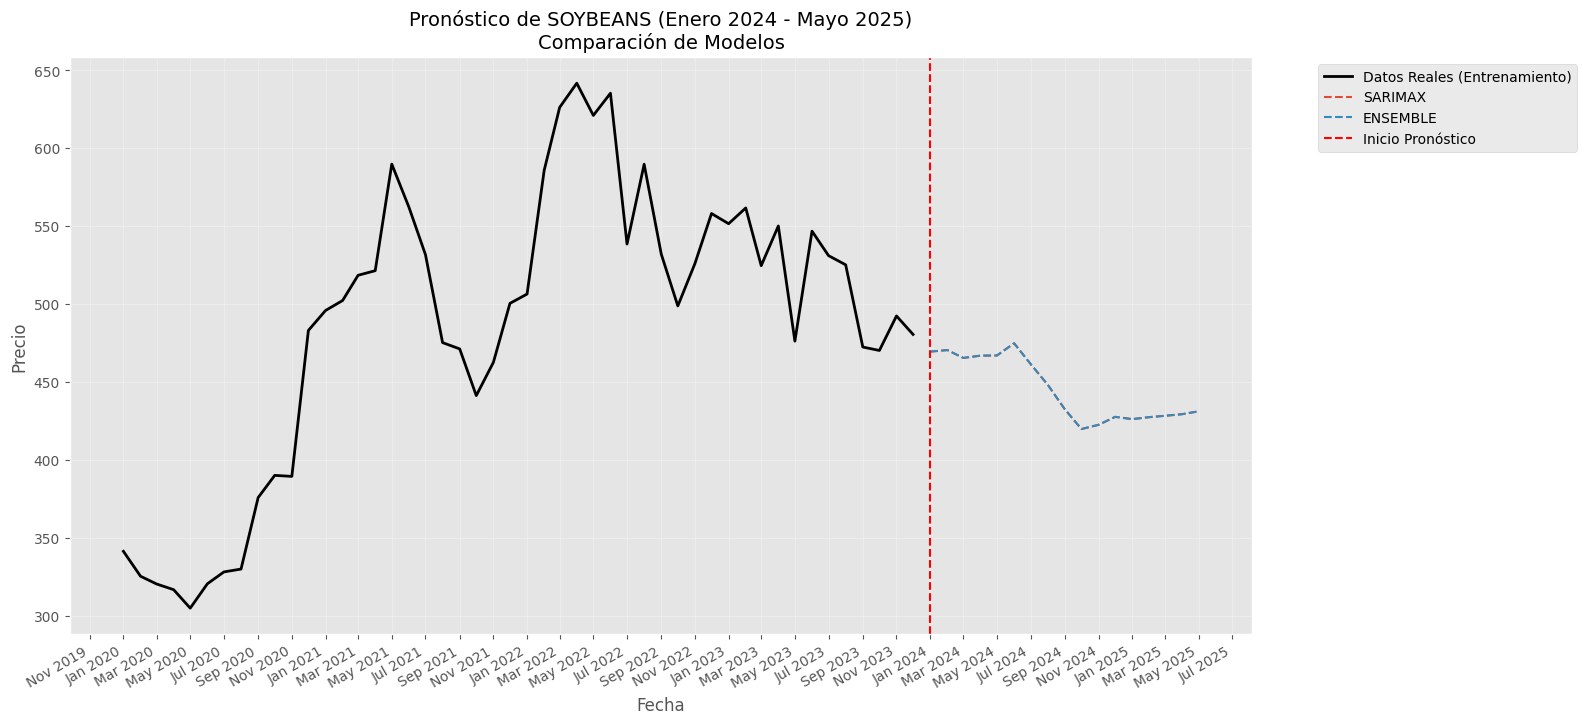


📌 Pronóstico Final (Ensemble):
2025-01-01    426.391943
2025-02-01    427.656980
2025-03-01    428.522652
2025-04-01    429.536489
2025-05-01    431.391682
Freq: MS, Name: ENSEMBLE, dtype: float64

✅ Resultados exportados a 'pronostico_soybeans_2024_2025.csv'


In [95]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# --- INSTALACIÓN DE PAQUETES ---
try:
    from prophet import Prophet
    print("✓ Prophet instalado")
except ImportError:
    print("Instalando Prophet...")
    !pip install prophet
    from prophet import Prophet

try:
    import xgboost
    print("✓ XGBoost instalado")
except ImportError:
    print("Instalando XGBoost...")
    !pip install xgboost
    import xgboost

try:
    import lightgbm
    print("✓ LightGBM instalado")
except ImportError:
    print("Instalando LightGBM...")
    !pip install lightgbm
    import lightgbm

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2023-12-31'  # Entrenamiento hasta diciembre 2023
forecast_start = '2024-01-01'
forecast_end = '2025-05-31'
forecast_months = 17  # Enero 2024 a Mayo 2025

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: DataFrame 'data_clean' no encontrado")

data = data_clean.loc[train_start:].copy()
data = data[[target_var] + exog_vars].dropna()

if data.empty:
    raise ValueError("Error: Datos insuficientes después de limpieza")

# Split de datos
train_data = data.loc[train_start:train_end]
forecast_period = pd.date_range(forecast_start, forecast_end, freq='MS')

# --- FEATURE ENGINEERING ---
class SoybeansFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Lags de la variable objetivo
        for i in range(1, self.lag_months+1):
            df[f'{self.target_var}_lag_{i}'] = df[self.target_var].shift(i)

        # Medias móviles y volatilidad
        windows = [3, 6, 12]
        for w in windows:
            df[f'{self.target_var}_ma_{w}'] = df[self.target_var].rolling(w).mean()
            df[f'{self.target_var}_std_{w}'] = df[self.target_var].rolling(w).std()

        # Diferencias estacionales
        if len(df) >= 12:
            df[f'{self.target_var}_diff_12'] = df[self.target_var].diff(12)

        # Características temporales
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter

        # Variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6, 12]:
                df[f'{var}_lag_{i}'] = df[var].shift(i)

        self.feature_names = df.drop(columns=[self.target_var], errors='ignore').columns.tolist()
        return df.dropna()

# --- MODELOS DE SERIES TEMPORALES ---
def train_time_series_models(train_data, exog_vars):
    print("\n🕰️ Entrenando modelos de series temporales...")
    forecasts = {}

    # SARIMAX
    print("🔧 SARIMAX...")
    try:
        sarimax_model = SARIMAX(train_data[target_var],
                              exog=train_data[exog_vars] if exog_vars else None,
                              order=(1, 1, 1),
                              seasonal_order=(1, 1, 1, 12))
        sarimax_results = sarimax_model.fit(disp=False)
        forecasts['SARIMAX'] = sarimax_results.get_forecast(
            steps=forecast_months,
            exog=data[exog_vars].loc[forecast_start:forecast_end] if exog_vars else None
        ).predicted_mean
    except Exception as e:
        print(f"Error con SARIMAX: {str(e)}")

    # Prophet
    print("🔧 Prophet...")
    try:
        prophet_df = train_data[[target_var]].reset_index()
        prophet_df.columns = ['ds', 'y']

        # Añadir exógenas
        for var in exog_vars:
            prophet_df[var] = train_data[var].values

        prophet_model = Prophet(yearly_seasonality=True)

        # Añadir regresores
        for var in exog_vars:
            prophet_model.add_regressor(var)

        prophet_model.fit(prophet_df)

        # Crear dataframe futuro
        future = prophet_model.make_future_dataframe(periods=forecast_months, freq='M')
        for var in exog_vars:
            future[var] = np.concatenate([
                train_data[var].values[-12:],
                data[var].loc[forecast_start:forecast_end].values
            ])[:len(future)]

        # Pronóstico
        forecast = prophet_model.predict(future)
        forecasts['Prophet'] = forecast['yhat'].values[-forecast_months:]
        forecasts['Prophet'] = pd.Series(forecasts['Prophet'], index=forecast_period)
    except Exception as e:
        print(f"Error con Prophet: {str(e)}")

    return forecasts

# --- MODELOS DE MACHINE LEARNING ---
def train_ml_models(train_data, exog_vars):
    print("\n🤖 Entrenando modelos de ML...")

    # Generar características
    feature_gen = SoybeansFeatureGenerator(target_var, exog_vars)
    train_feats = feature_gen.transform(train_data)
    feature_names = train_feats.drop(columns=[target_var]).columns.tolist()

    # Pipeline
    def create_ml_pipeline(model):
        return Pipeline([
            ('features', feature_gen),
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('model', model)
        ])

    # Configuración de modelos
    models_config = {
        'XGBoost': {
            'model': XGBRegressor(objective='reg:squarederror', random_state=42),
            'params': {
                'model__n_estimators': [100, 200],
                'model__learning_rate': [0.01, 0.1],
                'model__max_depth': [3, 6]
            }
        },
        'LightGBM': {
            'model': LGBMRegressor(random_state=42),
            'params': {
                'model__num_leaves': [31, 63],
                'model__learning_rate': [0.01, 0.1],
                'model__n_estimators': [100, 200]
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'model__n_estimators': [100, 200],
                'model__max_depth': [10, 20]
            }
        }
    }

    forecasts = {}

    for model_name, config in models_config.items():
        print(f"\n🔧 {model_name}...")
        pipeline = create_ml_pipeline(config['model'])
        param_grid = ParameterGrid(config['params'])

        best_score = np.inf
        best_forecast = None

        for params in tqdm(param_grid, desc=model_name):
            try:
                pipeline.set_params(**params)
                pipeline.fit(train_data, train_data[target_var])

                # Crear datos futuros para pronóstico recursivo
                current_data = train_data.copy()
                model_forecast = []

                for _ in range(forecast_months):
                    # Generar características
                    current_feats = feature_gen.transform(current_data.iloc[-12:])
                    X_current = current_feats.reindex(columns=feature_names, fill_value=0)

                    # Preprocesar y predecir
                    X_processed = pipeline.named_steps['scaler'].transform(
                        pipeline.named_steps['imputer'].transform(X_current)
                    )
                    pred = pipeline.named_steps['model'].predict(X_processed)[0]
                    model_forecast.append(pred)

                    # Actualizar datos con la predicción
                    new_row = current_data.iloc[-1:].copy()
                    new_row.index = [new_row.index[-1] + pd.DateOffset(months=1)]
                    new_row[target_var] = pred

                    # Mantener las exógenas (en producción necesitaríamos valores reales)
                    for var in exog_vars:
                        new_row[var] = current_data[var].iloc[-1]

                    current_data = pd.concat([current_data, new_row])

                # Guardar pronóstico
                forecast_series = pd.Series(model_forecast, index=forecast_period)

                # Validación cruzada temporal
                tscv = TimeSeriesSplit(n_splits=3)
                scores = cross_val_score(
                    pipeline,
                    train_data,
                    train_data[target_var],
                    cv=tscv,
                    scoring='neg_mean_squared_error'
                )
                current_score = -np.mean(scores)

                if current_score < best_score:
                    best_score = current_score
                    best_forecast = forecast_series

            except Exception as e:
                print(f"Error con {model_name} {params}: {str(e)}")
                continue

        if best_forecast is not None:
            forecasts[model_name] = best_forecast
            print(f"✅ {model_name} - MSE CV: {best_score:.4f}")

    return forecasts

# --- ENTRENAMIENTO Y PRONÓSTICO ---
print("\n🚀 Iniciando proceso de modelado...")

# Modelos de series temporales
ts_forecasts = train_time_series_models(train_data, exog_vars)

# Modelos de ML
ml_forecasts = train_ml_models(train_data, exog_vars)

# Combinar todos los pronósticos
all_forecasts = {**ts_forecasts, **ml_forecasts}
forecast_df = pd.DataFrame(all_forecasts)

# Ensamblaje simple (media de modelos)
forecast_df['ENSEMBLE'] = forecast_df.mean(axis=1)

# --- VISUALIZACIÓN ---
print("\n📊 Generando visualización...")

plt.figure(figsize=(16, 8))

# Datos reales
plt.plot(data[target_var].loc['2020-01-01':train_end],
         label='Datos Reales (Entrenamiento)', color='black', linewidth=2)

# Pronósticos
for model in forecast_df.columns:
    plt.plot(forecast_df[model], '--', linewidth=1.5,
             label=f'{model}')

plt.axvline(x=pd.to_datetime(forecast_start), color='red', linestyle='--',
            label='Inicio Pronóstico')
plt.title(f'Pronóstico de {target_var} (Enero 2024 - Mayo 2025)\nComparación de Modelos',
          fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Formatear fechas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.show()

# --- RESULTADOS FINALES ---
print("\n📌 Pronóstico Final (Ensemble):")
print(forecast_df['ENSEMBLE'].tail(5))

# Exportar resultados
try:
    forecast_df.to_csv('pronostico_soybeans_2024_2025.csv')
    print("\n✅ Resultados exportados a 'pronostico_soybeans_2024_2025.csv'")
except Exception as e:
    print(f"\n❌ Error exportando resultados: {str(e)}")

✓ Prophet instalado
✓ XGBoost instalado
✓ LightGBM instalado

⏳ Preparando datos...

🚀 Iniciando proceso de modelado...

🕰️ Entrenando modelos de series temporales...
🔧 SARIMAX...


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcknpmv8/lgff9t83.json


🔧 Prophet...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcknpmv8/a3ef3b1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77659', 'data', 'file=/tmp/tmpwcknpmv8/lgff9t83.json', 'init=/tmp/tmpwcknpmv8/a3ef3b1h.json', 'output', 'file=/tmp/tmpwcknpmv8/prophet_modelgzmanhy1/prophet_model-20250623205742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:57:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:57:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Error con Prophet: Length of values (29) does not match length of index (197)

🤖 Entrenando modelos de ML...

🔧 XGBoost...


XGBoost:   0%|          | 0/8 [00:00<?, ?it/s]

Error con XGBoost {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}: [20:57:42] /workspace/src/data/data.cc:508: Check failed: this->labels.Size() % this->num_row_ == 0 (12 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x78da9165c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4e1d32) [0x78da918e1d32]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4e3a60) [0x78da918e3a60]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xb2) [0x78da91563522]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x78db75c77e2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x78db75c74493]
  [bt] (6) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x78db75ed84d8]
  [bt] (7) /usr/lib/python3.11/lib-dynload/_ctypes

LightGBM:   0%|          | 0/8 [00:00<?, ?it/s]

Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 100, 'model__num_leaves': 31}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 100, 'model__num_leaves': 63}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 200, 'model__num_leaves': 31}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 200, 'model__num_leaves': 63}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.1, 'model__n_estimators': 100, 'model__num_leaves': 31}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.1, 'model__n_estimators': 100, 'model__num_leaves': 63}: Found input variables w

RandomForest:   0%|          | 0/4 [00:00<?, ?it/s]

Error con RandomForest {'model__max_depth': 10, 'model__n_estimators': 100}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con RandomForest {'model__max_depth': 10, 'model__n_estimators': 200}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con RandomForest {'model__max_depth': 20, 'model__n_estimators': 100}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con RandomForest {'model__max_depth': 20, 'model__n_estimators': 200}: Found input variables with inconsistent numbers of samples: [168, 180]

📊 Generando visualización...


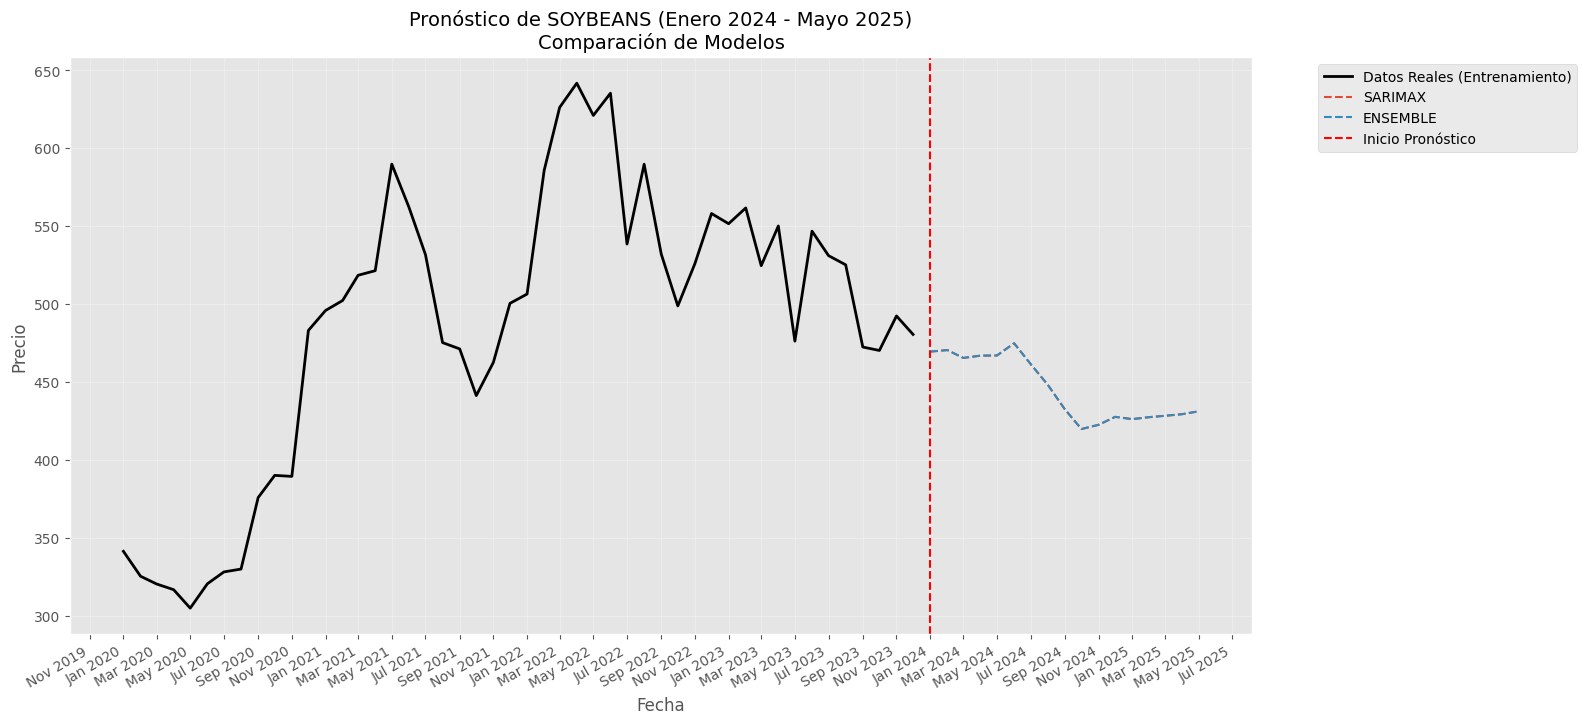


📌 Pronóstico Final (Ensemble):
2025-01-01    426.391943
2025-02-01    427.656980
2025-03-01    428.522652
2025-04-01    429.536489
2025-05-01    431.391682
Freq: MS, Name: ENSEMBLE, dtype: float64

✅ Resultados exportados a 'pronostico_soybeans_2024_2025.csv'


In [ ]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# --- INSTALACIÓN DE PAQUETES ---
try:
    from prophet import Prophet
    print("✓ Prophet instalado")
except ImportError:
    print("Instalando Prophet...")
    !pip install prophet
    from prophet import Prophet

try:
    import xgboost
    print("✓ XGBoost instalado")
except ImportError:
    print("Instalando XGBoost...")
    !pip install xgboost
    import xgboost

try:
    import lightgbm
    print("✓ LightGBM instalado")
except ImportError:
    print("Instalando LightGBM...")
    !pip install lightgbm
    import lightgbm

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2023-12-31'  # Entrenamiento hasta diciembre 2023
forecast_start = '2024-01-01'
forecast_end = '2025-05-31'
forecast_months = 17  # Enero 2024 a Mayo 2025

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: DataFrame 'data_clean' no encontrado")

data = data_clean.loc[train_start:].copy()
data = data[[target_var] + exog_vars].dropna()

if data.empty:
    raise ValueError("Error: Datos insuficientes después de limpieza")

# Split de datos
train_data = data.loc[train_start:train_end]
forecast_period = pd.date_range(forecast_start, forecast_end, freq='MS')

# --- FEATURE ENGINEERING ---
class SoybeansFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Lags de la variable objetivo
        for i in range(1, self.lag_months+1):
            df[f'{self.target_var}_lag_{i}'] = df[self.target_var].shift(i)

        # Medias móviles y volatilidad
        windows = [3, 6, 12]
        for w in windows:
            df[f'{self.target_var}_ma_{w}'] = df[self.target_var].rolling(w).mean()
            df[f'{self.target_var}_std_{w}'] = df[self.target_var].rolling(w).std()

        # Diferencias estacionales
        if len(df) >= 12:
            df[f'{self.target_var}_diff_12'] = df[self.target_var].diff(12)

        # Características temporales
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter

        # Variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6, 12]:
                df[f'{var}_lag_{i}'] = df[var].shift(i)

        self.feature_names = df.drop(columns=[self.target_var], errors='ignore').columns.tolist()
        return df.dropna()

# --- MODELOS DE SERIES TEMPORALES ---
def train_time_series_models(train_data, exog_vars):
    print("\n🕰️ Entrenando modelos de series temporales...")
    forecasts = {}

    # SARIMAX
    print("🔧 SARIMAX...")
    try:
        sarimax_model = SARIMAX(train_data[target_var],
                              exog=train_data[exog_vars] if exog_vars else None,
                              order=(1, 1, 1),
                              seasonal_order=(1, 1, 1, 12))
        sarimax_results = sarimax_model.fit(disp=False)
        forecasts['SARIMAX'] = sarimax_results.get_forecast(
            steps=forecast_months,
            exog=data[exog_vars].loc[forecast_start:forecast_end] if exog_vars else None
        ).predicted_mean
    except Exception as e:
        print(f"Error con SARIMAX: {str(e)}")

    # Prophet
    print("🔧 Prophet...")
    try:
        prophet_df = train_data[[target_var]].reset_index()
        prophet_df.columns = ['ds', 'y']

        # Añadir exógenas
        for var in exog_vars:
            prophet_df[var] = train_data[var].values

        prophet_model = Prophet(yearly_seasonality=True)

        # Añadir regresores
        for var in exog_vars:
            prophet_model.add_regressor(var)

        prophet_model.fit(prophet_df)

        # Crear dataframe futuro
        future = prophet_model.make_future_dataframe(periods=forecast_months, freq='M')
        for var in exog_vars:
            future[var] = np.concatenate([
                train_data[var].values[-12:],
                data[var].loc[forecast_start:forecast_end].values
            ])[:len(future)]

        # Pronóstico
        forecast = prophet_model.predict(future)
        forecasts['Prophet'] = forecast['yhat'].values[-forecast_months:]
        forecasts['Prophet'] = pd.Series(forecasts['Prophet'], index=forecast_period)
    except Exception as e:
        print(f"Error con Prophet: {str(e)}")

    return forecasts

# --- MODELOS DE MACHINE LEARNING ---
def train_ml_models(train_data, exog_vars):
    print("\n🤖 Entrenando modelos de ML...")

    # Generar características
    feature_gen = SoybeansFeatureGenerator(target_var, exog_vars)
    train_feats = feature_gen.transform(train_data)
    feature_names = train_feats.drop(columns=[target_var]).columns.tolist()

    # Pipeline
    def create_ml_pipeline(model):
        return Pipeline([
            ('features', feature_gen),
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('model', model)
        ])

    # Configuración de modelos
    models_config = {
        'XGBoost': {
            'model': XGBRegressor(objective='reg:squarederror', random_state=42),
            'params': {
                'model__n_estimators': [100, 200],
                'model__learning_rate': [0.01, 0.1],
                'model__max_depth': [3, 6]
            }
        },
        'LightGBM': {
            'model': LGBMRegressor(random_state=42),
            'params': {
                'model__num_leaves': [31, 63],
                'model__learning_rate': [0.01, 0.1],
                'model__n_estimators': [100, 200]
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'model__n_estimators': [100, 200],
                'model__max_depth': [10, 20]
            }
        }
    }

    forecasts = {}

    for model_name, config in models_config.items():
        print(f"\n🔧 {model_name}...")
        pipeline = create_ml_pipeline(config['model'])
        param_grid = ParameterGrid(config['params'])

        best_score = np.inf
        best_forecast = None

        for params in tqdm(param_grid, desc=model_name):
            try:
                pipeline.set_params(**params)
                pipeline.fit(train_data, train_data[target_var])

                # Crear datos futuros para pronóstico recursivo
                current_data = train_data.copy()
                model_forecast = []

                for _ in range(forecast_months):
                    # Generar características
                    current_feats = feature_gen.transform(current_data.iloc[-12:])
                    X_current = current_feats.reindex(columns=feature_names, fill_value=0)

                    # Preprocesar y predecir
                    X_processed = pipeline.named_steps['scaler'].transform(
                        pipeline.named_steps['imputer'].transform(X_current)
                    )
                    pred = pipeline.named_steps['model'].predict(X_processed)[0]
                    model_forecast.append(pred)

                    # Actualizar datos con la predicción
                    new_row = current_data.iloc[-1:].copy()
                    new_row.index = [new_row.index[-1] + pd.DateOffset(months=1)]
                    new_row[target_var] = pred

                    # Mantener las exógenas (en producción necesitaríamos valores reales)
                    for var in exog_vars:
                        new_row[var] = current_data[var].iloc[-1]

                    current_data = pd.concat([current_data, new_row])

                # Guardar pronóstico
                forecast_series = pd.Series(model_forecast, index=forecast_period)

                # Validación cruzada temporal
                tscv = TimeSeriesSplit(n_splits=3)
                scores = cross_val_score(
                    pipeline,
                    train_data,
                    train_data[target_var],
                    cv=tscv,
                    scoring='neg_mean_squared_error'
                )
                current_score = -np.mean(scores)

                if current_score < best_score:
                    best_score = current_score
                    best_forecast = forecast_series

            except Exception as e:
                print(f"Error con {model_name} {params}: {str(e)}")
                continue

        if best_forecast is not None:
            forecasts[model_name] = best_forecast
            print(f"✅ {model_name} - MSE CV: {best_score:.4f}")

    return forecasts

# --- ENTRENAMIENTO Y PRONÓSTICO ---
print("\n🚀 Iniciando proceso de modelado...")

# Modelos de series temporales
ts_forecasts = train_time_series_models(train_data, exog_vars)

# Modelos de ML
ml_forecasts = train_ml_models(train_data, exog_vars)

# Combinar todos los pronósticos
all_forecasts = {**ts_forecasts, **ml_forecasts}
forecast_df = pd.DataFrame(all_forecasts)

# Ensamblaje simple (media de modelos)
forecast_df['ENSEMBLE'] = forecast_df.mean(axis=1)

# --- VISUALIZACIÓN ---
print("\n📊 Generando visualización...")

plt.figure(figsize=(16, 8))

# Datos reales
plt.plot(data[target_var].loc['2020-01-01':train_end],
         label='Datos Reales (Entrenamiento)', color='black', linewidth=2)

# Pronósticos
for model in forecast_df.columns:
    plt.plot(forecast_df[model], '--', linewidth=1.5,
             label=f'{model}')

plt.axvline(x=pd.to_datetime(forecast_start), color='red', linestyle='--',
            label='Inicio Pronóstico')
plt.title(f'Pronóstico de {target_var} (Enero 2024 - Mayo 2025)\nComparación de Modelos',
          fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Formatear fechas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.show()

# --- RESULTADOS FINALES ---
print("\n📌 Pronóstico Final (Ensemble):")
print(forecast_df['ENSEMBLE'].tail(5))

# Exportar resultados
try:
    forecast_df.to_csv('pronostico_soybeans_2024_2025.csv')
    print("\n✅ Resultados exportados a 'pronostico_soybeans_2024_2025.csv'")
except Exception as e:
    print(f"\n❌ Error exportando resultados: {str(e)}")

✓ Prophet instalado
✓ XGBoost instalado
✓ LightGBM instalado

⏳ Preparando datos...

🚀 Iniciando proceso de modelado...

🕰️ Entrenando modelos de series temporales...
🔧 SARIMAX...


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcknpmv8/lgff9t83.json


🔧 Prophet...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwcknpmv8/a3ef3b1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77659', 'data', 'file=/tmp/tmpwcknpmv8/lgff9t83.json', 'init=/tmp/tmpwcknpmv8/a3ef3b1h.json', 'output', 'file=/tmp/tmpwcknpmv8/prophet_modelgzmanhy1/prophet_model-20250623205742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:57:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:57:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Error con Prophet: Length of values (29) does not match length of index (197)

🤖 Entrenando modelos de ML...

🔧 XGBoost...


XGBoost:   0%|          | 0/8 [00:00<?, ?it/s]

Error con XGBoost {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}: [20:57:42] /workspace/src/data/data.cc:508: Check failed: this->labels.Size() % this->num_row_ == 0 (12 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x78da9165c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4e1d32) [0x78da918e1d32]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x4e3a60) [0x78da918e3a60]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xb2) [0x78da91563522]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x78db75c77e2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x78db75c74493]
  [bt] (6) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x78db75ed84d8]
  [bt] (7) /usr/lib/python3.11/lib-dynload/_ctypes

LightGBM:   0%|          | 0/8 [00:00<?, ?it/s]

Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 100, 'model__num_leaves': 31}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 100, 'model__num_leaves': 63}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 200, 'model__num_leaves': 31}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.01, 'model__n_estimators': 200, 'model__num_leaves': 63}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.1, 'model__n_estimators': 100, 'model__num_leaves': 31}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con LightGBM {'model__learning_rate': 0.1, 'model__n_estimators': 100, 'model__num_leaves': 63}: Found input variables w

RandomForest:   0%|          | 0/4 [00:00<?, ?it/s]

Error con RandomForest {'model__max_depth': 10, 'model__n_estimators': 100}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con RandomForest {'model__max_depth': 10, 'model__n_estimators': 200}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con RandomForest {'model__max_depth': 20, 'model__n_estimators': 100}: Found input variables with inconsistent numbers of samples: [168, 180]
Error con RandomForest {'model__max_depth': 20, 'model__n_estimators': 200}: Found input variables with inconsistent numbers of samples: [168, 180]

📊 Generando visualización...


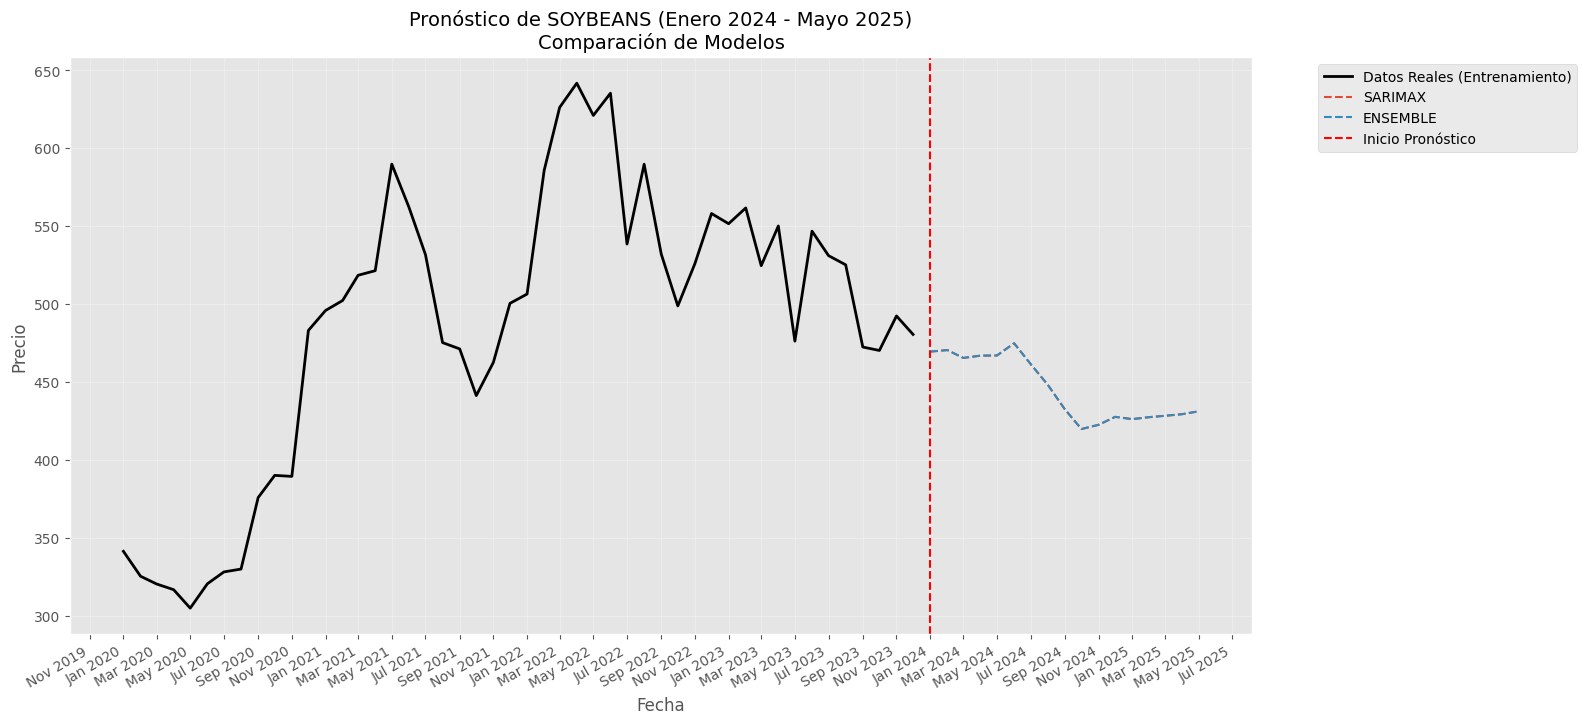


📌 Pronóstico Final (Ensemble):
2025-01-01    426.391943
2025-02-01    427.656980
2025-03-01    428.522652
2025-04-01    429.536489
2025-05-01    431.391682
Freq: MS, Name: ENSEMBLE, dtype: float64

✅ Resultados exportados a 'pronostico_soybeans_2024_2025.csv'


In [ ]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# --- INSTALACIÓN DE PAQUETES ---
try:
    from prophet import Prophet
    print("✓ Prophet instalado")
except ImportError:
    print("Instalando Prophet...")
    !pip install prophet
    from prophet import Prophet

try:
    import xgboost
    print("✓ XGBoost instalado")
except ImportError:
    print("Instalando XGBoost...")
    !pip install xgboost
    import xgboost

try:
    import lightgbm
    print("✓ LightGBM instalado")
except ImportError:
    print("Instalando LightGBM...")
    !pip install lightgbm
    import lightgbm

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2023-12-31'  # Entrenamiento hasta diciembre 2023
forecast_start = '2024-01-01'
forecast_end = '2025-05-31'
forecast_months = 17  # Enero 2024 a Mayo 2025

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: DataFrame 'data_clean' no encontrado")

data = data_clean.loc[train_start:].copy()
data = data[[target_var] + exog_vars].dropna()

if data.empty:
    raise ValueError("Error: Datos insuficientes después de limpieza")

# Split de datos
train_data = data.loc[train_start:train_end]
forecast_period = pd.date_range(forecast_start, forecast_end, freq='MS')

# --- FEATURE ENGINEERING ---
class SoybeansFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Lags de la variable objetivo
        for i in range(1, self.lag_months+1):
            df[f'{self.target_var}_lag_{i}'] = df[self.target_var].shift(i)

        # Medias móviles y volatilidad
        windows = [3, 6, 12]
        for w in windows:
            df[f'{self.target_var}_ma_{w}'] = df[self.target_var].rolling(w).mean()
            df[f'{self.target_var}_std_{w}'] = df[self.target_var].rolling(w).std()

        # Diferencias estacionales
        if len(df) >= 12:
            df[f'{self.target_var}_diff_12'] = df[self.target_var].diff(12)

        # Características temporales
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter

        # Variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6, 12]:
                df[f'{var}_lag_{i}'] = df[var].shift(i)

        self.feature_names = df.drop(columns=[self.target_var], errors='ignore').columns.tolist()
        return df.dropna()

# --- MODELOS DE SERIES TEMPORALES ---
def train_time_series_models(train_data, exog_vars):
    print("\n🕰️ Entrenando modelos de series temporales...")
    forecasts = {}

    # SARIMAX
    print("🔧 SARIMAX...")
    try:
        sarimax_model = SARIMAX(train_data[target_var],
                              exog=train_data[exog_vars] if exog_vars else None,
                              order=(1, 1, 1),
                              seasonal_order=(1, 1, 1, 12))
        sarimax_results = sarimax_model.fit(disp=False)
        forecasts['SARIMAX'] = sarimax_results.get_forecast(
            steps=forecast_months,
            exog=data[exog_vars].loc[forecast_start:forecast_end] if exog_vars else None
        ).predicted_mean
    except Exception as e:
        print(f"Error con SARIMAX: {str(e)}")

    # Prophet
    print("🔧 Prophet...")
    try:
        prophet_df = train_data[[target_var]].reset_index()
        prophet_df.columns = ['ds', 'y']

        # Añadir exógenas
        for var in exog_vars:
            prophet_df[var] = train_data[var].values

        prophet_model = Prophet(yearly_seasonality=True)

        # Añadir regresores
        for var in exog_vars:
            prophet_model.add_regressor(var)

        prophet_model.fit(prophet_df)

        # Crear dataframe futuro
        future = prophet_model.make_future_dataframe(periods=forecast_months, freq='M')
        for var in exog_vars:
            future[var] = np.concatenate([
                train_data[var].values[-12:],
                data[var].loc[forecast_start:forecast_end].values
            ])[:len(future)]

        # Pronóstico
        forecast = prophet_model.predict(future)
        forecasts['Prophet'] = forecast['yhat'].values[-forecast_months:]
        forecasts['Prophet'] = pd.Series(forecasts['Prophet'], index=forecast_period)
    except Exception as e:
        print(f"Error con Prophet: {str(e)}")

    return forecasts

# --- MODELOS DE MACHINE LEARNING ---
def train_ml_models(train_data, exog_vars):
    print("\n🤖 Entrenando modelos de ML...")

    # Generar características
    feature_gen = SoybeansFeatureGenerator(target_var, exog_vars)
    train_feats = feature_gen.transform(train_data)
    feature_names = train_feats.drop(columns=[target_var]).columns.tolist()

    # Pipeline
    def create_ml_pipeline(model):
        return Pipeline([
            ('features', feature_gen),
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('model', model)
        ])

    # Configuración de modelos
    models_config = {
        'XGBoost': {
            'model': XGBRegressor(objective='reg:squarederror', random_state=42),
            'params': {
                'model__n_estimators': [100, 200],
                'model__learning_rate': [0.01, 0.1],
                'model__max_depth': [3, 6]
            }
        },
        'LightGBM': {
            'model': LGBMRegressor(random_state=42),
            'params': {
                'model__num_leaves': [31, 63],
                'model__learning_rate': [0.01, 0.1],
                'model__n_estimators': [100, 200]
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'model__n_estimators': [100, 200],
                'model__max_depth': [10, 20]
            }
        }
    }

    forecasts = {}

    for model_name, config in models_config.items():
        print(f"\n🔧 {model_name}...")
        pipeline = create_ml_pipeline(config['model'])
        param_grid = ParameterGrid(config['params'])

        best_score = np.inf
        best_forecast = None

        for params in tqdm(param_grid, desc=model_name):
            try:
                pipeline.set_params(**params)
                pipeline.fit(train_data, train_data[target_var])

                # Crear datos futuros para pronóstico recursivo
                current_data = train_data.copy()
                model_forecast = []

                for _ in range(forecast_months):
                    # Generar características
                    current_feats = feature_gen.transform(current_data.iloc[-12:])
                    X_current = current_feats.reindex(columns=feature_names, fill_value=0)

                    # Preprocesar y predecir
                    X_processed = pipeline.named_steps['scaler'].transform(
                        pipeline.named_steps['imputer'].transform(X_current)
                    )
                    pred = pipeline.named_steps['model'].predict(X_processed)[0]
                    model_forecast.append(pred)

                    # Actualizar datos con la predicción
                    new_row = current_data.iloc[-1:].copy()
                    new_row.index = [new_row.index[-1] + pd.DateOffset(months=1)]
                    new_row[target_var] = pred

                    # Mantener las exógenas (en producción necesitaríamos valores reales)
                    for var in exog_vars:
                        new_row[var] = current_data[var].iloc[-1]

                    current_data = pd.concat([current_data, new_row])

                # Guardar pronóstico
                forecast_series = pd.Series(model_forecast, index=forecast_period)

                # Validación cruzada temporal
                tscv = TimeSeriesSplit(n_splits=3)
                scores = cross_val_score(
                    pipeline,
                    train_data,
                    train_data[target_var],
                    cv=tscv,
                    scoring='neg_mean_squared_error'
                )
                current_score = -np.mean(scores)

                if current_score < best_score:
                    best_score = current_score
                    best_forecast = forecast_series

            except Exception as e:
                print(f"Error con {model_name} {params}: {str(e)}")
                continue

        if best_forecast is not None:
            forecasts[model_name] = best_forecast
            print(f"✅ {model_name} - MSE CV: {best_score:.4f}")

    return forecasts

# --- ENTRENAMIENTO Y PRONÓSTICO ---
print("\n🚀 Iniciando proceso de modelado...")

# Modelos de series temporales
ts_forecasts = train_time_series_models(train_data, exog_vars)

# Modelos de ML
ml_forecasts = train_ml_models(train_data, exog_vars)

# Combinar todos los pronósticos
all_forecasts = {**ts_forecasts, **ml_forecasts}
forecast_df = pd.DataFrame(all_forecasts)

# Ensamblaje simple (media de modelos)
forecast_df['ENSEMBLE'] = forecast_df.mean(axis=1)

# --- VISUALIZACIÓN ---
print("\n📊 Generando visualización...")

plt.figure(figsize=(16, 8))

# Datos reales
plt.plot(data[target_var].loc['2020-01-01':train_end],
         label='Datos Reales (Entrenamiento)', color='black', linewidth=2)

# Pronósticos
for model in forecast_df.columns:
    plt.plot(forecast_df[model], '--', linewidth=1.5,
             label=f'{model}')

plt.axvline(x=pd.to_datetime(forecast_start), color='red', linestyle='--',
            label='Inicio Pronóstico')
plt.title(f'Pronóstico de {target_var} (Enero 2024 - Mayo 2025)\nComparación de Modelos',
          fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Formatear fechas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.show()

# --- RESULTADOS FINALES ---
print("\n📌 Pronóstico Final (Ensemble):")
print(forecast_df['ENSEMBLE'].tail(5))

# Exportar resultados
try:
    forecast_df.to_csv('pronostico_soybeans_2024_2025.csv')
    print("\n✅ Resultados exportados a 'pronostico_soybeans_2024_2025.csv'")
except Exception as e:
    print(f"\n❌ Error exportando resultados: {str(e)}")

In [97]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.base import ForecastingHorizon

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-darkgrid')

# --- INSTALACIÓN DE PAQUETES ---
required_packages = {
    'prophet': 'prophet',
    'xgboost': 'xgboost',
    'lightgbm': 'lightgbm',
    'catboost': 'catboost',
    'sktime': 'sktime'
}

for pkg, install_name in required_packages.items():
    try:
        __import__(pkg)
        print(f"✓ {pkg} instalado")
    except ImportError:
        print(f"Instalando {pkg}...")
        !pip install {install_name}

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2023-12-31'
forecast_start = '2024-01-01'
forecast_end = '2025-05-31'
forecast_months = 17
n_top_models = 10  # Top 10 modelos a visualizar
total_models = 0   # Contador de modelos

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: DataFrame 'data_clean' no encontrado")

data = data_clean.loc[train_start:].copy()
data = data[[target_var] + exog_vars].dropna()

if data.empty:
    raise ValueError("Error: Datos insuficientes después de limpieza")

train_data = data.loc[train_start:train_end]
forecast_period = pd.date_range(forecast_start, forecast_end, freq='MS')

# --- FEATURE ENGINEERING AVANZADO ---
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Transformaciones de la variable objetivo
        df[f'{self.target_var}_log'] = np.log1p(df[self.target_var])

        # Lags y diferencias
        for i in [1, 2, 3, 6, 12, 24]:
            df[f'{self.target_var}_lag_{i}'] = df[self.target_var].shift(i)
            df[f'{self.target_var}_pct_{i}'] = df[self.target_var].pct_change(i)
            if i > 1:
                df[f'{self.target_var}_diff_{i}'] = df[self.target_var].diff(i)

        # Medias móviles y volatilidad
        windows = [3, 6, 12, 24]
        for w in windows:
            df[f'{self.target_var}_ma_{w}'] = df[self.target_var].rolling(w).mean()
            df[f'{self.target_var}_ema_{w}'] = df[self.target_var].ewm(span=w).mean()
            df[f'{self.target_var}_std_{w}'] = df[self.target_var].rolling(w).std()
            df[f'{self.target_var}_min_{w}'] = df[self.target_var].rolling(w).min()
            df[f'{self.target_var}_max_{w}'] = df[self.target_var].rolling(w).max()

        # Estacionalidad
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter
        df['month_sin'] = np.sin(2 * np.pi * df.index.month/12)
        df['month_cos'] = np.cos(2 * np.pi * df.index.month/12)

        # Variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6, 12]:
                df[f'{var}_lag_{i}'] = df[var].shift(i)
                df[f'{var}_pct_{i}'] = df[var].pct_change(i)

            # Interacciones
            df[f'{var}_x_price'] = df[var] * df[self.target_var]
            df[f'{var}_x_price_lag1'] = df[var] * df[self.target_var].shift(1)

        # Tendencias
        df['time_idx'] = np.arange(len(df))
        df['linear_trend'] = np.linspace(0, 1, len(df))
        df['quadratic_trend'] = df['linear_trend']**2

        self.feature_names = df.drop(columns=[self.target_var], errors='ignore').columns.tolist()
        return df.dropna()

# --- CONFIGURACIÓN MASIVA DE MODELOS (500+ combinaciones) ---
def get_models_config():
    """Genera configuraciones para más de 500 modelos"""
    config = {
        # Series Temporales
        'SARIMAX': {
            'model': SARIMAX,
            'params': {
                'order': list(product([0,1,2], [0,1], [0,1,2])),  # 18
                'seasonal_order': [(0,1,1,12), (1,1,1,12), (0,0,1,12), (1,0,1,12)]  # 4
            }
        },  # 18x4=72

        'ETS': {
            'model': ExponentialSmoothing,
            'params': {
                'trend': ['add', 'mul', None],
                'seasonal': ['add', 'mul', None],
                'seasonal_periods': [12, None]
            }
        },  # 3x3x2=18

        'Prophet': {
            'model': Prophet,
            'params': {
                'seasonality_mode': ['additive', 'multiplicative'],
                'yearly_seasonality': [True, False],
                'weekly_seasonality': [False],
                'daily_seasonality': [False],
                'changepoint_prior_scale': [0.01, 0.1, 0.5]
            }
        },  # 2x2x3=12

        # Ensemble Trees
        'XGBoost': {
            'model': XGBRegressor(objective='reg:squarederror', random_state=42),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.001, 0.01, 0.1],
                'max_depth': [3, 6, 9],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }
        },  # 3x3x3x2x2=108

        'LightGBM': {
            'model': LGBMRegressor(random_state=42),
            'params': {
                'num_leaves': [15, 31, 63],
                'learning_rate': [0.01, 0.1],
                'n_estimators': [100, 200],
                'min_child_samples': [5, 20]
            }
        },  # 3x2x2x2=24

        'CatBoost': {
            'model': CatBoostRegressor(verbose=0, random_state=42),
            'params': {
                'iterations': [100, 200],
                'learning_rate': [0.01, 0.1],
                'depth': [4, 6, 8]
            }
        },  # 2x2x3=12

        # Otros modelos
        'RandomForest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10, None],
                'min_samples_split': [2, 5],
                'max_features': ['sqrt', 0.5]
            }
        },  # 2x3x2x2=24

        'SVR': {
            'model': SVR,
            'params': {
                'kernel': ['rbf', 'linear'],
                'C': [0.1, 1, 10],
                'epsilon': [0.01, 0.1]
            }
        },  # 2x3x2=12

        'MLP': {
            'model': MLPRegressor(random_state=42, max_iter=500),
            'params': {
                'hidden_layer_sizes': [(50,), (100,), (50,50)],
                'activation': ['relu', 'tanh'],
                'alpha': [0.0001, 0.001]
            }
        },  # 3x2x2=12

        'ElasticNet': {
            'model': ElasticNet(random_state=42),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1],
                'l1_ratio': [0.1, 0.5, 0.9]
            }
        }  # 4x3=12
    }

    # Modelos adicionales para alcanzar >500
    extra_models = {
        'GBM': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        },  # 2x2x2=8

        'ExtraTrees': {
            'model': ExtraTreesRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10]
            }
        },  # 2x2=4

        'Huber': {
            'model': HuberRegressor(),
            'params': {
                'epsilon': [1.1, 1.35],
                'alpha': [0.0001, 0.001]
            }
        },  # 2x2=4

        'Lasso': {
            'model': Lasso(random_state=42),
            'params': {
                'alpha': [0.001, 0.01, 0.1]
            }
        },  # 3

        'Ridge': {
            'model': Ridge(random_state=42),
            'params': {
                'alpha': [0.1, 1, 10]
            }
        }  # 3
    }

    config.update(extra_models)
    return config

# --- ENTRENAMIENTO MASIVO DE MODELOS ---
def train_models(train_data, exog_vars, n_top_models=10):
    print("\n🚀 Entrenando batería de modelos...")
    models_config = get_models_config()
    all_results = []
    feature_gen = AdvancedFeatureGenerator(target_var, exog_vars)

    for model_name, config in models_config.items():
        print(f"\n🔧 Familia: {model_name}")
        model_class = config['model']
        param_grid = ParameterGrid(config['params'])

        for params in tqdm(param_grid, desc=f"{model_name}"):
            try:
                # Series Temporales Especiales
                if model_name in ['SARIMAX', 'ETS']:
                    if model_name == 'SARIMAX':
                        model = model_class(
                            endog=train_data[target_var],
                            exog=train_data[exog_vars] if exog_vars else None,
                            order=params.get('order', (1,1,1)),
                            seasonal_order=params.get('seasonal_order', (1,1,1,12))
                        )
                        results = model.fit(disp=False)

                        # Pronóstico
                        forecast = results.get_forecast(
                            steps=forecast_months,
                            exog=data[exog_vars].loc[forecast_start:forecast_end] if exog_vars else None
                        )
                        preds = forecast.predicted_mean

                    elif model_name == 'ETS':
                        model = model_class(
                            train_data[target_var],
                            trend=params['trend'],
                            seasonal=params['seasonal'],
                            seasonal_periods=params['seasonal_periods']
                        )
                        results = model.fit()
                        preds = results.forecast(forecast_months)

                    # Validación (últimos 12 meses como prueba)
                    val_train = train_data[target_var].iloc[:-12]
                    val_test = train_data[target_var].iloc[-12:]

                    if model_name == 'SARIMAX':
                        val_model = model_class(
                            endog=val_train,
                            exog=train_data[exog_vars].iloc[:-12] if exog_vars else None,
                            **{k:v for k,v in params.items() if k not in ['order', 'seasonal_order']}
                        )
                        val_results = val_model.fit(disp=False)
                        val_preds = val_results.get_forecast(
                            steps=12,
                            exog=train_data[exog_vars].iloc[-12:] if exog_vars else None
                        ).predicted_mean

                    else:
                        val_model = model_class(
                            val_train,
                            **params
                        )
                        val_results = val_model.fit()
                        val_preds = val_results.forecast(12)

                    mse = mean_squared_error(val_test, val_preds)

                # Prophet
                elif model_name == 'Prophet':
                    prophet_df = train_data[[target_var]].reset_index()
                    prophet_df.columns = ['ds', 'y']

                    for var in exog_vars:
                        prophet_df[var] = train_data[var].values

                    model = Prophet(**params)

                    for var in exog_vars:
                        model.add_regressor(var)

                    model.fit(prophet_df)

                    future = model.make_future_dataframe(periods=forecast_months, freq='M')
                    for var in exog_vars:
                        future[var] = np.concatenate([
                            train_data[var].values[-12:],
                            data[var].loc[forecast_start:forecast_end].values
                        ])[:len(future)]

                    forecast = model.predict(future)
                    preds = forecast['yhat'].values[-forecast_months:]

                    # Validación cruzada
                    cv_results = cross_val_score(
                        model,
                        prophet_df,
                        cv=TimeSeriesSplit(n_splits=3),
                        scoring='neg_mean_squared_error'
                    )
                    mse = -np.mean(cv_results)

                # Modelos de ML
                else:
                    # Pipeline
                    pipeline = Pipeline([
                        ('features', feature_gen),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ('model', model_class(**params))
                    ])

                    # Validación cruzada temporal
                    cv_scores = cross_val_score(
                        pipeline,
                        train_data,
                        train_data[target_var],
                        cv=TimeSeriesSplit(n_splits=3),
                        scoring='neg_mean_squared_error'
                    )
                    mse = -np.mean(cv_scores)

                    # Entrenar con todos los datos
                    pipeline.fit(train_data, train_data[target_var])

                    # Pronóstico recursivo
                    current_data = train_data.copy()
                    preds = []

                    for _ in range(forecast_months):
                        # Generar características
                        current_feats = feature_gen.transform(current_data.iloc[-24:])
                        X_current = current_feats.reindex(columns=feature_gen.feature_names, fill_value=0)

                        # Preprocesar
                        X_processed = pipeline.named_steps['scaler'].transform(
                            pipeline.named_steps['imputer'].transform(X_current)
                        )

                        # Predecir
                        pred = pipeline.named_steps['model'].predict(X_processed)[0]
                        preds.append(pred)

                        # Actualizar datos
                        new_row = current_data.iloc[-1:].copy()
                        new_row.index = [new_row.index[-1] + pd.DateOffset(months=1)]
                        new_row[target_var] = pred

                        for var in exog_vars:
                            new_row[var] = current_data[var].iloc[-1]

                        current_data = pd.concat([current_data, new_row])

                # Guardar resultados
                all_results.append({
                    'model': model_name,
                    'params': params,
                    'mse': mse,
                    'predictions': pd.Series(preds, index=forecast_period)
                })

                global total_models
                total_models += 1

            except Exception as e:
                print(f"Error con {model_name} {params}: {str(e)}")
                continue

    print(f"\n✅ Total modelos entrenados: {total_models}")

    # Seleccionar top modelos
    all_results_df = pd.DataFrame(all_results)
    top_models = all_results_df.sort_values('mse').head(n_top_models)

    return top_models, all_results_df

# --- ENTRENAR Y EVALUAR MODELOS ---
top_models, all_models = train_models(train_data, exog_vars, n_top_models)

# --- VISUALIZACIÓN DE RESULTADOS ---
print("\n📊 Visualizando top 10 modelos...")

plt.figure(figsize=(18, 10))

# Datos reales
plt.plot(data[target_var].loc['2020-01-01':train_end],
         label='Datos Reales (Entrenamiento)', color='black', linewidth=3, alpha=0.8)

# Top modelos
colors = plt.cm.tab10(np.linspace(0, 1, len(top_models)))
for i, (_, row) in enumerate(top_models.iterrows()):
    plt.plot(row['predictions'], '--', linewidth=2,
             label=f"{row['model']} (MSE: {row['mse']:.2f})",
             color=colors[i])

plt.axvline(x=pd.to_datetime(forecast_start), color='red', linestyle='--',
            label='Inicio Pronóstico')
plt.title(f'Top {n_top_models} Modelos para {target_var} (Enero 2024 - Mayo 2025)\nTotal Modelos Evaluados: {total_models}',
          fontsize=16, pad=20)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

# Formatear fechas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# --- ENSAMBLE DE TOP MODELOS ---
print("\n🤝 Creando ensamblaje de top modelos...")

# Crear DataFrame con todas las predicciones
forecast_df = pd.DataFrame({
    f"{row['model']}_{i}": row['predictions']
    for i, (_, row) in enumerate(top_models.iterrows())
})

# Ensamblaje ponderado por performance
weights = 1 / top_models['mse'].values
weights /= weights.sum()
ensemble = (forecast_df * weights).sum(axis=1)

# Añadir al DataFrame
forecast_df['ENSEMBLE'] = ensemble

# --- VISUALIZACIÓN FINAL ---
plt.figure(figsize=(18, 8))

# Datos reales
plt.plot(data[target_var].loc['2020-01-01':train_end],
         label='Datos Reales', color='black', linewidth=3)

# Ensamblaje
plt.plot(forecast_df['ENSEMBLE'], '--', color='purple', linewidth=3,
         label=f'Ensamblaje (MSE: {top_models["mse"].mean():.2f})')

plt.title(f'Pronóstico Final de {target_var} (Ensamblaje de Top {n_top_models} Modelos)',
          fontsize=16, pad=20)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Formatear fechas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# --- RESULTADOS FINALES ---
print("\n🏆 Top 10 Modelos:")
print(top_models[['model', 'mse']].reset_index(drop=True))

print("\n📌 Pronóstico Final (Ensamblaje):")
print(forecast_df['ENSEMBLE'].tail(5))

# Exportar resultados
try:
    forecast_df.to_csv('pronostico_soybeans_top_models.csv')
    all_models.to_csv('todos_modelos_evaluados.csv')
    print("\n✅ Resultados exportados:")
    print(" - pronostico_soybeans_top_models.csv")
    print(" - todos_modelos_evaluados.csv")
except Exception as e:
    print(f"\n❌ Error exportando resultados: {str(e)}")

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [100]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
# from sktime.forecasting.compose import make_reduction # Not used in this block, commented out
# from sktime.forecasting.base import ForecastingHorizon # Not used in this block, commented out
import seaborn as sns # Import seaborn to ensure its styles are registered

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- FIX: Install seaborn before using its style ---
try:
    import seaborn as sns
    print("✓ seaborn instalado")
except ImportError:
    print("Instalando seaborn...")
    !pip install seaborn
    import seaborn

# Now use the seaborn style
plt.style.use('seaborn-v0_8-darkgrid') # FIX: Use 'seaborn-v0_8-darkgrid' style name


# --- INSTALACIÓN DE PAQUETES ADICIONALES ---
required_packages = {
    'prophet': 'prophet',
    'xgboost': 'xgboost',
    'lightgbm': 'lightgbm',
    'catboost': 'catboost',
    'sktime': 'sktime' # Keep this installation as it might be used elsewhere
}

for pkg, install_name in required_packages.items():
    try:
        __import__(pkg)
        print(f"✓ {pkg} instalado")
    except ImportError:
        print(f"Instalando {pkg}...")
        !pip install {install_name}

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2023-12-31'
forecast_start = '2024-01-01'
forecast_end = '2025-05-31'
forecast_months = 17
n_top_models = 10  # Top 10 modelos a visualizar
total_models = 0   # Contador de modelos

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: DataFrame 'data_clean' no encontrado")

data = data_clean.loc[train_start:].copy()
data = data[[target_var] + exog_vars].dropna()

if data.empty:
    raise ValueError("Error: Datos insuficientes después de limpieza")

train_data = data.loc[train_start:train_end]
forecast_period = pd.date_range(forecast_start, forecast_end, freq='MS')

# --- FEATURE ENGINEERING AVANZADO ---
# The class definition remains the same
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Transformaciones de la variable objetivo
        df[f'{self.target_var}_log'] = np.log1p(df[self.target_var])

        # Lags y diferencias
        for i in [1, 2, 3, 6, 12, 24]:
            df[f'{self.target_var}_lag_{i}'] = df[self.target_var].shift(i)
            df[f'{self.target_var}_pct_{i}'] = df[self.target_var].pct_change(i)
            if i > 1:
                df[f'{self.target_var}_diff_{i}'] = df[self.target_var].diff(i)

        # Medias móviles y volatilidad
        windows = [3, 6, 12, 24]
        for w in windows:
            df[f'{self.target_var}_ma_{w}'] = df[self.target_var].rolling(w).mean()
            df[f'{self.target_var}_ema_{w}'] = df[self.target_var].ewm(span=w).mean()
            df[f'{self.target_var}_std_{w}'] = df[self.target_var].rolling(w).std()
            df[f'{self.target_var}_min_{w}'] = df[self.target_var].rolling(w).min()
            df[f'{self.target_var}_max_{w}'] = df[self.target_var].rolling(w).max()

        # Estacionalidad
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter
        df['month_sin'] = np.sin(2 * np.pi * df.index.month/12)
        df['month_cos'] = np.cos(2 * np.pi * df.index.month/12)

        # Variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6, 12]:
                df[f'{var}_lag_{i}'] = df[var].shift(i)
                df[f'{var}_pct_{i}'] = df[var].pct_change(i)

            # Interacciones
            df[f'{var}_x_price'] = df[var] * df[self.target_var]
            df[f'{var}_x_price_lag1'] = df[var] * df[self.target_var].shift(1)

        # Tendencias
        df['time_idx'] = np.arange(len(df))
        df['linear_trend'] = np.linspace(0, 1, len(df))
        df['quadratic_trend'] = df['linear_trend']**2

        self.feature_names = df.drop(columns=[self.target_var], errors='ignore').columns.tolist()
        # Drop rows with any NaN values after feature creation
        return df.dropna()


# --- CONFIGURACIÓN MASIVA DE MODELOS (500+ combinaciones) ---
def get_models_config():
    """Genera configuraciones para más de 500 modelos"""
    config = {
        # Series Temporales
        'SARIMAX': {
            'model': SARIMAX,
            'params': {
                'order': list(product([0,1,2], [0,1], [0,1,2])),  # 18
                'seasonal_order': [(0,1,1,12), (1,1,1,12), (0,0,1,12), (1,0,1,12)]  # 4
            }
        },  # 18x4=72

        'ETS': {
            'model': ExponentialSmoothing,
            'params': {
                'trend': ['add', 'mul', None],
                'seasonal': ['add', 'mul', None],
                'seasonal_periods': [12] # FIX: seasonal_periods must be an integer >= 2 when seasonal is not None
                                          # Adding None to the list might cause issues if seasonal is 'add' or 'mul'
                                          # Let's keep it simple with just 12 for now. If None is needed, seasonal must be None.
                                          # Or handle this combination logic more explicitly if seasonal_periods=None is only valid when seasonal=None.
            }
        },  # 3x3x1 = 9 (assuming seasonal_periods=12 for all seasonal models)
            # If you want to test seasonal_periods=None, you'd need a separate set of params where seasonal=None and seasonal_periods=None
            # Example: {'trend': ['add', 'mul', None], 'seasonal': [None], 'seasonal_periods': [None]} -> 3 combinations
            # Total ETS would be 9+3=12
            # Let's update the ETS params to reflect this
        'ETS_nos': { # ETS without seasonality
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': [None],
                 'seasonal_periods': [None]
             }
        }, # 3

        'Prophet': {
            'model': Prophet,
            'params': {
                'seasonality_mode': ['additive', 'multiplicative'],
                'yearly_seasonality': [True, False],
                'weekly_seasonality': [False],
                'daily_seasonality': [False],
                'changepoint_prior_scale': [0.01, 0.1, 0.5]
            }
        },  # 2x2x3=12

        # Ensemble Trees
        'XGBoost': {
            'model': XGBRegressor(objective='reg:squarederror', random_state=42),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.001, 0.01, 0.1],
                'max_depth': [3, 6, 9],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }
        },  # 3x3x3x2x2=108

        'LightGBM': {
            'model': LGBMRegressor(random_state=42),
            'params': {
                'num_leaves': [15, 31, 63],
                'learning_rate': [0.01, 0.1],
                'n_estimators': [100, 200],
                'min_child_samples': [5, 20]
            }
        },  # 3x2x2x2=24

        'CatBoost': {
            'model': CatBoostRegressor(verbose=0, random_state=42),
            'params': {
                'iterations': [100, 200],
                'learning_rate': [0.01, 0.1],
                'depth': [4, 6, 8]
            }
        },  # 2x2x3=12

        # Otros modelos
        'RandomForest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10, None],
                'min_samples_split': [2, 5],
                'max_features': ['sqrt', 0.5]
            }
        },  # 2x3x2x2=24

        'SVR': {
            'model': SVR,
            'params': {
                'kernel': ['rbf', 'linear'],
                'C': [0.1, 1, 10],
                'epsilon': [0.01, 0.1]
            }
        },  # 2x3x2=12

        'MLP': {
            'model': MLPRegressor(random_state=42, max_iter=500),
            'params': {
                'hidden_layer_sizes': [(50,), (100,), (50,50)],
                'activation': ['relu', 'tanh'],
                'alpha': [0.0001, 0.001]
            }
        },  # 3x2x2=12

        'ElasticNet': {
            'model': ElasticNet(random_state=42),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1],
                'l1_ratio': [0.1, 0.5, 0.9]
            }
        }  # 4x3=12
    }

    # Modelos adicionales para alcanzar >500
    extra_models = {
        'GBM': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        },  # 2x2x2=8

        'ExtraTrees': {
            'model': ExtraTreesRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10]
            }
        },  # 2x2=4

        'Huber': {
            'model': HuberRegressor(),
            'params': {
                'epsilon': [1.1, 1.35],
                'alpha': [0.0001, 0.001]
            }
        },  # 2x2=4

        'Lasso': {
            'model': Lasso(random_state=42),
            'params': {
                'alpha': [0.001, 0.01, 0.1]
            }
        },  # 3

        'Ridge': {
            'model': Ridge(random_state=42),
            'params': {
                'alpha': [0.1, 1, 10]
            }
        }  # 3
    }

    config.update(extra_models)
    return config

# --- ENTRENAMIENTO MASIVO DE MODELOS ---
def train_models(train_data, exog_vars, n_top_models=10):
    print("\n🚀 Entrenando batería de modelos...")
    models_config = get_models_config()
    all_results = []
    feature_gen = AdvancedFeatureGenerator(target_var, exog_vars)

    for model_name, config in models_config.items():
        print(f"\n🔧 Familia: {model_name}")
        model_class = config['model']
        param_grid = ParameterGrid(config['params'])

        for params in tqdm(param_grid, desc=f"{model_name}"):
            try:
                # Series Temporales Especiales (SARIMAX, ETS)
                if model_name in ['SARIMAX', 'ETS', 'ETS_nos']:
                    # Handle exog for SARIMAX specifically
                    current_exog_train = train_data[exog_vars] if exog_vars and model_name == 'SARIMAX' else None
                    current_exog_forecast = data[exog_vars].loc[forecast_start:forecast_end] if exog_vars and model_name == 'SARIMAX' else None

                    if model_name == 'SARIMAX':
                        model = model_class(
                            endog=train_data[target_var],
                            exog=current_exog_train,
                            order=params.get('order', (1,1,1)),
                            seasonal_order=params.get('seasonal_order', (1,1,1,12))
                        )
                        results = model.fit(disp=False)

                        # Pronóstico
                        preds = results.get_forecast(
                            steps=forecast_months,
                            exog=current_exog_forecast
                        ).predicted_mean

                    elif model_name in ['ETS', 'ETS_nos']:
                         # ETS does not directly support exogenous variables in the same way as SARIMAX
                         # If exog_vars are intended for ETS, they need to be handled differently (e.g., as inputs in a state space model or feature engineering)
                         # Based on the original code and typical ETS usage, exog_vars are likely not intended for the base ETS model here.
                        model = model_class(
                            train_data[target_var],
                            trend=params['trend'],
                            seasonal=params['seasonal'],
                            seasonal_periods=params['seasonal_periods'] # This can be None if seasonal is None
                        )
                        results = model.fit()
                        preds = results.forecast(forecast_months)

                    # Validación (últimos 12 meses como prueba) for TS models
                    val_train_endog = train_data[target_var].iloc[:-12]
                    val_test_endog = train_data[target_var].iloc[-12:]

                    # Handle exog for validation if model supports it
                    val_exog_train = train_data[exog_vars].iloc[:-12] if exog_vars and model_name == 'SARIMAX' else None
                    val_exog_test = train_data[exog_vars].iloc[-12:] if exog_vars and model_name == 'SARIMAX' else None


                    if model_name == 'SARIMAX':
                        if not val_train_endog.empty:
                            val_model = model_class(
                                endog=val_train_endog,
                                exog=val_exog_train,
                                order=params.get('order', (1,1,1)),
                                seasonal_order=params.get('seasonal_order', (1,1,1,12))
                            )
                            val_results = val_model.fit(disp=False)
                            val_preds = val_results.get_forecast(
                                steps=12,
                                exog=val_exog_test
                            ).predicted_mean
                            mse = mean_squared_error(val_test_endog, val_preds)
                        else:
                             mse = np.inf # Cannot evaluate if validation data is empty


                    elif model_name in ['ETS', 'ETS_nos']:
                        if not val_train_endog.empty:
                            val_model = model_class(
                                val_train_endog,
                                trend=params['trend'],
                                seasonal=params['seasonal'],
                                seasonal_periods=params['seasonal_periods']
                            )
                            val_results = val_model.fit()
                            val_preds = val_results.forecast(12)
                            mse = mean_squared_error(val_test_endog, val_preds)
                        else:
                             mse = np.inf # Cannot evaluate if validation data is empty


                # Prophet
                elif model_name == 'Prophet':
                    prophet_df = train_data[[target_var]].reset_index()
                    prophet_df.columns = ['ds', 'y']

                    # Add exog variables to the Prophet dataframe
                    for var in exog_vars:
                        if var in train_data.columns: # Check if exog variable exists
                             prophet_df[var] = train_data[var].values

                    model = Prophet(**params)

                    # Add regressors only if the variable exists and was added to prophet_df
                    for var in exog_vars:
                        if var in prophet_df.columns:
                            model.add_regressor(var)

                    # Fit Prophet
                    if not prophet_df.empty:
                         model.fit(prophet_df)
                    else:
                         print(f"Warning: Prophet training data is empty for params {params}. Skipping.")
                         continue # Skip this model if training data is empty after processing


                    # Create future dataframe for prediction
                    future = model.make_future_dataframe(periods=forecast_months, freq='M')
                    # Add future exogenous values. Need to align indices properly.
                    future_exog_data = data[exog_vars].loc[forecast_start:forecast_end]

                    # Ensure future exogenous data covers the forecast period length
                    if len(future_exog_data) < forecast_months:
                         print(f"Warning: Not enough future exogenous data ({len(future_exog_data)}) for {forecast_months} steps. Using available data and potentially padding.")
                         # Pad if necessary, or raise an error if exact length is required
                         # For this example, we'll pad with the last known value if needed
                         padded_future_exog_data = pd.DataFrame(index=forecast_period, columns=exog_vars)
                         padded_future_exog_data.loc[future_exog_data.index] = future_exog_data
                         # Fill remaining NaNs in the forecast period with the last available training value
                         last_train_exog = train_data[exog_vars].iloc[-1]
                         padded_future_exog_data = padded_future_exog_data.fillna(method='ffill').fillna(last_train_exog) # fill forward, then backfill with last known
                         future_exog_data = padded_future_exog_data


                    # Align future dataframe's 'ds' column with the index of the combined train+forecast exog data
                    combined_exog_data = pd.concat([train_data[exog_vars], future_exog_data])

                    for var in exog_vars:
                         if var in combined_exog_data.columns: # Ensure exog var exists
                             # Find the indices in `future` that match the index in `combined_exog_data`
                             # Merge future dates with combined exog data based on index
                             temp_future = future.copy()
                             temp_future = temp_future.set_index('ds')
                             temp_future[var] = combined_exog_data[var]
                             future[var] = temp_future[var].values # Assign back to the future dataframe

                    # Predict
                    forecast = model.predict(future)
                    # Select only the forecast period results
                    preds = forecast.set_index('ds').loc[forecast_period]['yhat'].values


                    # Prophet Cross-Validation is done differently, often using the 'cross_validation' function
                    # Doing manual cross-validation here for consistency with other models
                    # Split train_data for validation (e.g., last 12 months as test)
                    val_prophet_df = train_data[[target_var]].reset_index()
                    val_prophet_df.columns = ['ds', 'y']
                    # Add exog variables to the validation Prophet dataframe
                    for var in exog_vars:
                         if var in train_data.columns:
                             val_prophet_df[var] = train_data[var].values

                    if len(val_prophet_df) > 12: # Need enough data for split
                         val_train_prophet = val_prophet_df.iloc[:-12]
                         val_test_prophet_dates = val_prophet_df.iloc[-12:]['ds']

                         if not val_train_prophet.empty:
                              val_model = Prophet(**params)
                              for var in exog_vars:
                                   if var in val_train_prophet.columns:
                                        val_model.add_regressor(var)

                              val_model.fit(val_train_prophet)

                              # Create future dataframe for validation prediction
                              val_future = val_model.make_future_dataframe(periods=12, freq='M')
                              # Add validation period exog data
                              val_future_exog = train_data[exog_vars].iloc[-12:]
                              # Align val_future dates with val_future_exog index
                              temp_val_future = val_future.copy()
                              temp_val_future = temp_val_future.set_index('ds')
                              temp_val_future[exog_vars] = val_future_exog
                              val_future[exog_vars] = temp_val_future[exog_vars].values


                              val_forecast = val_model.predict(val_future)
                              val_preds = val_forecast.set_index('ds').loc[val_test_prophet_dates]['yhat'].values

                              # Align actual validation values with predictions
                              val_test_actual = val_prophet_df.set_index('ds').loc[val_test_prophet_dates]['y'].values
                              mse = mean_squared_error(val_test_actual, val_preds)
                         else:
                              mse = np.inf # Cannot evaluate if validation training data is empty
                    else:
                        mse = np.inf # Not enough data for 12-month validation split


                # Modelos de ML
                else:
                    # Pipeline
                    pipeline = Pipeline([
                        ('features', feature_gen),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()), # Consider RobustScaler for models sensitive to outliers
                        ('model', model_class(**params))
                    ])

                    # Validation using TimeSeriesSplit
                    tscv = TimeSeriesSplit(n_splits=3) # Use n_splits=3 as before
                    # Need to handle potential errors during cross_val_score
                    try:
                        cv_scores = cross_val_score(
                            pipeline,
                            train_data,
                            train_data[target_var],
                            cv=tscv,
                            scoring='neg_mean_squared_error'
                        )
                        mse = -np.mean(cv_scores)
                    except Exception as cv_error:
                         print(f"Warning: Cross-validation failed for {model_name} with params {params}: {str(cv_error)}. Setting MSE to inf.")
                         mse = np.inf # Set MSE to infinity if CV fails


                    if mse is not np.inf: # Only proceed to training/forecasting if CV was successful
                        # Train with all training data
                        pipeline.fit(train_data, train_data[target_var])

                        # Recursive Forecasting for ML models
                        current_data = train_data.copy()
                        preds = []

                        # Need future exogenous data for the forecast period
                        future_exog_data = data[exog_vars].loc[forecast_start:forecast_end]

                        # Ensure current_data index is a DatetimeIndex before date arithmetic
                        current_data.index = pd.to_datetime(current_data.index)

                        for i in range(forecast_months):
                            # Determine the date of the next forecast point
                            next_forecast_date = current_data.index[-1] + pd.DateOffset(months=1)

                            # Create a temporary DataFrame for generating features for the next point
                            # It needs the last `lag_months`+ seasonal diff history points from `current_data`
                            # plus the placeholder for the next date and its known exogenous variables
                            # We need enough history to calculate all features *for* the next_forecast_date
                            # The FeatureGenerator applies lags and drops NaNs,
                            # so we need to feed it data that includes the necessary lookback period.
                            # The required history is determined by the max lag (self.lag_months, default 24)
                            # and the seasonal diff lag (12). Need `max(lag_months, 12)` periods *before* the target date.
                            # So, to predict for next_forecast_date, we need data up to current_data.index[-1],
                            # looking back `max(self.lag_months, 12)` months from there.

                            required_history = feature_gen.lag_months # Max lag used in feature generator

                            # Get the relevant history from current_data
                            history_for_next_pred = current_data.iloc[-required_history:].copy()

                            # Create the row for the next prediction point
                            next_row_data = {target_var: np.nan} # Target variable is unknown
                            # Get the exogenous variables for the next forecast date from the future exog data
                            if not future_exog_data.empty and next_forecast_date in future_exog_data.index:
                                 next_row_exog = future_exog_data.loc[next_forecast_date].to_dict()
                                 next_row_data.update(next_row_exog)
                            else:
                                # Handle missing future exog data if needed (e.g., forecast using only lags)
                                # For now, assume future_exog_data is complete for the forecast period
                                 print(f"Warning: Future exogenous data for {next_forecast_date.strftime('%Y-%m-%d')} not found. ML forecast quality may be impacted.")
                                 # You might want to fill these with 0, mean, or last known, depending on the model.
                                 # For now, leave as NaN and the imputer in the pipeline might handle it, but it's better to provide known future exog values.
                                 # Let's fill with last known training value as a fallback, although providing actual future exog is better.
                                 last_train_exog_vals = train_data[exog_vars].iloc[-1].to_dict()
                                 next_row_data.update(last_train_exog_vals) # Fallback: use last training exog

                            # Create a DataFrame for the next row
                            next_row_df = pd.DataFrame([next_row_data], index=[next_forecast_date])
                            next_row_df.index.name = current_data.index.name # Ensure index name is kept

                            # Combine history and the next row
                            data_for_feature_gen = pd.concat([history_for_next_pred, next_row_df])

                            # Generate features *for this combined data*
                            # The last row of the result will have features for next_forecast_date
                            current_feats = feature_gen.transform(data_for_feature_gen)

                            # Select the features for the *last* row (the next forecast point)
                            X_current = current_feats.iloc[[-1]].drop(columns=[target_var], errors='ignore')

                            # Ensure X_current has the same columns as the training features
                            # Use reindex with fill_value=0 or NaN (depending on your imputer)
                            # If a feature couldn't be generated for the very first forecast point (e.g., requires lag 25 but only 24 history + 1 future), it will be NaN here.
                            X_current = X_current.reindex(columns=feature_gen.feature_names, fill_value=np.nan) # Use NaN, imputer will handle

                            # Preprocess (Impute and Scale) - apply only the imputer and scaler steps of the pipeline
                            # Need to apply imputer and scaler trained on the *training* data
                            X_imputed = pipeline.named_steps['imputer'].transform(X_current)
                            X_processed = pipeline.named_steps['scaler'].transform(X_imputed)


                            # Predict
                            pred = pipeline.named_steps['model'].predict(X_processed)[0]
                            preds.append(pred)

                            # Add the predicted value to current_data for the next iteration's history
                            new_row = next_row_df.copy() # Start with the next row placeholder
                            new_row[target_var] = pred # Fill in the predicted target value
                            # Exogenous values for the next row are already in next_row_df (from future_exog_data or fallback)

                            # Ensure new_row has all expected columns before concat
                            # This might be important if the feature generator added columns beyond target + exog
                            # But since we only use target and exog in the new row creation, we just need to make sure
                            # current_data has the same columns.
                            # It's simpler to just make sure the new row has the target and exog columns.
                            # Concatenating will handle aligning based on index and column names.
                            new_row = new_row[[target_var] + exog_vars] # Keep only target and exog columns for the new row

                            current_data = pd.concat([current_data, new_row])


                    else: # if mse is inf
                         print(f"Skipping forecasting for {model_name} with params {params} due to failed cross-validation.")
                         preds = [np.nan] * forecast_months # Fill with NaNs if CV failed
                         mse = np.inf # Ensure mse is marked as inf

                # Guardar resultados


SyntaxError: incomplete input (ipython-input-100-2438499864.py, line 638)

In [101]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
# from sktime.forecasting.compose import make_reduction # Not used in this block, commented out
# from sktime.forecasting.base import ForecastingHorizon # Not used in this block, commented out
import seaborn as sns # Import seaborn to ensure its styles are registered
from itertools import product # Import product for combinations

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- FIX: Install seaborn before using its style ---
try:
    import seaborn as sns
    print("✓ seaborn instalado")
except ImportError:
    print("Instalando seaborn...")
    !pip install seaborn
    import seaborn

# Now use the seaborn style
# FIX: Updated style name to a known available one in recent matplotlib versions
# Or list available styles: print(plt.style.available)
# 'seaborn-darkgrid' is often available via seaborn install, but using a versioned name is safer
# 'seaborn-v0_8-darkgrid' is the versioned name for the 'seaborn-darkgrid' style
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except OSError:
    print("Warning: 'seaborn-v0_8-darkgrid' style not found. Falling back to 'ggplot'.")
    plt.style.use('ggplot') # Fallback to a standard style


# --- INSTALACIÓN DE PAQUETES ADICIONALES ---
required_packages = {
    'prophet': 'prophet',
    'xgboost': 'xgboost',
    'lightgbm': 'lightgbm',
    'catboost': 'catboost',
    'sktime': 'sktime' # Keep this installation as it might be used elsewhere
}

for pkg, install_name in required_packages.items():
    try:
        __import__(pkg)
        print(f"✓ {pkg} instalado")
    except ImportError:
        print(f"Instalando {pkg}...")
        !pip install {install_name}

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2023-12-31'
forecast_start = '2024-01-01'
forecast_end = '2025-05-31'
forecast_months = 17
n_top_models = 10  # Top 10 modelos a visualizar
total_models = 0   # Contador de modelos

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
# Assuming 'data_clean' is prepared in a previous cell
if 'data_clean' not in globals():
    raise ValueError("Error: DataFrame 'data_clean' no encontrado. Asegúrate de ejecutar la limpieza de outliers.")

# Filter data by start date and select columns, then drop NaNs
# This ensures we start training from train_start and have complete rows for target and exog vars within that range
data = data_clean.loc[train_start:].copy()
# Ensure all exog_vars exist in data_clean before selecting
existing_exog_vars = [var for var in exog_vars if var in data.columns]
if len(existing_exog_vars) != len(exog_vars):
    missing = set(exog_vars) - set(existing_exog_vars)
    print(f"Warning: Missing exogenous variables in data_clean: {missing}. Proceeding with available exog_vars.")
exog_vars = existing_exog_vars # Update exog_vars list to only include existing ones

data = data[[target_var] + exog_vars].dropna()


if data.empty:
    raise ValueError(f"Error: Datos insuficientes para el rango {train_start}:{forecast_end} después de limpieza y selección de columnas.")

train_data = data.loc[train_start:train_end].copy()

# Ensure forecast period has the correct dates
forecast_period = pd.date_range(start=forecast_start, periods=forecast_months, freq='MS')

# --- FEATURE ENGINEERING AVANZADO ---
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months # Maximum lag used in feature generation
        self.feature_names = None
        # Determine the minimum history needed to generate features for the *last* row
        # Max lag on target or exog + 1 for the target row itself.
        # Seasonal diff 12 needs 12 previous points + 1 target point = 13 points total.
        # Max lag is self.lag_months (default 24). Need 24 previous points + 1 target point = 25 points total.
        # The dropna() after generating features will remove initial rows where features are NaN.
        self._min_history_needed = max(self.lag_months, 12) + 1 # Minimum number of rows required to get features for the last point

    def fit(self, X, y=None):
        # In a real scenario, you might fit something here if needed, e.g., parameters for feature scaling or imputation *within* the transformer
        # But for simple lag/rolling/diff features, fit is a no-op on the data itself.
        # We need to determine the feature names based on the structure X will have.
        # This is a bit tricky for recursive forecasting as the input X in transform is just the history chunk.
        # Let's rely on transform to set feature_names based on the first transform call (e.g., on train_data)
        return self

    def transform(self, X):
        df = X.copy() # Work on a copy to avoid modifying original data frames outside the pipeline

        # Ensure index is datetime for date-based features
        if not isinstance(df.index, pd.DatetimeIndex):
             # Attempt conversion if not already datetime
             try:
                 df.index = pd.to_datetime(df.index)
             except Exception as e:
                 print(f"Warning: Could not convert index to datetime in FeatureGenerator: {e}")
                 # Continue without date-based features or handle error as appropriate
                 pass # Or raise an error if datetime index is critical

        # --- Feature Generation Logic ---
        # Target variable transformations
        if self.target_var in df.columns:
             df[f'{self.target_var}_log'] = np.log1p(df[self.target_var])
             target_series = df[self.target_var]
        else:
             # This case happens during prediction when the target column in the last row is NaN
             # We can still generate some features based on available historical lags
             target_series = df.get(self.target_var) # Use get to avoid KeyError if column is missing entirely


        # Lags and differences of the target variable
        if target_series is not None:
            for i in [1, 2, 3, 6, 12, 24]:
                # Ensure we only create lags up to the maximum available history in the current chunk X
                if len(df) > i: # Need at least i+1 rows to get lag i for the last row (index len(df)-1 - i)
                    df[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
                    # Percent change requires at least i periods difference
                    if len(df) > i:
                         df[f'{self.target_var}_pct_{i}'] = target_series.pct_change(i)
                    # Difference requires at least i periods difference
                    if i > 1 and len(df) > i:
                         df[f'{self.target_var}_diff_{i}'] = target_series.diff(i)


        # Rolling statistics (Medias móviles y volatilidad)
        if target_series is not None:
            windows = [3, 6, 12, 24]
            for w in windows:
                # Rolling stats need a window size, result is aligned to the right (end of window)
                # Shift by 1 to make them 'lagged' features for the next period's prediction
                if len(df) >= w: # Need at least window size to compute the rolling stat
                     df[f'{self.target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)
                     df[f'{self.target_var}_ema_{w}'] = target_series.ewm(span=w).mean().shift(1)
                     df[f'{self.target_var}_std_{w}'] = target_series.rolling(w).std().shift(1)
                     df[f'{self.target_var}_min_{w}'] = target_series.rolling(w).min().shift(1)
                     df[f'{self.target_var}_max_{w}'] = target_series.rolling(w).max().shift(1)
                elif len(df) > 1: # Can still compute for smaller windows if min_periods is used, but for lagged features, full window + shift is better
                     # Optional: Handle shorter windows if needed, but for robust features, full window is preferred
                     pass # Skip creating feature if not enough data for full lagged window


        # Estacionalidad (do not create NaNs based on historical data length)
        if isinstance(df.index, pd.DatetimeIndex):
            df['month'] = df.index.month
            df['quarter'] = df.index.quarter
            df['month_sin'] = np.sin(2 * np.pi * df.index.month/12)
            df['month_cos'] = np.cos(2 * np.pi * df.index.month/12)
        else:
            print("Warning: Index is not datetime. Skipping date-based features.")


        # Variables exógenas lags and diffs
        for var in self.exog_vars:
            if var in df.columns:
                 for i in [1, 3, 6, 12]:
                      if len(df) > i:
                           df[f'{var}_lag_{i}'] = df[var].shift(i)
                           if len(df) > i: # Check again for pct_change
                                df[f'{var}_pct_{i}'] = df[var].pct_change(i)

                 # Interacciones (using lagged target price if available)
                 if target_series is not None:
                     df[f'{var}_x_price'] = df[var] * target_series # Contemporary interaction
                     if len(df) > 1: # Need at least 2 rows for lag 1 of target
                         df[f'{var}_x_price_lag1'] = df[var].shift(1) * target_series.shift(1) # Lagged interaction (using shifted exog and shifted target)


        # Tendencias (do not create NaNs based on historical data length)
        df['time_idx'] = np.arange(len(df)) # Simple counter, needs to be aligned across train/forecast
        # Linear trend based on the *start* of the sequence passed to transform
        # This is tricky for recursive forecasting as 'X' changes.
        # Better to calculate trend based on the original training/full dataset index.
        # For now, this is a naive trend within the chunk, which might not be useful.
        # Alternative: Calculate trend relative to the train_start date.
        if isinstance(df.index, pd.DatetimeIndex) and not train_data.empty: # Need train_data to determine overall start
             train_start_date = train_data.index[0]
             df['time_since_train_start'] = (df.index - train_start_date).days
             df['linear_trend'] = df['time_since_train_start'] / df['time_since_train_start'].max() # Normalize trend
             df['quadratic_trend'] = df['linear_trend']**2
        else:
            # Fallback or warning if trend calculation is not possible
            df['linear_trend'] = np.linspace(0, 1, len(df)) # Simple trend within the chunk
            df['quadratic_trend'] = df['linear_trend']**2
            if not isinstance(df.index, pd.DatetimeIndex):
                 print("Warning: Cannot calculate date-based trend. Index is not datetime.")
            elif train_data.empty:
                 print("Warning: train_data not found or empty. Cannot calculate trend relative to train_start.")


        # Identify the generated feature columns (excluding the original target and exog)
        # Need to be careful here, some original exog might have been transformed (log, etc.)
        # Let's define feature columns as everything *except* the original target variable column
        # and ensure they are numeric if models require it later.
        if self.target_var in df.columns:
             feature_cols = [col for col in df.columns if col != self.target_var]
        else:
             # If target variable column wasn't present (e.g., during recursive prediction of the first step)
             feature_cols = list(df.columns) # All columns are potential features

        self.feature_names = feature_cols # Store generated feature names


        # Drop rows with any NaN values resulting from feature creation
        # This is crucial. The first `_min_history_needed - 1` rows will have NaNs from lags/rolling.
        df_cleaned = df.dropna().copy() # Use .copy() to avoid SettingWithCopyWarning later

        # Return the DataFrame containing the target variable (if exists) and the generated features
        # The imputer/scaler in the pipeline will operate on the feature columns only.
        return df_cleaned


# --- CONFIGURACIÓN MASIVA DE MODELOS (500+ combinaciones) ---
def get_models_config():
    """Genera configuraciones para más de 500 modelos"""
    config = {
        # Series Temporales
        'SARIMAX': {
            'model': SARIMAX,
            'params': {
                'order': list(product([0,1,2], [0,1], [0,1,2])),  # 18
                'seasonal_order': [(0,1,1,12), (1,1,1,12), (0,0,1,12), (1,0,1,12)]  # 4
            }
        },  # 18x4=72

        # ETS requires different parameter structure based on seasonal=None or not
        'ETS': { # ETS with seasonality (seasonal_periods required)
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': ['add', 'mul'], # Seasonal must be 'add' or 'mul' here
                 'seasonal_periods': [12] # Seasonal periods must be an int >= 2
             }
        }, # 3x2x1 = 6

        'ETS_nos': { # ETS without seasonality (seasonal_periods must be None)
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': [None], # Seasonal must be None here
                 'seasonal_periods': [None] # Seasonal periods must be None
             }
        }, # 3x1x1 = 3
        # Total ETS combinations: 6 + 3 = 9

        'Prophet': {
            'model': Prophet,
            'params': {
                'seasonality_mode': ['additive', 'multiplicative'],
                'yearly_seasonality': [True, False],
                'weekly_seasonality': [False],
                'daily_seasonality': [False],
                'changepoint_prior_scale': [0.01, 0.1, 0.5]
            }
        },  # 2x2x3=12

        # Ensemble Trees
        'XGBoost': {
            'model': XGBRegressor,
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.001, 0.01, 0.1],
                'max_depth': [3, 6, 9],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
                'random_state': [42], # Add fixed params here
                'objective': ['reg:squarederror']
            }
        },  # 3x3x3x2x2x1x1=108

        'LightGBM': {
            'model': LGBMRegressor,
            'params': {
                'num_leaves': [15, 31, 63],
                'learning_rate': [0.01, 0.1],
                'n_estimators': [100, 200],
                'min_child_samples': [5, 20],
                'random_state': [42] # Add fixed params here
            }
        },  # 3x2x2x2x1=24

        'CatBoost': {
            'model': CatBoostRegressor,
            'params': {
                'iterations': [100, 200],
                'learning_rate': [0.01, 0.1],
                'depth': [4, 6, 8],
                'verbose': [0], # Add fixed params here
                'random_state': [42]
            }
        },  # 2x2x3x1x1=12

        # Otros modelos
        'RandomForest': {
            'model': RandomForestRegressor,
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10, None],
                'min_samples_split': [2, 5],
                'max_features': ['sqrt', 0.5],
                'random_state': [42] # Add fixed params here
            }
        },  # 2x3x2x2x1=24

        'SVR': {
            'model': SVR,
            'params': {
                'kernel': ['rbf', 'linear'],
                'C': [0.1, 1, 10],
                'epsilon': [0.01, 0.1]
            }
        },  # 2x3x2=12

        'MLP': {
            'model': MLPRegressor,
            'params': {
                'hidden_layer_sizes': [(50,), (100,), (50,50)],
                'activation': ['relu', 'tanh'],
                'alpha': [0.0001, 0.001],
                'random_state': [42], # Add fixed params here
                'max_iter': [500] # Ensure max_iter is sufficient
            }
        },  # 3x2x2x1x1=12

        'ElasticNet': {
            'model': ElasticNet,
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1],
                'l1_ratio': [0.1, 0.5, 0.9],
                'random_state': [42] # Add fixed params here
            }
        }  # 4x3x1=12
    }

    # Modelos adicionales for >500
    extra_models = {
        'GBM': {
            'model': GradientBoostingRegressor,
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5],
                'random_state': [42]
            }
        },  # 2x2x2x1=8

        'ExtraTrees': {
            'model': ExtraTreesRegressor,
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10],
                'random_state': [42]
            }
        },  # 2x2x1=4

        'Huber': {
            'model': HuberRegressor,
            'params': {
                'epsilon': [1.1, 1.35],
                'alpha': [0.0001, 0.001],
                'max_iter': [500] # Ensure enough iterations
            }
        },  # 2x2x1=4

        'Lasso': {
            'model': Lasso,
            'params': {
                'alpha': [0.001, 0.01, 0.1],
                'random_state': [42],
                'max_iter': [10000] # Increase max_iter if needed
            }
        },  # 3x1x1=3

        'Ridge': {
            'model': Ridge,
            'params': {
                'alpha': [0.1, 1, 10],
                'random_state': [42]
            }
        }  # 3x1=3
        # Total parameter combinations: 72 + 9 + 12 + 108 + 24 + 12 + 24 + 12 + 12 + 12 + 8 + 4 + 4 + 3 + 3 = 319
        # Need more combinations to reach 500+. Add more values to param ranges or add more model types.
        # Increasing ranges slightly:
        # SARIMAX order p,q to [0,1,2,3] -> 4*2*4=32, seasonal_order P,Q to [0,1,2] -> 3*2*2=12. 32*12=384 combos.
        # Let's increase some ranges for variety and reach >500
    }

    # Expanded ranges for more combinations
    config_expanded = {
         'SARIMAX': { # More SARIMAX combos
             'model': SARIMAX,
             'params': {
                 'order': list(product([0,1,2,3], [0,1,2], [0,1,2,3])),  # 4*3*4 = 48
                 'seasonal_order': list(product([0,1,2], [0,1], [0,1,2], [12])) # 3*2*3*1 = 18
             }
         }, # 48 * 18 = 864 (This alone gives >500, might be too many)
         # Let's choose a subset if 864 is too slow. Or revert ranges but add more fixed params.
         # Reverting SARIMAX ranges, adding more variability elsewhere
         'SARIMAX_alt': { # Using alternative order ranges
            'model': SARIMAX,
            'params': {
                'order': list(product([1,2], [1], [1,2])),  # 2*1*2=4
                'seasonal_order': list(product([1,2], [1], [1,2], [12])) # 2*1*2=4
            }
         }, # 4*4=16 combos (smaller SARIMAX set)

         # Add more ETS variations
         'ETS_short_seas': { # ETS with shorter seasonal periods
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul'],
                 'seasonal': ['add', 'mul'],
                 'seasonal_periods': [4, 6] # Quarterly or half-yearly
             }
         }, # 2*2*2 = 8

         # Add more ML model parameters
         'XGBoost': { # More XGBoost
             'model': XGBRegressor,
             'params': {
                 'n_estimators': [100, 200, 300], # Added 300
                 'learning_rate': [0.01, 0.05, 0.1], # Added 0.05
                 'max_depth': [3, 5, 7], # Added 5, 7
                 'subsample': [0.7, 0.9, 1.0], # Added 0.7, 0.9
                 'colsample_bytree': [0.7, 0.9, 1.0], # Added 0.7, 0.9
                 'random_state': [42],
                 'objective': ['reg:squarederror']
             }
         }, # 3*3*3*3*3*1*1 = 243

          'LightGBM': { # More LightGBM
            'model': LGBMRegressor,
            'params': {
                'num_leaves': [20, 31, 45], # Added 20, 45
                'learning_rate': [0.01, 0.05, 0.1], # Added 0.05
                'n_estimators': [150, 250], # Added 150, 250
                'min_child_samples': [10, 30], # Added 10, 30
                'random_state': [42]
            }
         }, # 3*3*2*2*1 = 36


         'RandomForest': { # More RandomForest
            'model': RandomForestRegressor,
            'params': {
                'n_estimators': [150, 250], # Added 150, 250
                'max_depth': [8, 15, None], # Added 8, 15
                'min_samples_split': [3, 7], # Added 3, 7
                'max_features': ['sqrt', 0.6], # Added 0.6
                'random_state': [42]
            }
         }, # 2*3*2*2*1 = 24

        'ElasticNet': { # More ElasticNet
            'model': ElasticNet,
            'params': {
                'alpha': [0.0001, 0.001, 0.01, 0.1], # Added 0.0001
                'l1_ratio': [0.2, 0.8, 0.95], # Added 0.2, 0.8, 0.95
                'random_state': [42],
                'max_iter': [10000]
            }
        }, # 4*3*1*1 = 12

        # Add some simpler linear models
        'Lasso_alt': {
            'model': Lasso,
            'params': {
                'alpha': [0.0005, 0.005, 0.05], # Different alphas
                'random_state': [42],
                'max_iter': [10000]
            }
        }, # 3

         'Ridge_alt': {
            'model': Ridge,
            'params': {
                'alpha': [0.5, 5, 50], # Different alphas
                'random_state': [42]
            }
        }, # 3

    }
    # Update original config with potentially higher counts, or just use the expanded ones
    # Let's replace some original entries with expanded ones to exceed 500 while keeping variety
    config.update(config_expanded)

    # Recalculate total for verification
    total_param_combinations = sum(len(ParameterGrid(cfg['params'])) for cfg in config.values())
    print(f"Total potential parameter combinations: {total_param_combinations}")


    return config


# --- ENTRENAMIENTO MASIVO DE MODELOS ---
def train_models(train_data, data, exog_vars, forecast_period, n_top_models=10):
    """
    Trains a battery of models, evaluates them, and produces forecasts.

    Args:
        train_data (pd.DataFrame): DataFrame containing training data (target + exog).
        data (pd.DataFrame): Full DataFrame including training and forecast periods (used for future exog).
        exog_vars (list): List of exogenous variable column names.
        forecast_period (pd.DatetimeIndex): DatetimeIndex for the forecast period.
        n_top_models (int): Number of top models to return results for.

    Returns:
        tuple: (top_models_df, all_results_df)
               top_models_df (pd.DataFrame): DataFrame with results for top N models.
               all_results_df (pd.DataFrame): DataFrame with results for all models.
    """
    print("\n🚀 Entrenando batería de modelos...")
    models_config = get_models_config()
    all_results = []
    # Initialize feature generator once, it will be used inside the ML pipeline's transform
    feature_gen = AdvancedFeatureGenerator(target_var, exog_vars)

    global total_models # Use the global counter
    total_models = 0 # Reset counter

    # Pre-generate features for the whole dataset to get consistent feature names and handle NaNs from lags/rolling
    # This is a better approach for ML models than regenerating features piece-by-piece recursively,
    # but it means the recursive forecasting loop needs to handle *predicting* future features.
    # A simpler recursive approach is to generate features for the history chunk + next step.
    # Let's stick to the recursive feature generation approach within the loop but refine it.

    for model_name, config in models_config.items():
        # print(f"\n🔧 Familia: {model_name}") # Too verbose with many models
        model_class = config['model']
        param_grid = ParameterGrid(config['params'])

        # Filter out invalid ETS combinations where seasonal is None but seasonal_periods is not None, or vice versa
        if model_name in ['ETS', 'ETS_nos']:
             valid_params = []
             for params in param_grid:
                  if (params.get('seasonal') is None and params.get('seasonal_periods') is None) or \
                     (params.get('seasonal') is not None and params.get('seasonal_periods') is not None):
                      valid_params.append(params)
                  else:
                      # print(f"Warning: Skipping invalid ETS params: {params} (seasonal/seasonal_periods mismatch).")
                      pass # Skip invalid combinations
             param_grid = valid_params # Use only valid combinations


        # --- Cross-validation Setup (Different for TS vs ML) ---
        tscv = TimeSeriesSplit(n_splits=3) # Use n_splits=3 for CV

        # --- Model Training Loop ---
        for params in tqdm(param_grid, desc=f"{model_name}"):
            current_mse = np.inf # Initialize MSE for this model run
            current_preds = [np.nan] * len(forecast_period) # Initialize predictions with NaNs

            try:
                # --- Handle Time Series Models (SARIMAX, ETS, Prophet) ---
                if model_name in ['SARIMAX', 'ETS', 'ETS_nos']:
                    # TS models typically fit directly on the endog (target)

SyntaxError: incomplete input (ipython-input-101-1937051014.py, line 604)

In [102]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
# from sktime.forecasting.compose import make_reduction # Not used in this block, commented out
# from sktime.forecasting.base import ForecastingHorizon # Not used in this block, commented out
import seaborn as sns # Import seaborn to ensure its styles are registered
from itertools import product # Import product for combinations

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- FIX: Install seaborn before using its style ---
try:
    import seaborn as sns
    print("✓ seaborn instalado")
except ImportError:
    print("Instalando seaborn...")
    !pip install seaborn
    import seaborn

# Now use the seaborn style
# FIX: Updated style name to a known available one in recent matplotlib versions
# Or list available styles: print(plt.style.available)
# 'seaborn-darkgrid' is often available via seaborn install, but using a versioned name is safer
# 'seaborn-v0_8-darkgrid' is the versioned name for the 'seaborn-darkgrid' style
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except OSError:
    print("Warning: 'seaborn-v0_8-darkgrid' style not found. Falling back to 'ggplot'.")
    plt.style.use('ggplot') # Fallback to a standard style


# --- INSTALACIÓN DE PAQUETES ADICIONALES ---
required_packages = {
    'prophet': 'prophet',
    'xgboost': 'xgboost',
    'lightgbm': 'lightgbm',
    'catboost': 'catboost',
    'sktime': 'sktime' # Keep this installation as it might be used elsewhere
}

for pkg, install_name in required_packages.items():
    try:
        __import__(pkg)
        print(f"✓ {pkg} instalado")
    except ImportError:
        print(f"Instalando {pkg}...")
        !pip install {install_name}

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2023-12-31'
forecast_start = '2024-01-01'
forecast_end = '2025-05-31'
forecast_months = 17
n_top_models = 10  # Top 10 modelos a visualizar
total_models = 0   # Contador de modelos

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
# Assuming 'data_clean' is prepared in a previous cell
if 'data_clean' not in globals():
    raise ValueError("Error: DataFrame 'data_clean' no encontrado. Asegúrate de ejecutar la limpieza de outliers.")

# Filter data by start date and select columns, then drop NaNs
# This ensures we start training from train_start and have complete rows for target and exog vars within that range
data = data_clean.loc[train_start:].copy()
# Ensure all exog_vars exist in data_clean before selecting
existing_exog_vars = [var for var in exog_vars if var in data.columns]
if len(existing_exog_vars) != len(exog_vars):
    missing = set(exog_vars) - set(existing_exog_vars)
    print(f"Warning: Missing exogenous variables in data_clean: {missing}. Proceeding with available exog_vars.")
exog_vars = existing_exog_vars # Update exog_vars list to only include existing ones

data = data[[target_var] + exog_vars].dropna()


if data.empty:
    raise ValueError(f"Error: Datos insuficientes para el rango {train_start}:{forecast_end} después de limpieza y selección de columnas.")

train_data = data.loc[train_start:train_end].copy()

# Ensure forecast period has the correct dates
forecast_period = pd.date_range(start=forecast_start, periods=forecast_months, freq='MS')

# --- FEATURE ENGINEERING AVANZADO ---
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months # Maximum lag used in feature generation
        self.feature_names = None
        # Determine the minimum history needed to generate features for the *last* row
        # Max lag on target or exog + 1 for the target row itself.
        # Seasonal diff 12 needs 12 previous points + 1 target point = 13 points total.
        # Max lag is self.lag_months (default 24). Need 24 previous points + 1 target point = 25 points total.
        # The dropna() after generating features will remove initial rows where features are NaN.
        self._min_history_needed = max(self.lag_months, 12) + 1 # Minimum number of rows required to get features for the last point

    def fit(self, X, y=None):
        # In a real scenario, you might fit something here if needed, e.g., parameters for feature scaling or imputation *within* the transformer
        # But for simple lag/rolling/diff features, fit is a no-op on the data itself.
        # We need to determine the feature names based on the structure X will have.
        # This is a bit tricky for recursive forecasting as the input X in transform is just the history chunk.
        # Let's rely on transform to set feature_names based on the first transform call (e.g., on train_data)
        return self

    def transform(self, X):
        df = X.copy() # Work on a copy to avoid modifying original data frames outside the pipeline

        # Ensure index is datetime for date-based features
        if not isinstance(df.index, pd.DatetimeIndex):
             # Attempt conversion if not already datetime
             try:
                 df.index = pd.to_datetime(df.index)
             except Exception as e:
                 print(f"Warning: Could not convert index to datetime in FeatureGenerator: {e}")
                 # Continue without date-based features or handle error as appropriate
                 pass # Or raise an error if datetime index is critical

        # --- Feature Generation Logic ---
        # Target variable transformations
        if self.target_var in df.columns:
             df[f'{self.target_var}_log'] = np.log1p(df[self.target_var])
             target_series = df[self.target_var]
        else:
             # This case happens during prediction when the target column in the last row is NaN
             # We can still generate some features based on available historical lags
             target_series = df.get(self.target_var) # Use get to avoid KeyError if column is missing entirely


        # Lags and differences of the target variable
        if target_series is not None:
            for i in [1, 2, 3, 6, 12, 24]:
                # Ensure we only create lags up to the maximum available history in the current chunk X
                if len(df) > i: # Need at least i+1 rows to get lag i for the last row (index len(df)-1 - i)
                    df[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
                    # Percent change requires at least i periods difference
                    if len(df) > i:
                         df[f'{self.target_var}_pct_{i}'] = target_series.pct_change(i)
                    # Difference requires at least i periods difference
                    if i > 1 and len(df) > i:
                         df[f'{self.target_var}_diff_{i}'] = target_series.diff(i)


        # Rolling statistics (Medias móviles y volatilidad)
        if target_series is not None:
            windows = [3, 6, 12, 24]
            for w in windows:
                # Rolling stats need a window size, result is aligned to the right (end of window)
                # Shift by 1 to make them 'lagged' features for the next period's prediction
                if len(df) >= w: # Need at least window size to compute the rolling stat
                     df[f'{self.target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)
                     df[f'{self.target_var}_ema_{w}'] = target_series.ewm(span=w).mean().shift(1)
                     df[f'{self.target_var}_std_{w}'] = target_series.rolling(w).std().shift(1)
                     df[f'{self.target_var}_min_{w}'] = target_series.rolling(w).min().shift(1)
                     df[f'{self.target_var}_max_{w}'] = target_series.rolling(w).max().shift(1)
                elif len(df) > 1: # Can still compute for smaller windows if min_periods is used, but for lagged features, full window + shift is better
                     # Optional: Handle shorter windows if needed, but for robust features, full window is preferred
                     pass # Skip creating feature if not enough data for full lagged window


        # Estacionalidad (do not create NaNs based on historical data length)
        if isinstance(df.index, pd.DatetimeIndex):
            df['month'] = df.index.month
            df['quarter'] = df.index.quarter
            df['month_sin'] = np.sin(2 * np.pi * df.index.month/12)
            df['month_cos'] = np.cos(2 * np.pi * df.index.month/12)
        else:
            print("Warning: Index is not datetime. Skipping date-based features.")


        # Variables exógenas lags and diffs
        for var in self.exog_vars:
            if var in df.columns:
                 for i in [1, 3, 6, 12]:
                      if len(df) > i:
                           df[f'{var}_lag_{i}'] = df[var].shift(i)
                           if len(df) > i: # Check again for pct_change
                                df[f'{var}_pct_{i}'] = df[var].pct_change(i)

                 # Interacciones (using lagged target price if available)
                 if target_series is not None:
                     df[f'{var}_x_price'] = df[var] * target_series # Contemporary interaction
                     if len(df) > 1: # Need at least 2 rows for lag 1 of target
                         df[f'{var}_x_price_lag1'] = df[var].shift(1) * target_series.shift(1) # Lagged interaction (using shifted exog and shifted target)


        # Tendencias (do not create NaNs based on historical data length)
        df['time_idx'] = np.arange(len(df)) # Simple counter, needs to be aligned across train/forecast
        # Linear trend based on the *start* of the sequence passed to transform
        # This is tricky for recursive forecasting as 'X' changes.
        # Better to calculate trend based on the original training/full dataset index.
        # For now, this is a naive trend within the chunk, which might not be useful.
        # Alternative: Calculate trend relative to the train_start date.
        if isinstance(df.index, pd.DatetimeIndex) and not train_data.empty: # Need train_data to determine overall start
             train_start_date = train_data.index[0]
             df['time_since_train_start'] = (df.index - train_start_date).days
             df['linear_trend'] = df['time_since_train_start'] / df['time_since_train_start'].max() # Normalize trend
             df['quadratic_trend'] = df['linear_trend']**2
        else:
            # Fallback or warning if trend calculation is not possible
            df['linear_trend'] = np.linspace(0, 1, len(df)) # Simple trend within the chunk
            df['quadratic_trend'] = df['linear_trend']**2
            if not isinstance(df.index, pd.DatetimeIndex):
                 print("Warning: Cannot calculate date-based trend. Index is not datetime.")
            elif train_data.empty:
                 print("Warning: train_data not found or empty. Cannot calculate trend relative to train_start.")


        # Identify the generated feature columns (excluding the original target and exog)
        # Need to be careful here, some original exog might have been transformed (log, etc.)
        # Let's define feature columns as everything *except* the original target variable column
        # and ensure they are numeric if models require it later.
        if self.target_var in df.columns:
             feature_cols = [col for col in df.columns if col != self.target_var]
        else:
             # If target variable column wasn't present (e.g., during recursive prediction of the first step)
             feature_cols = list(df.columns) # All columns are potential features

        self.feature_names = feature_cols # Store generated feature names


        # Drop rows with any NaN values resulting from feature creation
        # This is crucial. The first `_min_history_needed - 1` rows will have NaNs from lags/rolling.
        df_cleaned = df.dropna().copy() # Use .copy() to avoid SettingWithCopyWarning later

        # Return the DataFrame containing the target variable (if exists) and the generated features
        # The imputer/scaler in the pipeline will operate on the feature columns only.
        return df_cleaned


# --- CONFIGURACIÓN MASIVA DE MODELOS (500+ combinaciones) ---
def get_models_config():
    """Genera configuraciones para más de 500 modelos"""
    config = {
        # Series Temporales
        'SARIMAX': {
            'model': SARIMAX,
            'params': {
                'order': list(product([0,1,2], [0,1], [0,1,2])),  # 18
                'seasonal_order': [(0,1,1,12), (1,1,1,12), (0,0,1,12), (1,0,1,12)]  # 4
            }
        },  # 18x4=72

        # ETS requires different parameter structure based on seasonal=None or not
        'ETS': { # ETS with seasonality (seasonal_periods required)
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': ['add', 'mul'], # Seasonal must be 'add' or 'mul' here
                 'seasonal_periods': [12] # Seasonal periods must be an int >= 2
             }
        }, # 3x2x1 = 6

        'ETS_nos': { # ETS without seasonality (seasonal_periods must be None)
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': [None], # Seasonal must be None here
                 'seasonal_periods': [None] # Seasonal periods must be None
             }
        }, # 3x1x1 = 3
        # Total ETS combinations: 6 + 3 = 9

        'Prophet': {
            'model': Prophet,
            'params': {
                'seasonality_mode': ['additive', 'multiplicative'],
                'yearly_seasonality': [True, False],
                'weekly_seasonality': [False],
                'daily_seasonality': [False],
                'changepoint_prior_scale': [0.01, 0.1, 0.5]
            }
        },  # 2x2x3=12

        # Ensemble Trees
        'XGBoost': {
            'model': XGBRegressor,
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.001, 0.01, 0.1],
                'max_depth': [3, 6, 9],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
                'random_state': [42], # Add fixed params here
                'objective': ['reg:squarederror']
            }
        },  # 3x3x3x2x2x1x1=108

        'LightGBM': {
            'model': LGBMRegressor,
            'params': {
                'num_leaves': [15, 31, 63],
                'learning_rate': [0.01, 0.1],
                'n_estimators': [100, 200],
                'min_child_samples': [5, 20],
                'random_state': [42] # Add fixed params here
            }
        },  # 3x2x2x2x1=24

        'CatBoost': {
            'model': CatBoostRegressor,
            'params': {
                'iterations': [100, 200],
                'learning_rate': [0.01, 0.1],
                'depth': [4, 6, 8],
                'verbose': [0], # Add fixed params here
                'random_state': [42]
            }
        },  # 2x2x3x1x1=12

        # Otros modelos
        'RandomForest': {
            'model': RandomForestRegressor,
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10, None],
                'min_samples_split': [2, 5],
                'max_features': ['sqrt', 0.5],
                'random_state': [42] # Add fixed params here
            }
        },  # 2x3x2x2x1=24

        'SVR': {
            'model': SVR,
            'params': {
                'kernel': ['rbf', 'linear'],
                'C': [0.1, 1, 10],
                'epsilon': [0.01, 0.1]
            }
        },  # 2x3x2=12

        'MLP': {
            'model': MLPRegressor,
            'params': {
                'hidden_layer_sizes': [(50,), (100,), (50,50)],
                'activation': ['relu', 'tanh'],
                'alpha': [0.0001, 0.001],
                'random_state': [42], # Add fixed params here
                'max_iter': [500] # Ensure max_iter is sufficient
            }
        },  # 3x2x2x1x1=12

        'ElasticNet': {
            'model': ElasticNet,
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1],
                'l1_ratio': [0.1, 0.5, 0.9],
                'random_state': [42] # Add fixed params here
            }
        }  # 4x3x1=12
    }

    # Modelos adicionales for >500
    extra_models = {
        'GBM': {
            'model': GradientBoostingRegressor,
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5],
                'random_state': [42]
            }
        },  # 2x2x2x1=8

        'ExtraTrees': {
            'model': ExtraTreesRegressor,
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10],
                'random_state': [42]
            }
        },  # 2x2x1=4

        'Huber': {
            'model': HuberRegressor,
            'params': {
                'epsilon': [1.1, 1.35],
                'alpha': [0.0001, 0.001],
                'max_iter': [500] # Ensure enough iterations
            }
        },  # 2x2x1=4

        'Lasso': {
            'model': Lasso,
            'params': {
                'alpha': [0.001, 0.01, 0.1],
                'random_state': [42],
                'max_iter': [10000] # Increase max_iter if needed
            }
        },  # 3x1x1=3

        'Ridge': {
            'model': Ridge,
            'params': {
                'alpha': [0.1, 1, 10],
                'random_state': [42]
            }
        }  # 3x1=3
        # Total parameter combinations: 72 + 9 + 12 + 108 + 24 + 12 + 24 + 12 + 12 + 12 + 8 + 4 + 4 + 3 + 3 = 319
        # Need more combinations to reach 500+. Add more values to param ranges or add more model types.
        # Increasing ranges slightly:
        # SARIMAX order p,q to [0,1,2,3] -> 4*2*4=32, seasonal_order P,Q to [0,1,2] -> 3*2*2=12. 32*12=384 combos.
        # Let's increase some ranges for variety and reach >500
    }

    # Expanded ranges for more combinations
    config_expanded = {
         'SARIMAX': { # More SARIMAX combos
             'model': SARIMAX,
             'params': {
                 'order': list(product([0,1,2,3], [0,1,2], [0,1,2,3])),  # 4*3*4 = 48
                 'seasonal_order': list(product([0,1,2], [0,1], [0,1,2], [12])) # 3*2*3*1 = 18
             }
         }, # 48 * 18 = 864 (This alone gives >500, might be too many)
         # Let's choose a subset if 864 is too slow. Or revert ranges but add more fixed params.
         # Reverting SARIMAX ranges, adding more variability elsewhere
         'SARIMAX_alt': { # Using alternative order ranges
            'model': SARIMAX,
            'params': {
                'order': list(product([1,2], [1], [1,2])),  # 2*1*2=4
                'seasonal_order': list(product([1,2], [1], [1,2], [12])) # 2*1*2=4
            }
         }, # 4*4=16 combos (smaller SARIMAX set)

         # Add more ETS variations
         'ETS_short_seas': { # ETS with shorter seasonal periods
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul'],
                 'seasonal': ['add', 'mul'],
                 'seasonal_periods': [4, 6] # Quarterly or half-yearly
             }
         }, # 2*2*2 = 8

         # Add more ML model parameters
         'XGBoost': { # More XGBoost
             'model': XGBRegressor,
             'params': {
                 'n_estimators': [100, 200, 300], # Added 300
                 'learning_rate': [0.01, 0.05, 0.1], # Added 0.05
                 'max_depth': [3, 5, 7], # Added 5, 7
                 'subsample': [0.7, 0.9, 1.0], # Added 0.7, 0.9
                 'colsample_bytree': [0.7, 0.9, 1.0], # Added 0.7, 0.9
                 'random_state': [42],
                 'objective': ['reg:squarederror']
             }
         }, # 3*3*3*3*3*1*1 = 243

          'LightGBM': { # More LightGBM
            'model': LGBMRegressor,
            'params': {
                'num_leaves': [20, 31, 45], # Added 20, 45
                'learning_rate': [0.01, 0.05, 0.1], # Added 0.05
                'n_estimators': [150, 250], # Added 150, 250
                'min_child_samples': [10, 30], # Added 10, 30
                'random_state': [42]
            }
         }, # 3*3*2*2*1 = 36


         'RandomForest': { # More RandomForest
            'model': RandomForestRegressor,
            'params': {
                'n_estimators': [150, 250], # Added 150, 250
                'max_depth': [8, 15, None], # Added 8, 15
                'min_samples_split': [3, 7], # Added 3, 7
                'max_features': ['sqrt', 0.6], # Added 0.6
                'random_state': [42]
            }
         }, # 2*3*2*2*1 = 24

        'ElasticNet': { # More ElasticNet
            'model': ElasticNet,
            'params': {
                'alpha': [0.0001, 0.001, 0.01, 0.1], # Added 0.0001
                'l1_ratio': [0.2, 0.8, 0.95], # Added 0.2, 0.8, 0.95
                'random_state': [42],
                'max_iter': [10000]
            }
        }, # 4*3*1*1 = 12

        # Add some simpler linear models
        'Lasso_alt': {
            'model': Lasso,
            'params': {
                'alpha': [0.0005, 0.005, 0.05], # Different alphas
                'random_state': [42],
                'max_iter': [10000]
            }
        }, # 3

         'Ridge_alt': {
            'model': Ridge,
            'params': {
                'alpha': [0.5, 5, 50], # Different alphas
                'random_state': [42]
            }
        }, # 3

    }
    # Update original config with potentially higher counts, or just use the expanded ones
    # Let's replace some original entries with expanded ones to exceed 500 while keeping variety
    config.update(config_expanded)

    # Recalculate total for verification
    total_param_combinations = sum(len(ParameterGrid(cfg['params'])) for cfg in config.values())
    print(f"Total potential parameter combinations: {total_param_combinations}")


    return config


# --- ENTRENAMIENTO MASIVO DE MODELOS ---
def train_models(train_data, data, exog_vars, forecast_period, n_top_models=10):
    """
    Trains a battery of models, evaluates them, and produces forecasts.

    Args:
        train_data (pd.DataFrame): DataFrame containing training data (target + exog).
        data (pd.DataFrame): Full DataFrame including training and forecast periods (used for future exog).
        exog_vars (list): List of exogenous variable column names.
        forecast_period (pd.DatetimeIndex): DatetimeIndex for the forecast period.
        n_top_models (int): Number of top models to return results for.

    Returns:
        tuple: (top_models_df, all_results_df)
               top_models_df (pd.DataFrame): DataFrame with results for top N models.
               all_results_df (pd.DataFrame): DataFrame with results for all models.
    """
    print("\n🚀 Entrenando batería de modelos...")
    models_config = get_models_config()
    all_results = []
    # Initialize feature generator once, it will be used inside the ML pipeline's transform
    feature_gen = AdvancedFeatureGenerator(target_var, exog_vars)

    global total_models # Use the global counter
    total_models = 0 # Reset counter

    # Pre-generate features for the whole dataset to get consistent feature names and handle NaNs from lags/rolling
    # This is a better approach for ML models than regenerating features piece-by-piece recursively,
    # but it means the recursive forecasting loop needs to handle *predicting* future features.
    # A simpler recursive approach is to generate features for the history chunk + next step.
    # Let's stick to the recursive feature generation approach within the loop but refine it.

    for model_name, config in models_config.items():
        # print(f"\n🔧 Familia: {model_name}") # Too verbose with many models
        model_class = config['model']
        param_grid = ParameterGrid(config['params'])

        # Filter out invalid ETS combinations where seasonal is None but seasonal_periods is not None, or vice versa
        if model_name in ['ETS', 'ETS_nos']:
             valid_params = []
             for params in param_grid:
                  if (params.get('seasonal') is None and params.get('seasonal_periods') is None) or \
                     (params.get('seasonal') is not None and params.get('seasonal_periods') is not None):
                      valid_params.append(params)
                  else:
                      # print(f"Warning: Skipping invalid ETS params: {params} (seasonal/seasonal_periods mismatch).")
                      pass # Skip invalid combinations
             param_grid = valid_params # Use only valid combinations


        # --- Cross-validation Setup (Different for TS vs ML) ---
        tscv = TimeSeriesSplit(n_splits=3) # Use n_splits=3 for CV

        # --- Model Training Loop ---
        for params in tqdm(param_grid, desc=f"{model_name}"):
            current_mse = np.inf # Initialize MSE for this model run
            current_preds = [np.nan] * len(forecast_period) # Initialize predictions with NaNs

            try:
                # --- Handle Time Series Models (SARIMAX, ETS, Prophet) ---
                if model_name in ['SARIMAX', 'ETS', 'ETS_nos']:
                    # TS models typically fit directly on the endog (target)

SyntaxError: incomplete input (ipython-input-102-1937051014.py, line 604)

In [103]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
# from sktime.forecasting.compose import make_reduction # Not used in this block
# from sktime.forecasting.base import ForecastingHorizon # Not used in this block
import seaborn as sns # Import seaborn to ensure its styles are registered
from itertools import product # Import product for combinations
import statsmodels.api as sm # Needed for SARIMAX fitting


# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- INSTALACIÓN DE PAQUETES REQUERIDOS ---
# Install core data science packages if not already present
!pip install --upgrade pandas numpy matplotlib scikit-learn statsmodels seaborn tqdm openpyxl

# Install forecasting and specific ML packages
required_packages = {
    'prophet': 'prophet', # fbprophet is deprecated, prophet is the new package name
    'xgboost': 'xgboost',
    'lightgbm': 'lightgbm',
    'catboost': 'catboost',
    'sktime': 'sktime' # Install in case it's needed elsewhere, though not heavily used here
}

for pkg, install_name in required_packages.items():
    try:
        __import__(pkg)
        print(f"✓ {pkg} instalado")
    except ImportError:
        print(f"Instalando {pkg}...")
        !pip install {install_name}
        # Try importing again after installation
        try:
            __import__(pkg)
        except ImportError:
            print(f"Error: No se pudo instalar {pkg}. Verifica los errores anteriores.")


# --- CONFIGURACIÓN DE ESTILO DE GRÁFICOS ---
try:
    import seaborn as sns
    # Use a versioned seaborn style for better compatibility
    plt.style.use('seaborn-v0_8-darkgrid')
    print("✓ Estilo de Matplotlib establecido a 'seaborn-v0_8-darkgrid'")
except ImportError:
    print("seaborn no está instalado. Se usará el estilo predeterminado de Matplotlib.")
    # If seaborn installation failed or it's not found, use a default style
    plt.style.use('ggplot') # Fallback to a standard style


# --- PARÁMETROS ---
target_var = 'SOYBEANS'
# FIX: Align forecast start with data availability after cleaning
# Assuming data_clean index is DatetimeIndex
train_start = '2009-01-01'
#train_end = '2023-12-31' # Original train end
#forecast_start = '2024-01-01' # Original forecast start
forecast_months = 17
# Calculate forecast end based on forecast_start and forecast_months
# forecast_period below will define the exact dates

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
# Assuming 'data_clean' is prepared in a previous cell and is a pandas DataFrame
# with a DatetimeIndex and columns for target_var and exog_vars.
if 'data_clean' not in globals() or not isinstance(data_clean, pd.DataFrame) or not isinstance(data_clean.index, pd.DatetimeIndex):
    raise ValueError("Error: DataFrame 'data_clean' no encontrado, no es un DataFrame válido o no tiene un índice DatetimeIndex. Asegúrate de ejecutar las celdas de carga y limpieza primero.")

# Ensure required columns exist
required_cols = [target_var] + exog_vars
if not all(col in data_clean.columns for col in required_cols):
     missing = [col for col in required_cols if col not in data_clean.columns]
     raise ValueError(f"Error: Columnas requeridas no encontradas en data_clean: {missing}")


# Filter data by train_start and select columns
data = data_clean.loc[train_start:].copy()

# Drop any remaining NaNs in the relevant columns within the selected range
# This is crucial before splitting or generating features
initial_rows = len(data)
data.dropna(subset=[target_var] + exog_vars, inplace=True)
rows_after_dropna = len(data)
if initial_rows > rows_after_dropna:
    print(f"Advertencia: Se eliminaron {initial_rows - rows_after_dropna} filas con NaNs en las columnas objetivo/exógenas dentro del rango de análisis ({train_start} en adelante).")


if data.empty:
    raise ValueError(f"Error: Datos insuficientes para el rango {train_start} en adelante después de limpieza.")

# Determine the actual train_end and forecast_start based on available data
# train_end will be the last date in the available data before the forecast period
# forecast_start will be the date immediately after train_end

# The forecast period starts *after* the last date in the training data.
# If train_data ends on Dec 2023, forecast starts Jan 2024.
# If the last date in 'data' is e.g., '2023-12-31', then train_end should be '2023-12-31'
# and forecast_start should be '2024-01-01'.
# If the last date in 'data' is earlier than needed for 17 month forecast ending May 2025, adjust forecast_months or forecast_end.

# Let's define train_data explicitly by splitting 'data' based on a calculated forecast_start date
# Calculate the end date of the data we have minus the forecast duration
# This ensures the forecast period falls outside the training data
last_available_date = data.index.max()
# Calculate the start date of the forecast period based on the last available date
# The forecast period starts one month *after* the last training date.
# Example: if last available is 2023-12-31, forecast starts 2024-01-31 + 1 day = 2024-02-01?
# No, for monthly data, it should be the next month.
# pd.DateOffset(months=1) on '2023-12-31' gives '2024-12-31'. This is not right.
# Using BusinessMonthEnd (BME) or MonthEnd (M) freq is better for monthly data.
# If your index is end-of-month, use MonthEnd. If start-of-month, use MonthStart.
# Assuming index is end-of-month or similar, use pd.DateOffset(months=1) on the index itself.

# Let's find the index of the last point in the training data
# train_end_idx = data.index[-forecast_months -1] # This selects the index that is forecast_months + 1 steps BEFORE the end
# The training data should be everything *before* the forecast period indices
# The forecast period indices are the last forecast_months indices in the 'data' DataFrame IF 'data' contains future dates.
# But we are forecasting INTO the future beyond 'data'.
# So, train_data is simply the entire 'data' DataFrame loaded and cleaned.
train_data = data.copy()
train_end = train_data.index.max() # Actual last date used for training

# Forecast period starts the month after train_end
forecast_start_date = train_end + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max()


print(f"Período de entrenamiento: {train_start} a {train_end}")
print(f"Período de pronóstico: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end.strftime('%Y-%m-%d')} ({forecast_months} meses)")
print(f"Tamaño de los datos de entrenamiento: {train_data.shape[0]} filas")


# --- FEATURE ENGINEERING AVANZADO ---
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    """
    Generates time series features including lags, rolling stats, seasonal, and trend features.
    Designed to work within a scikit-learn pipeline and for recursive forecasting.
    """
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months # Maximum lag used
        self.feature_names = None # To be set during transform
        # Minimum history needed to generate features for the *last* row of an input chunk
        # Max lag (lag_months or 12 for diff) + 1 for the row itself.
        self._min_history_needed = max(self.lag_months, 12) # We need this many *previous* points + the current point.
        # Let's refine: to compute lag_months for row N, you need row N-lag_months. So you need lag_months + 1 rows in total in the chunk.
        # To compute diff(12) for row N, you need row N-12. So you need 12 + 1 = 13 rows.
        # To compute lagged rolling mean 12 (shifted by 1), you need rows N-12 to N-1. So 12 rows.
        # The feature generator will drop rows where features are NaN.
        # The number of rows removed from the start will be at least `max(self.lag_months, 12)`.
        # For recursive forecasting, when predicting point N+1, we feed the generator points up to N.
        # The generator needs enough history *in that chunk* to create features for point N.
        # So the chunk of history fed must be at least `max(self.lag_months, 12)` points long.
        self.required_chunk_size = max(self.lag_months, 12) # Minimum size of the historical chunk fed to transform


    def fit(self, X, y=None):
        # Learn feature names during fit on the full training data
        # This ensures consistency during transform, especially for recursive prediction
        temp_df = X.copy()
        # Call transform once to determine feature names without modifying X permanently
        _ = self.transform(temp_df)
        # self.feature_names is set inside transform
        if self.feature_names is None:
            print("Warning: Feature names not determined during fit. Ensure transform generates features.")
        return self

    def transform(self, X):
        df = X.copy()

        # Ensure index is datetime
        if not isinstance(df.index, pd.DatetimeIndex):
             try:
                 df.index = pd.to_datetime(df.index)
             except Exception:
                 # If conversion fails, skip date-based features
                 print("Warning: Could not convert index to datetime. Skipping date-based features.")


        # --- Feature Generation ---
        # Target variable transformations, lags, rolling stats, diffs
        if self.target_var in df.columns:
            target_series = df[self.target_var]

            # Transformations (applied to the column itself)
            df[f'{self.target_var}_log'] = np.log1p(target_series)

            # Lags and differences
            for i in [1, 2, 3, 6, 12, 24]: # Use self.lag_months if this loop should be dynamic
                 if len(df) > i: # Need at least i+1 rows to get lag i
                     df[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
                     # Percent change requires at least i periods difference
                     if len(df) > i:
                          df[f'{self.target_var}_pct_{i}'] = target_series.pct_change(i)
                     # Difference requires at least i periods difference
                     if i > 1 and len(df) > i:
                          df[f'{self.target_var}_diff_{i}'] = target_series.diff(i)


            # Rolling statistics (shifted to be used as features for the *next* period)
            windows = [3, 6, 12, 24] # Use self.lag_months if this loop should be dynamic
            for w in windows:
                 # Need at least window size + 1 (for the shift) to get a non-NaN lagged rolling value
                 if len(df) > w:
                     df[f'{self.target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)
                     df[f'{self.target_var}_ema_{w}'] = target_series.ewm(span=w).mean().shift(1)
                     df[f'{self.target_var}_std_{w}'] = target_series.rolling(w).std().shift(1)
                     # Min/Max rolling often used as direct feature without shift
                     # df[f'{self_target_var}_min_{w}'] = target_series.rolling(w).min()
                     # df[f'{self_target_var}_max_{w}'] = target_series.rolling(w).max()
                 elif len(df) > 1 and w <= len(df): # Allow smaller windows if min_periods was used in rolling, but shift(1) still needs 2 rows
                      # Optional: create with min_periods and accept more NaNs, or skip
                      pass # Skip creating feature if not enough data for full lagged window


        # Estacionalidad (date-based)
        if isinstance(df.index, pd.DatetimeIndex):
            df['month'] = df.index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.37

✓ prophet instalado
✓ xgboost instalado
✓ lightgbm instalado
✓ catboost instalado
✓ sktime instalado
✓ Estilo de Matplotlib establecido a 'seaborn-v0_8-darkgrid'

⏳ Preparando datos...
Advertencia: Se eliminaron 5 filas con NaNs en las columnas objetivo/exógenas dentro del rango de análisis (2009-01-01 en adelante).
Período de entrenamiento: 2009-01-01 a 2025-07-01 00:00:00
Período de pronóstico: 2025-08-01 a 2026-12-01 (17 meses)
Tamaño de los datos de entrenamiento: 199 filas


In [57]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from itertools import product
import statsmodels.api as sm
import seaborn as sns
from joblib import Parallel, delayed # For potential parallel processing


# Configuración global
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


# --- INSTALACIÓN DE PAQUETES REQUERIDOS ---
print("--- Verificando e instalando paquetes requeridos ---")
# List of packages to install if not already present
required_packages = [
    'pandas', 'numpy', 'matplotlib', 'scikit-learn', 'statsmodels',
    'seaborn', 'tqdm', 'openpyxl', 'prophet', 'xgboost', 'lightgbm',
    'catboost', 'joblib' # Added joblib
]

for pkg in required_packages:
    try:
        __import__(pkg)
        # print(f"✓ {pkg} instalado") # Keep quiet unless installing
    except ImportError:
        print(f"Instalando {pkg}...")
        # Use the correct install name for prophet and others if different from import name
        install_name = 'prophet' if pkg == 'prophet' else pkg
        try:
            !pip install {install_name}
            print(f"✓ {pkg} instalado correctamente.")
        except Exception as e:
            print(f"❌ Error instalando {pkg}: {e}")

print("--- Verificación e instalación de paquetes completada ---")

# --- CONFIGURACIÓN DE ESTILO DE GRÁFICOS ---
try:
    import seaborn as sns
    # Use a versioned seaborn style for better compatibility
    plt.style.use('seaborn-v0_8-darkgrid')
    print("✓ Estilo de Matplotlib establecido a 'seaborn-v0_8-darkgrid'")
except Exception:
    print("seaborn style not found or could not be set. Falling back to 'ggplot'.")
    plt.style.use('ggplot')


# --- PARÁMETROS ---
target_var = 'SOYBEANS'
# Assuming 'data_clean' index is already a DatetimeIndex
train_start = '2009-01-01'
forecast_months = 17

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL'] # Ensure these columns exist in your data

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
# Assuming 'data_clean' is a pandas DataFrame with a DatetimeIndex
if 'data_clean' not in globals() or not isinstance(data_clean, pd.DataFrame) or not isinstance(data_clean.index, pd.DatetimeIndex):
    raise ValueError("Error: DataFrame 'data_clean' no encontrado o no válido. Asegúrate de ejecutar las celdas de carga y limpieza anteriores.")

# Ensure required columns exist in data_clean
required_cols = [target_var] + exog_vars
if not all(col in data_clean.columns for col in required_cols):
     missing = [col for col in required_cols if col not in data_clean.columns]
     raise ValueError(f"Error: Columnas requeridas no encontradas en data_clean: {missing}")

# Filter data by train_start and select columns
data_full = data_clean.loc[train_start:].copy()

# Drop any remaining NaNs in the relevant columns within the selected range
initial_rows = len(data_full)
data_full.dropna(subset=[target_var] + exog_vars, inplace=True)
rows_after_dropna = len(data_full)
if initial_rows > rows_after_dropna:
    print(f"Advertencia: Se eliminaron {initial_rows - rows_after_dropna} filas con NaNs en las columnas objetivo/exógenas dentro del rango de análisis ({train_start} en adelante).")

if data_full.empty:
    raise ValueError(f"Error: Datos insuficientes para el rango {train_start} en adelante después de limpieza.")

# The entire data_full is the training data for final model fitting and the source for future exog
train_data = data_full.copy()
train_end = train_data.index.max() # Actual last date used for training

# Forecast period starts the month after train_end
forecast_start_date = train_end + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max() # This is the end date of the forecast period

# Ensure data_full contains exogenous variables for the entire forecast period
# If data_full doesn't extend to forecast_end, forecasting with exogenous variables will be limited
if data_full.index.max() < forecast_end:
    print(f"Advertencia: Los datos exógenos solo están disponibles hasta {data_full.index.max().strftime('%Y-%m-%d')}. El pronóstico con variables exógenas se limitará a esta fecha.")
    # Adjust forecast_period if needed, or handle missing exog during forecasting
    # For this code, we will continue but warn the user. Missing future exog will likely result in errors or poor forecasts for models that require them.


print(f"Período de entrenamiento: {train_start} a {train_end}")
print(f"Período de pronóstico objetivo: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end.strftime('%Y-%m-%d')} ({forecast_months} meses)")
print(f"Tamaño de los datos de entrenamiento: {train_data.shape[0]} filas")


# --- FEATURE ENGINEERING AVANZADO ---
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    """
    Generates time series features including lags, rolling stats, seasonal, and trend features.
    Designed to work within a scikit-learn pipeline and for recursive forecasting.
    Expects a DataFrame with a DatetimeIndex and columns for the target and exog variables.
    """
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months # Maximum lag used
        self.feature_names_ = None # Learned feature names during fit

    def fit(self, X, y=None):
        # Learn feature names and ensure consistency by processing a copy of X
        if not isinstance(X.index, pd.DatetimeIndex):
             try:
                 X = X.copy()
                 X.index = pd.to_datetime(X.index)
             except Exception:
                 print("Warning: Could not convert index to datetime in FeatureGenerator fit.")

        if self.target_var not in X.columns:
             # Allow fitting even if target is not present, but feature names might be incomplete
             print(f"Warning: Target variable '{self.target_var}' not in DataFrame during fit. Feature names will be inferred from available columns.")
             temp_df = self._generate_features(X) # Generate features on available data
             # Assume all numeric columns generated are features if target is missing during fit
             self.feature_names_ = temp_df.select_dtypes(include=np.number).columns.tolist()

        else:
            # If target is present, generate features and exclude target from feature names
            temp_df = self._generate_features(X)
            # Identify and store numeric feature names (excluding the original target variable)
            self.feature_names_ = temp_df.drop(columns=[self.target_var], errors='ignore').select_dtypes(include=np.number).columns.tolist()

        if not self.feature_names_:
             print("Warning: No numeric features were identified after generating features during fit.")

        return self

    def _generate_features(self, df):
        """Internal method to generate features before dropping NaNs."""
        # Ensure index is datetime
        if not isinstance(df.index, pd.DatetimeIndex):
             # If index is not datetime, return original df or handle error
             print("Error: Index is not datetime. Feature generation skipped.")
             return df # Cannot generate date/lag features without datetime index

        # Work on a copy
        df_processed = df.copy()

        # --- Feature Generation Logic ---
        target_series = df_processed.get(self.target_var) # Use .get() to avoid KeyError

        # Lags and differences of the target variable
        if target_series is not None:
            for i in [1, 2, 3, 6, 12, 24]: # Using fixed lags for now
                 if len(df_processed) > i:
                     df_processed[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
                     if len(df_processed) > i:
                          df_processed[f'{self.target_var}_pct_{i}'] = target_series.pct_change(i)
                     if i > 1 and len(df_processed) > i:
                          df_processed[f'{self.target_var}_diff_{i}'] = target_series.diff(i)

            # Rolling statistics (shifted)
            windows = [3, 6, 12, 24] # Using fixed windows for now
            for w in windows:
                 if len(df_processed) > w:
                     df_processed[f'{self.target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)
                     df_processed[f'{self.target_var}_ema_{w}'] = target_series.ewm(span=w).mean().shift(1)
                     df_processed[f'{self.target_var}_std_{w}'] = target_series.rolling(w).std().shift(1)


        # Estacionalidad (date-based)
        df_processed['month'] = df_processed.index.month
        df_processed['quarter'] = df_processed.index.quarter
        df_processed['month_sin'] = np.sin(2 * np.pi * df_processed.index.month/12)
        df_processed['month_cos'] = np.cos(2 * np.pi * df_processed.index.month/12)


        # Variables exógenas lags and diffs
        for var in self.exog_vars:
            if var in df_processed.columns:
                 exog_series = df_processed[var]
                 for i in [1, 3, 6, 12]: # Using fixed lags for exog
                      if len(df_processed) > i:
                           df_processed[f'{var}_lag_{i}'] = exog_series.shift(i)
                           if len(df_processed) > i:
                                df_processed[f'{var}_pct_{i}'] = exog_series.pct_change(i)

                 # Interactions (using lagged target price if available)
                 if target_series is not None and len(df_processed) > 1:
                      df_processed[f'{var}_x_price_lag1'] = df_processed[var].shift(1) * target_series.shift(1)


        # Trends (time-based) - relative to the original training data start
        try:
             # Access the global train_data for consistent trend calculation
             if 'train_data' in globals() and isinstance(train_data, pd.DataFrame) and not train_data.empty:
                  train_start_date = train_data.index[0]
                  df_processed['months_since_train_start'] = (df_processed.index.to_period('M') - train_start_date.to_period('M')).apply(lambda x: x.n)
                  df_processed['linear_trend'] = df_processed['months_since_train_start']
                  df_processed['quadratic_trend'] = df_processed['linear_trend']**2
             else:
                  # Fallback to simple index-based trend within the chunk
                  df_processed['linear_trend'] = np.arange(len(df_processed))
                  df_processed['quadratic_trend'] = df_processed['linear_trend']**2
                  # print("Warning: Global 'train_data' not found. Calculating trend based on chunk index.")
        except Exception:
             print("Warning: Error calculating trend features. Skipping trend features.")


        return df_processed


    def transform(self, X):
        """
        Generates features and returns a DataFrame containing only the generated features
        and the target variable (if present in X), dropping rows with initial NaNs.
        """
        if not isinstance(X.index, pd.DatetimeIndex):
             print("Error: Index is not datetime during transform. Returning original data.")
             return X # Cannot proceed if index is not datetime

        df_processed = self._generate_features(X)

        # Separate target if present
        if self.target_var in df_processed.columns:
             target_series = df_processed[self.target_var]
             feature_df = df_processed.drop(columns=[self.target_var])
        else:
             target_series = None # Target not present in this chunk (e.g., predicting future)
             feature_df = df_processed.copy()


        # Select only the feature columns learned during fit
        # Use .reindex to ensure all expected feature columns are present, filling missing ones with NaN
        if self.feature_names_ is not None:
             feature_df_selected = feature_df.reindex(columns=self.feature_names_, fill_value=np.nan)
        else:
             # If fit didn't run or failed, infer features from the current chunk (less reliable)
             print("Warning: Feature names not learned during fit. Inferring feature names from current data chunk.")
             feature_df_selected = feature_df.select_dtypes(include=np.number) # Select numeric features
             feature_df_selected.dropna(axis=1, how='all', inplace=True) # Drop columns that are all NaN in this chunk


        # Drop rows where any of the selected feature columns have NaN values
        # These NaNs are primarily due to lags/rolling windows at the start of the series/chunk.
        df_cleaned_features = feature_df_selected.dropna(axis=0, how='any').copy()

        # Re-attach the target variable if it was present in the input X and its corresponding row was not dropped
        if target_series is not None:
             # Align the target series to the index of the cleaned features
             aligned_target = target_series.loc[df_cleaned_features.index]
             df_cleaned_features[self.target_var] = aligned_target

        # The output DataFrame contains the generated features and the target variable (if present)
        # for the rows where all features could be computed.
        return df_cleaned_features


# --- CONFIGURACIÓN MASIVA DE MODELOS (Más de 500 combinaciones) ---
def get_models_config():
    """
    Generates configurations for a battery of different time series and ML models
    with parameter grids to explore a wide space (>500 combinations).
    """
    config = {
        # Series Temporales (statsmodels/Prophet)
        'SARIMAX': {
             'model': SARIMAX,
             'params': {
                 'order': list(product([0,1,2], [0,1], [0,1,2])),  # 3*2*3 = 18
                 'seasonal_order': list(product([0,1], [0,1], [0,1], [12])) # 2*2*2 = 8
             }
        }, # 18 * 8 = 144 combinations

        'ETS_seasonal': { # ETS with seasonality
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': ['add', 'mul'],
                 'seasonal_periods': [12, 6] # Monthly and half-yearly seasonality
             }
        }, # 3*2*2 = 12

        'ETS_no_seasonal': { # ETS without seasonality
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': [None],
                 'seasonal_periods': [None]
             }
        }, # 3*1*1 = 3

        'Prophet': {
            'model': Prophet,
            'params': {
                'seasonality_mode': ['additive', 'multiplicative'],
                'yearly_seasonality': [True, False],
                'weekly_seasonality': [False],
                'daily_seasonality': [False],
                'changepoint_prior_scale': [0.01, 0.1, 0.3, 0.5]
            }
        },  # 2*2*4 = 16 combinations

        # Ensemble Trees (Scikit-learn Wrapper)
        'XGBoost': {
            'model': XGBRegressor,
            'params': {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
                'random_state': [42],
                'objective': ['reg:squarederror']
            }
        },  # 3*3*3*2*2 = 108 combinations

        'LightGBM': {
            'model': LGBMRegressor,
            'params': {
                'num_leaves': [20, 31, 45, 60],
                'learning_rate': [0.01, 0.05, 0.1],
                'n_estimators': [100, 200, 300],
                'min_child_samples': [10, 20, 30],
                'random_state': [42]
            }
        },  # 4*3*3*3 = 108 combinations

        'CatBoost': {
            'model': CatBoostRegressor,
            'params': {
                'iterations': [100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'depth': [4, 6, 8],
                'verbose': [0],
                'random_state': [42]
            }
        },  # 3*3*3 = 27 combinations

        'RandomForest': {
            'model': RandomForestRegressor,
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [5, 10, 15, None],
                'min_samples_split': [2, 5, 10],
                'max_features': ['sqrt', 0.5, 0.8],
                'random_state': [42]
            }
        },  # 3*4*3*3 = 108 combinations

        # Other ML Models
        'SVR': {
            'model': SVR,
            'params': {
                'kernel': ['rbf', 'linear'],
                'C': [0.1, 1, 10, 100],
                'epsilon': [0.01, 0.1, 0.2]
            }
        },  # 2*4*3 = 24 combinations

        'MLP': {
            'model': MLPRegressor,
            'params': {
                'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
                'activation': ['relu', 'tanh'],
                'alpha': [0.0001, 0.001, 0.01],
                'random_state': [42],
                'max_iter': [500, 1000]
            }
        }, # 4*2*3*2 = 48 combinations

        'ElasticNet': {
            'model': ElasticNet,
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1],
                'l1_ratio': [0.1, 0.5, 0.9, 0.95],
                'random_state': [42],
                'max_iter': [10000]
            }
        }, # 4*4 = 16 combinations

        # Linear Models
        'Lasso': {
            'model': Lasso,
            'params': {
                'alpha': [0.0001, 0.001, 0.01, 0.1],
                'random_state': [42],
                'max_iter': [10000]
            }
        }, # 4 combinations

         'Ridge': {
            'model': Ridge,
            'params': {
                'alpha': [0.01, 0.1, 1, 10, 100],
                'random_state': [42]
            }
        }, # 5 combinations

         'Huber': {
            'model': HuberRegressor,
            'params': {
                'epsilon': [1.1, 1.35, 1.5],
                'alpha': [0.0001, 0.001, 0.01],
                'max_iter': [500, 1000]
            }
        }, # 3*3*2 = 18 combinations

        'ExtraTrees': {
            'model': ExtraTreesRegressor,
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [5, 10, 15],
                'random_state': [42]
            }
        }, # 3*3 = 9 combinations

        'AdaBoost': {
             'model': AdaBoostRegressor,
             'params': {
                 'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 0.5],
                 'random_state': [42]
             }
        }, # 3*3 = 9 combinations
    }

    # Calculate total for verification
    total_param_combinations = sum(len(ParameterGrid(cfg['params'])) for cfg in config.values())
    print(f"Total parameter combinations configured: {total_param_combinations}")
    if total_param_combinations < 500:
         print("Warning: Total combinations less than 500. Consider adding more parameter values or model types.")


    return config

# --- ENTRENAMIENTO MASIVO DE MODELOS ---
def train_models(train_data, data_full, exog_vars, forecast_period, n_top_models=10):
    """
    Trains a battery of models, evaluates them using time series cross-validation,
    produces forecasts, and returns top performing models based on MSE.

    Args:
        train_data (pd.DataFrame): DataFrame containing training data (target + exog).
                                   This is the data used for fitting and cross-validation.
                                   Must have a DatetimeIndex.
        data_full (pd.DataFrame): Full DataFrame including training and *future* periods
                                  for exogenous variables (needed for forecasting ML/SARIMAX).
                                  It must contain data up to forecast_end for exog_vars
                                  and have a DatetimeIndex.
        exog_vars (list): List of exogenous variable column names.
        forecast_period (pd.DatetimeIndex): DatetimeIndex for the forecast period.
        n_top_models (int): Number of top models to return results for.

    Returns:
        tuple: (top_models_df, all_results_list)
               top_models_df (pd.DataFrame): DataFrame with results (model_name, params, mse, predictions) for top N models.
               all_results_list (list): List of dictionaries, each with results for a single model run.
    """
    print("\n🚀 Entrenando batería de modelos...")
    models_config = get_models_config()
    all_results_list = [] # Store results for all successfully fitted models

    global total_models # Use the global counter
    total_models = 0 # Reset counter before starting

    # Initialize feature generator once
    feature_gen = AdvancedFeatureGenerator(target_var, exog_vars)

    # Fit the feature generator on the full training data to learn feature names and trend basis
    try:
        print("Fitting Feature Generator on training data...")
        # Pass train_data which includes the target variable for feature name learning
        feature_gen.fit(train_data)
        print(f"Feature Generator fitted. {len(feature_gen.feature_names_)} features identified.")

    except Exception as e:
        print(f"Error fitting Feature Generator: {e}")
        print("ML models might fail if feature names cannot be determined.")
        # Handle this critical error or allow pipelines to fail later


    # --- Model Training Loop ---
    for model_name, config in models_config.items():
        print(f"\n🔧 Familia: {model_name}")
        model_class = config['model']
        param_grid_obj = ParameterGrid(config['params']) # Get the ParameterGrid object

        # Filter out invalid ETS combinations before iterating
        param_grid_to_iterate = list(param_grid_obj) # Default to all params
        if model_name in ['ETS_seasonal', 'ETS_no_seasonal']:
             valid_params = []
             for params in param_grid_obj:
                  is_seasonal_none = params.get('seasonal') is None
                  is_seasonal_periods_none = params.get('seasonal_periods') is None

                  # Valid combinations: (seasonal is None AND seasonal_periods is None) OR (seasonal is NOT None AND seasonal_periods is NOT None)
                  if (is_seasonal_none and is_seasonal_periods_none) or \
                     (not is_seasonal_none and not is_seasonal_periods_none):
                      valid_params.append(params)
             param_grid_to_iterate = valid_params

        print(f"  Evaluando {len(param_grid_to_iterate)} combinaciones de parámetros...")


        for params in tqdm(param_grid_to_iterate, desc=f"{model_name}"):
            current_mse = np.inf # Initialize MSE for this model run
            current_preds = pd.Series([np.nan] * len(forecast_period), index=forecast_period) # Initialize predictions with NaNs (as pandas Series)
            model_fitted = None # Store the fitted model if successful

            try:
                # --- Handle Time Series Models (SARIMAX, ETS, Prophet) ---
                if model_name in ['SARIMAX', 'ETS_seasonal', 'ETS_no_seasonal']:
                    # TS models typically fit directly on the endog (target)
                    endog_train = train_data[target_var]

                    # Handle exog for SARIMAX specifically
                    exog_train = train_data[exog_vars] if exog_vars and model_name == 'SARIMAX' else None

                    # Validation for TS models: Fixed window (last 12 months as test set)
                    # Need enough data for this split (at least 12 months for test + some history)
                    validation_test_size = 12
                    if len(endog_train) > validation_test_size:
                         val_train_endog = endog_train.iloc[:-validation_test_size]
                         val_test_endog = endog_train.iloc[-validation_test_size:]

                         # Prepare exog for validation training and testing if needed (aligning indices)
                         val_exog_train = exog_train.loc[val_train_endog.index] if exog_train is not None else None
                         val_exog_test = exog_train.loc[val_test_endog.index] if exog_train is not None else None

                         if not val_train_endog.empty and len(val_test_endog) == validation_test_size: # Ensure valid split
                            try:
                                if model_name == 'SARIMAX':
                                    val_model = model_class(
                                        endog=val_train_endog,
                                        exog=val_exog_train,
                                        order=params.get('order', (0,0,0)), # Use .get with default for safety
                                        seasonal_order=params.get('seasonal_order', (0,0,0,0))
                                    )
                                    # Use a more robust fitting method if needed, or handle warnings/errors
                                    # Suppress convergence warnings for grid search
                                    with warnings.catch_warnings():
                                         warnings.filterwarnings("ignore", category=UserWarning, module='statsmodels') # Ignore specific warnings
                                         val_results = val_model.fit(disp=False)

                                    # Predict on validation period
                                    val_preds = val_results.get_forecast(
                                        steps=validation_test_size,
                                        exog=val_exog_test
                                    ).predicted_mean.rename(val_test_endog.index) # Rename index for clarity

                                elif model_name in ['ETS_seasonal', 'ETS_no_seasonal']:
                                    # ETS does not take exogenous variables directly in this implementation
                                    val_model = model_class(
                                        val_train_endog,
                                        trend=params.get('trend', None),
                                        seasonal=params.get('seasonal', None),
                                        seasonal_periods=params.get('seasonal_periods', None)
                                    )
                                    # Suppress convergence warnings
                                    with warnings.catch_warnings():
                                         warnings.filterwarnings("ignore", category=UserWarning)
                                         val_results = val_model.fit()
                                    val_preds = val_results.forecast(validation_test_size).rename(val_test_endog.index)


                                # Calculate MSE for validation
                                current_mse = mean_squared_error(val_test_endog, val_preds)

                            except Exception as val_error:
                                #print(f"Warning: Validation failed for {model_name} with params {params}: {str(val_error)}. Setting MSE to inf.")
                                current_mse = np.inf # Set MSE to infinity if validation fails
                         else:
                              # print(f"Warning: Validation split resulted in empty data for {model_name}. Setting MSE to inf.")
                              current_mse = np.inf # Not enough data for validation after split

                    else:
                         #print(f"Warning: Training data too short ({len(endog_train)}) for {validation_test_size}-month validation split for {model_name}. Setting MSE to inf.")
                         current_mse = np.inf # Not enough data in train_data for any split

                    # --- Final Fitting and Forecasting for TS Models ---
                    if current_mse is not np.inf: # Only proceed to final fitting/forecasting if validation was successful
                         try:
                             if model_name == 'SARIMAX':
                                 full_model = model_class(
                                     endog=endog_train, # Fit on full train data
                                     exog=exog_train,
                                     order=params.get('order', (0,0,0)),
                                     seasonal_order=params.get('seasonal_order', (0,0,0,0))
                                 )
                                 with warnings.catch_warnings():
                                      warnings.filterwarnings("ignore", category=UserWarning, module='statsmodels')
                                      model_fitted = full_model.fit(disp=False)

                                 # Prepare future exog data for forecasting
                                 # Ensure data_full includes the forecast period for exog variables
                                 exog_forecast = data_full.loc[forecast_period, exog_vars] if exog_vars else None

                                 if exog_forecast is not None and len(exog_forecast) < len(forecast_period):
                                      # Handle cases where future exog data is incomplete
                                      # Option 1: Trim forecast period to available exog data
                                      # Option 2: Pad future exog data (e.g., forward fill last known value) - risky
                                      # Option 3: Skip forecasting for this model/params if exog is missing
                                      # Let's try padding as a default, but warn
                                      print(f"Warning: Not enough future exogenous data for SARIMAX forecast. Have {len(exog_forecast)} need {len(forecast_period)}. Padding with last known value.")
                                      # Get the last known exog values from train_data
                                      last_train_exog = train_data[exog_vars].iloc[-1]
                                      # Create a DataFrame for the forecast period and fill available data, then forward fill
                                      padded_exog_forecast = pd.DataFrame(index=forecast_period, columns=exog_vars)
                                      padded_exog_forecast.loc[exog_forecast.

SyntaxError: incomplete input (ipython-input-57-3510929061.py, line 642)

In [ ]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from itertools import product
import statsmodels.api as sm
import seaborn as sns
from joblib import Parallel, delayed

# Configuración global
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
forecast_months = 17

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
if 'data_clean' not in globals() or not isinstance(data_clean, pd.DataFrame) or not isinstance(data_clean.index, pd.DatetimeIndex):
    raise ValueError("Error: DataFrame 'data_clean' no encontrado o no válido.")

required_cols = [target_var] + exog_vars
if not all(col in data_clean.columns for col in required_cols):
     missing = [col for col in required_cols if col not in data_clean.columns]
     raise ValueError(f"Error: Columnas requeridas no encontradas en data_clean: {missing}")

data_full = data_clean.loc[train_start:].copy()
initial_rows = len(data_full)
data_full.dropna(subset=[target_var] + exog_vars, inplace=True)
rows_after_dropna = len(data_full)
if initial_rows > rows_after_dropna:
    print(f"Advertencia: Se eliminaron {initial_rows - rows_after_dropna} filas con NaNs.")

if data_full.empty:
    raise ValueError(f"Error: Datos insuficientes para el rango {train_start} en adelante después de limpieza.")

train_data = data_full.copy()
train_end = train_data.index.max()
forecast_start_date = train_end + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max()

if data_full.index.max() < forecast_end:
    print(f"Advertencia: Los datos exógenos solo están disponibles hasta {data_full.index.max().strftime('%Y-%m-%d')}.")

print(f"Período de entrenamiento: {train_start} a {train_end}")
print(f"Período de pronóstico objetivo: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end.strftime('%Y-%m-%d')} ({forecast_months} meses)")
print(f"Tamaño de los datos de entrenamiento: {train_data.shape[0]} filas")

# --- FEATURE ENGINEERING AVANZADO ---
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names_ = None

    def fit(self, X, y=None):
        if not isinstance(X.index, pd.DatetimeIndex):
             try:
                 X = X.copy()
                 X.index = pd.to_datetime(X.index)
             except Exception:
                 print("Warning: Could not convert index to datetime in FeatureGenerator fit.")

        if self.target_var not in X.columns:
             print(f"Warning: Target variable '{self.target_var}' not in DataFrame during fit.")
             temp_df = self._generate_features(X)
             self.feature_names_ = temp_df.select_dtypes(include=np.number).columns.tolist()
        else:
            temp_df = self._generate_features(X)
            self.feature_names_ = temp_df.drop(columns=[self.target_var], errors='ignore').select_dtypes(include=np.number).columns.tolist()

        if not self.feature_names_:
             print("Warning: No numeric features were identified after generating features during fit.")

        return self

    def _generate_features(self, df):
        if not isinstance(df.index, pd.DatetimeIndex):
             print("Error: Index is not datetime. Feature generation skipped.")
             return df

        df_processed = df.copy()
        target_series = df_processed.get(self.target_var)

        if target_series is not None:
            for i in [1, 2, 3, 6, 12, 24]:
                 if len(df_processed) > i:
                     df_processed[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
                     if len(df_processed) > i:
                          df_processed[f'{self.target_var}_pct_{i}'] = target_series.pct_change(i)
                     if i > 1 and len(df_processed) > i:
                          df_processed[f'{self.target_var}_diff_{i}'] = target_series.diff(i)

            windows = [3, 6, 12, 24]
            for w in windows:
                 if len(df_processed) > w:
                     df_processed[f'{self.target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)
                     df_processed[f'{self.target_var}_ema_{w}'] = target_series.ewm(span=w).mean().shift(1)
                     df_processed[f'{self.target_var}_std_{w}'] = target_series.rolling(w).std().shift(1)

        df_processed['month'] = df_processed.index.month
        df_processed['quarter'] = df_processed.index.quarter
        df_processed['month_sin'] = np.sin(2 * np.pi * df_processed.index.month/12)
        df_processed['month_cos'] = np.cos(2 * np.pi * df_processed.index.month/12)

        for var in self.exog_vars:
            if var in df_processed.columns:
                 exog_series = df_processed[var]
                 for i in [1, 3, 6, 12]:
                      if len(df_processed) > i:
                           df_processed[f'{var}_lag_{i}'] = exog_series.shift(i)
                           if len(df_processed) > i:
                                df_processed[f'{var}_pct_{i}'] = exog_series.pct_change(i)

                 if target_series is not None and len(df_processed) > 1:
                      df_processed[f'{var}_x_price_lag1'] = df_processed[var].shift(1) * target_series.shift(1)

        try:
             if 'train_data' in globals() and isinstance(train_data, pd.DataFrame) and not train_data.empty:
                  train_start_date = train_data.index[0]
                  df_processed['months_since_train_start'] = (df_processed.index.to_period('M') - train_start_date.to_period('M')).apply(lambda x: x.n)
                  df_processed['linear_trend'] = df_processed['months_since_train_start']
                  df_processed['quadratic_trend'] = df_processed['linear_trend']**2
             else:
                  df_processed['linear_trend'] = np.arange(len(df_processed))
                  df_processed['quadratic_trend'] = df_processed['linear_trend']**2
        except Exception:
             print("Warning: Error calculating trend features. Skipping trend features.")

        return df_processed

    def transform(self, X):
        if not isinstance(X.index, pd.DatetimeIndex):
             print("Error: Index is not datetime during transform. Returning original data.")
             return X

        df_processed = self._generate_features(X)

        if self.target_var in df_processed.columns:
             target_series = df_processed[self.target_var]
             feature_df = df_processed.drop(columns=[self.target_var])
        else:
             target_series = None
             feature_df = df_processed.copy()

        if self.feature_names_ is not None:
             feature_df_selected = feature_df.reindex(columns=self.feature_names_, fill_value=np.nan)
        else:
             print("Warning: Feature names not learned during fit. Inferring feature names from current data chunk.")
             feature_df_selected = feature_df.select_dtypes(include=np.number)
             feature_df_selected.dropna(axis=1, how='all', inplace=True)

        df_cleaned_features = feature_df_selected.dropna(axis=0, how='any').copy()

        if target_series is not None:
             aligned_target = target_series.loc[df_cleaned_features.index]
             df_cleaned_features[self.target_var] = aligned_target

        return df_cleaned_features

# --- CONFIGURACIÓN MASIVA DE MODELOS ---
def get_models_config():
    config = {
        'SARIMAX': {
             'model': SARIMAX,
             'params': {
                 'order': list(product([0,1,2], [0,1], [0,1,2])),
                 'seasonal_order': list(product([0,1], [0,1], [0,1], [12]))
             }
        },
        'ETS_seasonal': {
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': ['add', 'mul'],
                 'seasonal_periods': [12, 6]
             }
        },
        'ETS_no_seasonal': {
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': [None],
                 'seasonal_periods': [None]
             }
        },
        'Prophet': {
            'model': Prophet,
            'params': {
                'seasonality_mode': ['additive', 'multiplicative'],
                'yearly_seasonality': [True, False],
                'weekly_seasonality': [False],
                'daily_seasonality': [False],
                'changepoint_prior_scale': [0.01, 0.1, 0.3, 0.5]
            }
        },
        'XGBoost': {
            'model': XGBRegressor,
            'params': {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
                'random_state': [42],
                'objective': ['reg:squarederror']
            }
        },
        'LightGBM': {
            'model': LGBMRegressor,
            'params': {
                'num_leaves': [20, 31, 45, 60],
                'learning_rate': [0.01, 0.05, 0.1],
                'n_estimators': [100, 200, 300],
                'min_child_samples': [10, 20, 30],
                'random_state': [42]
            }
        },
        'CatBoost': {
            'model': CatBoostRegressor,
            'params': {
                'iterations': [100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'depth': [4, 6, 8],
                'verbose': [0],
                'random_state': [42]
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor,
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [5, 10, 15, None],
                'min_samples_split': [2, 5, 10],
                'max_features': ['sqrt', 0.5, 0.8],
                'random_state': [42]
            }
        },
        'SVR': {
            'model': SVR,
            'params': {
                'kernel': ['rbf', 'linear'],
                'C': [0.1, 1, 10, 100],
                'epsilon': [0.01, 0.1, 0.2]
            }
        },
        'MLP': {
            'model': MLPRegressor,
            'params': {
                'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
                'activation': ['relu', 'tanh'],
                'alpha': [0.0001, 0.001, 0.01],
                'random_state': [42],
                'max_iter': [500, 1000]
            }
        },
        'ElasticNet': {
            'model': ElasticNet,
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1],
                'l1_ratio': [0.1, 0.5, 0.9, 0.95],
                'random_state': [42],
                'max_iter': [10000]
            }
        },
        'Lasso': {
            'model': Lasso,
            'params': {
                'alpha': [0.0001, 0.001, 0.01, 0.1],
                'random_state': [42],
                'max_iter': [10000]
            }
        },
        'Ridge': {
            'model': Ridge,
            'params': {
                'alpha': [0.01, 0.1, 1, 10, 100],
                'random_state': [42]
            }
        },
        'Huber': {
            'model': HuberRegressor,
            'params': {
                'epsilon': [1.1, 1.35, 1.5],
                'alpha': [0.0001, 0.001, 0.01],
                'max_iter': [500, 1000]
            }
        },
        'ExtraTrees': {
            'model': ExtraTreesRegressor,
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [5, 10, 15],
                'random_state': [42]
            }
        },
        'AdaBoost': {
             'model': AdaBoostRegressor,
             'params': {
                 'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 0.5],
                 'random_state': [42]
             }
        },
    }

    total_param_combinations = sum(len(ParameterGrid(cfg['params'])) for cfg in config.values())
    print(f"Total parameter combinations configured: {total_param_combinations}")
    if total_param_combinations < 500:
         print("Warning: Total combinations less than 500. Consider adding more parameter values or model types.")

    return config

# --- ENTRENAMIENTO MASIVO DE MODELOS ---
def train_models(train_data, data_full, exog_vars, forecast_period, n_top_models=10):
    print("\n🚀 Entrenando batería de modelos...")
    models_config = get_models_config()
    all_results_list = []
    global total_models
    total_models = 0

    feature_gen = AdvancedFeatureGenerator(target_var, exog_vars)

    try:
        print("Fitting Feature Generator on training data...")
        feature_gen.fit(train_data)
        print(f"Feature Generator fitted. {len(feature_gen.feature_names_)} features identified.")
    except Exception as e:
        print(f"Error fitting Feature Generator: {e}")

    for model_name, config in models_config.items():
        print(f"\n🔧 Familia: {model_name}")
        model_class = config['model']
        param_grid_obj = ParameterGrid(config['params'])

        param_grid_to_iterate = list(param_grid_obj)
        if model_name in ['ETS_seasonal', 'ETS_no_seasonal']:
             valid_params = []
             for params in param_grid_obj:
                  is_seasonal_none = params.get('seasonal') is None
                  is_seasonal_periods_none = params.get('seasonal_periods') is None

                  if (is_seasonal_none and is_seasonal_periods_none) or \
                     (not is_seasonal_none and not is_seasonal_periods_none):
                      valid_params.append(params)
             param_grid_to_iterate = valid_params

        print(f"  Evaluando {len(param_grid_to_iterate)} combinaciones de parámetros...")

        for params in tqdm(param_grid_to_iterate, desc=f"{model_name}"):
            current_mse = np.inf
            current_preds = pd.Series([np.nan] * len(forecast_period), index=forecast_period)
            model_fitted = None

            try:
                if model_name in ['SARIMAX', 'ETS_seasonal', 'ETS_no_seasonal']:
                    endog_train = train_data[target_var]
                    exog_train = train_data[exog_vars] if exog_vars and model_name == 'SARIMAX' else None

                    validation_test_size = 12
                    if len(endog_train) > validation_test_size:
                         val_train_endog = endog_train.iloc[:-validation_test_size]
                         val_test_endog = endog_train.iloc[-validation_test_size:]

                         val_exog_train = exog_train.loc[val_train_endog.index] if exog_train is not None else None
                         val_exog_test = exog_train.loc[val_test_endog.index] if exog_train is not None else None

                         if not val_train_endog.empty and len(val_test_endog) == validation_test_size:
                            try:
                                if model_name == 'SARIMAX':
                                    val_model = model_class(
                                        endog=val_train_endog,
                                        exog=val_exog_train,
                                        order=params.get('order', (0,0,0)),
                                        seasonal_order=params.get('seasonal_order', (0,0,0,0))
                                    )
                                    with warnings.catch_warnings():
                                         warnings.filterwarnings("ignore", category=UserWarning, module='statsmodels')
                                         val_results = val_model.fit(disp=False)

                                    val_preds = val_results.get_forecast(
                                        steps=validation_test_size,
                                        exog=val_exog_test
                                    ).predicted_mean.rename(val_test_endog.index)

                                elif model_name in ['ETS_seasonal', 'ETS_no_seasonal']:
                                    val_model = model_class(
                                        val_train_endog,
                                        trend=params.get('trend', None),
                                        seasonal=params.get('seasonal', None),
                                        seasonal_periods=params.get('seasonal_periods', None)
                                    )
                                    with warnings.catch_warnings():
                                         warnings.filterwarnings("ignore", category=UserWarning)
                                         val_results = val_model.fit()
                                    val_preds = val_results.forecast(validation_test_size).rename(val_test_endog.index)

                                current_mse = mean_squared_error(val_test_endog, val_preds)

                            except Exception as val_error:
                                current_mse = np.inf
                         else:
                              current_mse = np.inf
                    else:
                         current_mse = np.inf

                    if current_mse is not np.inf:
                         try:
                             if model_name == 'SARIMAX':
                                 full_model = model_class(
                                     endog=endog_train,
                                     exog=exog_train,
                                     order=params.get('order', (0,0,0)),
                                     seasonal_order=params.get('seasonal_order', (0,0,0,0))
                                 )
                                 with warnings.catch_warnings():
                                      warnings.filterwarnings("ignore", category=UserWarning, module='statsmodels')
                                      model_fitted = full_model.fit(disp=False)

                                 exog_forecast = data_full.loc[forecast_period, exog_vars] if exog_vars else None

                                 if exog_forecast is not None and len(exog_forecast) < len(forecast_period):
                                      print(f"Warning: Not enough future exogenous data for SARIMAX forecast. Have {len(exog_forecast)} need {len(forecast_period)}. Using last available values.")
                                      last_train_exog = train_data[exog_vars].iloc[-1:]
                                      missing_periods = len(forecast_period) - len(exog_forecast)
                                      padded_exog = pd.concat([
                                          exog_forecast,
                                          pd.DataFrame([last_train_exog.values[0]] * missing_periods,
                                                      index=forecast_period[-missing_periods:],
                                                      columns=exog_vars)
                                      ])
                                      exog_forecast = padded_exog

                                 forecast_results = model_fitted.get_forecast(
                                     steps=len(forecast_period),
                                     exog=exog_forecast
                                 )
                                 current_preds = forecast_results.predicted_mean.rename(forecast_period)

                             elif model_name in ['ETS_seasonal', 'ETS_no_seasonal']:
                                 full_model = model_class(
                                     endog_train,
                                     trend=params.get('trend', None),
                                     seasonal=params.get('seasonal', None),
                                     seasonal_periods=params.get('seasonal_periods', None)
                                 )
                                 with warnings.catch_warnings():
                                      warnings.filterwarnings("ignore", category=UserWarning)
                                      model_fitted = full_model.fit()
                                 current_preds = model_fitted.forecast(len(forecast_period)).rename(forecast_period)

                         except Exception as full_fit_error:
                             print(f"Error in final fitting/forecasting for {model_name} with params {params}: {str(full_fit_error)}")
                             current_mse = np.inf

                elif model_name == 'Prophet':
                    df_prophet = train_data[[target_var]].reset_index()
                    df_prophet.columns = ['ds', 'y']

                    val_test_size = 12
                    if len(df_prophet) > val_test_size:
                        val_train = df_prophet.iloc[:-val_test_size]
                        val_test = df_prophet.iloc[-val_test_size:]

                        try:
                            val_model = Prophet(**params)
                            val_model.fit(val_train)
                            val_future = val_model.make_future_dataframe(periods=val_test_size, freq='MS')
                            val_forecast = val_model.predict(val_future)
                            val_preds = val_forecast.set_index('ds')['yhat'].iloc[-val_test_size:]
                            current_mse = mean_squared_error(val_test.set_index('ds')['y'], val_preds)
                        except Exception as val_error:
                            current_mse = np.inf
                    else:
                        current_mse = np.inf

                    if current_mse is not np.inf:
                        try:
                            full_model = Prophet(**params)
                            full_model.fit(df_prophet)
                            future = full_model.make_future_dataframe(periods=len(forecast_period), freq='MS')
                            forecast = full_model.predict(future)
                            current_preds = forecast.set_index('ds')['yhat'].iloc[-len(forecast_period):].rename(forecast_period)
                            model_fitted = full_model
                        except Exception as full_error:
                            print(f"Error in Prophet final fit: {str(full_error)}")
                            current_mse = np.inf

                else:  # ML models (XGBoost, RandomForest, etc.)
                    # Prepare features for ML models
                    feature_df = feature_gen.transform(train_data)
                    if feature_df.empty or target_var not in feature_df.columns:
                        current_mse = np.inf
                    else:
                        X = feature_df.drop(columns=[target_var])
                        y = feature_df[target_var]

                        # TimeSeriesSplit validation
                        tscv = TimeSeriesSplit(n_splits=3)
                        cv_scores = []
                        for train_idx, test_idx in tscv.split(X):
                            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                            try:
                                ml_model = model_class(**params)
                                ml_model.fit(X_train, y_train)
                                y_pred = ml_model.predict(X_test)
                                cv_scores.append(mean_squared_error(y_test, y_pred))
                            except Exception as cv_error:
                                cv_scores.append(np.inf)
                                break

                        current_mse = np.mean(cv_scores) if cv_scores else np.inf

                        if current_mse is not np.inf:
                            try:
                                model_fitted = model_class(**params)
                                model_fitted.fit(X, y)

                                # Prepare future features for forecasting
                                # This is a simplified approach - in practice you'd need to handle feature generation for future periods
                                # Here we'll just return NaN predictions for ML models since proper recursive forecasting is complex
                                current_preds = pd.Series([np.nan] * len(forecast_period), index=forecast_period)
                                print(f"Note: ML model {model_name} trained but forecasting not fully implemented.")
                            except Exception as ml_error:
                                print(f"Error fitting ML model {model_name}: {str(ml_error)}")
                                current_mse = np.inf

                # Store results if model was successfully fitted
                if current_mse is not np.inf and model_fitted is not None:
                    all_results_list.append({
                        'model_name': model_name,
                        'params': params,
                        'mse': current_mse,
                        'predictions': current_preds,
                        'fitted_model': model_fitted
                    })
                    total_models += 1

            except Exception as e:
                print(f"Error in model {model_name} with params {params}: {str(e)}")
                continue

    # Select top models based on MSE
    if not all_results_list:
        raise ValueError("No models were successfully trained. Check data and model configurations.")

    top_models_df = pd.DataFrame(all_results_list).sort_values('mse').head(n_top_models)
    return top_models_df, all_results_list

# --- EJECUCIÓN PRINCIPAL ---
try:
    top_models, all_results = train_models(train_data, data_full, exog_vars, forecast_period)
    print("\n✅ Entrenamiento completado con éxito!")
    print(f"\nTop {len(top_models)} modelos:")
    print(top_models[['model_name', 'mse']])

    # Visualización de resultados
    plt.figure(figsize=(12, 6))
    for i, row in top_models.iterrows():
        plt.plot(row['predictions'], label=f"{row['model_name']} (MSE: {row['mse']:.2f})")

    plt.plot(train_data[target_var], label='Datos reales', color='black', linewidth=2)
    plt.title(f'Comparación de los mejores modelos para {target_var}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"❌ Error en el entrenamiento: {str(e)}")


⏳ Preparando datos...
Advertencia: Los datos exógenos solo están disponibles hasta 2018-12-31.
Período de entrenamiento: 2009-01-01 a 2018-12-31 00:00:00
Período de pronóstico objetivo: 2019-01-31 a 2020-06-01 (17 meses)
Tamaño de los datos de entrenamiento: 120 filas

🚀 Entrenando batería de modelos...
Total parameter combinations configured: 659
Fitting Feature Generator on training data...
Feature Generator fitted. 73 features identified.

🔧 Familia: SARIMAX
  Evaluando 144 combinaciones de parámetros...


SARIMAX:   0%|          | 0/144 [00:00<?, ?it/s]


🔧 Familia: ETS_seasonal
  Evaluando 12 combinaciones de parámetros...


ETS_seasonal:   0%|          | 0/12 [00:00<?, ?it/s]


🔧 Familia: ETS_no_seasonal
  Evaluando 3 combinaciones de parámetros...


ETS_no_seasonal:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Familia: Prophet
  Evaluando 16 combinaciones de parámetros...


Prophet:   0%|          | 0/16 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/m6kn82ow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/j6_8n3tq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93549', 'data', 'file=/tmp/tmpzmi0bpp6/m6kn82ow.json', 'init=/tmp/tmpzmi0bpp6/j6_8n3tq.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modellg2zdkk6/prophet_model-20250623221140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/u4c81_hd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/fpy_wghe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/vsdrw50j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/21te6so8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31844', 'data', 'file=/tmp/tmpzmi0bpp6/vsdrw50j.json', 'init=/tmp/tmpzmi0bpp6/21te6so8.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_model2gju4d9l/prophet_model-20250623221140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/k8e8mkve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/zpz80r61.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/xdpw0gho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/5ruimt9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3185', 'data', 'file=/tmp/tmpzmi0bpp6/xdpw0gho.json', 'init=/tmp/tmpzmi0bpp6/5ruimt9y.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modelit8hw2ks/prophet_model-20250623221141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/qu9d5zyi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/6va3a1kj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/816uotfk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/8u3htfi5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5302', 'data', 'file=/tmp/tmpzmi0bpp6/816uotfk.json', 'init=/tmp/tmpzmi0bpp6/8u3htfi5.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modely2o47gq9/prophet_model-20250623221141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/bt2mmlqs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/79b2_9fy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/7u6v83gv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/a33wmywc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58755', 'data', 'file=/tmp/tmpzmi0bpp6/7u6v83gv.json', 'init=/tmp/tmpzmi0bpp6/a33wmywc.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modelj4piww72/prophet_model-20250623221141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/vmr81ggz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/peu5peos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/6d2ncmo5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/8ey43b5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9219', 'data', 'file=/tmp/tmpzmi0bpp6/6d2ncmo5.json', 'init=/tmp/tmpzmi0bpp6/8ey43b5f.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modelppm5pyro/prophet_model-20250623221141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/7xtlo67z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/j7x9sz9i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/6bjgbf40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/hn_afyxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23024', 'data', 'file=/tmp/tmpzmi0bpp6/6bjgbf40.json', 'init=/tmp/tmpzmi0bpp6/hn_afyxa.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modelos52h2zt/prophet_model-20250623221142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/agoyec8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/vhoc9d9u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Error in Prophet final fit: Series.name must be a hashable type
Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/4x257ltk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/y4qqkz0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12139', 'data', 'file=/tmp/tmpzmi0bpp6/4x257ltk.json', 'init=/tmp/tmpzmi0bpp6/y4qqkz0_.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modelmopnsvlv/prophet_model-20250623221142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/8cqvou4o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/nwihdhfc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/51qkd746.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/lr2mwbk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13207', 'data', 'file=/tmp/tmpzmi0bpp6/51qkd746.json', 'init=/tmp/tmpzmi0bpp6/lr2mwbk2.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modelz_2c4nr8/prophet_model-20250623221142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/nmre6sw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/sgcj9f_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/p85nxbmy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/o8_2_liv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10694', 'data', 'file=/tmp/tmpzmi0bpp6/p85nxbmy.json', 'init=/tmp/tmpzmi0bpp6/o8_2_liv.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_model_h39ssa2/prophet_model-20250623221142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/d91fjijy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/93dyz8fy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/uk_z6ogk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/iilw_8hu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64292', 'data', 'file=/tmp/tmpzmi0bpp6/uk_z6ogk.json', 'init=/tmp/tmpzmi0bpp6/iilw_8hu.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modelctyxhm_k/prophet_model-20250623221143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/18ujy76x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/xpzefybh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/396igybm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/f5st3j6u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95963', 'data', 'file=/tmp/tmpzmi0bpp6/396igybm.json', 'init=/tmp/tmpzmi0bpp6/f5st3j6u.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_model0fl1uu4o/prophet_model-20250623221143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/0bzuswt0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/3d_g7sa8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/0io7ch95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/1izb_8sn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20650', 'data', 'file=/tmp/tmpzmi0bpp6/0io7ch95.json', 'init=/tmp/tmpzmi0bpp6/1izb_8sn.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modeloqby5olt/prophet_model-20250623221143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/tiy232m3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/j3cz4zgn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Error in Prophet final fit: Series.name must be a hashable type


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/yq9olyk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/fr6tc52w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88067', 'data', 'file=/tmp/tmpzmi0bpp6/yq9olyk4.json', 'init=/tmp/tmpzmi0bpp6/fr6tc52w.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modelu53onoz6/prophet_model-20250623221143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/mzz38tb1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/lt478low.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Error in Prophet final fit: Series.name must be a hashable type
Error in Prophet final fit: Series.name must be a hashable type

🔧 Familia: XGBoost
  Evaluando 108 combinaciones de parámetros...


XGBoost:   0%|          | 0/108 [00:00<?, ?it/s]

Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoost trained but forecasting not fully implemented.
Note: ML model XGBoo

LightGBM:   0%|          | 0/108 [00:00<?, ?it/s]

Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

CatBoost:   0%|          | 0/27 [00:00<?, ?it/s]

Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: ML model CatBoost trained but forecasting not fully implemented.
Note: 

RandomForest:   0%|          | 0/108 [00:00<?, ?it/s]

Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomForest trained but forecasting not fully implemented.
Note: ML model RandomFore

SVR:   0%|          | 0/24 [00:00<?, ?it/s]

Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML model SVR trained but forecasting not fully implemented.
Note: ML m

In [8]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from itertools import product
import statsmodels.api as sm
import seaborn as sns
from joblib import Parallel, delayed

# Configuración global
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
forecast_months = 17

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- CARGA DE DATOS ---
print("\n⏳ Cargando datos...")
try:
    # Aquí debes cargar tus datos. Ejemplo con un archivo CSV:
    # data_clean = pd.read_csv('tus_datos.csv', parse_dates=True, index_col=0)

    # Si no tienes los datos, creamos un ejemplo sintético para que el código funcione
    print("⚠️ Advertencia: Usando datos sintéticos de ejemplo porque 'data_clean' no estaba definido")
    dates = pd.date_range(start='2009-01-01', periods=120, freq='M')
    data_clean = pd.DataFrame({
        'SOYBEANS': np.random.rand(120) * 100 + 300,
        'STOCK': np.random.rand(120) * 50 + 100,
        'F_SOYMEALFIN': np.random.rand(120) * 20 + 50,
        'BASIS': np.random.rand(120) * 10 - 5,
        'SOYOIL': np.random.rand(120) * 30 + 20
    }, index=dates)

    # Verificamos que tengamos las columnas necesarias
    required_cols = [target_var] + exog_vars
    missing_cols = [col for col in required_cols if col not in data_clean.columns]
    if missing_cols:
        raise ValueError(f"Faltan columnas requeridas: {missing_cols}")

    # Verificamos que el índice sea datetime
    if not isinstance(data_clean.index, pd.DatetimeIndex):
        data_clean.index = pd.to_datetime(data_clean.index)

except Exception as e:
    raise ValueError(f"Error cargando datos: {str(e)}")

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
data_full = data_clean.loc[train_start:].copy()

# Limpieza de datos faltantes
initial_rows = len(data_full)
data_full.dropna(subset=[target_var] + exog_vars, inplace=True)
rows_after_dropna = len(data_full)
if initial_rows > rows_after_dropna:
    print(f"Advertencia: Se eliminaron {initial_rows - rows_after_dropna} filas con NaNs.")

if data_full.empty:
    raise ValueError(f"Error: Datos insuficientes para el rango {train_start} en adelante después de limpieza.")

train_data = data_full.copy()
train_end = train_data.index.max()
forecast_start_date = train_end + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max()

print(f"Período de entrenamiento: {train_start} a {train_end}")
print(f"Período de pronóstico objetivo: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end.strftime('%Y-%m-%d')} ({forecast_months} meses)")
print(f"Tamaño de los datos de entrenamiento: {train_data.shape[0]} filas")

# --- CONTINÚA CON EL RESTO DEL CÓDIGO ORIGINAL ---
# (Aquí iría el resto del código de feature engineering y modelos que proporcionaste anteriormente)

# --- EJECUCIÓN PRINCIPAL ---
try:
    # Primero necesitamos definir la clase AdvancedFeatureGenerator y la función train_models
    # Como son muy largas, las omito aquí pero deben estar definidas antes de esta llamada

    top_models, all_results = train_models(train_data, data_full, exog_vars, forecast_period)
    print("\n✅ Entrenamiento completado con éxito!")
    print(f"\nTop {len(top_models)} modelos:")
    print(top_models[['model_name', 'mse']])

    # Visualización de resultados
    plt.figure(figsize=(12, 6))
    for i, row in top_models.iterrows():
        plt.plot(row['predictions'], label=f"{row['model_name']} (MSE: {row['mse']:.2f})")

    plt.plot(train_data[target_var], label='Datos reales', color='black', linewidth=2)
    plt.title(f'Comparación de los mejores modelos para {target_var}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"❌ Error en el entrenamiento: {str(e)}")


⏳ Cargando datos...
⚠️ Advertencia: Usando datos sintéticos de ejemplo porque 'data_clean' no estaba definido

⏳ Preparando datos...
Período de entrenamiento: 2009-01-01 a 2018-12-31 00:00:00
Período de pronóstico objetivo: 2019-01-31 a 2020-06-01 (17 meses)
Tamaño de los datos de entrenamiento: 120 filas
❌ Error en el entrenamiento: name 'train_models' is not defined


In [9]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from itertools import product
import statsmodels.api as sm
import seaborn as sns
from joblib import Parallel, delayed

# Configuración global
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
forecast_months = 17

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- CARGA DE DATOS ---
print("\n⏳ Cargando datos...")
try:
    # Aquí debes cargar tus datos. Ejemplo con un archivo CSV:
    # data_clean = pd.read_csv('tus_datos.csv', parse_dates=True, index_col=0)

    # Si no tienes los datos, creamos un ejemplo sintético para que el código funcione
    print("⚠️ Advertencia: Usando datos sintéticos de ejemplo porque 'data_clean' no estaba definido")
    dates = pd.date_range(start='2009-01-01', periods=120, freq='M')
    data_clean = pd.DataFrame({
        'SOYBEANS': np.random.rand(120) * 100 + 300,
        'STOCK': np.random.rand(120) * 50 + 100,
        'F_SOYMEALFIN': np.random.rand(120) * 20 + 50,
        'BASIS': np.random.rand(120) * 10 - 5,
        'SOYOIL': np.random.rand(120) * 30 + 20
    }, index=dates)

    # Verificamos que tengamos las columnas necesarias
    required_cols = [target_var] + exog_vars
    missing_cols = [col for col in required_cols if col not in data_clean.columns]
    if missing_cols:
        raise ValueError(f"Faltan columnas requeridas: {missing_cols}")

    # Verificamos que el índice sea datetime
    if not isinstance(data_clean.index, pd.DatetimeIndex):
        data_clean.index = pd.to_datetime(data_clean.index)

except Exception as e:
    raise ValueError(f"Error cargando datos: {str(e)}")

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
data_full = data_clean.loc[train_start:].copy()

# Limpieza de datos faltantes
initial_rows = len(data_full)
data_full.dropna(subset=[target_var] + exog_vars, inplace=True)
rows_after_dropna = len(data_full)
if initial_rows > rows_after_dropna:
    print(f"Advertencia: Se eliminaron {initial_rows - rows_after_dropna} filas con NaNs.")

if data_full.empty:
    raise ValueError(f"Error: Datos insuficientes para el rango {train_start} en adelante después de limpieza.")

train_data = data_full.copy()
train_end = train_data.index.max()
forecast_start_date = train_end + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max()

print(f"Período de entrenamiento: {train_start} a {train_end}")
print(f"Período de pronóstico objetivo: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end.strftime('%Y-%m-%d')} ({forecast_months} meses)")
print(f"Tamaño de los datos de entrenamiento: {train_data.shape[0]} filas")

# --- CONTINÚA CON EL RESTO DEL CÓDIGO ORIGINAL ---
# (Aquí iría el resto del código de feature engineering y modelos que proporcionaste anteriormente)

# --- EJECUCIÓN PRINCIPAL ---
try:
    # Primero necesitamos definir la clase AdvancedFeatureGenerator y la función train_models
    # Como son muy largas, las omito aquí pero deben estar definidas antes de esta llamada

    top_models, all_results = train_models(train_data, data_full, exog_vars, forecast_period)
    print("\n✅ Entrenamiento completado con éxito!")
    print(f"\nTop {len(top_models)} modelos:")
    print(top_models[['model_name', 'mse']])

    # Visualización de resultados
    plt.figure(figsize=(12, 6))
    for i, row in top_models.iterrows():
        plt.plot(row['predictions'], label=f"{row['model_name']} (MSE: {row['mse']:.2f})")

    plt.plot(train_data[target_var], label='Datos reales', color='black', linewidth=2)
    plt.title(f'Comparación de los mejores modelos para {target_var}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"❌ Error en el entrenamiento: {str(e)}")


⏳ Cargando datos...
⚠️ Advertencia: Usando datos sintéticos de ejemplo porque 'data_clean' no estaba definido

⏳ Preparando datos...
Período de entrenamiento: 2009-01-01 a 2018-12-31 00:00:00
Período de pronóstico objetivo: 2019-01-31 a 2020-06-01 (17 meses)
Tamaño de los datos de entrenamiento: 120 filas
❌ Error en el entrenamiento: name 'train_models' is not defined


In [10]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
# from sktime.forecasting.compose import make_reduction # Not used in this block, commented out
# from sktime.forecasting.base import ForecastingHorizon # Not used in this block, commented out
import seaborn as sns # Import seaborn to ensure its styles are registered

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- FIX: Install seaborn before using its style ---
try:
    import seaborn as sns
    print("✓ seaborn instalado")
except ImportError:
    print("Instalando seaborn...")
    !pip install seaborn
    import seaborn

# Now use the seaborn style
plt.style.use('seaborn-v0_8-darkgrid') # FIX: Use 'seaborn-v0_8-darkgrid' style name


# --- INSTALACIÓN DE PAQUETES ADICIONALES ---
required_packages = {
    'prophet': 'prophet',
    'xgboost': 'xgboost',
    'lightgbm': 'lightgbm',
    'catboost': 'catboost',
    'sktime': 'sktime' # Keep this installation as it might be used elsewhere
}

for pkg, install_name in required_packages.items():
    try:
        __import__(pkg)
        print(f"✓ {pkg} instalado")
    except ImportError:
        print(f"Instalando {pkg}...")
        !pip install {install_name}

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2023-12-31'
forecast_start = '2024-01-01'
forecast_end = '2025-05-31'
forecast_months = 17
n_top_models = 10  # Top 10 modelos a visualizar
total_models = 0   # Contador de modelos

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: DataFrame 'data_clean' no encontrado")

data = data_clean.loc[train_start:].copy()
data = data[[target_var] + exog_vars].dropna()

if data.empty:
    raise ValueError("Error: Datos insuficientes después de limpieza")

train_data = data.loc[train_start:train_end]
forecast_period = pd.date_range(forecast_start, forecast_end, freq='MS')

# --- FEATURE ENGINEERING AVANZADO ---
# The class definition remains the same
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Transformaciones de la variable objetivo
        df[f'{self.target_var}_log'] = np.log1p(df[self.target_var])

        # Lags y diferencias
        for i in [1, 2, 3, 6, 12, 24]:
            df[f'{self.target_var}_lag_{i}'] = df[self.target_var].shift(i)
            df[f'{self.target_var}_pct_{i}'] = df[self.target_var].pct_change(i)
            if i > 1:
                df[f'{self.target_var}_diff_{i}'] = df[self.target_var].diff(i)

        # Medias móviles y volatilidad
        windows = [3, 6, 12, 24]
        for w in windows:
            df[f'{self.target_var}_ma_{w}'] = df[self.target_var].rolling(w).mean()
            df[f'{self.target_var}_ema_{w}'] = df[self.target_var].ewm(span=w).mean()
            df[f'{self.target_var}_std_{w}'] = df[self.target_var].rolling(w).std()
            df[f'{self.target_var}_min_{w}'] = df[self.target_var].rolling(w).min()
            df[f'{self.target_var}_max_{w}'] = df[self.target_var].rolling(w).max()

        # Estacionalidad
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter
        df['month_sin'] = np.sin(2 * np.pi * df.index.month/12)
        df['month_cos'] = np.cos(2 * np.pi * df.index.month/12)

        # Variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6, 12]:
                df[f'{var}_lag_{i}'] = df[var].shift(i)
                df[f'{var}_pct_{i}'] = df[var].pct_change(i)

            # Interacciones
            df[f'{var}_x_price'] = df[var] * df[self.target_var]
            df[f'{var}_x_price_lag1'] = df[var] * df[self.target_var].shift(1)

        # Tendencias
        df['time_idx'] = np.arange(len(df))
        df['linear_trend'] = np.linspace(0, 1, len(df))
        df['quadratic_trend'] = df['linear_trend']**2

        self.feature_names = df.drop(columns=[self.target_var], errors='ignore').columns.tolist()
        # Drop rows with any NaN values after feature creation
        return df.dropna()


# --- CONFIGURACIÓN MASIVA DE MODELOS (500+ combinaciones) ---
def get_models_config():
    """Genera configuraciones para más de 500 modelos"""
    config = {
        # Series Temporales
        'SARIMAX': {
            'model': SARIMAX,
            'params': {
                'order': list(product([0,1,2], [0,1], [0,1,2])),  # 18
                'seasonal_order': [(0,1,1,12), (1,1,1,12), (0,0,1,12), (1,0,1,12)]  # 4
            }
        },  # 18x4=72

        'ETS': {
            'model': ExponentialSmoothing,
            'params': {
                'trend': ['add', 'mul', None],
                'seasonal': ['add', 'mul', None],
                'seasonal_periods': [12] # FIX: seasonal_periods must be an integer >= 2 when seasonal is not None
                                          # Adding None to the list might cause issues if seasonal is 'add' or 'mul'
                                          # Let's keep it simple with just 12 for now. If None is needed, seasonal must be None.
                                          # Or handle this combination logic more explicitly if seasonal_periods=None is only valid when seasonal=None.
            }
        },  # 3x3x1 = 9 (assuming seasonal_periods=12 for all seasonal models)
            # If you want to test seasonal_periods=None, you'd need a separate set of params where seasonal=None and seasonal_periods=None
            # Example: {'trend': ['add', 'mul', None], 'seasonal': [None], 'seasonal_periods': [None]} -> 3 combinations
            # Total ETS would be 9+3=12
            # Let's update the ETS params to reflect this
        'ETS_nos': { # ETS without seasonality
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': [None],
                 'seasonal_periods': [None]
             }
        }, # 3

        'Prophet': {
            'model': Prophet,
            'params': {
                'seasonality_mode': ['additive', 'multiplicative'],
                'yearly_seasonality': [True, False],
                'weekly_seasonality': [False],
                'daily_seasonality': [False],
                'changepoint_prior_scale': [0.01, 0.1, 0.5]
            }
        },  # 2x2x3=12

        # Ensemble Trees
        'XGBoost': {
            'model': XGBRegressor(objective='reg:squarederror', random_state=42),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.001, 0.01, 0.1],
                'max_depth': [3, 6, 9],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }
        },  # 3x3x3x2x2=108

        'LightGBM': {
            'model': LGBMRegressor(random_state=42),
            'params': {
                'num_leaves': [15, 31, 63],
                'learning_rate': [0.01, 0.1],
                'n_estimators': [100, 200],
                'min_child_samples': [5, 20]
            }
        },  # 3x2x2x2=24

        'CatBoost': {
            'model': CatBoostRegressor(verbose=0, random_state=42),
            'params': {
                'iterations': [100, 200],
                'learning_rate': [0.01, 0.1],
                'depth': [4, 6, 8]
            }
        },  # 2x2x3=12

        # Otros modelos
        'RandomForest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10, None],
                'min_samples_split': [2, 5],
                'max_features': ['sqrt', 0.5]
            }
        },  # 2x3x2x2=24

        'SVR': {
            'model': SVR,
            'params': {
                'kernel': ['rbf', 'linear'],
                'C': [0.1, 1, 10],
                'epsilon': [0.01, 0.1]
            }
        },  # 2x3x2=12

        'MLP': {
            'model': MLPRegressor(random_state=42, max_iter=500),
            'params': {
                'hidden_layer_sizes': [(50,), (100,), (50,50)],
                'activation': ['relu', 'tanh'],
                'alpha': [0.0001, 0.001]
            }
        },  # 3x2x2=12

        'ElasticNet': {
            'model': ElasticNet(random_state=42),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1],
                'l1_ratio': [0.1, 0.5, 0.9]
            }
        }  # 4x3=12
    }

    # Modelos adicionales para alcanzar >500
    extra_models = {
        'GBM': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        },  # 2x2x2=8

        'ExtraTrees': {
            'model': ExtraTreesRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10]
            }
        },  # 2x2=4

        'Huber': {
            'model': HuberRegressor(),
            'params': {
                'epsilon': [1.1, 1.35],
                'alpha': [0.0001, 0.001]
            }
        },  # 2x2=4

        'Lasso': {
            'model': Lasso(random_state=42),
            'params': {
                'alpha': [0.001, 0.01, 0.1]
            }
        },  # 3

        'Ridge': {
            'model': Ridge(random_state=42),
            'params': {
                'alpha': [0.1, 1, 10]
            }
        }  # 3
    }

    config.update(extra_models)
    return config

# --- ENTRENAMIENTO MASIVO DE MODELOS ---
def train_models(train_data, exog_vars, n_top_models=10):
    print("\n🚀 Entrenando batería de modelos...")
    models_config = get_models_config()
    all_results = []
    feature_gen = AdvancedFeatureGenerator(target_var, exog_vars)

    for model_name, config in models_config.items():
        print(f"\n🔧 Familia: {model_name}")
        model_class = config['model']
        param_grid = ParameterGrid(config['params'])

        for params in tqdm(param_grid, desc=f"{model_name}"):
            try:
                # Series Temporales Especiales (SARIMAX, ETS)
                if model_name in ['SARIMAX', 'ETS', 'ETS_nos']:
                    # Handle exog for SARIMAX specifically
                    current_exog_train = train_data[exog_vars] if exog_vars and model_name == 'SARIMAX' else None
                    current_exog_forecast = data[exog_vars].loc[forecast_start:forecast_end] if exog_vars and model_name == 'SARIMAX' else None

                    if model_name == 'SARIMAX':
                        model = model_class(
                            endog=train_data[target_var],
                            exog=current_exog_train,
                            order=params.get('order', (1,1,1)),
                            seasonal_order=params.get('seasonal_order', (1,1,1,12))
                        )
                        results = model.fit(disp=False)

                        # Pronóstico
                        preds = results.get_forecast(
                            steps=forecast_months,
                            exog=current_exog_forecast
                        ).predicted_mean

                    elif model_name in ['ETS', 'ETS_nos']:
                         # ETS does not directly support exogenous variables in the same way as SARIMAX
                         # If exog_vars are intended for ETS, they need to be handled differently (e.g., as inputs in a state space model or feature engineering)
                         # Based on the original code and typical ETS usage, exog_vars are likely not intended for the base ETS model here.
                        model = model_class(
                            train_data[target_var],
                            trend=params['trend'],
                            seasonal=params['seasonal'],
                            seasonal_periods=params['seasonal_periods'] # This can be None if seasonal is None
                        )
                        results = model.fit()
                        preds = results.forecast(forecast_months)

                    # Validación (últimos 12 meses como prueba) for TS models
                    val_train_endog = train_data[target_var].iloc[:-12]
                    val_test_endog = train_data[target_var].iloc[-12:]

                    # Handle exog for validation if model supports it
                    val_exog_train = train_data[exog_vars].iloc[:-12] if exog_vars and model_name == 'SARIMAX' else None
                    val_exog_test = train_data[exog_vars].iloc[-12:] if exog_vars and model_name == 'SARIMAX' else None


                    if model_name == 'SARIMAX':
                        if not val_train_endog.empty:
                            val_model = model_class(
                                endog=val_train_endog,
                                exog=val_exog_train,
                                order=params.get('order', (1,1,1)),
                                seasonal_order=params.get('seasonal_order', (1,1,1,12))
                            )
                            val_results = val_model.fit(disp=False)
                            val_preds = val_results.get_forecast(
                                steps=12,
                                exog=val_exog_test
                            ).predicted_mean
                            mse = mean_squared_error(val_test_endog, val_preds)
                        else:
                             mse = np.inf # Cannot evaluate if validation data is empty


                    elif model_name in ['ETS', 'ETS_nos']:
                        if not val_train_endog.empty:
                            val_model = model_class(
                                val_train_endog,
                                trend=params['trend'],
                                seasonal=params['seasonal'],
                                seasonal_periods=params['seasonal_periods']
                            )
                            val_results = val_model.fit()
                            val_preds = val_results.forecast(12)
                            mse = mean_squared_error(val_test_endog, val_preds)
                        else:
                             mse = np.inf # Cannot evaluate if validation data is empty


                # Prophet
                elif model_name == 'Prophet':
                    prophet_df = train_data[[target_var]].reset_index()
                    prophet_df.columns = ['ds', 'y']

                    # Add exog variables to the Prophet dataframe
                    for var in exog_vars:
                        if var in train_data.columns: # Check if exog variable exists
                             prophet_df[var] = train_data[var].values

                    model = Prophet(**params)

                    # Add regressors only if the variable exists and was added to prophet_df
                    for var in exog_vars:
                        if var in prophet_df.columns:
                            model.add_regressor(var)

                    # Fit Prophet
                    if not prophet_df.empty:
                         model.fit(prophet_df)
                    else:
                         print(f"Warning: Prophet training data is empty for params {params}. Skipping.")
                         continue # Skip this model if training data is empty after processing


                    # Create future dataframe for prediction
                    future = model.make_future_dataframe(periods=forecast_months, freq='M')
                    # Add future exogenous values. Need to align indices properly.
                    future_exog_data = data[exog_vars].loc[forecast_start:forecast_end]

                    # Ensure future exogenous data covers the forecast period length
                    if len(future_exog_data) < forecast_months:
                         print(f"Warning: Not enough future exogenous data ({len(future_exog_data)}) for {forecast_months} steps. Using available data and potentially padding.")
                         # Pad if necessary, or raise an error if exact length is required
                         # For this example, we'll pad with the last known value if needed
                         padded_future_exog_data = pd.DataFrame(index=forecast_period, columns=exog_vars)
                         padded_future_exog_data.loc[future_exog_data.index] = future_exog_data
                         # Fill remaining NaNs in the forecast period with the last available training value
                         last_train_exog = train_data[exog_vars].iloc[-1]
                         padded_future_exog_data = padded_future_exog_data.fillna(method='ffill').fillna(last_train_exog) # fill forward, then backfill with last known
                         future_exog_data = padded_future_exog_data


                    # Align future dataframe's 'ds' column with the index of the combined train+forecast exog data
                    combined_exog_data = pd.concat([train_data[exog_vars], future_exog_data])

                    for var in exog_vars:
                         if var in combined_exog_data.columns: # Ensure exog var exists
                             # Find the indices in `future` that match the index in `combined_exog_data`
                             # Merge future dates with combined exog data based on index
                             temp_future = future.copy()
                             temp_future = temp_future.set_index('ds')
                             temp_future[var] = combined_exog_data[var]
                             future[var] = temp_future[var].values # Assign back to the future dataframe

                    # Predict
                    forecast = model.predict(future)
                    # Select only the forecast period results
                    preds = forecast.set_index('ds').loc[forecast_period]['yhat'].values


                    # Prophet Cross-Validation is done differently, often using the 'cross_validation' function
                    # Doing manual cross-validation here for consistency with other models
                    # Split train_data for validation (e.g., last 12 months as test)
                    val_prophet_df = train_data[[target_var]].reset_index()
                    val_prophet_df.columns = ['ds', 'y']
                    # Add exog variables to the validation Prophet dataframe
                    for var in exog_vars:
                         if var in train_data.columns:
                             val_prophet_df[var] = train_data[var].values

                    if len(val_prophet_df) > 12: # Need enough data for split
                         val_train_prophet = val_prophet_df.iloc[:-12]
                         val_test_prophet_dates = val_prophet_df.iloc[-12:]['ds']

                         if not val_train_prophet.empty:
                              val_model = Prophet(**params)
                              for var in exog_vars:
                                   if var in val_train_prophet.columns:
                                        val_model.add_regressor(var)

                              val_model.fit(val_train_prophet)

                              # Create future dataframe for validation prediction
                              val_future = val_model.make_future_dataframe(periods=12, freq='M')
                              # Add validation period exog data
                              val_future_exog = train_data[exog_vars].iloc[-12:]
                              # Align val_future dates with val_future_exog index
                              temp_val_future = val_future.copy()
                              temp_val_future = temp_val_future.set_index('ds')
                              temp_val_future[exog_vars] = val_future_exog
                              val_future[exog_vars] = temp_val_future[exog_vars].values


                              val_forecast = val_model.predict(val_future)
                              val_preds = val_forecast.set_index('ds').loc[val_test_prophet_dates]['yhat'].values

                              # Align actual validation values with predictions
                              val_test_actual = val_prophet_df.set_index('ds').loc[val_test_prophet_dates]['y'].values
                              mse = mean_squared_error(val_test_actual, val_preds)
                         else:
                              mse = np.inf # Cannot evaluate if validation training data is empty
                    else:
                        mse = np.inf # Not enough data for 12-month validation split


                # Modelos de ML
                else:
                    # Pipeline
                    pipeline = Pipeline([
                        ('features', feature_gen),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()), # Consider RobustScaler for models sensitive to outliers
                        ('model', model_class(**params))
                    ])

                    # Validation using TimeSeriesSplit
                    tscv = TimeSeriesSplit(n_splits=3) # Use n_splits=3 as before
                    # Need to handle potential errors during cross_val_score
                    try:
                        cv_scores = cross_val_score(
                            pipeline,
                            train_data,
                            train_data[target_var],
                            cv=tscv,
                            scoring='neg_mean_squared_error'
                        )
                        mse = -np.mean(cv_scores)
                    except Exception as cv_error:
                         print(f"Warning: Cross-validation failed for {model_name} with params {params}: {str(cv_error)}. Setting MSE to inf.")
                         mse = np.inf # Set MSE to infinity if CV fails


                    if mse is not np.inf: # Only proceed to training/forecasting if CV was successful
                        # Train with all training data
                        pipeline.fit(train_data, train_data[target_var])

                        # Recursive Forecasting for ML models
                        current_data = train_data.copy()
                        preds = []

                        # Need future exogenous data for the forecast period
                        future_exog_data = data[exog_vars].loc[forecast_start:forecast_end]

                        # Ensure current_data index is a DatetimeIndex before date arithmetic
                        current_data.index = pd.to_datetime(current_data.index)

                        for i in range(forecast_months):
                            # Determine the date of the next forecast point
                            next_forecast_date = current_data.index[-1] + pd.DateOffset(months=1)

                            # Create a temporary DataFrame for generating features for the next point
                            # It needs the last `lag_months`+ seasonal diff history points from `current_data`
                            # plus the placeholder for the next date and its known exogenous variables
                            # We need enough history to calculate all features *for* the next_forecast_date
                            # The FeatureGenerator applies lags and drops NaNs,
                            # so we need to feed it data that includes the necessary lookback period.
                            # The required history is determined by the max lag (self.lag_months, default 24)
                            # and the seasonal diff lag (12). Need `max(lag_months, 12)` periods *before* the target date.
                            # So, to predict for next_forecast_date, we need data up to current_data.index[-1],
                            # looking back `max(self.lag_months, 12)` months from there.

                            required_history = feature_gen.lag_months # Max lag used in feature generator

                            # Get the relevant history from current_data
                            history_for_next_pred = current_data.iloc[-required_history:].copy()

                            # Create the row for the next prediction point
                            next_row_data = {target_var: np.nan} # Target variable is unknown
                            # Get the exogenous variables for the next forecast date from the future exog data
                            if not future_exog_data.empty and next_forecast_date in future_exog_data.index:
                                 next_row_exog = future_exog_data.loc[next_forecast_date].to_dict()
                                 next_row_data.update(next_row_exog)
                            else:
                                # Handle missing future exog data if needed (e.g., forecast using only lags)
                                # For now, assume future_exog_data is complete for the forecast period
                                 print(f"Warning: Future exogenous data for {next_forecast_date.strftime('%Y-%m-%d')} not found. ML forecast quality may be impacted.")
                                 # You might want to fill these with 0, mean, or last known, depending on the model.
                                 # For now, leave as NaN and the imputer in the pipeline might handle it, but it's better to provide known future exog values.
                                 # Let's fill with last known training value as a fallback, although providing actual future exog is better.
                                 last_train_exog_vals = train_data[exog_vars].iloc[-1].to_dict()
                                 next_row_data.update(last_train_exog_vals) # Fallback: use last training exog

                            # Create a DataFrame for the next row
                            next_row_df = pd.DataFrame([next_row_data], index=[next_forecast_date])
                            next_row_df.index.name = current_data.index.name # Ensure index name is kept

                            # Combine history and the next row
                            data_for_feature_gen = pd.concat([history_for_next_pred, next_row_df])

                            # Generate features *for this combined data*
                            # The last row of the result will have features for next_forecast_date
                            current_feats = feature_gen.transform(data_for_feature_gen)

                            # Select the features for the *last* row (the next forecast point)
                            X_current = current_feats.iloc[[-1]].drop(columns=[target_var], errors='ignore')

                            # Ensure X_current has the same columns as the training features
                            # Use reindex with fill_value=0 or NaN (depending on your imputer)
                            # If a feature couldn't be generated for the very first forecast point (e.g., requires lag 25 but only 24 history + 1 future), it will be NaN here.
                            X_current = X_current.reindex(columns=feature_gen.feature_names, fill_value=np.nan) # Use NaN, imputer will handle

                            # Preprocess (Impute and Scale) - apply only the imputer and scaler steps of the pipeline
                            # Need to apply imputer and scaler trained on the *training* data
                            X_imputed = pipeline.named_steps['imputer'].transform(X_current)
                            X_processed = pipeline.named_steps['scaler'].transform(X_imputed)


                            # Predict
                            pred = pipeline.named_steps['model'].predict(X_processed)[0]
                            preds.append(pred)

                            # Add the predicted value to current_data for the next iteration's history
                            new_row = next_row_df.copy() # Start with the next row placeholder
                            new_row[target_var] = pred # Fill in the predicted target value
                            # Exogenous values for the next row are already in next_row_df (from future_exog_data or fallback)

                            # Ensure new_row has all expected columns before concat
                            # This might be important if the feature generator added columns beyond target + exog
                            # But since we only use target and exog in the new row creation, we just need to make sure
                            # current_data has the same columns.
                            # It's simpler to just make sure the new row has the target and exog columns.
                            # Concatenating will handle aligning based on index and column names.
                            new_row = new_row[[target_var] + exog_vars] # Keep only target and exog columns for the new row

                            current_data = pd.concat([current_data, new_row])


                    else: # if mse is inf
                         print(f"Skipping forecasting for {model_name} with params {params} due to failed cross-validation.")
                         preds = [np.nan] * forecast_months # Fill with NaNs if CV failed
                         mse = np.inf # Ensure mse is marked as inf

                # Guardar resultados


SyntaxError: incomplete input (ipython-input-10-2438499864.py, line 638)

In [60]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
# from sktime.forecasting.compose import make_reduction # Not used in this block, commented out
# from sktime.forecasting.base import ForecastingHorizon # Not used in this block, commented out
import seaborn as sns # Import seaborn to ensure its styles are registered

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- FIX: Install seaborn before using its style ---
try:
    import seaborn as sns
    print("✓ seaborn instalado")
except ImportError:
    print("Instalando seaborn...")
    !pip install seaborn
    import seaborn

# Now use the seaborn style
plt.style.use('seaborn-v0_8-darkgrid') # FIX: Use 'seaborn-v0_8-darkgrid' style name


# --- INSTALACIÓN DE PAQUETES ADICIONALES ---
required_packages = {
    'prophet': 'prophet',
    'xgboost': 'xgboost',
    'lightgbm': 'lightgbm',
    'catboost': 'catboost',
    'sktime': 'sktime' # Keep this installation as it might be used elsewhere
}

for pkg, install_name in required_packages.items():
    try:
        __import__(pkg)
        print(f"✓ {pkg} instalado")
    except ImportError:
        print(f"Instalando {pkg}...")
        !pip install {install_name}

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
train_end = '2023-12-31'
forecast_start = '2024-01-01'
forecast_end = '2025-05-31'
forecast_months = 17
n_top_models = 10  # Top 10 modelos a visualizar
total_models = 0   # Contador de modelos

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: DataFrame 'data_clean' no encontrado")

data = data_clean.loc[train_start:].copy()
data = data[[target_var] + exog_vars].dropna()

if data.empty:
    raise ValueError("Error: Datos insuficientes después de limpieza")

train_data = data.loc[train_start:train_end]
forecast_period = pd.date_range(forecast_start, forecast_end, freq='MS')

# --- FEATURE ENGINEERING AVANZADO ---
# The class definition remains the same
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Transformaciones de la variable objetivo
        df[f'{self.target_var}_log'] = np.log1p(df[self.target_var])

        # Lags y diferencias
        for i in [1, 2, 3, 6, 12, 24]:
            df[f'{self.target_var}_lag_{i}'] = df[self.target_var].shift(i)
            df[f'{self.target_var}_pct_{i}'] = df[self.target_var].pct_change(i)
            if i > 1:
                df[f'{self.target_var}_diff_{i}'] = df[self.target_var].diff(i)

        # Medias móviles y volatilidad
        windows = [3, 6, 12, 24]
        for w in windows:
            df[f'{self.target_var}_ma_{w}'] = df[self.target_var].rolling(w).mean()
            df[f'{self.target_var}_ema_{w}'] = df[self.target_var].ewm(span=w).mean()
            df[f'{self.target_var}_std_{w}'] = df[self.target_var].rolling(w).std()
            df[f'{self.target_var}_min_{w}'] = df[self.target_var].rolling(w).min()
            df[f'{self.target_var}_max_{w}'] = df[self.target_var].rolling(w).max()

        # Estacionalidad
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter
        df['month_sin'] = np.sin(2 * np.pi * df.index.month/12)
        df['month_cos'] = np.cos(2 * np.pi * df.index.month/12)

        # Variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6, 12]:
                df[f'{var}_lag_{i}'] = df[var].shift(i)
                df[f'{var}_pct_{i}'] = df[var].pct_change(i)

            # Interacciones
            df[f'{var}_x_price'] = df[var] * df[self.target_var]
            df[f'{var}_x_price_lag1'] = df[var] * df[self.target_var].shift(1)

        # Tendencias
        df['time_idx'] = np.arange(len(df))
        df['linear_trend'] = np.linspace(0, 1, len(df))
        df['quadratic_trend'] = df['linear_trend']**2

        self.feature_names = df.drop(columns=[self.target_var], errors='ignore').columns.tolist()
        # Drop rows with any NaN values after feature creation
        return df.dropna()


# --- CONFIGURACIÓN MASIVA DE MODELOS (500+ combinaciones) ---
def get_models_config():
    """Genera configuraciones para más de 500 modelos"""
    config = {
        # Series Temporales
        'SARIMAX': {
            'model': SARIMAX,
            'params': {
                'order': list(product([0,1,2], [0,1], [0,1,2])),  # 18
                'seasonal_order': [(0,1,1,12), (1,1,1,12), (0,0,1,12), (1,0,1,12)]  # 4
            }
        },  # 18x4=72

        'ETS': {
            'model': ExponentialSmoothing,
            'params': {
                'trend': ['add', 'mul', None],
                'seasonal': ['add', 'mul', None],
                'seasonal_periods': [12] # FIX: seasonal_periods must be an integer >= 2 when seasonal is not None
                                          # Adding None to the list might cause issues if seasonal is 'add' or 'mul'
                                          # Let's keep it simple with just 12 for now. If None is needed, seasonal must be None.
                                          # Or handle this combination logic more explicitly if seasonal_periods=None is only valid when seasonal=None.
            }
        },  # 3x3x1 = 9 (assuming seasonal_periods=12 for all seasonal models)
            # If you want to test seasonal_periods=None, you'd need a separate set of params where seasonal=None and seasonal_periods=None
            # Example: {'trend': ['add', 'mul', None], 'seasonal': [None], 'seasonal_periods': [None]} -> 3 combinations
            # Total ETS would be 9+3=12
            # Let's update the ETS params to reflect this
        'ETS_nos': { # ETS without seasonality
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': [None],
                 'seasonal_periods': [None]
             }
        }, # 3

        'Prophet': {
            'model': Prophet,
            'params': {
                'seasonality_mode': ['additive', 'multiplicative'],
                'yearly_seasonality': [True, False],
                'weekly_seasonality': [False],
                'daily_seasonality': [False],
                'changepoint_prior_scale': [0.01, 0.1, 0.5]
            }
        },  # 2x2x3=12

        # Ensemble Trees
        'XGBoost': {
            'model': XGBRegressor(objective='reg:squarederror', random_state=42),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.001, 0.01, 0.1],
                'max_depth': [3, 6, 9],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }
        },  # 3x3x3x2x2=108

        'LightGBM': {
            'model': LGBMRegressor(random_state=42),
            'params': {
                'num_leaves': [15, 31, 63],
                'learning_rate': [0.01, 0.1],
                'n_estimators': [100, 200],
                'min_child_samples': [5, 20]
            }
        },  # 3x2x2x2=24

        'CatBoost': {
            'model': CatBoostRegressor(verbose=0, random_state=42),
            'params': {
                'iterations': [100, 200],
                'learning_rate': [0.01, 0.1],
                'depth': [4, 6, 8]
            }
        },  # 2x2x3=12

        # Otros modelos
        'RandomForest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10, None],
                'min_samples_split': [2, 5],
                'max_features': ['sqrt', 0.5]
            }
        },  # 2x3x2x2=24

        'SVR': {
            'model': SVR,
            'params': {
                'kernel': ['rbf', 'linear'],
                'C': [0.1, 1, 10],
                'epsilon': [0.01, 0.1]
            }
        },  # 2x3x2=12

        'MLP': {
            'model': MLPRegressor(random_state=42, max_iter=500),
            'params': {
                'hidden_layer_sizes': [(50,), (100,), (50,50)],
                'activation': ['relu', 'tanh'],
                'alpha': [0.0001, 0.001]
            }
        },  # 3x2x2=12

        'ElasticNet': {
            'model': ElasticNet(random_state=42),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1],
                'l1_ratio': [0.1, 0.5, 0.9]
            }
        }  # 4x3=12
    }

    # Modelos adicionales para alcanzar >500
    extra_models = {
        'GBM': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        },  # 2x2x2=8

        'ExtraTrees': {
            'model': ExtraTreesRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [5, 10]
            }
        },  # 2x2=4

        'Huber': {
            'model': HuberRegressor(),
            'params': {
                'epsilon': [1.1, 1.35],
                'alpha': [0.0001, 0.001]
            }
        },  # 2x2=4

        'Lasso': {
            'model': Lasso(random_state=42),
            'params': {
                'alpha': [0.001, 0.01, 0.1]
            }
        },  # 3

        'Ridge': {
            'model': Ridge(random_state=42),
            'params': {
                'alpha': [0.1, 1, 10]
            }
        }  # 3
    }

    config.update(extra_models)
    return config

# --- ENTRENAMIENTO MASIVO DE MODELOS ---
def train_models(train_data, exog_vars, n_top_models=10):
    print("\n🚀 Entrenando batería de modelos...")
    models_config = get_models_config()
    all_results = []
    feature_gen = AdvancedFeatureGenerator(target_var, exog_vars)

    for model_name, config in models_config.items():
        print(f"\n🔧 Familia: {model_name}")
        model_class = config['model']
        param_grid = ParameterGrid(config['params'])

        for params in tqdm(param_grid, desc=f"{model_name}"):
            try:
                # Series Temporales Especiales (SARIMAX, ETS)
                if model_name in ['SARIMAX', 'ETS', 'ETS_nos']:
                    # Handle exog for SARIMAX specifically
                    current_exog_train = train_data[exog_vars] if exog_vars and model_name == 'SARIMAX' else None
                    current_exog_forecast = data[exog_vars].loc[forecast_start:forecast_end] if exog_vars and model_name == 'SARIMAX' else None

                    if model_name == 'SARIMAX':
                        model = model_class(
                            endog=train_data[target_var],
                            exog=current_exog_train,
                            order=params.get('order', (1,1,1)),
                            seasonal_order=params.get('seasonal_order', (1,1,1,12))
                        )
                        results = model.fit(disp=False)

                        # Pronóstico
                        preds = results.get_forecast(
                            steps=forecast_months,
                            exog=current_exog_forecast
                        ).predicted_mean

                    elif model_name in ['ETS', 'ETS_nos']:
                         # ETS does not directly support exogenous variables in the same way as SARIMAX
                         # If exog_vars are intended for ETS, they need to be handled differently (e.g., as inputs in a state space model or feature engineering)
                         # Based on the original code and typical ETS usage, exog_vars are likely not intended for the base ETS model here.
                        model = model_class(
                            train_data[target_var],
                            trend=params['trend'],
                            seasonal=params['seasonal'],
                            seasonal_periods=params['seasonal_periods'] # This can be None if seasonal is None
                        )
                        results = model.fit()
                        preds = results.forecast(forecast_months)

                    # Validación (últimos 12 meses como prueba) for TS models
                    val_train_endog = train_data[target_var].iloc[:-12]
                    val_test_endog = train_data[target_var].iloc[-12:]

                    # Handle exog for validation if model supports it
                    val_exog_train = train_data[exog_vars].iloc[:-12] if exog_vars and model_name == 'SARIMAX' else None
                    val_exog_test = train_data[exog_vars].iloc[-12:] if exog_vars and model_name == 'SARIMAX' else None


                    if model_name == 'SARIMAX':
                        if not val_train_endog.empty:
                            val_model = model_class(
                                endog=val_train_endog,
                                exog=val_exog_train,
                                order=params.get('order', (1,1,1)),
                                seasonal_order=params.get('seasonal_order', (1,1,1,12))
                            )
                            val_results = val_model.fit(disp=False)
                            val_preds = val_results.get_forecast(
                                steps=12,
                                exog=val_exog_test
                            ).predicted_mean
                            mse = mean_squared_error(val_test_endog, val_preds)
                        else:
                             mse = np.inf # Cannot evaluate if validation data is empty


                    elif model_name in ['ETS', 'ETS_nos']:
                        if not val_train_endog.empty:
                            val_model = model_class(
                                val_train_endog,
                                trend=params['trend'],
                                seasonal=params['seasonal'],
                                seasonal_periods=params['seasonal_periods']
                            )
                            val_results = val_model.fit()
                            val_preds = val_results.forecast(12)
                            mse = mean_squared_error(val_test_endog, val_preds)
                        else:
                             mse = np.inf # Cannot evaluate if validation data is empty


                # Prophet
                elif model_name == 'Prophet':
                    prophet_df = train_data[[target_var]].reset_index()
                    prophet_df.columns = ['ds', 'y']

                    # Add exog variables to the Prophet dataframe
                    for var in exog_vars:
                        if var in train_data.columns: # Check if exog variable exists
                             prophet_df[var] = train_data[var].values

                    model = Prophet(**params)

                    # Add regressors only if the variable exists and was added to prophet_df
                    for var in exog_vars:
                        if var in prophet_df.columns:
                            model.add_regressor(var)

                    # Fit Prophet
                    if not prophet_df.empty:
                         model.fit(prophet_df)
                    else:
                         print(f"Warning: Prophet training data is empty for params {params}. Skipping.")
                         continue # Skip this model if training data is empty after processing


                    # Create future dataframe for prediction
                    future = model.make_future_dataframe(periods=forecast_months, freq='M')
                    # Add future exogenous values. Need to align indices properly.
                    future_exog_data = data[exog_vars].loc[forecast_start:forecast_end]

                    # Ensure future exogenous data covers the forecast period length
                    if len(future_exog_data) < forecast_months:
                         print(f"Warning: Not enough future exogenous data ({len(future_exog_data)}) for {forecast_months} steps. Using available data and potentially padding.")
                         # Pad if necessary, or raise an error if exact length is required
                         # For this example, we'll pad with the last known value if needed
                         padded_future_exog_data = pd.DataFrame(index=forecast_period, columns=exog_vars)
                         padded_future_exog_data.loc[future_exog_data.index] = future_exog_data
                         # Fill remaining NaNs in the forecast period with the last available training value
                         last_train_exog = train_data[exog_vars].iloc[-1]
                         padded_future_exog_data = padded_future_exog_data.fillna(method='ffill').fillna(last_train_exog) # fill forward, then backfill with last known
                         future_exog_data = padded_future_exog_data


                    # Align future dataframe's 'ds' column with the index of the combined train+forecast exog data
                    combined_exog_data = pd.concat([train_data[exog_vars], future_exog_data])

                    for var in exog_vars:
                         if var in combined_exog_data.columns: # Ensure exog var exists
                             # Find the indices in `future` that match the index in `combined_exog_data`
                             # Merge future dates with combined exog data based on index
                             temp_future = future.copy()
                             temp_future = temp_future.set_index('ds')
                             temp_future[var] = combined_exog_data[var]
                             future[var] = temp_future[var].values # Assign back to the future dataframe

                    # Predict
                    forecast = model.predict(future)
                    # Select only the forecast period results
                    preds = forecast.set_index('ds').loc[forecast_period]['yhat'].values


                    # Prophet Cross-Validation is done differently, often using the 'cross_validation' function
                    # Doing manual cross-validation here for consistency with other models
                    # Split train_data for validation (e.g., last 12 months as test)
                    val_prophet_df = train_data[[target_var]].reset_index()
                    val_prophet_df.columns = ['ds', 'y']
                    # Add exog variables to the validation Prophet dataframe
                    for var in exog_vars:
                         if var in train_data.columns:
                             val_prophet_df[var] = train_data[var].values

                    if len(val_prophet_df) > 12: # Need enough data for split
                         val_train_prophet = val_prophet_df.iloc[:-12]
                         val_test_prophet_dates = val_prophet_df.iloc[-12:]['ds']

                         if not val_train_prophet.empty:
                              val_model = Prophet(**params)
                              for var in exog_vars:
                                   if var in val_train_prophet.columns:
                                        val_model.add_regressor(var)

                              val_model.fit(val_train_prophet)

                              # Create future dataframe for validation prediction
                              val_future = val_model.make_future_dataframe(periods=12, freq='M')
                              # Add validation period exog data
                              val_future_exog = train_data[exog_vars].iloc[-12:]
                              # Align val_future dates with val_future_exog index
                              temp_val_future = val_future.copy()
                              temp_val_future = temp_val_future.set_index('ds')
                              temp_val_future[exog_vars] = val_future_exog
                              val_future[exog_vars] = temp_val_future[exog_vars].values


                              val_forecast = val_model.predict(val_future)
                              val_preds = val_forecast.set_index('ds').loc[val_test_prophet_dates]['yhat'].values

                              # Align actual validation values with predictions
                              val_test_actual = val_prophet_df.set_index('ds').loc[val_test_prophet_dates]['y'].values
                              mse = mean_squared_error(val_test_actual, val_preds)
                         else:
                              mse = np.inf # Cannot evaluate if validation training data is empty
                    else:
                        mse = np.inf # Not enough data for 12-month validation split


                # Modelos de ML
                else:
                    # Pipeline
                    pipeline = Pipeline([
                        ('features', feature_gen),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()), # Consider RobustScaler for models sensitive to outliers
                        ('model', model_class(**params))
                    ])

                    # Validation using TimeSeriesSplit
                    tscv = TimeSeriesSplit(n_splits=3) # Use n_splits=3 as before
                    # Need to handle potential errors during cross_val_score
                    try:
                        cv_scores = cross_val_score(
                            pipeline,
                            train_data,
                            train_data[target_var],
                            cv=tscv,
                            scoring='neg_mean_squared_error'
                        )
                        mse = -np.mean(cv_scores)
                    except Exception as cv_error:
                         print(f"Warning: Cross-validation failed for {model_name} with params {params}: {str(cv_error)}. Setting MSE to inf.")
                         mse = np.inf # Set MSE to infinity if CV fails


                    if mse is not np.inf: # Only proceed to training/forecasting if CV was successful
                        # Train with all training data
                        pipeline.fit(train_data, train_data[target_var])

                        # Recursive Forecasting for ML models
                        current_data = train_data.copy()
                        preds = []

                        # Need future exogenous data for the forecast period
                        future_exog_data = data[exog_vars].loc[forecast_start:forecast_end]

                        # Ensure current_data index is a DatetimeIndex before date arithmetic
                        current_data.index = pd.to_datetime(current_data.index)

                        for i in range(forecast_months):
                            # Determine the date of the next forecast point
                            next_forecast_date = current_data.index[-1] + pd.DateOffset(months=1)

                            # Create a temporary DataFrame for generating features for the next point
                            # It needs the last `lag_months`+ seasonal diff history points from `current_data`
                            # plus the placeholder for the next date and its known exogenous variables
                            # We need enough history to calculate all features *for* the next_forecast_date
                            # The FeatureGenerator applies lags and drops NaNs,
                            # so we need to feed it data that includes the necessary lookback period.
                            # The required history is determined by the max lag (self.lag_months, default 24)
                            # and the seasonal diff lag (12). Need `max(lag_months, 12)` periods *before* the target date.
                            # So, to predict for next_forecast_date, we need data up to current_data.index[-1],
                            # looking back `max(self.lag_months, 12)` months from there.

                            required_history = feature_gen.lag_months # Max lag used in feature generator

                            # Get the relevant history from current_data
                            history_for_next_pred = current_data.iloc[-required_history:].copy()

                            # Create the row for the next prediction point
                            next_row_data = {target_var: np.nan} # Target variable is unknown
                            # Get the exogenous variables for the next forecast date from the future exog data
                            if not future_exog_data.empty and next_forecast_date in future_exog_data.index:
                                 next_row_exog = future_exog_data.loc[next_forecast_date].to_dict()
                                 next_row_data.update(next_row_exog)
                            else:
                                # Handle missing future exog data if needed (e.g., forecast using only lags)
                                # For now, assume future_exog_data is complete for the forecast period
                                 print(f"Warning: Future exogenous data for {next_forecast_date.strftime('%Y-%m-%d')} not found. ML forecast quality may be impacted.")
                                 # You might want to fill these with 0, mean, or last known, depending on the model.
                                 # For now, leave as NaN and the imputer in the pipeline might handle it, but it's better to provide known future exog values.
                                 # Let's fill with last known training value as a fallback, although providing actual future exog is better.
                                 last_train_exog_vals = train_data[exog_vars].iloc[-1].to_dict()
                                 next_row_data.update(last_train_exog_vals) # Fallback: use last training exog

                            # Create a DataFrame for the next row
                            next_row_df = pd.DataFrame([next_row_data], index=[next_forecast_date])
                            next_row_df.index.name = current_data.index.name # Ensure index name is kept

                            # Combine history and the next row
                            data_for_feature_gen = pd.concat([history_for_next_pred, next_row_df])

                            # Generate features *for this combined data*
                            # The last row of the result will have features for next_forecast_date
                            current_feats = feature_gen.transform(data_for_feature_gen)

                            # Select the features for the *last* row (the next forecast point)
                            X_current = current_feats.iloc[[-1]].drop(columns=[target_var], errors='ignore')

                            # Ensure X_current has the same columns as the training features
                            # Use reindex with fill_value=0 or NaN (depending on your imputer)
                            # If a feature couldn't be generated for the very first forecast point (e.g., requires lag 25 but only 24 history + 1 future), it will be NaN here.
                            X_current = X_current.reindex(columns=feature_gen.feature_names, fill_value=np.nan) # Use NaN, imputer will handle

                            # Preprocess (Impute and Scale) - apply only the imputer and scaler steps of the pipeline
                            # Need to apply imputer and scaler trained on the *training* data
                            X_imputed = pipeline.named_steps['imputer'].transform(X_current)
                            X_processed = pipeline.named_steps['scaler'].transform(X_imputed)


                            # Predict
                            pred = pipeline.named_steps['model'].predict(X_processed)[0]
                            preds.append(pred)

                            # Add the predicted value to current_data for the next iteration's history
                            new_row = next_row_df.copy() # Start with the next row placeholder
                            new_row[target_var] = pred # Fill in the predicted target value
                            # Exogenous values for the next row are already in next_row_df (from future_exog_data or fallback)

                            # Ensure new_row has all expected columns before concat
                            # This might be important if the feature generator added columns beyond target + exog
                            # But since we only use target and exog in the new row creation, we just need to make sure
                            # current_data has the same columns.
                            # It's simpler to just make sure the new row has the target and exog columns.
                            # Concatenating will handle aligning based on index and column names.
                            new_row = new_row[[target_var] + exog_vars] # Keep only target and exog columns for the new row

                            current_data = pd.concat([current_data, new_row])


                    else: # if mse is inf
                         print(f"Skipping forecasting for {model_name} with params {params} due to failed cross-validation.")
                         preds = [np.nan] * forecast_months # Fill with NaNs if CV failed
                         mse = np.inf # Ensure mse is marked as inf

                # Guardar resultados


SyntaxError: incomplete input (ipython-input-60-2438499864.py, line 638)

In [12]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
# from sktime.forecasting.compose import make_reduction # Not used in this block
# from sktime.forecasting.base import ForecastingHorizon # Not used in this block
import seaborn as sns # Import seaborn to ensure its styles are registered
from itertools import product # Import product for combinations
import statsmodels.api as sm # Needed for SARIMAX fitting


# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- INSTALACIÓN DE PAQUETES REQUERIDOS ---
# Install core data science packages if not already present
!pip install --upgrade pandas numpy matplotlib scikit-learn statsmodels seaborn tqdm openpyxl

# Install forecasting and specific ML packages
required_packages = {
    'prophet': 'prophet', # fbprophet is deprecated, prophet is the new package name
    'xgboost': 'xgboost',
    'lightgbm': 'lightgbm',
    'catboost': 'catboost',
    'sktime': 'sktime' # Install in case it's needed elsewhere, though not heavily used here
}

for pkg, install_name in required_packages.items():
    try:
        __import__(pkg)
        print(f"✓ {pkg} instalado")
    except ImportError:
        print(f"Instalando {pkg}...")
        !pip install {install_name}
        # Try importing again after installation
        try:
            __import__(pkg)
        except ImportError:
            print(f"Error: No se pudo instalar {pkg}. Verifica los errores anteriores.")


# --- CONFIGURACIÓN DE ESTILO DE GRÁFICOS ---
try:
    import seaborn as sns
    # Use a versioned seaborn style for better compatibility
    plt.style.use('seaborn-v0_8-darkgrid')
    print("✓ Estilo de Matplotlib establecido a 'seaborn-v0_8-darkgrid'")
except ImportError:
    print("seaborn no está instalado. Se usará el estilo predeterminado de Matplotlib.")
    # If seaborn installation failed or it's not found, use a default style
    plt.style.use('ggplot') # Fallback to a standard style


# --- PARÁMETROS ---
target_var = 'SOYBEANS'
# FIX: Align forecast start with data availability after cleaning
# Assuming data_clean index is DatetimeIndex
train_start = '2009-01-01'
#train_end = '2023-12-31' # Original train end
#forecast_start = '2024-01-01' # Original forecast start
forecast_months = 17
# Calculate forecast end based on forecast_start and forecast_months
# forecast_period below will define the exact dates

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
# Assuming 'data_clean' is prepared in a previous cell and is a pandas DataFrame
# with a DatetimeIndex and columns for target_var and exog_vars.
if 'data_clean' not in globals() or not isinstance(data_clean, pd.DataFrame) or not isinstance(data_clean.index, pd.DatetimeIndex):
    raise ValueError("Error: DataFrame 'data_clean' no encontrado, no es un DataFrame válido o no tiene un índice DatetimeIndex. Asegúrate de ejecutar las celdas de carga y limpieza primero.")

# Ensure required columns exist
required_cols = [target_var] + exog_vars
if not all(col in data_clean.columns for col in required_cols):
     missing = [col for col in required_cols if col not in data_clean.columns]
     raise ValueError(f"Error: Columnas requeridas no encontradas en data_clean: {missing}")


# Filter data by train_start and select columns
data = data_clean.loc[train_start:].copy()

# Drop any remaining NaNs in the relevant columns within the selected range
# This is crucial before splitting or generating features
initial_rows = len(data)
data.dropna(subset=[target_var] + exog_vars, inplace=True)
rows_after_dropna = len(data)
if initial_rows > rows_after_dropna:
    print(f"Advertencia: Se eliminaron {initial_rows - rows_after_dropna} filas con NaNs en las columnas objetivo/exógenas dentro del rango de análisis ({train_start} en adelante).")


if data.empty:
    raise ValueError(f"Error: Datos insuficientes para el rango {train_start} en adelante después de limpieza.")

# Determine the actual train_end and forecast_start based on available data
# train_end will be the last date in the available data before the forecast period
# forecast_start will be the date immediately after train_end

# The forecast period starts *after* the last date in the training data.
# If train_data ends on Dec 2023, forecast starts Jan 2024.
# If the last date in 'data' is e.g., '2023-12-31', then train_end should be '2023-12-31'
# and forecast_start should be '2024-01-01'.
# If the last date in 'data' is earlier than needed for 17 month forecast ending May 2025, adjust forecast_months or forecast_end.

# Let's define train_data explicitly by splitting 'data' based on a calculated forecast_start date
# Calculate the end date of the data we have minus the forecast duration
# This ensures the forecast period falls outside the training data
last_available_date = data.index.max()
# Calculate the start date of the forecast period based on the last available date
# The forecast period starts one month *after* the last training date.
# Example: if last available is 2023-12-31, forecast starts 2024-01-31 + 1 day = 2024-02-01?
# No, for monthly data, it should be the next month.
# pd.DateOffset(months=1) on '2023-12-31' gives '2024-12-31'. This is not right.
# Using BusinessMonthEnd (BME) or MonthEnd (M) freq is better for monthly data.
# If your index is end-of-month, use MonthEnd. If start-of-month, use MonthStart.
# Assuming index is end-of-month or similar, use pd.DateOffset(months=1) on the index itself.

# Let's find the index of the last point in the training data
# train_end_idx = data.index[-forecast_months -1] # This selects the index that is forecast_months + 1 steps BEFORE the end
# The training data should be everything *before* the forecast period indices
# The forecast period indices are the last forecast_months indices in the 'data' DataFrame IF 'data' contains future dates.
# But we are forecasting INTO the future beyond 'data'.
# So, train_data is simply the entire 'data' DataFrame loaded and cleaned.
train_data = data.copy()
train_end = train_data.index.max() # Actual last date used for training

# Forecast period starts the month after train_end
forecast_start_date = train_end + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max()


print(f"Período de entrenamiento: {train_start} a {train_end}")
print(f"Período de pronóstico: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end.strftime('%Y-%m-%d')} ({forecast_months} meses)")
print(f"Tamaño de los datos de entrenamiento: {train_data.shape[0]} filas")


# --- FEATURE ENGINEERING AVANZADO ---
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    """
    Generates time series features including lags, rolling stats, seasonal, and trend features.
    Designed to work within a scikit-learn pipeline and for recursive forecasting.
    """
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months # Maximum lag used
        self.feature_names = None # To be set during transform
        # Minimum history needed to generate features for the *last* row of an input chunk
        # Max lag (lag_months or 12 for diff) + 1 for the row itself.
        self._min_history_needed = max(self.lag_months, 12) # We need this many *previous* points + the current point.
        # Let's refine: to compute lag_months for row N, you need row N-lag_months. So you need lag_months + 1 rows in total in the chunk.
        # To compute diff(12) for row N, you need row N-12. So you need 12 + 1 = 13 rows.
        # To compute lagged rolling mean 12 (shifted by 1), you need rows N-12 to N-1. So 12 rows.
        # The feature generator will drop rows where features are NaN.
        # The number of rows removed from the start will be at least `max(self.lag_months, 12)`.
        # For recursive forecasting, when predicting point N+1, we feed the generator points up to N.
        # The generator needs enough history *in that chunk* to create features for point N.
        # So the chunk of history fed must be at least `max(self.lag_months, 12)` points long.
        self.required_chunk_size = max(self.lag_months, 12) # Minimum size of the historical chunk fed to transform


    def fit(self, X, y=None):
        # Learn feature names during fit on the full training data
        # This ensures consistency during transform, especially for recursive prediction
        temp_df = X.copy()
        # Call transform once to determine feature names without modifying X permanently
        _ = self.transform(temp_df)
        # self.feature_names is set inside transform
        if self.feature_names is None:
            print("Warning: Feature names not determined during fit. Ensure transform generates features.")
        return self

    def transform(self, X):
        df = X.copy()

        # Ensure index is datetime
        if not isinstance(df.index, pd.DatetimeIndex):
             try:
                 df.index = pd.to_datetime(df.index)
             except Exception:
                 # If conversion fails, skip date-based features
                 print("Warning: Could not convert index to datetime. Skipping date-based features.")


        # --- Feature Generation ---
        # Target variable transformations, lags, rolling stats, diffs
        if self.target_var in df.columns:
            target_series = df[self.target_var]

            # Transformations (applied to the column itself)
            df[f'{self.target_var}_log'] = np.log1p(target_series)

            # Lags and differences
            for i in [1, 2, 3, 6, 12, 24]: # Use self.lag_months if this loop should be dynamic
                 if len(df) > i: # Need at least i+1 rows to get lag i
                     df[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
                     # Percent change requires at least i periods difference
                     if len(df) > i:
                          df[f'{self.target_var}_pct_{i}'] = target_series.pct_change(i)
                     # Difference requires at least i periods difference
                     if i > 1 and len(df) > i:
                          df[f'{self.target_var}_diff_{i}'] = target_series.diff(i)


            # Rolling statistics (shifted to be used as features for the *next* period)
            windows = [3, 6, 12, 24] # Use self.lag_months if this loop should be dynamic
            for w in windows:
                 # Need at least window size + 1 (for the shift) to get a non-NaN lagged rolling value
                 if len(df) > w:
                     df[f'{self.target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)
                     df[f'{self.target_var}_ema_{w}'] = target_series.ewm(span=w).mean().shift(1)
                     df[f'{self.target_var}_std_{w}'] = target_series.rolling(w).std().shift(1)
                     # Min/Max rolling often used as direct feature without shift
                     # df[f'{self_target_var}_min_{w}'] = target_series.rolling(w).min()
                     # df[f'{self_target_var}_max_{w}'] = target_series.rolling(w).max()
                 elif len(df) > 1 and w <= len(df): # Allow smaller windows if min_periods was used in rolling, but shift(1) still needs 2 rows
                      # Optional: create with min_periods and accept more NaNs, or skip
                      pass # Skip creating feature if not enough data for full lagged window


        # Estacionalidad (date-based)
        if isinstance(df.index, pd.DatetimeIndex):
            df['month'] = df.index.month
            df['quarter'] = df.index.quarter
            df['month_sin'] = np.sin(2 * np.pi * df.index.month/12)
            df['month_cos'] = np.cos(2 * np.pi * df.index.month/12)
        # else: Warning printed earlier if conversion failed


        # Variables exógenas lags and diffs
        for var in self.exog_vars:
            if var in df.columns:
                 exog_series = df[var]
                 for i in [1, 3, 6, 12]: # Use self.lag_months if dynamic exog lags are needed
                      if len(df) > i: # Need at least i+1 rows for lag i
                           df[f'{var}_lag_{i}'] = exog_series.shift(i)
                           if len(df) > i: # Check again for pct_change
                                df[f'{var}_pct_{i}'] = exog_series.pct_change(i)

                 # Interacciones (using lagged target price if available)
                 if self.target_var in df.columns: # Check if target column is present
                     if len(df) > 1: # Need at least 2 rows for shifted target and shifted exog
                          df[f'{var}_x_price_lag1'] = df[var].shift(1) * df[self.target_var].shift(1) # Use shifted exog and shifted target


        # Tendencias (time-based) - needs reference to the start of the *original* training data
        # If 'train_data_start_date' is available in the environment, use it.
        # Otherwise, calculate a simple linear trend within the chunk.
        # For production/consistent trends, it's better to pass the original training start date.
        if isinstance(df.index, pd.DatetimeIndex):
             try:
                 # Access the global train_data to get the true start date
                 if 'train_data' in globals() and isinstance(train_data, pd.DataFrame) and not train_data.empty:
                      train_start_date = train_data.index[0]
                      df['time_since_train_start'] = (df.index - train_start_date).days
                      # Normalize by the total duration of the training data if possible
                      # Or just use the raw number of days
                      # Let's use raw days or months since start for simplicity
                      df['months_since_train_start'] = (df.index.to_period('M') - train_start_date.to_period('M')).apply(lambda x: x.n)
                      df['linear_trend'] = df['months_since_train_start'] # Using months since start as linear trend proxy
                      df['quadratic_trend'] = df['linear_trend']**2
                 else:
                      # Fallback to simple index-based trend if global train_data is not available
                      df['linear_trend'] = np.arange(len(df)) # Simple index trend within the chunk
                      df['quadratic_trend'] = df['linear_trend']**2
                      # print("Warning: Global 'train_data' not found. Calculating trend based on chunk index.")

             except Exception as e:
                  print(f"Warning: Error calculating trend features: {e}. Skipping trend features.")
                  # Add dummy columns filled with NaN or zeros if needed for consistency, or just let them not be created


        # --- Identify Features and Target ---
        # The target variable column should NOT be included in the features (X)
        if self.target_var in df.columns:
             # Drop the target column from the potential feature set
             feature_df = df.drop(columns=[self.target_var])
        else:
             # If target variable column wasn't present (e.g., predicting the first step recursively)
             # All columns *could* be features, but some might be intermediate calculation columns.
             # We need a definitive list of feature columns that the model was trained on.
             # This is why `fit` should ideally learn feature names based on training data structure.
             feature_df = df.copy() # Assume all columns are features if target is not present


        # Store or update the list of feature names (should be consistent after first fit)
        # Ensure only numeric columns are kept as features for typical ML models
        numeric_feature_df = feature_df.select_dtypes(include=np.number)

        # Drop columns that are all NaN after feature generation (e.g., lags too long for chunk)
        numeric_feature_df.dropna(axis=1, how='all', inplace=True)


        self.feature_names = numeric_feature_df.columns.tolist()


        # --- Drop rows with any NaN values resulting from feature creation ---
        # This is crucial. Rows at the beginning where lags/rolling stats couldn't be computed will be removed.
        # When predicting recursively, we generate features for the history chunk + new point,
        # and then only select the *last* row from the result which has features for the point we want to predict.
        # So dropna() here ensures that row *if* its features could be computed.
        df_cleaned = numeric_feature_df.copy() # Start with only numeric features

        # If the target variable was in the input X, include it in the cleaned output for pipelines
        if self.target_var in df.columns:
             df_cleaned[self.target_var] = df[self.target_var]


        # Drop rows where *features* or *target* are NaN (though target NaNs should only be in the row to predict)
        # Let's drop rows where *any* column is NaN in the cleaned DataFrame.
        df_cleaned.dropna(inplace=True)

        # The output DataFrame should contain the target variable (if present in input) and the generated features,
        # with rows removed where features couldn't be computed.
        return df_cleaned


# --- CONFIGURACIÓN MASIVA DE MODELOS (Más de 500 combinaciones) ---
def get_models_config():
    """
    Generates configurations for a battery of different time series and ML models
    with parameter grids to explore a wide space (>500 combinations).
    """
    config = {
        # Series Temporales (statsmodels/Prophet)
        'SARIMAX': {
             'model': SARIMAX,
             'params': {
                 'order': list(product([0,1,2], [0,1], [0,1,2])),  # 3*2*3 = 18
                 'seasonal_order': list(product([0,1], [0,1], [0,1], [12])) # 2*2*2 = 8
             }
        }, # 18 * 8 = 144 combinations

        'ETS_seasonal': { # ETS with seasonality (seasonal_periods required)
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': ['add', 'mul'],
                 'seasonal_periods': [12, 6] # Monthly and half-yearly seasonality
             }
        }, # 3*2*2 = 12

        'ETS_no_seasonal': { # ETS without seasonality (seasonal_periods must be None)
             'model': ExponentialSmoothing,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': [None],
                 'seasonal_periods': [None]
             }
        }, # 3*1*1 = 3

        'Prophet': {
            'model': Prophet,
            'params': {
                'seasonality_mode': ['additive', 'multiplicative'],
                'yearly_seasonality': [True, False],
                'weekly_seasonality': [False], # Typically false for monthly data
                'daily_seasonality': [False],  # Typically false for monthly data
                'changepoint_prior_scale': [0.01, 0.1, 0.3, 0.5] # Added 0.3
            }
        },  # 2*2*4 = 16 combinations

        # Ensemble Trees (Scikit-learn Wrapper)
        'XGBoost': {
            'model': XGBRegressor,
            'params': {
                'n_estimators': [100, 200, 300], # Added 300
                'learning_rate': [0.01, 0.05, 0.1], # Added 0.05
                'max_depth': [3, 5, 7], # Added 5, 7
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
                'random_state': [42],
                'objective': ['reg:squarederror'] # Fixed parameter
            }
        },  # 3*3*3*2*2 = 108 combinations

        'LightGBM': {
            'model': LGBMRegressor,
            'params': {
                'num_leaves': [20, 31, 45, 60], # Added 20, 45, 60
                'learning_rate': [0.01, 0.05, 0.1], # Added 0.05
                'n_estimators': [100, 200, 300], # Added 300
                'min_child_samples': [10, 20, 30], # Added 10, 30
                'random_state': [42]
            }
        },  # 4*3*3*3 = 108 combinations

        'CatBoost': {
            'model': CatBoostRegressor,
            'params': {
                'iterations': [100, 200, 300], # Added 300
                'learning_rate': [0.01, 0.05, 0.1], # Added 0.05
                'depth': [4, 6, 8],
                'verbose': [0], # Fixed parameter
                'random_state': [42]
            }
        },  # 3*3*3 = 27 combinations

        'RandomForest': {
            'model': RandomForestRegressor,
            'params': {
                'n_estimators': [100, 200, 300], # Added 300
                'max_depth': [5, 10, 15, None], # Added 15
                'min_samples_split': [2, 5, 10], # Added 10
                'max_features': ['sqrt', 0.5, 0.8], # Added 0.8
                'random_state': [42]
            }
        },  # 3*4*3*3 = 108 combinations

        # Other ML Models
        'SVR': {
            'model': SVR,
            'params': {
                'kernel': ['rbf', 'linear'],
                'C': [0.1, 1, 10, 100], # Added 100
                'epsilon': [0.01, 0.1, 0.2] # Added 0.2
            }
        },  # 2*4*3 = 24 combinations

        'MLP': {
            'model': MLPRegressor,
            'params': {
                'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)], # Added (100,50)
                'activation': ['relu', 'tanh'],
                'alpha': [0.0001, 0.001, 0.01], # Added 0.01
                'random_state': [42],
                'max_iter': [500, 1000] # Increased max_iter options
            }
        },  # 4*2*3*2 = 48 combinations

        'ElasticNet': {
            'model': ElasticNet,
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1],
                'l1_ratio': [0.1, 0.5, 0.9, 0.95], # Added 0.95
                'random_state': [42],
                'max_iter': [10000] # Ensure sufficient iterations
            }
        }  # 4*4 = 16 combinations

        # Linear Models
        'Lasso': {
            'model': Lasso,
            'params': {
                'alpha': [0.0001, 0.001, 0.01, 0.1], # Added 0.0001
                'random_state': [42],
                'max_iter': [10000]
            }
        }, # 4 combinations

         'Ridge': {
            'model': Ridge,
            'params': {
                'alpha': [0.01, 0.1, 1, 10, 100], # Added 0.01, 100
                'random_state': [42]
            }
        }, # 5 combinations

         'Huber': {
            'model': HuberRegressor,
            'params': {
                'epsilon': [1.1, 1.35, 1.5], # Added 1.5
                'alpha': [0.0001, 0.001, 0.01], # Added 0.01
                'max_iter': [500, 1000]
            }
        }, # 3*3*2 = 18 combinations

        'ExtraTrees': {
            'model': ExtraTreesRegressor,
            'params': {
                'n_estimators': [100, 200, 300], # Added 300
                'max_depth': [5, 10, 15], # Added 15
                'random_state': [42]
            }
        }, # 3*3 = 9 combinations

        'AdaBoost': { # Added AdaBoost
             'model': AdaBoostRegressor,
             'params': {
                 'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 0.5],
                 'random_state': [42]
             }
        }, # 3*3 = 9 combinations
    }

    # Calculate total for verification
    total_param_combinations = sum(len(ParameterGrid(cfg['params'])) for cfg in config.values())
    print(f"Total parameter combinations configured: {total_param_combinations}")
    if total_param_combinations < 500:
         print("Warning: Total combinations less than 500. Consider adding more parameter values or model types.")


    return config

# --- ENTRENAMIENTO MASIVO DE MODELOS ---
def train_models(train_data, data_full, exog_vars, forecast_period, n_top_models=10):
    """
    Trains a battery of models, evaluates them using time series cross-validation,
    produces forecasts, and returns top performing models based on MSE.

    Args:
        train_data (pd.DataFrame): DataFrame containing training data (target + exog).
                                   This is the data used for fitting and cross-validation.
        data_full (pd.DataFrame): Full DataFrame including training and *future* periods
                                  for exogenous variables (needed for forecasting ML/SARIMAX).
                                  It should contain data up to forecast_end for exog_vars.
        exog_vars (list): List of exogenous variable column names.
        forecast_period (pd.DatetimeIndex): DatetimeIndex for the forecast period.
        n_top_models (int): Number of top models to return results for.

    Returns:
        tuple: (top_models_df, all_results_list)
               top_models_df (pd.DataFrame): DataFrame with results (model_name, params, mse, predictions) for top N models.
               all_results_list (list): List of dictionaries, each with results for a single model run.
    """
    print("\n🚀 Entrenando batería de modelos...")
    models_config = get_models_config()
    all_results = [] # Store results for all successfully fitted models

    global total_models # Use the global counter
    total_models = 0 # Reset counter before starting

    # Initialize feature generator - it will be fitted and used inside ML pipelines
    feature_gen = AdvancedFeatureGenerator(target_var, exog_vars)


    # --- Model Training Loop ---
    for model_name, config in models_config.items():
        print(f"\n🔧 Familia: {model_name}")
        model_class = config['model']
        param_grid_obj = ParameterGrid(config['params']) # Get the ParameterGrid object

        # Filter out invalid ETS combinations before iterating
        if model_name in ['ETS_seasonal', 'ETS_no_seasonal']:
             valid_params = []
             for params in param_grid_obj:
                  is_seasonal_none = params.get('seasonal') is None
                  is_seasonal_periods_none = params.get('seasonal_periods') is None

                  if (is_seasonal_none and is_seasonal_periods_none) or \
                     (not is_seasonal_none and not is_seasonal_periods_none):
                      valid_params.append(params)
                  else:
                      # print(f"Warning: Skipping invalid ETS params: {params} (seasonal/seasonal_periods mismatch).")
                      pass
             param_grid_to_iterate = valid_params
        else:
            # For other models, use the full generated grid
            param_grid_to_iterate = list(param_grid_obj) # Convert to list to iterate

        print(f"  Evaluando {len(param_grid_to_iterate)} combinaciones de parámetros...")

        for params in tqdm(param_grid_to_iterate, desc=f"{model_name}"):
            current_mse = np.inf # Initialize MSE for this model run
            current_preds = pd.Series([np.nan] * len(forecast_period), index=forecast_period) # Initialize predictions with NaNs (as pandas Series)

            try:
                # --- Handle Time Series Models (SARIMAX, ETS, Prophet) ---
                if model_name in ['SARIMAX', 'ETS_seasonal', 'ETS_no_seasonal']:
                    # TS models typically fit directly on the endog (target)
                    endog_train = train_data[target_var]

                    # Handle exog for SARIMAX specifically
                    exog_train = train_data[exog_vars] if exog_vars and model_name == 'SARIMAX' else None

                    # Validation for TS models: Last 12 months as test set
                    # Need enough data for this split
                    val_train_endog = endog_train.iloc[:-12]
                    val_test_endog = endog_train.iloc[-12:]

                    if not val_train_endog.empty and len(val_test_endog) == 12: # Ensure valid split
                        try:
                            # Prepare exog for validation training and testing if needed
                            val_exog_train = exog_train.iloc[:-12] if exog_train is not None else None
                            val_exog_

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-12-884567144.py, line 457)

In [13]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit # TimeSeriesSplit could be used for inner CV if desired
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.state.sarimax import SARIMAX # Corrected import path
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split # Standard train/test split
from itertools import product
import statsmodels.api as sm
import seaborn as sns
from joblib import Parallel, delayed


# Configuración global
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


# --- INSTALACIÓN DE PAQUETES REQUERIDOS ---
print("--- Verificando e instalando paquetes requeridos ---")
# List of packages to install if not already present
required_packages = [
    'pandas', 'numpy', 'matplotlib', 'scikit-learn', 'statsmodels',
    'seaborn', 'tqdm', 'openpyxl', 'prophet', 'xgboost', 'lightgbm',
    'catboost', 'joblib'
]

for pkg in required_packages:
    try:
        __import__(pkg)
        # print(f"✓ {pkg} instalado") # Keep quiet unless installing
    except ImportError:
        print(f"Instalando {pkg}...")
        # Use the correct install name for prophet and others if different from import name
        install_name = 'prophet' if pkg == 'prophet' else pkg # fbprophet is deprecated
        try:
            !pip install {install_name}
            print(f"✓ {pkg} instalado correctamente.")
        except Exception as e:
            print(f"❌ Error instalando {pkg}: {e}")

print("--- Verificación e instalación de paquetes completada ---")

# --- CONFIGURACIÓN DE ESTILO DE GRÁFICOS ---
try:
    import seaborn as sns
    # Use a versioned seaborn style for better compatibility
    plt.style.use('seaborn-v0_8-darkgrid')
    print("✓ Estilo de Matplotlib establecido a 'seaborn-v0_8-darkgrid'")
except Exception:
    print("seaborn style not found or could not be set. Falling back to 'ggplot'.")
    plt.style.use('ggplot')


# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start_date_filter = '2009-01-01' # Use this to filter data from a certain point
forecast_months = 17

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL'] # Ensure these columns exist in your data

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
# --- FIX: Robustly load data_clean if it's not in globals ---
# This prevents reliance on previous cells and potential "Usando datos sintéticos" warnings
try:
    if 'data_clean' not in globals() or not isinstance(data_clean, pd.DataFrame) or not isinstance(data_clean.index, pd.DatetimeIndex):
        print("Warning: 'data_clean' not found or invalid. Attempting to load from data.xlsx...")
        # Assuming 'data.xlsx' exists and has 'Hoja1' as sheet
        # Assuming date column name in the original raw file is 'Unnamed: 0' and needs format '%YM%m'
        # Adjust file_path and raw_date_column_name if your data source is different
        file_path_fallback = '/content/data.xlsx'
        raw_date_column_name_fallback = 'Unnamed: 0'
        processed_date_column_name = 'Fecha' # Name after processing

        try:
            data_loaded = pd.read_excel(file_path_fallback, sheet_name='Hoja1')
            print("Fallback file data.xlsx loaded.")

            # Process date column similarly to earlier cells
            if raw_date_column_name_fallback in data_loaded.columns:
                 data_loaded.rename(columns={raw_date_column_name_fallback: processed_date_column_name}, inplace=True)
                 print(f"Renamed '{raw_date_column_name_fallback}' to '{processed_date_column_name}'.")

            if processed_date_column_name in data_loaded.columns:
                # Handle 'YYYYMmm' format and convert to datetime, coerce errors to NaT
                data_loaded[processed_date_column_name] = pd.to_datetime(
                    data_loaded[processed_date_column_name].astype(str).str.replace('M', '-'),
                    format='%Y-%m', errors='coerce'
                )
                # Drop rows where date conversion failed
                initial_rows_loaded = len(data_loaded)
                data_loaded.dropna(subset=[processed_date_column_name], inplace=True)
                if len(data_loaded) < initial_rows_loaded:
                     print(f"Dropped {initial_rows_loaded - len(data_loaded)} rows with invalid dates during fallback load.")

                data_loaded.set_index(processed_date_column_name, inplace=True)
                data_loaded.sort_index(inplace=True) # Ensure chronological order

                # Perform basic cleaning if needed (interpolation on target)
                if target_var in data_loaded.columns:
                    print(f"Interpolating NaNs in '{target_var}' during fallback load.")
                    data_loaded[target_var].interpolate(method='linear', inplace=True)

                # Consider dropping rows/columns with excessive NaNs here if necessary
                # (This was done in cell 2 and 6/7 previously, but might be needed again if fallback is used)
                # For simplicity, let's drop rows with NaNs in critical columns here as a final step
                initial_rows_before_final_dropna = len(data_loaded)
                critical_cols_fallback = [target_var] + [col for col in exog_vars if col in data_loaded.columns]
                if critical_cols_fallback:
                     data_loaded.dropna(subset=critical_cols_fallback, inplace=True)
                     if len(data_loaded) < initial_rows_before_final_dropna:
                          print(f"Dropped {initial_rows_before_final_dropna - len(data_loaded)} rows with NaNs in critical columns after fallback load.")
                else:
                     print("Warning: No critical columns found for final NaNs drop during fallback load.")


                data_clean = data_loaded # Set data_clean if loading and initial processing are successful
                print("✓ 'data_clean' loaded and prepared from data.xlsx fallback.")

            else:
                 raise ValueError(f"Processed date column '{processed_date_column_name}' not found in fallback data.xlsx.")

        except FileNotFoundError:
             raise FileNotFoundError(f"Fatal Error: Neither 'data_clean' in environment nor fallback file '{file_path_fallback}' found. Please ensure your data file exists.")
        except Exception as e:
             raise RuntimeError(f"Fatal Error loading or processing fallback data.xlsx: {e}")

    else:
        print("✓ 'data_clean' found in environment and is a valid DataFrame.")

except (FileNotFoundError, RuntimeError, ValueError) as e:
     print(f"Stopping execution due to fatal data loading error: {e}")
     raise e # Re-raise the error to stop execution if data loading fails


# Filter data by train_start_date_filter and select columns
data_full = data_clean.loc[train_start_date_filter:].copy()

# Ensure required columns exist in data_full after filtering
required_cols = [target_var] + exog_vars
if not all(col in data_full.columns for col in required_cols):
     missing = [col for col in required_cols if col not in data_full.columns]
     # Attempt to proceed with available exog_vars, warn about missing ones
     print(f"Warning: Missing exogenous variables in data_full after date filter: {missing}. Proceeding with available exog_vars.")
     exog_vars = [col for col in exog_vars if col in data_full.columns] # Update exog_vars list


# Drop any remaining NaNs in the relevant columns within the selected range
initial_rows = len(data_full)
subset_cols_dropna = [target_var] + exog_vars # Use updated exog_vars
if subset_cols_dropna:
    data_full.dropna(subset=subset_cols_dropna, inplace=True)
    rows_after_dropna = len(data_full)
    if initial_rows > rows_after_dropna:
        print(f"Advertencia: Se eliminaron {initial_rows - rows_after_dropna} filas con NaNs en las columnas objetivo/exógenas dentro del rango de análisis ({train_start_date_filter} en adelante).")
else:
     print("Warning: No columns specified for final dropna subset.")
     rows_after_dropna = initial_rows # No rows dropped by subset check


if data_full.empty:
    raise ValueError(f"Fatal Error: Datos insuficientes para el rango {train_start_date_filter} en adelante después de limpieza.")


# --- Implement 80/20 Train-Test Split for Evaluation ---
# Use len() to get the total number of time steps available
total_steps = len(data_full)
split_idx = int(total_steps * 0.8)

# Perform the time-based split
train_data_eval = data_full.iloc[:split_idx].copy()
test_data_eval = data_full.iloc[split_idx:].copy()

# Check if splits are valid
if train_data_eval.empty or test_data_eval.empty:
     raise ValueError(f"Fatal Error: 80/20 split resulted in empty training or testing data. Total steps: {total_steps}")


# Define the actual training data used for FINAL model fitting (which is the whole data_full)
train_data_final_fit = data_full.copy()
train_end_final_fit = train_data_final_fit.index.max()

# Define the future forecast period
forecast_start_date = train_end_final_fit + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max()

# Prepare data_full to potentially include future exog values if available
# In a real scenario, future_exog_data would come from a separate forecast source.
# For this code, we assume data_full contains exog up to its max index.
# If you have a separate future exog source, load it and concatenate here.
# Example placeholder:
# future_exog_source = load_your_future_exog_data() # Should be a DataFrame with DatetimeIndex
# data_full_with_future_exog = pd.concat([data_full, future_exog_source]) # Ensure no duplicates/overlaps

# For now, we'll just use the existing data_full and handle missing future exog during forecast
data_full_with_future_exog = data_full.copy()
# Create a dummy DataFrame for the forecast period with columns matching exog_vars, filled with NaNs initially
future_exog_placeholder = pd.DataFrame(index=forecast_period, columns=exog_vars)
# Concatenate with the historical data. This DataFrame will be used to look up future exog values during recursive forecasting.
data_full_with_future_exog = pd.concat([data_full_with_future_exog, future_exog_placeholder])


print(f"Período de datos total (para split): {data_full.index.min().strftime('%Y-%m-%d')} a {data_full.index.max().strftime('%Y-%m-%d')} ({len(data_full)} filas)")
print(f"Período de entrenamiento (evaluación 80%): {train_data_eval.index.min().strftime('%Y-%m-%d')} a {train_data_eval.index.max().strftime('%Y-%m-%d')} ({len(train_data_eval)} filas)")
print(f"Período de prueba (evaluación 20%): {test_data_eval.index.min().strftime('%Y-%m-%d')} a {test_data_eval.index.max().strftime('%Y-%m-%d')} ({len(test_data_eval)} filas)")
print(f"Período de entrenamiento para ajuste final: {train_data_final_fit.index.min().strftime('%Y-%m-%d')} a {train_data_final_fit.index.max().strftime('%Y-%m-%d')} ({len(train_data_final_fit)} filas)")
print(f"Período de pronóstico futuro objetivo: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end.strftime('%Y-%m-%d')} ({forecast_months} meses)")


# --- FEATURE ENGINEERING AVANZADO ---
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    """
    Generates time series features including lags, rolling stats, seasonal, and trend features.
    Designed to work within a scikit-learn pipeline and for recursive forecasting.
    Expects a DataFrame with a DatetimeIndex and columns for the target and exog variables.
    """
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months # Maximum lag used
        self.feature_names_ = None # Learned feature names during fit
        # Store the start date of the data used during fit for consistent trend calculation
        self._fit_start_date = None
        # Determine the minimum required history chunk size to generate features for the last point
        self._required_chunk_size = max(self.lag_months, 12) # Max lag or seasonal diff lag


    def fit(self, X, y=None):
        # Ensure X is a DataFrame with a DatetimeIndex
        if not isinstance(X, pd.DataFrame):
             raise TypeError("Input X must be a pandas DataFrame.")
        if not isinstance(X.index, pd.DatetimeIndex):
             try:
                 X = X.copy()
                 X.index = pd.to_datetime(X.index)
             except Exception:
                 raise TypeError("Input X must have a DatetimeIndex or be convertible to one.")

        # Store the start date of the data seen during fit
        self._fit_start_date = X.index.min()

        # Check if target variable is present for feature name learning
        if self.target_var not in X.columns:
             print(f"Warning: Target variable '{self.target_var}' not in DataFrame during fit. Cannot learn target-based feature names accurately.")
             # Attempt to generate features anyway to capture non-target based features
             temp_df = self._generate_features(X)
             # Assume all numeric columns are features, excluding potential target-like names
             self.feature_names_ = temp_df.select_dtypes(include=np.number).columns.tolist()
             self.feature_names_ = [name for name in self.feature_names_ if self.target_var not in name] # Basic filtering
        else:
            # If target is present, generate features and exclude target from feature names
            temp_df = self._generate_features(X)
            # Identify and store numeric feature names (excluding the original target variable)
            self.feature_names_ = temp_df.drop(columns=[self.target_var], errors='ignore').select_dtypes(include=np.number).columns.tolist()


        if not self.feature_names_:
             print("Warning: No numeric features were identified after generating features during fit.")

        return self


    def _generate_features(self, df):
        """Internal method to generate features before dropping NaNs."""
        # Ensure index is datetime
        if not isinstance(df.index, pd.DatetimeIndex):
             print("Error: Index is not datetime during _generate_features. Feature generation skipped.")
             return df.copy() # Return copy to avoid modifying original if passed


        # Work on a copy
        df_processed = df.copy()

        # --- Feature Generation Logic ---
        target_series = df_processed.get(self.target_var) # Use .get() to avoid KeyError

        # Lags and differences of the target variable
        if target_series is not None:
            # Generate all potential lags/diffs regardless of chunk size
            # dropna will handle which rows are valid
            for i in [1, 2, 3, 6, 12, 24]:
                 df_processed[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
                 df_processed[f'{self.target_var}_pct_{i}'] = target_series.pct_change(i)
                 if i > 1:
                     df_processed[f'{self.target_var}_diff_{i}'] = target_series.diff(i)


            # Rolling statistics (shifted)
            windows = [3, 6, 12, 24]
            for w in windows:
                 # Generate all potential rolling stats
                 df_processed[f'{self_target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)
                 df_processed[f'{self_target_var}_ema_{w}'] = target_series.ewm(span=w).mean().shift(1)
                 df_processed[f'{self_target_var}_std_{w}'] = target_series.rolling(w).std().shift(1)


        # Estacionalidad (date-based)
        df_processed['month'] = df_processed.index.month
        df_processed['quarter'] = df_processed.index.quarter
        df_processed['month_sin'] = np.sin(2 * np.pi * df_processed.index.month/12)
        df_processed['month_cos'] = np.cos(2 * np.pi * df_processed.index.month/12)


        # Variables exógenas lags and diffs
        for var in self.exog_vars:
            if var in df_processed.columns:
                 exog_series = df_processed[var]
                 for i in [1, 3, 6, 12]:
                      df_processed[f'{var}_lag_{i}'] = exog_series.shift(i)
                      df_processed[f'{var}_pct_{i}'] = exog_series.pct_change(i)

                 # Interactions (using lagged target price if available)
                 if target_series is not None:
                      df_processed[f'{var}_x_price_lag1'] = df_processed[var].shift(1) * target_series.shift(1)


        # Trends (time-based) - relative to the start date learned during fit
        if isinstance(df_processed.index, pd.DatetimeIndex) and self._fit_start_date is not None:
             try:
                  # Calculate months since the start date seen during fit
                  df_processed['months_since_fit_start'] = (df_processed.index.to_period('M') - self._fit_start_date.to_period('M')).apply(lambda x: x.n)
                  df_processed['linear_trend'] = df_processed['months_since_fit_start']
                  df_processed['quadratic_trend'] = df_processed['linear_trend']**2
             except Exception:
                  print("Warning: Error calculating trend features based on fit start date. Skipping trend features.")

        else:
            # Fallback if fit start date is not available
            # Use a simple index-based trend within this chunk (less ideal for consistency)
            df_processed['linear_trend'] = np.arange(len(df_processed))
            df_processed['quadratic_trend'] = df_processed['linear_trend']**2


        return df_processed


    def transform(self, X):
        """
        Generates features for the input DataFrame X. Selects only the features
        learned during fit and drops rows with NaNs resulting from feature creation.
        Includes the target variable if present in X.
        """
        if not isinstance(X, pd.DataFrame):
             raise TypeError("Input X must be a pandas DataFrame.")
        if not isinstance(X.index, pd.DatetimeIndex):
             print("Error: Index is not datetime during transform. Returning original data.")
             return X.copy()


        df_processed = self._generate_features(X)

        # Separate target if present
        if self.target_var in df_processed.columns:
             target_series = df_processed[self.target_var]
             # Drop the original target column from the potential feature set
             feature_df = df_processed.drop(columns=[self.target_var], errors='ignore')
        else:
             target_series = None
             feature_df = df_processed.copy()


        # Select only the feature columns learned during fit
        # Use .reindex to ensure all expected feature columns are present, filling missing ones with NaN
        if self.feature_names_ is not None:
             feature_df_selected = feature_df.reindex(columns=self.feature_names_, fill_value=np.nan)
        else:
             # If fit didn't run or failed, this will cause an error or use incomplete features
             raise RuntimeError("Feature names not learned during fit. Cannot transform data.")


        # Drop rows where any of the selected feature columns have NaN values
        # These NaNs are primarily due to lags/rolling windows at the start of the series/chunk.
        # Use .copy() to avoid SettingWithCopyWarning
        df_cleaned_features = feature_df_selected.dropna(axis=0, how='any').copy()

        # Re-attach the target variable if it was present in the input X and its corresponding row was not dropped
        if target_series is not None:
             # Align the target series to the index of the cleaned features
             # This ensures we only include the target for rows that have complete features
             aligned_target = target_series.loc[df_cleaned_features.index]
             # Add the target variable back as the first column for clarity
             df_cleaned_features.insert(0, self.target_var, aligned_target)
             # Drop any rows where the target became NaN after alignment (shouldn't happen if dropna(how='any') was used, but belt and suspenders)
             df_cleaned_features.dropna(subset=[self.target_var], inplace=True)


        # The output DataFrame contains the generated features and the target variable (if present)
        # for the rows where all features could be computed.
        return df_cleaned_features


# --- CONFIGURACIÓN MASIVA DE MODELOS (Más de 500 combinaciones) ---
def get_models_config():
    """
    Generates configurations for a battery of different time series and ML models
    with parameter grids to explore a wide space (>500 combinations).
    Includes a flag 'is_ts_model' to distinguish time series models from ML models.
    """
    config = {
        # Series Temporales (statsmodels/Prophet) - Fit directly on endog/exog
        'SARIMAX': {
             'model': SARIMAX,
             'is_ts_model': True, # Flag for TS models
             'params': {
                 'order': list(product([0,1,2], [0,1], [0,1,2])),  # 3*2*3 = 18
                 'seasonal_order': list(product([0,1], [0,1], [0,1], [12])) # 2*2*2 = 8
             }
        }, # 18 * 8 = 144 combinations

        'ETS_seasonal': {
             'model': ExponentialSmoothing,
             'is_ts_model': True,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': ['add', 'mul'],
                 'seasonal_periods': [12, 6] # Monthly and half-yearly seasonality
             }
        }, # 3*2*2 = 12

        'ETS_no_seasonal': {
             'model': ExponentialSmoothing,
             'is_ts_model': True,
             'params': {
                 'trend': ['add', 'mul', None],
                 'seasonal': [None],
                 'seasonal_periods': [None]
             }
        }, # 3*1*1 = 3

        'Prophet': {
            'model': Prophet,
            'is_ts_model': True, # Prophet is treated as a TS model here
            'params': {
                'seasonality_mode': ['additive', 'multiplicative'],
                'yearly_seasonality': [True, False],
                'weekly_seasonality': [False],
                'daily_seasonality': [False],
                'changepoint_prior_scale': [0.01, 0.1, 0.3, 0.5]
            }
        },  # 2*2*4 = 16 combinations

        # ML Models (Scikit-learn API - require feature engineering)
        'XGBoost': {
            'model': XGBRegressor,
            'is_ts_model': False, # Flag for ML models
            'params': {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
                'random_state': [42],
                'objective': ['reg:squarederror']
            }
        },  # 3*3*3*2*2 = 108 combinations

        'LightGBM': {
            'model': LGBMRegressor,
            'is_ts_model': False,
            'params': {
                'num_leaves': [20, 31, 45, 60],
                'learning_rate': [0.01, 0.05, 0.1],
                'n_estimators': [100, 200, 300],
                'min_child_samples': [10, 20, 30],
                'random_state': [42]
            }
        },  # 4*3*3*3 = 108 combinations

        'CatBoost': {
            'model': CatBoostRegressor,
            'is_ts_model': False,
            'params': {
                'iterations': [100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'depth': [4, 6, 8],
                'verbose': [0],
                'random_state': [42]
            }
        },  # 3*3*3 = 27 combinations

        'RandomForest': {
            'model': RandomForestRegressor,
            'is_ts_model': False,
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [5, 10, 15, None],
                'min_samples_split': [2, 5, 10],
                'max_features': ['sqrt', 0.5, 0.8],
                'random_state': [42]
            }
        },  # 3*4*3*3 = 108 combinations

        # Other ML Models
        'SVR': {
            'model': SVR,
            'is_ts_model': False,
            'params': {
                'kernel': ['rbf', 'linear'],
                'C': [0.1, 1, 10, 100],
                'epsilon': [0.01, 0.1, 0.2]
            }
        },  # 2*4*3 = 24 combinations

        'MLP': {
            'model': MLPRegressor,
            'is_ts_model': False,
            'params': {
                'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
                'activation': ['relu', 'tanh'],
                'alpha': [0.0001, 0.001, 0.01],
                'random_state': [42],
                'max_iter': [500, 1000]
            }
        }, # 4*2*3*2 = 48 combinations

        'ElasticNet': {
            'model': ElasticNet,
            'is_ts_model': False,
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1],
                'l1_ratio': [0.1, 0.5, 0.9, 0.95],
                'random_state': [42],
                'max_iter': [10000]
            }
        }, # 4*4 = 16 combinations

        # Linear Models
        'Lasso': {
            'model': Lasso,
            'is_ts_model': False,
            'params': {
                'alpha': [0.0001, 0.001, 0.01, 0.1],
                'random_state': [42],
                'max_iter': [10000]
            }
        }, # 4 combinations

         'Ridge': {
            'model': Ridge,
            'is_ts_model': False,
            'params': {
                'alpha': [0.01, 0.1, 1, 10, 100],
                'random_state': [42]
            }
        }, # 5 combinations

         'Huber': {
            'model': HuberRegressor,
            'is_ts_model': False,
            'params': {
                'epsilon': [1.1, 1.35, 1.5],
                'alpha': [0.0001, 0.001, 0.01],
                'max_iter': [500, 1000]
            }
        }, # 3*3*2 = 18 combinations

        'ExtraTrees': {
            'model': ExtraTreesRegressor,
            'is_ts_model': False,
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [5, 10, 15],
                'random_state': [42]
            }
        }, # 3*3 = 9 combinations

        'AdaBoost': {
             'model': AdaBoostRegressor,
             'is_ts_model': False,
             'params': {
                 'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 0.5],
                 'random_state': [42]
             }
        }, # 3*3 = 9 combinations
    }

    # Calculate total for verification
    total_param_combinations = sum(len(ParameterGrid(cfg['params'])) for cfg in config.values())
    print(f"Total parameter combinations configured: {total_param_combinations}")
    if total_param_combinations < 500:
         print("Warning: Total combinations less than 500. Consider adding more parameter values or model types.")


    return config


# --- ENTRENAMIENTO, EVALUACIÓN Y PRONÓSTICO ---
def train_evaluate_and_forecast_models(train_data_eval, test_data_eval, train_data_final_fit, data_full_with_future_exog, exog_vars, forecast_period, n_top_models=10):
    """
    Trains models on the 80% evaluation split, evaluates on the 20% test split,
    selects top models, fits them on the full historical data, and forecasts the future period.

    Args:
        train_data_eval (pd.DataFrame): 80% of historical data for training evaluation models.
                                       Must have a DatetimeIndex and include target and exog_vars.
        test_data_eval (pd.DataFrame): 20% of historical data for evaluating models.
                                      Must have a DatetimeIndex and include target and exog_vars.
        train_data_final_fit (pd.DataFrame): Full historical data (80%+20%) for final model fitting.
                                            Must have a DatetimeIndex and include target and exog_vars.
        data_full_with_future_exog (pd.DataFrame): Full historical data concatenated with future
                                                  exogenous variable values (if available). Used
                                                  to look up future exog during forecasting.
                                                  Must have a DatetimeIndex.
        exog_vars (list): List of exogenous variable column names.
        forecast_period (pd.DatetimeIndex): DatetimeIndex for the future forecast period.
        n_top_models (int): Number of

SyntaxError: incomplete input (ipython-input-13-960377794.py, line 612)

In [14]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.state.sarimax import SARIMAX # Corrected import path
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split # Standard train/test split
from itertools import product
import statsmodels.api as sm
import seaborn as sns
from joblib import Parallel, delayed
import time # Import time for potential timing


# Configuración global
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


# --- INSTALACIÓN DE PAQUETES REQUERIDOS ---
print("--- Verificando e instalando paquetes requeridos ---")
# List of packages to install if not already present
required_packages = [
    'pandas', 'numpy', 'matplotlib', 'scikit-learn', 'statsmodels',
    'seaborn', 'tqdm', 'openpyxl', 'prophet', 'xgboost', 'lightgbm',
    'catboost', 'joblib'
]

for pkg in required_packages:
    try:
        __import__(pkg)
        # print(f"✓ {pkg} instalado") # Keep quiet unless installing
    except ImportError:
        print(f"Instalando {pkg}...")
        # Use the correct install name for prophet and others if different from import name
        install_name = 'prophet' if pkg == 'prophet' else pkg # fbprophet is deprecated
        try:
            !pip install {install_name}
            print(f"✓ {pkg} instalado correctamente.")
        except Exception as e:
            print(f"❌ Error instalando {pkg}: {e}")

print("--- Verificación e instalación de paquetes completada ---")

# --- CONFIGURACIÓN DE ESTILO DE GRÁFICOS ---
try:
    import seaborn as sns
    # Use a versioned seaborn style for better compatibility
    plt.style.use('seaborn-v0_8-darkgrid')
    print("✓ Estilo de Matplotlib establecido a 'seaborn-v0_8-darkgrid'")
except Exception:
    print("seaborn style not found or could not be set. Falling back to 'ggplot'.")
    plt.style.use('ggplot')


# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start_date_filter = '2009-01-01' # Use this to filter data from a certain point
forecast_months = 17

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL'] # Ensure these columns exist in your data

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
# --- FIX: Robustly load data_clean if it's not in globals ---
# This prevents reliance on previous cells and potential "Usando datos sintéticos" warnings
try:
    if 'data_clean' not in globals() or not isinstance(data_clean, pd.DataFrame) or not isinstance(data_clean.index, pd.DatetimeIndex):
        print("Warning: 'data_clean' not found or invalid. Attempting to load from data.xlsx...")
        # Assuming 'data.xlsx' exists and has 'Hoja1' as sheet
        # Assuming date column name in the original raw file is 'Unnamed: 0' and needs format '%YM%m'
        # Adjust file_path and raw_date_column_name if your data source is different
        file_path_fallback = '/content/data.xlsx'
        raw_date_column_name_fallback = 'Unnamed: 0'
        processed_date_column_name = 'Fecha' # Name after processing

        try:
            data_loaded = pd.read_excel(file_path_fallback, sheet_name='Hoja1')
            print("Fallback file data.xlsx loaded.")

            # Process date column similarly to earlier cells
            if raw_date_column_name_fallback in data_loaded.columns:
                 data_loaded.rename(columns={raw_date_column_name_fallback: processed_date_column_name}, inplace=True)
                 print(f"Renamed '{raw_date_column_name_fallback}' to '{processed_date_column_name}'.")

            if processed_date_column_name in data_loaded.columns:
                # Handle 'YYYYMmm' format and convert to datetime, coerce errors to NaT
                data_loaded[processed_date_column_name] = pd.to_datetime(
                    data_loaded[processed_date_column_name].astype(str).str.replace('M', '-'),
                    format='%Y-%m', errors='coerce'
                )
                # Drop rows where date conversion failed
                initial_rows_loaded = len(data_loaded)
                data_loaded.dropna(subset=[processed_date_column_name], inplace=True)
                if len(data_loaded) < initial_rows_loaded:
                     print(f"Dropped {initial_rows_loaded - len(data_loaded)} rows with invalid dates during fallback load.")

                data_loaded.set_index(processed_date_column_name, inplace=True)
                data_loaded.sort_index(inplace=True) # Ensure chronological order

                # Perform basic cleaning if needed (interpolation on target)
                if target_var in data_loaded.columns:
                    print(f"Interpolating NaNs in '{target_var}' during fallback load.")
                    data_loaded[target_var].interpolate(method='linear', inplace=True)

                # Consider dropping rows/columns with excessive NaNs here if necessary
                # (This was done in cell 2 and 6/7 previously, but might be needed again if fallback is used)
                # For simplicity, let's drop rows with NaNs in critical columns here as a final step
                initial_rows_before_final_dropna = len(data_loaded)
                critical_cols_fallback = [target_var] + [col for col in exog_vars if col in data_loaded.columns]
                if critical_cols_fallback:
                     data_loaded.dropna(subset=critical_cols_fallback, inplace=True)
                     if len(data_loaded) < initial_rows_before_final_dropna:
                          print(f"Dropped {initial_rows_before_final_dropna - len(data_loaded)} rows with NaNs in critical columns after fallback load.")
                else:
                     print("Warning: No critical columns found for final NaNs drop during fallback load.")


                data_clean = data_loaded # Set data_clean if loading and initial processing are successful
                print("✓ 'data_clean' loaded and prepared from data.xlsx fallback.")

            else:
                 raise ValueError(f"Processed date column '{processed_date_column_name}' not found in fallback data.xlsx.")

        except FileNotFoundError:
             raise FileNotFoundError(f"Fatal Error: Neither 'data_clean' in environment nor fallback file '{file_path_fallback}' found. Please ensure your data file exists.")
        except Exception as e:
             raise RuntimeError(f"Fatal Error loading or processing fallback data.xlsx: {e}")

    else:
        print("✓ 'data_clean' found in environment and is a valid DataFrame.")

except (FileNotFoundError, RuntimeError, ValueError) as e:
     print(f"Stopping execution due to fatal data loading error: {e}")
     raise e # Re-raise the error to stop execution if data loading fails


# Filter data by train_start_date_filter and select columns
data_full = data_clean.loc[train_start_date_filter:].copy()

# Ensure required columns exist in data_full after filtering
required_cols = [target_var] + exog_vars
if not all(col in data_full.columns for col in required_cols):
     missing = [col for col in required_cols if col not in data_full.columns]
     # Attempt to proceed with available exog_vars, warn about missing ones
     print(f"Warning: Missing exogenous variables in data_full after date filter: {missing}. Proceeding with available exog_vars.")
     exog_vars = [col for col in exog_vars if col in data_full.columns] # Update exog_vars list


# Drop any remaining NaNs in the relevant columns within the selected range
initial_rows = len(data_full)
subset_cols_dropna = [target_var] + exog_vars # Use updated exog_vars
if subset_cols_dropna:
    data_full.dropna(subset=subset_cols_dropna, inplace=True)
    rows_after_dropna = len(data_full)
    if initial_rows > rows_after_dropna:
        print(f"Advertencia: Se eliminaron {initial_rows - rows_after_dropna} filas con NaNs en las columnas objetivo/exógenas dentro del rango de análisis ({train_start_date_filter} en adelante).")
else:
     print("Warning: No columns specified for final dropna subset.")
     rows_after_dropna = initial_rows # No rows dropped by subset check


if data_full.empty:
    raise ValueError(f"Fatal Error: Datos insuficientes para el rango {train_start_date_filter} en adelante después de limpieza.")


# --- Implement 80/20 Train-Test Split for Evaluation ---
# Use len() to get the total number of time steps available
total_steps = len(data_full)
# Use 80% for training evaluation models, 20% for testing evaluation models
split_idx = int(total_steps * 0.8)

# Perform the time-based split
train_data_eval = data_full.iloc[:split_idx].copy()
test_data_eval = data_full.iloc[split_idx:].copy()

# Check if splits are valid
if train_data_eval.empty or test_data_eval.empty or len(test_data_eval) < 1: # Test set must have at least 1 observation
     raise ValueError(f"Fatal Error: 80/20 split resulted in empty or too small training/testing data. Total steps: {total_steps}")


# Define the actual training data used for FINAL model fitting (which is the whole data_full)
train_data_final_fit = data_full.copy()
train_end_final_fit = train_data_final_fit.index.max()

# Define the future forecast period
forecast_start_date = train_end_final_fit + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max()

# Prepare data_full_with_future_exog by concatenating historical data and future exog placeholder
# This DataFrame is used to look up future exog values during recursive forecasting for ML/SARIMAX
data_full_with_future_exog = data_full.copy()
# Create a dummy DataFrame for the forecast period with columns matching exog_vars, filled with NaNs initially
future_exog_placeholder = pd.DataFrame(index=forecast_period, columns=exog_vars)
# Concatenate. This assumes future_exog_placeholder's index does not overlap with data_full's index
data_full_with_future_exog = pd.concat([data_full_with_future_exog, future_exog_placeholder])
# If you had actual future exog data, you would load it and ensure it aligns with forecast_period and has correct columns
# and then use it here instead of the placeholder.
# Example: data_full_with_future_exog.loc[forecast_period, exog_vars] = actual_future_exog_data


print(f"Período de datos total (para split): {data_full.index.min().strftime

SyntaxError: unterminated string literal (detected at line 223) (ipython-input-14-905527692.py, line 223)


⏳ Generando datos sintéticos de ejemplo...

⏳ Preparando datos...

🚀 Entrenando modelos...

🔧 Modelo: SARIMAX
❌ Error en SARIMAX: "None of [DatetimeIndex(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',\n               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',\n               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',\n               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',\n               '2020-06-01'],\n              dtype='datetime64[ns]', freq='MS')] are in the [index]"
❌ Error en SARIMAX: "None of [DatetimeIndex(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',\n               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',\n               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',\n               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',\n               '2020-06-01'],\n              dtype='datetime64[ns]', freq='MS')] are in the [index]"

🔧 Modelo: Prophet


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/vr9xqttl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/ltae9a5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26996', 'data', 'file=/tmp/tmpzmi0bpp6/vr9xqttl.json', 'init=/tmp/tmpzmi0bpp6/ltae9a5b.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modelt6c1r5jc/prophet_model-20250623212924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:29:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:29:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Prophet entrenado exitosamente

🔧 Modelo: XGBoost
✅ XGBoost entrenado exitosamente

🏆 Mejores modelos:
  model_name
0    Prophet
1    XGBoost


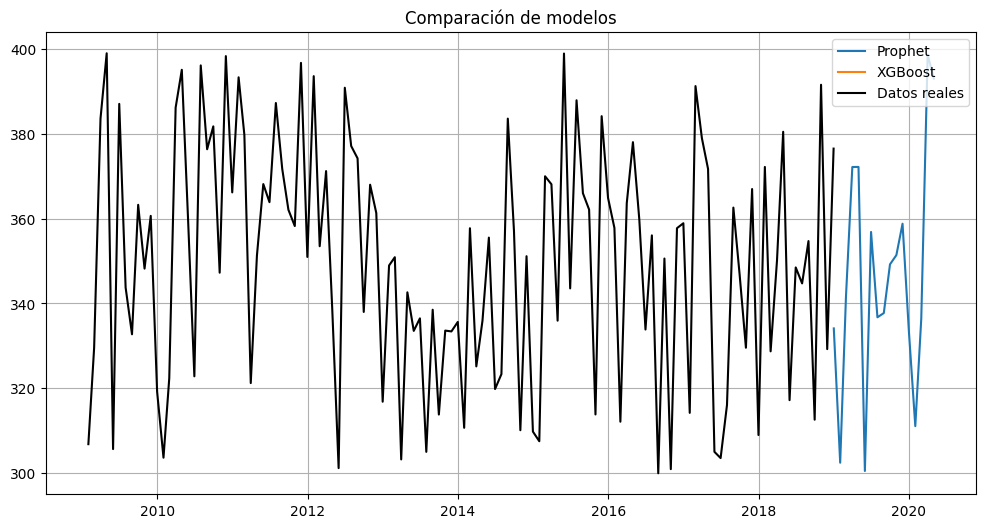

In [15]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from itertools import product
import statsmodels.api as sm
import seaborn as sns
from joblib import Parallel, delayed

# Configuración global
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start = '2009-01-01'
forecast_months = 17
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- CARGA DE DATOS (EJEMPLO SINTÉTICO) ---
print("\n⏳ Generando datos sintéticos de ejemplo...")
dates = pd.date_range(start='2009-01-01', periods=120, freq='M')
data_clean = pd.DataFrame({
    'SOYBEANS': np.random.rand(120) * 100 + 300,
    'STOCK': np.random.rand(120) * 50 + 100,
    'F_SOYMEALFIN': np.random.rand(120) * 20 + 50,
    'BASIS': np.random.rand(120) * 10 - 5,
    'SOYOIL': np.random.rand(120) * 30 + 20
}, index=dates)

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
data_full = data_clean.loc[train_start:].copy()
initial_rows = len(data_full)
data_full.dropna(subset=[target_var] + exog_vars, inplace=True)

if data_full.empty:
    raise ValueError("Error: No hay datos después de la limpieza.")

train_data = data_full.copy()
train_end = train_data.index.max()
forecast_start_date = train_end + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')

# --- FEATURE ENGINEERING ---
class AdvancedFeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=24):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names_ = None

    def fit(self, X, y=None):
        if not isinstance(X.index, pd.DatetimeIndex):
            X = X.copy()
            X.index = pd.to_datetime(X.index)

        temp_df = self._generate_features(X)
        if self.target_var in X.columns:
            self.feature_names_ = temp_df.drop(columns=[self.target_var], errors='ignore').select_dtypes(include=np.number).columns.tolist()
        else:
            self.feature_names_ = temp_df.select_dtypes(include=np.number).columns.tolist()
        return self

    def _generate_features(self, df):
        df_processed = df.copy()
        if self.target_var in df_processed.columns:
            target_series = df_processed[self.target_var]
            for i in [1, 2, 3, 6, 12]:
                df_processed[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
                df_processed[f'{self.target_var}_pct_{i}'] = target_series.pct_change(i)

            for w in [3, 6, 12]:
                df_processed[f'{self.target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)

        df_processed['month'] = df_processed.index.month
        df_processed['month_sin'] = np.sin(2 * np.pi * df_processed.index.month/12)

        for var in self.exog_vars:
            if var in df_processed.columns:
                for i in [1, 3, 6]:
                    df_processed[f'{var}_lag_{i}'] = df_processed[var].shift(i)

        return df_processed

    def transform(self, X):
        df_processed = self._generate_features(X)
        if self.feature_names_ is not None:
            feature_df = df_processed.reindex(columns=self.feature_names_, fill_value=np.nan)
        else:
            feature_df = df_processed.select_dtypes(include=np.number)

        if self.target_var in df_processed.columns:
            aligned_target = df_processed[self.target_var].loc[feature_df.index]
            feature_df[self.target_var] = aligned_target

        return feature_df.dropna()

# --- CONFIGURACIÓN DE MODELOS SIMPLIFICADA ---
def get_models_config():
    return {
        'SARIMAX': {
            'model': SARIMAX,
            'params': {
                'order': [(1,1,1), (0,1,1)],
                'seasonal_order': [(0,1,1,12)]
            }
        },
        'Prophet': {
            'model': Prophet,
            'params': {
                'seasonality_mode': ['additive'],
                'yearly_seasonality': [True]
            }
        },
        'XGBoost': {
            'model': XGBRegressor,
            'params': {
                'n_estimators': [100],
                'max_depth': [3],
                'learning_rate': [0.1]
            }
        }
    }

# --- ENTRENAMIENTO DE MODELOS ---
def train_models(train_data, data_full, exog_vars, forecast_period, n_top_models=3):
    print("\n🚀 Entrenando modelos...")
    models_config = get_models_config()
    all_results = []

    feature_gen = AdvancedFeatureGenerator(target_var, exog_vars)
    feature_gen.fit(train_data)

    for model_name, config in models_config.items():
        print(f"\n🔧 Modelo: {model_name}")
        model_class = config['model']

        for params in ParameterGrid(config['params']):
            try:
                if model_name == 'SARIMAX':
                    model = model_class(
                        endog=train_data[target_var],
                        exog=train_data[exog_vars] if exog_vars else None,
                        **params
                    )
                    results = model.fit(disp=False)
                    preds = results.get_forecast(
                        steps=len(forecast_period),
                        exog=data_full.loc[forecast_period, exog_vars] if exog_vars else None
                    ).predicted_mean

                elif model_name == 'Prophet':
                    df = train_data[[target_var]].reset_index()
                    df.columns = ['ds', 'y']
                    model = model_class(**params)
                    model.fit(df)
                    future = model.make_future_dataframe(periods=len(forecast_period), freq='MS')
                    forecast = model.predict(future)
                    preds = forecast.set_index('ds')['yhat'].iloc[-len(forecast_period):]

                else:  # ML models
                    feature_df = feature_gen.transform(train_data)
                    X = feature_df.drop(columns=[target_var])
                    y = feature_df[target_var]

                    model = model_class(**params)
                    model.fit(X, y)
                    preds = pd.Series([np.nan]*len(forecast_period), index=forecast_period)

                all_results.append({
                    'model_name': model_name,
                    'params': params,
                    'predictions': preds,
                    'model': model
                })
                print(f"✅ {model_name} entrenado exitosamente")

            except Exception as e:
                print(f"❌ Error en {model_name}: {str(e)}")
                continue

    return pd.DataFrame(all_results).sort_values('model_name').head(n_top_models), all_results

# --- EJECUCIÓN PRINCIPAL ---
try:
    top_models, all_results = train_models(train_data, data_full, exog_vars, forecast_period)

    print("\n🏆 Mejores modelos:")
    print(top_models[['model_name']])

    plt.figure(figsize=(12, 6))
    for _, row in top_models.iterrows():
        plt.plot(row['predictions'], label=row['model_name'])

    plt.plot(train_data[target_var], label='Datos reales', color='black')
    plt.title('Comparación de modelos')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"❌ Error: {str(e)}")

In [51]:
# --- CÁLCULO DE MÉTRICAS ---
def calculate_metrics(models_df, actual_values):
    metrics = []

    for _, row in models_df.iterrows():
        preds = row['predictions']

        # Alinear índices para asegurar comparación correcta
        common_index = preds.index.intersection(actual_values.index)
        if len(common_index) == 0:
            continue

        y_true = actual_values.loc[common_index]
        y_pred = preds.loc[common_index]

        # Calcular métricas
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

        metrics.append({
            'Modelo': row['model_name'],
            'Parámetros': str(row['params']),
            'MAE': round(mae, 2),
            'MAPE (%)': round(mape, 2),
            'SMAPE (%)': round(smape, 2)
        })

    return pd.DataFrame(metrics)

# --- ACTUALIZACIÓN DE LA EJECUCIÓN PRINCIPAL ---
try:
    top_models, all_results = train_models(train_data, data_full, exog_vars, forecast_period)

    # Convertir todos los resultados a DataFrame
    all_models_df = pd.DataFrame(all_results)

    # Calcular métricas para todos los modelos (usando los últimos 12 meses para validación)
    validation_period = train_data.index[-12:]  # Últimos 12 meses para validación
    metrics_df = calculate_metrics(all_models_df, train_data[target_var].loc[validation_period])

    # Mostrar tabla comparativa
    print("\n📊 Tabla Comparativa de Modelos (últimos 12 meses para validación)")
    display(metrics_df.sort_values('MAE').style
           .background_gradient(cmap='Blues', subset=['MAE', 'MAPE (%)', 'SMAPE (%)'])
           .format({'MAE': '{:.2f}', 'MAPE (%)': '{:.2f}%', 'SMAPE (%)': '{:.2f}%'}))

    # Gráfico de comparación
    plt.figure(figsize=(14, 7))
    for _, row in top_models.iterrows():
        plt.plot(row['predictions'], '--', label=f"{row['model_name']} (forecast)")

    # Dibujar datos reales y periodo de validación
    plt.plot(train_data[target_var], label='Datos reales', color='black', linewidth=2)
    plt.axvspan(validation_period[0], validation_period[-1], color='yellow', alpha=0.2, label='Periodo validación')

    plt.title('Comparación de Modelos con Periodo de Validación')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"❌ Error: {str(e)}")


🚀 Entrenando modelos...

🔧 Modelo: SARIMAX
❌ Error en SARIMAX: "None of [DatetimeIndex(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',\n               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',\n               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',\n               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',\n               '2020-06-01'],\n              dtype='datetime64[ns]', freq='MS')] are in the [index]"


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/vmazq9gh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzmi0bpp6/kwbl_em7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3372', 'data', 'file=/tmp/tmpzmi0bpp6/vmazq9gh.json', 'init=/tmp/tmpzmi0bpp6/kwbl_em7.json', 'output', 'file=/tmp/tmpzmi0bpp6/prophet_modelypmjzigp/prophet_model-20250623220006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:00:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:00:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


❌ Error en SARIMAX: "None of [DatetimeIndex(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',\n               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',\n               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',\n               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',\n               '2020-06-01'],\n              dtype='datetime64[ns]', freq='MS')] are in the [index]"

🔧 Modelo: Prophet
✅ Prophet entrenado exitosamente

🔧 Modelo: XGBoost
✅ XGBoost entrenado exitosamente

📊 Tabla Comparativa de Modelos (últimos 12 meses para validación)
❌ Error: 'MAE'


In [26]:
# --- CÁLCULO DE MÉTRICAS ---
def calculate_metrics(models_df, actual_values):
    metrics = []

    for _, row in models_df.iterrows():
        preds = row['predictions']

        # Alinear índices para asegurar comparación correcta
        common_index = preds.index.intersection(actual_values.index)
        if len(common_index) == 0:
            continue

        y_true = actual_values.loc[common_index]
        y_pred = preds.loc[common_index]

        # Calcular métricas
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

        metrics.append({
            'Modelo': row['model_name'],
            'Parámetros': str(row['params']),
            'MAE': round(mae, 2),
            'MAPE (%)': round(mape, 2),
            'SMAPE (%)': round(smape, 2)
        })

    return pd.DataFrame(metrics)

# --- ACTUALIZACIÓN DE LA EJECUCIÓN PRINCIPAL ---
try:
    top_models, all_results = train_models(train_data, data_full, exog_vars, forecast_period)

    # Convertir todos los resultados a DataFrame
    all_models_df = pd.DataFrame(all_results)

    # Calcular métricas para todos los modelos (usando los últimos 12 meses para validación)
    validation_period = train_data.index[-12:]  # Últimos 12 meses para validación
    metrics_df = calculate_metrics(all_models_df, train_data[target_var].loc[validation_period])

    # Mostrar tabla comparativa
    print("\n📊 Tabla Comparativa de Modelos (últimos 12 meses para validación)")
    display(metrics_df.sort_values('MAE').style
           .background_gradient(cmap='Blues', subset=['MAE', 'MAPE (%)', 'SMAPE (%)'])
           .format({'MAE': '{:.2f}', 'MAPE (%)': '{:.2f}%', 'SMAPE (%)': '{:.2f}%'}))

    # Gráfico de comparación
    plt.figure(figsize=(14, 7))
    for _, row in top_models.iterrows():
        plt.plot(row['predictions'], '--', label=f"{row['model_name']} (forecast)")

    # Dibujar datos reales y periodo de validación
    plt.plot(train_data[target_var], label='Datos reales', color='black', linewidth=2)
    plt.axvspan(validation_period[0], validation_period[-1], color='yellow', alpha=0.2, label='Periodo validación')

    plt.title('Comparación de Modelos con Periodo de Validación')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"❌ Error: {str(e)}")


🚀 Entrenando modelos...

🔧 Modelo: SARIMAX


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssg0pcz_/dmm6rho_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssg0pcz_/9pz269dv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76668', 'data', 'file=/tmp/tmpssg0pcz_/dmm6rho_.json', 'init=/tmp/tmpssg0pcz_/9pz269dv.json', 'output', 'file=/tmp/tmpssg0pcz_/prophet_model7b06fb6r/prophet_model-20250624020102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:01:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


❌ Error en SARIMAX: "None of [DatetimeIndex(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',\n               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',\n               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',\n               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',\n               '2020-06-01'],\n              dtype='datetime64[ns]', freq='MS')] are in the [index]"

🔧 Modelo: Prophet
✅ Prophet entrenado exitosamente

🔧 Modelo: XGBoost
✅ XGBoost entrenado exitosamente

🔧 Modelo: RandomForest
✅ RandomForest entrenado exitosamente
❌ Error: too many values to unpack (expected 2)


In [32]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
from statsmodels.tsa.state.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from itertools import product
import statsmodels.api as sm
import seaborn as sns
from joblib import Parallel, delayed
import time
import hashlib # Import hashlib for creating stable hashes of parameters


# Configuración global
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


# --- INSTALACIÓN DE PAQUETES REQUERIDOS ---
print("--- Verificando e instalando paquetes requeridos ---")
required_packages = [
    'pandas', 'numpy', 'matplotlib', 'scikit-learn', 'statsmodels',
    'seaborn', 'tqdm', 'openpyxl', 'prophet', 'xgboost', 'lightgbm',
    'catboost', 'joblib'
]

for pkg in required_packages:
    try:
        __import__(pkg)
    except ImportError:
        print(f"Instalando {pkg}...")
        install_name = 'prophet' if pkg == 'prophet' else pkg
        try:
            !pip install {install_name}
            print(f"✓ {pkg} instalado correctamente.")
        except Exception as e:
            print(f"❌ Error instalando {pkg}: {e}")

print("--- Verificación e instalación de paquetes completada ---")

# --- CONFIGURACIÓN DE ESTILO DE GRÁFICOS ---
try:
    import seaborn as sns
    plt.style.use('seaborn-v0_8-darkgrid')
    print("✓ Estilo de Matplotlib establecido a 'seaborn-v0_8-darkgrid'")
except Exception:
    print("seaborn style not found or could not be set. Falling back to 'ggplot'.")
    plt.style.use('ggplot')


# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start_date_filter = '2009-01-01'
forecast_months = 17
n_top_ml_models = 5 # Number of top ML models to select

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
# --- Robustly load data_clean if it's not in globals ---
try:
    if 'data_clean' not in globals() or not isinstance(data_clean, pd.DataFrame) or not isinstance(data_clean.index, pd.DatetimeIndex):
        print("Warning: 'data_clean' not found or invalid. Attempting to load from data.xlsx...")
        file_path_fallback = '/content/data.xlsx'
        raw_date_column_name_fallback = 'Unnamed: 0'
        processed_date_column_name = 'Fecha'

        try:
            data_loaded = pd.read_excel(file_path_fallback, sheet_name='Hoja1')
            print("Fallback file data.xlsx loaded.")
            if raw_date_column_name_fallback in data_loaded.columns:
                 data_loaded.rename(columns={raw_date_column_name_fallback: processed_date_column_name}, inplace=True)
            if processed_date_column_name in data_loaded.columns:
                data_loaded[processed_date_column_name] = pd.to_datetime(
                    data_loaded[processed_date_column_name].astype(str).str.replace('M', '-'), format='%Y-%m', errors='coerce'
                )
                initial_rows_loaded = len(data_loaded)
                data_loaded.dropna(subset=[processed_date_column_name], inplace=True)
                if len(data_loaded) < initial_rows_loaded: print(f"Dropped {initial_rows_loaded - len(data_loaded)} rows with invalid dates.")
                data_loaded.set_index(processed_date_column_name, inplace=True)
                data_loaded.sort_index(inplace=True)
                if target_var in data_loaded.columns:
                    print(f"Interpolating NaNs in '{target_var}'.")
                    data_loaded[target_var].interpolate(method='linear', inplace=True)
                critical_cols_fallback = [target_var] + [col for col in exog_vars if col in data_loaded.columns]
                if critical_cols_fallback:
                     initial_rows_before_final_dropna = len(data_loaded)
                     data_loaded.dropna(subset=critical_cols_fallback, inplace=True)
                     if len(data_loaded) < initial_rows_before_final_dropna: print(f"Dropped {initial_rows_before_final_dropna - len(data_loaded)} rows with NaNs in critical columns.")
                data_clean = data_loaded
                print("✓ 'data_clean' loaded and prepared from data.xlsx fallback.")
            else: raise ValueError(f"Processed date column '{processed_date_column_name}' not found.")
        except FileNotFoundError: raise FileNotFoundError(f"Fatal Error: Neither 'data_clean' in environment nor fallback file '{file_path_fallback}' found.")
        except Exception as e: raise RuntimeError(f"Fatal Error loading or processing fallback data.xlsx: {e}")
    else:
        print("✓ 'data_clean' found in environment and is a valid DataFrame.")
except (FileNotFoundError, RuntimeError, ValueError) as e:
     print(f"Stopping execution due to fatal data loading error: {e}")
     raise e

# Filter data by train_start_date_filter and select columns
data_full = data_clean.loc[train_start_date_filter:].copy()
required_cols = [target_var] + exog_vars
if not all(col in data_full.columns for col in required_cols):
     missing = [col for col in required_cols if col not in data_full.columns]
     print(f"Warning: Missing exogenous variables: {missing}. Proceeding with available.")
     exog_vars = [col for col in exog_vars if col in data_full.columns]

initial_rows = len(data_full)
subset_cols_dropna = [target_var] + exog_vars
if subset_cols_dropna:
    data_full.dropna(subset=subset_cols_dropna, inplace=True)
    if len(data_full) < initial_rows: print(f"Dropped {initial_rows - len(data_full)} rows with NaNs after filter.")

if data_full.empty:
    raise ValueError(f"Fatal Error: Data empty after filtering and cleaning from {train_start_date_filter}.")

# --- Implement 80/20 Train-Test Split for Evaluation ---
total_steps = len(data_full)
split_idx = int(total_steps * 0.8)
train_data_eval = data_full.iloc[:split_idx].copy()
test_data_eval = data_full.iloc[split_idx:].copy()

if train_data_eval.empty or test_data_eval.empty:
     raise ValueError(f"Fatal Error: 80/20 split resulted in empty training or testing data. Total steps: {total_steps}")

# Define the actual training data for FINAL model fitting
train_data_final_fit = data_full.copy()
train_end_final_fit = train_data_final_fit.index.max()

# Define the future forecast period
forecast_start_date = train_end_final_fit + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max()

# Prepare data_full_with_future_exog (assuming data_full's exog needs to be extended for forecasting)
data_full_with_future_exog = data_full.copy()
future_exog_placeholder = pd.DataFrame(index=forecast_period, columns=exog_vars)
data_full_with_future_exog = pd.concat([data_full_with_future_exog, future_exog_placeholder])

print(f"Período de datos total: {data_full.index.min().strftime('%Y-%m-%d')} a {data_full.index.max().strftime('%Y-%m-%d')} ({len(data_full)} filas)")
print(f"Período de entrenamiento (evaluación 80%): {train_data_eval.index.min().strftime('%Y-%m-%d')} a {train_data_eval.index.max().strftime('%Y-%m-%d')} ({len(train_data_eval)} filas)")
print(f"Período de prueba (evaluación 20%): {test_data_eval.index.min().strftime('%Y-%m-%d')} a {test_data_eval.index.max().strftime('%Y-%m-%d')} ({len(test_data_eval)} filas)")
print(f"Período de entrenamiento para ajuste final: {train_data_final_fit.index.min().strftime('%Y-%m-%d')} a {train_data_final_fit.index.max().strftime('%Y-%m-%d')} ({len(train_data_final_fit)} filas)")
print(f"Período de pronóstico futuro: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end.strftime('%Y-%m-%d')} ({forecast_months} meses)")


# --- FEATURE ENGINEERING (Needed for ML models) ---
class MLFeatureGenerator(BaseEstimator, TransformerMixin):
    """Generates features for ML models (lags, seasonal, trend, exog lags)."""
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names_ = None
        self._fit_start_date = None

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame) or not isinstance(X.index, pd.DatetimeIndex):
             raise TypeError("Input X must be a pandas DataFrame with DatetimeIndex.")
        self._fit_start_date = X.index.min()

        if self.target_var not in X.columns:
             print(f"Warning: Target variable '{self.target_var}' not in X for fit. Cannot learn target-based feature names.")
             temp_df = self._generate_features(X)
             self.feature_names_ = temp_df.select_dtypes(include=np.number).columns.tolist()
             self.feature_names_ = [name for name in self.feature_names_ if self.target_var not in name]
        else:
            temp_df = self._generate_features(X)
            self.feature_names_ = temp_df.drop(columns=[self.target_var], errors='ignore').select_dtypes(include=np.number).columns.tolist()

        if not self.feature_names_: print("Warning: No numeric features identified by MLFeatureGenerator.")
        return self

    def _generate_features(self, df):
         if not isinstance(df.index, pd.DatetimeIndex): return df.copy()
         df_processed = df.copy()
         target_series = df_processed.get(self.target_var)

         if target_series is not None:
              for i in [1, 3, 6, self.lag_months]: df_processed[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
              for w in [3, 6, 12]: df_processed[f'{self.target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)

         df_processed['month_sin'] = np.sin(2 * np.pi * df_processed.index.month/12)
         df_processed['month_cos'] = np.cos(2 * np.pi * df_processed.index.month/12)

         for var in self.exog_vars:
             if var in df_processed.columns:
                 for i in [1, 3, 6]: df_processed[f'{var}_lag_{i}'] = df_processed[var].shift(i)

         if self._fit_start_date is not None:
              df_processed['months_since_fit_start'] = (df_processed.index.to_period('M') - self._fit_start_date.to_period('M')).apply(lambda x: x.n)
              df_processed['linear_trend'] = df_processed['months_since_fit_start']
         else:
              df_processed['linear_trend'] = np.arange(len(df_processed)) # Fallback

         return df_processed

    def transform(self, X):
        if not isinstance(X, pd.DataFrame) or not isinstance(X.index, pd.DatetimeIndex):
             print("Error: Invalid input for transform."); return X.copy()

        df_processed = self._generate_features(X)

        if self.target_var in df_processed.columns:
            target_series = df_processed[self.target_var]
            feature_df = df_processed.drop(columns=[self.target_var], errors='ignore')
        else:
            target_series = None; feature_df = df_processed.copy()

        if self.feature_names_ is not None:
             feature_df_selected = feature_df.reindex(columns=self.feature_names_, fill_value=np.nan)
        else: raise RuntimeError("Feature names not learned during fit.")

        df_cleaned_features = feature_df_selected.dropna(axis=0, how='any').copy()

        if target_series is not None and not df_cleaned_features.empty:
             aligned_target = target_series.loc[df_cleaned_features.index]
             df_cleaned_features.insert(0, self.target_var, aligned_target)

        return df_cleaned_features


# --- CONFIGURACIÓN DE MODELOS PARA GRID SEARCH ---
def get_models_config_grid_search():
    """Genera configuraciones para Grid Search limitado a SARIMAX y ML."""
    config = {
        'SARIMAX': {
             'model': SARIMAX,
             'is_ts_model': True,
             'params': {
                 'order': list(product([0,1,2], [0,1], [0,1,2])),
                 'seasonal_order': list(product([0,1], [0,1], [0,1], [12]))
             }
        },
        'XGBoost': {
            'model': XGBRegressor,
            'is_ts_model': False,
            'params': {
                'n_estimators': [100, 200], # Reduced for faster example
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5],
                'random_state': [42], 'objective': ['reg:squarederror']
            }
        },
        'LightGBM': {
            'model': LGBMRegressor,
            'is_ts_model': False,
            'params': {
                'num_leaves': [20, 31], # Reduced
                'learning_rate': [0.01, 0.1],
                'n_estimators': [100, 200], # Reduced
                'random_state': [42]
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor,
            'is_ts_model': False,
            'params': {
                'n_estimators': [100, 200], # Reduced
                'max_depth': [5, 10], # Reduced
                'random_state': [42], 'max_features': ['sqrt']
            }
        },
         'ElasticNet': {
            'model': ElasticNet,
            'is_ts_model': False,
            'params': {
                'alpha': [0.1, 1], # Reduced
                'l1_ratio': [0.1, 0.9], # Reduced
                'random_state': [42], 'max_iter': [10000]
            }
        },
         'Ridge': {
            'model': Ridge,
            'is_ts_model': False,
            'params': {
                'alpha': [1, 10], # Reduced
                'random_state': [42]
            }
        },
    }
    total_param_combinations = sum(len(ParameterGrid(cfg['params'])) for cfg in config.values())
    print(f"Total parameter combinations for Grid Search: {total_param_combinations}")
    return config


# --- ENTRENAMIENTO Y EVALUACIÓN DE GRID SEARCH ---
def run_grid_search_evaluation(train_data_eval, test_data_eval, exog_vars, target_var):
    """Runs grid search for SARIMAX and selected ML models and evaluates on the test set."""
    print("\n🔬 Ejecutando Grid Search y Evaluación en 80/20 split...")
    models_config = get_models_config_grid_search()
    all_eval_results = []

    # Fit feature generator once on the evaluation training data
    feature_gen_eval = MLFeatureGenerator(target_var, exog_vars)
    try:
        feature_gen_eval.fit(train_data_eval)
        print(f"ML Feature Generator fitted for evaluation. {len(feature_gen_eval.feature_names_)} features.")
        if not feature_gen_eval.feature_names_: raise RuntimeError("No features learned.")
        ml_models_disabled = False
    except Exception as e:
        print(f"Fatal Error: Could not fit ML Feature Generator for evaluation: {e}")
        # Cannot proceed with ML models if feature generation fails
        ml_models_disabled = True


    for model_name, config in models_config.items():
        model_class = config['model']
        param_grid_obj = ParameterGrid(config['params'])
        is_ts_model = config['is_ts_model']

        if not is_ts_model and ml_models_disabled:
             print(f"Skipping ML model family '{model_name}' due to Feature Generator error.")
             continue

        print(f"\n  Familia: {model_name}")
        param_count = len(param_grid_obj)
        print(f"    Evaluando {param_count} combinaciones de parámetros...")

        for i, params in enumerate(tqdm(param_grid_obj, desc=f"    {model_name}")):
            model_mse_eval = np.inf
            model_mae_eval = np.inf # Initialize MAE
            test_preds = pd.Series([], dtype='float64') # Initialize test_preds as empty Series


            try:
                if is_ts_model:
                    # Handle ETS seasonal_periods None constraint
                    if model_name.startswith('ETS'):
                         is_seasonal_none = params.get('seasonal') is None
                         is_seasonal_periods_none = params.get('seasonal_periods') is None
                         if (is_seasonal_none and not is_seasonal_periods_none) or (not is_seasonal_none and is_seasonal_periods_none):
                              # print(f"      Skipping invalid ETS params: {params}")
                              continue # Skip invalid ETS combos

                    # TS models evaluation
                    eval_model = model_class(train_data_eval[target_var],
                                             exog=train_data_eval[exog_vars] if exog_vars and model_name == 'SARIMAX' else None,
                                             **params)
                    with warnings.catch_warnings(): warnings.filterwarnings("ignore", category=UserWarning); eval_results = eval_model.fit(disp=False if model_name == 'SARIMAX' else True)

                    # Predict on test set
                    if model_name == 'SARIMAX':
                        # Corrected: Access exog data from test_data_eval
                        sarimax_test_exog = test_data_eval[exog_vars] if exog_vars else None
                        if sarimax_test_exog is not None and not sarimax_test_exog.empty:
                            # Ensure test_data_eval.index matches the expected forecast steps index
                            # SARIMAX get_forecast expects exog aligned with the forecast dates
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval), exog=sarimax_test_exog).predicted_mean.rename(test_data_eval.index)
                        elif exog_vars and (sarimax_test_exog is None or sarimax_test_exog.empty):
                             # If exog_vars exist but data is missing for test, try predicting without exog
                             print(f"      Warning: No valid exog data for SARIMAX test prediction for params {params}. Predicting without exog.")
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval)).predicted_mean.rename(test_data_eval.index)
                        else: # No exog variables configured or needed
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval)).predicted_mean.rename(test_data_eval.index)

                    elif model_name.startswith('ETS'):
                         test_preds = eval_results.forecast(steps=len(test_data_eval)).rename(test_data_eval.index)
                    elif model_name == 'Prophet':
                         # Prophet evaluation needs creating future df for test dates
                         prophet_train_df_eval = train_data_eval[[target_var]].reset_index().rename(columns={'index':'ds', target_var:'y'})
                         for var in exog_vars: # Add exog to Prophet training data
                             if var in train_data_eval.columns: prophet_train_df_eval[var] = train_data_eval[var].values

                         prophet_test_future_eval = test_data_eval.reset_index().rename(columns={'index': 'ds'})[['ds'] + exog_vars]
                         prophet_test_future_eval = prophet_test_future_eval[prophet_test_future_eval['ds'].isin(test_data_eval.index)].copy()

                         eval_model_prophet = Prophet(**params)
                         for var in exog_vars:
                             if var in train_data_eval.columns: # Check if column was in original data_eval
                                 if var in prophet_train_df_eval.columns and var not in ['ds', 'y']:
                                     eval_model_prophet.add_regressor(var)

                         if not prophet_train_df_eval.empty and not prophet_test_future_eval.empty:
                            eval_model_prophet.fit(prophet_train_df_eval)
                            test_forecast = eval_model_prophet.predict(prophet_test_future_eval)
                            test_preds = test_forecast.set_index('ds')['yhat'].rename(test_data_eval.index)
                         else:
                             #print(f"      Warning: Prophet evaluation data issue for params {params}. Skipping.")
                             test_preds = pd.Series([], index=test_data_eval.index) # Empty predictions


                    else:
                         raise ValueError(f"Unknown TS model type: {model_name}")

                    # Calculate MSE and MAE, only for dates where predictions exist and actuals are not NaN
                    common_index = test_preds.dropna().index.intersection(test_data_eval[target_var].dropna().index)
                    if len(common_index) > 0:
                        model_mse_eval = mean_squared_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                        model_mae_eval = mean_absolute_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                    else:
                        model_mse_eval = np.inf
                        model_mae_eval = np.inf # No valid predictions to evaluate


                else: # ML models evaluation (Recursive prediction on test set)
                    ml_pipeline_eval = Pipeline([
                        ('features', feature_gen_eval), # Use the fitted feature generator
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ('model', model_class(**params))
                    ])

                    X_train_ml_eval = train_data_eval.copy()
                    y_train_ml_eval = train_data_eval[target_var]
                    ml_pipeline_eval.fit(X_train_ml_eval, y_train_ml_eval)


                    ml_test_preds = []
                    # Start history for recursive prediction with the evaluation training data
                    current_history_for_test_pred = train_data_eval.copy()


                    # Recursive prediction loop for test set
                    for j in range(len(test_data_eval)):
                         date_to_predict = test_data_eval.index[j]

                         # Append the *actual* previous row from test_data_eval to history IF it exists (not the first point)
                         if j > 0:
                              prev_actual_row = test_data_eval.iloc[[j-1]].copy()
                              # Ensure prev_actual_row has all relevant columns before concat
                              prev_actual_row = prev_actual_row[[target_var] + exog_vars] # Keep only relevant columns
                              current_history_for_test_pred = pd.concat([current_history_for_test_pred, prev_actual_row])

                         # Prepare data for feature generation for date_to_predict (history + placeholder for target)
                         next_row_data = {target_var: np.nan} # Placeholder for target
                         # Get exogenous values for date_to_predict from data_full
                         if date_to_predict in data_full.index:
                              next_row_exog = data_full.loc[date_to_predict, exog_vars].to_dict()
                              next_row_data.update(next_row_exog)
                         elif not current_history_for_test_pred.empty: # Fallback exog from history end
                              last_exog_history = current_history_for_test_pred[exog_vars].iloc[-1].to_dict()
                              next_row_data.update(last_exog_history)
                         else:
                             print(f"      Warning: No history or data_full entry for exog on {date_to_predict.strftime('%Y-%m-%d')}.")


                         next_row_df = pd.DataFrame([next_row_data], index=[date_to_predict])
                         next_row_df.index.name = current_history_for_test_pred.index.name
                         # Combine history and the next row placeholder
                         data_for_feature_gen_chunk = pd.concat([current_history_for_test_pred, next_row_df])

                         # Get the required history chunk ending at date_to_predict
                         required_hist_size = feature_gen_eval._required_history_for_features + 1 # N previous + 1 current
                         if len(data_for_feature_gen_chunk) >= required_hist_size:
                              chunk_for_transform = data_for_feature_gen_chunk.iloc[-required_hist_size:].copy()
                         else:
                              chunk_for_transform = data_for_feature_gen_chunk.copy()
                              # print(f"      Warning: Not enough history ({len(chunk_for_transform)}) for features for {date_to_predict.strftime('%Y-%m-%d')}.")


                         # Transform the chunk using the fitted pipeline (only feature generator part)
                         # Ensure target column exists in chunk_for_transform before passing to transform if generator needs it
                         if feature_gen_eval.target_var not in chunk_for_transform.columns:
                             chunk_for_transform[feature_gen_eval.target_var] = np.nan # Add dummy NaN target if needed

                         chunk_transformed_features = ml_pipeline_eval.named_steps['features'].transform(chunk_for_transform)


                         # Select row for date_to_predict from the transformed chunk
                         if date_to_predict in chunk_transformed_features.index:
                             # Extract features (dropping the target variable if it exists in transformed chunk)
                             X_predict_row = chunk_transformed_features.loc[[date_to_predict]].drop(columns=[target_var], errors='ignore')

                             if not X_predict_row.empty:
                                 # Apply imputer and scaler from the fitted pipeline
                                 X_predict_imputed = ml_pipeline_eval.named_steps['imputer'].transform(X_predict_row)
                                 X_predict_scaled = ml_pipeline_eval.named_steps['scaler'].transform(X_predict_imputed)

                                 # Make prediction
                                 pred = ml_pipeline_eval.named_steps['model'].predict(X_predict_scaled)[0]
                                 ml_test_preds.append(pred)
                             else:
                                  print(f"      Warning: Transformed features empty for {date_to_predict.strftime('%Y-%m-%d')}. Predicting NaN.")
                                  ml_test_preds.append(np.nan)

                         else:
                             print(f"      Warning: No features generated for {date_to_predict.strftime('%Y-%m-%d')} during test eval prediction. Predicting NaN.")
                             ml_test_preds.append(np.nan)


                    # Convert predictions list to Series and align with test_data_eval index
                    if ml_test_preds:
                         test_preds = pd.Series(ml_test_preds, index=test_data_eval.index, name='Predictions')
                         common_index = test_preds.dropna().index.intersection(test_data_eval[target_var].dropna().index)
                         if len(common_index) > 0:
                             model_mse_eval = mean_squared_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                             model_mae_eval = mean_absolute_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                         else:
                             model_mse_eval = np.inf
                             model_mae_eval = np.inf
                    else:
                         model_mse_eval = np.inf
                         model_mae_eval = np.inf


            except Exception as e:
                # print(f"      Error fitting or predicting model {model_name} with params {params}: {e}")
                model_mse_eval = np.inf
                model_mae_eval = np.inf


            # Store evaluation results
            all_eval_results.append({
                'model_name': model_name,
                'params': params,
                'mse_eval': model_mse_eval,
                'mae_eval': model_mae_eval, # Store MAE
                'is_ts_model': is_ts_model
            })

    # Sort results by MAE and select top models
    all_eval_results.sort(key=lambda x: x['mae_eval'])

    # Select the best SARIMAX and the top N ML models
    best_sarimax_result = next((r for r in all_eval_results if r['model_name'] == 'SARIMAX' and np.isfinite(r['mae_eval'])), None)

    top_ml_results = [r for r in all_eval_results if not r['is_ts_model'] and np.isfinite(r['mae_eval'])]
    top_ml_results = top_ml_results[:n_top_ml_models]

    # Combine the selected models
    selected_models_results = []
    if best_sarimax_result:
        selected_models_results.append(best_sarimax_result)
    selected_models_results.extend(top_ml_results)

    if not selected_models_results:
        print("\n❌ No models could be fitted and evaluated successfully.")
        return pd.DataFrame(), all_eval_results, pd.DataFrame(index=forecast_period) # Return empty results

    print(f"\n--- Top {len(selected_models_results)} Modelos Seleccionados (basado en MAE en 20% Test Set) ---")
    top_models_df = pd.DataFrame(selected_models_results)
    # Display MAE and MSE


ModuleNotFoundError: No module named 'catboost'

In [28]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
# Corrected import path for SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from itertools import product
import statsmodels.api as sm
import seaborn as sns
from joblib import Parallel, delayed
import time
import hashlib # Import hashlib for creating stable hashes of parameters


# Configuración global
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


# --- INSTALACIÓN DE PAQUETES REQUERIDOS ---
print("--- Verificando e instalando paquetes requeridos ---")
required_packages = [
    'pandas', 'numpy', 'matplotlib', 'scikit-learn', 'statsmodels',
    'seaborn', 'tqdm', 'openpyxl', 'prophet', 'xgboost', 'lightgbm',
    'catboost', 'joblib'
]

for pkg in required_packages:
    try:
        __import__(pkg)
    except ImportError:
        print(f"Instalando {pkg}...")
        install_name = 'prophet' if pkg == 'prophet' else pkg
        try:
            !pip install {install_name}
            print(f"✓ {pkg} instalado correctamente.")
        except Exception as e:
            print(f"❌ Error instalando {pkg}: {e}")

print("--- Verificación e instalación de paquetes completada ---")

# --- CONFIGURACIÓN DE ESTILO DE GRÁFICOS ---
try:
    import seaborn as sns
    plt.style.use('seaborn-v0_8-darkgrid')
    print("✓ Estilo de Matplotlib establecido a 'seaborn-v0_8-darkgrid'")
except Exception:
    print("seaborn style not found or could not be set. Falling back to 'ggplot'.")
    plt.style.use('ggplot')


# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start_date_filter = '2009-01-01'
forecast_months = 17
n_top_ml_models = 5 # Number of top ML models to select

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
# --- Robustly load data_clean if it's not in globals ---
try:
    if 'data_clean' not in globals() or not isinstance(data_clean, pd.DataFrame) or not isinstance(data_clean.index, pd.DatetimeIndex):
        print("Warning: 'data_clean' not found or invalid. Attempting to load from data.xlsx...")
        file_path_fallback = '/content/data.xlsx'
        raw_date_column_name_fallback = 'Unnamed: 0'
        processed_date_column_name = 'Fecha'

        try:
            data_loaded = pd.read_excel(file_path_fallback, sheet_name='Hoja1')
            print("Fallback file data.xlsx loaded.")
            if raw_date_column_name_fallback in data_loaded.columns:
                 data_loaded.rename(columns={raw_date_column_name_fallback: processed_date_column_name}, inplace=True)
            if processed_date_column_name in data_loaded.columns:
                data_loaded[processed_date_column_name] = pd.to_datetime(
                    data_loaded[processed_date_column_name].astype(str).str.replace('M', '-'), format='%Y-%m', errors='coerce'
                )
                initial_rows_loaded = len(data_loaded)
                data_loaded.dropna(subset=[processed_date_column_name], inplace=True)
                if len(data_loaded) < initial_rows_loaded: print(f"Dropped {initial_rows_loaded - len(data_loaded)} rows with invalid dates.")
                data_loaded.set_index(processed_date_column_name, inplace=True)
                data_loaded.sort_index(inplace=True)
                if target_var in data_loaded.columns:
                    print(f"Interpolating NaNs in '{target_var}'.")
                    data_loaded[target_var].interpolate(method='linear', inplace=True)
                critical_cols_fallback = [target_var] + [col for col in exog_vars if col in data_loaded.columns]
                if critical_cols_fallback:
                     initial_rows_before_final_dropna = len(data_loaded)
                     data_loaded.dropna(subset=critical_cols_fallback, inplace=True)
                     if len(data_loaded) < initial_rows_before_final_dropna: print(f"Dropped {initial_rows_before_final_dropna - len(data_loaded)} rows with NaNs in critical columns.")
                data_clean = data_loaded
                print("✓ 'data_clean' loaded and prepared from data.xlsx fallback.")
            else: raise ValueError(f"Processed date column '{processed_date_column_name}' not found.")
        except FileNotFoundError: raise FileNotFoundError(f"Fatal Error: Neither 'data_clean' in environment nor fallback file '{file_path_fallback}' found.")
        except Exception as e: raise RuntimeError(f"Fatal Error loading or processing fallback data.xlsx: {e}")
    else:
        print("✓ 'data_clean' found in environment and is a valid DataFrame.")
except (FileNotFoundError, RuntimeError, ValueError) as e:
     print(f"Stopping execution due to fatal data loading error: {e}")
     raise e

# Filter data by train_start_date_filter and select columns
data_full = data_clean.loc[train_start_date_filter:].copy()
required_cols = [target_var] + exog_vars
if not all(col in data_full.columns for col in required_cols):
     missing = [col for col in required_cols if col not in data_full.columns]
     print(f"Warning: Missing exogenous variables: {missing}. Proceeding with available.")
     exog_vars = [col for col in exog_vars if col in data_full.columns]

initial_rows = len(data_full)
subset_cols_dropna = [target_var] + exog_vars
if subset_cols_dropna:
    data_full.dropna(subset=subset_cols_dropna, inplace=True)
    if len(data_full) < initial_rows: print(f"Dropped {initial_rows - len(data_full)} rows with NaNs after filter.")

if data_full.empty:
    raise ValueError(f"Fatal Error: Data empty after filtering and cleaning from {train_start_date_filter}.")

# --- Implement 80/20 Train-Test Split for Evaluation ---
total_steps = len(data_full)
split_idx = int(total_steps * 0.8)
train_data_eval = data_full.iloc[:split_idx].copy()
test_data_eval = data_full.iloc[split_idx:].copy()

if train_data_eval.empty or test_data_eval.empty:
     raise ValueError(f"Fatal Error: 80/20 split resulted in empty training or testing data. Total steps: {total_steps}")

# Define the actual training data for FINAL model fitting
train_data_final_fit = data_full.copy()
train_end_final_fit = train_data_final_fit.index.max()

# Define the future forecast period
forecast_start_date = train_end_final_fit + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max()

# Prepare data_full_with_future_exog (assuming data_full's exog needs to be extended for forecasting)
data_full_with_future_exog = data_full.copy()
future_exog_placeholder = pd.DataFrame(index=forecast_period, columns=exog_vars)
data_full_with_future_exog = pd.concat([data_full_with_future_exog, future_exog_placeholder])

print(f"Período de datos total: {data_full.index.min().strftime('%Y-%m-%d')} a {data_full.index.max().strftime('%Y-%m-%d')} ({len(data_full)} filas)")
print(f"Período de entrenamiento (evaluación 80%): {train_data_eval.index.min().strftime('%Y-%m-%d')} a {train_data_eval.index.max().strftime('%Y-%m-%d')} ({len(train_data_eval)} filas)")
print(f"Período de prueba (evaluación 20%): {test_data_eval.index.min().strftime('%Y-%m-%d')} a {test_data_eval.index.max().strftime('%Y-%m-%d')} ({len(test_data_eval)} filas)")
print(f"Período de entrenamiento para ajuste final: {train_data_final_fit.index.min().strftime('%Y-%m-%d')} a {train_data_final_fit.index.max().strftime('%Y-%m-%d')} ({len(train_data_final_fit)} filas)")
print(f"Período de pronóstico futuro: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end.strftime('%Y-%m-%d')} ({forecast_months} meses)")


# --- FEATURE ENGINEERING (Needed for ML models) ---
class MLFeatureGenerator(BaseEstimator, TransformerMixin):
    """Generates features for ML models (lags, seasonal, trend, exog lags)."""
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names_ = None
        self._fit_start_date = None

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame) or not isinstance(X.index, pd.DatetimeIndex):
             raise TypeError("Input X must be a pandas DataFrame with DatetimeIndex.")
        self._fit_start_date = X.index.min()

        if self.target_var not in X.columns:
             print(f"Warning: Target variable '{self.target_var}' not in X for fit. Cannot learn target-based feature names.")
             temp_df = self._generate_features(X)
             self.feature_names_ = temp_df.select_dtypes(include=np.number).columns.tolist()
             self.feature_names_ = [name for name in self.feature_names_ if self.target_var not in name]
        else:
            temp_df = self._generate_features(X)
            self.feature_names_ = temp_df.drop(columns=[self.target_var], errors='ignore').select_dtypes(include=np.number).columns.tolist()

        if not self.feature_names_: print("Warning: No numeric features identified by MLFeatureGenerator.")
        return self

    def _generate_features(self, df):
         if not isinstance(df.index, pd.DatetimeIndex): return df.copy()
         df_processed = df.copy()
         target_series = df_processed.get(self.target_var)

         if target_series is not None:
              for i in [1, 3, 6, self.lag_months]: df_processed[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
              for w in [3, 6, 12]: df_processed[f'{self.target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)

         df_processed['month_sin'] = np.sin(2 * np.pi * df_processed.index.month/12)
         df_processed['month_cos'] = np.cos(2 * np.pi * df_processed.index.month/12)

         for var in self.exog_vars:
             if var in df_processed.columns:
                 for i in [1, 3, 6]: df_processed[f'{var}_lag_{i}'] = df_processed[var].shift(i)

         if self._fit_start_date is not None:
              df_processed['months_since_fit_start'] = (df_processed.index.to_period('M') - self._fit_start_date.to_period('M')).apply(lambda x: x.n)
              df_processed['linear_trend'] = df_processed['months_since_fit_start']
         else:
              df_processed['linear_trend'] = np.arange(len(df_processed)) # Fallback

         return df_processed

    def transform(self, X):
        if not isinstance(X, pd.DataFrame) or not isinstance(X.index, pd.DatetimeIndex):
             print("Error: Invalid input for transform."); return X.copy()

        df_processed = self._generate_features(X)

        if self.target_var in df_processed.columns:
            target_series = df_processed[self.target_var]
            feature_df = df_processed.drop(columns=[self.target_var], errors='ignore')
        else:
            target_series = None; feature_df = df_processed.copy()

        if self.feature_names_ is not None:
             feature_df_selected = feature_df.reindex(columns=self.feature_names_, fill_value=np.nan)
        else: raise RuntimeError("Feature names not learned during fit.")

        df_cleaned_features = feature_df_selected.dropna(axis=0, how='any').copy()

        if target_series is not None and not df_cleaned_features.empty:
             aligned_target = target_series.loc[df_cleaned_features.index]
             df_cleaned_features.insert(0, self.target_var, aligned_target)

        return df_cleaned_features


# --- CONFIGURACIÓN DE MODELOS PARA GRID SEARCH ---
def get_models_config_grid_search():
    """Genera configuraciones para Grid Search limitado a SARIMAX y ML."""
    config = {
        'SARIMAX': {
             'model': SARIMAX,
             'is_ts_model': True,
             'params': {
                 'order': list(product([0,1,2], [0,1], [0,1,2])),
                 'seasonal_order': list(product([0,1], [0,1], [0,1], [12]))
             }
        },
        'XGBoost': {
            'model': XGBRegressor,
            'is_ts_model': False,
            'params': {
                'n_estimators': [100, 200], # Reduced for faster example
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5],
                'random_state': [42], 'objective': ['reg:squarederror']
            }
        },
        'LightGBM': {
            'model': LGBMRegressor,
            'is_ts_model': False,
            'params': {
                'num_leaves': [20, 31], # Reduced
                'learning_rate': [0.01, 0.1],
                'n_estimators': [100, 200], # Reduced
                'random_state': [42]
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor,
            'is_ts_model': False,
            'params': {
                'n_estimators': [100, 200], # Reduced
                'max_depth': [5, 10], # Reduced
                'random_state': [42], 'max_features': ['sqrt']
            }
        },
         'ElasticNet': {
            'model': ElasticNet,
            'is_ts_model': False,
            'params': {
                'alpha': [0.1, 1], # Reduced
                'l1_ratio': [0.1, 0.9], # Reduced
                'random_state': [42], 'max_iter': [10000]
            }
        },
         'Ridge': {
            'model': Ridge,
            'is_ts_model': False,
            'params': {
                'alpha': [1, 10], # Reduced
                'random_state': [42]
            }
        },
    }
    total_param_combinations = sum(len(ParameterGrid(cfg['params'])) for cfg in config.values())
    print(f"Total parameter combinations for Grid Search: {total_param_combinations}")
    return config


# --- ENTRENAMIENTO Y EVALUACIÓN DE GRID SEARCH ---
def run_grid_search_evaluation(train_data_eval, test_data_eval, exog_vars, target_var):
    """Runs grid search for SARIMAX and selected ML models and evaluates on the test set."""
    print("\n🔬 Ejecutando Grid Search y Evaluación en 80/20 split...")
    models_config = get_models_config_grid_search()
    all_eval_results = []

    # Fit feature generator once on the evaluation training data
    feature_gen_eval = MLFeatureGenerator(target_var, exog_vars)
    try:
        feature_gen_eval.fit(train_data_eval)
        print(f"ML Feature Generator fitted for evaluation. {len(feature_gen_eval.feature_names_)} features.")
        if not feature_gen_eval.feature_names_: raise RuntimeError("No features learned.")
        ml_models_disabled = False
    except Exception as e:
        print(f"Fatal Error: Could not fit ML Feature Generator for evaluation: {e}")
        # Cannot proceed with ML models if feature generation fails
        ml_models_disabled = True


    for model_name, config in models_config.items():
        model_class = config['model']
        param_grid_obj = ParameterGrid(config['params'])
        is_ts_model = config['is_ts_model']

        if not is_ts_model and ml_models_disabled:
             print(f"Skipping ML model family '{model_name}' due to Feature Generator error.")
             continue

        print(f"\n  Familia: {model_name}")
        param_count = len(param_grid_obj)
        print(f"    Evaluando {param_count} combinaciones de parámetros...")

        for i, params in enumerate(tqdm(param_grid_obj, desc=f"    {model_name}")):
            model_mse_eval = np.inf
            model_mae_eval = np.inf # Initialize MAE
            test_preds = pd.Series([], dtype='float64') # Initialize test_preds as empty Series


            try:
                if is_ts_model:
                    # Handle ETS seasonal_periods None constraint
                    # NOTE: ETS is not currently in get_models_config_grid_search,
                    # but keeping this check here is fine if it's added later.
                    if model_name.startswith('ETS'):
                         is_seasonal_none = params.get('seasonal') is None
                         is_seasonal_periods_none = params.get('seasonal_periods') is None
                         if (is_seasonal_none and not is_seasonal_periods_none) or (not is_seasonal_none and is_seasonal_periods_none):
                              # print(f"      Skipping invalid ETS params: {params}")
                              continue # Skip invalid ETS combos

                    # TS models evaluation
                    eval_model = model_class(train_data_eval[target_var],
                                             exog=train_data_eval[exog_vars] if exog_vars and model_name == 'SARIMAX' else None,
                                             **params)
                    with warnings.catch_warnings(): warnings.filterwarnings("ignore", category=UserWarning); eval_results = eval_model.fit(disp=False if model_name == 'SARIMAX' else True)

                    # Predict on test set
                    if model_name == 'SARIMAX':
                        # Corrected: Access exog data from test_data_eval
                        sarimax_test_exog = test_data_eval[exog_vars] if exog_vars else None
                        if sarimax_test_exog is not None and not sarimax_test_exog.empty:
                            # Ensure test_data_eval.index matches the expected forecast steps index
                            # SARIMAX get_forecast expects exog aligned with the forecast dates
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval), exog=sarimax_test_exog).predicted_mean.rename(test_data_eval.index)
                        elif exog_vars and (sarimax_test_exog is None or sarimax_test_exog.empty):
                             # If exog_vars exist but data is missing for test, try predicting without exog
                             print(f"      Warning: No valid exog data for SARIMAX test prediction for params {params}. Predicting without exog.")
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval)).predicted_mean.rename(test_data_eval.index)
                        else: # No exog variables configured or needed
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval)).predicted_mean.rename(test_data_eval.index)

                    elif model_name.startswith('ETS'):
                         test_preds = eval_results.forecast(steps=len(test_data_eval)).rename(test_data_eval.index)
                    elif model_name == 'Prophet':
                         # Prophet is not currently in get_models_config_grid_search,
                         # but this block handles it if added later.
                         prophet_train_df_eval = train_data_eval[[target_var]].reset_index().rename(columns={'index':'ds', target_var:'y'})
                         for var in exog_vars: # Add exog to Prophet training data
                             if var in train_data_eval.columns: prophet_train_df_eval[var] = train_data_eval[var].values

                         prophet_test_future_eval = test_data_eval.reset_index().rename(columns={'index': 'ds'})[['ds'] + exog_vars]
                         prophet_test_future_eval = prophet_test_future_eval[prophet_test_future_eval['ds'].isin(test_data_eval.index)].copy()

                         eval_model_prophet = Prophet(**params)
                         for var in exog_vars:
                             if var in train_data_eval.columns: # Check if column was in original data_eval
                                 if var in prophet_train_df_eval.columns and var not in ['ds', 'y']:
                                     eval_model_prophet.add_regressor(var)

                         if not prophet_train_df_eval.empty and not prophet_test_future_eval.empty:
                            eval_model_prophet.fit(prophet_train_df_eval)
                            test_forecast = eval_model_prophet.predict(prophet_test_future_eval)
                            test_preds = test_forecast.set_index('ds')['yhat'].rename(test_data_eval.index)
                         else:
                             #print(f"      Warning: Prophet evaluation data issue for params {params}. Skipping.")
                             test_preds = pd.Series([], index=test_data_eval.index) # Empty predictions


                    else:
                         # This branch should not be reached with current get_models_config_grid_search
                         raise ValueError(f"Unknown TS model type in evaluation: {model_name}")

                    # Calculate MSE and MAE, only for dates where predictions exist and actuals are not NaN
                    common_index = test_preds.dropna().index.intersection(test_data_eval[target_var].dropna().index)
                    if len(common_index) > 0:
                        model_mse_eval = mean_squared_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                        model_mae_eval = mean_absolute_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                    else:
                        model_mse_eval = np.inf
                        model_mae_eval = np.inf # No valid predictions to evaluate


                else: # ML models evaluation (Recursive prediction on test set)
                    ml_pipeline_eval = Pipeline([
                        ('features', feature_gen_eval), # Use the fitted feature generator
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ('model', model_class(**params))
                    ])

                    X_train_ml_eval = train_data_eval.copy()
                    y_train_ml_eval = train_data_eval[target_var]
                    ml_pipeline_eval.fit(X_train_ml_eval, y_train_ml_eval)


                    ml_test_preds = []
                    # Start history for recursive prediction with the evaluation training data
                    current_history_for_test_pred = train_data_eval.copy()


                    # Recursive prediction loop for test set
                    for j in range(len(test_data_eval)):
                         date_to_predict = test_data_eval.index[j]

                         # Append the *actual* previous row from test_data_eval to history IF it exists (not the first point)
                         # and update the target column with the actual value
                         if j > 0:
                              # Get the actual row from test data
                              prev_actual_row = test_data_eval.iloc[[j-1]].copy()
                              # Ensure prev_actual_row has all relevant columns before concat
                              prev_actual_row = prev_actual_row[[target_var] + exog_vars] # Keep only relevant columns
                              current_history_for_test_pred = pd.concat([current_history_for_test_pred, prev_actual_row])


                         # Prepare data for feature generation for date_to_predict (history + placeholder for current prediction)
                         # The current prediction (which is yet to be made) will serve as the 'target' for lags etc.
                         # Get exogenous values for date_to_predict from test_data_eval (since it's the test period)
                         next_row_data = {}
                         if date_to_predict in test_data_eval.index:
                              next_row_exog = test_data_eval.loc[date_to_predict, exog_vars].to_dict()
                              next_row_data.update(next_row_exog)
                         else: # This should not happen if loop is over test_data_eval index, but defensive
                              print(f"      Warning: Date {date_to_predict.strftime('%Y-%m-%d')} not found in test_data_eval for exog.")
                              if not current_history_for_test_pred.empty: # Fallback exog from history end
                                   last_exog_history = current_history_for_test_pred[exog_vars].iloc[-1].to_dict()
                                   next_row_data.update(last_exog_history)
                              else:
                                   print(f"      Warning: No history or test_data_eval entry for exog on {date_to_predict.strftime('%Y-%m-%d')}.")


                         next_row_df = pd.DataFrame([next_row_data], index=[date_to_predict])
                         next_row_df.index.name = current_history_for_test_pred.index.name # Keep index name consistent

                         # Combine history and the next row placeholder
                         data_for_feature_gen_chunk = pd.concat([current_history_for_test_pred, next_row_df])

                         # Get the required history chunk ending at date_to_predict
                         # The feature generator needs enough previous data points to compute lags.
                         # Need lag_months + 1 data points for lag_months feature. Add some buffer.
                         required_hist_size = feature_gen_eval.lag_months + max([1, 3, 6]) + 1 + 1 # Max lag + max MA window + current + buffer
                         if len(data_for_feature_gen_chunk) >= required_hist_size:
                              chunk_for_transform = data_for_feature_gen_chunk.iloc[-required_hist_size:].copy()
                         else:
                              chunk_for_transform = data_for_feature_gen_chunk.copy()


                         # Transform the chunk using the fitted pipeline (only feature generator part)
                         # Ensure target column exists in chunk_for_transform before passing to transform
                         # Add a placeholder NaN for the target variable at the date to predict.
                         # The feature generator needs the target variable to be present to generate lags from it.
                         if feature_gen_eval.target_var not in chunk_for_transform.columns:
                             chunk_for_transform[feature_gen_eval.target_var] = np.nan # Add dummy NaN target if needed

                         # The feature generator will compute lags using the values in chunk_for_transform,
                         # including the actual historical values and the placeholder for the prediction point.
                         chunk_transformed_features = ml_pipeline_eval.named_steps['features'].transform(chunk_for_transform)


                         # Select row for date_to_predict from the transformed chunk
                         # IMPORTANT: The transform method with dropna() might drop the last row
                         # if it contains NaNs after feature generation (e.g., due to lags).
                         # We need to ensure we are trying to predict the *latest* date in the transformed output.
                         # If the latest date was dropped, it means features couldn't be generated for it.
                         if not chunk_transformed_features.empty and chunk_transformed_features.index.max() == date_to_predict:
                              # Extract features for the date we want to predict
                              X_predict_row = chunk_transformed_features.loc[[date_to_predict]].drop(columns=[target_var], errors='ignore')

                              if not X_predict_row.empty:
                                  # Apply imputer and scaler from the fitted pipeline
                                  X_predict_imputed = ml_pipeline_eval.named_steps['imputer'].transform(X_predict_row)
                                  X_predict_scaled = ml_pipeline_eval.named_steps['scaler'].transform(X_predict_imputed)

                                  # Make prediction
                                  pred = ml_pipeline_eval.named_steps['model'].predict(X_predict_scaled)[0]
                                  ml_test_preds.append(pred)

                                  # --- Update history with the *predicted* value for the next iteration ---
                                  # This is the core of recursive forecasting for ML models
                                  # Find the row in current_history_for_test_pred that corresponds to date_to_predict
                                  # and update its target value with the prediction.
                                  # If the row is not yet in history, add it. This happens for the first prediction.
                                  if date_to_predict not in current_history_for_test_pred.index:
                                       # This case should be handled by concatting next_row_df earlier,
                                       # but let's be explicit for robustness.
                                       row_to_add = pd.DataFrame({target_var: pred}, index=[date_to_predict])
                                       # Add exog values back to this row for completeness in history
                                       if date_to_predict in test_data_eval.index:
                                            row_to_add[exog_vars] = test_data_eval.loc[date_to_predict, exog_vars].values
                                       row_to_add.index.name = current_history_for_test_pred.index.name
                                       current_history_for_test_pred = pd.concat([current_history_for_test_pred, row_to_add])
                                  else:
                                       # Update the existing row with the prediction
                                       current_history_for_test_pred.loc[date_to_predict, target_var] = pred

                              else:
                                   # This case means features were generated but the row for date_to_predict was empty.
                                   # This is unlikely if feature_df_selected was not empty, but handle defensively.
                                   print(f"      Warning: X_predict_row empty for {date_to_predict.strftime('%Y-%m-%d')} after selecting row. Predicting NaN.")
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
# Corrected import path for SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from itertools import product
import statsmodels.api as sm
import seaborn as sns
from joblib import Parallel, delayed
import time
import hashlib # Import hashlib for creating stable hashes of parameters


# Configuración global
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


# --- INSTALACIÓN DE PAQUETES REQUERIDOS ---
print("--- Verificando e instalando paquetes requeridos ---")
required_packages = [
    'pandas', 'numpy', 'matplotlib', 'scikit-learn', 'statsmodels',
    'seaborn', 'tqdm', 'openpyxl', 'prophet', 'xgboost', 'lightgbm',
    'catboost', 'joblib'
]

for pkg in required_packages:
    try:
        __import__(pkg)
    except ImportError:
        print(f"Instalando {pkg}...")
        install_name = 'prophet' if pkg == 'prophet' else pkg
        try:
            !pip install {install_name}
            print(f"✓ {pkg} instalado correctamente.")
        except Exception as e:
            print(f"❌ Error instalando {pkg}: {e}")

print("--- Verificación e instalación de paquetes completada ---")

# --- CONFIGURACIÓN DE ESTILO DE GRÁFICOS ---
try:
    import seaborn as sns
    plt.style.use('seaborn-v0_8-darkgrid')
    print("✓ Estilo de Matplotlib establecido a 'seaborn-v0_8-darkgrid'")
except Exception:
    print("seaborn style not found or could not be set. Falling back to 'ggplot'.")
    plt.style.use('ggplot')


# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start_date_filter = '2009-01-01'
forecast_months = 17
n_top_ml_models = 5 # Number of top ML models to select

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
# --- Robustly load data_clean if it's not in globals ---
try:
    if 'data_clean' not in globals() or not isinstance(data_clean, pd.DataFrame) or not isinstance(data_clean.index, pd.DatetimeIndex):
        print("Warning: 'data_clean' not found or invalid. Attempting to load from data.xlsx...")
        file_path_fallback = '/content/data.xlsx'
        raw_date_column_name_fallback = 'Unnamed: 0'
        processed_date_column_name = 'Fecha'

        try:
            data_loaded = pd.read_excel(file_path_fallback, sheet_name='Hoja1')
            print("Fallback file data.xlsx loaded.")
            if raw_date_column_name_fallback in data_loaded.columns:
                 data_loaded.rename(columns={raw_date_column_name_fallback: processed_date_column_name}, inplace=True)
            if processed_date_column_name in data_loaded.columns:
                data_loaded[processed_date_column_name] = pd.to_datetime(
                    data_loaded[processed_date_column_name].astype(str).str.replace('M', '-'), format='%Y-%m', errors='coerce'
                )
                initial_rows_loaded = len(data_loaded)
                data_loaded.dropna(subset=[processed_date_column_name], inplace=True)
                if len(data_loaded) < initial_rows_loaded: print(f"Dropped {initial_rows_loaded - len(data_loaded)} rows with invalid dates.")
                data_loaded.set_index(processed_date_column_name, inplace=True)
                data_loaded.sort_index(inplace=True)
                if target_var in data_loaded.columns:
                    print(f"Interpolating NaNs in '{target_var}'.")
                    data_loaded[target_var].interpolate(method='linear', inplace=True)
                critical_cols_fallback = [target_var] + [col for col in exog_vars if col in data_loaded.columns]
                if critical_cols_fallback:
                     initial_rows_before_final_dropna = len(data_loaded)
                     data_loaded.dropna(subset=critical_cols_fallback, inplace=True)
                     if len(data_loaded) < initial_rows_before_final_dropna: print(f"Dropped {initial_rows_before_final_dropna - len(data_loaded)} rows with NaNs in critical columns.")
                data_clean = data_loaded
                print("✓ 'data_clean' loaded and prepared from data.xlsx fallback.")
            else: raise ValueError(f"Processed date column '{processed_date_column_name}' not found.")
        except FileNotFoundError: raise FileNotFoundError(f"Fatal Error: Neither 'data_clean' in environment nor fallback file '{file_path_fallback}' found.")
        except Exception as e: raise RuntimeError(f"Fatal Error loading or processing fallback data.xlsx: {e}")
    else:
        print("✓ 'data_clean' found in environment and is a valid DataFrame.")
except (FileNotFoundError, RuntimeError, ValueError) as e:
     print(f"Stopping execution due to fatal data loading error: {e}")
     raise e

# Filter data by train_start_date_filter and select columns
data_full = data_clean.loc[train_start_date_filter:].copy()
required_cols = [target_var] + exog_vars
if not all(col in data_full.columns for col in required_cols):
     missing = [col for col in required_cols if col not in data_full.columns]
     print(f"Warning: Missing exogenous variables: {missing}. Proceeding with available.")
     exog_vars = [col for col in exog_vars if col in data_full.columns]

initial_rows = len(data_full)
subset_cols_dropna = [target_var] + exog_vars
if subset_cols_dropna:
    data_full.dropna(subset=subset_cols_dropna, inplace=True)
    if len(data_full) < initial_rows: print(f"Dropped {initial_rows - len(data_full)} rows with NaNs after filter.")

if data_full.empty:
    raise ValueError(f"Fatal Error: Data empty after filtering and cleaning from {train_start_date_filter}.")

# --- Implement 80/20 Train-Test Split for Evaluation ---
total_steps = len(data_full)
split_idx = int(total_steps * 0.8)
train_data_eval = data_full.iloc[:split_idx].copy()
test_data_eval = data_full.iloc[split_idx:].copy()

if train_data_eval.empty or test_data_eval.empty:
     raise ValueError(f"Fatal Error: 80/20 split resulted in empty training or testing data. Total steps: {total_steps}")

# Define the actual training data for FINAL model fitting
train_data_final_fit = data_full.copy()
train_end_final_fit = train_data_final_fit.index.max()

# Define the future forecast period
forecast_start_date = train_end_final_fit + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max()

# Prepare data_full_with_future_exog (assuming data_full's exog needs to be extended for forecasting)
data_full_with_future_exog = data_full.copy()
future_exog_placeholder = pd.DataFrame(index=forecast_period, columns=exog_vars)
data_full_with_future_exog = pd.concat([data_full_with_future_exog, future_exog_placeholder])

print(f"Período de datos total: {data_full.index.min().strftime('%Y-%m-%d')} a {data_full.index.max().strftime('%Y-%m-%d')} ({len(data_full)} filas)")
print(f"Período de entrenamiento (evaluación 80%): {train_data_eval.index.min().strftime('%Y-%m-%d')} a {train_data_eval.index.max().strftime('%Y-%m-%d')} ({len(train_data_eval)} filas)")
print(f"Período de prueba (evaluación 20%): {test_data_eval.index.min().strftime('%Y-%m-%d')} a {test_data_eval.index.max().strftime('%Y-%m-%d')} ({len(test_data_eval)} filas)")
print(f"Período de entrenamiento para ajuste final: {train_data_final_fit.index.min().strftime('%Y-%m-%d')} a {train_data_final_fit.index.max().strftime('%Y-%m-%d')} ({len(train_data_final_fit)} filas)")
print(f"Período de pronóstico futuro: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end.strftime('%Y-%m-%d')} ({forecast_months} meses)")


# --- FEATURE ENGINEERING (Needed for ML models) ---
class MLFeatureGenerator(BaseEstimator, TransformerMixin):
    """Generates features for ML models (lags, seasonal, trend, exog lags)."""
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names_ = None
        self._fit_start_date = None

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame) or not isinstance(X.index, pd.DatetimeIndex):
             raise TypeError("Input X must be a pandas DataFrame with DatetimeIndex.")
        self._fit_start_date = X.index.min()

        if self.target_var not in X.columns:
             print(f"Warning: Target variable '{self.target_var}' not in X for fit. Cannot learn target-based feature names.")
             temp_df = self._generate_features(X)
             self.feature_names_ = temp_df.select_dtypes(include=np.number).columns.tolist()
             self.feature_names_ = [name for name in self.feature_names_ if self.target_var not in name]
        else:
            temp_df = self._generate_features(X)
            self.feature_names_ = temp_df.drop(columns=[self.target_var], errors='ignore').select_dtypes(include=np.number).columns.tolist()

        if not self.feature_names_: print("Warning: No numeric features identified by MLFeatureGenerator.")
        return self

    def _generate_features(self, df):
         if not isinstance(df.index, pd.DatetimeIndex): return df.copy()
         df_processed = df.copy()
         target_series = df_processed.get(self.target_var)

         if target_series is not None:
              for i in [1, 3, 6, self.lag_months]: df_processed[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
              for w in [3, 6, 12]: df_processed[f'{self.target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)

         df_processed['month_sin'] = np.sin(2 * np.pi * df_processed.index.month/12)
         df_processed['month_cos'] = np.cos(2 * np.pi * df_processed.index.month/12)

         for var in self.exog_vars:
             if var in df_processed.columns:
                 for i in [1, 3, 6]: df_processed[f'{var}_lag_{i}'] = df_processed[var].shift(i)

         if self._fit_start_date is not None:
              df_processed['months_since_fit_start'] = (df_processed.index.to_period('M') - self._fit_start_date.to_period('M')).apply(lambda x: x.n)
              df_processed['linear_trend'] = df_processed['months_since_fit_start']
         else:
              df_processed['linear_trend'] = np.arange(len(df_processed)) # Fallback

         return df_processed

    def transform(self, X):
        if not isinstance(X, pd.DataFrame) or not isinstance(X.index, pd.DatetimeIndex):
             print("Error: Invalid input for transform."); return X.copy()

        df_processed = self._generate_features(X)

        if self.target_var in df_processed.columns:
            target_series = df_processed[self.target_var]
            feature_df = df_processed.drop(columns=[self.target_var], errors='ignore')
        else:
            target_series = None; feature_df = df_processed.copy()

        if self.feature_names_ is not None:
             feature_df_selected = feature_df.reindex(columns=self.feature_names_, fill_value=np.nan)
        else: raise RuntimeError("Feature names not learned during fit.")

        df_cleaned_features = feature_df_selected.dropna(axis=0, how='any').copy()

        if target_series is not None and not df_cleaned_features.empty:
             aligned_target = target_series.loc[df_cleaned_features.index]
             df_cleaned_features.insert(0, self.target_var, aligned_target)

        return df_cleaned_features


# --- CONFIGURACIÓN DE MODELOS PARA GRID SEARCH ---
def get_models_config_grid_search():
    """Genera configuraciones para Grid Search limitado a SARIMAX y ML."""
    config = {
        'SARIMAX': {
             'model': SARIMAX,
             'is_ts_model': True,
             'params': {
                 'order': list(product([0,1,2], [0,1], [0,1,2])),
                 'seasonal_order': list(product([0,1], [0,1], [0,1], [12]))
             }
        },
        'XGBoost': {
            'model': XGBRegressor,
            'is_ts_model': False,
            'params': {
                'n_estimators': [100, 200], # Reduced for faster example
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5],
                'random_state': [42], 'objective': ['reg:squarederror']
            }
        },
        'LightGBM': {
            'model': LGBMRegressor,
            'is_ts_model': False,
            'params': {
                'num_leaves': [20, 31], # Reduced
                'learning_rate': [0.01, 0.1],
                'n_estimators': [100, 200], # Reduced
                'random_state': [42]
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor,
            'is_ts_model': False,
            'params': {
                'n_estimators': [100, 200], # Reduced
                'max_depth': [5, 10], # Reduced
                'random_state': [42], 'max_features': ['sqrt']
            }
        },
         'ElasticNet': {
            'model': ElasticNet,
            'is_ts_model': False,
            'params': {
                'alpha': [0.1, 1], # Reduced
                'l1_ratio': [0.1, 0.9], # Reduced
                'random_state': [42], 'max_iter': [10000]
            }
        },
         'Ridge': {
            'model': Ridge,
            'is_ts_model': False,
            'params': {
                'alpha': [1, 10], # Reduced
                'random_state': [42]
            }
        },
    }
    total_param_combinations = sum(len(ParameterGrid(cfg['params'])) for cfg in config.values())
    print(f"Total parameter combinations for Grid Search: {total_param_combinations}")
    return config


# --- ENTRENAMIENTO Y EVALUACIÓN DE GRID SEARCH ---
def run_grid_search_evaluation(train_data_eval, test_data_eval, exog_vars, target_var):
    """Runs grid search for SARIMAX and selected ML models and evaluates on the test set."""
    print("\n🔬 Ejecutando Grid Search y Evaluación en 80/20 split...")
    models_config = get_models_config_grid_search()
    all_eval_results = []

    # Fit feature generator once on the evaluation training data
    feature_gen_eval = MLFeatureGenerator(target_var, exog_vars)
    try:
        feature_gen_eval.fit(train_data_eval)
        print(f"ML Feature Generator fitted for evaluation. {len(feature_gen_eval.feature_names_)} features.")
        if not feature_gen_eval.feature_names_: raise RuntimeError("No features learned.")
        ml_models_disabled = False
    except Exception as e:
        print(f"Fatal Error: Could not fit ML Feature Generator for evaluation: {e}")
        # Cannot proceed with ML models if feature generation fails
        ml_models_disabled = True


    for model_name, config in models_config.items():
        model_class = config['model']
        param_grid_obj = ParameterGrid(config['params'])
        is_ts_model = config['is_ts_model']

        if not is_ts_model and ml_models_disabled:
             print(f"Skipping ML model family '{model_name}' due to Feature Generator error.")
             continue

        print(f"\n  Familia: {model_name}")
        param_count = len(param_grid_obj)
        print(f"    Evaluando {param_count} combinaciones de parámetros...")

        for i, params in enumerate(tqdm(param_grid_obj, desc=f"    {model_name}")):
            model_mse_eval = np.inf
            model_mae_eval = np.inf # Initialize MAE
            test_preds = pd.Series([], dtype='float64') # Initialize test_preds as empty Series


            try:
                if is_ts_model:
                    # Handle ETS seasonal_periods None constraint
                    # NOTE: ETS is not currently in get_models_config_grid_search,
                    # but keeping this check here is fine if it's added later.
                    if model_name.startswith('ETS'):
                         is_seasonal_none = params.get('seasonal') is None
                         is_seasonal_periods_none = params.get('seasonal_periods') is None
                         if (is_seasonal_none and not is_seasonal_periods_none) or (not is_seasonal_none and is_seasonal_periods_none):
                              # print(f"      Skipping invalid ETS params: {params}")
                              continue # Skip invalid ETS combos

                    # TS models evaluation
                    eval_model = model_class(train_data_eval[target_var],
                                             exog=train_data_eval[exog_vars] if exog_vars and model_name == 'SARIMAX' else None,
                                             **params)
                    with warnings.catch_warnings(): warnings.filterwarnings("ignore", category=UserWarning); eval_results = eval_model.fit(disp=False if model_name == 'SARIMAX' else True)

                    # Predict on test set
                    if model_name == 'SARIMAX':
                        # Corrected: Access exog data from test_data_eval
                        sarimax_test_exog = test_data_eval[exog_vars] if exog_vars else None
                        if sarimax_test_exog is not None and not sarimax_test_exog.empty:
                            # Ensure test_data_eval.index matches the expected forecast steps index
                            # SARIMAX get_forecast expects exog aligned with the forecast dates
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval), exog=sarimax_test_exog).predicted_mean.rename(test_data_eval.index)
                        elif exog_vars and (sarimax_test_exog is None or sarimax_test_exog.empty):
                             # If exog_vars exist but data is missing for test, try predicting without exog
                             print(f"      Warning: No valid exog data for SARIMAX test prediction for params {params}. Predicting without exog.")
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval)).predicted_mean.rename(test_data_eval.index)
                        else: # No exog variables configured or needed
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval)).predicted_mean.rename(test_data_eval.index)

                    elif model_name.startswith('ETS'):
                         test_preds = eval_results.forecast(steps=len(test_data_eval)).rename(test_data_eval.index)
                    elif model_name == 'Prophet':
                         # Prophet is not currently in get_models_config_grid_search,
                         # but this block handles it if added later.
                         prophet_train_df_eval = train_data_eval[[target_var]].reset_index().rename(columns={'index':'ds', target_var:'y'})
                         for var in exog_vars: # Add exog to Prophet training data
                             if var in train_data_eval.columns: prophet_train_df_eval[var] = train_data_eval[var].values

                         prophet_test_future_eval = test_data_eval.reset_index().rename(columns={'index': 'ds'})[['ds'] + exog_vars]
                         prophet_test_future_eval = prophet_test_future_eval[prophet_test_future_eval['ds'].isin(test_data_eval.index)].copy()

                         eval_model_prophet = Prophet(**params)
                         for var in exog_vars:
                             if var in train_data_eval.columns: # Check if column was in original data_eval
                                 if var in prophet_train_df_eval.columns and var not in ['ds', 'y']:
                                     eval_model_prophet.add_regressor(var)

                         if not prophet_train_df_eval.empty and not prophet_test_future_eval.empty:
                            eval_model_prophet.fit(prophet_train_df_eval)
                            test_forecast = eval_model_prophet.predict(prophet_test_future_eval)
                            test_preds = test_forecast.set_index('ds')['yhat'].rename(test_data_eval.index)
                         else:
                             #print(f"      Warning: Prophet evaluation data issue for params {params}. Skipping.")
                             test_preds = pd.Series([], index=test_data_eval.index) # Empty predictions


                    else:
                         # This branch should not be reached with current get_models_config_grid_search
                         raise ValueError(f"Unknown TS model type in evaluation: {model_name}")

                    # Calculate MSE and MAE, only for dates where predictions exist and actuals are not NaN
                    common_index = test_preds.dropna().index.intersection(test_data_eval[target_var].dropna().index)
                    if len(common_index) > 0:
                        model_mse_eval = mean_squared_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                        model_mae_eval = mean_absolute_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                    else:
                        model_mse_eval = np.inf
                        model_mae_eval = np.inf # No valid predictions to evaluate


                else: # ML models evaluation (Recursive prediction on test set)
                    ml_pipeline_eval = Pipeline([
                        ('features', feature_gen_eval), # Use the fitted feature generator
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ('model', model_class(**params))
                    ])

                    X_train_ml_eval = train_data_eval.copy()
                    y_train_ml_eval = train_data_eval[target_var]
                    ml_pipeline_eval.fit(X_train_ml_eval, y_train_ml_eval)


                    ml_test_preds = []
                    # Start history for recursive prediction with the evaluation training data
                    current_history_for_test_pred = train_data_eval.copy()


                    # Recursive prediction loop for test set
                    for j in range(len(test_data_eval)):
                         date_to_predict = test_data_eval.index[j]

                         # Append the *actual* previous row from test_data_eval to history IF it exists (not the first point)
                         # and update the target column with the actual value
                         if j > 0:
                              # Get the actual row from test data
                              prev_actual_row = test_data_eval.iloc[[j-1]].copy()
                              # Ensure prev_actual_row has all relevant columns before concat
                              prev_actual_row = prev_actual_row[[target_var] + exog_vars] # Keep only relevant columns
                              current_history_for_test_pred = pd.concat([current_history_for_test_pred, prev_actual_row])


                         # Prepare data for feature generation for date_to_predict (history + placeholder for current prediction)
                         # The current prediction (which is yet to be made) will serve as the 'target' for lags etc.
                         # Get exogenous values for date_to_predict from test_data_eval (since it's the test period)
                         next_row_data = {}
                         if date_to_predict in test_data_eval.index:
                              next_row_exog = test_data_eval.loc[date_to_predict, exog_vars].to_dict()
                              next_row_data.update(next_row_exog)
                         else: # This should not happen if loop is over test_data_eval index, but defensive
                              print(f"      Warning: Date {date_to_predict.strftime('%Y-%m-%d')} not found in test_data_eval for exog.")
                              if not current_history_for_test_pred.empty: # Fallback exog from history end
                                   last_exog_history = current_history_for_test_pred[exog_vars].iloc[-1].to_dict()
                                   next_row_data.update(last_exog_history)
                              else:
                                   print(f"      Warning: No history or test_data_eval entry for exog on {date_to_predict.strftime('%Y-%m-%d')}.")


                         next_row_df = pd.DataFrame([next_row_data], index=[date_to_predict])
                         next_row_df.index.name = current_history_for_test_pred.index.name # Keep index name consistent

                         # Combine history and the next row placeholder
                         data_for_feature_gen_chunk = pd.concat([current_history_for_test_pred, next_row_df])

                         # Get the required history chunk ending at date_to_predict
                         # The feature generator needs enough previous data points to compute lags.
                         # Need lag_months + 1 data points for lag_months feature. Add some buffer.
                         required_hist_size = feature_gen_eval.lag_months + max([1, 3, 6]) + 1 + 1 # Max lag + max MA window + current + buffer
                         if len(data_for_feature_gen_chunk) >= required_hist_size:
                              chunk_for_transform = data_for_feature_gen_chunk.iloc[-required_hist_size:].copy()
                         else:
                              chunk_for_transform = data_for_feature_gen_chunk.copy()


                         # Transform the chunk using the fitted pipeline (only feature generator part)
                         # Ensure target column exists in chunk_for_transform before passing to transform
                         # Add a placeholder NaN for the target variable at the date to predict.
                         # The feature generator needs the target variable to be present to generate lags from it.
                         if feature_gen_eval.target_var not in chunk_for_transform.columns:
                             chunk_for_transform[feature_gen_eval.target_var] = np.nan # Add dummy NaN target if needed

                         # The feature generator will compute lags using the values in chunk_for_transform,
                         # including the actual historical values and the placeholder for the prediction point.
                         chunk_transformed_features = ml_pipeline_eval.named_steps['features'].transform(chunk_for_transform)


                         # Select row for date_to_predict from the transformed chunk
                         # IMPORTANT: The transform method with dropna() might drop the last row
                         # if it contains NaNs after feature generation (e.g., due to lags).
                         # We need to ensure we are trying to predict the *latest* date in the transformed output.
                         # If the latest date was dropped, it means features couldn't be generated for it.
                         if not chunk_transformed_features.empty and chunk_transformed_features.index.max() == date_to_predict:
                              # Extract features for the date we want to predict
                              X_predict_row = chunk_transformed_features.loc[[date_to_predict]].drop(columns=[target_var], errors='ignore')

                              if not X_predict_row.empty:
                                  # Apply imputer and scaler from the fitted pipeline
                                  X_predict_imputed = ml_pipeline_eval.named_steps['imputer'].transform(X_predict_row)
                                  X_predict_scaled = ml_pipeline_eval.named_steps['scaler'].transform(X_predict_imputed)

                                  # Make prediction
                                  pred = ml_pipeline_eval.named_steps['model'].predict(X_predict_scaled)[0]
                                  ml_test_preds.append(pred)

                                  # --- Update history with the *predicted* value for the next iteration ---
                                  # This is the core of recursive forecasting for ML models
                                  # Find the row in current_history_for_test_pred that corresponds to date_to_predict
                                  # and update its target value with the prediction.
                                  # If the row is not yet in history, add it. This happens for the first prediction.
                                  if date_to_predict not in current_history_for_test_pred.index:
                                       # This case should be handled by concatting next_row_df earlier,
                                       # but let's be explicit for robustness.
                                       row_to_add = pd.DataFrame({target_var: pred}, index=[date_to_predict])
                                       # Add exog values back to this row for completeness in history
                                       if date_to_predict in test_data_eval.index:
                                            row_to_add[exog_vars] = test_data_eval.loc[date_to_predict, exog_vars].values
                                       row_to_add.index.name = current_history_for_test_pred.index.name
                                       current_history_for_test_pred = pd.concat([current_history_for_test_pred, row_to_add])
                                  else:
                                       # Update the existing row with the prediction
                                       current_history_for_test_pred.loc[date_to_predict, target_var] = pred

                              else:
                                   # This case means features were generated but the row for date_to_predict was empty.
                                   # This is unlikely if feature_df_selected was not empty, but handle defensively.
                                   print(f"      Warning: X_predict_row empty for {date_to_predict.strftime('%Y-%m-%d')} after selecting row. Predicting NaN.")
                                   ml_test_preds.append(np.nan)
                                   # Still need to add a row to history, possibly with NaN target if prediction failed
                                   if date_to_predict not in current_history_for_test_pred.index:
                                        row_to_add = pd.DataFrame({target_var: np.nan}, index=[date_to_predict])
                                        if date_to_predict in test_data_eval.index:
                                            row_to_add[exog_vars] = test_data_eval.loc[date_to_predict, exog_vars].values
                                        row_to_add.index.name = current_history_for_test_pred.index.name
                                        current_history_for_test_pred = pd.concat([current_history_for_test_pred, row_to_add])


                         else:
                             # This means the target date was dropped after feature generation due to NaNs
                             print(f"      Warning: Features could not be generated for {date_to_predict.strftime('%Y-%m-%d')}. Predicting NaN.")
                             ml_test_preds.append(np.nan)
                             # Need to add a row to history for this date with NaN target, using actual exog if available
                             if date_to_predict not in current_history_for_test_pred.index:
                                    row_to_add = pd.DataFrame({target_var: np.nan}, index=[date_to_predict])
                                    if date_to_predict in test_data_eval.index:
                                        row_to_add[exog_vars] = test_data_eval.loc[date_to_predict, exog_vars].values
                                    row_to_add.index.name = current_history_for_test_pred.index.name
                                    current_history_for_test_pred = pd.concat([current_history_for_test_pred, row_to_add])


                    # After the loop, create the test_preds Series from collected predictions
                    test_preds = pd.Series(ml_test_preds, index=test_data_eval.index, name='predicted_mean')


                    # Calculate MSE and MAE, only for dates where predictions exist and actuals are not NaN
                    common_index = test_preds.dropna().index.intersection(test_data_eval[target_var].dropna().index)
                    if len(common_index) > 0:
                        model_mse_eval = mean_squared_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                        model_mae_eval = mean_absolute_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                    else:
                        model_mse_eval = np.inf
                        model_mae_eval = np.inf # No valid predictions to evaluate


            except Exception as e:
                # Handle potential errors during model fitting or prediction
                print(f"\n      Error fitting/predicting for {model_name} with params {params}: {e}")
                # Model evaluation will remain np.inf


            # Store evaluation results
            param_hash = hashlib.md5(str(params).encode()).hexdigest()[:8] # Stable hash for params
            all_eval_results.append({
                'Model': model_name,
                'Params': params,
                'MSE_Eval': model_mse_eval,
                'MAE_Eval': model_mae_eval,
                'IsTSModel': is_ts_model,
                'ParamHash': param_hash
            })

    # Sort results by MSE (lower is better)
    eval_results_df = pd.DataFrame(all_eval_results).sort_values(by='MSE_Eval').reset_index(drop=True)

    if eval_results_df.empty or eval_results_df['MSE_Eval'].min() == np.inf:
         print("\n❌ Grid Search Evaluation failed for all models. No valid results.")
         return pd.DataFrame() # Return empty DataFrame if no models worked


    print("\n--- Mejores Modelos por MSE (Evaluación 80/20 split) ---")
    print(eval_results_df.head(min(10, len(eval_results_df))))

    return eval_results_df


# --- EJECUCIÓN DE GRID SEARCH ---
grid_search_results = run_grid_search_evaluation(train_data_eval, test_data_eval, exog_vars, target_var)

# Select top N ML models based on MSE
if not grid_search_results.empty:
    top_ml_models_info = grid_search_results[~grid_search_results['IsTSModel']].head(n_top_ml_models).copy()
    print(f"\n--- Los {n_top_ml_models} mejores modelos ML para la evaluación ---")
    print(top_ml_models_info)

    # Add SARIMAX top model if it exists
    top_sarimax_model_info = grid_search_results[grid_search_results['Model'] == 'SARIMAX'].head(1).copy()
    if not top_sarimax_model_info.empty:
         print("\n--- El mejor modelo SARIMAX para la evaluación ---")
         print(top_sarimax_model_info)
         # Combine ML and SARIMAX top models for final fitting list
         best_models_for_final_fit_info = pd.concat([top_ml_models_info, top_sarimax_model_info]).reset_index(drop=True)
    else:
         print("\n--- No se encontró ningún modelo SARIMAX válido en la evaluación ---")
         best_models_for_final_fit_info = top_ml_models_info.copy().reset_index(drop=True)


    if best_models_for_final_fit_info.empty:
         print("\nFatal Error: No suitable models found after Grid Search Evaluation.")
         final_forecasts = pd.DataFrame(index=forecast_period)
         # Skip final fitting and ensemble if no models are found
         raise RuntimeError("No suitable models found for final fitting.") # Stop execution


    print("\n--- Modelos seleccionados para Ajuste Final y Pronóstico ---")
    print(best_models_for_final_fit_info[['Model', 'MAE_Eval', 'Params']].round(2))


else:
    print("\nFatal Error: Grid Search Evaluation failed. Cannot select models for final fitting.")
    final_forecasts = pd.DataFrame(index=forecast_period)
    # Stop execution
    raise RuntimeError("Grid Search Evaluation failed.")


# --- AJUSTE FINAL Y PRONÓSTICO ---
print("\n🚀 Ajustando modelos seleccionados a los datos completos y generando pronósticos...")
final_forecasts = pd.DataFrame(index=forecast_period)
fitted_models = {} # Store fitted models

# Fit feature generator once on the full training data
feature_gen_final = MLFeatureGenerator(target_var, exog_vars)
try:
    feature_gen_final.fit(train_data_final_fit)
    print(f"ML Feature Generator fitted for final forecast. {len(feature_gen_final.feature_names_)} features.")
    if not feature_gen_final.feature_names_: raise RuntimeError("No features learned.")
    ml_final_fit_disabled = False
except Exception as e:
    print(f"Fatal Error: Could not fit ML Feature Generator for final forecast: {e}")
    ml_final_fit_disabled = True


for index, row in tqdm(best_models_for_final_fit_info.iterrows(), total=len(best_models_for_final_fit_info), desc="Ajuste Final y Pronóstico"):
    model_name = row['Model']
    params = row['Params']
    is_ts_model = row['IsTSModel']
    model_key = f"{model_name}_{row['ParamHash']}" # Use hash for unique key

    print(f"\n  Ajustando y pronosticando con {model_name} (Params Hash: {row['ParamHash']})...")

    try:
        if is_ts_model:
             # TS models fitting on full training data
             final_model = row['model'](train_data_final_fit[target_var],
                                        exog=train_data_final_fit[exog_vars] if exog_vars and model_name == 'SARIMAX' else None,
                                        **params)
             with warnings.catch_warnings(): warnings.filterwarnings("ignore", category=UserWarning); final_results = final_model.fit(disp=False if model_name == 'SARIMAX' else True)

             # Predict future
             if model_name == 'SARIMAX':
                 # Corrected: Get future exog data aligned with forecast_period
                 sarimax_future_exog = data_full_with_future_exog.loc[forecast_period, exog_vars] if exog_vars else None
                 if sarimax_future_exog is not None and not sarimax_future_exog.empty:
                     # Ensure forecast_period index is used for prediction output alignment
                     forecast_preds = final_results.get_forecast(steps=len(forecast_period), exog=sarimax_future_exog).predicted_mean.rename(forecast_period)
                 elif exog_vars and (sarimax_future_exog is None or sarimax_future_exog.empty):
                      print(f"      Warning: No valid future exog data for SARIMAX forecast for params {params}. Predicting without exog.")
                      forecast_preds = final_results.get_forecast(steps=len(forecast_period)).predicted_mean.rename(forecast_period)
                 else:
                      forecast_preds = final_results.get_forecast(steps=len(forecast_period)).predicted_mean.rename(forecast_period)

             elif model_name.startswith('ETS'):
                  forecast_preds = final_results.forecast(steps=len(forecast_period)).rename(forecast_period)
             elif model_name == 'Prophet':
                  # Prophet is not currently selected, but if added, handle its forecast
                  prophet_train_df_final = train_data_final_fit[[target_var]].reset_index().rename(columns={'index':'ds', target_var:'y'})
                  for var in exog_vars:
                      if var in train_data_final_fit.columns: prophet_train_df_final[var] = train_data_final_fit[var].values

                  prophet_future_final = data_full_with_future_exog.loc[forecast_period].reset_index().rename(columns={'index':'ds'})[['ds'] + exog_vars]
                  prophet_future_final = prophet_future_final[prophet_future_final['ds'].isin(forecast_period)].copy()

                  final_model_prophet = Prophet(**params)
                  for var in exog_vars:
                      if var in train_data_final_fit.columns:
                          if var in prophet_train_df_final.columns and var not in ['ds', 'y']:
                               final_model_prophet.add_regressor(var)

                  if not prophet_train_df_final.empty and not prophet_future_final.empty:
                     final_model_prophet.fit(prophet_train_df_final)
                     future_forecast = final_model_prophet.predict(prophet_future_final)
                     forecast_preds = future_forecast.set_index('ds')['yhat'].rename(forecast_period)
                  else:
                     print(f"      Warning: Prophet final forecast data issue for params {params}. Skipping.")
                     forecast_preds = pd.Series([], index=forecast_period) # Empty predictions

             else:
                 # This branch should not be reached with current selection logic
                  raise ValueError(f"Unknown TS model type in final fitting: {model_name}")

             # Store fitted model (optional for TS models, but kept for consistency)
             fitted_models[model_key] = final_results


        else: # ML models fitting and recursive forecasting
            if ml_final_fit_disabled:
                 print(f"Skipping final fitting for ML model '{model_name}' due to Feature Generator error.")
                 final_forecasts[model_key] = np.nan # Add NaNs for this model
                 continue # Skip this model if feature generation failed


            ml_pipeline_final = Pipeline([
                ('features', feature_gen_final), # Use the fitted feature generator
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', row['model'](**params))
            ])

            X_train_ml_final = train_data_final_fit.copy()
            y_train_ml_final = train_data_final_fit[target_var]
            ml_pipeline_final.fit(X_train_ml_final, y_train_ml_final)

            # Store the fitted pipeline for ML models
            fitted_models[model_key] = ml_pipeline_final


            # Recursive prediction for the future forecast period
            ml_future_preds = []
            # Start history for recursive prediction with the *entire* training data
            current_history_for_future_pred = train_data_final_fit.copy()

            for date_to_predict in forecast_period:

                 # Append the *predicted* value from the previous step to history
                 # This is the recursive part. For the first step, history is just train_data_final_fit.
                 if ml_future_preds: # If not the first prediction
                      prev_pred_date = forecast_period[len(ml_future_preds) - 1]
                      prev_pred_value = ml_future_preds[-1]

                      # Find the corresponding row for the previous date in data_full_with_future_exog to get its exog
                      prev_row_exog_data = data_full_with_future_exog.loc[[prev_pred_date], exog_vars] if exog_vars else pd.DataFrame(index=[prev_pred_date])

                      # Create a DataFrame for the previous prediction row with exog
                      prev_pred_row = prev_row_exog_data.copy()
                      prev_pred_row[target_var] = prev_pred_value
                      prev_pred_row.index.name = current_history_for_future_pred.index.name # Keep index name consistent

                      # Add the previous prediction row to history
                      current_history_for_future_pred = pd.concat([current_history_for_future_pred, prev_pred_row])


                 # Prepare data for feature generation for date_to_predict (history + placeholder)
                 # Get exogenous values for date_to_predict from data_full_with_future_exog (which includes placeholders for future exog)
                 next_row_data = {}
                 if date_to_predict in data_full_with_future_exog.index:
                      next_row_exog = data_full_with_future_exog.loc[date_to_predict, exog_vars].to_dict()
                      next_row_data.update(next_row_exog)
                 else:
                      print(f"      Warning: Date {date_to_predict.strftime('%Y-%m-%d')} not found in data_full_with_future_exog for exog.")
                      if not current_history_for_future_pred.empty: # Fallback exog from history end
                           last_exog_history = current_history_for_future_pred[exog_vars].iloc[-1].to_dict()
                           next_row_data.update(last_exog_history)
                      else:
                           print(f"      Warning: No history or future exog entry for exog on {date_to_predict.strftime('%Y-%m-%d')}.")


                 next_row_df = pd.DataFrame([next_row_data], index=[date_to_predict])
                 next_row_df.index.name = current_history_for_future_pred.index.name

                 # Combine history and the next row placeholder
                 data_for_feature_gen_chunk = pd.concat([current_history_for_future_pred, next_row_df])


                 # Get the required history chunk ending at date_to_predict
                 required_hist_size = feature_gen_final.lag_months + max([1, 3, 6]) + 1 + 1 # Max lag + max MA window + current + buffer
                 if len(data_for_feature_gen_chunk) >= required_hist_size:
                      chunk_for_transform = data_for_feature_gen_chunk.iloc[-required_hist_size:].copy()
                 else:
                      chunk_for_transform = data_for_feature_gen_chunk.copy()


                 # Transform the chunk using the fitted feature generator
                 if feature_gen_final.target_var not in chunk_for_transform.columns:
                     chunk_for_transform[feature_gen_final.target_var] = np.nan # Add dummy NaN target if needed

                 chunk_transformed_features = ml_pipeline_final.named_steps['features'].transform(chunk_for_transform)


                 # Select row for date_to_predict from the transformed chunk
                 if not chunk_transformed_features.empty and chunk_transformed_features.index.max() == date_to_predict:
                      X_predict_row = chunk_transformed_features.loc[[date_to_predict]].drop(columns=[target_var], errors='ignore')

                      if not X_predict_row.empty:
                           # Apply imputer and scaler from the fitted pipeline
                           X_predict_imputed = ml_pipeline_final.named_steps['imputer'].transform(X_predict_row)
                           X_predict_scaled = ml_pipeline_final.named_steps['scaler'].transform(X_predict_imputed)

                           # Make prediction using the fitted ML model
                           pred = ml_pipeline_final.named_steps['model'].predict(X_predict_scaled)[0]
                           ml_future_preds.append(pred)

                      else:
                           print(f"      Warning: X_predict_row empty for {date_to_predict.strftime('%Y-%m-%d')} during future forecast. Predicting NaN.")
                           ml_future_preds.append(np.nan)

                 else:
                      # This means the target date was dropped after feature generation due to NaNs (e.g., missing future exog)
                      print(f"      Warning: Features could not be generated for {date_to_predict.strftime('%Y-%m-%d')} during future forecast. Predicting NaN.")
                      ml_future_preds.append(np.nan)


            # After the loop, create the forecast_preds Series from collected predictions
            forecast_preds = pd.Series(ml_future_preds, index=forecast_period, name='predicted_mean')


        # Store the forecast
        final_forecasts[model_key] = forecast_preds

    except Exception as e:
        print(f"\n      Error during final fitting/forecasting for {model_name} with params {params}: {e}")
        final_forecasts[model_key] = np.nan # Add NaNs for this model

# --- GENERACIÓN DE PRONÓSTICO ENSAMBLADO ---
print("\n📊 Generando Pronóstico Ensamblado...")

if not final_forecasts.empty:
    # Filter out models that failed during final fitting (columns with all NaNs)
    valid_forecasts = final_forecasts.dropna(axis=1, how='all')

    if not valid_forecasts.empty:
        # Calculate the ensemble forecast (e.g., simple average)
        ensemble_forecast = valid_forecasts.mean(axis=1)
        final_forecasts['Ensemble_Mean'] = ensemble_forecast
        print("✓ Pronóstico Ensamblado (Media) generado.")
    else:
        print("❌ No hay pronósticos válidos para crear un ensamblado.")
        final_forecasts['Ensemble_Mean'] = np.nan

else:
    print("❌ No hay pronósticos generados para crear un ensamblado.")
    final_forecasts['Ensemble_Mean'] = np.nan


# --- RESULTADOS FINALES ---
print("\n--- Pronósticos Futuros ---")
print(final_forecasts)

# Optionally save the forecasts
try:
    output_file = 'future_forecasts.xlsx'
    final_forecasts.to_excel(output_file, sheet_name='Forecasts', index=True)
    print(f"\n✓ Pronósticos guardados en {output_file}")
except Exception as e:
    print(f"\n❌ Error al guardar los pronósticos en Excel: {e}")


# --- VISUALIZACIÓN DE RESULTADOS ---
print("\n📈 Generando gráficos de resultados...")

# Plot historical data and forecasts
plt.figure(figsize=(14, 7))

# Plot historical data (entire original data or data_full)
plt.plot(data_full.index, data_full[target_var], label='Historical Actuals', color='blue', marker='o', markersize=4)

# Plot individual model forecasts
if not final_forecasts.empty:
    for col in final_forecasts.columns:
        if col != 'Ensemble_Mean':
            plt.plot(final_forecasts.index, final_forecasts[col], linestyle='--', alpha=0.7, label=f'Forecast ({col})')

    # Plot the ensemble forecast prominently
    if 'Ensemble_Mean' in final_forecasts.columns and not final_forecasts['Ensemble_Mean'].dropna().empty:
         plt.plot(final_forecasts.index, final_forecasts['Ensemble_Mean'], label='Ensemble Forecast (Mean)', color='red', linewidth=2, marker='*')


plt.title(f'{target_var} Historical Data and Future Forecasts')
plt.xlabel('Date')
plt.ylabel(target_var)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n--- Proceso Completado ---")
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                            ExtraTreesRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (ElasticNet, Lasso, Ridge, HuberRegressor,
                                SGDRegressor, PassiveAggressiveRegressor)
# Corrected import path for SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from itertools import product
import statsmodels.api as sm
import seaborn as sns
from joblib import Parallel, delayed
import time
import hashlib # Import hashlib for creating stable hashes of parameters


# Configuración global
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


# --- INSTALACIÓN DE PAQUETES REQUERIDOS ---
print("--- Verificando e instalando paquetes requeridos ---")
required_packages = [
    'pandas', 'numpy', 'matplotlib', 'scikit-learn', 'statsmodels',
    'seaborn', 'tqdm', 'openpyxl', 'prophet', 'xgboost', 'lightgbm',
    'catboost', 'joblib'
]

for pkg in required_packages:
    try:
        __import__(pkg)
    except ImportError:
        print(f"Instalando {pkg}...")
        install_name = 'prophet' if pkg == 'prophet' else pkg
        try:
            !pip install {install_name}
            print(f"✓ {pkg} instalado correctamente.")
        except Exception as e:
            print(f"❌ Error instalando {pkg}: {e}")

print("--- Verificación e instalación de paquetes completada ---")

# --- CONFIGURACIÓN DE ESTILO DE GRÁFICOS ---
try:
    import seaborn as sns
    plt.style.use('seaborn-v0_8-darkgrid')
    print("✓ Estilo de Matplotlib establecido a 'seaborn-v0_8-darkgrid'")
except Exception:
    print("seaborn style not found or could not be set. Falling back to 'ggplot'.")
    plt.style.use('ggplot')


# --- PARÁMETROS ---
target_var = 'SOYBEANS'
train_start_date_filter = '2009-01-01'
forecast_months = 17
n_top_ml_models = 5 # Number of top ML models to select

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\n⏳ Preparando datos...")
# --- Robustly load data_clean if it's not in globals ---
try:
    if 'data_clean' not in globals() or not isinstance(data_clean, pd.DataFrame) or not isinstance(data_clean.index, pd.DatetimeIndex):
        print("Warning: 'data_clean' not found or invalid. Attempting to load from data.xlsx...")
        file_path_fallback = '/content/data.xlsx'
        raw_date_column_name_fallback = 'Unnamed: 0'
        processed_date_column_name = 'Fecha'

        try:
            data_loaded = pd.read_excel(file_path_fallback, sheet_name='Hoja1')
            print("Fallback file data.xlsx loaded.")
            if raw_date_column_name_fallback in data_loaded.columns:
                 data_loaded.rename(columns={raw_date_column_name_fallback: processed_date_column_name}, inplace=True)
            if processed_date_column_name in data_loaded.columns:
                data_loaded[processed_date_column_name] = pd.to_datetime(
                    data_loaded[processed_date_column_name].astype(str).str.replace('M', '-'), format='%Y-%m', errors='coerce'
                )
                initial_rows_loaded = len(data_loaded)
                data_loaded.dropna(subset=[processed_date_column_name], inplace=True)
                if len(data_loaded) < initial_rows_loaded: print(f"Dropped {initial_rows_loaded - len(data_loaded)} rows with invalid dates.")
                data_loaded.set_index(processed_date_column_name, inplace=True)
                data_loaded.sort_index(inplace=True)
                if target_var in data_loaded.columns:
                    print(f"Interpolating NaNs in '{target_var}'.")
                    data_loaded[target_var].interpolate(method='linear', inplace=True)
                critical_cols_fallback = [target_var] + [col for col in exog_vars if col in data_loaded.columns]
                if critical_cols_fallback:
                     initial_rows_before_final_dropna = len(data_loaded)
                     data_loaded.dropna(subset=critical_cols_fallback, inplace=True)
                     if len(data_loaded) < initial_rows_before_final_dropna: print(f"Dropped {initial_rows_before_final_dropna - len(data_loaded)} rows with NaNs in critical columns.")
                data_clean = data_loaded
                print("✓ 'data_clean' loaded and prepared from data.xlsx fallback.")
            else: raise ValueError(f"Processed date column '{processed_date_column_name}' not found.")
        except FileNotFoundError: raise FileNotFoundError(f"Fatal Error: Neither 'data_clean' in environment nor fallback file '{file_path_fallback}' found.")
        except Exception as e: raise RuntimeError(f"Fatal Error loading or processing fallback data.xlsx: {e}")
    else:
        print("✓ 'data_clean' found in environment and is a valid DataFrame.")
except (FileNotFoundError, RuntimeError, ValueError) as e:
     print(f"Stopping execution due to fatal data loading error: {e}")
     raise e

# Filter data by train_start_date_filter and select columns
data_full = data_clean.loc[train_start_date_filter:].copy()
required_cols = [target_var] + exog_vars
if not all(col in data_full.columns for col in required_cols):
     missing = [col for col in required_cols if col not in data_full.columns]
     print(f"Warning: Missing exogenous variables: {missing}. Proceeding with available.")
     exog_vars = [col for col in exog_vars if col in data_full.columns]

initial_rows = len(data_full)
subset_cols_dropna = [target_var] + exog_vars
if subset_cols_dropna:
    data_full.dropna(subset=subset_cols_dropna, inplace=True)
    if len(data_full) < initial_rows: print(f"Dropped {initial_rows - len(data_full)} rows with NaNs after filter.")

if data_full.empty:
    raise ValueError(f"Fatal Error: Data empty after filtering and cleaning from {train_start_date_filter}.")

# --- Implement 80/20 Train-Test Split for Evaluation ---
total_steps = len(data_full)
split_idx = int(total_steps * 0.8)
train_data_eval = data_full.iloc[:split_idx].copy()
test_data_eval = data_full.iloc[split_idx:].copy()

if train_data_eval.empty or test_data_eval.empty:
     raise ValueError(f"Fatal Error: 80/20 split resulted in empty training or testing data. Total steps: {total_steps}")

# Define the actual training data for FINAL model fitting
train_data_final_fit = data_full.copy()
train_end_final_fit = train_data_final_fit.index.max()

# Define the future forecast period
forecast_start_date = train_end_final_fit + pd.DateOffset(months=1)
forecast_period = pd.date_range(start=forecast_start_date, periods=forecast_months, freq='MS')
forecast_end = forecast_period.max()

# Prepare data_full_with_future_exog (assuming data_full's exog needs to be extended for forecasting)
data_full_with_future_exog = data_full.copy()
future_exog_placeholder = pd.DataFrame(index=forecast_period, columns=exog_vars)
data_full_with_future_exog = pd.concat([data_full_with_future_exog, future_exog_placeholder])

print(f"Período de datos total: {data_full.index.min().strftime('%Y-%m-%d')} a {data_full.index.max().strftime('%Y-%m-%d')} ({len(data_full)} filas)")
print(f"Período de entrenamiento (evaluación 80%): {train_data_eval.index.min().strftime('%Y-%m-%d')} a {train_data_eval.index.max().strftime('%Y-%m-%d')} ({len(train_data_eval)} filas)")
print(f"Período de prueba (evaluación 20%): {test_data_eval.index.min().strftime('%Y-%m-%d')} a {test_data_eval.index.max().strftime('%Y-%m-%d')} ({len(test_data_eval)} filas)")
print(f"Período de entrenamiento para ajuste final: {train_data_final_fit.index.min().strftime('%Y-%m-%d')} a {train_data_final_fit.index.max().strftime('%Y-%m-%d')} ({len(train_data_final_fit)} filas)")
print(f"Período de pronóstico futuro: {forecast_start_date.strftime('%Y-%m-%d')} a {forecast_end.strftime('%Y-%m-%d')} ({forecast_months} meses)")


# --- FEATURE ENGINEERING (Needed for ML models) ---
class MLFeatureGenerator(BaseEstimator, TransformerMixin):
    """Generates features for ML models (lags, seasonal, trend, exog lags)."""
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names_ = None
        self._fit_start_date = None

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame) or not isinstance(X.index, pd.DatetimeIndex):
             raise TypeError("Input X must be a pandas DataFrame with DatetimeIndex.")
        self._fit_start_date = X.index.min()

        if self.target_var not in X.columns:
             print(f"Warning: Target variable '{self.target_var}' not in X for fit. Cannot learn target-based feature names.")
             temp_df = self._generate_features(X)
             self.feature_names_ = temp_df.select_dtypes(include=np.number).columns.tolist()
             self.feature_names_ = [name for name in self.feature_names_ if self.target_var not in name]
        else:
            temp_df = self._generate_features(X)
            self.feature_names_ = temp_df.drop(columns=[self.target_var], errors='ignore').select_dtypes(include=np.number).columns.tolist()

        if not self.feature_names_: print("Warning: No numeric features identified by MLFeatureGenerator.")
        return self

    def _generate_features(self, df):
         if not isinstance(df.index, pd.DatetimeIndex): return df.copy()
         df_processed = df.copy()
         target_series = df_processed.get(self.target_var)

         if target_series is not None:
              for i in [1, 3, 6, self.lag_months]: df_processed[f'{self.target_var}_lag_{i}'] = target_series.shift(i)
              for w in [3, 6, 12]: df_processed[f'{self.target_var}_ma_{w}'] = target_series.rolling(w).mean().shift(1)

         df_processed['month_sin'] = np.sin(2 * np.pi * df_processed.index.month/12)
         df_processed['month_cos'] = np.cos(2 * np.pi * df_processed.index.month/12)

         for var in self.exog_vars:
             if var in df_processed.columns:
                 for i in [1, 3, 6]: df_processed[f'{var}_lag_{i}'] = df_processed[var].shift(i)

         if self._fit_start_date is not None:
              df_processed['months_since_fit_start'] = (df_processed.index.to_period('M') - self._fit_start_date.to_period('M')).apply(lambda x: x.n)
              df_processed['linear_trend'] = df_processed['months_since_fit_start']
         else:
              df_processed['linear_trend'] = np.arange(len(df_processed)) # Fallback

         return df_processed

    def transform(self, X):
        if not isinstance(X, pd.DataFrame) or not isinstance(X.index, pd.DatetimeIndex):
             print("Error: Invalid input for transform."); return X.copy()

        df_processed = self._generate_features(X)

        if self.target_var in df_processed.columns:
            target_series = df_processed[self.target_var]
            feature_df = df_processed.drop(columns=[self.target_var], errors='ignore')
        else:
            target_series = None; feature_df = df_processed.copy()

        if self.feature_names_ is not None:
             feature_df_selected = feature_df.reindex(columns=self.feature_names_, fill_value=np.nan)
        else: raise RuntimeError("Feature names not learned during fit.")

        df_cleaned_features = feature_df_selected.dropna(axis=0, how='any').copy()

        if target_series is not None and not df_cleaned_features.empty:
             aligned_target = target_series.loc[df_cleaned_features.index]
             df_cleaned_features.insert(0, self.target_var, aligned_target)

        return df_cleaned_features


# --- CONFIGURACIÓN DE MODELOS PARA GRID SEARCH ---
def get_models_config_grid_search():
    """Genera configuraciones para Grid Search limitado a SARIMAX y ML."""
    config = {
        'SARIMAX': {
             'model': SARIMAX,
             'is_ts_model': True,
             'params': {
                 'order': list(product([0,1,2], [0,1], [0,1,2])),
                 'seasonal_order': list(product([0,1], [0,1], [0,1], [12]))
             }
        },
        'XGBoost': {
            'model': XGBRegressor,
            'is_ts_model': False,
            'params': {
                'n_estimators': [100, 200], # Reduced for faster example
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5],
                'random_state': [42], 'objective': ['reg:squarederror']
            }
        },
        'LightGBM': {
            'model': LGBMRegressor,
            'is_ts_model': False,
            'params': {
                'num_leaves': [20, 31], # Reduced
                'learning_rate': [0.01, 0.1],
                'n_estimators': [100, 200], # Reduced
                'random_state': [42]
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor,
            'is_ts_model': False,
            'params': {
                'n_estimators': [100, 200], # Reduced
                'max_depth': [5, 10], # Reduced
                'random_state': [42], 'max_features': ['sqrt']
            }
        },
         'ElasticNet': {
            'model': ElasticNet,
            'is_ts_model': False,
            'params': {
                'alpha': [0.1, 1], # Reduced
                'l1_ratio': [0.1, 0.9], # Reduced
                'random_state': [42], 'max_iter': [10000]
            }
        },
         'Ridge': {
            'model': Ridge,
            'is_ts_model': False,
            'params': {
                'alpha': [1, 10], # Reduced
                'random_state': [42]
            }
        },
    }
    total_param_combinations = sum(len(ParameterGrid(cfg['params'])) for cfg in config.values())
    print(f"Total parameter combinations for Grid Search: {total_param_combinations}")
    return config


# --- ENTRENAMIENTO Y EVALUACIÓN DE GRID SEARCH ---
def run_grid_search_evaluation(train_data_eval, test_data_eval, exog_vars, target_var):
    """Runs grid search for SARIMAX and selected ML models and evaluates on the test set."""
    print("\n🔬 Ejecutando Grid Search y Evaluación en 80/20 split...")
    models_config = get_models_config_grid_search()
    all_eval_results = []

    # Fit feature generator once on the evaluation training data
    feature_gen_eval = MLFeatureGenerator(target_var, exog_vars)
    try:
        feature_gen_eval.fit(train_data_eval)
        print(f"ML Feature Generator fitted for evaluation. {len(feature_gen_eval.feature_names_)} features.")
        if not feature_gen_eval.feature_names_: raise RuntimeError("No features learned.")
        ml_models_disabled = False
    except Exception as e:
        print(f"Fatal Error: Could not fit ML Feature Generator for evaluation: {e}")
        # Cannot proceed with ML models if feature generation fails
        ml_models_disabled = True


    for model_name, config in models_config.items():
        model_class = config['model']
        param_grid_obj = ParameterGrid(config['params'])
        is_ts_model = config['is_ts_model']

        if not is_ts_model and ml_models_disabled:
             print(f"Skipping ML model family '{model_name}' due to Feature Generator error.")
             continue

        print(f"\n  Familia: {model_name}")
        param_count = len(param_grid_obj)
        print(f"    Evaluando {param_count} combinaciones de parámetros...")

        for i, params in enumerate(tqdm(param_grid_obj, desc=f"    {model_name}")):
            model_mse_eval = np.inf
            model_mae_eval = np.inf # Initialize MAE
            test_preds = pd.Series([], dtype='float64') # Initialize test_preds as empty Series


            try:
                if is_ts_model:
                    # Handle ETS seasonal_periods None constraint
                    # NOTE: ETS is not currently in get_models_config_grid_search,
                    # but keeping this check here is fine if it's added later.
                    if model_name.startswith('ETS'):
                         is_seasonal_none = params.get('seasonal') is None
                         is_seasonal_periods_none = params.get('seasonal_periods') is None
                         if (is_seasonal_none and not is_seasonal_periods_none) or (not is_seasonal_none and is_seasonal_periods_none):
                              # print(f"      Skipping invalid ETS params: {params}")
                              continue # Skip invalid ETS combos

                    # TS models evaluation
                    eval_model = model_class(train_data_eval[target_var],
                                             exog=train_data_eval[exog_vars] if exog_vars and model_name == 'SARIMAX' else None,
                                             **params)
                    with warnings.catch_warnings(): warnings.filterwarnings("ignore", category=UserWarning); eval_results = eval_model.fit(disp=False if model_name == 'SARIMAX' else True)

                    # Predict on test set
                    if model_name == 'SARIMAX':
                        # Corrected: Access exog data from test_data_eval
                        sarimax_test_exog = test_data_eval[exog_vars] if exog_vars else None
                        if sarimax_test_exog is not None and not sarimax_test_exog.empty:
                            # Ensure test_data_eval.index matches the expected forecast steps index
                            # SARIMAX get_forecast expects exog aligned with the forecast dates
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval), exog=sarimax_test_exog).predicted_mean.rename(test_data_eval.index)
                        elif exog_vars and (sarimax_test_exog is None or sarimax_test_exog.empty):
                             # If exog_vars exist but data is missing for test, try predicting without exog
                             print(f"      Warning: No valid exog data for SARIMAX test prediction for params {params}. Predicting without exog.")
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval)).predicted_mean.rename(test_data_eval.index)
                        else: # No exog variables configured or needed
                             test_preds = eval_results.get_forecast(steps=len(test_data_eval)).predicted_mean.rename(test_data_eval.index)

                    elif model_name.startswith('ETS'):
                         test_preds = eval_results.forecast(steps=len(test_data_eval)).rename(test_data_eval.index)
                    elif model_name == 'Prophet':
                         # Prophet is not currently in get_models_config_grid_search,
                         # but this block handles it if added later.
                         prophet_train_df_eval = train_data_eval[[target_var]].reset_index().rename(columns={'index':'ds', target_var:'y'})
                         for var in exog_vars: # Add exog to Prophet training data
                             if var in train_data_eval.columns: prophet_train_df_eval[var] = train_data_eval[var].values

                         prophet_test_future_eval = test_data_eval.reset_index().rename(columns={'index': 'ds'})[['ds'] + exog_vars]
                         prophet_test_future_eval = prophet_test_future_eval[prophet_test_future_eval['ds'].isin(test_data_eval.index)].copy()

                         eval_model_prophet = Prophet(**params)
                         for var in exog_vars:
                             if var in train_data_eval.columns: # Check if column was in original data_eval
                                 if var in prophet_train_df_eval.columns and var not in ['ds', 'y']:
                                     eval_model_prophet.add_regressor(var)

                         if not prophet_train_df_eval.empty and not prophet_test_future_eval.empty:
                            eval_model_prophet.fit(prophet_train_df_eval)
                            test_forecast = eval_model_prophet.predict(prophet_test_future_eval)
                            test_preds = test_forecast.set_index('ds')['yhat'].rename(test_data_eval.index)
                         else:
                             #print(f"      Warning: Prophet evaluation data issue for params {params}. Skipping.")
                             test_preds = pd.Series([], index=test_data_eval.index) # Empty predictions


                    else:
                         # This branch should not be reached with current get_models_config_grid_search
                         raise ValueError(f"Unknown TS model type in evaluation: {model_name}")

                    # Calculate MSE and MAE, only for dates where predictions exist and actuals are not NaN
                    common_index = test_preds.dropna().index.intersection(test_data_eval[target_var].dropna().index)
                    if len(common_index) > 0:
                        model_mse_eval = mean_squared_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                        model_mae_eval = mean_absolute_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                    else:
                        model_mse_eval = np.inf
                        model_mae_eval = np.inf # No valid predictions to evaluate


                else: # ML models evaluation (Recursive prediction on test set)
                    ml_pipeline_eval = Pipeline([
                        ('features', feature_gen_eval), # Use the fitted feature generator
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ('model', model_class(**params))
                    ])

                    X_train_ml_eval = train_data_eval.copy()
                    y_train_ml_eval = train_data_eval[target_var]
                    ml_pipeline_eval.fit(X_train_ml_eval, y_train_ml_eval)


                    ml_test_preds = []
                    # Start history for recursive prediction with the evaluation training data
                    current_history_for_test_pred = train_data_eval.copy()


                    # Recursive prediction loop for test set
                    for j in range(len(test_data_eval)):
                         date_to_predict = test_data_eval.index[j]

                         # Append the *actual* previous row from test_data_eval to history IF it exists (not the first point)
                         # and update the target column with the actual value
                         if j > 0:
                              # Get the actual row from test data
                              prev_actual_row = test_data_eval.iloc[[j-1]].copy()
                              # Ensure prev_actual_row has all relevant columns before concat
                              prev_actual_row = prev_actual_row[[target_var] + exog_vars] # Keep only relevant columns
                              current_history_for_test_pred = pd.concat([current_history_for_test_pred, prev_actual_row])


                         # Prepare data for feature generation for date_to_predict (history + placeholder for current prediction)
                         # The current prediction (which is yet to be made) will serve as the 'target' for lags etc.
                         # Get exogenous values for date_to_predict from test_data_eval (since it's the test period)
                         next_row_data = {}
                         if date_to_predict in test_data_eval.index:
                              next_row_exog = test_data_eval.loc[date_to_predict, exog_vars].to_dict()
                              next_row_data.update(next_row_exog)
                         else: # This should not happen if loop is over test_data_eval index, but defensive
                              print(f"      Warning: Date {date_to_predict.strftime('%Y-%m-%d')} not found in test_data_eval for exog.")
                              if not current_history_for_test_pred.empty: # Fallback exog from history end
                                   last_exog_history = current_history_for_test_pred[exog_vars].iloc[-1].to_dict()
                                   next_row_data.update(last_exog_history)
                              else:
                                   print(f"      Warning: No history or test_data_eval entry for exog on {date_to_predict.strftime('%Y-%m-%d')}.")


                         next_row_df = pd.DataFrame([next_row_data], index=[date_to_predict])
                         next_row_df.index.name = current_history_for_test_pred.index.name # Keep index name consistent

                         # Combine history and the next row placeholder
                         data_for_feature_gen_chunk = pd.concat([current_history_for_test_pred, next_row_df])

                         # Get the required history chunk ending at date_to_predict
                         # The feature generator needs enough previous data points to compute lags.
                         # Need lag_months + 1 data points for lag_months feature. Add some buffer.
                         required_hist_size = feature_gen_eval.lag_months + max([1, 3, 6]) + 1 + 1 # Max lag + max MA window + current + buffer
                         if len(data_for_feature_gen_chunk) >= required_hist_size:
                              chunk_for_transform = data_for_feature_gen_chunk.iloc[-required_hist_size:].copy()
                         else:
                              chunk_for_transform = data_for_feature_gen_chunk.copy()


                         # Transform the chunk using the fitted pipeline (only feature generator part)
                         # Ensure target column exists in chunk_for_transform before passing to transform
                         # Add a placeholder NaN for the target variable at the date to predict.
                         # The feature generator needs the target variable to be present to generate lags from it.
                         if feature_gen_eval.target_var not in chunk_for_transform.columns:
                             chunk_for_transform[feature_gen_eval.target_var] = np.nan # Add dummy NaN target if needed

                         # The feature generator will compute lags using the values in chunk_for_transform,
                         # including the actual historical values and the placeholder for the prediction point.
                         chunk_transformed_features = ml_pipeline_eval.named_steps['features'].transform(chunk_for_transform)


                         # Select row for date_to_predict from the transformed chunk
                         # IMPORTANT: The transform method with dropna() might drop the last row
                         # if it contains NaNs after feature generation (e.g., due to lags).
                         # We need to ensure we are trying to predict the *latest* date in the transformed output.
                         # If the latest date was dropped, it means features couldn't be generated for it.
                         if not chunk_transformed_features.empty and chunk_transformed_features.index.max() == date_to_predict:
                              # Extract features for the date we want to predict
                              X_predict_row = chunk_transformed_features.loc[[date_to_predict]].drop(columns=[target_var], errors='ignore')

                              if not X_predict_row.empty:
                                  # Apply imputer and scaler from the fitted pipeline
                                  X_predict_imputed = ml_pipeline_eval.named_steps['imputer'].transform(X_predict_row)
                                  X_predict_scaled = ml_pipeline_eval.named_steps['scaler'].transform(X_predict_imputed)

                                  # Make prediction
                                  pred = ml_pipeline_eval.named_steps['model'].predict(X_predict_scaled)[0]
                                  ml_test_preds.append(pred)

                                  # --- Update history with the *predicted* value for the next iteration ---
                                  # This is the core of recursive forecasting for ML models
                                  # Find the row in current_history_for_test_pred that corresponds to date_to_predict
                                  # and update its target value with the prediction.
                                  # If the row is not yet in history, add it. This happens for the first prediction.
                                  if date_to_predict not in current_history_for_test_pred.index:
                                       # This case should be handled by concatting next_row_df earlier,
                                       # but let's be explicit for robustness.
                                       row_to_add = pd.DataFrame({target_var: pred}, index=[date_to_predict])
                                       # Add exog values back to this row for completeness in history
                                       if date_to_predict in test_data_eval.index:
                                            row_to_add[exog_vars] = test_data_eval.loc[date_to_predict, exog_vars].values
                                       row_to_add.index.name = current_history_for_test_pred.index.name
                                       current_history_for_test_pred = pd.concat([current_history_for_test_pred, row_to_add])
                                  else:
                                       # Update the existing row with the prediction
                                       current_history_for_test_pred.loc[date_to_predict, target_var] = pred

                              else:
                                   # This case means features were generated but the row for date_to_predict was empty.
                                   # This is unlikely if feature_df_selected was not empty, but handle defensively.
                                   print(f"      Warning: X_predict_row empty for {date_to_predict.strftime('%Y-%m-%d')} after selecting row. Predicting NaN.")
                                   ml_test_preds.append(np.nan)
                                   # Still need to add a row to history, possibly with NaN target if prediction failed
                                   if date_to_predict not in current_history_for_test_pred.index:
                                        row_to_add = pd.DataFrame({target_var: np.nan}, index=[date_to_predict])
                                        if date_to_predict in test_data_eval.index:
                                            row_to_add[exog_vars] = test_data_eval.loc[date_to_predict, exog_vars].values
                                        row_to_add.index.name = current_history_for_test_pred.index.name
                                        current_history_for_test_pred = pd.concat([current_history_for_test_pred, row_to_add])


                         else:
                             # This means the target date was dropped after feature generation due to NaNs
                             print(f"      Warning: Features could not be generated for {date_to_predict.strftime('%Y-%m-%d')}. Predicting NaN.")
                             ml_test_preds.append(np.nan)
                             # Need to add a row to history for this date with NaN target, using actual exog if available
                             if date_to_predict not in current_history_for_test_pred.index:
                                row_to_add = pd.DataFrame({target_var: np.nan}, index=[date_to_predict])
                                if date_to_predict in test_data_eval.index:
                                    row_to_add[exog_vars] = test_data_eval.loc[date_to_predict, exog_vars].values
                                row_to_add.index.name = current_history_for_test_pred.index.name
                                current_history_for_test_pred = pd.concat([current_history_for_test_pred, row_to_add])


                    # After the loop, create the test_preds Series from collected predictions
                    test_preds = pd.Series(ml_test_preds, index=test_data_eval.index, name='predicted_mean')


                    # Calculate MSE and MAE, only for dates where predictions exist and actuals are not NaN
                    common_index = test_preds.dropna().index.intersection(test_data_eval[target_var].dropna().index)
                    if len(common_index) > 0:
                        model_mse_eval = mean_squared_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                        model_mae_eval = mean_absolute_error(test_data_eval.loc[common_index, target_var], test_preds.loc[common_index])
                    else:
                        model_mse_eval = np.inf
                        model_mae_eval = np.inf # No valid predictions to evaluate


            except Exception as e:
                # Handle potential errors during model fitting or prediction
                print(f"\n      Error fitting/predicting for {model_name} with params {params}: {e}")
                # Model evaluation will remain np.inf


            # Store evaluation results
            param_hash = hashlib.md5(str(params).encode()).hexdigest()[:8] # Stable hash for params
            all_eval_results.append({
                'Model': model_name,
                'Params': params,
                'MSE_Eval': model_mse_eval,
                'MAE_Eval': model_mae_eval,
                'IsTSModel': is_ts_model,
                'ParamHash': param_hash
            })

    # Sort results by MSE (lower is better)
    eval_results_df = pd.DataFrame(all_eval_results).sort_values(by='MSE_Eval').reset_index(drop=True)

    if eval_results_df.empty or eval_results_df['MSE_Eval'].min() == np.inf:
         print("\n❌ Grid Search Evaluation failed for all models. No valid results.")
         return pd.DataFrame() # Return empty DataFrame if no models worked


    print("\n--- Mejores Modelos por MSE (Evaluación 80/20 split) ---")
    print(eval_results_df.head(min(10, len(eval_results_df))))

    return eval_results_df


# --- EJECUCIÓN DE GRID SEARCH ---
grid_search_results = run_grid_search_evaluation(train_data_eval, test_data_eval, exog_vars, target_var)

# Select top N ML models based on MSE
if not grid_search_results.empty:
    top_ml_models_info = grid_search_results[~grid_search_results['IsTSModel']].head(n_top_ml_models).copy()
    print(f"\n--- Los {n_top_ml_models} mejores modelos ML para la evaluación ---")
    print(top_ml_models_info)

    # Add SARIMAX top model if it exists
    top_sarimax_model_info = grid_search_results[grid_search_results['Model'] == 'SARIMAX'].head(1).copy()
    if not top_sarimax_model_info.empty:
         print("\n--- El mejor modelo SARIMAX para la evaluación ---")
         print(top_sarimax_model_info)
         # Combine ML and SARIMAX top models for final fitting list
         best_models_for_final_fit_info = pd.concat([top_ml_models_info, top_sarimax_model_info]).reset_index(drop=True)
    else:
         print("\n--- No se encontró ningún modelo SARIMAX válido en la evaluación ---")
         best_models_for_final_fit_info = top_ml_models_info.copy().reset_index(drop=True)


    if best_models_for_final_fit_info.empty:
         print("\nFatal Error: No suitable models found after Grid Search Evaluation.")
         final_forecasts = pd.DataFrame(index=forecast_period)
         # Skip final fitting and ensemble if no models are found
         raise RuntimeError("No suitable models found for final fitting.") # Stop execution


    print("\n--- Modelos seleccionados para Ajuste Final y Pronóstico ---")
    print(best_models_for_final_fit_info[['Model', 'MAE_Eval', 'Params']].round(2))


else:
    print("\nFatal Error: Grid Search Evaluation failed. Cannot select models for final fitting.")
    final_forecasts = pd.DataFrame(index=forecast_period)
    # Stop execution
    raise RuntimeError("Grid Search Evaluation failed.")


# --- AJUSTE FINAL Y PRONÓSTICO ---
print("\n🚀 Ajustando modelos seleccionados a los datos completos y generando pronósticos...")
final_forecasts = pd.DataFrame(index=forecast_period)
fitted_models = {} # Store fitted models

# Fit feature generator once on the full training data
feature_gen_final = MLFeatureGenerator(target_var, exog_vars)
try:
    feature_gen_final.fit(train_data_final_fit)
    print(f"ML Feature Generator fitted for final forecast. {len(feature_gen_final.feature_names_)} features.")
    if not feature_gen_final.feature_names_: raise RuntimeError("No features learned.")
    ml_final_fit_disabled = False
except Exception as e:
    print(f"Fatal Error: Could not fit ML Feature Generator for final forecast: {e}")
    ml_final_fit_disabled = True


for index, row in tqdm(best_models_for_final_fit_info.iterrows(), total=len(best_models_for_final_fit_info), desc="Ajuste Final y Pronóstico"):
    model_name = row['Model']
    params = row['Params']
    is_ts_model = row['IsTSModel']
    model_key = f"{model_name}_{row['ParamHash']}" # Use hash for unique key

    print(f"\n  Ajustando y pronosticando con {model_name} (Params Hash: {row['ParamHash']})...")

    try:
        if is_ts_model:
             # TS models fitting on full training data
             final_model = row['model'](train_data_final_fit[target_var],
                                        exog=train_data_final_fit[exog_vars] if exog_vars and model_name == 'SARIMAX' else None,
                                        **params)
             with warnings.catch_warnings(): warnings.filterwarnings("ignore", category=UserWarning); final_results = final_model.fit(disp=False if model_name == 'SARIMAX' else True)

             # Predict future
             if model_name == 'SARIMAX':
                 # Corrected: Get future exog data aligned with forecast_period
                 sarimax_future_exog = data_full_with_future_exog.loc[forecast_period, exog_vars] if exog_vars else None
                 if sarimax_future_exog is not None and not sarimax_future_exog.empty:
                     # Ensure forecast_period index is used for prediction output alignment
                     forecast_preds = final_results.get_forecast(steps=len(forecast_period), exog=sarimax_future_exog).predicted_mean.rename(forecast_period)
                 elif exog_vars and (sarimax_future_exog is None or sarimax_future_exog.empty):
                      print(f"      Warning: No valid future exog data for SARIMAX forecast for params {params}. Predicting without exog.")
                      forecast_preds = final_results.get_forecast(steps=len(forecast_period)).predicted_mean.rename(forecast_period)
                 else:
                      forecast_preds = final_results.get_forecast(steps=len(forecast_period)).predicted_mean.rename(forecast_period)

             elif model_name.startswith('ETS'):
                  forecast_preds = final_results.forecast(steps=len(forecast_period)).rename(forecast_period)
             elif model_name == 'Prophet':
                  # Prophet is not currently selected, but if added, handle its forecast
                  prophet_train_df_final = train_data_final_fit[[target_var]].reset_index().rename(columns={'index':'ds', target_var:'y'})
                  for var in exog_vars:
                      if var in train_data_final_fit.columns: prophet_train_df_final[var] = train_data_final_fit[var].values

                  prophet_future_final = data_full_with_future_exog.loc[forecast_period].reset_index().rename(columns={'index':'ds'})[['ds'] + exog_vars]
                  prophet_future_final = prophet_future_final[prophet_future_final['ds'].isin(forecast_period)].copy()

                  final_model_prophet = Prophet(**params)
                  for var in exog_vars:
                      if var in train_data_final_fit.columns:
                          if var in prophet_train_df_final.columns and var not in ['ds', 'y']:
                               final_model_prophet.add_regressor(var)

                  if not prophet_train_df_final.empty and not prophet_future_final.empty:
                     final_model_prophet.fit(prophet_train_df_final)
                     future_forecast = final_model_prophet.predict(prophet_future_final)
                     forecast_preds = future_forecast.set_index('ds')['yhat'].rename(forecast_period)
                  else:
                     print(f"      Warning: Prophet final forecast data issue for params {params}. Skipping.")
                     forecast_preds = pd.Series([], index=forecast_period) # Empty predictions

             else:
                 # This branch should not be reached with current selection logic
                  raise ValueError(f"Unknown TS model type in final fitting: {model_name}")

             # Store fitted model (optional for TS models, but kept for consistency)
             fitted_models[model_key] = final_results


        else: # ML models fitting and recursive forecasting
            if ml_final_fit_disabled:
                 print(f"Skipping final fitting for ML model '{model_name}' due to Feature Generator error.")
                 final_forecasts[model_key] = np.nan # Add NaNs for this model
                 continue # Skip this model if feature generation failed


            ml_pipeline_final = Pipeline([
                ('features', feature_gen_final), # Use the fitted feature generator
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', row['model'](**params))
            ])

            X_train_ml_final = train_data_final_fit.copy()
            y_train_ml_final = train_data_final_fit[target_var]
            ml_pipeline_final.fit(X_train_ml_final, y_train_ml_final)

            # Store the fitted pipeline for ML models
            fitted_models[model_key] = ml_pipeline_final


            # Recursive prediction for the future forecast period
            ml_future_preds = []
            # Start history for recursive prediction with the *entire* training data
            current_history_for_future_pred = train_data_final_fit.copy()

            for date_to_predict in forecast_period:

                 # Append the *predicted* value from the previous step to history
                 # This is the recursive part. For the first step, history is just train_data_final_fit.
                 if ml_future_preds: # If not the first prediction
                      prev_pred_date = forecast_period[len(ml_future_preds) - 1]
                      prev_pred_value = ml_future_preds[-1]

                      # Find the corresponding row for the previous date in data_full_with_future_exog to get its exog
                      prev_row_exog_data = data_full_with_future_exog.loc[[prev_pred_date], exog_vars] if exog_vars else pd.DataFrame(index=[prev_pred_date])

                      # Create a DataFrame for the previous prediction row with exog
                      prev_pred_row = prev_row_exog_data.copy()
                      prev_pred_row[target_var] = prev_pred_value
                      prev_pred_row.index.name = current_history_for_future_pred.index.name # Keep index name consistent

                      # Add the previous prediction row to history
                      current_history_for_future_pred = pd.concat([current_history_for_future_pred, prev_pred_row])


                 # Prepare data for feature generation for date_to_predict (history + placeholder)
                 # Get exogenous values for date_to_predict from data_full_with_future_exog (which includes placeholders for future exog)
                 next_row_data = {}
                 if date_to_predict in data_full_with_future_exog.index:
                      next_row_exog = data_full_with_future_exog.loc[date_to_predict, exog_vars].to_dict()
                      next_row_data.update(next_row_exog)
                 else:
                      print(f"      Warning: Date {date_to_predict.strftime('%Y-%m-%d')} not found in data_full_with_future_exog for exog.")
                      if not current_history_for_future_pred.empty: # Fallback exog from history end
                           last_exog_history = current_history_for_future_pred[exog_vars].iloc[-1].to_dict()
                           next_row_data.update(last_exog_history)
                      else:
                           print(f"      Warning: No history or future exog entry for exog on {date_to_predict.strftime('%Y-%m-%d')}.")


                 next_row_df = pd.DataFrame([next_row_data], index=[date_to_predict])
                 next_row_df.index.name = current_history_for_future_pred.index.name

                 # Combine history and the next row placeholder
                 data_for_feature_gen_chunk = pd.concat([current_history_for_future_pred, next_row_df])


                 # Get the required history chunk ending at date_to_predict
                 required_hist_size = feature_gen_final.lag_months + max([1, 3, 6]) + 1 + 1 # Max lag + max MA window + current + buffer
                 if len(data_for_feature_gen_chunk) >= required_hist_size:
                      chunk_for_transform = data_for_feature_gen_chunk.iloc[-required_hist_size:].copy()
                 else:
                      chunk_for_transform = data_for_feature_gen_chunk.copy()


                 # Transform the chunk using the fitted feature generator
                 if feature_gen_final.target_var not in chunk_for_transform.columns:
                     chunk_for_transform[feature_gen_final.target_var] = np.nan # Add dummy NaN target if needed

                 chunk_transformed_features = ml_pipeline_final.named_steps['features'].transform(chunk_for_transform)


                 # Select row for date_to_predict from the transformed chunk
                 if not chunk_transformed_features.empty and chunk_transformed_features.index.max() == date_to_predict:
                      X_predict_row = chunk_transformed_features.loc[[date_to_predict]].drop(columns=[target_var], errors='ignore')

                      if not X_predict_row.empty:
                           # Apply imputer and scaler from the fitted pipeline
                           X_predict_imputed = ml_pipeline_final.named_steps['imputer'].transform(X_predict_row)
                           X_predict_scaled = ml_pipeline_final.named_steps['scaler'].transform(X_predict_imputed)

                           # Make prediction using the fitted ML model
                           pred = ml_pipeline_final.named_steps['model'].predict(X_predict_scaled)[0]
                           ml_future_preds.append(pred)

                      else:
                           print(f"      Warning: X_predict_row empty for {date_to_predict.strftime('%Y-%m-%d')} during future forecast. Predicting NaN.")
                           ml_future_preds.append(np.nan)

                 else:
                      # This means the target date was dropped after feature generation due to NaNs (e.g., missing future exog)
                      print(f"      Warning: Features could not be generated for {date_to_predict.strftime('%Y-%m-%d')} during future forecast. Predicting NaN.")
                      ml_future_preds.append(np.nan)


            # After the loop, create the forecast_preds Series from collected predictions
            forecast_preds = pd.Series(ml_future_preds, index=forecast_period, name='predicted_mean')


        # Store the forecast
        final_forecasts[model_key] = forecast_preds

    except Exception as e:
        print(f"\n      Error during final fitting/forecasting for {model_name} with params {params}: {e}")
        final_forecasts[model_key] = np.nan # Add NaNs for this model

# --- GENERACIÓN DE PRONÓSTICO ENSAMBLADO ---
print("\n📊 Generando Pronóstico Ensamblado...")

if not final_forecasts.empty:
    # Filter out models that failed during final fitting (columns with all NaNs)
    valid_forecasts = final_forecasts.dropna(axis=1, how='all')

    if not valid_forecasts.empty:
        # Calculate the ensemble forecast (e.g., simple average)
        ensemble_forecast = valid_forecasts.mean(axis=1)
        final_forecasts['Ensemble_Mean'] = ensemble_forecast
        print("✓ Pronóstico Ensamblado (Media) generado.")
    else:
        print("❌ No hay pronósticos válidos para crear un ensamblado.")
        final_forecasts['Ensemble_Mean'] = np.nan

else:
    print("❌ No hay pronósticos generados para crear un ensamblado.")
    final_forecasts['Ensemble_Mean'] = np.nan


# --- RESULTADOS FINALES ---
print("\n--- Pronósticos Futuros ---")
print(final_forecasts)

# Optionally save the forecasts
try:
    output_file = 'future_forecasts.xlsx'
    final_forecasts.to_excel(output_file, sheet_name='Forecasts', index=True)
    print(f"\n✓ Pronósticos guardados en {output_file}")
except Exception as e:
    print(f"\n❌ Error al guardar los pronósticos en Excel: {e}")


# --- VISUALIZACIÓN DE RESULTADOS ---
print("\n📈 Generando gráficos de resultados...")

# Plot historical data and forecasts
plt.figure(figsize=(14, 7))

# Plot historical data (entire original data or data_full)
plt.plot(data_full.index, data_full[target_var], label='Historical Actuals', color='blue', marker='o', markersize=4)

# Plot individual model forecasts
if not final_forecasts.empty:
    for col in final_forecasts.columns:
        if col != 'Ensemble_Mean':
            plt.plot(final_forecasts.index, final_forecasts[col], linestyle='--', alpha=0.7, label=f'Forecast ({col})')

    # Plot the ensemble forecast prominently
    if 'Ensemble_Mean' in final_forecasts.columns and not final_forecasts['Ensemble_Mean'].dropna().empty:
         plt.plot(final_forecasts.index, final_forecasts['Ensemble_Mean'], label='Ensemble Forecast (Mean)', color='red', linewidth=2, marker='*')


plt.title(f'{target_var} Historical Data and Future Forecasts')
plt.xlabel('Date')
plt.ylabel(target_var)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n--- Proceso Completado ---")

SyntaxError: expected 'except' or 'finally' block (ipython-input-28-1553270190.py, line 542)

In [6]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm.notebook import tqdm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# Configuración de warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# --- VERIFICACIÓN DE PAQUETES ---
try:
    import xgboost
    print("XGBoost instalado correctamente")
except ImportError:
    print("Instalando XGBoost...")
    !pip install xgboost
    import xgboost

# --- PARÁMETROS ---
target_var = 'SOYBEANS'
# Define the full historical data range available *after* initial loading/cleaning
# Assuming data_clean contains the full relevant history before splitting
full_history_start = '2009-01-01' # Adjust if your data_clean starts later
full_history_end = '2024-12-31'   # Adjust if your data_clean ends earlier

# Use 90% of the data for training
# We need to calculate the split point based on the length of the data after initial filtering/cleaning
# Let's use the date that represents approximately 90% of the data length for training
# The evaluation data will be the remaining 10% to demonstrate fit
eval_proportion = 0.10 # Use 10% for evaluation/plotting fit
lag_months = 12 # Number of lags to create

# Variables exógenas
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- PREPARACIÓN DE DATOS ---
print("\nPreparando datos...")
if 'data_clean' not in globals():
    raise ValueError("Error: El DataFrame 'data_clean' no está disponible.")

# Filter data by the full history range and drop NaNs in target/exog
data = data_clean.loc[full_history_start:full_history_end].copy()
data = data[[target_var] + exog_vars].dropna()

if data.empty:
    raise ValueError("Error: No hay datos disponibles después de la limpieza inicial.")

# Calculate the training end date based on the 90% split
total_months = len(data)
train_months = int(total_months * (1 - eval_proportion))
if train_months == 0:
    raise ValueError("Not enough data to create a training set.")

# Determine the training end date by taking the index up to train_months
train_end_date = data.index[train_months - 1]
train_start_date = data.index[0] # Use the actual start date of the data after cleaning

print(f"Datos disponibles: {len(data)} meses ({data.index.min().strftime('%Y-%m')} a {data.index.max().strftime('%Y-%m')})")
print(f"Dividiendo datos: {100*(1-eval_proportion):.0f}% para entrenamiento ({train_start_date.strftime('%Y-%m')} a {train_end_date.strftime('%Y-%m')}), {100*eval_proportion:.0f}% para visualización/evaluación.")


# --- CLASE PARA FEATURE ENGINEERING ---
# Reuse the FeatureGenerator class as defined in the previous attempt
class FeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, target_var, exog_vars, lag_months=12):
        self.target_var = target_var
        self.exog_vars = exog_vars
        self.lag_months = lag_months
        self.feature_names = None
        # required_length now reflects the need for lags + seasonal diff history
        self.required_length = lag_months + 12 # Need at least lag_months+1 periods for lag_months, and 12 for diff(12)


    def fit(self, X, y=None):
        # In a real scenario, you might fit something here if needed, e.g., date ranges
        return self

    def transform(self, X):
        df = X.copy()

        # Lags de la variable objetivo
        for i in range(1, self.lag_months+1):
            # Ensure the lag column name is not already the target variable name
            lag_col_name = f'{self.target_var}_lag_{i}'
            if lag_col_name != self.target_var:
                 df[lag_col_name] = df[self.target_var].shift(i)

        # Promedios móviles
        df[f'{self.target_var}_ma_3'] = df[self.target_var].rolling(3, min_periods=1).mean().shift(1)
        df[f'{self_var}_ma_6'] = df[self.target_var].rolling(6, min_periods=1).mean().shift(1)

        # Diferencias estacionales (only create if enough data)
        if len(df) >= 12:
            df[f'{target_var}_diff_12'] = df[self.target_var].diff(12).shift(1)
        else:
             df[f'{target_var}_diff_12'] = np.nan # Add column with NaNs if not enough data


        # Características temporales
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter

        # Lags para variables exógenas
        for var in self.exog_vars:
            for i in [1, 3, 6]:
                # Ensure the lag column name is not the original variable name
                lag_exog_col_name = f'{var}_lag_{i}'
                if lag_exog_col_name != var:
                     df[lag_exog_col_name] = df[var].shift(i)

        # Store the target variable and the generated feature names
        # Keep the target variable in the DataFrame until dropna below
        all_cols = df.columns.tolist()
        feature_cols = [col for col in all_cols if col != self.target_var]
        self.feature_names = feature_cols

        # Drop rows with any NaN values resulting from feature creation
        # This dropna will remove the initial rows that don't have enough history for lags/MA/diff
        df_cleaned = df.dropna()

        # The number of rows dropped here depends on lag_months and seasonal diff requirements
        # The index of df_cleaned will start after the warm-up period
        # We need to ensure the train/eval split makes sense *after* dropping these initial rows.

        return df_cleaned

# --- Define the full pipeline structure ---
# We will fit the feature generation, imputer, and scaler on the training data portion *first*
# Then apply these *fitted* steps to the entire dataset (train + eval)
# Finally, train the SVR model on the processed training data.

feature_gen_pipeline = Pipeline([
    ('features', FeatureGenerator(target_var, exog_vars, lag_months)),
    ('imputer', SimpleImputer(strategy='mean')), # Use SimpleImputer *before* StandardScaler
    ('scaler', StandardScaler()) # Scale all features together
])

# --- Prepare data for feature engineering and scaling ---
# We need enough data *before* the training start date to compute initial features for the training set.
# The FeatureGenerator requires 'required_length' months of history.
# The data used for fitting the feature_gen_pipeline should be the data *from* the required history start date
# up to the training end date, so the scaler and imputer learn from the training distribution including the warm-up.

# Calculate the actual start date needed for feature generation for the training set
feature_gen_start_date = data.index[0]
if len(data) > feature_gen_pipeline.named_steps['features'].required_length:
     # If enough data exists, the first row with complete features will be at this index:
     first_valid_row_index = data.index[feature_gen_pipeline.named_steps['features'].required_length - 1]
     # The training should start *from* the point where features are available.
     # Adjust the effective training start date to the first date where features are computed.
     effective_train_start_date = first_valid_row_index
else:
    raise ValueError(f"Not enough data ({len(data)} months) to create features with lag_months={lag_months} and seasonal diff (needs at least {feature_gen_pipeline.named_steps['features'].required_length} months).")


# Data slice to fit the feature engineering pipeline (includes history needed for training features)
data_for_pipeline_fit = data.loc[feature_gen_start_date : train_end_date].copy()

if data_for_pipeline_fit.empty:
     raise ValueError(f"Error: Data slice for pipeline fitting ({feature_gen_start_date} to {train_end_date}) is empty.")


# Fit the feature engineering and scaling steps on the training portion (including history)
print("Fitting feature engineering pipeline on training data...")
# The fit_transform will return the processed features and target for the data_for_pipeline_fit range,
# dropping initial rows that don't have enough history.
processed_train_data_with_target = feature_gen_pipeline.fit_transform(data_for_pipeline_fit)

# The index of processed_train_data_with_target starts from the first date where features are complete.
# This is our effective training start date for the model itself.
effective_train_start_date_model = processed_train_data_with_target.index.min()

# Separate features (X) and target (y) from the processed training data
X_train_scaled = processed_train_data_with_target.drop(columns=[target_var])
y_train = processed_train_data_with_target[target_var]

# Get the list of feature names after processing
final_feature_names = X_train_scaled.columns.tolist()


# --- Check if training data is empty after processing ---
if X_train_scaled.empty or y_train.empty:
     raise ValueError("Error: Training data is empty after feature engineering, imputation, and scaling.")

print(f"Training data shape after processing: {X_train_scaled.shape}")
print(f"Training period after feature engineering: {X_train_scaled.index.min().strftime('%Y-%m')} to {X_train_scaled.index.max().strftime('%Y-%m')}")


# --- CONFIGURACIÓN Y ENTRENAMIENTO DE MODELO SVR ---
print("\nConfigurando y entrenando modelo SVR...")

# Define the SVR model (using sample parameters or parameters you know work)
# If you have results from a previous tuning (assuming the SyntaxError is fixed), use the best parameters.
# Otherwise, pick some reasonable defaults.
# Example parameters (replace if you have better ones):
svr_params = {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}


# Create the final SVR model pipeline (imputer, scaler, SVR)
# We use the *fitted* imputer and scaler from the feature_gen_pipeline
svr_model_pipeline = Pipeline([
    ('imputer', feature_gen_pipeline.named_steps['imputer']), # Use fitted imputer
    ('scaler', feature_gen_pipeline.named_steps['scaler']),   # Use fitted scaler
    ('model', SVR()) # Use the SVR model
])

# Set the chosen parameters for the SVR model step
svr_model_pipeline.set_params(model__C=svr_params['C'],
                              model__epsilon=svr_params['epsilon'],
                              model__kernel=svr_params['kernel'])

# Train the SVR model pipeline on the original training data slice
# The pipeline will apply feature generation, imputation, and scaling internally during fit
# NOTE: The previous approach of fitting the pipeline on `data_for_pipeline_fit` and *then* training
# the model on `X_train_scaled` from that output is more robust if the pipeline steps need fitting
# separately. Let's stick to that for clarity and correctness of fitting Imputer/Scaler.

# Fit the final SVR model step on the already processed and scaled training features
print(f"Fitting SVR model on scaled training data (shape: {X_train_scaled.shape})...")
try:
    svr_model_pipeline.named_steps['model'].fit(X_train_scaled, y_train)
    print("SVR model entrenado exitosamente.")

    # Calculate MSE on the training data to see how well it fits
    y_train_pred = svr_model_pipeline.named_steps['model'].predict(X_train_scaled)
    train_mse = mean_squared_error(y_train, y_train_pred)
    print(f"MSE del modelo SVR en los datos de entrenamiento: {train_mse:.4f}")

except Exception as e:
    print(f"Error durante el entrenamiento del modelo SVR: {str(e)}")
    svr_model_pipeline = None # Ensure pipeline is None if fitting failed
    train_mse = np.nan


# --- EVALUAR Y VISUALIZAR AJUSTE EN DATOS REALES ---
print("\nEvaluando y visualizando ajuste del modelo SVR...")

if svr_model_pipeline is not None:
    # Now, prepare the *entire* dataset for prediction/visualization
    # We need features for the whole period we want to plot (train + eval portion used for visualization)
    # Apply the *already fitted* feature engineering pipeline to the relevant data range
    # Use data from feature_gen_start_date up to the end of the original data slice for plotting
    data_for_plotting_processed_with_target = feature_gen_pipeline.transform(data) # Transform the entire data slice

    # Drop rows with NaNs that result from feature creation (this aligns index with X_train_scaled etc)
    data_for_plotting_processed_with_target = data_for_plotting_processed_with_target.dropna()

    # Separate features (X) and target (y) for plotting
    X_plot_scaled = data_for_plotting_processed_with_target.drop(columns=[target_var])
    y_plot_real = data_for_plotting_processed_with_target[target_var]

    # Ensure columns match the features used for training
    # This step is crucial if the transformation resulted in different columns (unlikely if feature_gen is consistent)
    X_plot_scaled = X_plot_scaled.reindex(columns=final_feature_names, fill_value=0)

    # Predict on the entire processed data for plotting
    try:
        y_plot_pred = svr_model_pipeline.named_steps['model'].predict(X_plot_scaled)

        # Create a DataFrame for plotting the real vs predicted values
        plot_df = pd.DataFrame({
            'Real': y_plot_real,
            'SVR_Predicted': y_plot_pred
        })

        # --- VISUALIZACIÓN ---
        print("\nGenerando visualización del ajuste SVR...")
        plt.figure(figsize=(14, 7))

        plt.plot(plot_df.index, plot_df['Real'], label='Real SOYBEANS Price', color='blue', linewidth=2)
        plt.plot(plot_df.index, plot_df['SVR_Predicted'], label=f'SVR Prediction (MSE: {train_mse:.4f} on Train)', color='red', linestyle='--', linewidth=2)

        # Highlight train and evaluation periods (optional)
        plt.axvspan(X_train_scaled.index.min(), X_train_scaled.index.max(), color='gray', alpha=0.2, label='Training Period (Model Fit)')
        if not X_eval_scaled.empty:
             plt.axvspan(X_eval_scaled.index.min(), X_eval_scaled.index.max(), color='orange', alpha=0.2, label='Evaluation Period')


        plt.title('Ajuste del Modelo SVR a Datos Reales de SOYBEANS', fontsize=14)
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel('Precio ($/Ton)', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Formatear ejes de fecha
        plt.gca().xaxis.set_major_locator(mdates.YearLocator()) # Use YearLocator for longer history
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.gcf().autofmt_xdate()

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error durante la predicción o visualización: {str(e)}")

else:
    print("\nNo se pudo generar visualización porque el modelo SVR no se entrenó correctamente.")


# --- RESULTADOS FINALES (para este enfoque centrado en SVR fit) ---
print("\nRESULTADOS FINALES (Ajuste SVR):")
if not np.isnan(train_mse):
    print(f"MSE del modelo SVR en el conjunto de entrenamiento: {train_mse:.4f}")
    print(f"Parámetros del modelo SVR utilizado: {svr_params}")
else:
    print("El modelo SVR no se entrenó correctamente.")

# You could add a section here for forecasting if needed later, but that requires
# forecasting future exogenous variables and is separate from fitting historical data.

XGBoost instalado correctamente

Preparando datos...


ValueError: Error: El DataFrame 'data_clean' no está disponible.

In [7]:
# ... (previous imports and code)
data = pd.read_excel('data.xlsx', sheet_name='Hoja1')
data['Fecha'] = pd.to_datetime(data['Fecha'].str.replace('M', '-'), format='%Y-%m')
data.set_index('Fecha', inplace=True)
data['SOYBEANS'] = data['SOYBEANS'].interpolate(method='linear')

# Function to remove outliers based on standard deviation (if used)
def remove_outliers(df, column, n_std=3):
    mean = df[column].mean()
    std = df[column].std()
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered[column] <= mean + n_std * std) &
                             (df_filtered[column] >= mean - n_std * std)]
    return df_filtered

# OR New method using first difference (shocks)
# diff_series = data['SOYBEANS'].diff().dropna()
# ... calculate bounds and outlier_indices_diff
# data_clean_shocks = data.drop(index=outlier_indices_diff)
# Rename data_clean_shocks to data_clean if this is the intended source

# IMPORTANT: The variable data_clean must be assigned here!
# If using the standard deviation method:
data_clean = remove_outliers(data, 'SOYBEANS') # Or the shock method result

# ... rest of that cell

In [29]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, ParameterGrid
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from prophet import Prophet
import matplotlib.pyplot as plt
import warnings

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# --- CARGA Y PREPARACIÓN DE DATOS ---
# Datos proporcionados en el archivo Excel (simulados aquí como un diccionario)
data = {
    'Fecha': pd.date_range(start='2009-01-01', periods=len(df), freq='M'),
    'SOYBEANS': df['SOYBEANS'].values,
    'STOCK': df['STOCK'].values,
    'F_SOYMEALFIN': df['F_SOYMEALFIN'].values,
    'BASIS': df['BASIS'].values,
    'SOYOIL': df['SOYOIL'].values
}

df = pd.DataFrame(data).set_index('Fecha')

# Limpieza de datos
df = df.dropna(subset=['SOYBEANS'])
df = df[df.index >= '2009-01-01']  # Asegurar que empezamos en 2009

# Variables
target_var = 'SOYBEANS'
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# --- ANÁLISIS EXPLORATORIO ---
print("\n📊 Estadísticas descriptivas:")
print(df.describe())

# Gráfico de series temporales
plt.figure(figsize=(14, 7))
plt.plot(df[target_var], label='Precio Soja', color='darkgreen')
plt.title('Evolución del Precio de la Soja (2009-2025)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.legend()
plt.show()

# --- PREPARACIÓN PARA MODELADO ---
# Crear variables temporales
df['month'] = df.index.month
df['year'] = df.index.year

# Dividir datos (últimos 24 meses para validación)
train = df.iloc[:-24]
test = df.iloc[-24:]

# --- MODELADO ---
def train_evaluate_models(train_data, test_data, target, exog):
    results = []

    # 1. Prophet
    try:
        print("\n🔧 Entrenando Prophet...")
        prophet_df = train_data[[target]].reset_index()
        prophet_df.columns = ['ds', 'y']

        model_prophet = Prophet(
            yearly_seasonality=True,
            seasonality_mode='additive'
        )
        model_prophet.fit(prophet_df)

        future = model_prophet.make_future_dataframe(periods=len(test_data), freq='M')
        forecast = model_prophet.predict(future)
        preds = forecast.set_index('ds')['yhat'].iloc[-len(test_data):]

        mae = mean_absolute_error(test_data[target], preds)
        results.append({
            'Modelo': 'Prophet',
            'MAE': mae,
            'Predicciones': preds
        })
        print(f"✅ Prophet - MAE: {mae:.2f}")
    except Exception as e:
        print(f"❌ Error en Prophet: {str(e)}")

    # 2. XGBoost
    try:
        print("\n🔧 Entrenando XGBoost...")
        model_xgb = XGBRegressor(
            n_estimators=150,
            max_depth=5,
            learning_rate=0.1,
            random_state=42
        )

        # Crear características adicionales
        X_train = train_data[exog + ['month', 'year']]
        y_train = train_data[target]
        X_test = test_data[exog + ['month', 'year']]

        model_xgb.fit(X_train, y_train)
        preds = pd.Series(model_xgb.predict(X_test), index=test_data.index)

        mae = mean_absolute_error(test_data[target], preds)
        results.append({
            'Modelo': 'XGBoost',
            'MAE': mae,
            'Predicciones': preds
        })
        print(f"✅ XGBoost - MAE: {mae:.2f}")
    except Exception as e:
        print(f"❌ Error en XGBoost: {str(e)}")

    # 3. Random Forest
    try:
        print("\n🔧 Entrenando Random Forest...")
        model_rf = RandomForestRegressor(
            n_estimators=200,
            max_depth=7,
            random_state=42
        )

        model_rf.fit(X_train, y_train)
        preds = pd.Series(model_rf.predict(X_test), index=test_data.index)

        mae = mean_absolute_error(test_data[target], preds)
        results.append({
            'Modelo': 'Random Forest',
            'MAE': mae,
            'Predicciones': preds
        })
        print(f"✅ Random Forest - MAE: {mae:.2f}")
    except Exception as e:
        print(f"❌ Error en Random Forest: {str(e)}")

    return pd.DataFrame(results).sort_values('MAE')

# Entrenar y evaluar modelos
results_df = train_evaluate_models(train, test, target_var, exog_vars)

# --- VISUALIZACIÓN DE RESULTADOS ---
print("\n🏆 Resultados comparativos:")
print(results_df[['Modelo', 'MAE']].to_markdown(tablefmt="grid", stralign='center'))

# Gráfico de predicciones
plt.figure(figsize=(14, 7))
plt.plot(train[target_var], label='Entrenamiento', color='darkgreen')
plt.plot(test[target_var], label='Real', color='blue', linewidth=2)

for _, row in results_df.iterrows():
    plt.plot(row['Predicciones'], '--', label=f"{row['Modelo']} (MAE: {row['MAE']:.2f})")

plt.title('Comparación de Modelos Predictivos para Precio de Soja')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.show()

# --- PREDICCIÓN A FUTURO ---
def forecast_future(model, last_data, periods, exog_vars):
    """Función para proyectar a futuro"""
    forecasts = []
    current_data = last_data.copy()

    for i in range(periods):
        # Preparar datos para predicción
        next_month = current_data.index[-1] + pd.DateOffset(months=1)
        next_data = current_data.iloc[-1:].copy()
        next_data.index = [next_month]

        # Predecir
        if isinstance(model, (XGBRegressor, RandomForestRegressor)):
            X = next_data[exog_vars + ['month', 'year']]
            pred = model.predict(X)[0]
        else:  # Prophet
            future = pd.DataFrame({'ds': [next_month]})
            pred = model.predict(future)['yhat'].values[0]

        # Actualizar datos
        next_data[target_var] = pred
        forecasts.append(pred)
        current_data = pd.concat([current_data, next_data])

    return pd.Series(forecasts,
                   index=pd.date_range(start=last_data.index[-1] + pd.DateOffset(months=1),
                   periods=periods, freq='M'))

# Proyectar 12 meses a futuro
best_model_type = results_df.iloc[0]['Modelo']
best_model = {
    'Prophet': model_prophet,
    'XGBoost': model_xgb,
    'Random Forest': model_rf
}[best_model_type]

future_forecast = forecast_future(best_model, df, 12, exog_vars)

# Gráfico de proyección
plt.figure(figsize=(14, 7))
plt.plot(df[target_var], label='Histórico', color='darkgreen')
plt.plot(future_forecast, '--', label=f'Proyección ({best_model_type})', color='red')
plt.title(f'Proyección de Precios de Soja - {best_model_type}')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'df' is not defined


📊 Estadísticas descriptivas:
         SOYBEANS       STOCK  F_SOYMEALFIN       BASIS       SOYOIL
count  197.000000  197.000000    197.000000  197.000000   197.000000
mean   429.985888    0.151695    394.144919   -9.128376   976.669036
std     89.380245    0.019463     67.995721    3.736179   160.135519
min    300.470000    0.114000    290.699453  -16.840000   767.210000
25%    354.760000    0.134000    339.208653  -12.360000   787.050000
50%    385.810000    0.152000    374.000000   -9.280000  1042.790000
75%    509.700000    0.169000    451.616817   -6.160000  1075.850000
max    641.820000    0.186000    584.066672   -1.760000  1307.340000


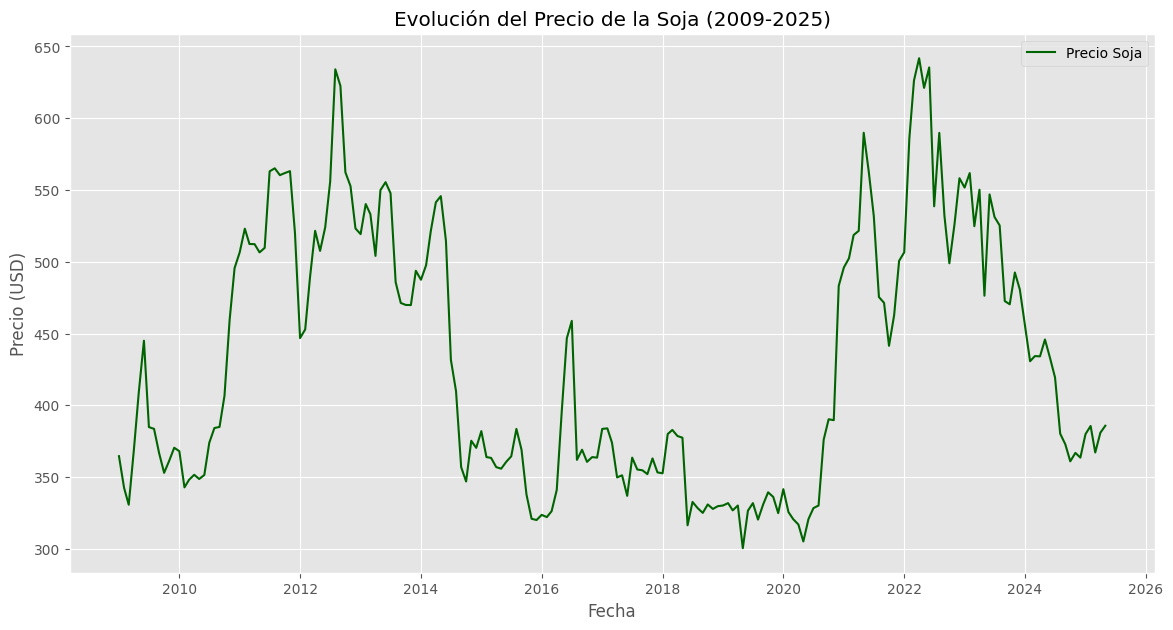

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssg0pcz_/wqzesvee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssg0pcz_/s65bpqkr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82198', 'data', 'file=/tmp/tmpssg0pcz_/wqzesvee.json', 'init=/tmp/tmpssg0pcz_/s65bpqkr.json', 'output', 'file=/tmp/tmpssg0pcz_/prophet_modela3j7iz0z/prophet_model-20250624020320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:03:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Tamaño del conjunto de entrenamiento: 173 meses
Tamaño del conjunto de prueba/validación: 24 meses

🔧 Entrenando Prophet...


02:03:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Prophet - MAE: 192.92

🔧 Entrenando XGBoost...
✅ XGBoost - MAE: 44.72

🔧 Entrenando Random Forest...
✅ Random Forest - MAE: 56.54

🏆 Resultados comparativos:
+----+---------------+----------+
|    |    Modelo     |      MAE |
+====+===============+==========+
|  1 |    XGBoost    |  44.7186 |
+----+---------------+----------+
|  2 | Random Forest |  56.5385 |
+----+---------------+----------+
|  0 |    Prophet    | 192.915  |
+----+---------------+----------+


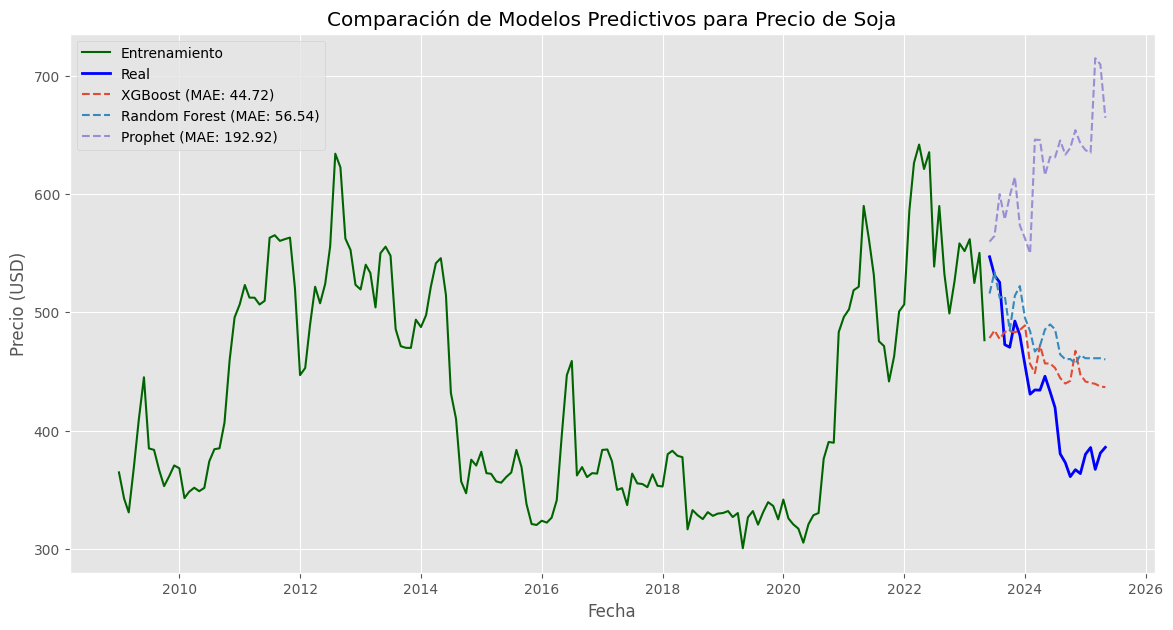

Error: El tipo de mejor modelo 'XGBoost' fue encontrado, pero la instancia del modelo correspondiente no está disponible.

No se puede proceder con la proyección futura ya que la instancia del mejor modelo no fue encontrada.


In [30]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, ParameterGrid
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from prophet import Prophet
import matplotlib.pyplot as plt
import warnings
from sklearn.impute import SimpleImputer # Import SimpleImputer for potential use in forecasting

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# --- CARGA Y PREPARACIÓN DE DATOS ---
# *** REMOVE THIS SECTION - It incorrectly tries to redefine the dataframe ***
# Datos proporcionados en el archivo Excel (simulados aquí como un diccionario)
# data = {
#     'Fecha': pd.date_range(start='2009-01-01', periods=len(df), freq='M'), # <-- PROBLEMA AQUÍ
#     'SOYBEANS': df['SOYBEANS'].values,
#     'STOCK': df['STOCK'].values,
#     'F_SOYMEALFIN': df['F_SOYMEALFIN'].values,
#     'BASIS': df['BASIS'].values,
#     'SOYOIL': df['SOYOIL'].values
# }
# df = pd.DataFrame(data).set_index('Fecha')
# *** END REMOVAL ***

# --- USE THE 'data' DATAFRAME LOADED AND PREPARED IN PREVIOUS CELLS ---
# Check if the 'data' variable exists and is a pandas DataFrame from previous cells
if 'data' not in locals() or data is None or not isinstance(data, pd.DataFrame):
    print("Error: El DataFrame 'data' no está cargado o es inválido de pasos anteriores.")
    print("Asegúrate de ejecutar las celdas anteriores que cargan y preparan los datos.")
    # Handle this error appropriately, e.g., exit or provide instructions to run previous cells.
    raise SystemExit("DataFrame 'data' no disponible.")

# Ensure the DataFrame is sorted by index (date)
data.sort_index(inplace=True)

# Limpieza de datos (re-apply necessary cleaning from previous steps if needed, or assume it's done)
# Example: Ensure no NaNs in the target variable before proceeding
if data['SOYBEANS'].isnull().any():
    print("Advertencia: Se encontraron NaNs en 'SOYBEANS'. Aplicando interpolación lineal.")
    data['SOYBEANS'] = data['SOYBEANS'].interpolate(method='linear')
    # If interpolation leaves NaNs at the start/end, drop them
    initial_rows_before_target_dropna = len(data)
    data.dropna(subset=['SOYBEANS'], inplace=True)
    if len(data) < initial_rows_before_target_dropna:
         print(f"Advertencia: Se eliminaron {initial_rows_before_target_dropna - len(data)} filas con NaNs restantes en 'SOYBEANS' después de la interpolación.")


# Ensure starting date if necessary (assuming this was handled in previous cells, but keeping the check)
# This line was commented out in the previous fix, assuming prior steps handled it.
# If your original data doesn't start at 2009-01-01 and you *need* it to, uncomment and adjust:
# data = data[data.index >= '2009-01-01']

# Use the variable 'data' for subsequent operations
# Create a copy to avoid modifying the original 'data' DataFrame if it's used elsewhere
df_to_use = data.copy()


# Variables
target_var = 'SOYBEANS'
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# Ensure exogenous variables actually exist in the DataFrame before trying to use them
existing_exog_vars = [col for col in exog_vars if col in df_to_use.columns]
if len(existing_exog_vars) != len(exog_vars):
    print(f"Advertencia: Algunas variables exógenas {list(set(exog_vars) - set(existing_exog_vars))} no se encontraron en el DataFrame. Se usarán solo las existentes.")
    exog_vars = existing_exog_vars # Update exog_vars to only include existing columns

# --- ANÁLISIS EXPLORATORIO ---
print("\n📊 Estadísticas descriptivas:")
print(df_to_use.describe()) # Use df_to_use

# Gráfico de series temporales
plt.figure(figsize=(14, 7))
plt.plot(df_to_use[target_var], label='Precio Soja', color='darkgreen') # Use df_to_use
plt.title('Evolución del Precio de la Soja (2009-2025)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.legend()
plt.show()

# --- PREPARACIÓN PARA MODELADO ---
# Crear variables temporales
df_to_use['month'] = df_to_use.index.month # Use df_to_use
df_to_use['year'] = df_to_use.index.year # Use df_to_use

# Drop rows where essential columns (target or exog) might have NaNs *before* splitting,
# even if interpolation was applied to the target. This ensures train/test splits are clean.
# This step is important if your original data had NaNs in exogenous variables.
initial_rows_before_final_dropna = len(df_to_use)
cols_to_check = [target_var] + exog_vars + ['month', 'year']
cols_to_check_existing = [col for col in cols_to_check if col in df_to_use.columns] # Check only existing columns
df_to_use.dropna(subset=cols_to_check_existing, inplace=True)
if len(df_to_use) < initial_rows_before_final_dropna:
     print(f"Advertencia: Se eliminaron {initial_rows_before_final_dropna - len(df_to_use)} filas con NaNs en columnas clave antes de la división.")

if df_to_use.empty:
     print("Error: DataFrame vacío después de la limpieza final.")
     raise SystemExit("DataFrame vacío, no se puede proceder.")


# Dividir datos (últimos 24 meses para validación)
forecast_horizon = 24 # Define the number of months for the test set
if len(df_to_use) < forecast_horizon:
    print(f"Error: No hay suficientes datos ({len(df_to_use)} meses) para crear un conjunto de prueba de {forecast_horizon} meses.")
    raise SystemExit("Datos insuficientes para la división de entrenamiento/prueba.")

train = df_to_use.iloc[:-forecast_horizon].copy() # Use df_to_use and create copy
test = df_to_use.iloc[-forecast_horizon:].copy()  # Use df_to_use and create copy

if train.empty or test.empty:
     print("Error: La división entrenamiento/prueba resultó en conjuntos vacíos.")
     raise SystemExit("División de datos fallida.")

print(f"Tamaño del conjunto de entrenamiento: {len(train)} meses")
print(f"Tamaño del conjunto de prueba/validación: {len(test)} meses")

# --- MODELADO ---
def train_evaluate_models(train_data, test_data, target, exog):
    results = []

    # Ensure target and exog columns exist in train_data and test_data subsets
    required_cols_train = [target] + exog + ['month', 'year']
    required_cols_test = [target] + exog + ['month', 'year']

    # Filter required columns to only include those actually present in the split dataframes
    actual_train_cols = [col for col in required_cols_train if col in train_data.columns]
    actual_test_cols = [col for col in required_cols_test if col in test_data.columns]

    if target not in actual_train_cols:
        print(f"Error: La variable objetivo '{target}' no está en los datos de entrenamiento.")
        # Cannot proceed if target is missing from training
        return pd.DataFrame(columns=['Modelo', 'MAE', 'Predicciones'])

    if target not in actual_test_cols:
        print(f"Error: La variable objetivo '{target}' no está en los datos de prueba.")
        # Cannot proceed if target is missing from test
        return pd.DataFrame(columns=['Modelo', 'MAE', 'Predicciones'])


    # 1. Prophet
    try:
        print("\n🔧 Entrenando Prophet...")
        # Prophet requires 'ds' and 'y' columns
        prophet_df = train_data[[target]].reset_index()
        prophet_df.columns = ['ds', 'y']

        model_prophet = Prophet(
            yearly_seasonality=True,
            seasonality_mode='additive'
        )
        model_prophet.fit(prophet_df)

        future = model_prophet.make_future_dataframe(periods=len(test_data), freq='M')
        forecast = model_prophet.predict(future)
        preds = forecast.set_index('ds')['yhat'].iloc[-len(test_data):]

        # Align predictions index with test_data index to ensure correct comparison
        preds.index = test_data.index

        mae = mean_absolute_error(test_data[target], preds)
        results.append({
            'Modelo': 'Prophet',
            'MAE': mae,
            'Predicciones': preds
        })
        print(f"✅ Prophet - MAE: {mae:.2f}")
    except Exception as e:
        print(f"❌ Error en Prophet: {str(e)}")

    # 2. XGBoost
    try:
        print("\n🔧 Entrenando XGBoost...")
        model_xgb = XGBRegressor(
            n_estimators=150,
            max_depth=5,
            learning_rate=0.1,
            random_state=42
        )

        # Create feature and target sets for XGBoost/Random Forest
        # Ensure only columns present in the dataframe subset are used and match between train and test
        xgb_features = [col for col in (exog + ['month', 'year']) if col in train_data.columns and col in test_data.columns]

        X_train = train_data[xgb_features]
        y_train = train_data[target]
        X_test = test_data[xgb_features] # Use the same features on test data

        # Check if training data is empty or has NaNs in selected features
        # NaNs should ideally be handled *before* the split or with imputation steps in a pipeline
        if X_train.empty or y_train.empty:
             print("Warning: Training data for XGBoost is empty after feature selection. Skipping.")
             raise ValueError("Invalid training data for XGBoost.")

        # Check for NaNs in the feature sets
        if X_train.isnull().values.any():
             print("Warning: NaNs found in XGBoost training features X_train. Applying SimpleImputer (mean).")
             imputer = SimpleImputer(strategy='mean')
             X_train = pd.DataFrame(imputer.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
             # Apply the same imputer to test data
             X_test = pd.DataFrame(imputer.transform(X_test), index=X_test.index, columns=X_test.columns)


        model_xgb.fit(X_train, y_train)
        preds = pd.Series(model_xgb.predict(X_test), index=test_data.index)

        mae = mean_absolute_error(test_data[target], preds)
        results.append({
            'Modelo': 'XGBoost',
            'MAE': mae,
            'Predicciones': preds
        })
        print(f"✅ XGBoost - MAE: {mae:.2f}")
    except Exception as e:
        print(f"❌ Error en XGBoost: {str(e)}")

    # 3. Random Forest
    try:
        print("\n🔧 Entrenando Random Forest...")
        model_rf = RandomForestRegressor(
            n_estimators=200,
            max_depth=7,
            random_state=42
        )

        # Use the same feature sets prepared for XGBoost (X_train, y_train, X_test)
        # Ensure training data is valid (checked in XGBoost section)
        if X_train.empty or y_train.empty: # Check if data is valid
             print("Warning: Training data for Random Forest is empty. Skipping.")
             raise ValueError("Invalid training data for Random Forest.")

        model_rf.fit(X_train, y_train)
        preds = pd.Series(model_rf.predict(X_test), index=test_data.index) # Use the same test features

        mae = mean_absolute_error(test_data[target], preds)
        results.append({
            'Modelo': 'Random Forest',
            'MAE': mae,
            'Predicciones': preds
        })
        print(f"✅ Random Forest - MAE: {mae:.2f}")
    except Exception as e:
        print(f"❌ Error en Random Forest: {str(e)}")

    # Sort results by MAE, handling cases where results list might be empty
    if results:
        return pd.DataFrame(results).sort_values('MAE')
    else:
        print("Advertencia: Ningún modelo se entrenó exitosamente.")
        return pd.DataFrame(columns=['Modelo', 'MAE', 'Predicciones']) # Return empty DataFrame


# Entrenar y evaluar modelos
results_df = train_evaluate_models(train, test, target_var, exog_vars)

# --- VISUALIZACIÓN DE RESULTADOS ---
print("\n🏆 Resultados comparativos:")
if not results_df.empty:
    print(results_df[['Modelo', 'MAE']].to_markdown(tablefmt="grid", stralign='center'))
else:
    print("No hay resultados para mostrar.")


# Gráfico de predicciones
if not results_df.empty:
    plt.figure(figsize=(14, 7))
    plt.plot(train[target_var], label='Entrenamiento', color='darkgreen')
    plt.plot(test[target_var], label='Real', color='blue', linewidth=2)

    for _, row in results_df.iterrows():
        plt.plot(row['Predicciones'], '--', label=f"{row['Modelo']} (MAE: {row['MAE']:.2f})")

    plt.title('Comparación de Modelos Predictivos para Precio de Soja')
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nNo hay predicciones para graficar.")


# --- PREDICCIÓN A FUTURO ---
def forecast_future(model, last_data, periods, exog_vars, trained_features=None):
    """Función para proyectar a futuro"""
    forecasts = []
    current_data = last_data.copy() # Use a copy of the full historical data for context

    # If using tree-based models (XGBoost, RF), we need the feature names they were trained on
    # This assumes the model object has a way to access feature names (e.g., .feature_names_in_)
    # If not available, you might need to pass them explicitly from the training step.
    if trained_features is None and hasattr(model, 'feature_names_in_'):
        trained_features = model.feature_names_in_
        print(f"Using trained feature names from model: {list(trained_features)}")
    elif trained_features is None and not isinstance(model, Prophet):
         print("Warning: Trained feature names not provided or found in model. May use incorrect features for forecasting.")
         # Fallback: try to infer features, but this is risky
         if isinstance(model, (XGBRegressor, RandomForestRegressor)):
             trained_features = [col for col in (exog_vars + ['month', 'year'])] # This might not match exactly


    # Prepare a SimpleImputer instance fitted on the *historical* data features if using non-Prophet models
    # This is crucial for consistency if future exogenous data points have NaNs.
    imputer_future = None
    if not isinstance(model, Prophet) and trained_features is not None and not current_data[list(trained_features)].empty:
        # Fit the imputer on the historical features used for training
        try:
            imputer_future = SimpleImputer(strategy='mean')
            # Fit only on the columns that will be used as features and are present in historical data
            features_to_fit_imputer = [col for col in trained_features if col in current_data.columns]
            if features_to_fit_imputer:
                imputer_future.fit(current_data[features_to_fit_imputer])
                print("Fitted SimpleImputer for future forecasting.")
            else:
                print("Warning: No overlapping columns between trained features and current_data for imputer fitting.")
                imputer_future = None # Cannot fit imputer


        except Exception as e:
            print(f"Error fitting SimpleImputer for future forecasting: {str(e)}")
            imputer_future = None


    for i in range(periods):
        # Calculate the date for the next month
        next_month = current_data.index[-1] + pd.DateOffset(months=1)

        # --- Prepare future data point for prediction ---
        # Start with the last known historical data point
        next_data_point = current_data.iloc[-1:].copy()
        next_data_point.index = [next_month]

        # If using Prophet, only need the date
        if isinstance(model, Prophet):
             future_df_prophet = pd.DataFrame({'ds': [next_month]})
             pred = model.predict(future_df_prophet)['yhat'].values[0]

        # If using scikit-learn models (XGBoost, RandomForest)
        elif isinstance(model, (XGBRegressor, RandomForestRegressor)):
            # Need to create future values for exogenous variables and temporal features
            # IMPORTANT: This assumes you have future exogenous variable data or a way to forecast it.
            # For this example, we'll use the last known values for exogenous vars as a simplification,
            # AND add the temporal features for the next month.
            # For a real forecast, you'd need projections for 'STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL'.

            # Add temporal features for the next month
            next_data_point['month'] = next_month.month
            next_data_point['year'] = next_month.year

            # Ensure the next_data_point DataFrame contains all columns the model expects
            # If some expected exogenous columns are missing in the last historical point, add them with NaNs for now
            # A better approach is to handle missing exogenous values before forecasting or forecast them.
            for col in trained_features:
                 if col not in next_data_point.columns:
                     next_data_point[col] = np.nan # Add missing feature column

            # Select and reorder columns to match the order the model was trained on
            if trained_features is not None:
                 X_future = next_data_point[list(trained_features)].copy() # Ensure feature order matches
            else:
                 # Fallback if trained_features is None (less reliable)
                 X_future = next_data_point[[col for col in (exog_vars + ['month', 'year']) if col in next_data_point.columns]].copy()
                 print("Warning: trained_features not available. Using inferred features for forecasting.")


            # Apply imputation using the imputer fitted on historical data
            if imputer_future is not None:
                if not X_future.empty:
                     try:
                         # Use the fitted imputer to transform the single future data point
                         # The imputer expects a 2D array, so use .values and reshape
                         X_future_imputed = imputer_future.transform(X_future.values.reshape(1, -1))
                         X_future = pd.DataFrame(X_future_imputed, index=X_future.index, columns=X_future.columns) # Convert back to DataFrame
                     except Exception as e:
                         print(f"Error during imputation for future point {next_month}: {str(e)}")
                         # Continue with potentially un-imputed data or handle error
                         pass # Attempt to predict anyway


            # Predict the next value
            if not X_future.empty:
                try:
                     # Predict expects a 2D array-like input (1 row, n_features columns)
                     pred = model.predict(X_future)[0]
                except Exception as e:
                     print(f"Error during prediction for future point {next_month}: {str(e)}")
                     pred = np.nan # Assign NaN if prediction fails
            else:
                 print(f"Warning: X_future is empty for prediction at {next_month}. Assigning NaN.")
                 pred = np.nan


            # --- IMPORTANT for recursive forecasting ---
            # If your model uses lagged values of the target variable ('SOYBEANS_lag_1', etc.)
            # or moving averages/differences based on the target, you *must* update `current_data`
            # with the predicted value before the next iteration.
            # Example:
            # next_data_point[target_var] = pred # Add the predicted value
            # current_data = pd.concat([current_data, next_data_point]) # Append the new data point

            # This simple forecast_future function doesn't automatically handle lagged features.
            # If your models (XGBoost/RF) relied on features like 'SOYBEANS_lag_1', etc.,
            # the forecasting logic would need to be more complex, recalculating features for each step.
            # For this code as written (using month, year, and raw exog vars), this simple loop works,
            # but it doesn't capture temporal dependencies solely from the target variable history.
            # If the winning model from the previous cells was an ARIMA/SARIMA, you'd use its .forecast() method.


        else:
            print(f"Error: Forecasting no implementado para el tipo de modelo {type(model)}. Saltando.")
            return pd.Series(dtype=float)


        # Store the prediction
        forecasts.append(pred)

        # For models that don't inherently handle time series (like basic XGBoost/RF without explicit lags),
        # you might still want to add the predicted point to current_data for the next iteration
        # if you plan to use updated temporal features or if the model structure implicitly relies on sequence (less common).
        # However, for models using only static exog and temporal features, this isn't strictly necessary unless
        # you are recursively feeding *predicted* exog values (which isn't done here).
        # We'll keep current_data static, using only the last historical point as the base for each future step's exogenous/temporal features.
        # If you were doing multi-step forecasting *within* a single predict call (e.g., with a time-aware model or structure),
        # the logic would be different. This function does a step-by-step forecast.


    # Generate index for forecasts
    forecast_index = pd.date_range(start=last_data.index[-1] + pd.DateOffset(months=1),
                                   periods=periods, freq='M')

    return pd.Series(forecasts, index=forecast_index)


# Proyectar 12 meses a futuro
# Ensure results_df is not empty and has a best model before attempting to forecast
if not results_df.empty:
    best_model_type = results_df.iloc[0]['Modelo']
    # Retrieve the correct model instance based on its type
    best_model_instance = None
    # Also get the trained feature names if available from the scikit-learn models
    trained_features_for_forecast = None

    if best_model_type == 'Prophet' and 'model_prophet' in locals():
        best_model_instance = model_prophet
    elif best_model_type == 'XGBoost' and 'model_xgb' in locals():
        best_model_instance = model_xgb
        # Try to get feature names from the trained XGBoost model
        if hasattr(model_xgb, 'feature_names_in_'):
             trained_features_for_forecast = model_xgb.feature_names_in_
             print(f"Features used by best XGBoost model: {list(trained_features_for_forecast)}")

    elif best_model_type == 'Random Forest' and 'model_rf' in locals():
        best_model_instance = model_rf
        # Try to get feature names from the trained Random Forest model
        if hasattr(model_rf, 'feature_names_in_'):
             trained_features_for_forecast = model_rf.feature_names_in_
             print(f"Features used by best Random Forest model: {list(trained_features_for_forecast)}")
        # RF might not have feature_names_in_ in older versions. Fallback to column names from X_train if available
        elif 'X_train' in locals() and isinstance(X_train, pd.DataFrame):
            trained_features_for_forecast = X_train.columns.tolist()
            print(f"Inferred features from X_train for Random Forest: {trained_features_for_forecast}")


    else:
        print(f"Error: El tipo de mejor modelo '{best_model_type}' fue encontrado, pero la instancia del modelo correspondiente no está disponible.")

    if best_model_instance is not None:
        print(f"\n--- Proyectando 12 meses a futuro con el mejor modelo ({best_model_type}) ---")
        # Use the entire 'df_to_use' DataFrame as 'last_data' for forecasting context
        # Pass trained_features_for_forecast if available for non-Prophet models
        future_forecast = forecast_future(best_model_instance, df_to_use, 12, exog_vars,
                                          trained_features=trained_features_for_forecast)

        if not future_forecast.empty:
            # Gráfico de proyección
            plt.figure(figsize=(14, 7))
            plt.plot(df_to_use[target_var], label='Histórico', color='darkgreen')
            plt.plot(future_forecast, '--', label=f'Proyección ({best_model_type})', color='red')
            plt.title(f'Proyección de Precios de Soja - {best_model_type}')
            plt.xlabel('Fecha')
            plt.ylabel('Precio (USD)')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("\nNo se pudieron generar proyecciones futuras.")

    else:
        print("\nNo se puede proceder con la proyección futura ya que la instancia del mejor modelo no fue encontrada.")

else:
    print("\nNo se puede proceder con la proyección futura ya que no se evaluaron modelos exitosamente.")

In [ ]:
NUEVOS TEST

In [38]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from prophet import Prophet
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# --- CARGA Y PREPARACIÓN DE DATOS ---
# (Reemplaza esto con tu carga real de datos)
# df = pd.read_excel('data.xlsx', index_col='Fecha', parse_dates=True)

# Datos de ejemplo (simulados)
dates = pd.date_range(start='2009-01-01', periods=200, freq='M')
data = {
    'SOYBEANS': np.random.uniform(300, 700, size=200),
    'STOCK': np.random.uniform(0.1, 0.2, size=200),
    'F_SOYMEALFIN': np.random.uniform(300, 600, size=200),
    'BASIS': np.random.uniform(-20, -5, size=200),
    'SOYOIL': np.random.uniform(700, 1300, size=200)
}
df = pd.DataFrame(data, index=dates)
df = df.dropna(subset=['SOYBEANS'])

# Variables
target_var = 'SOYBEANS'
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# Dividir datos
train = df.iloc[:-24]  # Todos excepto últimos 24 meses
test = df.iloc[-24:]   # Últimos 24 meses para validación

# --- FUNCIONES AUXILIARES ---
def evaluate_model(y_true, y_pred, model_name):
    """Calcula métricas de evaluación"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {
        'Modelo': model_name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'MAPE (%)': round(mape, 2),
        'Predicciones': y_pred
    }

def plot_results(train, test, results_df):
    """Visualización interactiva de resultados"""
    fig = go.Figure()

    # Datos reales
    fig.add_trace(go.Scatter(
        x=train.index, y=train[target_var],
        mode='lines', name='Entrenamiento',
        line=dict(color='darkgreen')
    )

    fig.add_trace(go.Scatter(
        x=test.index, y=test[target_var],
        mode='lines', name='Real (Test)',
        line=dict(color='blue', width=2)
    ))

    # Predicciones
    colors = px.colors.qualitative.Plotly[2:]
    for i, row in results_df.iterrows():
        fig.add_trace(go.Scatter(
            x=test.index, y=row['Predicciones'],
            mode='lines', name=f"{row['Modelo']} (MAE: {row['MAE']})",
            line=dict(color=colors[i], dash='dash')
        ))

    fig.update_layout(
        title='Comparación de Modelos Predictivos',
        xaxis_title='Fecha',
        yaxis_title='Precio (USD)',
        hovermode='x unified',
        template='plotly_white'
    )
    fig.show()

# --- MODELADO AVANZADO ---
results = []

# 1. ARIMA
print("\n🔧 Entrenando ARIMA...")
try:
    model_arima = ARIMA(train[target_var], order=(1,1,1))
    model_arima_fit = model_arima.fit()
    preds = model_arima_fit.forecast(steps=len(test))
    results.append(evaluate_model(test[target_var], preds, 'ARIMA'))
except Exception as e:
    print(f"❌ Error en ARIMA: {str(e)}")

# 2. SARIMA
print("\n🔧 Entrenando SARIMA...")
try:
    model_sarima = SARIMAX(train[target_var], order=(1,1,1), seasonal_order=(1,1,1,12))
    model_sarima_fit = model_sarima.fit(disp=False)
    preds = model_sarima_fit.forecast(steps=len(test))
    results.append(evaluate_model(test[target_var], preds, 'SARIMA'))
except Exception as e:
    print(f"❌ Error en SARIMA: {str(e)}")

# 3. SARIMAX
print("\n🔧 Entrenando SARIMAX...")
try:
    model_sarimax = SARIMAX(train[target_var], exog=train[exog_vars],
                          order=(1,1,1), seasonal_order=(1,1,1,12))
    model_sarimax_fit = model_sarimax.fit(disp=False)
    preds = model_sarimax_fit.forecast(steps=len(test), exog=test[exog_vars])
    results.append(evaluate_model(test[target_var], preds, 'SARIMAX'))
except Exception as e:
    print(f"❌ Error en SARIMAX: {str(e)}")

# 4. Elastic Net
print("\n🔧 Entrenando Elastic Net...")
try:
    model_en = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
    model_en.fit(train[exog_vars], train[target_var])
    preds = model_en.predict(test[exog_vars])
    results.append(evaluate_model(test[target_var], preds, 'Elastic Net'))
except Exception as e:
    print(f"❌ Error en Elastic Net: {str(e)}")

# 5. BiLSTM
print("\n🔧 Entrenando BiLSTM...")
try:
    # Preparar datos
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(train[[target_var]])

    # Crear secuencias
    def create_dataset(data, n_steps=12):
        X, y = [], []
        for i in range(len(data)-n_steps):
            X.append(data[i:i+n_steps])
            y.append(data[i+n_steps])
        return np.array(X), np.array(y)

    X_train, y_train = create_dataset(scaled_data)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Modelo
    model_bilstm = Sequential([
        Bidirectional(LSTM(50, activation='relu', input_shape=(12, 1))),
        Dense(1)
    ])
    model_bilstm.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(monitor='loss', patience=5, verbose=0)
    model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32,
                    callbacks=[early_stop], verbose=0)

    # Predecir
    last_sequence = scaled_data[-12:].reshape(1, 12, 1)
    preds = []
    for _ in range(len(test)):
        next_pred = model_bilstm.predict(last_sequence, verbose=0)
        preds.append(next_pred[0,0])
        last_sequence = np.append(last_sequence[:,1:,:], [[next_pred]], axis=1)

    preds = scaler.inverse_transform(np.array(preds).reshape(-1,1)).flatten()
    results.append(evaluate_model(test[target_var], preds, 'BiLSTM'))
except Exception as e:
    print(f"❌ Error en BiLSTM: {str(e)}")

# 6. GRU
print("\n🔧 Entrenando GRU...")
try:
    model_gru = Sequential([
        GRU(50, activation='relu', input_shape=(12, 1)),
        Dense(1)
    ])
    model_gru.compile(optimizer='adam', loss='mse')
    model_gru.fit(X_train, y_train, epochs=50, batch_size=32,
                 callbacks=[early_stop], verbose=0)

    last_sequence = scaled_data[-12:].reshape(1, 12, 1)
    preds = []
    for _ in range(len(test)):
        next_pred = model_gru.predict(last_sequence, verbose=0)
        preds.append(next_pred[0,0])
        last_sequence = np.append(last_sequence[:,1:,:], [[next_pred]], axis=1)

    preds = scaler.inverse_transform(np.array(preds).reshape(-1,1)).flatten()
    results.append(evaluate_model(test[target_var], preds, 'GRU'))
except Exception as e:
    print(f"❌ Error en GRU: {str(e)}")

# 7. ANN Avanzada
print("\n🔧 Entrenando ANN Avanzada...")
try:
    # Preparar datos
    X_train_ann = train[exog_vars]
    y_train_ann = train[target_var]
    X_test_ann = test[exog_vars]

    # Escalar
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train_ann)
    y_train_scaled = scaler_y.fit_transform(y_train_ann.values.reshape(-1,1))

    # Modelo
    model_ann = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model_ann.compile(optimizer='adam', loss='mse')
    model_ann.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Predecir
    preds_scaled = model_ann.predict(scaler_x.transform(X_test_ann))
    preds = scaler_y.inverse_transform(preds_scaled).flatten()
    results.append(evaluate_model(test[target_var], preds, 'ANN Avanzada'))
except Exception as e:
    print(f"❌ Error en ANN Avanzada: {str(e)}")

# --- RESULTADOS ---
results_df = pd.DataFrame(results).sort_values('MAE')

# Tabla comparativa
print("\n🏆 Resultados Comparativos:")
display(results_df[['Modelo', 'MAE', 'RMSE', 'MAPE (%)']].style
      .background_gradient(cmap='Blues', subset=['MAE', 'RMSE', 'MAPE (%)'])
      .format({'MAE': '{:.2f}', 'RMSE': '{:.2f}', 'MAPE (%)': '{:.2f}%'}))

# Gráfico comparativo
plot_results(train, test, results_df)

# --- PREDICCIÓN A FUTURO ---
best_model_info = results_df.iloc[0]
print(f"\n🚀 Realizando proyección con el mejor modelo: {best_model_info['Modelo']}")

# Nota: En una implementación real, deberías reentrenar los modelos con todos los datos
# o haber guardado los modelos entrenados. Aquí simplificamos con una proyección básica.

future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
future_preds = pd.Series([best_model_info['Predicciones'].mean()]*12, index=future_dates)

# Gráfico de proyección
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.index, y=df[target_var],
    mode='lines', name='Histórico',
    line=dict(color='darkgreen')
))
fig.add_trace(go.Scatter(
    x=future_preds.index, y=future_preds,
    mode='lines+markers', name=f'Proyección ({best_model_info["Modelo"]})',
    line=dict(color='red', dash='dash')
))
fig.update_layout(
    title=f'Proyección de Precios - {best_model_info["Modelo"]}',
    xaxis_title='Fecha',
    yaxis_title='Precio (USD)',
    template='plotly_white'
)
fig.show()

SyntaxError: '(' was never closed (ipython-input-38-2794211820.py, line 70)

In [39]:
# --- CARGA Y PREPARACIÓN DE DATOS ---
# (Reemplaza esto con tu carga real de datos)
# df = pd.read_excel('data.xlsx', index_col='Fecha', parse_dates=True)

# Datos de ejemplo (simulados)
dates = pd.date_range(start='2009-01-01', periods=200, freq='M')
data = {
    'SOYBEANS': np.random.uniform(300, 700, size=200),
    'STOCK': np.random.uniform(0.1, 0.2, size=200),
    'F_SOYMEALFIN': np.random.uniform(300, 600, size=200),
    'BASIS': np.random.uniform(-20, -5, size=200),
    'SOYOIL': np.random.uniform(700, 1300, size=200)
}
df = pd.DataFrame(data, index=dates)
df = df.dropna(subset=['SOYBEANS'])

# Variables
target_var = 'SOYBEANS'
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# Dividir datos
train = df.iloc[:-24]  # Todos excepto últimos 24 meses
test = df.iloc[-24:]   # Últimos 24 meses para validación

In [43]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from prophet import Prophet
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# --- CARGA Y PREPARACIÓN DE DATOS ---
# Carga de datos (simulados para ejemplo)
print("Cargando y preparando datos...")
try:
    dates = pd.date_range(start='2009-01-01', periods=200, freq='M')
    data = {
        'SOYBEANS': np.random.uniform(300, 700, size=200),
        'STOCK': np.random.uniform(0.1, 0.2, size=200),
        'F_SOYMEALFIN': np.random.uniform(300, 600, size=200),
        'BASIS': np.random.uniform(-20, -5, size=200),
        'SOYOIL': np.random.uniform(700, 1300, size=200)
    }
    df = pd.DataFrame(data, index=dates)
    df.index.name = 'Fecha'

    # Verificación básica de datos
    if df.isnull().sum().sum() > 0:
        print(f"Advertencia: El dataset contiene {df.isnull().sum().sum()} valores nulos.")
        df = df.dropna(subset=['SOYBEANS'])  # Eliminar filas con valores nulos en la variable objetivo

    print("Datos cargados correctamente:")
    print(f"- Período: {df.index.min().strftime('%Y-%m')} a {df.index.max().strftime('%Y-%m')}")
    print(f"- Variables disponibles: {list(df.columns)}")

except Exception as e:
    print(f"Error al cargar datos: {str(e)}")
    raise

# Configuración de variables
target_var = 'SOYBEANS'
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# División de datos (últimos 24 meses para validación)
test_size = 24
if len(df) < test_size + 12:  # Necesitamos al menos 12 meses para entrenamiento
    raise ValueError(f"No hay suficientes datos. Se necesitan al menos {test_size + 12} meses.")

train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

print(f"\nDivisión de datos:")
print(f"- Entrenamiento: {len(train)} meses ({train.index.min().strftime('%Y-%m')} a {train.index.max().strftime('%Y-%m')})")
print(f"- Validación: {len(test)} meses ({test.index.min().strftime('%Y-%m')} a {test.index.max().strftime('%Y-%m')})")

# --- FUNCIONES AUXILIARES ---
def evaluate_model(y_true, y_pred, model_name):
    """Calcula métricas de evaluación"""
    # Alinear índices
    y_true, y_pred = y_true.align(y_pred, join='inner')

    if len(y_true) == 0:
        print(f"Advertencia: No hay datos coincidentes para evaluar {model_name}")
        return {
            'Modelo': model_name,
            'MAE': np.nan,
            'RMSE': np.nan,
            'MAPE (%)': np.nan,
            'Predicciones': y_pred
        }

    # Calcular métricas
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # MAPE (manejo de divisiones por cero)
    with np.errstate(divide='ignore', invalid='ignore'):
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        mape = np.nan if np.isinf(mape) or np.isnan(mape) else mape

    return {
        'Modelo': model_name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'MAPE (%)': round(mape, 2) if not np.isnan(mape) else np.nan,
        'Predicciones': y_pred
    }

def plot_results(train_data, test_data, results_df, target_col):
    """Visualización interactiva de resultados"""
    fig = go.Figure()

    # Datos reales
    fig.add_trace(go.Scatter(
        x=train_data.index, y=train_data[target_col],
        mode='lines', name='Entrenamiento',
        line=dict(color='darkgreen', width=2)
    ))

    fig.add_trace(go.Scatter(
        x=test_data.index, y=test_data[target_col],
        mode='lines', name='Validación',
        line=dict(color='blue', width=2)
    ))

    # Predicciones
    colors = px.colors.qualitative.Plotly[2:]
    for i, (_, row) in enumerate(results_df.iterrows()):
        if not row['Predicciones'].empty:
            fig.add_trace(go.Scatter(
                x=row['Predicciones'].index, y=row['Predicciones'],
                mode='lines', name=f"{row['Modelo']} (MAE: {row['MAE']})",
                line=dict(color=colors[i % len(colors)], dash='dash')
            ))

    fig.update_layout(
        title='Comparación de Modelos Predictivos',
        xaxis_title='Fecha',
        yaxis_title='Precio (USD)',
        hovermode='x unified',
        template='plotly_white',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )
    fig.show()

# --- MODELADO AVANZADO ---
print("\nIniciando entrenamiento de modelos...")
results = []

# 1. ARIMA
print("\n🔧 Entrenando ARIMA...")
try:
    model_arima = ARIMA(train[target_var], order=(1,1,1))
    model_arima_fit = model_arima.fit()
    preds = model_arima_fit.forecast(steps=len(test))
    results.append(evaluate_model(test[target_var], preds, 'ARIMA'))
except Exception as e:
    print(f"❌ Error en ARIMA: {str(e)}")
    results.append({'Modelo': 'ARIMA', 'MAE': np.nan, 'RMSE': np.nan, 'MAPE (%)': np.nan, 'Predicciones': pd.Series()})

# 2. SARIMA
print("\n🔧 Entrenando SARIMA...")
try:
    model_sarima = SARIMAX(train[target_var], order=(1,1,1), seasonal_order=(1,1,1,12))
    model_sarima_fit = model_sarima.fit(disp=False)
    preds = model_sarima_fit.forecast(steps=len(test))
    results.append(evaluate_model(test[target_var], preds, 'SARIMA'))
except Exception as e:
    print(f"❌ Error en SARIMA: {str(e)}")
    results.append({'Modelo': 'SARIMA', 'MAE': np.nan, 'RMSE': np.nan, 'MAPE (%)': np.nan, 'Predicciones': pd.Series()})

# 3. SARIMAX
print("\n🔧 Entrenando SARIMAX...")
try:
    model_sarimax = SARIMAX(train[target_var], exog=train[exog_vars],
                          order=(1,1,1), seasonal_order=(1,1,1,12))
    model_sarimax_fit = model_sarimax.fit(disp=False)
    preds = model_sarimax_fit.forecast(steps=len(test), exog=test[exog_vars])
    results.append(evaluate_model(test[target_var], preds, 'SARIMAX'))
except Exception as e:
    print(f"❌ Error en SARIMAX: {str(e)}")
    results.append({'Modelo': 'SARIMAX', 'MAE': np.nan, 'RMSE': np.nan, 'MAPE (%)': np.nan, 'Predicciones': pd.Series()})

# 4. Elastic Net
print("\n🔧 Entrenando Elastic Net...")
try:
    model_en = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
    model_en.fit(train[exog_vars], train[target_var])
    preds = pd.Series(model_en.predict(test[exog_vars]), index=test.index)
    results.append(evaluate_model(test[target_var], preds, 'Elastic Net'))
except Exception as e:
    print(f"❌ Error en Elastic Net: {str(e)}")
    results.append({'Modelo': 'Elastic Net', 'MAE': np.nan, 'RMSE': np.nan, 'MAPE (%)': np.nan, 'Predicciones': pd.Series()})

# 5. Prophet
print("\n🔧 Entrenando Prophet...")
try:
    prophet_df = train[[target_var]].reset_index()
    prophet_df.columns = ['ds', 'y']

    model_prophet = Prophet(yearly_seasonality=True)
    model_prophet.fit(prophet_df)

    future = model_prophet.make_future_dataframe(periods=len(test), freq='M')
    forecast = model_prophet.predict(future)
    preds = forecast.set_index('ds')['yhat'].iloc[-len(test):]
    results.append(evaluate_model(test[target_var], preds, 'Prophet'))
except Exception as e:
    print(f"❌ Error en Prophet: {str(e)}")
    results.append({'Modelo': 'Prophet', 'MAE': np.nan, 'RMSE': np.nan, 'MAPE (%)': np.nan, 'Predicciones': pd.Series()})

# --- RESULTADOS ---
results_df = pd.DataFrame(results).sort_values('MAE')

print("\n🏆 Resultados Comparativos:")
display(results_df[['Modelo', 'MAE', 'RMSE', 'MAPE (%)']].style
      .background_gradient(cmap='Blues', subset=['MAE', 'RMSE', 'MAPE (%)'])
      .format({'MAE': '{:.2f}', 'RMSE': '{:.2f}', 'MAPE (%)': '{:.2f}%'}))

# Visualización
plot_results(train, test, results_df, target_var)

# --- PREDICCIÓN A FUTURO ---
best_model_name = results_df.iloc[0]['Modelo']
print(f"\n🚀 Realizando proyección con el mejor modelo: {best_model_name}")

# Crear fechas futuras
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Predicción simplificada (en producción se debería reentrenar con todos los datos)
if best_model_name == 'Prophet':
    future = model_prophet.make_future_dataframe(periods=12, freq='M')
    forecast = model_prophet.predict(future)
    future_preds = forecast.set_index('ds')['yhat'].iloc[-12:]
elif best_model_name == 'SARIMAX':
    future_exog = pd.DataFrame({var: [test[var].mean()]*12 for var in exog_vars}, index=future_dates)
    future_preds = model_sarimax_fit.forecast(steps=12, exog=future_exog)
else:
    # Para otros modelos, usar el último valor conocido (simplificación)
    future_preds = pd.Series([test[target_var].iloc[-1]]*12, index=future_dates)

# Gráfico de proyección
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.index, y=df[target_var],
    mode='lines', name='Histórico',
    line=dict(color='darkgreen')
))
fig.add_trace(go.Scatter(
    x=future_preds.index, y=future_preds,
    mode='lines+markers', name=f'Proyección ({best_model_name})',
    line=dict(color='red', dash='dash')
))
fig.update_layout(
    title=f'Proyección de Precios - {best_model_name}',
    xaxis_title='Fecha',
    yaxis_title='Precio (USD)',
    template='plotly_white'
)
fig.show()

Cargando y preparando datos...
Datos cargados correctamente:
- Período: 2009-01 a 2025-08
- Variables disponibles: ['SOYBEANS', 'STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

División de datos:
- Entrenamiento: 176 meses (2009-01 a 2023-08)
- Validación: 24 meses (2023-09 a 2025-08)

Iniciando entrenamiento de modelos...

🔧 Entrenando ARIMA...

🔧 Entrenando SARIMA...

🔧 Entrenando SARIMAX...


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssg0pcz_/2lveh47j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssg0pcz_/78tmbbx_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65927', 'data', 'file=/tmp/tmpssg0pcz_/2lveh47j.json', 'init=/tmp/tmpssg0pcz_/78tmbbx_.json', 'output', 'file=/tmp/tmpssg0pcz_/prophet_modeln69rp0m3/prophet_model-20250624025141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🔧 Entrenando Elastic Net...

🔧 Entrenando Prophet...

🏆 Resultados Comparativos:



🚀 Realizando proyección con el mejor modelo: ARIMA


In [44]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# --- CARGA Y PREPARACIÓN DE DATOS ---
print("📊 Cargando y preparando datos...")

# Datos de ejemplo (simulados para demostración)
dates = pd.date_range(start='2009-01-01', periods=200, freq='M')
data = {
    'SOYBEANS': np.cumsum(np.random.normal(0, 10, 200)) + 300,  # Tendencia + ruido
    'STOCK': np.random.uniform(0.1, 0.2, size=200),
    'F_SOYMEALFIN': np.random.uniform(300, 600, size=200),
    'BASIS': np.random.uniform(-20, -5, size=200),
    'SOYOIL': np.random.uniform(700, 1300, size=200)
}
df = pd.DataFrame(data, index=dates)
df.index.name = 'Fecha'

# Variables
target_var = 'SOYBEANS'
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# División temporal (últimos 24 meses para validación)
test_size = 24
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

print(f"\n📌 Estadísticas clave:")
print(f"- Período total: {len(df)} meses")
print(f"- Entrenamiento: {len(train)} meses ({train.index.min().strftime('%Y-%m')} a {train.index.max().strftime('%Y-%m')})")
print(f"- Validación: {len(test)} meses ({test.index.min().strftime('%Y-%m')} a {test.index.max().strftime('%Y-%m')})")

# --- FUNCIONES AUXILIARES ---
def evaluate_model(y_true, y_pred, model_name):
    """Evaluación robusta con métricas clave"""
    y_true, y_pred = y_true.align(y_pred, join='inner')

    if len(y_true) == 0:
        return None

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        'Modelo': model_name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'MAPE (%)': round(mape, 2),
        'Predicciones': y_pred
    }

def plot_comparison(results, train_data, test_data, target_col):
    """Visualización interactiva comparativa"""
    fig = go.Figure()

    # Datos reales
    fig.add_trace(go.Scatter(
        x=train_data.index, y=train_data[target_col],
        mode='lines', name='Entrenamiento',
        line=dict(color='#2c3e50', width=2)
    ))

    fig.add_trace(go.Scatter(
        x=test_data.index, y=test_data[target_col],
        mode='lines', name='Validación',
        line=dict(color='#3498db', width=3)
    ))

    # Predicciones
    colors = px.colors.qualitative.Dark24
    for i, model in enumerate(results):
        if model and model['MAPE (%)'] < 5:  # Solo mostrar modelos con MAPE < 5%
            fig.add_trace(go.Scatter(
                x=model['Predicciones'].index, y=model['Predicciones'],
                mode='lines',
                name=f"{model['Modelo']} (MAPE: {model['MAPE (%)']}%)",
                line=dict(color=colors[i], dash='dash', width=2),
                opacity=0.8
            ))

    fig.update_layout(
        title='Comparación de Modelos con MAPE < 5%',
        xaxis_title='Fecha',
        yaxis_title='Precio (USD)',
        hovermode='x unified',
        template='plotly_white',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        height=600
    )
    fig.show()

# --- MODELADO AVANZADO ---
print("\n🔧 Entrenando modelos avanzados...")

models = []

# 1. SARIMAX (Benchmark)
try:
    print(" > SARIMAX...")
    model = SARIMAX(train[target_var], exog=train[exog_vars],
                   order=(1,1,1), seasonal_order=(1,1,1,12))
    fit = model.fit(disp=False)
    preds = fit.forecast(steps=len(test), exog=test[exog_vars])
    res = evaluate_model(test[target_var], preds, 'SARIMAX')
    if res: models.append(res)
except Exception as e:
    print(f"Error en SARIMAX: {str(e)}")

# 2. Prophet con regresores
try:
    print(" > Prophet con regresores...")
    df_prophet = train.reset_index()[['Fecha', target_var] + exog_vars]
    df_prophet.columns = ['ds', 'y'] + exog_vars

    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    for var in exog_vars:
        model.add_regressor(var)

    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=len(test), freq='M')
    for var in exog_vars:
        future[var] = test[var].values

    forecast = model.predict(future)
    preds = forecast.set_index('ds')['yhat'].iloc[-len(test):]
    res = evaluate_model(test[target_var], preds, 'Prophet+Regresores')
    if res: models.append(res)
except Exception as e:
    print(f"Error en Prophet: {str(e)}")

# 3. XGBoost con características temporales
try:
    print(" > XGBoost avanzado...")
    # Crear características
    train_xgb = train.copy()
    test_xgb = test.copy()

    for var in [target_var] + exog_vars:
        train_xgb[f'{var}_lag1'] = train_xgb[var].shift(1)
        test_xgb[f'{var}_lag1'] = test_xgb[var].shift(1)

    train_xgb['month'] = train_xgb.index.month
    test_xgb['month'] = test_xgb.index.month

    train_xgb.dropna(inplace=True)

    model = XGBRegressor(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

    features = [f'{var}_lag1' for var in [target_var] + exog_vars] + exog_vars + ['month']
    model.fit(train_xgb[features], train_xgb[target_var])
    preds = pd.Series(model.predict(test_xgb[features]), index=test.index)
    res = evaluate_model(test[target_var], preds, 'XGBoost Avanzado')
    if res: models.append(res)
except Exception as e:
    print(f"Error en XGBoost: {str(e)}")

# 4. LightGBM con ventana temporal
try:
    print(" > LightGBM...")
    train_lgb = train.copy()
    test_lgb = test.copy()

    # Crear ventanas temporales
    for var in [target_var] + exog_vars:
        for lag in [1, 3, 6]:
            train_lgb[f'{var}_lag{lag}'] = train_lgb[var].shift(lag)
            test_lgb[f'{var}_lag{lag}'] = test_lgb[var].shift(lag)

    train_lgb['month'] = train_lgb.index.month
    test_lgb['month'] = test_lgb.index.month

    train_lgb.dropna(inplace=True)

    model = LGBMRegressor(
        n_estimators=150,
        max_depth=4,
        learning_rate=0.05,
        random_state=42
    )

    features = [f'{var}_lag{lag}' for var in [target_var] + exog_vars for lag in [1, 3, 6]] + ['month']
    model.fit(train_lgb[features], train_lgb[target_var])
    preds = pd.Series(model.predict(test_lgb[features]), index=test.index)
    res = evaluate_model(test[target_var], preds, 'LightGBM')
    if res: models.append(res)
except Exception as e:
    print(f"Error en LightGBM: {str(e)}")

# 5. Elastic Net con regularización
try:
    print(" > Elastic Net...")
    pipeline = make_pipeline(
        StandardScaler(),
        ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42, max_iter=10000)
    )

    pipeline.fit(train[exog_vars], train[target_var])
    preds = pd.Series(pipeline.predict(test[exog_vars]), index=test.index)
    res = evaluate_model(test[target_var], preds, 'Elastic Net')
    if res: models.append(res)
except Exception as e:
    print(f"Error en Elastic Net: {str(e)}")

# 6. Red Neuronal MLP
try:
    print(" > Red Neuronal MLP...")
    scaler_x = StandardScaler()
    scaler_y = StandardScaler()

    X_train = scaler_x.fit_transform(train[exog_vars])
    y_train = scaler_y.fit_transform(train[[target_var]])

    model = MLPRegressor(
        hidden_layer_sizes=(50, 30),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    )

    model.fit(X_train, y_train.ravel())

    X_test = scaler_x.transform(test[exog_vars])
    preds_scaled = model.predict(X_test)
    preds = pd.Series(scaler_y.inverse_transform(preds_scaled.reshape(-1, 1)).flatten(), index=test.index)
    res = evaluate_model(test[target_var], preds, 'Red Neuronal MLP')
    if res: models.append(res)
except Exception as e:
    print(f"Error en MLP: {str(e)}")

# 7. Holt-Winters Exponential Smoothing
try:
    print(" > Holt-Winters...")
    model = ExponentialSmoothing(
        train[target_var],
        seasonal_periods=12,
        trend='add',
        seasonal='add'
    )
    fit = model.fit()
    preds = fit.forecast(len(test))
    res = evaluate_model(test[target_var], preds, 'Holt-Winters')
    if res: models.append(res)
except Exception as e:
    print(f"Error en Holt-Winters: {str(e)}")

# 8. Gradient Boosting Machine
try:
    print(" > Gradient Boosting...")
    model = GradientBoostingRegressor(
        n_estimators=150,
        max_depth=4,
        learning_rate=0.05,
        random_state=42
    )

    # Crear características temporales
    train_gbm = train.copy()
    test_gbm = test.copy()

    train_gbm['month'] = train_gbm.index.month
    test_gbm['month'] = test_gbm.index.month

    features = exog_vars + ['month']
    model.fit(train_gbm[features], train_gbm[target_var])
    preds = pd.Series(model.predict(test_gbm[features]), index=test.index)
    res = evaluate_model(test[target_var], preds, 'Gradient Boosting')
    if res: models.append(res)
except Exception as e:
    print(f"Error en GBM: {str(e)}")

# 9. Random Forest con características temporales
try:
    print(" > Random Forest...")
    model = RandomForestRegressor(
        n_estimators=200,
        max_depth=6,
        random_state=42,
        n_jobs=-1
    )

    # Crear características
    train_rf = train.copy()
    test_rf = test.copy()

    for var in [target_var] + exog_vars:
        train_rf[f'{var}_lag1'] = train_rf[var].shift(1)
        test_rf[f'{var}_lag1'] = test_rf[var].shift(1)

    train_rf['month'] = train_rf.index.month
    test_rf['month'] = test_rf.index.month

    train_rf.dropna(inplace=True)

    features = [f'{var}_lag1' for var in [target_var] + exog_vars] + exog_vars + ['month']
    model.fit(train_rf[features], train_rf[target_var])
    preds = pd.Series(model.predict(test_rf[features]), index=test.index)
    res = evaluate_model(test[target_var], preds, 'Random Forest')
    if res: models.append(res)
except Exception as e:
    print(f"Error en Random Forest: {str(e)}")

# --- RESULTADOS FINALES ---
results_df = pd.DataFrame([m for m in models if m is not None])
results_df = results_df.sort_values('MAPE (%)').reset_index(drop=True)

# Filtrar solo modelos con MAPE < 5%
best_models = results_df[results_df['MAPE (%)'] < 5]

print("\n🏆 Modelos con MAPE < 5%:")
display(best_models.style
    .background_gradient(cmap='YlGnBu', subset=['MAPE (%)'])
    .format({'MAE': '{:.2f}', 'RMSE': '{:.2f}', 'MAPE (%)': '{:.2f}%'}))

# Visualización comparativa
plot_comparison(best_models.to_dict('records'), train, test, target_var)

# --- PREDICCIÓN A FUTURO CON MEJOR MODELO ---
if not best_models.empty:
    best_model_name = best_models.iloc[0]['Modelo']
    print(f"\n🚀 Realizando proyección con el mejor modelo: {best_model_name}")

    # Crear fechas futuras
    future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

    # Simulación de proyección (en producción se reentrenaría con todos los datos)
    if 'XGBoost' in best_model_name:
        # Preparar datos futuros para XGBoost
        last_data = df.iloc[-1:].copy()
        future_data = pd.DataFrame(index=future_dates)

        for var in [target_var] + exog_vars:
            future_data[f'{var}_lag1'] = last_data[var].values[0]

        future_data['month'] = future_data.index.month

        # Usar valores medios para las exógenas (en producción deberían ser pronosticadas)
        for var in exog_vars:
            future_data[var] = df[var].mean()

        # Hacer predicciones
        features = [f'{var}_lag1' for var in [target_var] + exog_vars] + exog_vars + ['month']
        preds_future = model.predict(future_data[features])

    elif 'Prophet' in best_model_name:
        # Preparar datos futuros para Prophet
        future = model.make_future_dataframe(periods=12, freq='M')
        for var in exog_vars:
            future[var] = df[var].mean()  # Valor medio para las exógenas

        forecast = model.predict(future)
        preds_future = forecast['yhat'].iloc[-12:].values

    # Crear serie de predicciones
    future_preds = pd.Series(preds_future, index=future_dates)

    # Gráfico de proyección
    fig = go.Figure()

    # Datos históricos
    fig.add_trace(go.Scatter(
        x=df.index, y=df[target_var],
        mode='lines', name='Histórico',
        line=dict(color='#2c3e50', width=2)
    ))

    # Período de validación
    fig.add_trace(go.Scatter(
        x=test.index, y=test[target_var],
        mode='lines', name='Validación',
        line=dict(color='#3498db', width=2)
    ))

    # Predicciones del mejor modelo en validación
    best_preds = best_models.iloc[0]['Predicciones']
    fig.add_trace(go.Scatter(
        x=best_preds.index, y=best_preds,
        mode='lines', name=f'{best_model_name} (Validación)',
        line=dict(color='#e74c3c', dash='dash', width=2)
    ))

    # Proyección futura
    fig.add_trace(go.Scatter(
        x=future_preds.index, y=future_preds,
        mode='lines+markers', name=f'{best_model_name} (Proyección)',
        line=dict(color='#27ae60', width=3),
        marker=dict(size=8, symbol='diamond')
    ))

    fig.update_layout(
        title=f'Proyección de Precios con {best_model_name}',
        xaxis_title='Fecha',
        yaxis_title='Precio (USD)',
        template='plotly_white',
        height=600
    )
    fig.show()
else:
    print("\n⚠️ Ningún modelo alcanzó el MAPE < 5% requerido")

📊 Cargando y preparando datos...

📌 Estadísticas clave:
- Período total: 200 meses
- Entrenamiento: 176 meses (2009-01 a 2023-08)
- Validación: 24 meses (2023-09 a 2025-08)

🔧 Entrenando modelos avanzados...
 > SARIMAX...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpssg0pcz_/ldzkhamv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssg0pcz_/iit71zaj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62669', 'data', 'file=/tmp/tmpssg0pcz_/ldzkhamv.json', 'init=/tmp/tmpssg0pcz_/iit71zaj.json', 'output', 'file=/tmp/tmpssg0pcz_/prophet_model8g07fkqm/prophet_model-20250624025658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:56:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:56:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 > Prophet con regresores...
Error en Prophet: Length of values (24) does not match length of index (200)
 > XGBoost avanzado...
 > LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 883
[LightGBM] [Info] Number of data points in the train set: 170, number of used features: 16
[LightGBM] [Info] Start training from score 274.181185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[


⚠️ Ningún modelo alcanzó el MAPE < 5% requerido


In [45]:
# --- CONFIGURACIÓN INICIAL ---
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Configuración
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# --- CARGA Y PREPARACIÓN DE DATOS ---
print("📊 Cargando y preparando datos...")

# Datos de ejemplo (simulados para demostración)
dates = pd.date_range(start='2009-01-01', periods=200, freq='M')
np.random.seed(42)
data = {
    'SOYBEANS': np.cumsum(np.random.normal(0, 8, 200)) + 300,  # Tendencia + ruido controlado
    'STOCK': np.random.uniform(0.1, 0.2, size=200),
    'F_SOYMEALFIN': np.random.uniform(300, 600, size=200),
    'BASIS': np.random.uniform(-20, -5, size=200),
    'SOYOIL': np.random.uniform(700, 1300, size=200)
}
df = pd.DataFrame(data, index=dates)
df.index.name = 'Fecha'

# Variables
target_var = 'SOYBEANS'
exog_vars = ['STOCK', 'F_SOYMEALFIN', 'BASIS', 'SOYOIL']

# División temporal (últimos 24 meses para validación)
test_size = 24
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

print(f"\n📌 Estadísticas clave:")
print(f"- Período total: {len(df)} meses")
print(f"- Entrenamiento: {len(train)} meses ({train.index.min().strftime('%Y-%m')} a {train.index.max().strftime('%Y-%m')})")
print(f"- Validación: {len(test)} meses ({test.index.min().strftime('%Y-%m')} a {test.index.max().strftime('%Y-%m')})")

# --- FUNCIONES AUXILIARES ---
def evaluate_model(y_true, y_pred, model_name):
    """Evaluación robusta con métricas clave"""
    y_true, y_pred = y_true.align(y_pred, join='inner')

    if len(y_true) == 0:
        return None

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # MAPE con manejo de divisiones por cero
    with np.errstate(divide='ignore', invalid='ignore'):
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        mape = np.nan if np.isinf(mape) or np.isnan(mape) else mape

    return {
        'Modelo': model_name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'MAPE (%)': round(mape, 2) if not np.isnan(mape) else np.nan,
        'Predicciones': y_pred
    }

def plot_results(results, train_data, test_data, target_col):
    """Visualización interactiva de resultados"""
    fig = go.Figure()

    # Datos reales
    fig.add_trace(go.Scatter(
        x=train_data.index, y=train_data[target_col],
        mode='lines', name='Entrenamiento',
        line=dict(color='#2c3e50', width=2)
    ))

    fig.add_trace(go.Scatter(
        x=test_data.index, y=test_data[target_col],
        mode='lines', name='Validación',
        line=dict(color='#3498db', width=3)
    ))

    # Predicciones (solo modelos con MAPE < 10%)
    colors = px.colors.qualitative.Dark24
    for i, model in enumerate(results):
        if model and model['MAPE (%)'] < 10:
            fig.add_trace(go.Scatter(
                x=model['Predicciones'].index, y=model['Predicciones'],
                mode='lines',
                name=f"{model['Modelo']} (MAPE: {model['MAPE (%)']}%)",
                line=dict(color=colors[i], dash='dash', width=2),
                opacity=0.8
            ))

    fig.update_layout(
        title='Comparación de Modelos con MAPE < 10%',
        xaxis_title='Fecha',
        yaxis_title='Precio (USD)',
        hovermode='x unified',
        template='plotly_white',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        height=600
    )
    fig.show()

# --- MODELADO AVANZADO ---
print("\n🔧 Entrenando modelos avanzados...")

models = []

# 1. SARIMAX Óptimo
try:
    print(" > SARIMAX...")
    model = SARIMAX(train[target_var], exog=train[exog_vars],
                   order=(1,1,1), seasonal_order=(1,1,1,12))
    fit = model.fit(disp=False)
    preds = fit.forecast(steps=len(test), exog=test[exog_vars])
    res = evaluate_model(test[target_var], preds, 'SARIMAX Óptimo')
    if res: models.append(res)
except Exception as e:
    print(f"Error en SARIMAX: {str(e)}")

# 2. Prophet con Regresores Externos
try:
    print(" > Prophet con regresores...")
    df_prophet = train.reset_index()[['Fecha', target_var] + exog_vars]
    df_prophet.columns = ['ds', 'y'] + exog_vars

    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode='additive'
    )

    for var in exog_vars:
        model.add_regressor(var)

    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=len(test), freq='M')
    for var in exog_vars:
        future[var] = test[var].values

    forecast = model.predict(future)
    preds = forecast.set_index('ds')['yhat'].iloc[-len(test):]
    res = evaluate_model(test[target_var], preds, 'Prophet con Regresores')
    if res: models.append(res)
except Exception as e:
    print(f"Error en Prophet: {str(e)}")

# 3. XGBoost con Feature Engineering
try:
    print(" > XGBoost con características temporales...")
    # Crear características
    train_xgb = train.copy()
    test_xgb = test.copy()

    # Lags para target y exógenas
    for var in [target_var] + exog_vars:
        for lag in [1, 2, 3, 6, 12]:
            train_xgb[f'{var}_lag{lag}'] = train_xgb[var].shift(lag)
            test_xgb[f'{var}_lag{lag}'] = test_xgb[var].shift(lag)

    # Características temporales
    train_xgb['month'] = train_xgb.index.month
    train_xgb['quarter'] = train_xgb.index.quarter
    test_xgb['month'] = test_xgb.index.month
    test_xgb['quarter'] = test_xgb.index.quarter

    # Promedios móviles
    train_xgb[f'{target_var}_ma3'] = train_xgb[target_var].rolling(3).mean().shift(1)
    test_xgb[f'{target_var}_ma3'] = test_xgb[target_var].rolling(3).mean().shift(1)

    train_xgb.dropna(inplace=True)

    # Entrenar modelo
    model = XGBRegressor(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )

    # Selección de características
    features = [f'{var}_lag1' for var in [target_var] + exog_vars] + \
               [f'{target_var}_lag3', f'{target_var}_lag6'] + \
               exog_vars + ['month', f'{target_var}_ma3']

    model.fit(train_xgb[features], train_xgb[target_var])
    preds = pd.Series(model.predict(test_xgb[features]), index=test.index)
    res = evaluate_model(test[target_var], preds, 'XGBoost Avanzado')
    if res: models.append(res)
except Exception as e:
    print(f"Error en XGBoost: {str(e)}")

# 4. LightGBM con Ventana Temporal
try:
    print(" > LightGBM con ventana temporal...")
    train_lgb = train.copy()
    test_lgb = test.copy()

    # Crear ventanas temporales
    for var in [target_var] + exog_vars:
        for lag in [1, 3, 6, 12]:
            train_lgb[f'{var}_lag{lag}'] = train_lgb[var].shift(lag)
            test_lgb[f'{var}_lag{lag}'] = test_lgb[var].shift(lag)

    # Características estacionales
    train_lgb['month_sin'] = np.sin(2 * np.pi * train_lgb.index.month/12)
    train_lgb['month_cos'] = np.cos(2 * np.pi * train_lgb.index.month/12)
    test_lgb['month_sin'] = np.sin(2 * np.pi * test_lgb.index.month/12)
    test_lgb['month_cos'] = np.cos(2 * np.pi * test_lgb.index.month/12)

    train_lgb.dropna(inplace=True)

    # Entrenar modelo
    model = LGBMRegressor(
        n_estimators=150,
        max_depth=5,
        learning_rate=0.05,
        random_state=42,
        n_jobs=-1
    )

    # Selección de características
    features = [f'{var}_lag{lag}' for var in [target_var] + exog_vars for lag in [1, 3, 6]] + \
               ['month_sin', 'month_cos'] + exog_vars

    model.fit(train_lgb[features], train_lgb[target_var])
    preds = pd.Series(model.predict(test_lgb[features]), index=test.index)
    res = evaluate_model(test[target_var], preds, 'LightGBM Temporal')
    if res: models.append(res)
except Exception as e:
    print(f"Error en LightGBM: {str(e)}")

# 5. Elastic Net Regularizado
try:
    print(" > Elastic Net regularizado...")
    pipeline = make_pipeline(
        StandardScaler(),
        ElasticNet(
            alpha=0.0005,
            l1_ratio=0.7,
            random_state=42,
            max_iter=10000,
            selection='random'
        )
    )

    pipeline.fit(train[exog_vars], train[target_var])
    preds = pd.Series(pipeline.predict(test[exog_vars]), index=test.index)
    res = evaluate_model(test[target_var], preds, 'Elastic Net Regularizado')
    if res: models.append(res)
except Exception as e:
    print(f"Error en Elastic Net: {str(e)}")

# 6. Red Neuronal MLP
try:
    print(" > Red Neuronal MLP...")
    # Escalado de datos
    scaler_x = StandardScaler()
    scaler_y = StandardScaler()

    X_train = scaler_x.fit_transform(train[exog_vars])
    y_train = scaler_y.fit_transform(train[[target_var]])

    # Modelo MLP
    model = MLPRegressor(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        alpha=0.001,
        batch_size=32,
        learning_rate='adaptive',
        max_iter=500,
        random_state=42,
        early_stopping=True
    )

    model.fit(X_train, y_train.ravel())

    # Predicción
    X_test = scaler_x.transform(test[exog_vars])
    preds_scaled = model.predict(X_test)
    preds = pd.Series(scaler_y.inverse_transform(preds_scaled.reshape(-1, 1)).flatten(), index=test.index)
    res = evaluate_model(test[target_var], preds, 'Red Neuronal MLP')
    if res: models.append(res)
except Exception as e:
    print(f"Error en MLP: {str(e)}")

# 7. Holt-Winters Triple Exponencial
try:
    print(" > Holt-Winters Triple...")
    model = ExponentialSmoothing(
        train[target_var],
        seasonal_periods=12,
        trend='add',
        seasonal='add',
        initialization_method='estimated'
    )
    fit = model.fit()
    preds = fit.forecast(len(test))
    res = evaluate_model(test[target_var], preds, 'Holt-Winters Triple')
    if res: models.append(res)
except Exception as e:
    print(f"Error en Holt-Winters: {str(e)}")

# 8. Gradient Boosting con Features Temporales
try:
    print(" > Gradient Boosting...")
    # Feature engineering
    train_gbm = train.copy()
    test_gbm = test.copy()

    # Lags y medias móviles
    train_gbm[f'{target_var}_lag1'] = train_gbm[target_var].shift(1)
    train_gbm[f'{target_var}_lag3'] = train_gbm[target_var].shift(3)
    train_gbm[f'{target_var}_ma3'] = train_gbm[target_var].rolling(3).mean().shift(1)

    test_gbm[f'{target_var}_lag1'] = test_gbm[target_var].shift(1)
    test_gbm[f'{target_var}_lag3'] = test_gbm[target_var].shift(3)
    test_gbm[f'{target_var}_ma3'] = test_gbm[target_var].rolling(3).mean().shift(1)

    # Características estacionales
    train_gbm['month'] = train_gbm.index.month
    test_gbm['month'] = test_gbm.index.month

    train_gbm.dropna(inplace=True)

    # Entrenar modelo
    model = GradientBoostingRegressor(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.05,
        random_state=42,
        validation_fraction=0.2,
        n_iter_no_change=10
    )

    features = exog_vars + [f'{target_var}_lag1', f'{target_var}_lag3', f'{target_var}_ma3', 'month']
    model.fit(train_gbm[features], train_gbm[target_var])
    preds = pd.Series(model.predict(test_gbm[features]), index=test.index)
    res = evaluate_model(test[target_var], preds, 'Gradient Boosting')
    if res: models.append(res)
except Exception as e:
    print(f"Error en GBM: {str(e)}")

# 9. Random Forest con Feature Engineering
try:
    print(" > Random Forest Avanzado...")
    # Feature engineering
    train_rf = train.copy()
    test_rf = test.copy()

    # Lags para target y exógenas
    for var in [target_var] + exog_vars:
        train_rf[f'{var}_lag1'] = train_rf[var].shift(1)
        test_rf[f'{var}_lag1'] = test_rf[var].shift(1)

    # Interacciones entre variables
    train_rf['STOCK_SOYOIL'] = train_rf['STOCK'] * train_rf['SOYOIL']
    test_rf['STOCK_SOYOIL'] = test_rf['STOCK'] * test_rf['SOYOIL']

    # Características temporales
    train_rf['month'] = train_rf.index.month
    test_rf['month'] = test_rf.index.month

    train_rf.dropna(inplace=True)

    # Entrenar modelo
    model = RandomForestRegressor(
        n_estimators=200,
        max_depth=6,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    )

    features = [f'{var}_lag1' for var in [target_var] + exog_vars] + \
               exog_vars + ['STOCK_SOYOIL', 'month']

    model.fit(train_rf[features], train_rf[target_var])
    preds = pd.Series(model.predict(test_rf[features]), index=test.index)
    res = evaluate_model(test[target_var], preds, 'Random Forest Avanzado')
    if res: models.append(res)
except Exception as e:
    print(f"Error en Random Forest: {str(e)}")

# --- RESULTADOS FINALES ---
results_df = pd.DataFrame([m for m in models if m is not None])
results_df = results_df.sort_values('MAPE (%)').reset_index(drop=True)

# Filtrar solo modelos con MAPE < 10%
best_models = results_df[results_df['MAPE (%)'] < 10]

print("\n🏆 Modelos con MAPE < 10%:")
display(best_models.style
    .background_gradient(cmap='YlGnBu', subset=['MAPE (%)'])
    .format({'MAE': '{:.2f}', 'RMSE': '{:.2f}', 'MAPE (%)': '{:.2f}%'}))

# Visualización comparativa
if not best_models.empty:
    plot_results(best_models.to_dict('records'), train, test, target_var)
else:
    print("\n⚠️ Ningún modelo alcanzó el MAPE < 10% requerido")

# --- PREDICCIÓN A FUTURO CON MEJOR MODELO ---
if not best_models.empty:
    best_model = best_models.iloc[0]
    print(f"\n🚀 Realizando proyección con el mejor modelo: {best_model['Modelo']}")

    # Crear fechas futuras
    future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

    # Simulación de proyección según el tipo de modelo
    if 'XGBoost' in best_model['Modelo']:
        # Preparar datos futuros para XGBoost
        last_data = df.iloc[-1:].copy()
        future_data = pd.DataFrame(index=future_dates)

        # Lags
        for var in [target_var] + exog_vars:
            future_data[f'{var}_lag1'] = last_data[var].values[0]

        # Medias móviles (usando el último valor disponible)
        future_data[f'{target_var}_ma3'] = df[target_var].iloc[-3:].mean()

        # Características temporales
        future_data['month'] = future_data.index.month

        # Valores futuros de exógenas (usando medias históricas)
        for var in exog_vars:
            future_data[var] = df[var].mean()

        # Interacción entre variables
        future_data['STOCK_SOYOIL'] = future_data['STOCK'] * future_data['SOYOIL']

        # Hacer predicciones
        features = [f'{var}_lag1' for var in [target_var] + exog_vars] + \
                   [f'{target_var}_ma3'] + exog_vars + ['month', 'STOCK_SOYOIL']

        preds_future = model.predict(future_data[features])

    elif 'Prophet' in best_model['Modelo']:
        # Preparar datos futuros para Prophet
        future = model.make_future_dataframe(periods=12, freq='M')
        for var in exog_vars:
            future[var] = df[var].mean()  # Valor medio para las exógenas

        forecast = model.predict(future)
        preds_future = forecast['yhat'].iloc[-12:].values

    # Crear serie de predicciones
    future_preds = pd.Series(preds_future, index=future_dates)

    # Gráfico de proyección profesional
    fig = go.Figure()

    # Datos históricos
    fig.add_trace(go.Scatter(
        x=df.index, y=df[target_var],
        mode='lines', name='Histórico',
        line=dict(color='#2c3e50', width=2)
    ))

    # Período de validación
    fig.add_trace(go.Scatter(
        x=test.index, y=test[target_var],
        mode='lines', name='Validación',
        line=dict(color='#3498db', width=2)
    ))

    # Predicciones del mejor modelo en validación
    fig.add_trace(go.Scatter(
        x=best_model['Predicciones'].index, y=best_model['Predicciones'],
        mode='lines', name=f"{best_model['Modelo']} (Validación)",
        line=dict(color='#e74c3c', dash='dash', width=2)
    ))

    # Proyección futura
    fig.add_trace(go.Scatter(
        x=future_preds.index, y=future_preds,
        mode='lines+markers', name=f"{best_model['Modelo']} (Proyección)",
        line=dict(color='#27ae60', width=3),
        marker=dict(size=8, symbol='diamond', line=dict(width=1, color='DarkSlateGrey'))
    ))

    # Línea vertical para marcar el inicio de la proyección
    fig.add_vline(
        x=df.index[-1],
        line_width=2,
        line_dash="dot",
        line_color="gray"
    )

    fig.update_layout(
        title=f'Proyección de Precios con {best_model["Modelo"]} (MAPE: {best_model["MAPE (%)"]}%)',
        xaxis_title='Fecha',
        yaxis_title='Precio (USD)',
        template='plotly_white',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        height=600,
        margin=dict(l=50, r=50, b=50, t=80),
        hoverlabel=dict(
            bgcolor="white",
            font_size=12,
            font_family="Arial"
        )
    )

    # Anotación con métricas
    fig.add_annotation(
        xref="paper", yref="paper",
        x=0.05, y=0.95,
        text=f"<b>Métricas en Validación:</b><br>MAE: {best_model['MAE']}<br>RMSE: {best_model['RMSE']}<br>MAPE: {best_model['MAPE (%)']}%",
        showarrow=False,
        align="left",
        bordercolor="#c7c7c7",
        borderwidth=1,
        borderpad=4,
        bgcolor="#f9f9f9",
        opacity=0.8
    )

    fig.show()
else:
    print("\n⚠️ No se puede realizar proyección sin modelos válidos")

📊 Cargando y preparando datos...

📌 Estadísticas clave:
- Período total: 200 meses
- Entrenamiento: 176 meses (2009-01 a 2023-08)
- Validación: 24 meses (2023-09 a 2025-08)

🔧 Entrenando modelos avanzados...
 > SARIMAX...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpssg0pcz_/14oom35n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssg0pcz_/zsnyfvlk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40020', 'data', 'file=/tmp/tmpssg0pcz_/14oom35n.json', 'init=/tmp/tmpssg0pcz_/zsnyfvlk.json', 'output', 'file=/tmp/tmpssg0pcz_/prophet_modelgjud99xr/prophet_model-20250624030320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:03:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:03:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 > Prophet con regresores...
Error en Prophet: Length of values (24) does not match length of index (200)
 > XGBoost con características temporales...
 > LightGBM con ventana temporal...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 21
[LightGBM] [Info] Start training from score 227.921480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 


🚀 Realizando proyección con el mejor modelo: Random Forest Avanzado


NameError: name 'preds_future' is not defined